In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import math

In [2]:
list_tissues_STY = ["Adipose tissue", "B-cells", "Blood", "Bone", "Brain", "Breast",
                "Cerebrospinal fluid", "Cervix", "Colon",
                "Dental plaque", "Esophagus", "Eye", "Follicular fluid", "Heart", "Hela", "Kidney",
                "Liver", "Lung", "Lymph node", "Menstrual fluid", "Monocytes", "Nasal polyps",
               "NK-cells", "Ovary", "Pancreas", "Palatine tonsils", "Parotid gland", "PBMC",
                "Peritoneal dialysis fluid", "Placenta", "Skeletal muscle", "Skin", "Small intestine",
               "Synovial tissue", "T-cells", "Testis", "Tooth", "Umbilical cord", "Ureter",
               "Urinary bladder", "Urine"]

We retrieved functional domain annotation. E-value column denotes a confidence score, similar to BLAST E-scores. E-values are dependent on the size of the database, hence the in-house developed bit score is used, which is not dependent on database size. Entries are grouped together in clans. 

In [3]:
pfam = pd.read_csv("9606.tsv", sep="\t")
print(pfam.shape[0])
pfam.rename({"seq id": "ACC_ID"}, axis=1, inplace=True)
pfam.head(10)

113100


ACC_ID  allignment start  allignment end  envelope start  envelope end  \
0  A0A024QZ33                 5             123               4           123   
1  A0A024QZ33               239             416             238           416   
2  A0A024QZ42                25              83              22            86   
3  A0A024QZP7                 4             287               4           287   
4  A0A024QZW4                48             339              48           339   
5  A0A024QZX5                11             380              10           380   
6  A0A024R0K5                40             140              38           141   
7  A0A024R0K5               240             318             239           318   
8  A0A024R0K5               418             496             417           496   
9  A0A024R0K5               596             674             595           674   

   hmm acc   hmm name         type  hmm start  hmm end  hmm length  bit score  \
0  PF09745    NSRP1_N  Coiled-coil          2      121         121      124.8   
1  PF20427     NRP1_C       Domain          2      178         178      249.7   
2  PF13499  EF-hand_7       Domain          4       68          71       42.2   
3  PF00069    Pkinase       Domain          1      264         264      257.7   
4  PF08449        UAA       Family          1      307         307      315.4   
5  PF00079     Serpin       Domain          2      370         370      434.6   
6  PF07686      V-set       Domain          3      108         109       49.8   
7  PF13895       Ig_2       Domain          2       79          79       65.2   
8  PF13895       Ig_2       Domain          2       79          79       61.4   
9  PF13895       Ig_2       Domain          2       79          79       41.9   

    E-value     clan  
0   6.1e-33  No_clan  
1   4.9e-71  No_clan  
2   2.8e-07   CL0220  
3   3.7e-73   CL0016  
4   1.2e-90   CL0184  
5  1.2e-126  No_clan  
6   1.1e-09   CL0011  
7   1.7e-14   CL0011  
8   2.6e-13   CL0011  
9   3.2e-07   CL0011

We convert the E-value to a number, and verify how many entries have an E-value below 1. However, we do not use this number to filter the data. All entries, with an E-value largen than and smaller than 1 are considered.

In [4]:
pfam_sub = pfam[["ACC_ID", "hmm start", "hmm end", "hmm name", "type", "clan", "E-value"]]
pfam_sub["E-value"] = pfam_sub["E-value"].str.replace("E", "e")
pfam_sub["E-value"] = pfam_sub["E-value"].str.replace(",", ".")
pfam_sub["E-value"] = pfam_sub["E-value"].astype("float")
pfam_sub.head()

C:\Users\hannedvo\AppData\Local\Temp\8/ipykernel_24100/3889640521.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pfam_sub["E-value"] = pfam_sub["E-value"].str.replace("E", "e")
C:\Users\hannedvo\AppData\Local\Temp\8/ipykernel_24100/3889640521.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pfam_sub["E-value"] = pfam_sub["E-value"].str.replace(",", ".")
C:\Users\hannedvo\AppData\Local\Temp\8/ipykernel_24100/3889640521.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice fr

ACC_ID  hmm start  hmm end   hmm name         type     clan  \
0  A0A024QZ33          2      121    NSRP1_N  Coiled-coil  No_clan   
1  A0A024QZ33          2      178     NRP1_C       Domain  No_clan   
2  A0A024QZ42          4       68  EF-hand_7       Domain   CL0220   
3  A0A024QZP7          1      264    Pkinase       Domain   CL0016   
4  A0A024QZW4          1      307        UAA       Family   CL0184   

        E-value  
0  6.100000e-33  
1  4.900000e-71  
2  2.800000e-07  
3  3.700000e-73  
4  1.200000e-90

In [5]:
print(pfam_sub[pfam_sub["E-value"]<=1].shape[0])
pfam_sub[pfam_sub["E-value"]<=1].head()

106522


ACC_ID  hmm start  hmm end   hmm name         type     clan  \
0  A0A024QZ33          2      121    NSRP1_N  Coiled-coil  No_clan   
1  A0A024QZ33          2      178     NRP1_C       Domain  No_clan   
2  A0A024QZ42          4       68  EF-hand_7       Domain   CL0220   
3  A0A024QZP7          1      264    Pkinase       Domain   CL0016   
4  A0A024QZW4          1      307        UAA       Family   CL0184   

        E-value  
0  6.100000e-33  
1  4.900000e-71  
2  2.800000e-07  
3  3.700000e-73  
4  1.200000e-90

In [6]:
data_site= pd.read_csv("site_data", sep="\t")
print(data_site.shape[0])
data_site.drop(["Total"], axis=1, inplace=True)
data_site.head()

23903


ACC_ID  UP_POS           tissue modres  Adipose tissue  B-cells  Blood  \
0  A0A075B6H7      30             Lung      T               0        0      0   
1  A0A075B6S5      52  Menstrual fluid      S               0        0      0   
2  A0A087WXM9     223           Testis      S               0        0      0   
3  A0A0B4J2D5     124             PBMC      S               0        0      0   
4  A0A0B4J2D5     145             PBMC      T               0        0      0   

   Bone  Brain  Breast  ...  Skin  Small intestine  Synovial tissue  T-cells  \
0     0      0       0  ...     0                0                0        0   
1     0      0       0  ...     0                0                0        0   
2     0      0       0  ...     0                0                0        0   
3     0      0       0  ...     0                0                0        0   
4     0      0       0  ...     0                0                0        0   

   Testis  Tooth  Umbilical cord  Ureter  Urinary bladder  Urine  
0       0      0               0       0                0      0  
1       0      0               0       0                0      0  
2       1      0               0       0                0      0  
3       0      0               0       0                0      0  
4       0      0               0       0                0      0  

[5 rows x 45 columns]

We retain only these sites occuring in a functional domain (or another form of Pfam annotation: domain, family, repeat, coiled-coil, disorder and motif. Across all categories, only a minority of the P-sites occur in a Pfam annotation. Again, the loss is focussed on tissue-specific P-sites. The vast majority of the annotation considers families or domains (for which the amount of P-sites is contrasted with the amount of P-sites in disordered regions in "images thesis".

In [7]:
tspec_sites = pd.read_csv("1.2 tissue-specific sites.tsv", sep="\t")
print(tspec_sites.shape[0])
print(tspec_sites["ACC_ID"].nunique())
tspec_sites_pfam = pd.merge(tspec_sites, pfam_sub, how="inner")
tspec_sites_pfam = tspec_sites_pfam.loc[(tspec_sites_pfam["UP_POS"]>=tspec_sites_pfam["hmm start"])&
                                             (tspec_sites_pfam["UP_POS"]<=tspec_sites_pfam["hmm end"]),:]

print(tspec_sites_pfam.groupby(["ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"}).shape[0])
print(tspec_sites_pfam["ACC_ID"].nunique())
tspec_sites_pfam.head()

14019
4977
3633
2018


ACC_ID  UP_POS             tissue modres  Adipose tissue  B-cells  \
0  A0A075B6H7      30               Lung      T               0        0   
1  A0A075B6S5      52    Menstrual fluid      S               0        0   
2  A0A0B4J2D9      52  Blood,Blood,Blood      S               0        0   
4  A0A0C4DH24      75    Skeletal muscle      S               0        0   
5  A0A0C4DH67      50              Blood      S               0        0   

   Blood  Bone  Brain  Breast  ...  Ureter  Urinary bladder  Urine  Total  \
0      0     0      0       0  ...       0                0      0      1   
1      0     0      0       0  ...       0                0      0      1   
2      1     0      0       0  ...       0                0      0      1   
4      0     0      0       0  ...       0                0      0      1   
5      1     0      0       0  ...       0                0      0      1   

   hmm start  hmm end  hmm name    type    clan       E-value  
0          1       91     V-set  Domain  CL0011  1.100000e-13  
1          1       92     V-set  Domain  CL0011  2.200000e-13  
2          1       92     V-set  Domain  CL0011  7.100000e-13  
4          2       91     V-set  Domain  CL0011  1.200000e-11  
5          1       91     V-set  Domain  CL0011  1.100000e-11  

[5 rows x 52 columns]

In [8]:
print(tspec_sites_pfam[(tspec_sites_pfam["type"]=="Domain")|(tspec_sites_pfam["type"]=="Family")].groupby(["ACC_ID", "UP_POS"]).agg({"type":"first"}).shape[0])

3336


In [9]:
taspec_sites = pd.read_csv("1.2 non tissue-specific sites.tsv", sep="\t")
print(taspec_sites.shape[0])
print(taspec_sites["ACC_ID"].nunique())
taspec_sites_pfam = pd.merge(taspec_sites, pfam_sub, how="inner")
taspec_sites_pfam = taspec_sites_pfam.loc[(taspec_sites_pfam["UP_POS"]>=taspec_sites_pfam["hmm start"])&
                                             (taspec_sites_pfam["UP_POS"]<=taspec_sites_pfam["hmm end"]),:]

print(taspec_sites_pfam.groupby(["ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"}).shape[0])
print(taspec_sites_pfam["ACC_ID"].nunique())
taspec_sites_pfam.head()

6478
2718
1808
1054


ACC_ID  UP_POS                                             tissue modres  \
22  A0M8Q6      31  Nasal polyps, Palatine tonsils, Parotid gland,...      S   
23  A1L390      76  Colon,Colon,Colon,Colon,Colon,Colon,Colon,Colo...      S   
24  A1L390      76  Colon,Colon,Colon,Colon,Colon,Colon,Colon,Colo...      S   
25  A2RRP1     473  Blood,Blood,Blood,Blood,Blood,Placenta,Placent...      S   
27  A3KN83     214  Colon,Colon,Colon,Colon,Colon,Colon,Colon,Colo...      S   

    Adipose tissue  B-cells  Blood  Bone  Brain  Breast  ...  Ureter  \
22               0        0      0     0      0       0  ...       0   
23               0        0      0     0      0       0  ...       0   
24               0        0      0     0      0       0  ...       0   
25               0        0      1     0      0       0  ...       0   
27               0        0      0     0      0       0  ...       0   

    Urinary bladder  Urine  Total  hmm start  hmm end      hmm name    type  \
22                0      0      3          1       85        C1-set  Domain   
23                0      0      2          1      183        RhoGEF  Domain   
24                0      0      2         20      104            PH  Domain   
25                0      0      3          1      737         Sec39  Family   
27                0      0      2          1      271  Helicase_C_4  Domain   

       clan        E-value  
22   CL0011   2.100000e-27  
23  No_clan   7.400000e-41  
24   CL0266   6.400000e-04  
25  No_clan   4.200000e-24  
27   CL0023  2.200000e-119  

[5 rows x 52 columns]

In [10]:
print(taspec_sites_pfam[(taspec_sites_pfam["type"]=="Domain")|(taspec_sites_pfam["type"]=="Family")].groupby(["ACC_ID", "UP_POS"]).agg({"type":"first"}).shape[0])

1660


In [11]:
gen_sites = pd.read_csv("1.2 general P sites.tsv", sep="\t")
gen_sites_pfam = pd.merge(gen_sites, pfam_sub, how="inner")
print(gen_sites.shape[0])
print(gen_sites["ACC_ID"].nunique())
gen_sites_pfam = gen_sites_pfam.loc[(gen_sites_pfam["UP_POS"]>=gen_sites_pfam["hmm start"])&
                                             (gen_sites_pfam["UP_POS"]<=gen_sites_pfam["hmm end"]),:]

print(gen_sites_pfam.groupby(["ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"}).shape[0])
print(gen_sites_pfam["ACC_ID"].nunique())
gen_sites_pfam.head()

3406
1368
1002
487


ACC_ID  UP_POS                                             tissue  \
0   A0A0C4DH39      51  Blood, Cerebrospinal fluid, Liver, Ovary, Panc...   
23      A5PKW4      68  Blood, Cerebrospinal fluid, Liver, Ovary, Panc...   
24      A5PKW4      68  Blood, Cerebrospinal fluid, Liver, Ovary, Panc...   
25      A5PKW4      86  Blood, Cerebrospinal fluid, Liver, Ovary, Panc...   
26      A5PKW4      86  Blood, Cerebrospinal fluid, Liver, Ovary, Panc...   

   modres  Adipose tissue  B-cells  Blood  Bone  Brain  Breast  ...  Ureter  \
0       S               0        0      1     0      1       0  ...       0   
23      T               0        0      1     0      1       0  ...       0   
24      T               0        0      1     0      1       0  ...       0   
25      S               0        0      1     0      1       0  ...       0   
26      S               0        0      1     0      1       0  ...       0   

    Urinary bladder  Urine  Total  hmm start  hmm end  hmm name    type  \
0                 0      0      7          9       91     V-set  Domain   
23                0      0      7         32      182      Sec7  Domain   
24                0      0      7          1      101        PH  Domain   
25                0      0      7         32      182      Sec7  Domain   
26                0      0      7          1      101        PH  Domain   

       clan       E-value  
0    CL0011  7.200000e-07  
23  No_clan  1.800000e-38  
24   CL0266  2.600000e-08  
25  No_clan  1.800000e-38  
26   CL0266  2.600000e-08  

[5 rows x 52 columns]

In [12]:
print(gen_sites_pfam[(gen_sites_pfam["type"]=="Domain")|(gen_sites_pfam["type"]=="Family")].groupby(["ACC_ID", "UP_POS"]).agg({"type":"first"}).shape[0])

932


# 1. Domains associated with the three different kind of proteins

We'll now have a look at the different types of functional domains associated with the three different kinds of proteins.

In [13]:
tspec_sites_pfam["hmm name"].value_counts()

Pkinase        151
Filament       140
Filamin        104
Plectin         88
Histone         82
              ... 
TP2              1
zf-C3HC4         1
RAWUL            1
MAM33            1
zf_C2H2_ZHX      1
Name: hmm name, Length: 1475, dtype: int64

In [14]:
taspec_sites_pfam["hmm name"].value_counts()

Pkinase           98
Filament          90
Actin             76
Filamin           65
Histone           61
                  ..
Ribosomal_S10      1
PA28_alpha         1
PA28_beta          1
Ribosomal_L15e     1
DNA_methylase      1
Name: hmm name, Length: 883, dtype: int64

In [15]:
gen_sites_pfam["hmm name"].value_counts()

Actin             95
Pkinase           49
Filament          48
Annexin           32
Ank               27
                  ..
HABP4_PAI-RBP1     1
IHABP4_N           1
Ribosomal_60s      1
E3_UbLigase_R4     1
V-set              1
Name: hmm name, Length: 392, dtype: int64

In [16]:
tspec_sites_pfam["type"].value_counts()

Domain         3031
Family         1736
Repeat          359
Coiled-coil     238
Motif            46
Disordered       42
Name: type, dtype: int64

In [17]:
taspec_sites_pfam["type"].value_counts()

Domain         1507
Family          862
Coiled-coil     143
Repeat          113
Disordered       24
Motif             4
Name: type, dtype: int64

In [18]:
gen_sites_pfam["type"].value_counts()

Domain         679
Family         565
Repeat         106
Coiled-coil     64
Disordered      11
Name: type, dtype: int64

The following clans can be distinguished (with their name and, if applicable, some explanation):
- CL0023: P-loop_NTPase, protein NTP hydrolase superfamily
- CL0011: Immunoglobulin superfamily
- CL0016: PKinase, proteins kinase superfamily
- CL0159: Ig-like superfamily (E-set)

In [19]:
tspec_sites_pfam["clan"].value_counts()

No_clan    1981
CL0023      240
CL0016      195
CL0159      192
CL0020      148
           ... 
CL0104        1
CL0290        1
CL0330        1
CL0492        1
CL0423        1
Name: clan, Length: 280, dtype: int64

The following clans can be distinguished (with their name and, if applicable, some explanation):
- CL0108: Actin ATPase
- CL0023: P-loop_NTPase, protein NTP hydrolase superfamily
- CL0016: PKinase, proteins kinase superfamily
- CL0012: histone superfamily

In [20]:
taspec_sites_pfam["clan"].value_counts()

No_clan    969
CL0023     169
CL0159     116
CL0016     113
CL0108     108
          ... 
CL0293       1
CL0363       1
CL0458       1
CL0492       1
CL0679       1
Name: clan, Length: 209, dtype: int64

The following clans can be distinguished (with their name and, if applicable, some explanation):
- CL0108: Actin_ATPase, Actin-like ATPase superfamily
- CL0442: TubulinC
- CL0016: PKinase, proteins kinase superfamily
- CL0023: P-loop_NTPase, protein NTP hydrolase superfamily

In [21]:
gen_sites_pfam["clan"].value_counts()

No_clan    551
CL0108     100
CL0023      60
CL0016      51
CL0020      37
          ... 
CL0479       1
CL0145       1
CL0121       1
CL0022       1
CL0265       1
Name: clan, Length: 130, dtype: int64

In [22]:
print(tspec_sites_pfam[tspec_sites_pfam["clan"]=="No_clan"]["ACC_ID"].count())
print(tspec_sites_pfam[tspec_sites_pfam["clan"]=="No_clan"]["ACC_ID"].nunique())

1981
868


In [23]:
print(taspec_sites_pfam[taspec_sites_pfam["clan"]=="No_clan"]["ACC_ID"].count())
print(taspec_sites_pfam[taspec_sites_pfam["clan"]=="No_clan"]["ACC_ID"].nunique())

969
452


In [24]:
print(gen_sites_pfam[gen_sites_pfam["clan"]=="No_clan"]["ACC_ID"].count())
print(gen_sites_pfam[gen_sites_pfam["clan"]=="No_clan"]["ACC_ID"].nunique())

551
208


# 2. Spread of domain annotation across tissues

We evaluate the amount of phosphosites occuring in any type of Pfam annotation and domains/families in particular. We notice that no tissues seem over- or underrepresented in comparison to their overal representation level.

In [25]:
df_spread_tissues = pd.DataFrame({"Tissue": list_tissues_STY})
list_tspec = []
list_taspec = []
list_gen = []
list_total = []
for tissue in list_tissues_STY:
    count_tspec = tspec_sites_pfam.loc[tspec_sites_pfam[tissue]==1, :].groupby(["ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"}).shape[0]
    count_taspec = taspec_sites_pfam.loc[taspec_sites_pfam[tissue]==1, :].groupby(["ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"}).shape[0]
    count_gen = gen_sites_pfam.loc[gen_sites_pfam[tissue]==1, :].groupby(["ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"}).shape[0]
    count_total = count_tspec + count_taspec + count_gen
    list_tspec.append(count_tspec)
    list_taspec.append(count_taspec)
    list_gen.append(count_gen)
    list_total.append(count_total)
df_spread_tissues["Number of tissue-specific phosphosites"] = list_tspec
df_spread_tissues["Number of tissue aspecific phosphosites"] = list_taspec
df_spread_tissues["Number of pervasive phosphosites"] = list_gen
df_spread_tissues["Total"] = list_total
df_spread_tissues

Tissue  Number of tissue-specific phosphosites  \
0              Adipose tissue                                       0   
1                     B-cells                                       4   
2                       Blood                                     372   
3                        Bone                                       2   
4                       Brain                                      39   
5                      Breast                                      14   
6         Cerebrospinal fluid                                       2   
7                      Cervix                                       3   
8                       Colon                                    1092   
9               Dental plaque                                      13   
10                  Esophagus                                       0   
11                        Eye                                       0   
12           Follicular fluid                                       0   
13                      Heart                                      11   
14                       Hela                                       0   
15                     Kidney                                       2   
16                      Liver                                      79   
17                       Lung                                     315   
18                 Lymph node                                     439   
19            Menstrual fluid                                       1   
20                  Monocytes                                      21   
21               Nasal polyps                                       0   
22                   NK-cells                                      10   
23                      Ovary                                       1   
24                   Pancreas                                      14   
25           Palatine tonsils                                       0   
26              Parotid gland                                       0   
27                       PBMC                                     372   
28  Peritoneal dialysis fluid                                       0   
29                   Placenta                                     283   
30            Skeletal muscle                                      89   
31                       Skin                                     254   
32            Small intestine                                      43   
33            Synovial tissue                                       0   
34                    T-cells                                       0   
35                     Testis                                      63   
36                      Tooth                                       0   
37             Umbilical cord                                      40   
38                     Ureter                                       2   
39            Urinary bladder                                      25   
40                      Urine                                      28   

    Number of tissue aspecific phosphosites  Number of pervasive phosphosites  \
0                                        88                               145   
1                                        29                                74   
2                                       597                               832   
3                                         1                                 6   
4                                        68                               674   
5                                        29                                52   
6                                        15                               637   
7                                         7                                 7   
8                                       937                               494   
9                                         6                                10   
10                                        3                      

<AxesSubplot:title={'center':'Number of phosphosites in each of the three categories for which the phopshosite is inside a domain'}, xlabel='Tissue'>

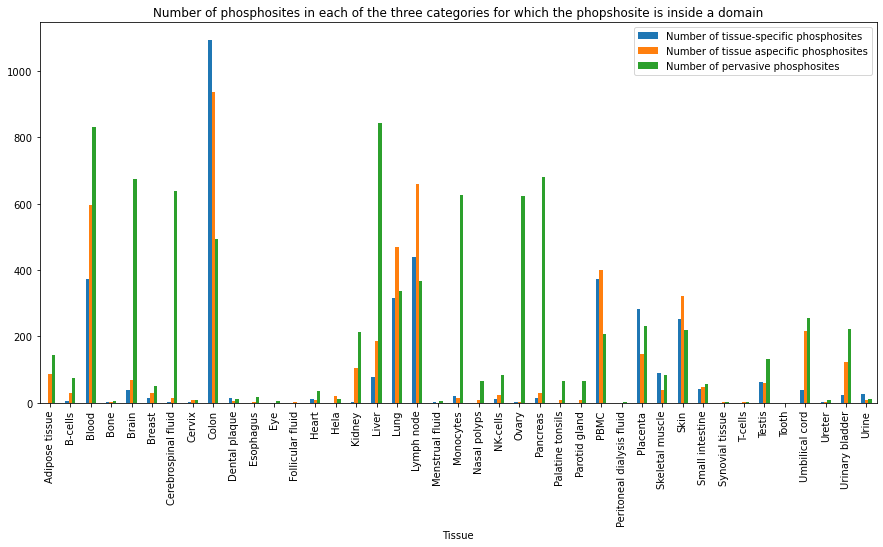

In [26]:
df_spread_tissues[["Tissue", "Number of tissue-specific phosphosites", "Number of tissue aspecific phosphosites", "Number of pervasive phosphosites"]].plot(x="Tissue", kind="bar", figsize=(15,7), title="Number of phosphosites in each of the three categories for which the phopshosite is inside a domain")
#plt.savefig("WP2 Pfam_phosphosites inside a functional domain.png", format="png", bbox_inches="tight")

The relative distriubtion of P-sites in any of the three categories, also occuring in Pfam annotated entries, differs across tissues. As this also goes for all P-sites, regardless of occurence in a domain, it is difficult to determine whether this is due to inherent bias or is related to the occurence in Pfam entries.

<AxesSubplot:title={'center':'Ratio phosphosites in a domain for each of the three categories compared to total phosphosites'}, xlabel='Tissue'>

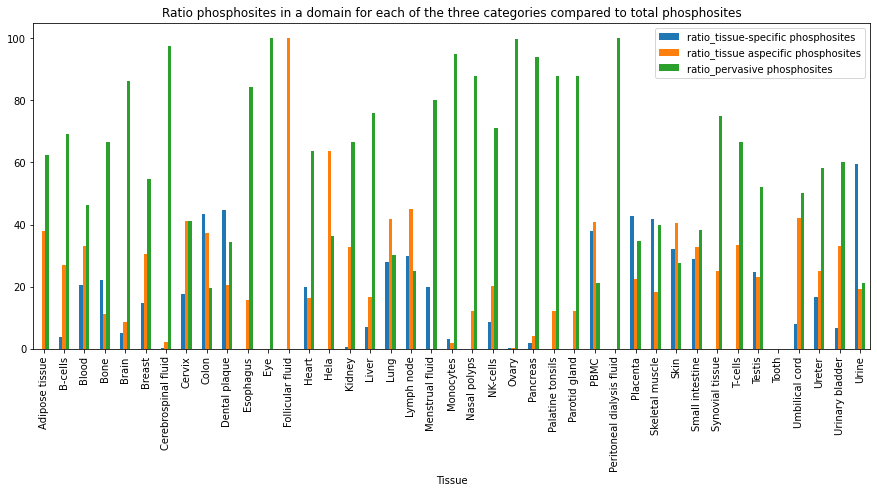

In [27]:
df_spread_tissues["ratio_tissue-specific phosphosites"] = df_spread_tissues["Number of tissue-specific phosphosites"]*100/df_spread_tissues["Total"]
df_spread_tissues["ratio_tissue aspecific phosphosites"] = df_spread_tissues["Number of tissue aspecific phosphosites"]*100/df_spread_tissues["Total"]
df_spread_tissues["ratio_pervasive phosphosites"] = df_spread_tissues["Number of pervasive phosphosites"]*100/df_spread_tissues["Total"]
df_spread_tissues[["Tissue", "ratio_tissue-specific phosphosites", "ratio_tissue aspecific phosphosites", "ratio_pervasive phosphosites"]].plot(kind="bar", x="Tissue", figsize=(15,6), title="Ratio phosphosites in a domain for each of the three categories compared to total phosphosites")

In [28]:
df_spread_tissues2 = pd.DataFrame({"Tissue": list_tissues_STY})
list_tspec = []
list_taspec = []
list_gen = []
list_total = []
for tissue in list_tissues_STY:
    temp_tspec = tspec_sites_pfam.loc[(tspec_sites_pfam[tissue]==1)&((tspec_sites_pfam["type"]=="Domain")|(tspec_sites_pfam["type"]=="Family")), :]
    temp_taspec = taspec_sites_pfam.loc[(taspec_sites_pfam[tissue]==1)&((taspec_sites_pfam["type"]=="Domain")|(taspec_sites_pfam["type"]=="Family")), :]
    temp_gen = gen_sites_pfam.loc[(gen_sites_pfam[tissue]==1)&((gen_sites_pfam["type"]=="Domain")|(gen_sites_pfam["type"]=="Family")), :]
    if temp_tspec.shape[0] == 0:
        count_tspec = 0
    else:
        count_tspec = temp_tspec.groupby(["ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"}).shape[0]
    if temp_taspec.shape[0] == 0:
        count_taspec = 0
    else:
        count_taspec = temp_taspec.groupby(["ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"}).shape[0]
    if temp_gen.shape[0] == 0:
        count_gen = 0
    else:
        count_gen = temp_gen.groupby(["ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"}).shape[0]
    count_total = count_tspec + count_taspec + count_gen
    list_tspec.append(count_tspec)
    list_taspec.append(count_taspec)
    list_gen.append(count_gen)
    list_total.append(count_total)
df_spread_tissues2["Number of tissue-specific phosphosites"] = list_tspec
df_spread_tissues2["Number of tissue aspecific phosphosites"] = list_taspec
df_spread_tissues2["Number of pervasive phosphosites"] = list_gen
df_spread_tissues2["Total"] = list_total
df_spread_tissues2

Tissue  Number of tissue-specific phosphosites  \
0              Adipose tissue                                       0   
1                     B-cells                                       3   
2                       Blood                                     353   
3                        Bone                                       2   
4                       Brain                                      35   
5                      Breast                                      14   
6         Cerebrospinal fluid                                       2   
7                      Cervix                                       1   
8                       Colon                                     966   
9               Dental plaque                                      12   
10                  Esophagus                                       0   
11                        Eye                                       0   
12           Follicular fluid                                       0   
13                      Heart                                      11   
14                       Hela                                       0   
15                     Kidney                                       2   
16                      Liver                                      74   
17                       Lung                                     303   
18                 Lymph node                                     414   
19            Menstrual fluid                                       1   
20                  Monocytes                                      21   
21               Nasal polyps                                       0   
22                   NK-cells                                      10   
23                      Ovary                                       1   
24                   Pancreas                                      13   
25           Palatine tonsils                                       0   
26              Parotid gland                                       0   
27                       PBMC                                     353   
28  Peritoneal dialysis fluid                                       0   
29                   Placenta                                     262   
30            Skeletal muscle                                      72   
31                       Skin                                     232   
32            Small intestine                                      39   
33            Synovial tissue                                       0   
34                    T-cells                                       0   
35                     Testis                                      58   
36                      Tooth                                       0   
37             Umbilical cord                                      34   
38                     Ureter                                       2   
39            Urinary bladder                                      18   
40                      Urine                                      28   

    Number of tissue aspecific phosphosites  Number of pervasive phosphosites  \
0                                        83                               140   
1                                        27                                71   
2                                       561                               777   
3                                         1                                 6   
4                                        63                               625   
5                                        23                                50   
6                                        15                               591   
7                                         6                                 7   
8                                       847                               464   
9                                         5                                10   
10                                        3                      

In [29]:
#df_spread_tissues2.to_csv("2.2 number of sites in each category per tissue in domain", sep="\t")

In [30]:
tspec_sites_pfam.loc[(tspec_sites_pfam["type"]=="Domain")|(tspec_sites_pfam["type"]=="Family")].to_csv("tissue-specific P-sites in domains and families", sep="\t", index=False)
taspec_sites_pfam.loc[(taspec_sites_pfam["type"]=="Domain")|(taspec_sites_pfam["type"]=="Family")].to_csv("tissue aspecific P-sites in domains and families", sep="\t", index=False)
gen_sites_pfam.loc[(gen_sites_pfam["type"]=="Domain")|(gen_sites_pfam["type"]=="Family")].to_csv("Pervasive P-sites in domains and families", sep="\t", index=False)

We'll now have a look at the P-sites not occuring in Pfam annotation, and their spread across tissues.

In [31]:
missing_tspec = pd.merge(tspec_sites, tspec_sites_pfam, how="left", indicator=True, suffixes=["","_y"])
missing_tspec = missing_tspec[missing_tspec["_merge"]=="left_only"]
missing_tspec.head()

ACC_ID  UP_POS    tissue modres  Adipose tissue  B-cells  Blood  Bone  \
2   A0A087WXM9     223    Testis      S               0        0      0     0   
3   A0A0B4J2D5     124      PBMC      S               0        0      0     0   
4   A0A0B4J2D5     145      PBMC      T               0        0      0     0   
6   A0A0B4J2F2     435  Placenta      S               0        0      0     0   
13  A0A0U1RRK4      41    Testis      S               0        0      0     0   

    Brain  Breast  ...  Urinary bladder  Urine  Total  hmm start  hmm end  \
2       0       0  ...                0      0      1        NaN      NaN   
3       0       0  ...                0      0      1        NaN      NaN   
4       0       0  ...                0      0      1        NaN      NaN   
6       0       0  ...                0      0      1        NaN      NaN   
13      0       0  ...                0      0      1        NaN      NaN   

    hmm name  type  clan  E-value     _merge  
2        NaN   NaN   NaN      NaN  left_only  
3        NaN   NaN   NaN      NaN  left_only  
4        NaN   NaN   NaN      NaN  left_only  
6        NaN   NaN   NaN      NaN  left_only  
13       NaN   NaN   NaN      NaN  left_only  

[5 rows x 53 columns]

In [32]:
missing_taspec = pd.merge(taspec_sites, taspec_sites_pfam, how="left", indicator=True, suffixes=["","_y"])
missing_taspec = missing_taspec[missing_taspec["_merge"]=="left_only"]
missing_taspec.head()

ACC_ID  UP_POS                                             tissue  \
0  A0A0C4DH36     108                                   Lung,Blood,Blood   
1      A0AVK6      71                Blood,Colon,Colon,Colon,Colon,Colon   
2      A0AVK6     102          Blood,Blood,Colon,Colon,Colon,Colon,Colon   
3      A0FGR8     738  Liver,Liver,Liver,Liver,Blood,Testis,Lymph nod...   
4      A0FGR8     739  Liver,Blood,Blood,Colon,Lymph node,Lymph node,...   

  modres  Adipose tissue  B-cells  Blood  Bone  Brain  Breast  ...  \
0      T               0        0      1     0      0       0  ...   
1      S               0        0      1     0      0       0  ...   
2      S               0        0      1     0      0       0  ...   
3      S               0        0      1     0      0       0  ...   
4      S               0        0      1     0      0       0  ...   

   Urinary bladder  Urine  Total  hmm start  hmm end  hmm name  type  clan  \
0                0      0      2        NaN      NaN       NaN   NaN   NaN   
1                0      0      2        NaN      NaN       NaN   NaN   NaN   
2                0      0      2        NaN      NaN       NaN   NaN   NaN   
3                0      0      4        NaN      NaN       NaN   NaN   NaN   
4                0      0      4        NaN      NaN       NaN   NaN   NaN   

   E-value     _merge  
0      NaN  left_only  
1      NaN  left_only  
2      NaN  left_only  
3      NaN  left_only  
4      NaN  left_only  

[5 rows x 53 columns]

In [33]:
missing_gen = pd.merge(gen_sites, gen_sites_pfam, how="left", indicator=True, suffixes=["","_y"])
missing_gen = missing_gen[missing_gen["_merge"]=="left_only"]
missing_gen.head()

ACC_ID  UP_POS                                             tissue modres  \
1  A0JNW5    1402  Blood,Blood,Blood,Blood, Cerebrospinal fluid, ...      S   
2  A2RU30     454  Blood, Cerebrospinal fluid, Liver, Ovary, Panc...      S   
3  A5A3E0     939  Skin,Colon,Colon,Colon,Colon,Colon,Colon,Colon...      S   
4  A5A3E0     940  Colon,Colon,Colon,Colon,Colon,Colon,Colon,Colo...      Y   
5  A5A3E0     971  Liver,PBMC,PBMC,Urinary bladder, Colon, Kidney...      S   

   Adipose tissue  B-cells  Blood  Bone  Brain  Breast  ...  Urinary bladder  \
1               0        0      1     0      1       0  ...                0   
2               0        0      1     0      1       0  ...                0   
3               0        0      1     0      1       0  ...                0   
4               1        0      1     0      1       0  ...                0   
5               0        0      1     0      1       0  ...                1   

   Urine  Total  hmm start  hmm end  hmm name  type  clan  E-value     _merge  
1      0      8        NaN      NaN       NaN   NaN   NaN      NaN  left_only  
2      0      7        NaN      NaN       NaN   NaN   NaN      NaN  left_only  
3      0     11        NaN      NaN       NaN   NaN   NaN      NaN  left_only  
4      0     13        NaN      NaN       NaN   NaN   NaN      NaN  left_only  
5      0     15        NaN      NaN       NaN   NaN   NaN      NaN  left_only  

[5 rows x 53 columns]

In [34]:
df_spread_tissues_missing = pd.DataFrame({"Tissue": list_tissues_STY})
list_tspec = []
list_taspec = []
list_gen = []
list_total = []
for tissue in list_tissues_STY:
    count_tspec = missing_tspec.loc[missing_tspec[tissue]==1, :].groupby(["ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"}).shape[0]
    count_taspec = missing_taspec.loc[missing_taspec[tissue]==1, :].groupby(["ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"}).shape[0]
    count_gen = missing_gen.loc[missing_gen[tissue]==1, :].groupby(["ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"}).shape[0]
    count_total = data_site.loc[data_site[tissue]==1, :].groupby(["ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"}).shape[0]
    list_tspec.append(count_tspec)
    list_taspec.append(count_taspec)
    list_gen.append(count_gen)
    list_total.append(count_total)
df_spread_tissues_missing["Number of tissue-specific phosphosites"] = list_tspec
df_spread_tissues_missing["Number of tissue aspecific phosphosites"] = list_taspec
df_spread_tissues_missing["Number of pervasive phosphosites"] = list_gen
df_spread_tissues_missing["Total"] = list_total
df_spread_tissues_missing

Tissue  Number of tissue-specific phosphosites  \
0              Adipose tissue                                       0   
1                     B-cells                                      12   
2                       Blood                                    1270   
3                        Bone                                       0   
4                       Brain                                      82   
5                      Breast                                      12   
6         Cerebrospinal fluid                                       7   
7                      Cervix                                       4   
8                       Colon                                    4160   
9               Dental plaque                                       4   
10                  Esophagus                                       1   
11                        Eye                                       5   
12           Follicular fluid                                       0   
13                      Heart                                      14   
14                       Hela                                       0   
15                     Kidney                                       8   
16                      Liver                                     134   
17                       Lung                                    1001   
18                 Lymph node                                    1785   
19            Menstrual fluid                                       1   
20                  Monocytes                                      15   
21               Nasal polyps                                       0   
22                   NK-cells                                      26   
23                      Ovary                                       1   
24                   Pancreas                                      20   
25           Palatine tonsils                                       0   
26              Parotid gland                                       0   
27                       PBMC                                     400   
28  Peritoneal dialysis fluid                                       0   
29                   Placenta                                     543   
30            Skeletal muscle                                     149   
31                       Skin                                     320   
32            Small intestine                                      78   
33            Synovial tissue                                       3   
34                    T-cells                                       0   
35                     Testis                                     196   
36                      Tooth                                       1   
37             Umbilical cord                                      47   
38                     Ureter                                       1   
39            Urinary bladder                                      36   
40                      Urine                                      50   

    Number of tissue aspecific phosphosites  Number of pervasive phosphosites  \
0                                       133                               245   
1                                        66                               176   
2                                      1869                              2129   
3                                         1                                 3   
4                                       108                              1633   
5                                        13                                37   
6                                        15                              1566   
7                                         1                                 6   
8                                      3152                              1157   
9                                         3                                 8   
10                                        3                      

As with their counterparts occuring in a Pfam entry, the distribution of P-sites not occuring in a Pfam entry seems to follow the distribution of P-sites in general.

<AxesSubplot:title={'center':'Number of phosphosites not entailed by a domain'}, xlabel='Tissue'>

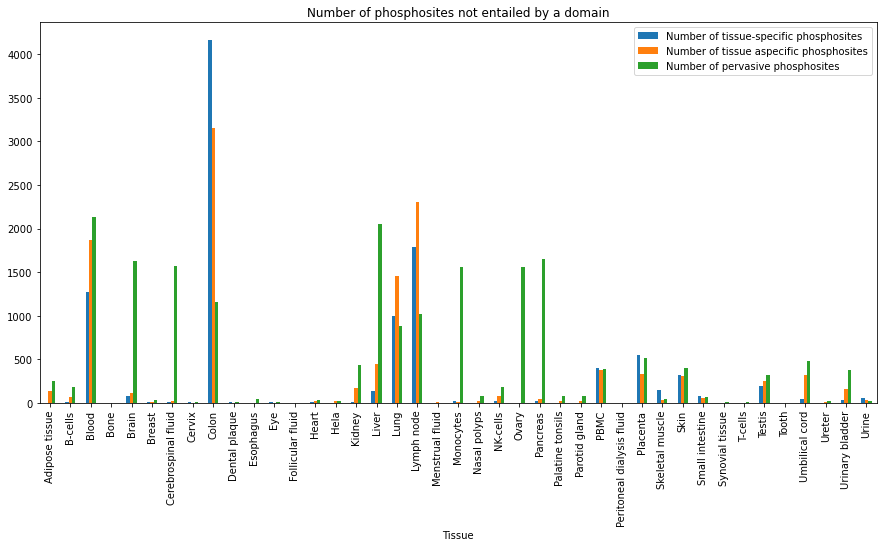

In [35]:
df_spread_tissues_missing[["Tissue", "Number of tissue-specific phosphosites", "Number of tissue aspecific phosphosites", "Number of pervasive phosphosites"]].plot(x="Tissue", kind="bar", figsize=(15,7), title="Number of phosphosites not entailed by a domain")

<AxesSubplot:title={'center':'Ratio phosphosites not entailed by a domain compared to total missing phosphosites in that tissue'}, xlabel='Tissue'>

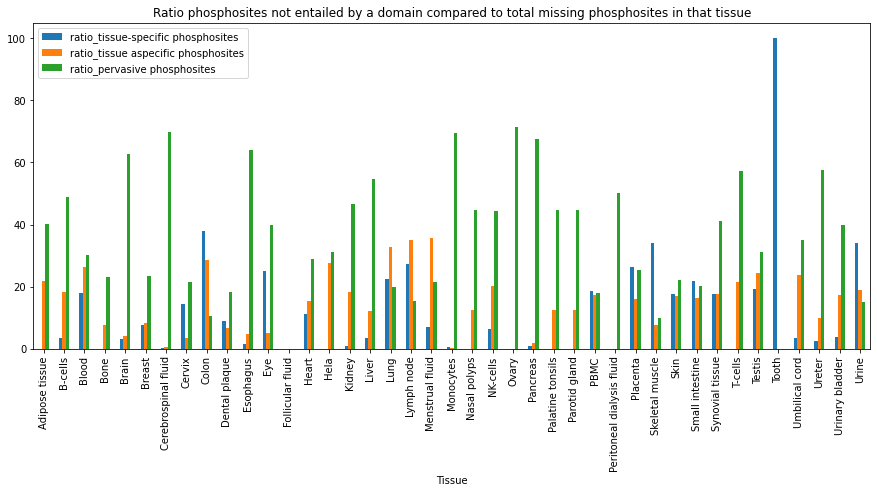

In [36]:
df_spread_tissues_missing["ratio_tissue-specific phosphosites"] = df_spread_tissues_missing["Number of tissue-specific phosphosites"]*100/df_spread_tissues_missing["Total"]
df_spread_tissues_missing["ratio_tissue aspecific phosphosites"] = df_spread_tissues_missing["Number of tissue aspecific phosphosites"]*100/df_spread_tissues_missing["Total"]
df_spread_tissues_missing["ratio_pervasive phosphosites"] = df_spread_tissues_missing["Number of pervasive phosphosites"]*100/df_spread_tissues_missing["Total"]
df_spread_tissues_missing[["Tissue", "ratio_tissue-specific phosphosites", "ratio_tissue aspecific phosphosites", "ratio_pervasive phosphosites"]].plot(kind="bar", x="Tissue", figsize=(15,6), title="Ratio phosphosites not entailed by a domain compared to total missing phosphosites in that tissue")

In [37]:
df_spread_tissues_missing

Tissue  Number of tissue-specific phosphosites  \
0              Adipose tissue                                       0   
1                     B-cells                                      12   
2                       Blood                                    1270   
3                        Bone                                       0   
4                       Brain                                      82   
5                      Breast                                      12   
6         Cerebrospinal fluid                                       7   
7                      Cervix                                       4   
8                       Colon                                    4160   
9               Dental plaque                                       4   
10                  Esophagus                                       1   
11                        Eye                                       5   
12           Follicular fluid                                       0   
13                      Heart                                      14   
14                       Hela                                       0   
15                     Kidney                                       8   
16                      Liver                                     134   
17                       Lung                                    1001   
18                 Lymph node                                    1785   
19            Menstrual fluid                                       1   
20                  Monocytes                                      15   
21               Nasal polyps                                       0   
22                   NK-cells                                      26   
23                      Ovary                                       1   
24                   Pancreas                                      20   
25           Palatine tonsils                                       0   
26              Parotid gland                                       0   
27                       PBMC                                     400   
28  Peritoneal dialysis fluid                                       0   
29                   Placenta                                     543   
30            Skeletal muscle                                     149   
31                       Skin                                     320   
32            Small intestine                                      78   
33            Synovial tissue                                       3   
34                    T-cells                                       0   
35                     Testis                                     196   
36                      Tooth                                       1   
37             Umbilical cord                                      47   
38                     Ureter                                       1   
39            Urinary bladder                                      36   
40                      Urine                                      50   

    Number of tissue aspecific phosphosites  Number of pervasive phosphosites  \
0                                       133                               245   
1                                        66                               176   
2                                      1869                              2129   
3                                         1                                 3   
4                                       108                              1633   
5                                        13                                37   
6                                        15                              1566   
7                                         1                                 6   
8                                      3152                              1157   
9                                         3                                 8   
10                                        3                      

Here, we calculate the percentage P-sites occuring in a domain in comparison to the total amount of P-sites, per category, per tissue. While for some tissues, the difference seems minor, for other the difference is more pronounced. While some of these tissues are less represented, making these number difficult to interprete, for others this is not the case (for example testis). Interestingly, the category having the higher percentage seems to differ across tissues.

<AxesSubplot:title={'center':'ratio number of P-sites with functional domain annotation/total amount of P-sites in that category in that tissue'}, xlabel='Tissue'>

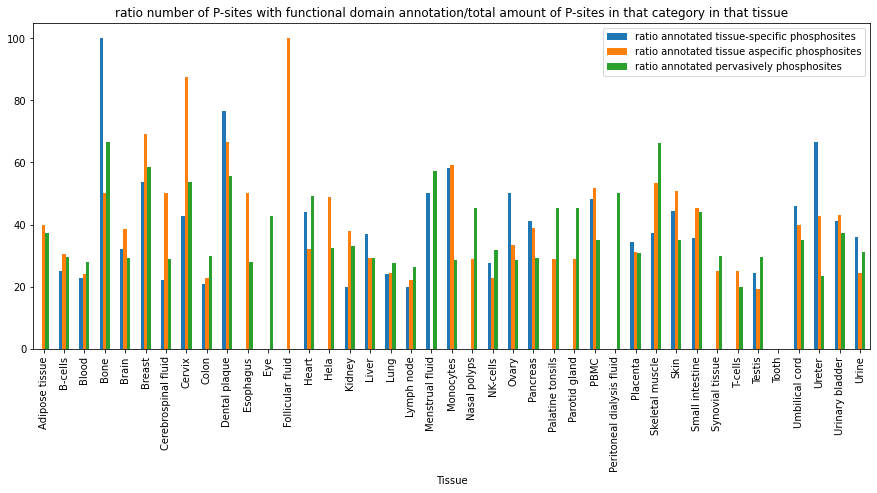

In [38]:
data_cat = pd.read_csv("number of three categories per tissue_sites.tsv", sep="\t")
data_cat["ratio annotated tissue-specific phosphosites"] = df_spread_tissues["Number of tissue-specific phosphosites"]*100/data_cat["number of tissue-specific sites"]
data_cat["ratio annotated tissue aspecific phosphosites"] = df_spread_tissues["Number of tissue aspecific phosphosites"]*100/data_cat["number of non tissue-specific sites"]
data_cat["ratio annotated pervasively phosphosites"] = df_spread_tissues["Number of pervasive phosphosites"]*100/data_cat["number of generally expressed sites"]
data_cat[["Tissue", "ratio annotated tissue-specific phosphosites", "ratio annotated tissue aspecific phosphosites", "ratio annotated pervasively phosphosites"]].plot(kind="bar", x="Tissue", figsize=(15,6), title="ratio number of P-sites with functional domain annotation/total amount of P-sites in that category in that tissue")

In [39]:
data_cat

Tissue  number of tissue-specific sites  \
0              Adipose tissue                                0   
1                     B-cells                               16   
2                       Blood                             1642   
3                        Bone                                2   
4                       Brain                              121   
5                      Breast                               26   
6         Cerebrospinal fluid                                9   
7                      Cervix                                7   
8                       Colon                             5252   
9               Dental plaque                               17   
10                  Esophagus                                1   
11                        Eye                                5   
12           Follicular fluid                                0   
13                      Heart                               25   
14                       Hela                                0   
15                     Kidney                               10   
16                      Liver                              213   
17                       Lung                             1316   
18                 Lymph node                             2224   
19            Menstrual fluid                                2   
20                  Monocytes                               36   
21               Nasal polyps                                0   
22                   NK-cells                               36   
23                      Ovary                                2   
24                   Pancreas                               34   
25           Palatine tonsils                                0   
26              Parotid gland                                0   
27                       PBMC                              772   
28  Peritoneal dialysis fluid                                0   
29                   Placenta                              826   
30            Skeletal muscle                              238   
31                       Skin                              574   
32            Small intestine                              121   
33            Synovial tissue                                3   
34                    T-cells                                0   
35                     Testis                              259   
36                      Tooth                                1   
37             Umbilical cord                               87   
38                     Ureter                                3   
39            Urinary bladder                               61   
40                      Urine                               78   

    number of non tissue-specific sites  number of generally expressed sites  \
0                                   221                                  390   
1                                    95                                  250   
2                                  2466                                 2961   
3                                     2                                    9   
4                                   176                                 2307   
5                                    42                                   89   
6                                    30                                 2203   
7                                     8                                   13   
8                                  4089                                 1651   
9                                     9                                   18   
10                                    6                                   57   
11                                    1                                   14   
12                                    1                                    0   
13                                   28                                   71   
14                                   43           

In [40]:
print(data_cat["ratio annotated tissue-specific phosphosites"].describe())
print(data_cat["ratio annotated tissue aspecific phosphosites"].describe())
print(data_cat["ratio annotated pervasively phosphosites"].describe())

count     33.000000
mean      35.806277
std       21.762759
min        0.000000
25%       22.655298
50%       35.897436
75%       45.977011
max      100.000000
Name: ratio annotated tissue-specific phosphosites, dtype: float64
count     39.000000
mean      38.896112
std       19.918397
min        0.000000
25%       25.000000
50%       37.956204
75%       50.000000
max      100.000000
Name: ratio annotated tissue aspecific phosphosites, dtype: float64
count    39.000000
mean     37.575672
std      11.953999
min      20.000000
25%      29.170151
50%      32.432432
75%      45.454545
max      66.666667
Name: ratio annotated pervasively phosphosites, dtype: float64


In [41]:
df_spread_tissues = pd.DataFrame({"Tissue": list_tissues_STY})
list_tspec = []
list_taspec = []
list_gen = []
list_total = []
for tissue in list_tissues_STY:
    count_tspec = tspec_sites_pfam.loc[tspec_sites_pfam[tissue]==1, :].groupby(["ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"}).shape[0]
    count_taspec = taspec_sites_pfam.loc[taspec_sites_pfam[tissue]==1, :].groupby(["ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"}).shape[0]
    count_gen = gen_sites_pfam.loc[gen_sites_pfam[tissue]==1, :].groupby(["ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"}).shape[0]
    count_total = count_tspec + count_taspec + count_gen
    list_tspec.append(count_tspec)
    list_taspec.append(count_taspec)
    list_gen.append(count_gen)
    list_total.append(count_total)
df_spread_tissues["Number of tissue-specific phosphosites in a domain"] = list_tspec
df_spread_tissues["Number of tissue aspecific phosphosites in a domain"] = list_taspec
df_spread_tissues["Number of pervasive phosphosites in a domain"] = list_gen
df_spread_tissues["Total"] = list_total
df_spread_tissues

Tissue  \
0              Adipose tissue   
1                     B-cells   
2                       Blood   
3                        Bone   
4                       Brain   
5                      Breast   
6         Cerebrospinal fluid   
7                      Cervix   
8                       Colon   
9               Dental plaque   
10                  Esophagus   
11                        Eye   
12           Follicular fluid   
13                      Heart   
14                       Hela   
15                     Kidney   
16                      Liver   
17                       Lung   
18                 Lymph node   
19            Menstrual fluid   
20                  Monocytes   
21               Nasal polyps   
22                   NK-cells   
23                      Ovary   
24                   Pancreas   
25           Palatine tonsils   
26              Parotid gland   
27                       PBMC   
28  Peritoneal dialysis fluid   
29                   Placenta   
30            Skeletal muscle   
31                       Skin   
32            Small intestine   
33            Synovial tissue   
34                    T-cells   
35                     Testis   
36                      Tooth   
37             Umbilical cord   
38                     Ureter   
39            Urinary bladder   
40                      Urine   

    Number of tissue-specific phosphosites in a domain  \
0                                                   0    
1                                                   4    
2                                                 372    
3                                                   2    
4                                                  39    
5                                                  14    
6                                                   2    
7                                                   3    
8                                                1092    
9                                                  13    
10                                                  0    
11                                                  0    
12                                                  0    
13                                                 11    
14                                                  0    
15                                                  2    
16                                                 79    
17                                                315    
18                                                439    
19                                                  1    
20                                                 21    
21                                                  0    
22                                                 10    
23                                                  1    
24                                                 14    
25                                                  0    
26                                                  0    
27                                                372    
28                                                  0    
29                                                283    
30                                                 89    
31                                                254    
32                                                 43    
33                                                  0    
34                                                  0    
35                                                 63    
36                                                  0    
37                                                 40    
38                                                  2    
39                                                 25    
40                                                 28    

    Number of tissue aspecific phosphosites in a domain  \
0                                                  88     
1                                                  29     
2                     

In [42]:
df_spread_tissues_missing = pd.DataFrame({"Tissue": list_tissues_STY})
list_tspec = []
list_taspec = []
list_gen = []
list_total = []
for tissue in list_tissues_STY:
    count_tspec = missing_tspec.loc[missing_tspec[tissue]==1, :].groupby(["ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"}).shape[0]
    count_taspec = missing_taspec.loc[missing_taspec[tissue]==1, :].groupby(["ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"}).shape[0]
    count_gen = missing_gen.loc[missing_gen[tissue]==1, :].groupby(["ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"}).shape[0]
    count_total = data_site.loc[data_site[tissue]==1, :].groupby(["ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"}).shape[0]
    list_tspec.append(count_tspec)
    list_taspec.append(count_taspec)
    list_gen.append(count_gen)
    list_total.append(count_total)
df_spread_tissues_missing["Number of tissue-specific phosphosites outside a domain"] = list_tspec
df_spread_tissues_missing["Number of tissue aspecific phosphosites outside a domain"] = list_taspec
df_spread_tissues_missing["Number of pervasive phosphosites outside a domain"] = list_gen
df_spread_tissues_missing["Total"] = list_total
df_spread_tissues_missing

Tissue  \
0              Adipose tissue   
1                     B-cells   
2                       Blood   
3                        Bone   
4                       Brain   
5                      Breast   
6         Cerebrospinal fluid   
7                      Cervix   
8                       Colon   
9               Dental plaque   
10                  Esophagus   
11                        Eye   
12           Follicular fluid   
13                      Heart   
14                       Hela   
15                     Kidney   
16                      Liver   
17                       Lung   
18                 Lymph node   
19            Menstrual fluid   
20                  Monocytes   
21               Nasal polyps   
22                   NK-cells   
23                      Ovary   
24                   Pancreas   
25           Palatine tonsils   
26              Parotid gland   
27                       PBMC   
28  Peritoneal dialysis fluid   
29                   Placenta   
30            Skeletal muscle   
31                       Skin   
32            Small intestine   
33            Synovial tissue   
34                    T-cells   
35                     Testis   
36                      Tooth   
37             Umbilical cord   
38                     Ureter   
39            Urinary bladder   
40                      Urine   

    Number of tissue-specific phosphosites outside a domain  \
0                                                   0         
1                                                  12         
2                                                1270         
3                                                   0         
4                                                  82         
5                                                  12         
6                                                   7         
7                                                   4         
8                                                4160         
9                                                   4         
10                                                  1         
11                                                  5         
12                                                  0         
13                                                 14         
14                                                  0         
15                                                  8         
16                                                134         
17                                               1001         
18                                               1785         
19                                                  1         
20                                                 15         
21                                                  0         
22                                                 26         
23                                                  1         
24                                                 20         
25                                                  0         
26                                                  0         
27                                                400         
28                                                  0         
29                                                543         
30                                                149         
31                                                320         
32                                                 78         
33                                                  3         
34                                                  0         
35                                                196         
36                                                  1         
37                                                 47         
38                                                  1         
39                                                 36         
40                                                 50

In [43]:
df_spread_tissues = pd.merge(df_spread_tissues, df_spread_tissues_missing, on=["Tissue"], how="outer")
distr_tissues_tspec = df_spread_tissues[["Tissue", "Number of tissue-specific phosphosites in a domain", "Number of tissue-specific phosphosites outside a domain"]].copy()
distr_tissues_taspec = df_spread_tissues[["Tissue", "Number of tissue aspecific phosphosites in a domain", "Number of tissue aspecific phosphosites outside a domain"]].copy()
distr_tissues_gen = df_spread_tissues[["Tissue", "Number of pervasive phosphosites in a domain", "Number of pervasive phosphosites outside a domain"]].copy()

We compare the amount of phosphosites having pfam annotation to those that are not occuring in pfam annotation.

<Figure size 1080x432 with 0 Axes>

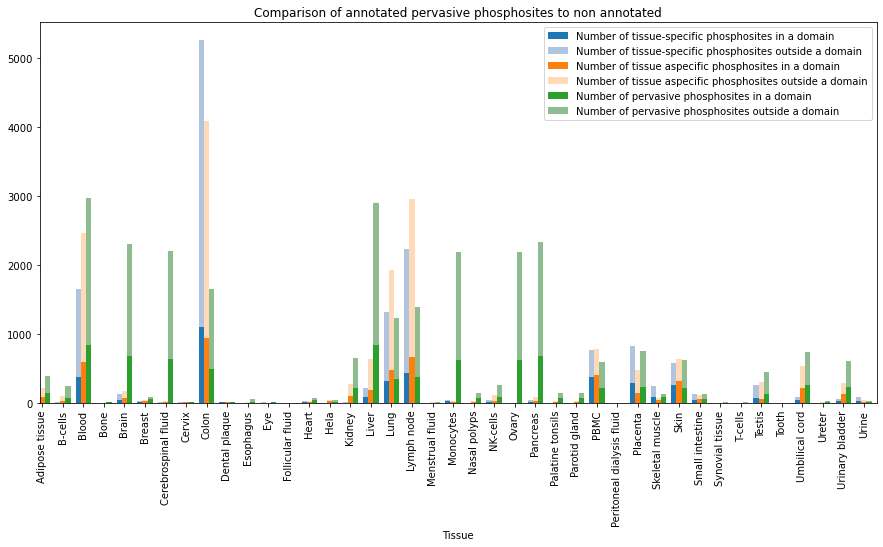

In [44]:
plt.figure(figsize=(15,6))
fig, ax = plt.subplots(1, 1, sharex=True, sharey=True)
distr_tissues_tspec.plot(kind="bar", x="Tissue", ax=ax, position=1.5, stacked=True, width=0.25, color=["tab:blue", "lightsteelblue"], figsize=(15,7), title="Comparison of annotated tissue-specific phosphosites compared to non annotated")
distr_tissues_taspec.plot(kind="bar", x="Tissue", ax=ax, position=0.5, stacked=True, width=0.25, color=["tab:orange","peachpuff"], figsize=(15,7), title="Comparison of annotated tissue aspecific phosphosites compared to non annotated")
distr_tissues_gen.plot(kind="bar", x="Tissue", ax=ax, position=-0.5, stacked=True, width=0.25, color=["tab:green", "darkseagreen"], figsize=(15,7), title="Comparison of annotated pervasive phosphosites to non annotated")
#plt.savefig("WP2 Pfam_missing_annotated_sites_per_tissue.png", format="png", bbox_inches="tight")
plt.show()

<Figure size 1080x432 with 0 Axes>

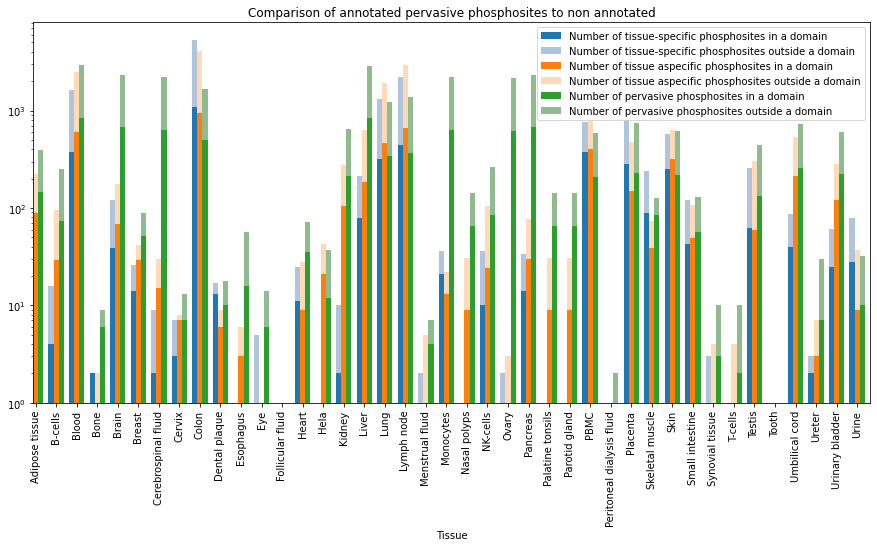

In [45]:
plt.figure(figsize=(15,6))
fig, ax = plt.subplots(1, 1, sharex=True, sharey=True)
distr_tissues_tspec.plot(kind="bar", x="Tissue", ax=ax, logy=True, position=1.5, stacked=True, width=0.25, color=["tab:blue", "lightsteelblue"], figsize=(15,7), title="Comparison of annotated tissue-specific phosphosites compared to non annotated")
distr_tissues_taspec.plot(kind="bar", x="Tissue", ax=ax, logy=True, position=0.5, stacked=True, width=0.25, color=["tab:orange","peachpuff"], figsize=(15,7), title="Comparison of annotated tissue aspecific phosphosites compared to non annotated")
distr_tissues_gen.plot(kind="bar", x="Tissue", ax=ax, logy=True, position=-0.5, stacked=True, width=0.25, color=["tab:green", "darkseagreen"], figsize=(15,7), title="Comparison of annotated pervasive phosphosites to non annotated")
#plt.savefig("WP2 Pfam_missing_annotated_sites_per_tissue_log.png", format="png", bbox_inches="tight")
plt.show()

# 3. Domain

We'll now take a closer look at the domain types across the three categories of proteins. We'll follow this up by doing the same on the domain name level, followed by the clans.

<AxesSubplot:title={'center':'Number of sites with a certain kind of domain'}, xlabel='Type'>

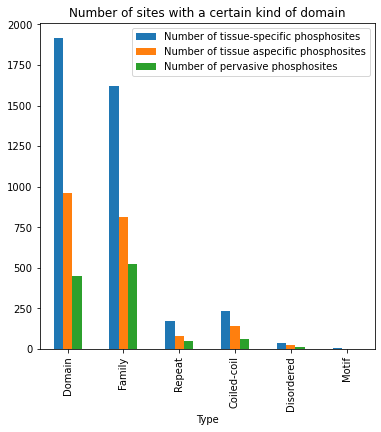

In [46]:
list_types = ["Domain", "Family", "Repeat", "Coiled-coil", "Disordered", "Motif"]
list_counts_tspec = []
list_counts_taspec = []
list_counts_gen = []
for element in list_types:
    count_tspec = tspec_sites_pfam.loc[tspec_sites_pfam["type"]==element, :].groupby(["ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"}).shape[0]
    count_taspec = taspec_sites_pfam.loc[taspec_sites_pfam["type"]==element, :].groupby(["ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"}).shape[0]
    count_gen = gen_sites_pfam.loc[gen_sites_pfam["type"]==element, :].groupby(["ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"}).shape[0]
    list_counts_tspec.append(count_tspec)
    list_counts_taspec.append(count_taspec)
    list_counts_gen.append(count_gen)
df_types = pd.DataFrame({"Type": list_types, "Number of tissue-specific phosphosites": list_counts_tspec,
                        "Number of tissue aspecific phosphosites": list_counts_taspec,
                         "Number of pervasive phosphosites": list_counts_gen})
df_types.plot(kind="bar", x="Type", figsize=(6,6), title="Number of sites with a certain kind of domain")
#plt.savefig("WP2 Pfam_Psites_per_category.png", format="png", bbox_inches="tight")

In [47]:
df_types_tissue = pd.DataFrame({"Tissue": list_tissues_STY})
list_counts_tspec = []
list_counts_taspec = []
list_counts_gen = []
for element in list_types:
    list_counts_tspec = []
    list_counts_taspec = []
    list_counts_gen = []
    for tissue in list_tissues_STY:
        count_tspec = tspec_sites_pfam.loc[(tspec_sites_pfam[tissue]==1)&(tspec_sites_pfam["type"]==element), :].groupby(["ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"}).shape[0]
        count_taspec = taspec_sites_pfam.loc[(taspec_sites_pfam[tissue]==1)&(taspec_sites_pfam["type"]==element), :].groupby(["ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"}).shape[0]
        count_gen = gen_sites_pfam.loc[(gen_sites_pfam[tissue]==1)&(gen_sites_pfam["type"]==element), :].groupby(["ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"}).shape[0]
        list_counts_tspec.append(count_tspec)
        list_counts_taspec.append(count_taspec)
        list_counts_gen.append(count_gen)
    tspec_colname = element+"_tspec"
    taspec_colname = element+"_taspec"
    gen_colname = element+"_pervasive"
    df_types_tissue[tspec_colname] = list_counts_tspec
    df_types_tissue[taspec_colname] = list_counts_taspec
    df_types_tissue[gen_colname] = list_counts_gen
df_types_tissue

Tissue  Domain_tspec  Domain_taspec  Domain_pervasive  \
0              Adipose tissue             0             52                69   
1                     B-cells             1             20                40   
2                       Blood           216            331               377   
3                        Bone             2              0                 5   
4                       Brain            26             29               301   
5                      Breast            14             22                26   
6         Cerebrospinal fluid             0             10               286   
7                      Cervix             0              1                 4   
8                       Colon           487            461               227   
9               Dental plaque             3              1                 1   
10                  Esophagus             0              2                10   
11                        Eye             0              0                 2   
12           Follicular fluid             0              0                 0   
13                      Heart             9              4                20   
14                       Hela             0             15                 7   
15                     Kidney             2             66               100   
16                      Liver            54            105               379   
17                       Lung           166            221               156   
18                 Lymph node           210            318               169   
19            Menstrual fluid             1              0                 4   
20                  Monocytes            18             10               272   
21               Nasal polyps             0              6                45   
22                   NK-cells             4             14                43   
23                      Ovary             0              0               270   
24                   Pancreas            11             17               307   
25           Palatine tonsils             0              6                45   
26              Parotid gland             0              6                45   
27                       PBMC           261            270                91   
28  Peritoneal dialysis fluid             0              0                 0   
29                   Placenta           148             85               112   
30            Skeletal muscle            34              9                27   
31                       Skin           150            187                95   
32            Small intestine            29             26                31   
33            Synovial tissue             0              1                 3   
34                    T-cells             0              1                 0   
35                     Testis            24             28                79   
36                      Tooth             0              0                 0   
37             Umbilical cord            17            120               116   
38                     Ureter             2              1                 5   
39            Urinary bladder            10             73               108   
40                      Urine            15              5                 6   

    Family_tspec  Family_taspec  Family_pervasive  Repeat_tspec  \
0              0             36                76             0   
1              3              9                33             1   
2            160            273               442            27   
3              0              1                 1             0   
4             11             37               353             2   
5              0              1                24             0   
6              2              5               334             0   
7              1              5                 3             0   
8            545            462               259          

We note that for the tissue-specific phosphosites in lymph node, there is a relatively high percentage of disorderedness. For skeletal muscle in the same category, this is more the case for coiled-coils. Disordered regions are relateively highly represented in lymph node, for the tissue aspecific phosphosites. Repeat regions are more frequent in tissue aspecific phosphosites.

In [48]:
df_types_tissue["Domain_tspec"] = df_types_tissue["Domain_tspec"] + df_types_tissue["Family_tspec"] +df_types_tissue["Motif_tspec"]
df_types_tissue.drop(["Family_tspec"], axis=1, inplace=True)
df_types_tissue.drop(["Motif_tspec"], axis=1, inplace=True)
df_types_tissue["Domain_taspec"] = df_types_tissue["Domain_taspec"] + df_types_tissue["Family_taspec"] +df_types_tissue["Motif_taspec"]
df_types_tissue.drop(["Family_taspec"], axis=1, inplace=True)
df_types_tissue.drop(["Motif_taspec"], axis=1, inplace=True)
df_types_tissue["Domain_pervasive"] = df_types_tissue["Domain_pervasive"] + df_types_tissue["Family_pervasive"] +df_types_tissue["Motif_pervasive"]
df_types_tissue.drop(["Family_pervasive"], axis=1, inplace=True)
df_types_tissue.drop(["Motif_pervasive"], axis=1, inplace=True)
df_types_tissue

Tissue  Domain_tspec  Domain_taspec  Domain_pervasive  \
0              Adipose tissue             0             88               145   
1                     B-cells             4             29                73   
2                       Blood           377            605               819   
3                        Bone             2              1                 6   
4                       Brain            37             66               654   
5                      Breast            14             23                50   
6         Cerebrospinal fluid             2             15               620   
7                      Cervix             1              6                 7   
8                       Colon          1034            925               486   
9               Dental plaque            12              5                10   
10                  Esophagus             0              3                18   
11                        Eye             0              0                 5   
12           Follicular fluid             0              1                 0   
13                      Heart            12              9                38   
14                       Hela             0             21                11   
15                     Kidney             3            108               211   
16                      Liver            79            184               816   
17                       Lung           322            459               329   
18                 Lymph node           456            651               365   
19            Menstrual fluid             1              0                 5   
20                  Monocytes            21             12               609   
21               Nasal polyps             0              8                66   
22                   NK-cells            10             25                86   
23                      Ovary             1              0               605   
24                   Pancreas            14             30               658   
25           Palatine tonsils             0              8                66   
26              Parotid gland             0              8                66   
27                       PBMC           366            392               211   
28  Peritoneal dialysis fluid             0              0                 1   
29                   Placenta           270            146               223   
30            Skeletal muscle            73             38                83   
31                       Skin           240            309               215   
32            Small intestine            41             41                53   
33            Synovial tissue             0              1                 5   
34                    T-cells             0              1                 2   
35                     Testis            61             59               132   
36                      Tooth             0              0                 0   
37             Umbilical cord            34            213               254   
38                     Ureter             2              3                 7   
39            Urinary bladder            19            119               218   
40                      Urine            30             10                10   

    Repeat_tspec  Repeat_taspec  Repeat_pervasive  Coiled-coil_tspec  \
0              0              3                 5                  0   
1              1              1                 4                  0   
2             27             25                42                  9   
3              0              0                 0                  0   
4              2              4                36                  3   
5              0              2                 1                  0   
6              0              0                34                  0   
7              0              0                 0                  2   
8             

<AxesSubplot:xlabel='Tissue'>

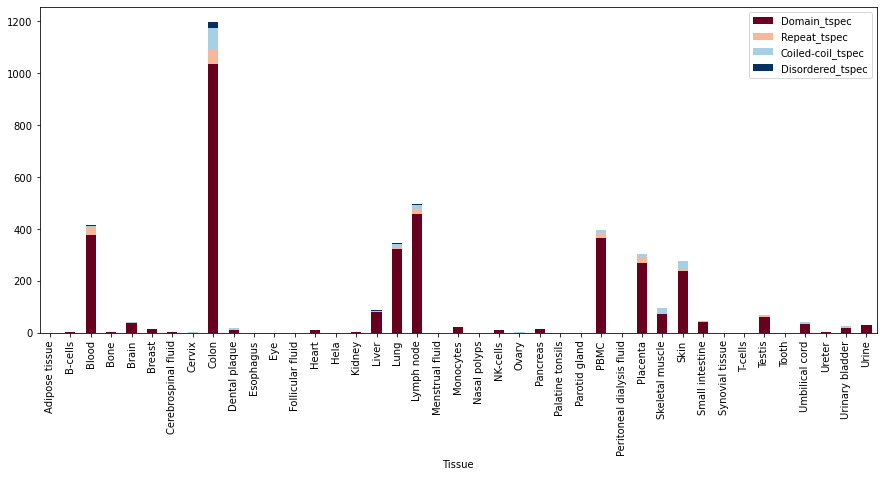

In [49]:
df_types_tissue.loc[:, ((df_types_tissue.columns.str.contains("tspec"))|df_types_tissue.columns.str.contains("Tissue"))].plot(kind="bar", x="Tissue", figsize=(15,6), stacked=True, colormap="RdBu")
#plt.savefig("WP2 Pfam_tspecsites_tissues_categories.png", format="png", bbox_inches="tight")

<AxesSubplot:xlabel='Tissue'>

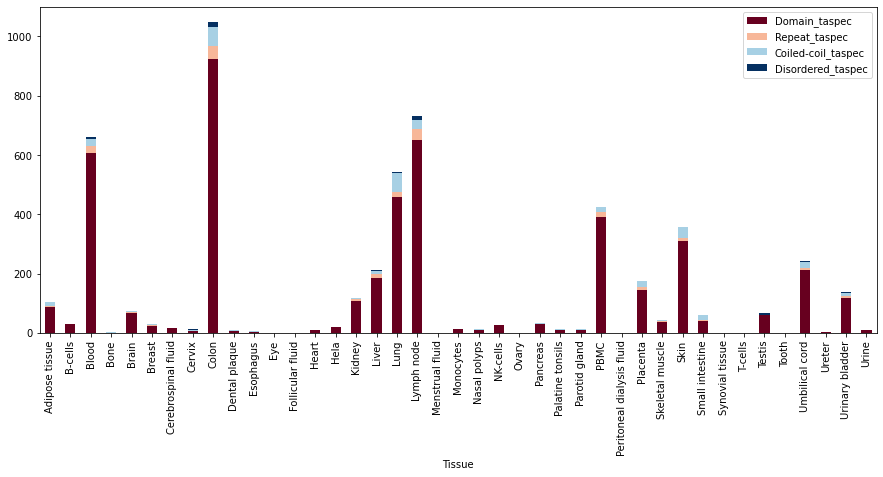

In [50]:
df_types_tissue.loc[:, ((df_types_tissue.columns.str.contains("taspec"))|df_types_tissue.columns.str.contains("Tissue"))].plot(kind="bar", x="Tissue", figsize=(15,6), stacked=True, colormap="RdBu")
#plt.savefig("WP2 Pfam_taspecsites_tissues_categories.png", format="png", bbox_inches="tight")

<AxesSubplot:xlabel='Tissue'>

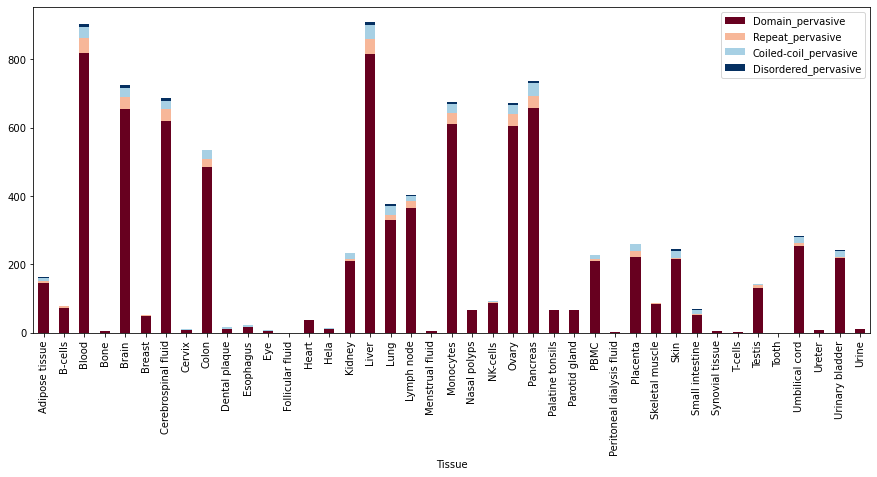

In [51]:
df_types_tissue.loc[:, ((df_types_tissue.columns.str.contains("pervasive"))|df_types_tissue.columns.str.contains("Tissue"))].plot(kind="bar", x="Tissue", figsize=(15,6), stacked=True, colormap="RdBu")
#plt.savefig("WP2 Pfam_pervasive_Psites_tissues_categories.png", format="png", bbox_inches="tight")

In [52]:
df_types_tissue = pd.DataFrame({"Tissue": list_tissues_STY})
list_counts_tspec = []
list_counts_taspec = []
list_counts_gen = []
for element in list_types:
    list_counts_tspec = []
    list_counts_taspec = []
    list_counts_gen = []
    for tissue in list_tissues_STY:
        count_tspec = tspec_sites_pfam.loc[(tspec_sites_pfam[tissue]==1)&(tspec_sites_pfam["type"]==element), :]["ACC_ID"].count()
        count_taspec = taspec_sites_pfam.loc[(taspec_sites_pfam[tissue]==1)&(taspec_sites_pfam["type"]==element), :]["ACC_ID"].count()
        count_gen = gen_sites_pfam.loc[(gen_sites_pfam[tissue]==1)&(gen_sites_pfam["type"]==element), :]["ACC_ID"].count()
        list_counts_tspec.append(count_tspec)
        list_counts_taspec.append(count_taspec)
        list_counts_gen.append(count_gen)
    tspec_colname = element+"_tspec"
    taspec_colname = element+"_taspec"
    gen_colname = element+"_pervasive"
    df_types_tissue[tspec_colname] = list_counts_tspec
    df_types_tissue[taspec_colname] = list_counts_taspec
    df_types_tissue[gen_colname] = list_counts_gen
df_types_tissue

Tissue  Domain_tspec  Domain_taspec  Domain_pervasive  \
0              Adipose tissue             0             66               106   
1                     B-cells             1             21                45   
2                       Blood           334            467               574   
3                        Bone             2              0                 5   
4                       Brain            53             43               425   
5                      Breast            16             25                34   
6         Cerebrospinal fluid             0             11               400   
7                      Cervix             0              2                 6   
8                       Colon           782            682               330   
9               Dental plaque             3              1                 3   
10                  Esophagus             0              3                15   
11                        Eye             0              0                 4   
12           Follicular fluid             0              0                 0   
13                      Heart             9              6                23   
14                       Hela             0             16                11   
15                     Kidney             2            102               119   
16                      Liver            66            176               551   
17                       Lung           240            327               227   
18                 Lymph node           358            474               273   
19            Menstrual fluid             1              0                 4   
20                  Monocytes            18             19               385   
21               Nasal polyps             0             21                73   
22                   NK-cells             5             17                65   
23                      Ovary             0              0               379   
24                   Pancreas            11             20               440   
25           Palatine tonsils             0             21                73   
26              Parotid gland             0             21                73   
27                       PBMC           377            482               134   
28  Peritoneal dialysis fluid             0              0                 0   
29                   Placenta           233            139               152   
30            Skeletal muscle            77             10                37   
31                       Skin           288            374               149   
32            Small intestine            50             59                39   
33            Synovial tissue             0              1                 3   
34                    T-cells             0              1                 0   
35                     Testis            51             46               108   
36                      Tooth             0              0                 0   
37             Umbilical cord            26            170               179   
38                     Ureter             3              2                 5   
39            Urinary bladder            10            107               134   
40                      Urine            15              6                11   

    Family_tspec  Family_taspec  Family_pervasive  Repeat_tspec  \
0              0             36                78             0   
1              3              9                37             2   
2            175            300               486            42   
3              0              1                 1             0   
4             12             37               389             8   
5              0              1                24             0   
6              2              5               369             0   
7              1              5                 3             0   
8            582            499               269          

C:\Users\hannedvo\AppData\Local\Temp\8/ipykernel_24100/1600454285.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_domain_tissue["Total_tspec"] = df_types_tissue.loc[:, (df_types_tissue.columns.str.contains("tspec"))].sum(axis=1)
C:\Users\hannedvo\AppData\Local\Temp\8/ipykernel_24100/1600454285.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_domain_tissue["Total_taspec"] = df_types_tissue.loc[:, (df_types_tissue.columns.str.contains("taspec"))].sum(axis=1)
C:\Users\hannedvo\AppData\Local\Temp\8

<AxesSubplot:title={'center':"Percentage proteins associated with 'Domain' out of the total amount of annotated proteins in that tissue"}, xlabel='Tissue'>

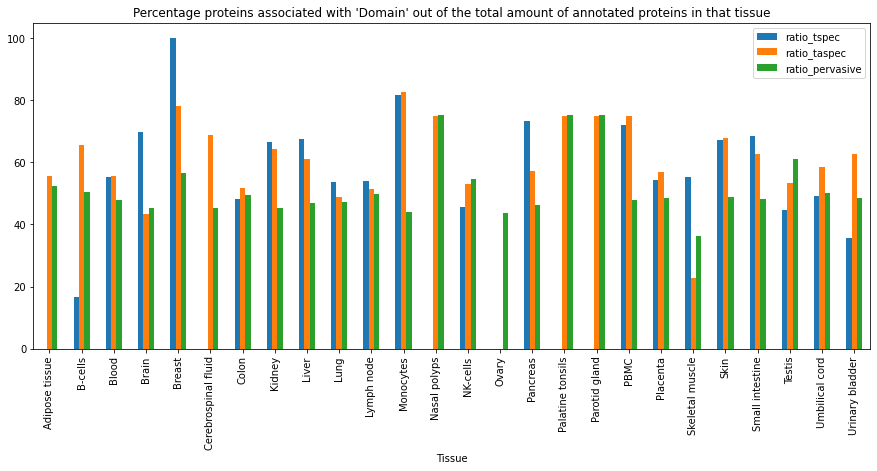

In [53]:
df_domain_tissue = df_types_tissue.loc[:,( df_types_tissue.columns.str.contains("Domain")|df_types_tissue.columns.str.contains("Tissue"))]
df_domain_tissue["Total_tspec"] = df_types_tissue.loc[:, (df_types_tissue.columns.str.contains("tspec"))].sum(axis=1)
df_domain_tissue["Total_taspec"] = df_types_tissue.loc[:, (df_types_tissue.columns.str.contains("taspec"))].sum(axis=1)
df_domain_tissue["Total_pervasive"] = df_types_tissue.loc[:, (df_types_tissue.columns.str.contains("pervasive"))].sum(axis=1)
df_domain_tissue = df_domain_tissue[(df_domain_tissue["Total_tspec"]>=50)|(df_domain_tissue["Total_taspec"]>=50)|(df_domain_tissue["Total_pervasive"]>=50)]
df_domain_tissue["ratio_tspec"] = df_domain_tissue["Domain_tspec"]*100/df_domain_tissue["Total_tspec"]
df_domain_tissue["ratio_taspec"] = df_domain_tissue["Domain_taspec"]*100/df_domain_tissue["Total_taspec"]
df_domain_tissue["ratio_pervasive"] = df_domain_tissue["Domain_pervasive"]*100/df_domain_tissue["Total_pervasive"]

df_domain_tissue[["Tissue", "ratio_tspec", "ratio_taspec", "ratio_pervasive"]].plot(kind="bar", x="Tissue", figsize=(15,6), title="Percentage proteins associated with 'Domain' out of the total amount of annotated proteins in that tissue")

In [54]:
df_domain_tissue

Tissue  Domain_tspec  Domain_taspec  Domain_pervasive  \
0        Adipose tissue             0             66               106   
1               B-cells             1             21                45   
2                 Blood           334            467               574   
4                 Brain            53             43               425   
5                Breast            16             25                34   
6   Cerebrospinal fluid             0             11               400   
8                 Colon           782            682               330   
15               Kidney             2            102               119   
16                Liver            66            176               551   
17                 Lung           240            327               227   
18           Lymph node           358            474               273   
20            Monocytes            18             19               385   
21         Nasal polyps             0             21                73   
22             NK-cells             5             17                65   
23                Ovary             0              0               379   
24             Pancreas            11             20               440   
25     Palatine tonsils             0             21                73   
26        Parotid gland             0             21                73   
27                 PBMC           377            482               134   
29             Placenta           233            139               152   
30      Skeletal muscle            77             10                37   
31                 Skin           288            374               149   
32      Small intestine            50             59                39   
35               Testis            51             46               108   
37       Umbilical cord            26            170               179   
39      Urinary bladder            10            107               134   

    Total_tspec  Total_taspec  Total_pervasive  ratio_tspec  ratio_taspec  \
0             0           119              203          NaN     55.462185   
1             6            32               89    16.666667     65.625000   
2           606           840             1198    55.115512     55.595238   
4            76            99              940    69.736842     43.434343   
5            16            32               60   100.000000     78.125000   
6             2            16              885     0.000000     68.750000   
8          1626          1322              665    48.093481     51.588502   
15            3           159              263    66.666667     64.150943   
16           98           288             1178    67.346939     61.111111   
17          446           671              480    53.811659     48.733234   
18          663           920              547    53.996983     51.521739   
20           22            23              873    81.818182     82.608696   
21            0            28               97          NaN     75.000000   
22           11            32              119    45.454545     53.125000   
23            2             1              867     0.000000      0.000000   
24           15            35              954    73.333333     57.142857   
25            0            28               97          NaN     75.000000   
26            0            28               97          NaN     75.000000   
27          523           644              280    72.084130     74.844720   
29          430           244              313    54.186047     56.967213   
30          139            44              102    55.395683     22.727273   
31          429           552              306    67.132867     67.753623   
32           73            94               81    68.493151     62.765957   
35          114            86              177    44.736842     53.488372   
37           53           291              357    49.056604     58.419244   
39           28 

C:\Users\hannedvo\AppData\Local\Temp\8/ipykernel_24100/1427199085.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_family_tissue["Total_tspec"] = df_types_tissue.loc[:, (df_types_tissue.columns.str.contains("tspec"))].sum(axis=1)
C:\Users\hannedvo\AppData\Local\Temp\8/ipykernel_24100/1427199085.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_family_tissue["Total_taspec"] = df_types_tissue.loc[:, (df_types_tissue.columns.str.contains("taspec"))].sum(axis=1)
C:\Users\hannedvo\AppData\Local\Temp\8

<AxesSubplot:title={'center':"Percentage proteins associated with 'Family' out of the total amount of annotated proteins in that tissue"}, xlabel='Tissue'>

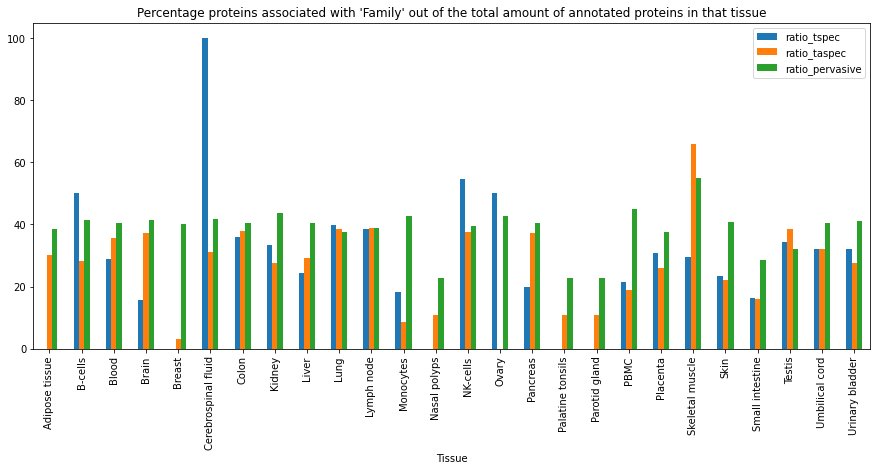

In [55]:
df_family_tissue = df_types_tissue.loc[:,( df_types_tissue.columns.str.contains("Family")|df_types_tissue.columns.str.contains("Tissue"))]
df_family_tissue["Total_tspec"] = df_types_tissue.loc[:, (df_types_tissue.columns.str.contains("tspec"))].sum(axis=1)
df_family_tissue["Total_taspec"] = df_types_tissue.loc[:, (df_types_tissue.columns.str.contains("taspec"))].sum(axis=1)
df_family_tissue["Total_pervasive"] = df_types_tissue.loc[:, (df_types_tissue.columns.str.contains("pervasive"))].sum(axis=1)
df_family_tissue = df_family_tissue[(df_family_tissue["Total_tspec"]>=50)|(df_family_tissue["Total_taspec"]>=50)|(df_family_tissue["Total_pervasive"]>=50)]
df_family_tissue["ratio_tspec"] = df_family_tissue["Family_tspec"]*100/df_family_tissue["Total_tspec"]
df_family_tissue["ratio_taspec"] = df_family_tissue["Family_taspec"]*100/df_family_tissue["Total_taspec"]
df_family_tissue["ratio_pervasive"] = df_family_tissue["Family_pervasive"]*100/df_family_tissue["Total_pervasive"]

df_family_tissue[["Tissue", "ratio_tspec", "ratio_taspec", "ratio_pervasive"]].plot(kind="bar", x="Tissue", figsize=(15,6), title="Percentage proteins associated with 'Family' out of the total amount of annotated proteins in that tissue")

In [56]:
df_family_tissue

Tissue  Family_tspec  Family_taspec  Family_pervasive  \
0        Adipose tissue             0             36                78   
1               B-cells             3              9                37   
2                 Blood           175            300               486   
4                 Brain            12             37               389   
5                Breast             0              1                24   
6   Cerebrospinal fluid             2              5               369   
8                 Colon           582            499               269   
15               Kidney             1             44               115   
16                Liver            24             84               476   
17                 Lung           177            258               181   
18           Lymph node           255            357               212   
20            Monocytes             4              2               372   
21         Nasal polyps             0              3                22   
22             NK-cells             6             12                47   
23                Ovary             1              0               370   
24             Pancreas             3             13               386   
25     Palatine tonsils             0              3                22   
26        Parotid gland             0              3                22   
27                 PBMC           112            122               126   
29             Placenta           133             63               118   
30      Skeletal muscle            41             29                56   
31                 Skin           100            122               125   
32      Small intestine            12             15                23   
35               Testis            39             33                57   
37       Umbilical cord            17             93               145   
39      Urinary bladder             9             47               114   

    Total_tspec  Total_taspec  Total_pervasive  ratio_tspec  ratio_taspec  \
0             0           119              203          NaN     30.252101   
1             6            32               89    50.000000     28.125000   
2           606           840             1198    28.877888     35.714286   
4            76            99              940    15.789474     37.373737   
5            16            32               60     0.000000      3.125000   
6             2            16              885   100.000000     31.250000   
8          1626          1322              665    35.793358     37.745840   
15            3           159              263    33.333333     27.672956   
16           98           288             1178    24.489796     29.166667   
17          446           671              480    39.686099     38.450075   
18          663           920              547    38.461538     38.804348   
20           22            23              873    18.181818      8.695652   
21            0            28               97          NaN     10.714286   
22           11            32              119    54.545455     37.500000   
23            2             1              867    50.000000      0.000000   
24           15            35              954    20.000000     37.142857   
25            0            28               97          NaN     10.714286   
26            0            28               97          NaN     10.714286   
27          523           644              280    21.414914     18.944099   
29          430           244              313    30.930233     25.819672   
30          139            44              102    29.496403     65.909091   
31          429           552              306    23.310023     22.101449   
32           73            94               81    16.438356     15.957447   
35          114            86              177    34.210526     38.372093   
37           53           291              357    32.075472     31.958763   
39           28 

C:\Users\hannedvo\AppData\Local\Temp\8/ipykernel_24100/3678828970.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_repeat_tissue["Total_tspec"] = df_types_tissue.loc[:, (df_types_tissue.columns.str.contains("tspec"))].sum(axis=1)
C:\Users\hannedvo\AppData\Local\Temp\8/ipykernel_24100/3678828970.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_repeat_tissue["Total_taspec"] = df_types_tissue.loc[:, (df_types_tissue.columns.str.contains("taspec"))].sum(axis=1)
C:\Users\hannedvo\AppData\Local\Temp\8

<AxesSubplot:title={'center':"Percentage proteins associated with 'Repeat' out of the total amount of annotated proteins in that tissue"}, xlabel='Tissue'>

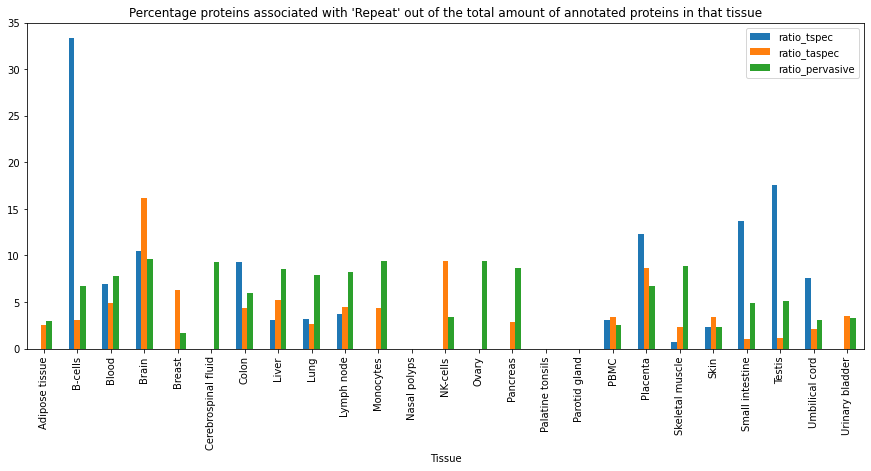

In [57]:
df_repeat_tissue = df_types_tissue.loc[:,( df_types_tissue.columns.str.contains("Repeat")|df_types_tissue.columns.str.contains("Tissue"))]
df_repeat_tissue["Total_tspec"] = df_types_tissue.loc[:, (df_types_tissue.columns.str.contains("tspec"))].sum(axis=1)
df_repeat_tissue["Total_taspec"] = df_types_tissue.loc[:, (df_types_tissue.columns.str.contains("taspec"))].sum(axis=1)
df_repeat_tissue["Total_pervasive"] = df_types_tissue.loc[:, (df_types_tissue.columns.str.contains("pervasive"))].sum(axis=1)
df_repeat_tissue = df_repeat_tissue[(df_repeat_tissue["Total_tspec"]>=50)|(df_repeat_tissue["Total_taspec"]>=50)|(df_repeat_tissue["Total_pervasive"]>=50)]
df_repeat_tissue["ratio_tspec"] = df_repeat_tissue["Repeat_tspec"]*100/df_repeat_tissue["Total_tspec"]
df_repeat_tissue["ratio_taspec"] = df_repeat_tissue["Repeat_taspec"]*100/df_repeat_tissue["Total_taspec"]
df_repeat_tissue["ratio_pervasive"] = df_repeat_tissue["Repeat_pervasive"]*100/df_repeat_tissue["Total_pervasive"]

df_repeat_tissue[df_repeat_tissue["Tissue"]!="Kidney"][["Tissue", "ratio_tspec", "ratio_taspec", "ratio_pervasive"]].plot(kind="bar", x="Tissue", figsize=(15,6), title="Percentage proteins associated with 'Repeat' out of the total amount of annotated proteins in that tissue")

In [58]:
df_repeat_tissue

Tissue  Repeat_tspec  Repeat_taspec  Repeat_pervasive  \
0        Adipose tissue             0              3                 6   
1               B-cells             2              1                 6   
2                 Blood            42             41                94   
4                 Brain             8             16                90   
5                Breast             0              2                 1   
6   Cerebrospinal fluid             0              0                82   
8                 Colon           151             58                40   
15               Kidney             0              5                13   
16                Liver             3             15               101   
17                 Lung            14             18                38   
18           Lymph node            25             41                45   
20            Monocytes             0              1                82   
21         Nasal polyps             0              0                 0   
22             NK-cells             0              3                 4   
23                Ovary             0              0                82   
24             Pancreas             0              1                83   
25     Palatine tonsils             0              0                 0   
26        Parotid gland             0              0                 0   
27                 PBMC            16             22                 7   
29             Placenta            53             21                21   
30      Skeletal muscle             1              1                 9   
31                 Skin            10             19                 7   
32      Small intestine            10              1                 4   
35               Testis            20              1                 9   
37       Umbilical cord             4              6                11   
39      Urinary bladder             0              6                 9   

    Total_tspec  Total_taspec  Total_pervasive  ratio_tspec  ratio_taspec  \
0             0           119              203          NaN      2.521008   
1             6            32               89    33.333333      3.125000   
2           606           840             1198     6.930693      4.880952   
4            76            99              940    10.526316     16.161616   
5            16            32               60     0.000000      6.250000   
6             2            16              885     0.000000      0.000000   
8          1626          1322              665     9.286593      4.387292   
15            3           159              263     0.000000      3.144654   
16           98           288             1178     3.061224      5.208333   
17          446           671              480     3.139013      2.682563   
18          663           920              547     3.770739      4.456522   
20           22            23              873     0.000000      4.347826   
21            0            28               97          NaN      0.000000   
22           11            32              119     0.000000      9.375000   
23            2             1              867     0.000000      0.000000   
24           15            35              954     0.000000      2.857143   
25            0            28               97          NaN      0.000000   
26            0            28               97          NaN      0.000000   
27          523           644              280     3.059273      3.416149   
29          430           244              313    12.325581      8.606557   
30          139            44              102     0.719424      2.272727   
31          429           552              306     2.331002      3.442029   
32           73            94               81    13.698630      1.063830   
35          114            86              177    17.543860      1.162791   
37           53           291              357     7.547170      2.061856   
39           28 

C:\Users\hannedvo\AppData\Local\Temp\8/ipykernel_24100/3556606590.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_coiled_coil_tissue["Total_tspec"] = df_types_tissue.loc[:, (df_types_tissue.columns.str.contains("tspec"))].sum(axis=1)
C:\Users\hannedvo\AppData\Local\Temp\8/ipykernel_24100/3556606590.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_coiled_coil_tissue["Total_taspec"] = df_types_tissue.loc[:, (df_types_tissue.columns.str.contains("taspec"))].sum(axis=1)
C:\Users\hannedvo\AppData\Lo

<AxesSubplot:title={'center':"Percentage proteins associated with 'Coiled-coil' out of the total amount of annotated proteins in that tissue"}, xlabel='Tissue'>

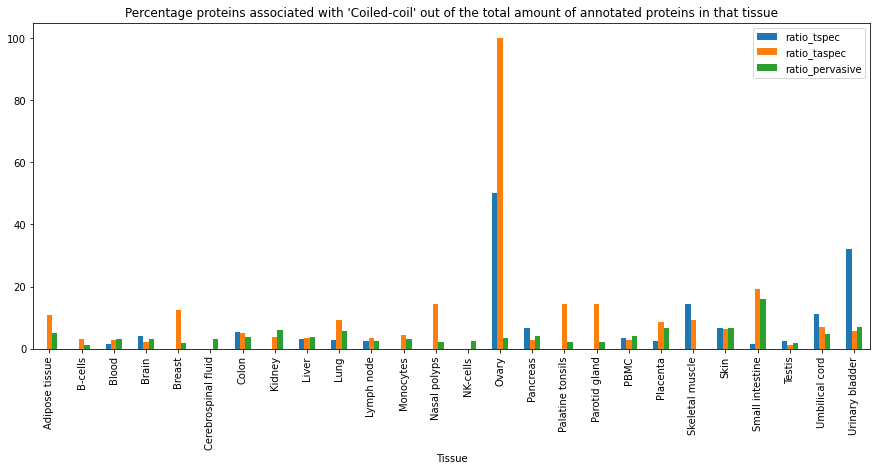

In [59]:
df_coiled_coil_tissue = df_types_tissue.loc[:,( df_types_tissue.columns.str.contains("Coiled-coil")|df_types_tissue.columns.str.contains("Tissue"))]
df_coiled_coil_tissue["Total_tspec"] = df_types_tissue.loc[:, (df_types_tissue.columns.str.contains("tspec"))].sum(axis=1)
df_coiled_coil_tissue["Total_taspec"] = df_types_tissue.loc[:, (df_types_tissue.columns.str.contains("taspec"))].sum(axis=1)
df_coiled_coil_tissue["Total_pervasive"] = df_types_tissue.loc[:, (df_types_tissue.columns.str.contains("pervasive"))].sum(axis=1)
df_coiled_coil_tissue = df_coiled_coil_tissue[(df_coiled_coil_tissue["Total_tspec"]>=50)|(df_coiled_coil_tissue["Total_taspec"]>=50)|(df_coiled_coil_tissue["Total_pervasive"]>=50)]
df_coiled_coil_tissue["ratio_tspec"] = df_coiled_coil_tissue["Coiled-coil_tspec"]*100/df_coiled_coil_tissue["Total_tspec"]
df_coiled_coil_tissue["ratio_taspec"] = df_coiled_coil_tissue["Coiled-coil_taspec"]*100/df_coiled_coil_tissue["Total_taspec"]
df_coiled_coil_tissue["ratio_pervasive"] = df_coiled_coil_tissue["Coiled-coil_pervasive"]*100/df_coiled_coil_tissue["Total_pervasive"]

df_coiled_coil_tissue[["Tissue", "ratio_tspec", "ratio_taspec", "ratio_pervasive"]].plot(kind="bar", x="Tissue", figsize=(15,6), title="Percentage proteins associated with 'Coiled-coil' out of the total amount of annotated proteins in that tissue")

In [60]:
df_coiled_coil_tissue

Tissue  Coiled-coil_tspec  Coiled-coil_taspec  \
0        Adipose tissue                  0                  13   
1               B-cells                  0                   1   
2                 Blood                 10                  24   
4                 Brain                  3                   2   
5                Breast                  0                   4   
6   Cerebrospinal fluid                  0                   0   
8                 Colon                 86                  65   
15               Kidney                  0                   6   
16                Liver                  3                  10   
17                 Lung                 13                  63   
18           Lymph node                 16                  32   
20            Monocytes                  0                   1   
21         Nasal polyps                  0                   4   
22             NK-cells                  0                   0   
23                Ovary                  1                   1   
24             Pancreas                  1                   1   
25     Palatine tonsils                  0                   4   
26        Parotid gland                  0                   4   
27                 PBMC                 18                  18   
29             Placenta                 10                  21   
30      Skeletal muscle                 20                   4   
31                 Skin                 29                  35   
32      Small intestine                  1                  18   
35               Testis                  3                   1   
37       Umbilical cord                  6                  20   
39      Urinary bladder                  9                  10   

    Coiled-coil_pervasive  Total_tspec  Total_taspec  Total_pervasive  \
0                      10            0           119              203   
1                       1            6            32               89   
2                      36          606           840             1198   
4                      29           76            99              940   
5                       1           16            32               60   
6                      27            2            16              885   
8                      26         1626          1322              665   
15                     16            3           159              263   
16                     43           98           288             1178   
17                     28          446           671              480   
18                     14          663           920              547   
20                     27           22            23              873   
21                      2            0            28               97   
22                      3           11            32              119   
23                     29            2             1              867   
24                     38           15            35              954   
25                      2            0            28               97   
26                      2            0            28               97   
27                     11          523           644              280   
29                     21          430           244              313   
30                      0          139            44              102   
31                     20          429           552              306   
32                     13           73            94               81   
35                      3          114            86              177   
37                     17           53           291              357   
39                     19           28           171              277   

    ratio_tspec  ratio_taspec  ratio_pervasive  
0           NaN     10.924370         4.926108  
1      0.000000      3.125000         1.123596  
2      1.650165      2.857143         3.005008  
4      3.947368      2.020202         3.085106  
5      0.000000  

C:\Users\hannedvo\AppData\Local\Temp\8/ipykernel_24100/1339115317.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_disordered_tissue["Total_tspec"] = df_types_tissue.loc[:, (df_types_tissue.columns.str.contains("tspec"))].sum(axis=1)
C:\Users\hannedvo\AppData\Local\Temp\8/ipykernel_24100/1339115317.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_disordered_tissue["Total_taspec"] = df_types_tissue.loc[:, (df_types_tissue.columns.str.contains("taspec"))].sum(axis=1)
C:\Users\hannedvo\AppData\Loca

<AxesSubplot:title={'center':"Percentage proteins associated with 'Disordered' out of the total amount of annotated proteins in that tissue"}, xlabel='Tissue'>

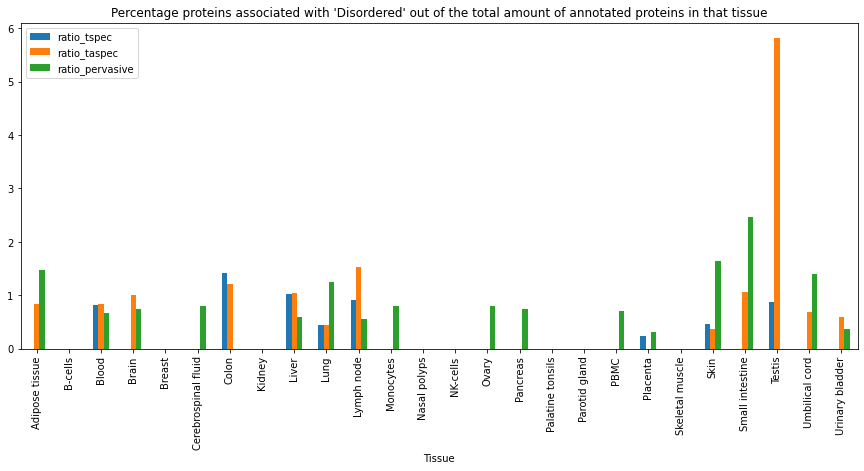

In [61]:
df_disordered_tissue = df_types_tissue.loc[:,( df_types_tissue.columns.str.contains("Disordered")|df_types_tissue.columns.str.contains("Tissue"))]
df_disordered_tissue["Total_tspec"] = df_types_tissue.loc[:, (df_types_tissue.columns.str.contains("tspec"))].sum(axis=1)
df_disordered_tissue["Total_taspec"] = df_types_tissue.loc[:, (df_types_tissue.columns.str.contains("taspec"))].sum(axis=1)
df_disordered_tissue["Total_pervasive"] = df_types_tissue.loc[:, (df_types_tissue.columns.str.contains("pervasive"))].sum(axis=1)
df_disordered_tissue = df_disordered_tissue[(df_disordered_tissue["Total_tspec"]>=50)|(df_disordered_tissue["Total_taspec"]>=50)|(df_disordered_tissue["Total_pervasive"]>=50)]
df_disordered_tissue["ratio_tspec"] = df_disordered_tissue["Disordered_tspec"]*100/df_disordered_tissue["Total_tspec"]
df_disordered_tissue["ratio_taspec"] = df_disordered_tissue["Disordered_taspec"]*100/df_disordered_tissue["Total_taspec"]
df_disordered_tissue["ratio_pervasive"] = df_disordered_tissue["Disordered_pervasive"]*100/df_disordered_tissue["Total_pervasive"]

df_disordered_tissue[["Tissue", "ratio_tspec", "ratio_taspec", "ratio_pervasive"]].plot(kind="bar", x="Tissue", figsize=(15,6), title="Percentage proteins associated with 'Disordered' out of the total amount of annotated proteins in that tissue")

In [62]:
df_disordered_tissue

Tissue  Disordered_tspec  Disordered_taspec  \
0        Adipose tissue                 0                  1   
1               B-cells                 0                  0   
2                 Blood                 5                  7   
4                 Brain                 0                  1   
5                Breast                 0                  0   
6   Cerebrospinal fluid                 0                  0   
8                 Colon                23                 16   
15               Kidney                 0                  0   
16                Liver                 1                  3   
17                 Lung                 2                  3   
18           Lymph node                 6                 14   
20            Monocytes                 0                  0   
21         Nasal polyps                 0                  0   
22             NK-cells                 0                  0   
23                Ovary                 0                  0   
24             Pancreas                 0                  0   
25     Palatine tonsils                 0                  0   
26        Parotid gland                 0                  0   
27                 PBMC                 0                  0   
29             Placenta                 1                  0   
30      Skeletal muscle                 0                  0   
31                 Skin                 2                  2   
32      Small intestine                 0                  1   
35               Testis                 1                  5   
37       Umbilical cord                 0                  2   
39      Urinary bladder                 0                  1   

    Disordered_pervasive  Total_tspec  Total_taspec  Total_pervasive  \
0                      3            0           119              203   
1                      0            6            32               89   
2                      8          606           840             1198   
4                      7           76            99              940   
5                      0           16            32               60   
6                      7            2            16              885   
8                      0         1626          1322              665   
15                     0            3           159              263   
16                     7           98           288             1178   
17                     6          446           671              480   
18                     3          663           920              547   
20                     7           22            23              873   
21                     0            0            28               97   
22                     0           11            32              119   
23                     7            2             1              867   
24                     7           15            35              954   
25                     0            0            28               97   
26                     0            0            28               97   
27                     2          523           644              280   
29                     1          430           244              313   
30                     0          139            44              102   
31                     5          429           552              306   
32                     2           73            94               81   
35                     0          114            86              177   
37                     5           53           291              357   
39                     1           28           171              277   

    ratio_tspec  ratio_taspec  ratio_pervasive  
0           NaN      0.840336         1.477833  
1      0.000000      0.000000         0.000000  
2      0.825083      0.833333         0.667780  
4      0.000000      1.010101         0.744681  
5      0.000000      0.000000         0.000000  
6      0.000000      0.000000         0.790960  


C:\Users\hannedvo\AppData\Local\Temp\8/ipykernel_24100/2677423619.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_motif_tissue["Total_tspec"] = df_types_tissue.loc[:, (df_types_tissue.columns.str.contains("tspec"))].sum(axis=1)
C:\Users\hannedvo\AppData\Local\Temp\8/ipykernel_24100/2677423619.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_motif_tissue["Total_taspec"] = df_types_tissue.loc[:, (df_types_tissue.columns.str.contains("taspec"))].sum(axis=1)
C:\Users\hannedvo\AppData\Local\Temp\8/i

<AxesSubplot:title={'center':"Percentage proteins associated with 'Motif' out of the total amount of annotated proteins in that tissue"}, xlabel='Tissue'>

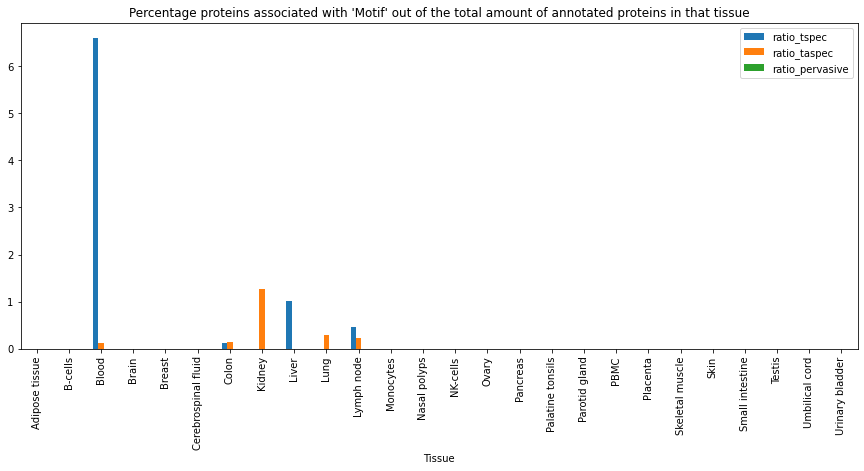

In [63]:
df_motif_tissue = df_types_tissue.loc[:,( df_types_tissue.columns.str.contains("Motif")|df_types_tissue.columns.str.contains("Tissue"))]
df_motif_tissue["Total_tspec"] = df_types_tissue.loc[:, (df_types_tissue.columns.str.contains("tspec"))].sum(axis=1)
df_motif_tissue["Total_taspec"] = df_types_tissue.loc[:, (df_types_tissue.columns.str.contains("taspec"))].sum(axis=1)
df_motif_tissue["Total_pervasive"] = df_types_tissue.loc[:, (df_types_tissue.columns.str.contains("pervasive"))].sum(axis=1)
df_motif_tissue = df_motif_tissue[(df_motif_tissue["Total_tspec"]>=50)|(df_motif_tissue["Total_taspec"]>=50)|(df_motif_tissue["Total_pervasive"]>=50)]
df_motif_tissue["ratio_tspec"] = df_motif_tissue["Motif_tspec"]*100/df_motif_tissue["Total_tspec"]
df_motif_tissue["ratio_taspec"] = df_motif_tissue["Motif_taspec"]*100/df_motif_tissue["Total_taspec"]
df_motif_tissue["ratio_pervasive"] = df_motif_tissue["Motif_pervasive"]*100/df_motif_tissue["Total_pervasive"]

df_motif_tissue[["Tissue", "ratio_tspec", "ratio_taspec", "ratio_pervasive"]].plot(kind="bar", x="Tissue", figsize=(15,6), title="Percentage proteins associated with 'Motif' out of the total amount of annotated proteins in that tissue")

In [64]:
df_motif_tissue

Tissue  Motif_tspec  Motif_taspec  Motif_pervasive  \
0        Adipose tissue            0             0                0   
1               B-cells            0             0                0   
2                 Blood           40             1                0   
4                 Brain            0             0                0   
5                Breast            0             0                0   
6   Cerebrospinal fluid            0             0                0   
8                 Colon            2             2                0   
15               Kidney            0             2                0   
16                Liver            1             0                0   
17                 Lung            0             2                0   
18           Lymph node            3             2                0   
20            Monocytes            0             0                0   
21         Nasal polyps            0             0                0   
22             NK-cells            0             0                0   
23                Ovary            0             0                0   
24             Pancreas            0             0                0   
25     Palatine tonsils            0             0                0   
26        Parotid gland            0             0                0   
27                 PBMC            0             0                0   
29             Placenta            0             0                0   
30      Skeletal muscle            0             0                0   
31                 Skin            0             0                0   
32      Small intestine            0             0                0   
35               Testis            0             0                0   
37       Umbilical cord            0             0                0   
39      Urinary bladder            0             0                0   

    Total_tspec  Total_taspec  Total_pervasive  ratio_tspec  ratio_taspec  \
0             0           119              203          NaN      0.000000   
1             6            32               89     0.000000      0.000000   
2           606           840             1198     6.600660      0.119048   
4            76            99              940     0.000000      0.000000   
5            16            32               60     0.000000      0.000000   
6             2            16              885     0.000000      0.000000   
8          1626          1322              665     0.123001      0.151286   
15            3           159              263     0.000000      1.257862   
16           98           288             1178     1.020408      0.000000   
17          446           671              480     0.000000      0.298063   
18          663           920              547     0.452489      0.217391   
20           22            23              873     0.000000      0.000000   
21            0            28               97          NaN      0.000000   
22           11            32              119     0.000000      0.000000   
23            2             1              867     0.000000      0.000000   
24           15            35              954     0.000000      0.000000   
25            0            28               97          NaN      0.000000   
26            0            28               97          NaN      0.000000   
27          523           644              280     0.000000      0.000000   
29          430           244              313     0.000000      0.000000   
30          139            44              102     0.000000      0.000000   
31          429           552              306     0.000000      0.000000   
32           73            94               81     0.000000      0.000000   
35          114            86              177     0.000000      0.000000   
37           53           291              357     0.000000      0.000000   
39           28           171              277     0.000000      0.000000   

    ratio_pervasive

# 4. Domain names

We'll proceed with the same kind of analysis, now for the domain names. For this, we first retain per protein and P-site in a domain, only one entry. In Pfam, some entries are noted more than once, with different E-values. As we are only interested in how many sites occur in a domain, we do not need this kind of information. We thus first group the entries based on the presence in a Pfam entry, the protein name and position. Later, we group all entries from Pfam and count how many P-sites occur. This is done for all three categories of P-sites seperately. Only a minority of entries is associated with at least 15 P-sites, which is an arbitrary cut-off. Clearly, P-sites are spread across domains. Most frequently these P-sites are tissue-specific, in line with our expectations as this cateogry is the most abundant.

In [65]:
tspec_sites_pfam_hmm_name = tspec_sites_pfam.groupby(["hmm name","ACC_ID","UP_POS"], as_index=False).agg({"modres": "first"})
taspec_sites_pfam_hmm_name = taspec_sites_pfam.groupby(["hmm name","ACC_ID","UP_POS"], as_index=False).agg({"modres": "first"})
gen_sites_pfam_hmm_name = gen_sites_pfam.groupby(["hmm name","ACC_ID","UP_POS"], as_index=False).agg({"modres": "first"})
tspec_sites_pfam_hmm_name

hmm name  ACC_ID  UP_POS modres
0       1-cysPrx_C  P30041      32      S
1       1-cysPrx_C  Q06830      18      T
2           14-3-3  P27348      24      T
3           14-3-3  P27348      45      S
4           14-3-3  P27348      64      S
...            ...     ...     ...    ...
4736      zf-RanBP  P49792      21      S
4737  zf-Tim10_DDP  Q9Y5L4       7      S
4738         zf-U1  P09234       8      Y
4739        zf-UBP  Q53GS9      42      S
4740   zf_C2H2_ZHX  Q9Y6X8      37      T

[4741 rows x 4 columns]

In [66]:
tspec_sites_pfam_hmm_name = tspec_sites_pfam_hmm_name.groupby(["hmm name"], as_index=False)["UP_POS"].count()
tspec_sites_pfam_hmm_name.rename(columns ={"UP_POS": "number of tissue-specific phosphosites"}, inplace=True, )
tspec_sites_pfam_hmm_name.set_index("hmm name", inplace=True)
taspec_sites_pfam_hmm_name = taspec_sites_pfam_hmm_name.groupby(["hmm name"], as_index=False)["UP_POS"].count()
taspec_sites_pfam_hmm_name.rename(columns ={"UP_POS": "number of tissue aspecific phosphosites"}, inplace=True)
taspec_sites_pfam_hmm_name.set_index("hmm name", inplace=True)
gen_sites_pfam_hmm_name = gen_sites_pfam_hmm_name.groupby(["hmm name"], as_index=False)["UP_POS"].count()
gen_sites_pfam_hmm_name.rename(columns ={"UP_POS": "number of pervasive phosphosites"}, inplace=True)
gen_sites_pfam_hmm_name.set_index("hmm name", inplace=True)

pfam_hmm_name = pd.concat([tspec_sites_pfam_hmm_name, taspec_sites_pfam_hmm_name, gen_sites_pfam_hmm_name], axis=1)

In [67]:
pfam_hmm_name[(pfam_hmm_name["number of tissue-specific phosphosites"]>15)|
             (pfam_hmm_name["number of tissue aspecific phosphosites"]>15)|
             (pfam_hmm_name["number of pervasive phosphosites"]>15)].shape[0]

38

In [68]:
pfam_hmm_name.shape[0]

1798

In [69]:
pfam_hmm_name[(pfam_hmm_name["number of tissue-specific phosphosites"]>15)|
             (pfam_hmm_name["number of tissue aspecific phosphosites"]>15)|
             (pfam_hmm_name["number of pervasive phosphosites"]>15)]

number of tissue-specific phosphosites  \
hmm name                                                 
14-3-3                                            19.0   
AbLIM_anchor                                       3.0   
Actin                                             52.0   
C1-set                                            16.0   
CH                                                19.0   
Cofilin_ADF                                       16.0   
Cpn60_TCP1                                        31.0   
DEAD                                              23.0   
FERM_C                                            16.0   
FERM_M                                            24.0   
Filament                                         140.0   
GTP_EFTU                                          27.0   
Globin                                            13.0   
HSP70                                             42.0   
HSP90                                             22.0   
Helicase_C                                        26.0   
Histone                                           82.0   
Keratin_2_head                                    28.0   
Linker_histone                                     8.0   
Lipocalin                                         17.0   
Myosin_head                                       27.0   
Myosin_tail_1                                     29.0   
Oxysterol_BP                                      18.0   
PH                                                27.0   
PK_Tyr_Ser-Thr                                    33.0   
Pkinase                                          145.0   
Proteasome                                        19.0   
RRM_1                                             43.0   
Ras                                               33.0   
RhoGEF                                            32.0   
SARG                                              21.0   
Serpin                                            44.0   
THRAP3_BCLAF1                                     20.0   
Trypsin                                           31.0   
Tubulin                                           49.0   
Tubulin_C                                         45.0   
V-set                                             17.0   
Vinculin                                          16.0   

                number of tissue aspecific phosphosites  \
hmm name                                                  
14-3-3                                             18.0   
AbLIM_anchor                                        2.0   
Actin                                              76.0   
C1-set                                             16.0   
CH                                                 12.0   
Cofilin_ADF                                         6.0   
Cpn60_TCP1                                         13.0   
DEAD                                               19.0   
FERM_C                                              3.0   
FERM_M                                              4.0   
Filament                                           90.0   
GTP_EFTU                                           21.0   
Globin                                             10.0   
HSP70                                              26.0   
HSP90                                              19.0   
Helicase_C                                         18.0   
Histone                                            61.0   
Keratin_2_head                                     27.0   
Linker_histone                                     18.0   
Lipocalin                                           NaN   
Myosin_head                                        12.0   
Myosin_tail_1                                      13.0   
Oxysterol_BP                                       13.0   
PH                                                 10.0   
PK_Tyr_Ser-Thr                                      7.0   
Pkinase                                            95.0   
Proteasome                                 

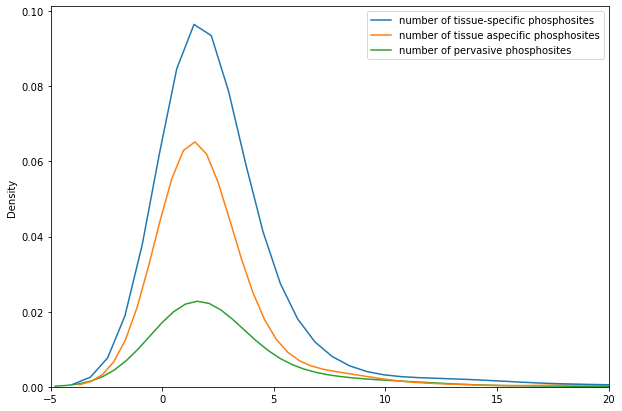

In [70]:
plt.figure(figsize=(10,7))
sns.kdeplot(data=pfam_hmm_name, palette="tab10")
#plt.axvline(x=6, c="black")
#plt.title("Distribution of the number of P-sites in the three categories in a domain")
plt.xlim([-5,20])
#plt.savefig("Distribution_Psites_domains.png", format="png", bbox_inches="tight")
plt.show()

<AxesSubplot:xlabel='hmm name'>

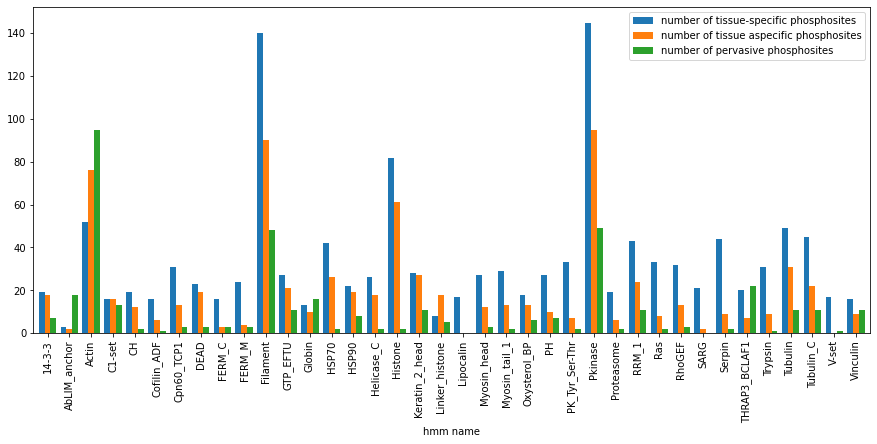

In [71]:
pfam_hmm_name[(pfam_hmm_name["number of tissue-specific phosphosites"]>15)|
             (pfam_hmm_name["number of tissue aspecific phosphosites"]>15)|
             (pfam_hmm_name["number of pervasive phosphosites"]>15)].plot(kind="bar", figsize=(15,6), width=0.8)
#plt.savefig("Domains associated with Psites.png", format="png", bbox_inches="tight")

In [72]:
tspec_sites_pfam[tspec_sites_pfam["hmm name"]=="C1-set"] # should be highly specific to immune cells

ACC_ID  UP_POS                                             tissue  \
42     A0M8Q6      10                                     Lung,Lung,Lung   
5704   P01834      66                                              Blood   
5706   P01857      19  Small intestine,Small intestine,Small intestin...   
5707   P01857      19  Small intestine,Small intestine,Small intestin...   
5708   P01857      19  Small intestine,Small intestine,Small intestin...   
5709   P01857      22  Small intestine,Small intestine,Small intestin...   
5710   P01857      22  Small intestine,Small intestine,Small intestin...   
5711   P01857      22  Small intestine,Small intestine,Small intestin...   
5730   P01860      19  Small intestine,Small intestine,Small intestin...   
5731   P01860      19  Small intestine,Small intestine,Small intestin...   
5732   P01860      19  Small intestine,Small intestine,Small intestin...   
5733   P01860      22  Small intestine,Small intestine,Small intestin...   
5734   P01860      22  Small intestine,Small intestine,Small intestin...   
5735   P01860      22  Small intestine,Small intestine,Small intestin...   
5763   P01871      82                                    Small intestine   
5764   P01871      82                                    Small intestine   
5765   P01871      82                                    Small intestine   
5766   P01871      82                                    Small intestine   
5791   P01876      64                    Small intestine,Small intestine   
5792   P01876      64                    Small intestine,Small intestine   
5793   P01876      65                    Small intestine,Small intestine   
5794   P01876      65                    Small intestine,Small intestine   
5795   P01876      66  Small intestine,Small intestine,Small intestin...   
5796   P01876      66  Small intestine,Small intestine,Small intestin...   
5797   P01876      67  Small intestine,Small intestine,Small intestin...   
5798   P01876      67  Small intestine,Small intestine,Small intestin...   
5799   P01876      68  Small intestine,Small intestine,Small intestin...   
5800   P01876      68  Small intestine,Small intestine,Small intestin...   
9051   P0CF74      10                                     Lung,Lung,Lung   
9151   P0DOY2      10                                     Lung,Lung,Lung   
9153   P0DOY3      10                                     Lung,Lung,Lung   
22214  P61769      48                                          Monocytes   

      modres  Adipose tissue  B-cells  Blood  Bone  Brain  Breast  ...  \
42         T               0        0      0     0      0       0  ...   
5704       Y               0        0      1     0      0       0  ...   
5706       S               0        0      0     0      0       0  ...   
5707       S               0        0      0     0      0       0  ...   
5708       S               0        0      0     0      0       0  ...   
5709       T               0        0      0     0      0       0  ...   
5710       T               0        0      0     0      0       0  ...   
5711       T               0        0      0     0      0       0  ...   
5730       S               0        0      0     0      0       0  ...   
5731       S               0        0      0     0      0       0  ...   
5732       S               0        0      0     0      0       0  ...   
5733       T               0        0      0     0      0       0  ...   
5734       T               0        0      0     0      0       0  ...   
5735       T               0        0      0     0      0       0  ...   
5763       T               0        0      0     0      0       0  ...   
5764       T               0        0      0     0      0       0  ...   
5765       T               0        0      0     0      0       0  ...   
5766       T               0        0      0     0      0       0  ...   
5791       Y               0        0      0     0      0       0  ...   
5792       Y      

In [73]:
taspec_sites_pfam[taspec_sites_pfam["hmm name"]=="C1-set"]

ACC_ID  UP_POS                                             tissue  \
22    A0M8Q6      31  Nasal polyps, Palatine tonsils, Parotid gland,...   
2071  P01834       7               Breast,Blood,Blood,Blood,Blood,Blood   
2072  P01834      20                Small intestine,Cerebrospinal fluid   
2073  P01834      49  Dental plaque,Dental plaque,Lymph node,Lymph node   
2074  P01834      52     Placenta,Placenta,Placenta,Placenta,Lymph node   
2075  P01857       7                                       Brain,Testis   
2076  P01857       7                                       Brain,Testis   
2077  P01857       7                                       Brain,Testis   
2084  P01859      21  PBMC,PBMC,Small intestine,Small intestine,Smal...   
2085  P01859      21  PBMC,PBMC,Small intestine,Small intestine,Smal...   
2086  P01859      21  PBMC,PBMC,Small intestine,Small intestine,Smal...   
2093  P01861      21  PBMC,PBMC,Small intestine,Small intestine,Smal...   
2094  P01861      21  PBMC,PBMC,Small intestine,Small intestine,Smal...   
2095  P01861      21  PBMC,PBMC,Small intestine,Small intestine,Smal...   
3359  P0CF74      85                              Brain,Small intestine   
3360  P0CG04      85                              Brain,Small intestine   
3428  P0DOY2      47                        PBMC,PBMC,Blood,Blood,Blood   
3429  P0DOY2      85                              Brain,Small intestine   
3430  P0DOY3      47                        PBMC,PBMC,Blood,Blood,Blood   
3431  P0DOY3      85                              Brain,Small intestine   
3988  P15814      61                     Adipose tissue, Umbilical cord   
8862  P61769      46  PBMC,PBMC,PBMC,Cerebrospinal fluid,Adipose tis...   

     modres  Adipose tissue  B-cells  Blood  Bone  Brain  Breast  ...  Ureter  \
22        S               0        0      0     0      0       0  ...       0   
2071      S               0        0      1     0      0       1  ...       0   
2072      S               0        0      0     0      0       0  ...       0   
2073      S               0        0      0     0      0       0  ...       0   
2074      S               0        0      0     0      0       0  ...       0   
2075      S               0        0      0     0      1       0  ...       0   
2076      S               0        0      0     0      1       0  ...       0   
2077      S               0        0      0     0      1       0  ...       0   
2084      S               0        0      0     0      0       0  ...       0   
2085      S               0        0      0     0      0       0  ...       0   
2086      S               0        0      0     0      0       0  ...       0   
2093      S               0        0      0     0      0       0  ...       0   
2094      S               0        0      0     0      0       0  ...       0   
2095      S               0        0      0     0      0       0  ...       0   
3359      Y               0        0      0     0      1       0  ...       0   
3360      Y               0        0      0     0      1       0  ...       0   
3428      S               0        0      1     0      0       0  ...       0   
3429      Y               0        0      0     0      1       0  ...       0   
3430      S               0        0      1     0      0       0  ...       0   
3431      Y               0        0      0     0      1       0  ...       0   
3988      S               1        0      0     0      0       0  ...       0   
8862      Y               1        0      0     0      0       0  ...       0   

      Urinary bladder  Urine  Total  hmm start  hmm end  hmm name    type  \
22                  0      0      3          1       85    C1-set  Domain   
2071                0      0      2          1       86    C1-set  Domain   
2072                0      0      2          1       86    C1-set  Domain   
2073                0      0      2          1       86    C1-set  Domain   
2074                0      0   

In [74]:
gen_sites_pfam[gen_sites_pfam["hmm name"]=="C1-set"]

ACC_ID  UP_POS                                             tissue  \
903   P01834      24  Breast,Breast,PBMC,PBMC,Lung,Lung,Lung,Lung,Lu...   
904   P01834      85  PBMC,Urinary bladder, Colon, Kidney, Liver,Uri...   
931   P01876      75  Breast,Lung,Blood,Blood,Blood,Blood,Blood,Bloo...   
932   P01876      75  Breast,Lung,Blood,Blood,Blood,Blood,Blood,Bloo...   
1655  P0CF74      84  Nasal polyps, Palatine tonsils, Parotid gland,...   
1657  P0CG04      31  Nasal polyps, Palatine tonsils, Parotid gland,...   
1658  P0CG04      34  Blood, Cerebrospinal fluid, Liver, Ovary, Panc...   
1659  P0CG04      84  Nasal polyps, Palatine tonsils, Parotid gland,...   
1679  P0DOY2      31  Nasal polyps, Palatine tonsils, Parotid gland,...   
1680  P0DOY2      34  Blood, Cerebrospinal fluid, Liver, Ovary, Panc...   
1681  P0DOY2      84  Nasal polyps, Palatine tonsils, Parotid gland,...   
1683  P0DOY3      31  Nasal polyps, Palatine tonsils, Parotid gland,...   
1684  P0DOY3      34  Blood, Cerebrospinal fluid, Liver, Ovary, Panc...   
1685  P0DOY3      84  Nasal polyps, Palatine tonsils, Parotid gland,...   

     modres  Adipose tissue  B-cells  Blood  Bone  Brain  Breast  ...  Ureter  \
903       S               0        0      1     0      1       1  ...       0   
904       Y               0        0      1     0      1       0  ...       0   
931       T               0        0      1     0      0       1  ...       0   
932       T               0        0      1     0      0       1  ...       0   
1655      S               0        0      1     0      0       0  ...       0   
1657      S               0        0      1     0      1       0  ...       0   
1658      Y               0        0      1     0      1       0  ...       0   
1659      S               0        0      1     0      0       0  ...       0   
1679      S               0        0      1     0      1       0  ...       0   
1680      Y               0        0      1     0      1       0  ...       0   
1681      S               0        0      1     0      0       0  ...       0   
1683      S               0        0      1     0      1       0  ...       0   
1684      Y               0        0      1     0      1       0  ...       0   
1685      S               0        0      1     0      0       0  ...       0   

      Urinary bladder  Urine  Total  hmm start  hmm end  hmm name    type  \
903                 0      0     12          1       86    C1-set  Domain   
904                 1      1     12          1       86    C1-set  Domain   
931                 1      1      8          1       86    C1-set  Domain   
932                 1      1      8          1       85    C1-set  Domain   
1655                0      0      6          1       85    C1-set  Domain   
1657                0      0     10          1       85    C1-set  Domain   
1658                0      0      7          1       85    C1-set  Domain   
1659                0      0      6          1       85    C1-set  Domain   
1679                0      0     10          1       85    C1-set  Domain   
1680                0      0      7          1       85    C1-set  Domain   
1681                0      0      6          1       85    C1-set  Domain   
1683                0      0     10          1       85    C1-set  Domain   
1684                0      0      7          1       85    C1-set  Domain   
1685                0      0      6          1       85    C1-set  Domain   

        clan       E-value  
903   CL0011  1.300000e-21  
904   CL0011  1.300000e-21  
931   CL0011  5.800000e-17  
932   CL0011  2.400000e-13  
1655  CL0011  1.200000e-28  
1657  CL0011  1.400000e-28  
1658  CL0011  1.400000e-28  
1659  CL0011  1.400000e-28  
1679  CL0011  5.900000e-28  
1680  CL0011  5.900000e-28  
1681  CL0011  5.900000e-28  
1683  CL0011  2.500000e-28  
1684  CL0011  2.500000e-28  
1685  CL0011  2.500000e-28  

[14 rows x 52 columns]

Now, we will compare the domains associated with pSTY in comparison to their not phosphorylated counterparts.

In [75]:
data = pd.read_csv("phospho_data_tissue_annotation.tsv", sep="\t")
data.dropna(inplace=True)
print(data.shape[0])
data.head()

586479


proj         peptide modres  UP_POS  ACC_ID  pep_start  pep_end tissue
0  PXD000004      RPPSPEPSTK      S    2102  Q01082       2099     2108  Brain
1  PXD000004      ACVVHGSDLK      C     660  P50993        659      668  Brain
2  PXD000004      ACVVHGSDLK      C     663  P05023        662      671  Brain
3  PXD000004    AISPTSATSSGR      S     600  Q9Y4I1        598      609  Brain
4  PXD000004  FYYTAGSSSPTHAK      S     198  O75508        190      203  Brain

In [76]:
data = data[(data["modres"]=="S")|(data["modres"]=="T")|(data["modres"]=="Y")]
data_P = data.groupby(["ACC_ID", "UP_POS", "modres"], as_index=False).agg({"modres": "first"})
data_P.head()

ACC_ID  UP_POS modres
0  A0A075B6H7      30      T
1  A0A075B6S5      52      S
2  A0A087WXM9     223      S
3  A0A0B4J2D5     124      S
4  A0A0B4J2D5     145      T

In [77]:
data_nonP = data.groupby(["ACC_ID", "UP_POS", "modres"], as_index=False).agg({"peptide": lambda x: max(x, key=len),
                                                                       "pep_start": lambda x: min(x), "pep_end": lambda x: max(x)})
#data_nonP = data_nonP.groupby(["ACC_ID", "peptide"], as_index=False).agg({"UP_POS": "first", "modres": "first",
#                                                                 "pep_start": lambda x: min(x), "pep_end": lambda x: max(x)})
data_nonP

ACC_ID  UP_POS modres                      peptide  pep_start  \
0      A0A075B6H7      30      T           EIVMTQSPPTLSLSPGER         21   
1      A0A075B6S5      52      S              ASQGISNYLAWYQQK         47   
2      A0A087WXM9     223      S                TVMTVADQNVSPK        213   
3      A0A0B4J2D5     124      S  GKITDLANLSAANHDAAIFPGGFGAAK        115   
4      A0A0B4J2D5     145      T                NLSTFAVDGKDCK        142   
...           ...     ...    ...                          ...        ...   
23898      Q9Y6Y0     326      S                 NSPQSSPTSTPK        321   
23899      Q9Y6Y0     336      S               SLSFEMQQDELIEK        336   
23900      Q9Y6Y0     338      S               SLSFEMQQDELIEK        336   
23901      Q9Y6Y8     737      S                DMASLPSESNEPK        734   
23902      Q9Y6Y8     926      S             VVESPDFSKDEDYLGK        923   

       pep_end  
0           38  
1           61  
2          225  
3          141  
4          154  
...        ...  
23898      332  
23899      349  
23900      349  
23901      746  
23902      938  

[23903 rows x 6 columns]

In [78]:
data_nonP["length"] = data_nonP["peptide"].str.len()
data_nonP["length"].max()

30

For every amino acid in a peptide, we verify wheter it is an STY site. If so, the position is stored by summing the index with the start position of the peptide. Entries that are phosphorylated are excluded. Some proteins have multiple P-sites, which will be excluded further down.

In [79]:
list_S = []
list_T = []
list_Y = []
for i in range(30):
    col = "S"+ str(i)
    data_nonP[col] = np.nan
    data_nonP.loc[(data_nonP["peptide"].str[i]=="S") & (data_nonP["pep_start"]+i<=data_nonP["pep_end"]) & (data_nonP["pep_start"]+i != data_nonP["UP_POS"]) , col] = data_nonP["pep_start"]+i
    list_S.append(col)
    col_T = "T"+ str(i)
    data_nonP[col_T] = np.nan
    data_nonP.loc[(data_nonP["peptide"].str[i]=="T") & (data_nonP["pep_start"]+i<=data_nonP["pep_end"]) & (data_nonP["pep_start"]+i != data_nonP["UP_POS"]) , col_T] = data_nonP["pep_start"]+i
    list_T.append(col_T)
    col_Y = "Y"+ str(i)
    data_nonP[col_Y] = np.nan
    data_nonP.loc[(data_nonP["peptide"].str[i]=="Y") & (data_nonP["pep_start"]+i<=data_nonP["pep_end"]) & (data_nonP["pep_start"]+i != data_nonP["UP_POS"]) , col_Y] = data_nonP["pep_start"]+i
    list_Y.append(col_Y)
data_nonP

ACC_ID  UP_POS modres                      peptide  pep_start  \
0      A0A075B6H7      30      T           EIVMTQSPPTLSLSPGER         21   
1      A0A075B6S5      52      S              ASQGISNYLAWYQQK         47   
2      A0A087WXM9     223      S                TVMTVADQNVSPK        213   
3      A0A0B4J2D5     124      S  GKITDLANLSAANHDAAIFPGGFGAAK        115   
4      A0A0B4J2D5     145      T                NLSTFAVDGKDCK        142   
...           ...     ...    ...                          ...        ...   
23898      Q9Y6Y0     326      S                 NSPQSSPTSTPK        321   
23899      Q9Y6Y0     336      S               SLSFEMQQDELIEK        336   
23900      Q9Y6Y0     338      S               SLSFEMQQDELIEK        336   
23901      Q9Y6Y8     737      S                DMASLPSESNEPK        734   
23902      Q9Y6Y8     926      S             VVESPDFSKDEDYLGK        923   

       pep_end  length     S0     T0  Y0  ...  Y26  S27  T27  Y27  S28  T28  \
0           38      18    NaN    NaN NaN  ...  NaN  NaN  NaN  NaN  NaN  NaN   
1           61      15    NaN    NaN NaN  ...  NaN  NaN  NaN  NaN  NaN  NaN   
2          225      13    NaN  213.0 NaN  ...  NaN  NaN  NaN  NaN  NaN  NaN   
3          141      27    NaN    NaN NaN  ...  NaN  NaN  NaN  NaN  NaN  NaN   
4          154      13    NaN    NaN NaN  ...  NaN  NaN  NaN  NaN  NaN  NaN   
...        ...     ...    ...    ...  ..  ...  ...  ...  ...  ...  ...  ...   
23898      332      12    NaN    NaN NaN  ...  NaN  NaN  NaN  NaN  NaN  NaN   
23899      349      14    NaN    NaN NaN  ...  NaN  NaN  NaN  NaN  NaN  NaN   
23900      349      14  336.0    NaN NaN  ...  NaN  NaN  NaN  NaN  NaN  NaN   
23901      746      13    NaN    NaN NaN  ...  NaN  NaN  NaN  NaN  NaN  NaN   
23902      938      16    NaN    NaN NaN  ...  NaN  NaN  NaN  NaN  NaN  NaN   

       Y28  S29  T29  Y29  
0      NaN  NaN  NaN  NaN  
1      NaN  NaN  NaN  NaN  
2      NaN  NaN  NaN  NaN  
3      NaN  NaN  NaN  NaN  
4      NaN  NaN  NaN  NaN  
...    ...  ...  ...  ...  
23898  NaN  NaN  NaN  NaN  
23899  NaN  NaN  NaN  NaN  
23900  NaN  NaN  NaN  NaN  
23901  NaN  NaN  NaN  NaN  
23902  NaN  NaN  NaN  NaN  

[23903 rows x 97 columns]

In [80]:
positions = data_P[["ACC_ID", "UP_POS"]].copy()
positions["UP_POS"] = positions["UP_POS"].astype(str)
positions = positions.groupby(["ACC_ID"], as_index=False)["UP_POS"].apply(lambda x: ",".join(x))
positions.rename({"UP_POS": "list_positions"}, axis=1, inplace=True)
positions

ACC_ID   list_positions
0     A0A075B6H7               30
1     A0A075B6S5               52
2     A0A087WXM9              223
3     A0A0B4J2D5          124,145
4     A0A0B4J2D9               52
...          ...              ...
5850      Q9Y6X4      398,526,635
5851      Q9Y6X8               37
5852      Q9Y6X9  615,725,733,743
5853      Q9Y6Y0  276,326,336,338
5854      Q9Y6Y8          737,926

[5855 rows x 2 columns]

In [81]:
data_nonP = pd.merge(data_nonP, positions, how="inner", on=["ACC_ID"])
data_nonP

ACC_ID  UP_POS modres                      peptide  pep_start  \
0      A0A075B6H7      30      T           EIVMTQSPPTLSLSPGER         21   
1      A0A075B6S5      52      S              ASQGISNYLAWYQQK         47   
2      A0A087WXM9     223      S                TVMTVADQNVSPK        213   
3      A0A0B4J2D5     124      S  GKITDLANLSAANHDAAIFPGGFGAAK        115   
4      A0A0B4J2D5     145      T                NLSTFAVDGKDCK        142   
...           ...     ...    ...                          ...        ...   
23898      Q9Y6Y0     326      S                 NSPQSSPTSTPK        321   
23899      Q9Y6Y0     336      S               SLSFEMQQDELIEK        336   
23900      Q9Y6Y0     338      S               SLSFEMQQDELIEK        336   
23901      Q9Y6Y8     737      S                DMASLPSESNEPK        734   
23902      Q9Y6Y8     926      S             VVESPDFSKDEDYLGK        923   

       pep_end  length     S0     T0  Y0  ...  S27  T27  Y27  S28  T28  Y28  \
0           38      18    NaN    NaN NaN  ...  NaN  NaN  NaN  NaN  NaN  NaN   
1           61      15    NaN    NaN NaN  ...  NaN  NaN  NaN  NaN  NaN  NaN   
2          225      13    NaN  213.0 NaN  ...  NaN  NaN  NaN  NaN  NaN  NaN   
3          141      27    NaN    NaN NaN  ...  NaN  NaN  NaN  NaN  NaN  NaN   
4          154      13    NaN    NaN NaN  ...  NaN  NaN  NaN  NaN  NaN  NaN   
...        ...     ...    ...    ...  ..  ...  ...  ...  ...  ...  ...  ...   
23898      332      12    NaN    NaN NaN  ...  NaN  NaN  NaN  NaN  NaN  NaN   
23899      349      14    NaN    NaN NaN  ...  NaN  NaN  NaN  NaN  NaN  NaN   
23900      349      14  336.0    NaN NaN  ...  NaN  NaN  NaN  NaN  NaN  NaN   
23901      746      13    NaN    NaN NaN  ...  NaN  NaN  NaN  NaN  NaN  NaN   
23902      938      16    NaN    NaN NaN  ...  NaN  NaN  NaN  NaN  NaN  NaN   

       S29  T29  Y29   list_positions  
0      NaN  NaN  NaN               30  
1      NaN  NaN  NaN               52  
2      NaN  NaN  NaN              223  
3      NaN  NaN  NaN          124,145  
4      NaN  NaN  NaN          124,145  
...    ...  ...  ...              ...  
23898  NaN  NaN  NaN  276,326,336,338  
23899  NaN  NaN  NaN  276,326,336,338  
23900  NaN  NaN  NaN  276,326,336,338  
23901  NaN  NaN  NaN          737,926  
23902  NaN  NaN  NaN          737,926  

[23903 rows x 98 columns]

In [82]:
pos_split = data_nonP["list_positions"].str.split(",", expand=True)
pos_split

0     1     2     3     4     5     6     7     8     9    ...   139  \
0       30  None  None  None  None  None  None  None  None  None  ...  None   
1       52  None  None  None  None  None  None  None  None  None  ...  None   
2      223  None  None  None  None  None  None  None  None  None  ...  None   
3      124   145  None  None  None  None  None  None  None  None  ...  None   
4      124   145  None  None  None  None  None  None  None  None  ...  None   
...    ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  ...   ...   
23898  276   326   336   338  None  None  None  None  None  None  ...  None   
23899  276   326   336   338  None  None  None  None  None  None  ...  None   
23900  276   326   336   338  None  None  None  None  None  None  ...  None   
23901  737   926  None  None  None  None  None  None  None  None  ...  None   
23902  737   926  None  None  None  None  None  None  None  None  ...  None   

        140   141   142   143   144   145   146   147   148  
0      None  None  None  None  None  None  None  None  None  
1      None  None  None  None  None  None  None  None  None  
2      None  None  None  None  None  None  None  None  None  
3      None  None  None  None  None  None  None  None  None  
4      None  None  None  None  None  None  None  None  None  
...     ...   ...   ...   ...   ...   ...   ...   ...   ...  
23898  None  None  None  None  None  None  None  None  None  
23899  None  None  None  None  None  None  None  None  None  
23900  None  None  None  None  None  None  None  None  None  
23901  None  None  None  None  None  None  None  None  None  
23902  None  None  None  None  None  None  None  None  None  

[23903 rows x 149 columns]

In [83]:
data_nonP = pd.merge(data_nonP, pos_split, how="inner", left_index=True, right_index=True)
data_nonP

ACC_ID  UP_POS modres                      peptide  pep_start  \
0      A0A075B6H7      30      T           EIVMTQSPPTLSLSPGER         21   
1      A0A075B6S5      52      S              ASQGISNYLAWYQQK         47   
2      A0A087WXM9     223      S                TVMTVADQNVSPK        213   
3      A0A0B4J2D5     124      S  GKITDLANLSAANHDAAIFPGGFGAAK        115   
4      A0A0B4J2D5     145      T                NLSTFAVDGKDCK        142   
...           ...     ...    ...                          ...        ...   
23898      Q9Y6Y0     326      S                 NSPQSSPTSTPK        321   
23899      Q9Y6Y0     336      S               SLSFEMQQDELIEK        336   
23900      Q9Y6Y0     338      S               SLSFEMQQDELIEK        336   
23901      Q9Y6Y8     737      S                DMASLPSESNEPK        734   
23902      Q9Y6Y8     926      S             VVESPDFSKDEDYLGK        923   

       pep_end  length     S0     T0  Y0  ...   139   140   141   142   143  \
0           38      18    NaN    NaN NaN  ...  None  None  None  None  None   
1           61      15    NaN    NaN NaN  ...  None  None  None  None  None   
2          225      13    NaN  213.0 NaN  ...  None  None  None  None  None   
3          141      27    NaN    NaN NaN  ...  None  None  None  None  None   
4          154      13    NaN    NaN NaN  ...  None  None  None  None  None   
...        ...     ...    ...    ...  ..  ...   ...   ...   ...   ...   ...   
23898      332      12    NaN    NaN NaN  ...  None  None  None  None  None   
23899      349      14    NaN    NaN NaN  ...  None  None  None  None  None   
23900      349      14  336.0    NaN NaN  ...  None  None  None  None  None   
23901      746      13    NaN    NaN NaN  ...  None  None  None  None  None   
23902      938      16    NaN    NaN NaN  ...  None  None  None  None  None   

        144   145   146   147   148  
0      None  None  None  None  None  
1      None  None  None  None  None  
2      None  None  None  None  None  
3      None  None  None  None  None  
4      None  None  None  None  None  
...     ...   ...   ...   ...   ...  
23898  None  None  None  None  None  
23899  None  None  None  None  None  
23900  None  None  None  None  None  
23901  None  None  None  None  None  
23902  None  None  None  None  None  

[23903 rows x 247 columns]

In [84]:
data_nonP.replace({"None": np.nan}, inplace=True)
for i in range(149):
    data_nonP[i] = data_nonP[i].astype(float)
print(data_nonP[i].dtype)

float64


Here, we verify for each presumed non-phosphorylated STY-site, whether it does not occur in the list of P-sites made per protein. If it is found to have been phosphorylated, the STY-site is no longer considered for the non-phosphorylated dataset.

In [85]:
for n in list_S:
    for i in range(149):
        data_nonP.loc[(((data_nonP[n].isna()==False)&(data_nonP[i].isna()==False))&(data_nonP[i]==data_nonP[n])), n] = np.nan
for n in list_T:
    for i in range(149):
        data_nonP.loc[(((data_nonP[n].isna()==False)&(data_nonP[i].isna()==False))&(data_nonP[i]==data_nonP[n])), n] = np.nan
for n in list_Y:
    for i in range(149):
        data_nonP.loc[(((data_nonP[n].isna()==False)&(data_nonP[i].isna()==False))&(data_nonP[i]==data_nonP[n])), n] = np.nan

In [86]:
data_nonP

ACC_ID  UP_POS modres                      peptide  pep_start  \
0      A0A075B6H7      30      T           EIVMTQSPPTLSLSPGER         21   
1      A0A075B6S5      52      S              ASQGISNYLAWYQQK         47   
2      A0A087WXM9     223      S                TVMTVADQNVSPK        213   
3      A0A0B4J2D5     124      S  GKITDLANLSAANHDAAIFPGGFGAAK        115   
4      A0A0B4J2D5     145      T                NLSTFAVDGKDCK        142   
...           ...     ...    ...                          ...        ...   
23898      Q9Y6Y0     326      S                 NSPQSSPTSTPK        321   
23899      Q9Y6Y0     336      S               SLSFEMQQDELIEK        336   
23900      Q9Y6Y0     338      S               SLSFEMQQDELIEK        336   
23901      Q9Y6Y8     737      S                DMASLPSESNEPK        734   
23902      Q9Y6Y8     926      S             VVESPDFSKDEDYLGK        923   

       pep_end  length  S0     T0  Y0  ...  139  140  141  142  143  144  145  \
0           38      18 NaN    NaN NaN  ...  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
1           61      15 NaN    NaN NaN  ...  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
2          225      13 NaN  213.0 NaN  ...  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
3          141      27 NaN    NaN NaN  ...  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
4          154      13 NaN    NaN NaN  ...  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
...        ...     ...  ..    ...  ..  ...  ...  ...  ...  ...  ...  ...  ...   
23898      332      12 NaN    NaN NaN  ...  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
23899      349      14 NaN    NaN NaN  ...  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
23900      349      14 NaN    NaN NaN  ...  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
23901      746      13 NaN    NaN NaN  ...  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
23902      938      16 NaN    NaN NaN  ...  NaN  NaN  NaN  NaN  NaN  NaN  NaN   

       146  147  148  
0      NaN  NaN  NaN  
1      NaN  NaN  NaN  
2      NaN  NaN  NaN  
3      NaN  NaN  NaN  
4      NaN  NaN  NaN  
...    ...  ...  ...  
23898  NaN  NaN  NaN  
23899  NaN  NaN  NaN  
23900  NaN  NaN  NaN  
23901  NaN  NaN  NaN  
23902  NaN  NaN  NaN  

[23903 rows x 247 columns]

In [87]:
data_nonP.dropna(axis=1, how="all", inplace=True)
data_nonP

ACC_ID  UP_POS modres                      peptide  pep_start  \
0      A0A075B6H7      30      T           EIVMTQSPPTLSLSPGER         21   
1      A0A075B6S5      52      S              ASQGISNYLAWYQQK         47   
2      A0A087WXM9     223      S                TVMTVADQNVSPK        213   
3      A0A0B4J2D5     124      S  GKITDLANLSAANHDAAIFPGGFGAAK        115   
4      A0A0B4J2D5     145      T                NLSTFAVDGKDCK        142   
...           ...     ...    ...                          ...        ...   
23898      Q9Y6Y0     326      S                 NSPQSSPTSTPK        321   
23899      Q9Y6Y0     336      S               SLSFEMQQDELIEK        336   
23900      Q9Y6Y0     338      S               SLSFEMQQDELIEK        336   
23901      Q9Y6Y8     737      S                DMASLPSESNEPK        734   
23902      Q9Y6Y8     926      S             VVESPDFSKDEDYLGK        923   

       pep_end  length  S0     T0  Y0  ...  139  140  141  142  143  144  145  \
0           38      18 NaN    NaN NaN  ...  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
1           61      15 NaN    NaN NaN  ...  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
2          225      13 NaN  213.0 NaN  ...  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
3          141      27 NaN    NaN NaN  ...  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
4          154      13 NaN    NaN NaN  ...  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
...        ...     ...  ..    ...  ..  ...  ...  ...  ...  ...  ...  ...  ...   
23898      332      12 NaN    NaN NaN  ...  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
23899      349      14 NaN    NaN NaN  ...  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
23900      349      14 NaN    NaN NaN  ...  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
23901      746      13 NaN    NaN NaN  ...  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
23902      938      16 NaN    NaN NaN  ...  NaN  NaN  NaN  NaN  NaN  NaN  NaN   

       146  147  148  
0      NaN  NaN  NaN  
1      NaN  NaN  NaN  
2      NaN  NaN  NaN  
3      NaN  NaN  NaN  
4      NaN  NaN  NaN  
...    ...  ...  ...  
23898  NaN  NaN  NaN  
23899  NaN  NaN  NaN  
23900  NaN  NaN  NaN  
23901  NaN  NaN  NaN  
23902  NaN  NaN  NaN  

[23903 rows x 244 columns]

In [88]:
list_all_cols = list(data_nonP)
for x in list_S:
    if x not in list_all_cols and x in list_S:
        list_S.remove(x)
for x in list_T:
    if x not in list_all_cols and x in list_T:
        list_T.remove(x)
for x in list_Y:    
    if x not in list_all_cols and x in list_Y:
        list_Y.remove(x)
print(list_S)
print(list_T)
print(list_Y)

['S0', 'S1', 'S2', 'S3', 'S4', 'S5', 'S6', 'S7', 'S8', 'S9', 'S10', 'S11', 'S12', 'S13', 'S14', 'S15', 'S16', 'S17', 'S18', 'S19', 'S20', 'S21', 'S22', 'S23', 'S24', 'S25', 'S26', 'S27', 'S28']
['T0', 'T1', 'T2', 'T3', 'T4', 'T5', 'T6', 'T7', 'T8', 'T9', 'T10', 'T11', 'T12', 'T13', 'T14', 'T15', 'T16', 'T17', 'T18', 'T19', 'T20', 'T21', 'T22', 'T23', 'T24', 'T25', 'T26', 'T27', 'T28']
['Y0', 'Y1', 'Y2', 'Y3', 'Y4', 'Y5', 'Y6', 'Y7', 'Y8', 'Y9', 'Y10', 'Y11', 'Y12', 'Y13', 'Y14', 'Y15', 'Y16', 'Y17', 'Y18', 'Y19', 'Y20', 'Y21', 'Y22', 'Y23', 'Y24', 'Y25', 'Y26', 'Y27', 'Y28']


For every non-phosphorylated STY-site, its presence in a Pfam entry is verified.

In [89]:
domain_res = pd.DataFrame({})
for n in list_S:
    print(n)
    data_gr_sub = data_nonP[(data_nonP[n].isna()==False)]
    if data_gr_sub.shape[0] != 0:
        data_gr_sub[n]= data_gr_sub[n].astype(int)
        data_gr_sub.rename({n: "pos_int"}, axis=1, inplace=True)
        sub = pd.merge(data_gr_sub, pfam_sub, how="inner", on=["ACC_ID"])
        sub = sub.loc[(sub["pos_int"]>=sub["hmm start"])&
                                             (sub["pos_int"]<=sub["hmm end"]),:]
        sub["res"] = "S"
        domain_res = domain_res.append(sub)
        data_gr_sub.rename({"pos_int": n}, axis=1, inplace=True)
for n in list_T:
    print(n)
    data_gr_sub = data_nonP[(data_nonP[n].isna()==False)]
    if data_gr_sub.shape[0] != 0:
        data_gr_sub[n]= data_gr_sub[n].astype(int)
        data_gr_sub.rename({n: "pos_int"}, axis=1, inplace=True)
        sub = pd.merge(data_gr_sub, pfam_sub, how="inner", on=["ACC_ID"])
        sub = sub.loc[(sub["pos_int"]>=sub["hmm start"])&
                                             (sub["pos_int"]<=sub["hmm end"]),:]
        sub["res"] = "S"
        domain_res = domain_res.append(sub)
        data_gr_sub.rename({"pos_int": n}, axis=1, inplace=True)
for n in list_Y:
    print(n)
    data_gr_sub = data_nonP[(data_nonP[n].isna()==False)]
    if data_gr_sub.shape[0] != 0:
        data_gr_sub[n]= data_gr_sub[n].astype(int)
        data_gr_sub.rename({n: "pos_int"}, axis=1, inplace=True)
        sub = pd.merge(data_gr_sub, pfam_sub, how="inner", on=["ACC_ID"])
        sub = sub.loc[(sub["pos_int"]>=sub["hmm start"])&
                                             (sub["pos_int"]<=sub["hmm end"]),:]
        sub["res"] = "S"
        domain_res = domain_res.append(sub)
        data_gr_sub.rename({"pos_int": n}, axis=1, inplace=True)       
domain_res

S0
S1


C:\Users\hannedvo\AppData\Local\Temp\8/ipykernel_24100/439517371.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_gr_sub[n]= data_gr_sub[n].astype(int)
C:\Anaconda3\lib\site-packages\pandas\core\frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


S2
S3
S4
S5
S6
S7
S8
S9
S10
S11
S12
S13
S14
S15
S16
S17
S18
S19
S20
S21
S22
S23
S24
S25
S26
S27
S28
T0
T1


C:\Users\hannedvo\AppData\Local\Temp\8/ipykernel_24100/439517371.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_gr_sub[n]= data_gr_sub[n].astype(int)


T2
T3
T4
T5
T6
T7
T8
T9
T10
T11
T12
T13
T14
T15
T16
T17
T18
T19
T20
T21
T22
T23
T24
T25
T26
T27
T28
Y0
Y1
Y2


C:\Users\hannedvo\AppData\Local\Temp\8/ipykernel_24100/439517371.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_gr_sub[n]= data_gr_sub[n].astype(int)


Y3
Y4
Y5
Y6
Y7
Y8
Y9
Y10
Y11
Y12
Y13
Y14
Y15
Y16
Y17
Y18
Y19
Y20
Y21
Y22
Y23
Y24
Y25
Y26
Y27
Y28


ACC_ID  UP_POS modres                         peptide  pep_start  pep_end  \
7   A1L429      10      Y                       STYYWPRPR          7       15   
8   A2AJT9      17      S                         SLSPVPR         15       21   
9   A3KN83     214      S                         SFSPTMK        212      218   
10  A3KN83     214      S                         SFSPTMK        212      218   
51  A5PKW4     133      S          SWDLGGVSPPRPTPALGPGSNR        126      147   
..     ...     ...    ...                             ...        ...      ...   
46  Q99613      15      S  FFTTGSDSESESSLSGEELVTKPVGGNYGK          4       33   
47  Q99613      15      S  FFTTGSDSESESSLSGEELVTKPVGGNYGK          4       33   
14  P40425     146      S  GGGSAAAAAAAAASGGGVSPDNSIEHSDYR        133      162   
16  P40425     151      S  GGGSAAAAAAAAASGGGVSPDNSIEHSDYR        133      162   
17  P42126     144      S  LYQSNLVLVSAINGACPAGGCLVALTCDYR        135      164   

    length  pos_int  T0  Y0  ...  147  148  hmm start  hmm end       hmm name  \
7        9        7 NaN NaN  ...  NaN  NaN          1      107           GAGE   
8        7       15 NaN NaN  ...  NaN  NaN          1      661  THRAP3_BCLAF1   
9        7      212 NaN NaN  ...  NaN  NaN          1      271   Helicase_C_4   
10       7      212 NaN NaN  ...  NaN  NaN          1      302         AAA_34   
51      22      126 NaN NaN  ...  NaN  NaN         32      182           Sec7   
..     ...      ...  ..  ..  ...  ...  ...        ...      ...            ...   
46      30       31 NaN NaN  ...  NaN  NaN          2      105            PCI   
47      30       31 NaN NaN  ...  NaN  NaN          3      593       eIF-3c_N   
14      30      161 NaN NaN  ...  NaN  NaN          1      181            PBC   
16      30      161 NaN NaN  ...  NaN  NaN          1      181            PBC   
17      30      163 NaN NaN  ...  NaN  NaN          3      245          ECH_1   

      type     clan        E-value  res  S0  
7   Family  No_clan   2.500000e-29    S NaN  
8   Family  No_clan  2.600000e-217    S NaN  
9   Domain   CL0023  2.200000e-119    S NaN  
10  Domain   CL0023  1.700000e-134    S NaN  
51  Domain  No_clan   1.800000e-38    S NaN  
..     ...      ...            ...  ...  ..  
46  Domain   CL0123   4.600000e-13    S NaN  
47  Repeat   CL0020  3.200000e-268    S NaN  
14  Family  No_clan   2.000000e-83    S NaN  
16  Family  No_clan   2.000000e-83    S NaN  
17  Domain   CL0127   3.000000e-88    S NaN  

[18478 rows x 252 columns]

In [90]:
domain_res.dropna(axis=1, how="all", inplace=True)
domain_res

ACC_ID  UP_POS modres                         peptide  pep_start  pep_end  \
7   A1L429      10      Y                       STYYWPRPR          7       15   
8   A2AJT9      17      S                         SLSPVPR         15       21   
9   A3KN83     214      S                         SFSPTMK        212      218   
10  A3KN83     214      S                         SFSPTMK        212      218   
51  A5PKW4     133      S          SWDLGGVSPPRPTPALGPGSNR        126      147   
..     ...     ...    ...                             ...        ...      ...   
46  Q99613      15      S  FFTTGSDSESESSLSGEELVTKPVGGNYGK          4       33   
47  Q99613      15      S  FFTTGSDSESESSLSGEELVTKPVGGNYGK          4       33   
14  P40425     146      S  GGGSAAAAAAAAASGGGVSPDNSIEHSDYR        133      162   
16  P40425     151      S  GGGSAAAAAAAAASGGGVSPDNSIEHSDYR        133      162   
17  P42126     144      S  LYQSNLVLVSAINGACPAGGCLVALTCDYR        135      164   

    length  pos_int  T0  Y0  ...  81  82  hmm start  hmm end       hmm name  \
7        9        7 NaN NaN  ... NaN NaN          1      107           GAGE   
8        7       15 NaN NaN  ... NaN NaN          1      661  THRAP3_BCLAF1   
9        7      212 NaN NaN  ... NaN NaN          1      271   Helicase_C_4   
10       7      212 NaN NaN  ... NaN NaN          1      302         AAA_34   
51      22      126 NaN NaN  ... NaN NaN         32      182           Sec7   
..     ...      ...  ..  ..  ...  ..  ..        ...      ...            ...   
46      30       31 NaN NaN  ... NaN NaN          2      105            PCI   
47      30       31 NaN NaN  ... NaN NaN          3      593       eIF-3c_N   
14      30      161 NaN NaN  ... NaN NaN          1      181            PBC   
16      30      161 NaN NaN  ... NaN NaN          1      181            PBC   
17      30      163 NaN NaN  ... NaN NaN          3      245          ECH_1   

      type     clan        E-value  res  S0  
7   Family  No_clan   2.500000e-29    S NaN  
8   Family  No_clan  2.600000e-217    S NaN  
9   Domain   CL0023  2.200000e-119    S NaN  
10  Domain   CL0023  1.700000e-134    S NaN  
51  Domain  No_clan   1.800000e-38    S NaN  
..     ...      ...            ...  ...  ..  
46  Domain   CL0123   4.600000e-13    S NaN  
47  Repeat   CL0020  3.200000e-268    S NaN  
14  Family  No_clan   2.000000e-83    S NaN  
16  Family  No_clan   2.000000e-83    S NaN  
17  Domain   CL0127   3.000000e-88    S NaN  

[18478 rows x 186 columns]

In [91]:
domain_res.groupby(["ACC_ID", "pos_int"], as_index=False).agg({"peptide": "first"}).shape[0]

8899

In [92]:
domain_res[domain_res["UP_POS"]==domain_res["pos_int"]]

Empty DataFrame
Columns: [ACC_ID, UP_POS, modres, peptide, pep_start, pep_end, length, pos_int, T0, Y0, S1, T1, Y1, S2, T2, Y2, S3, T3, Y3, S4, T4, Y4, S5, T5, Y5, S6, T6, Y6, S7, T7, Y7, S8, T8, Y8, S9, T9, Y9, S10, T10, Y10, S11, T11, Y11, S12, T12, Y12, S13, T13, Y13, S14, T14, Y14, S15, T15, Y15, S16, T16, Y16, S17, T17, Y17, S18, T18, Y18, S19, T19, Y19, S20, T20, Y20, S21, T21, Y21, S22, T22, Y22, S23, T23, Y23, S24, T24, Y24, S25, T25, Y25, S26, T26, Y26, S27, T27, Y27, S28, T28, Y28, list_positions, 0, 1, 2, 3, 4, ...]
Index: []

[0 rows x 186 columns]

Entries are seperated based on the category of the P-site found on the same peptide. This implies that a non-phosphorylated STY-site can be found in more than one category. For example, a tissue-specific P-site can occcur on the same peptide as a pervasive P-site, resulting on all but the phosphorylated STY-sites to be considered for both categories.

In [93]:
domain_res_tspec = pd.merge(tspec_sites[["ACC_ID", "UP_POS"]], domain_res, how="inner", on=["ACC_ID", "UP_POS"])
print(domain_res_tspec.groupby(["ACC_ID", "pos_int"], as_index=False).agg({"peptide": "first"}).shape[0])
domain_res_taspec = pd.merge(taspec_sites[["ACC_ID", "UP_POS"]], domain_res, how="inner", on=["ACC_ID", "UP_POS"])
print(domain_res_taspec.groupby(["ACC_ID", "pos_int"], as_index=False).agg({"peptide": "first"}).shape[0])
domain_res_gen = pd.merge(gen_sites[["ACC_ID", "UP_POS"]], domain_res, how="inner", on=["ACC_ID", "UP_POS"])
print(domain_res_gen.groupby(["ACC_ID", "pos_int"], as_index=False).agg({"peptide": "first"}).shape[0])

6240
2707
1290


The absolute and relative amount of canonical sites found in a domain/family/repeat/coiled-coil/motif/disorder is calculated, similar to the P-sites.

In [94]:
tspec_sites_pfam_hmm_name_nonP = domain_res_tspec.groupby(["hmm name", "ACC_ID", "UP_POS"], as_index=False)
taspec_sites_pfam_hmm_name_nonP = domain_res_taspec.groupby(["hmm name", "ACC_ID", "UP_POS"], as_index=False)
gen_sites_pfam_hmm_name_nonP = domain_res_gen.groupby(["hmm name", "ACC_ID", "UP_POS"], as_index=False)

In [95]:
tspec_sites_pfam_hmm_name_nonP = domain_res_tspec.groupby(["hmm name"], as_index=False)["UP_POS"].count()
tspec_sites_pfam_hmm_name_nonP.rename(columns ={"UP_POS": "canonical sites near tissue-specific phosphosites"}, inplace=True, )
tspec_sites_pfam_hmm_name_nonP.set_index("hmm name", inplace=True)
taspec_sites_pfam_hmm_name_nonP = domain_res_taspec.groupby(["hmm name"], as_index=False)["UP_POS"].count()
taspec_sites_pfam_hmm_name_nonP.rename(columns ={"UP_POS": "canonical sites near tissue aspecific phosphosites"}, inplace=True)
taspec_sites_pfam_hmm_name_nonP.set_index("hmm name", inplace=True)
gen_sites_pfam_hmm_name_nonP = domain_res_gen.groupby(["hmm name"], as_index=False)["UP_POS"].count()
gen_sites_pfam_hmm_name_nonP.rename(columns ={"UP_POS": "canonical sites near pervasive phosphosites"}, inplace=True)
gen_sites_pfam_hmm_name_nonP.set_index("hmm name", inplace=True)

pfam_hmm_name_nonP = pd.concat([tspec_sites_pfam_hmm_name_nonP, taspec_sites_pfam_hmm_name_nonP, gen_sites_pfam_hmm_name_nonP], axis=1)

In [96]:
pfam_hmm_name_nonP

canonical sites near tissue-specific phosphosites  \
hmm name                                                        
1-cysPrx_C                                                1.0   
14-3-3                                                   25.0   
3HCDH                                                     2.0   
3HCDH_N                                                   2.0   
40S_S4_C                                                  6.0   
...                                                       ...   
Voldacs                                                   NaN   
Vps53_N                                                   NaN   
muHD                                                      NaN   
p25-alpha                                                 NaN   
wnt                                                       NaN   

            canonical sites near tissue aspecific phosphosites  \
hmm name                                                         
1-cysPrx_C                                                NaN    
14-3-3                                                   26.0    
3HCDH                                                     NaN    
3HCDH_N                                                   NaN    
40S_S4_C                                                  NaN    
...                                                       ...    
Voldacs                                                   NaN    
Vps53_N                                                   NaN    
muHD                                                      NaN    
p25-alpha                                                 NaN    
wnt                                                       NaN    

            canonical sites near pervasive phosphosites  
hmm name                                                 
1-cysPrx_C                                          NaN  
14-3-3                                              9.0  
3HCDH                                               NaN  
3HCDH_N                                             NaN  
40S_S4_C                                            NaN  
...                                                 ...  
Voldacs                                             2.0  
Vps53_N                                             3.0  
muHD                                                1.0  
p25-alpha                                           5.0  
wnt                                                 4.0  

[1637 rows x 3 columns]

In [97]:
pfam_hmm_name_all = pd.concat([pfam_hmm_name, pfam_hmm_name_nonP], axis=1)
pfam_hmm_name_all

number of tissue-specific phosphosites  \
hmm name                                               
1-cysPrx_C                                       2.0   
14-3-3                                          19.0   
2-oxoacid_dh                                     1.0   
3HCDH                                            2.0   
3HCDH_N                                          2.0   
...                                              ...   
HAND                                             NaN   
zf-CCCH_3                                        NaN   
EF-hand_11                                       NaN   
NPM1-C                                           NaN   
OCRE                                             NaN   

              number of tissue aspecific phosphosites  \
hmm name                                                
1-cysPrx_C                                        NaN   
14-3-3                                           18.0   
2-oxoacid_dh                                      NaN   
3HCDH                                             NaN   
3HCDH_N                                           NaN   
...                                               ...   
HAND                                              NaN   
zf-CCCH_3                                         NaN   
EF-hand_11                                        NaN   
NPM1-C                                            NaN   
OCRE                                              NaN   

              number of pervasive phosphosites  \
hmm name                                         
1-cysPrx_C                                 NaN   
14-3-3                                     7.0   
2-oxoacid_dh                               NaN   
3HCDH                                      NaN   
3HCDH_N                                    NaN   
...                                        ...   
HAND                                       NaN   
zf-CCCH_3                                  NaN   
EF-hand_11                                 NaN   
NPM1-C                                     NaN   
OCRE                                       NaN   

              canonical sites near tissue-specific phosphosites  \
hmm name                                                          
1-cysPrx_C                                                  1.0   
14-3-3                                                     25.0   
2-oxoacid_dh                                                NaN   
3HCDH                                                       2.0   
3HCDH_N                                                     2.0   
...                                                         ...   
HAND                                                        NaN   
zf-CCCH_3                                                   NaN   
EF-hand_11                                                  NaN   
NPM1-C                                                      NaN   
OCRE                                                        NaN   

              canonical sites near tissue aspecific phosphosites  \
hmm name                                                           
1-cysPrx_C                                                  NaN    
14-3-3                                                     26.0    
2-oxoacid_dh                                                NaN    
3HCDH                                                       NaN    
3HCDH_N                                                     NaN    
...                                                         ...    
HAND                                                        1.0    
zf-CCCH_3                                                   2.0    
EF-hand_11                                                  NaN    
NPM1-C                                                      NaN    
OCRE                                                        NaN    

              canonical sites near pervasive phosphosites  
hmm name                                                   
1-cysPrx_C     

In [98]:
pfam_hmm_name_all["ratio tissue-specific P-sites"] = (pfam_hmm_name_all["number of tissue-specific phosphosites"])*100/(pfam_hmm_name_all["canonical sites near tissue-specific phosphosites"])
pfam_hmm_name_all["ratio tissue aspecific P-sites"] = (pfam_hmm_name_all["number of tissue aspecific phosphosites"])*100/(pfam_hmm_name_all["canonical sites near tissue aspecific phosphosites"])
pfam_hmm_name_all["ratio pervasive P-sites"] = (pfam_hmm_name_all["number of pervasive phosphosites"])*100/(pfam_hmm_name_all["canonical sites near pervasive phosphosites"])
pfam_hmm_name_all

number of tissue-specific phosphosites  \
hmm name                                               
1-cysPrx_C                                       2.0   
14-3-3                                          19.0   
2-oxoacid_dh                                     1.0   
3HCDH                                            2.0   
3HCDH_N                                          2.0   
...                                              ...   
HAND                                             NaN   
zf-CCCH_3                                        NaN   
EF-hand_11                                       NaN   
NPM1-C                                           NaN   
OCRE                                             NaN   

              number of tissue aspecific phosphosites  \
hmm name                                                
1-cysPrx_C                                        NaN   
14-3-3                                           18.0   
2-oxoacid_dh                                      NaN   
3HCDH                                             NaN   
3HCDH_N                                           NaN   
...                                               ...   
HAND                                              NaN   
zf-CCCH_3                                         NaN   
EF-hand_11                                        NaN   
NPM1-C                                            NaN   
OCRE                                              NaN   

              number of pervasive phosphosites  \
hmm name                                         
1-cysPrx_C                                 NaN   
14-3-3                                     7.0   
2-oxoacid_dh                               NaN   
3HCDH                                      NaN   
3HCDH_N                                    NaN   
...                                        ...   
HAND                                       NaN   
zf-CCCH_3                                  NaN   
EF-hand_11                                 NaN   
NPM1-C                                     NaN   
OCRE                                       NaN   

              canonical sites near tissue-specific phosphosites  \
hmm name                                                          
1-cysPrx_C                                                  1.0   
14-3-3                                                     25.0   
2-oxoacid_dh                                                NaN   
3HCDH                                                       2.0   
3HCDH_N                                                     2.0   
...                                                         ...   
HAND                                                        NaN   
zf-CCCH_3                                                   NaN   
EF-hand_11                                                  NaN   
NPM1-C                                                      NaN   
OCRE                                                        NaN   

              canonical sites near tissue aspecific phosphosites  \
hmm name                                                           
1-cysPrx_C                                                  NaN    
14-3-3                                                     26.0    
2-oxoacid_dh                                                NaN    
3HCDH                                                       NaN    
3HCDH_N                                                     NaN    
...                                                         ...    
HAND                                                        1.0    
zf-CCCH_3                                                   2.0    
EF-hand_11                                                  NaN    
NPM1-C                                                      NaN    
OCRE                                                        NaN    

              canonical sites near pervasive phosphosites  \
hmm name                                                    
1-cysPrx_C   

In [99]:
#pfam_hmm_name["ratio_tissue_specific_P-sites"] = pfam_hmm_name["number of tissue-specific phosphosites"]*100/(tspec_sites_pfam.groupby(["ACC_ID", "UP_POS"], as_index=False).agg({"hmm name": "first"}).shape[0])
#pfam_hmm_name["ratio_tissue_aspecific_P-sites"] = pfam_hmm_name["number of tissue aspecific phosphosites"]*100/(taspec_sites_pfam.groupby(["ACC_ID", "UP_POS"], as_index=False).agg({"hmm name": "first"}).shape[0])
#pfam_hmm_name["ratio_pervasive_P-sites"] = pfam_hmm_name["number of pervasive phosphosites"]*100/(gen_sites_pfam.groupby(["ACC_ID", "UP_POS"], as_index=False).agg({"hmm name": "first"}).shape[0])
#pfam_hmm_name

For the domains, the percentage P-sites compared to STY-sites has been calculated. The distribution of these percentages calculated per category is shown here.

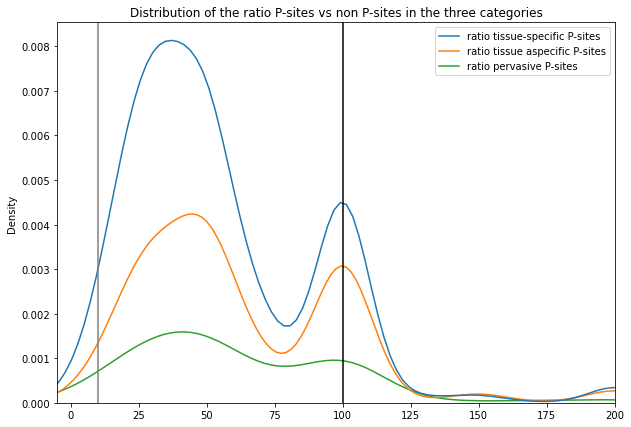

In [100]:
plt.figure(figsize=(10,7))
sns.kdeplot(data=pfam_hmm_name_all[["ratio tissue-specific P-sites", "ratio tissue aspecific P-sites", "ratio pervasive P-sites"]], palette="tab10")
plt.axvline(x=100, c="black")
plt.axvline(x=10, c="grey")
plt.title("Distribution of the ratio P-sites vs non P-sites in the three categories")
plt.xlim([-5,200])
#plt.savefig("Distribution_Psites_domains.png", format="png", bbox_inches="tight")
plt.show()

We then look at domains associated with more P-sites and domains associated with more non-phosphorylated STY-sites (dark grey and light grey line on the above graph).

<AxesSubplot:xlabel='hmm name'>

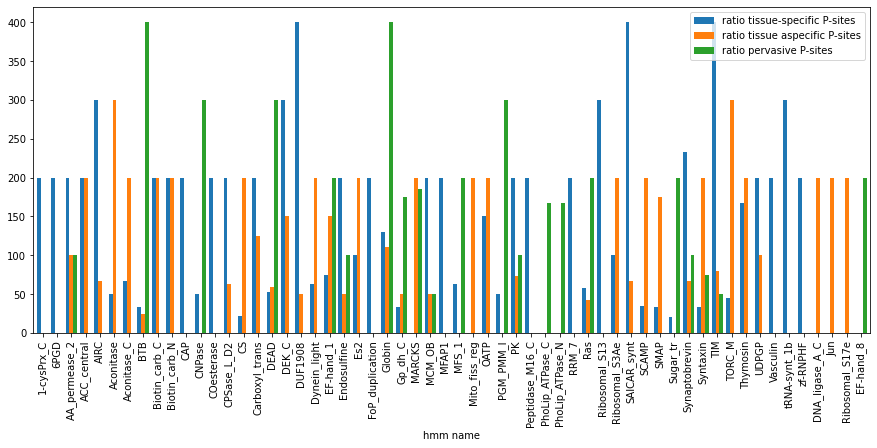

In [101]:
pfam_hmm_name_all[(pfam_hmm_name_all["ratio tissue-specific P-sites"]>150)|
             (pfam_hmm_name_all["ratio tissue aspecific P-sites"]>150)|
             (pfam_hmm_name_all["ratio pervasive P-sites"]>150)][["ratio tissue-specific P-sites", "ratio tissue aspecific P-sites", "ratio pervasive P-sites"]].plot(kind="bar", figsize=(15,6), width=0.8)
#plt.savefig("Domains associated with more Psites.png", format="png", bbox_inches="tight")

In [102]:
pfam_hmm_name_all[(pfam_hmm_name_all["ratio tissue-specific P-sites"]>150)|
             (pfam_hmm_name_all["ratio tissue aspecific P-sites"]>150)|
             (pfam_hmm_name_all["ratio pervasive P-sites"]>150)]

number of tissue-specific phosphosites  \
hmm name                                                  
1-cysPrx_C                                          2.0   
6PGD                                                2.0   
AA_permease_2                                       2.0   
ACC_central                                         2.0   
AIRC                                                3.0   
Aconitase                                           3.0   
Aconitase_C                                         2.0   
BTB                                                 1.0   
Biotin_carb_C                                       2.0   
Biotin_carb_N                                       2.0   
CAP                                                 2.0   
CNPase                                              1.0   
COesterase                                          2.0   
CPSase_L_D2                                         2.0   
CS                                                  3.0   
Carboxyl_trans                                      2.0   
DEAD                                               23.0   
DEK_C                                               3.0   
DUF1908                                             4.0   
Dynein_light                                        5.0   
EF-hand_1                                           3.0   
Endosulfine                                         4.0   
Es2                                                 2.0   
FoP_duplication                                     2.0   
Globin                                             13.0   
Gp_dh_C                                             2.0   
MARCKS                                              1.0   
MCM_OB                                              2.0   
MFAP1                                               2.0   
MFS_1                                               5.0   
Mito_fiss_reg                                       1.0   
OATP                                                3.0   
PGM_PMM_I                                           2.0   
PK                                                  4.0   
Peptidase_M16_C                                     4.0   
PhoLip_ATPase_C                                     1.0   
PhoLip_ATPase_N                                     1.0   
RRM_7                                               2.0   
Ras                                                33.0   
Ribosomal_S13                                       3.0   
Ribosomal_S3Ae                                      2.0   
SAICAR_synt                                         4.0   
SCAMP                                               6.0   
SMAP                                                4.0   
Sugar_tr                                            1.0   
Synaptobrevin                                       7.0   
Syntaxin                                            3.0   
TIM                                                 8.0   
TORC_M                                              4.0   
Thymosin                                            5.0   
UDPGP                                               2.0   
Vasculin                                            4.0   
tRNA-synt_1b                                        3.0   
zf-RNPHF                                            2.0   
DNA_ligase_A_C                                      NaN   
Jun                                                 NaN   
Ribosomal_S17e                                      NaN   
EF-hand_8                                           NaN   

                 number of tissue aspecific phosphosites  \
hmm name                                                   
1-cysPrx_C                                           NaN   
6PGD                                                 NaN   
AA_permease_2                                        1.0   
ACC_central                                          4.0   
AIRC                                                 2.0   
Aconitase                                            3.0

<AxesSubplot:xlabel='hmm name'>

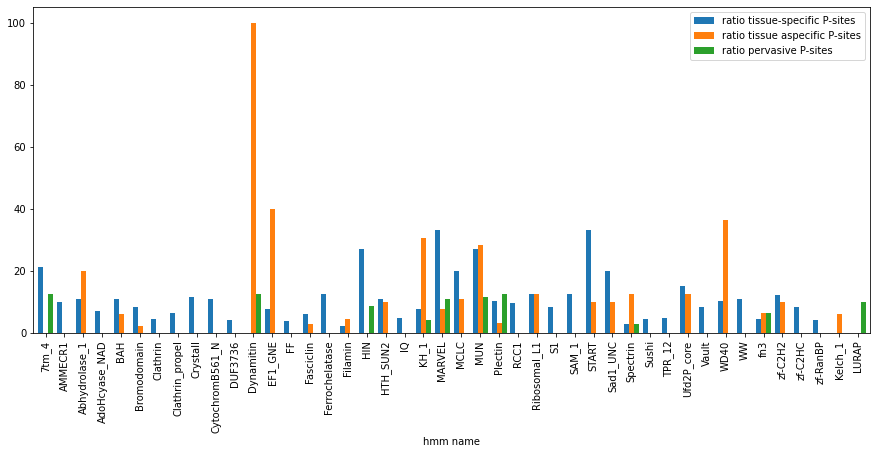

In [103]:
pfam_hmm_name_all[(pfam_hmm_name_all["ratio tissue-specific P-sites"]<13)|
             (pfam_hmm_name_all["ratio tissue aspecific P-sites"]<13)|
             (pfam_hmm_name_all["ratio pervasive P-sites"]<13)][["ratio tissue-specific P-sites", "ratio tissue aspecific P-sites", "ratio pervasive P-sites"]].plot(kind="bar", figsize=(15,6), width=0.8)
#plt.savefig("Domains associated with nonPsites.png", format="png", bbox_inches="tight")

In [104]:
pfam_hmm_name_all[(pfam_hmm_name_all["ratio tissue-specific P-sites"]<13)|
             (pfam_hmm_name_all["ratio tissue aspecific P-sites"]<13)|
             (pfam_hmm_name_all["ratio pervasive P-sites"]<13)]

number of tissue-specific phosphosites  \
hmm name                                                  
7tm_4                                               3.0   
AMMECR1                                             1.0   
Abhydrolase_1                                       1.0   
AdoHcyase_NAD                                       1.0   
BAH                                                 3.0   
Bromodomain                                         7.0   
Clathrin                                            1.0   
Clathrin_propel                                     1.0   
Crystall                                            5.0   
CytochromB561_N                                     1.0   
DUF3736                                             1.0   
Dynamitin                                           1.0   
EF1_GNE                                             1.0   
FF                                                  1.0   
Fasciclin                                           1.0   
Ferrochelatase                                      2.0   
Filamin                                             5.0   
HIN                                                 3.0   
HTH_SUN2                                            1.0   
IQ                                                  2.0   
KH_1                                                4.0   
MARVEL                                              1.0   
MCLC                                                2.0   
MUN                                                 3.0   
Plectin                                             4.0   
RCC1                                                4.0   
Ribosomal_L1                                        1.0   
S1                                                  2.0   
SAM_1                                               2.0   
START                                               2.0   
Sad1_UNC                                            2.0   
Spectrin                                            1.0   
Sushi                                               2.0   
TPR_12                                              1.0   
Ufd2P_core                                          6.0   
Vault                                               1.0   
WD40                                                7.0   
WW                                                  1.0   
fn3                                                 3.0   
zf-C2H2                                             5.0   
zf-C2HC                                             1.0   
zf-RanBP                                            2.0   
Kelch_1                                             NaN   
LURAP                                               NaN   

                 number of tissue aspecific phosphosites  \
hmm name                                                   
7tm_4                                                NaN   
AMMECR1                                              NaN   
Abhydrolase_1                                        1.0   
AdoHcyase_NAD                                        NaN   
BAH                                                  1.0   
Bromodomain                                          1.0   
Clathrin                                             NaN   
Clathrin_propel                                      NaN   
Crystall                                             NaN   
CytochromB561_N                                      NaN   
DUF3736                                              NaN   
Dynamitin                                            1.0   
EF1_GNE                                              2.0   
FF                                                   NaN   
Fasciclin                                            1.0   
Ferrochelatase                                       NaN   
Filamin                                              3.0   
HIN                                                  NaN   
HTH_SUN2                                             1.0   
IQ                                        

We repeat the same analysis for all P-sites and all non-phosphorylated STY-sites combined (irrespective of category).

In [105]:
all_sites_pfam = pd.merge(data_site, pfam_sub, how="inner")
all_sites_pfam = all_sites_pfam.loc[(all_sites_pfam["UP_POS"]>=all_sites_pfam["hmm start"])&
                                             (all_sites_pfam["UP_POS"]<=all_sites_pfam["hmm end"]),:]
all_sites_pfam

ACC_ID  UP_POS                                             tissue  \
0      A0A075B6H7      30                                               Lung   
1      A0A075B6S5      52                                    Menstrual fluid   
2      A0A0B4J2D9      52                                  Blood,Blood,Blood   
4      A0A0C4DH24      75                                    Skeletal muscle   
6      A0A0C4DH39      51  Blood, Cerebrospinal fluid, Liver, Ovary, Panc...   
...           ...     ...                                                ...   
90283      Q9Y6T7     123  Blood, Cerebrospinal fluid, Liver, Ovary, Panc...   
90376      Q9Y6X8      37  Colon,Colon,Colon,Colon,Colon,Colon,Colon,Colo...   
90377      Q9Y6X8      37  Colon,Colon,Colon,Colon,Colon,Colon,Colon,Colo...   
90378      Q9Y6X8      37  Colon,Colon,Colon,Colon,Colon,Colon,Colon,Colo...   
90379      Q9Y6X8      37  Colon,Colon,Colon,Colon,Colon,Colon,Colon,Colo...   

      modres  Adipose tissue  B-cells  Blood  Bone  Brain  Breast  ...  \
0          T               0        0      0     0      0       0  ...   
1          S               0        0      0     0      0       0  ...   
2          S               0        0      1     0      0       0  ...   
4          S               0        0      0     0      0       0  ...   
6          S               0        0      1     0      1       0  ...   
...      ...             ...      ...    ...   ...    ...     ...  ...   
90283      S               0        0      1     0      1       0  ...   
90376      T               0        0      0     0      0       0  ...   
90377      T               0        0      0     0      0       0  ...   
90378      T               0        0      0     0      0       0  ...   
90379      T               0        0      0     0      0       0  ...   

       Umbilical cord  Ureter  Urinary bladder  Urine  hmm start  hmm end  \
0                   0       0                0      0          1       91   
1                   0       0                0      0          1       92   
2                   0       0                0      0          1       92   
4                   0       0                0      0          2       91   
6                   0       0                0      0          9       91   
...               ...     ...              ...    ...        ...      ...   
90283               0       0                0      0          2      160   
90376               0       0                0      0          8       56   
90377               0       0                0      0          8       52   
90378               0       0                0      0          8       53   
90379               0       0                0      0          2       52   

          hmm name    type    clan       E-value  
0            V-set  Domain  CL0011  1.100000e-13  
1            V-set  Domain  CL0011  2.200000e-13  
2            V-set  Domain  CL0011  7.100000e-13  
4            V-set  Domain  CL0011  1.200000e-11  
6            V-set  Domain  CL0011  7.200000e-07  
...            ...     ...     ...           ...  
90283     DAGK_acc  Family  CL0701  1.200000e-53  
90376  Homeodomain  Domain  CL0123  5.200000e-03  
90377  Homeodomain  Domain  CL0123  8.300000e-03  
90378  Homeodomain  Domain  CL0123  6.000000e-02  
90379  zf_C2H2_ZHX  Domain  CL0361  1.400000e-19  

[9530 rows x 51 columns]

In [106]:
Psites_pfam_hmm_name = all_sites_pfam.groupby(["hmm name","ACC_ID","UP_POS"], as_index=False).agg({"modres": "first"})
nonP_sites_pfam_hmm_name = domain_res.groupby(["hmm name","ACC_ID","pos_int"], as_index=False).agg({"modres": "first"})

In [107]:
Psites_pfam_hmm_name = Psites_pfam_hmm_name.groupby(["hmm name"], as_index=False)["ACC_ID"].count()
Psites_pfam_hmm_name.rename(columns ={"ACC_ID": "phosphosites"}, inplace=True, )
Psites_pfam_hmm_name.set_index("hmm name", inplace=True)

nonPsites_pfam_hmm_name = nonP_sites_pfam_hmm_name.groupby(["hmm name"], as_index=False)["ACC_ID"].count()
nonPsites_pfam_hmm_name.rename(columns ={"ACC_ID": "nonPsites"}, inplace=True, )
nonPsites_pfam_hmm_name.set_index("hmm name", inplace=True)

pfam_hmm_name_all = pd.concat([Psites_pfam_hmm_name, nonPsites_pfam_hmm_name], axis=1)

In [108]:
pfam_hmm_name_all["ratio"] = pfam_hmm_name_all["phosphosites"]*100/pfam_hmm_name_all["nonPsites"]

For most Pfam annotated entries, there are slightly more than half as much P-sites than non phosphorylated canonical sites.

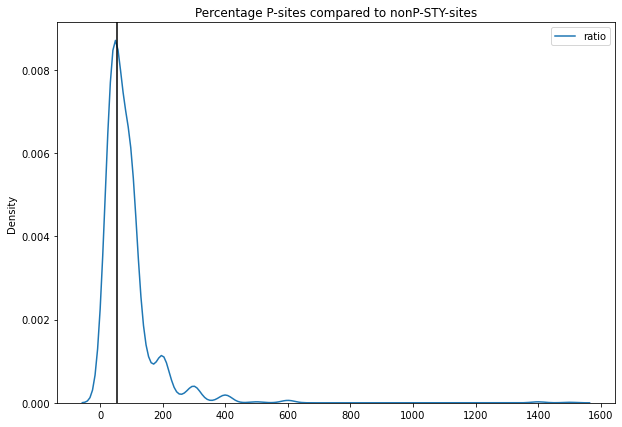

In [109]:
plt.figure(figsize=(10,7))
sns.kdeplot(data=pfam_hmm_name_all[["ratio"]], palette="tab10")
plt.axvline(x=55, c="black")
#plt.axvline(x=10, c="grey")
plt.title("Percentage P-sites compared to nonP-STY-sites")
#plt.xlim([-200,200])
#plt.savefig("Distribution_Psites_domains.png", format="png", bbox_inches="tight")
plt.show()

In [110]:
pfam_hmm_name_all[pfam_hmm_name_all["ratio"]>100]

phosphosites  nonPsites       ratio
hmm name                                            
1-cysPrx_C                2.0        1.0  200.000000
3HCDH                     2.0        1.0  200.000000
3HCDH_N                   2.0        1.0  200.000000
4_1_CTD                  12.0        7.0  171.428571
6PGD                      2.0        1.0  200.000000
...                       ...        ...         ...
p53-inducible11           2.0        1.0  200.000000
tRNA-synt_1b              3.0        1.0  300.000000
zf-C2H2                   6.0        5.0  120.000000
zf-CW                     2.0        1.0  200.000000
zf-RNPHF                  2.0        1.0  200.000000

[282 rows x 3 columns]

We now calculate the percentage P-sites versus non-phosphorylated canonical sites per tissue, to identify tissues having more of less P-sites than the 'average' tissue. For these tissues, we will compare the domains involved.

In [111]:
data_nonP["countSTY"] = data_nonP["peptide"].str.count("S") + data_nonP["peptide"].str.count("T") + data_nonP["peptide"].str.count("Y")
data_nonP["countS"] = data_nonP["peptide"].str.count("S") # total count S (P and nonP)
data_nonP["countT"] = data_nonP["peptide"].str.count("T")
data_nonP["countY"] = data_nonP["peptide"].str.count("Y")
data_nonP = pd.get_dummies(data_nonP, columns=["modres"])
data_nonP_peptide = data_nonP.groupby(["peptide"], as_index=False).agg({"countSTY": "first", "countS": "first", "countT": "first",
                                                                   "countY": "first", "UP_POS": "count", "modres_S": "sum",
                                                                   "modres_T": "sum", "modres_Y": "sum", "ACC_ID": "first"})

data_nonP_peptide["countSTYnonP"] = data_nonP_peptide["countSTY"] - data_nonP_peptide["UP_POS"]
data_nonP_peptide["countSnonP"] = data_nonP_peptide["countS"] - data_nonP_peptide["modres_S"]
data_nonP_peptide["countTnonP"] = data_nonP_peptide["countT"] - data_nonP_peptide["modres_T"]
data_nonP_peptide["countYnonP"] = data_nonP_peptide["countY"] - data_nonP_peptide["modres_Y"]
data_nonP_peptide.head()

peptide  countSTY  countS  countT  countY  UP_POS  \
0   AAAAAAAATMALAAPSSPTPESPTMLTK         7       3       4       0       3   
1           AAAAAATAPPSPGPAQPGPR         2       1       1       0       1   
2        AAAAAATAPPSPGPAQPGPRAQR         2       1       1       0       1   
3  AAAAGLGHPASPGGSEDGPPGSEEEDAAR         3       3       0       0       1   
4                    AAAAGSLDRSR         2       2       0       0       1   

   modres_S  modres_T  modres_Y  ACC_ID  countSTYnonP  countSnonP  countTnonP  \
0         3         0         0  Q9NQS7             4           0           4   
1         1         0         0  Q6SPF0             1           0           1   
2         0         1         0  Q6SPF0             1           1           0   
3         1         0         0  Q99856             2           2           0   
4         1         0         0  Q9Y2U8             1           1           0   

   countYnonP  
0           0  
1           0  
2           0  
3           0  
4           0

In [112]:
data_nonP_counts = pd.merge(data_nonP_peptide[["ACC_ID", "peptide", "modres_S", "modres_T", "modres_Y", "countSnonP", "countTnonP", "countYnonP", "countSTYnonP"]], data_nonP, on=["ACC_ID", "peptide", "modres_S", "modres_T", "modres_Y"])

In [113]:
data_nonP_counts

ACC_ID                        peptide  modres_S  modres_T  modres_Y  \
0      Q6SPF0           AAAAAATAPPSPGPAQPGPR         1         0         0   
1      Q6SPF0        AAAAAATAPPSPGPAQPGPRAQR         0         1         0   
2      Q99856  AAAAGLGHPASPGGSEDGPPGSEEEDAAR         1         0         0   
3      Q9Y2U8                    AAAAGSLDRSR         1         0         0   
4      O43295                AAACPSSPHKIPLTR         1         0         0   
...       ...                            ...       ...       ...       ...   
11355  O15197               YYIDPSTYEDPCQAIR         0         0         1   
11356  Q16739         YYISANVTGFKCVTGMSCLMRK         1         0         0   
11357  Q9Y6R7               YYPLGEVFYPGPECER         0         0         1   
11358  Q8NFC6                 YYSDSDDELTVEQR         1         0         0   
11359  P07900            YYTSASGDEMVSLKDYCTR         1         0         0   

       countSnonP  countTnonP  countYnonP  countSTYnonP  UP_POS  ...  143  \
0               0           1           0             1     161  ...  NaN   
1               1           0           0             1     157  ...  NaN   
2               2           0           0             2      77  ...  NaN   
3               1           0           0             1     331  ...  NaN   
4               1           1           0             2     894  ...  NaN   
...           ...         ...         ...           ...     ...  ...  ...   
11355           1           1           2             4     644  ...  NaN   
11356           1           2           2             5     212  ...  NaN   
11357           0           0           2             2    4801  ...  NaN   
11358           1           1           2             4     484  ...  NaN   
11359           2           2           3             7     476  ...  NaN   

       144  145  146  147  148  countSTY  countS  countT  countY  
0      NaN  NaN  NaN  NaN  NaN         2       1       1       0  
1      NaN  NaN  NaN  NaN  NaN         2       1       1       0  
2      NaN  NaN  NaN  NaN  NaN         3       3       0       0  
3      NaN  NaN  NaN  NaN  NaN         2       2       0       0  
4      NaN  NaN  NaN  NaN  NaN         3       2       1       0  
...    ...  ...  ...  ...  ...       ...     ...     ...     ...  
11355  NaN  NaN  NaN  NaN  NaN         5       1       1       3  
11356  NaN  NaN  NaN  NaN  NaN         6       2       2       2  
11357  NaN  NaN  NaN  NaN  NaN         3       0       0       3  
11358  NaN  NaN  NaN  NaN  NaN         5       2       1       2  
11359  NaN  NaN  NaN  NaN  NaN         8       3       2       3  

[11360 rows x 254 columns]

In [114]:
tspec_sites_allP = pd.merge(data_nonP_counts, tspec_sites, how="inner", on=["ACC_ID", "UP_POS"])
taspec_sites_allP = pd.merge(data_nonP_counts, taspec_sites, how="inner", on=["ACC_ID", "UP_POS"])
gen_sites_allP = pd.merge(data_nonP_counts, gen_sites, how="inner", on=["ACC_ID", "UP_POS"])

In [115]:
df_spread_tissues = pd.DataFrame({"Tissue": list_tissues_STY})
list_tspec = []
list_taspec = []
list_gen = []
list_nonPtspec = []
list_nonPtaspec = []
list_nonPgen = []
for tissue in list_tissues_STY:
    count_tspec = tspec_sites_allP.loc[tspec_sites_allP[tissue]==1, :].groupby(["ACC_ID", "UP_POS"], as_index=False).agg({"peptide": "first"}).shape[0]
    count_taspec = taspec_sites_allP.loc[taspec_sites_allP[tissue]==1, :].groupby(["ACC_ID", "UP_POS"], as_index=False).agg({"peptide": "first"}).shape[0]
    count_gen = gen_sites_allP.loc[gen_sites_allP[tissue]==1, :].groupby(["ACC_ID", "UP_POS"], as_index=False).agg({"peptide": "first"}).shape[0]
    list_tspec.append(count_tspec)
    list_taspec.append(count_taspec)
    list_gen.append(count_gen)
    count_tspec = tspec_sites_allP.loc[tspec_sites_allP[tissue]==1, :]["countSTYnonP"].sum()
    count_taspec = taspec_sites_allP.loc[taspec_sites_allP[tissue]==1, :]["countSTYnonP"].sum()
    count_gen = gen_sites_allP.loc[gen_sites_allP[tissue]==1, :]["countSTYnonP"].sum()
    list_nonPtspec.append(count_tspec)
    list_nonPtaspec.append(count_taspec)
    list_nonPgen.append(count_gen)
    
df_spread_tissues["Number of tissue-specific phosphosites"] = list_tspec
df_spread_tissues["Number of tissue aspecific phosphosites"] = list_taspec
df_spread_tissues["Number of pervasive phosphosites"] = list_gen
df_spread_tissues["Number of non-phosphorylated near tissue-specific phosphosites"] = list_nonPtspec
df_spread_tissues["Number of non-phosphorylated near tissue aspecific phosphosites"] = list_nonPtaspec
df_spread_tissues["Number of non-phosphorylated near pervasive phosphosites"] = list_nonPgen
df_spread_tissues

Tissue  Number of tissue-specific phosphosites  \
0              Adipose tissue                                       0   
1                     B-cells                                      11   
2                       Blood                                     981   
3                        Bone                                       1   
4                       Brain                                      81   
5                      Breast                                      14   
6         Cerebrospinal fluid                                       7   
7                      Cervix                                       7   
8                       Colon                                    2107   
9               Dental plaque                                       9   
10                  Esophagus                                       1   
11                        Eye                                       4   
12           Follicular fluid                                       0   
13                      Heart                                      20   
14                       Hela                                       0   
15                     Kidney                                      10   
16                      Liver                                     128   
17                       Lung                                     764   
18                 Lymph node                                    1388   
19            Menstrual fluid                                       1   
20                  Monocytes                                      18   
21               Nasal polyps                                       0   
22                   NK-cells                                      14   
23                      Ovary                                       1   
24                   Pancreas                                      18   
25           Palatine tonsils                                       0   
26              Parotid gland                                       0   
27                       PBMC                                     477   
28  Peritoneal dialysis fluid                                       0   
29                   Placenta                                     406   
30            Skeletal muscle                                     117   
31                       Skin                                     361   
32            Small intestine                                      62   
33            Synovial tissue                                       2   
34                    T-cells                                       0   
35                     Testis                                     184   
36                      Tooth                                       1   
37             Umbilical cord                                      47   
38                     Ureter                                       3   
39            Urinary bladder                                      26   
40                      Urine                                      32   

    Number of tissue aspecific phosphosites  Number of pervasive phosphosites  \
0                                       116                               107   
1                                        35                                80   
2                                      1114                              1057   
3                                         1                                 0   
4                                        77                               777   
5                                        17                                22   
6                                        17                               744   
7                                         4                                 6   
8                                      1792                               568   
9                                         1                                 4   
10                                        4                      

In [116]:
df_spread_tissues["ratio_tspecP-sites/nonPsites near tspec sites"] = df_spread_tissues["Number of tissue-specific phosphosites"]*100/df_spread_tissues["Number of non-phosphorylated near tissue-specific phosphosites"]
df_spread_tissues["ratio_taspecP-sites/nonPsites near taspec sites"] = df_spread_tissues["Number of tissue aspecific phosphosites"]*100/df_spread_tissues["Number of non-phosphorylated near tissue aspecific phosphosites"]
df_spread_tissues["ratio_pervasive-sites/nonPsites near pervasive sites"] = df_spread_tissues["Number of pervasive phosphosites"]*100/df_spread_tissues["Number of non-phosphorylated near pervasive phosphosites"]

<AxesSubplot:title={'center':'Percentage P-sites versus non-phosphoryalted canonical sites'}, xlabel='Tissue'>

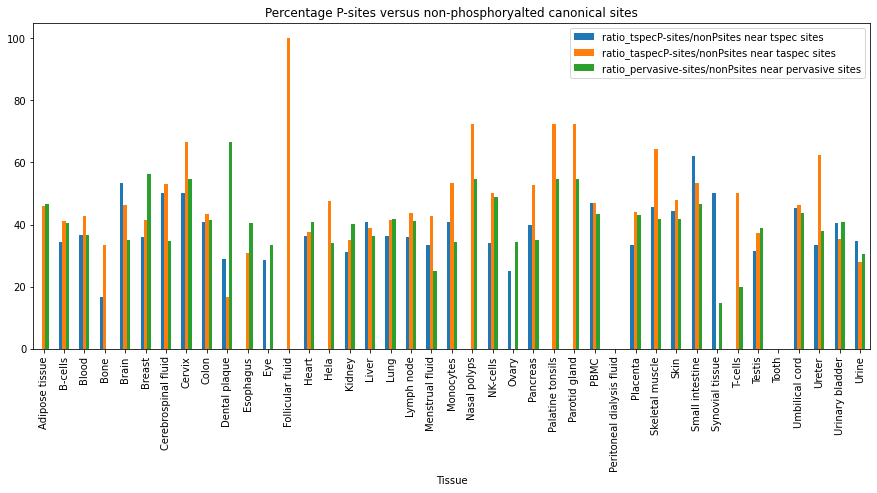

In [117]:
df_spread_tissues[["Tissue", "ratio_tspecP-sites/nonPsites near tspec sites", "ratio_taspecP-sites/nonPsites near taspec sites", "ratio_pervasive-sites/nonPsites near pervasive sites"]].plot(kind="bar", x="Tissue", figsize=(15,6), title="Percentage P-sites versus non-phosphoryalted canonical sites")
#plt.savefig("Percentage Psites compared to nonPsites.png", format="png", bbox_inches="tight")

In [118]:
df_spread_tissues

Tissue  Number of tissue-specific phosphosites  \
0              Adipose tissue                                       0   
1                     B-cells                                      11   
2                       Blood                                     981   
3                        Bone                                       1   
4                       Brain                                      81   
5                      Breast                                      14   
6         Cerebrospinal fluid                                       7   
7                      Cervix                                       7   
8                       Colon                                    2107   
9               Dental plaque                                       9   
10                  Esophagus                                       1   
11                        Eye                                       4   
12           Follicular fluid                                       0   
13                      Heart                                      20   
14                       Hela                                       0   
15                     Kidney                                      10   
16                      Liver                                     128   
17                       Lung                                     764   
18                 Lymph node                                    1388   
19            Menstrual fluid                                       1   
20                  Monocytes                                      18   
21               Nasal polyps                                       0   
22                   NK-cells                                      14   
23                      Ovary                                       1   
24                   Pancreas                                      18   
25           Palatine tonsils                                       0   
26              Parotid gland                                       0   
27                       PBMC                                     477   
28  Peritoneal dialysis fluid                                       0   
29                   Placenta                                     406   
30            Skeletal muscle                                     117   
31                       Skin                                     361   
32            Small intestine                                      62   
33            Synovial tissue                                       2   
34                    T-cells                                       0   
35                     Testis                                     184   
36                      Tooth                                       1   
37             Umbilical cord                                      47   
38                     Ureter                                       3   
39            Urinary bladder                                      26   
40                      Urine                                      32   

    Number of tissue aspecific phosphosites  Number of pervasive phosphosites  \
0                                       116                               107   
1                                        35                                80   
2                                      1114                              1057   
3                                         1                                 0   
4                                        77                               777   
5                                        17                                22   
6                                        17                               744   
7                                         4                                 6   
8                                      1792                               568   
9                                         1                                 4   
10                                        4                      

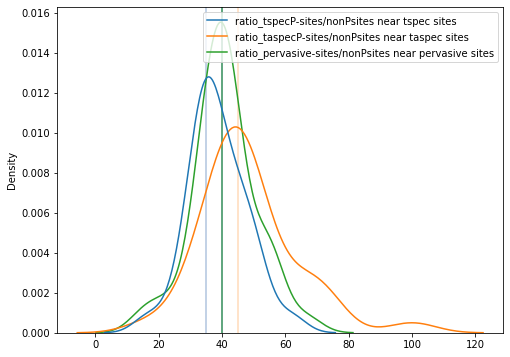

In [119]:
plt.figure(figsize=(8,6))
plt.axvline(x=35, c="lightsteelblue")
plt.axvline(x=45, c="peachpuff")
plt.axvline(x=40, c="seagreen", label="tspec")
sns.kdeplot(data = df_spread_tissues[["Tissue", "ratio_tspecP-sites/nonPsites near tspec sites", "ratio_taspecP-sites/nonPsites near taspec sites", "ratio_pervasive-sites/nonPsites near pervasive sites"]], palette="tab10")
#plt.savefig("Distribution of percentage Psites compared to nonPsites.png", format="png", bbox_inches="tight")
plt.show()

In [120]:
print(df_spread_tissues["ratio_tspecP-sites/nonPsites near tspec sites"].describe())
print(df_spread_tissues["ratio_taspecP-sites/nonPsites near taspec sites"].describe())
print(df_spread_tissues["ratio_pervasive-sites/nonPsites near pervasive sites"].describe())

count    33.000000
mean           inf
std            NaN
min      16.666667
25%      33.553719
50%      36.522710
75%      45.525292
max            inf
Name: ratio_tspecP-sites/nonPsites near tspec sites, dtype: float64
count    37.000000
mean           inf
std            NaN
min      16.666667
25%      41.176471
50%      46.274510
75%      53.333333
max            inf
Name: ratio_taspecP-sites/nonPsites near taspec sites, dtype: float64
count    37.000000
mean     40.704201
std      10.064110
min      14.814815
25%      34.952767
50%      40.757238
75%      43.877551
max      66.666667
Name: ratio_pervasive-sites/nonPsites near pervasive sites, dtype: float64


In [121]:
df_spread_tissues[(((df_spread_tissues["ratio_tspecP-sites/nonPsites near tspec sites"]>36.52)
                    &(df_spread_tissues["ratio_taspecP-sites/nonPsites near taspec sites"]<46.27)
                   &(df_spread_tissues["ratio_pervasive-sites/nonPsites near pervasive sites"]<40.76))|
                  ((df_spread_tissues["ratio_tspecP-sites/nonPsites near tspec sites"]<36.52)
                    &(df_spread_tissues["ratio_taspecP-sites/nonPsites near taspec sites"]>46.27)
                   &(df_spread_tissues["ratio_pervasive-sites/nonPsites near pervasive sites"]<40.76))|
                  ((df_spread_tissues["ratio_tspecP-sites/nonPsites near tspec sites"]<36.52)
                    &(df_spread_tissues["ratio_taspecP-sites/nonPsites near taspec sites"]<46.27)
                   &(df_spread_tissues["ratio_pervasive-sites/nonPsites near pervasive sites"]>40.76)))]

Tissue  Number of tissue-specific phosphosites  \
2             Blood                                     981   
5            Breast                                      14   
9     Dental plaque                                       9   
10        Esophagus                                       1   
13            Heart                                      20   
16            Liver                                     128   
17             Lung                                     764   
18       Lymph node                                    1388   
23            Ovary                                       1   
29         Placenta                                     406   
38           Ureter                                       3   
39  Urinary bladder                                      26   

    Number of tissue aspecific phosphosites  Number of pervasive phosphosites  \
2                                      1114                              1057   
5                                        17                                22   
9                                         1                                 4   
10                                        4                                21   
13                                       15                                20   
16                                      324                              1018   
17                                      871                               417   
18                                     1317                               502   
23                                        1                               738   
29                                      170                               237   
38                                        5                                14   
39                                      165                               183   

    Number of non-phosphorylated near tissue-specific phosphosites  \
2                                                2686                
5                                                  39                
9                                                  31                
10                                                  0                
13                                                 55                
16                                                313                
17                                               2108                
18                                               3848                
23                                                  4                
29                                               1210                
38                                                  9                
39                                                 64                

    Number of non-phosphorylated near tissue aspecific phosphosites  \
2                                                2601                 
5                                                  41                 
9                                                   6                 
10                                                 13                 
13                                                 40                 
16                                                832                 
17                                               2107                 
18                                               3014                 
23                                                  0                 
29                                                387                 
38                                                  8                 
39                                                468                 

    Number of non-phosphorylated near pervasive phosphosites  \
2                                                2895          
5                                                  39          
9                                                   6          
10                                              

In [122]:
df_spread_tissues[(((df_spread_tissues["ratio_tspecP-sites/nonPsites near tspec sites"]<36.52)
                    &(df_spread_tissues["ratio_taspecP-sites/nonPsites near taspec sites"]>46.27)
                   &(df_spread_tissues["ratio_pervasive-sites/nonPsites near pervasive sites"]>40.76))|
                  ((df_spread_tissues["ratio_tspecP-sites/nonPsites near tspec sites"]>36.52)
                    &(df_spread_tissues["ratio_taspecP-sites/nonPsites near taspec sites"]<46.27)
                   &(df_spread_tissues["ratio_pervasive-sites/nonPsites near pervasive sites"]>40.76))|
                  ((df_spread_tissues["ratio_tspecP-sites/nonPsites near tspec sites"]>36.52)
                    &(df_spread_tissues["ratio_taspecP-sites/nonPsites near taspec sites"]>46.27)
                   &(df_spread_tissues["ratio_pervasive-sites/nonPsites near pervasive sites"]<40.76)))]

Tissue  Number of tissue-specific phosphosites  \
4                 Brain                                      81   
6   Cerebrospinal fluid                                       7   
8                 Colon                                    2107   
20            Monocytes                                      18   
22             NK-cells                                      14   
24             Pancreas                                      18   

    Number of tissue aspecific phosphosites  Number of pervasive phosphosites  \
4                                        77                               777   
6                                        17                               744   
8                                      1792                               568   
20                                        8                               741   
22                                       49                               100   
24                                       30                               794   

    Number of non-phosphorylated near tissue-specific phosphosites  \
4                                                 152                
6                                                  14                
8                                                5159                
20                                                 44                
22                                                 41                
24                                                 45                

    Number of non-phosphorylated near tissue aspecific phosphosites  \
4                                                 166                 
6                                                  32                 
8                                                4131                 
20                                                 15                 
22                                                 98                 
24                                                 57                 

    Number of non-phosphorylated near pervasive phosphosites  \
4                                                2223          
6                                                2152          
8                                                1375          
20                                               2146          
22                                                205          
24                                               2268          

    ratio_tspecP-sites/nonPsites near tspec sites  \
4                                       53.289474   
6                                       50.000000   
8                                       40.841248   
20                                      40.909091   
22                                      34.146341   
24                                      40.000000   

    ratio_taspecP-sites/nonPsites near taspec sites  \
4                                         46.385542   
6                                         53.125000   
8                                         43.379327   
20                                        53.333333   
22                                        50.000000   
24                                        52.631579   

    ratio_pervasive-sites/nonPsites near pervasive sites  
4                                           34.952767     
6                                           34.572491     
8                                           41.309091     
20                                          34.529357     
22                                          48.780488     
24                                          35.008818

In [123]:
list_tissues_up = df_spread_tissues[(((df_spread_tissues["ratio_tspecP-sites/nonPsites near tspec sites"]>36.52)
                    &(df_spread_tissues["ratio_taspecP-sites/nonPsites near taspec sites"]<46.27)
                   &(df_spread_tissues["ratio_pervasive-sites/nonPsites near pervasive sites"]<40.76))|
                  ((df_spread_tissues["ratio_tspecP-sites/nonPsites near tspec sites"]<36.52)
                    &(df_spread_tissues["ratio_taspecP-sites/nonPsites near taspec sites"]>46.27)
                   &(df_spread_tissues["ratio_pervasive-sites/nonPsites near pervasive sites"]<40.76))|
                  ((df_spread_tissues["ratio_tspecP-sites/nonPsites near tspec sites"]<36.52)
                    &(df_spread_tissues["ratio_taspecP-sites/nonPsites near taspec sites"]<46.27)
                   &(df_spread_tissues["ratio_pervasive-sites/nonPsites near pervasive sites"]>40.76)))]["Tissue"].to_list()
print(list_tissues_up)

['Blood', 'Breast', 'Dental plaque', 'Esophagus', 'Heart', 'Liver', 'Lung', 'Lymph node', 'Ovary', 'Placenta', 'Ureter', 'Urinary bladder']


In [124]:
list_tissues_down = df_spread_tissues[(((df_spread_tissues["ratio_tspecP-sites/nonPsites near tspec sites"]<36.52)
                    &(df_spread_tissues["ratio_taspecP-sites/nonPsites near taspec sites"]>46.27)
                   &(df_spread_tissues["ratio_pervasive-sites/nonPsites near pervasive sites"]>40.76))|
                  ((df_spread_tissues["ratio_tspecP-sites/nonPsites near tspec sites"]>36.52)
                    &(df_spread_tissues["ratio_taspecP-sites/nonPsites near taspec sites"]<46.27)
                   &(df_spread_tissues["ratio_pervasive-sites/nonPsites near pervasive sites"]>40.76))|
                  ((df_spread_tissues["ratio_tspecP-sites/nonPsites near tspec sites"]>36.52)
                    &(df_spread_tissues["ratio_taspecP-sites/nonPsites near taspec sites"]>46.27)
                   &(df_spread_tissues["ratio_pervasive-sites/nonPsites near pervasive sites"]<40.76)))]["Tissue"].to_list()
print(list_tissues_down)

['Brain', 'Cerebrospinal fluid', 'Colon', 'Monocytes', 'NK-cells', 'Pancreas']


We now select the entries the tissues having a higher percentage P-sites than non-phosphorylated STY-sites in Pfam entries in any of the three categories but not in the other two, and the ones having a lower percentage P-sites than non-phosphorylated STY-sites in Pfam entries in any of the three cateogries but not in the other two. Tresholds are are based on the distribution of percentages P-site/nonPsite, calculated per category, per tissue. First, all tissues belonging to either of the aforementioned groups are considered.

In [125]:
tspec_sites_allP_plot = tspec_sites_allP[(tspec_sites_allP["Blood"]==1)|(tspec_sites_allP["Breast"]==1)|(tspec_sites_allP["Dental plaque"]==1)|(tspec_sites_allP["Esophagus"]==1)|(tspec_sites_allP["Heart"]==1)|(tspec_sites_allP["Liver"]==1)|(tspec_sites_allP["Lung"]==1)|(tspec_sites_allP["Lymph node"]==1)|(tspec_sites_allP["Ovary"]==1)|(tspec_sites_allP["Placenta"]==1)|(tspec_sites_allP["Ureter"]==1)|(tspec_sites_allP["Urinary bladder"]==1)|(tspec_sites_allP["Brain"]==1)|(tspec_sites_allP["Cerebrospinal fluid"]==1)|(tspec_sites_allP["Colon"]==1)|(tspec_sites_allP["Monocytes"]==1)|(tspec_sites_allP["NK-cells"]==1)|(tspec_sites_allP["Pancreas"]==1)]
taspec_sites_allP_plot = taspec_sites_allP[(taspec_sites_allP["Blood"]==1)|(taspec_sites_allP["Breast"]==1)|(taspec_sites_allP["Dental plaque"]==1)|(taspec_sites_allP["Esophagus"]==1)|(taspec_sites_allP["Heart"]==1)|(taspec_sites_allP["Liver"]==1)|(taspec_sites_allP["Lung"]==1)|(taspec_sites_allP["Lymph node"]==1)|(taspec_sites_allP["Ovary"]==1)|(taspec_sites_allP["Placenta"]==1)|(taspec_sites_allP["Ureter"]==1)|(taspec_sites_allP["Urinary bladder"]==1)|(taspec_sites_allP["Brain"]==1)|(taspec_sites_allP["Cerebrospinal fluid"]==1)|(taspec_sites_allP["Colon"]==1)|(taspec_sites_allP["Monocytes"]==1)|(taspec_sites_allP["NK-cells"]==1)|(taspec_sites_allP["Pancreas"]==1)]
gen_sites_allP_plot = gen_sites_allP[(gen_sites_allP["Blood"]==1)|(gen_sites_allP["Breast"]==1)|(gen_sites_allP["Dental plaque"]==1)|(gen_sites_allP["Esophagus"]==1)|(gen_sites_allP["Heart"]==1)|(gen_sites_allP["Liver"]==1)|(gen_sites_allP["Lung"]==1)|(gen_sites_allP["Lymph node"]==1)|(gen_sites_allP["Ovary"]==1)|(gen_sites_allP["Placenta"]==1)|(gen_sites_allP["Ureter"]==1)|(gen_sites_allP["Urinary bladder"]==1)|(gen_sites_allP["Brain"]==1)|(gen_sites_allP["Cerebrospinal fluid"]==1)|(gen_sites_allP["Colon"]==1)|(gen_sites_allP["Monocytes"]==1)|(gen_sites_allP["NK-cells"]==1)|(gen_sites_allP["Pancreas"]==1)]

In [126]:
tspec_sites_allP_plot_pfam = pd.DataFrame({})
for n in list_S:
    print(n)
    tspec_sites_allP_sub = tspec_sites_allP_plot[~tspec_sites_allP_plot[n].isnull()]
    if tspec_sites_allP_sub.shape[0] != 0:
        tspec_sites_allP_sub[n]= tspec_sites_allP_sub[n].astype(int)
        tspec_sites_allP_sub.rename({n: "pos_int"}, axis=1, inplace=True)
        sub = pd.merge(tspec_sites_allP_sub, pfam_sub, how="inner", on=["ACC_ID"])
        sub = sub.loc[(sub["pos_int"]>=sub["hmm start"])&
                                             (sub["pos_int"]<=sub["hmm end"]),:]
        sub["res"] = "S"
        tspec_sites_allP_plot_pfam = tspec_sites_allP_plot_pfam.append(sub)
        tspec_sites_allP_sub.rename({"pos_int": n}, axis=1, inplace=True)
for n in list_T:
    print(n)
    tspec_sites_allP_sub = tspec_sites_allP_plot[~tspec_sites_allP_plot[n].isnull()]
    if tspec_sites_allP_sub.shape[0] != 0:
        tspec_sites_allP_sub[n]= tspec_sites_allP_sub[n].astype(int)
        tspec_sites_allP_sub.rename({n: "pos_int"}, axis=1, inplace=True)
        sub = pd.merge(tspec_sites_allP_sub, pfam_sub, how="inner", on=["ACC_ID"])
        sub = sub.loc[(sub["pos_int"]>=sub["hmm start"])&
                                             (sub["pos_int"]<=sub["hmm end"]),:]
        sub["res"] = "S"
        tspec_sites_allP_plot_pfam = tspec_sites_allP_plot_pfam.append(sub)
        tspec_sites_allP_sub.rename({"pos_int": n}, axis=1, inplace=True)
for n in list_Y:
    print(n)
    tspec_sites_allP_sub = tspec_sites_allP_plot[~tspec_sites_allP_plot[n].isnull()]
    if tspec_sites_allP_sub.shape[0] != 0:
        tspec_sites_allP_sub[n]= tspec_sites_allP_sub[n].astype(int)
        tspec_sites_allP_sub.rename({n: "pos_int"}, axis=1, inplace=True)
        sub = pd.merge(tspec_sites_allP_sub, pfam_sub, how="inner", on=["ACC_ID"])
        sub = sub.loc[(sub["pos_int"]>=sub["hmm start"])&
                                             (sub["pos_int"]<=sub["hmm end"]),:]
        sub["res"] = "S"
        tspec_sites_allP_plot_pfam = tspec_sites_allP_plot_pfam.append(sub)
        tspec_sites_allP_sub.rename({"pos_int": n}, axis=1, inplace=True)       
tspec_sites_allP_plot_pfam

S0
S1
S2


C:\Users\hannedvo\AppData\Local\Temp\8/ipykernel_24100/1300539484.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tspec_sites_allP_sub[n]= tspec_sites_allP_sub[n].astype(int)
C:\Anaconda3\lib\site-packages\pandas\core\frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


S3
S4
S5
S6
S7
S8
S9
S10
S11
S12
S13
S14
S15
S16
S17
S18
S19
S20
S21
S22
S23
S24
S25
S26
S27
S28
T0
T1
T2


C:\Users\hannedvo\AppData\Local\Temp\8/ipykernel_24100/1300539484.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tspec_sites_allP_sub[n]= tspec_sites_allP_sub[n].astype(int)


T3
T4
T5
T6
T7
T8
T9
T10
T11
T12
T13
T14
T15
T16
T17
T18
T19
T20
T21
T22
T23
T24
T25
T26
T27
T28
Y0
Y1
Y2
Y3


C:\Users\hannedvo\AppData\Local\Temp\8/ipykernel_24100/1300539484.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tspec_sites_allP_sub[n]= tspec_sites_allP_sub[n].astype(int)


Y4
Y5
Y6
Y7
Y8
Y9
Y10
Y11
Y12
Y13
Y14
Y15
Y16
Y17
Y18
Y19
Y20
Y21
Y22
Y23
Y24
Y25
Y26
Y27
Y28


ACC_ID                         peptide  modres_S  modres_T  modres_Y  \
8   Q8NC51                SAAQAAAQTNSNAAGK         1         0         0   
9   Q8NC51                SAAQAAAQTNSNAAGK         1         0         0   
12  Q13153                  SAEDYNSSNALNVK         1         0         0   
14  Q15058       SAENTILPEEETVVQNTSAGKDPLK         0         1         0   
31  Q53SZ7             SAGLQSPNSPRCFSGPPPR         1         0         0   
..     ...                             ...       ...       ...       ...   
3   P57105    GPSGLGFNIVGGTDQQYVSNDSGIYVSR         1         0         0   
8   P07737      MAGWNAYIDNLMADGTCQDAAIVGYK         0         1         0   
12  P02675    NSVDELNNNVEAVSQTSSSSFQYMYLLK         0         0         1   
23  P62330     NWYVQPSCATSGDGLYEGLTWLTSNYK         1         0         0   
4   P42126  LYQSNLVLVSAINGACPAGGCLVALTCDYR         1         0         0   

    countSnonP  countTnonP  countYnonP  countSTYnonP  UP_POS  ...  Urine  \
8            1           1           0             2      63  ...      0   
9            1           1           0             2      63  ...      0   
12           2           0           1             3     155  ...      0   
14           2           2           0             4     345  ...      0   
31           3           0           0             3     375  ...      0   
..         ...         ...         ...           ...     ...  ...    ...   
3            3           1           2             6      21  ...      0   
8            0           0           2             2      16  ...      0   
12           6           1           1             8     147  ...      0   
23           2           3           3             8     158  ...      0   
4            1           1           2             4     144  ...      0   

    Total  hmm start  hmm end        hmm name    type     clan        E-value  \
8       1          1      116  HABP4_PAI-RBP1  Family  No_clan   1.400000e-31   
9       1          1      152        IHABP4_N  Family  No_clan   3.500000e-40   
12      1          1      264         Pkinase  Domain   CL0016   1.800000e-69   
14      1          1      332         Kinesin  Domain   CL0023  1.300000e-107   
31      1          1      399         DUF4679  Family  No_clan  2.000000e-211   
..    ...        ...      ...             ...     ...      ...            ...   
3       1          2       82             PDZ  Domain   CL0466   1.700000e-18   
8       1          2      127        Profilin  Domain   CL0431   4.300000e-23   
12      1          2      220    Fibrinogen_C  Domain   CL0422   1.600000e-93   
23      1          2      174             Arf  Domain   CL0023   5.300000e-75   
4       1          3      245           ECH_1  Domain   CL0127   3.000000e-88   

    res  S0  
8     S NaN  
9     S NaN  
12    S NaN  
14    S NaN  
31    S NaN  
..  ...  ..  
3     S NaN  
8     S NaN  
12    S NaN  
23    S NaN  
4     S NaN  

[4658 rows x 306 columns]

In [127]:
taspec_sites_allP_plot_pfam = pd.DataFrame({})
for n in list_S:
    print(n)
    taspec_sites_allP_sub = taspec_sites_allP_plot[~taspec_sites_allP_plot[n].isnull()]
    if taspec_sites_allP_sub.shape[0] != 0:
        taspec_sites_allP_sub[n]= taspec_sites_allP_sub[n].astype(int)
        taspec_sites_allP_sub.rename({n: "pos_int"}, axis=1, inplace=True)
        sub = pd.merge(taspec_sites_allP_sub, pfam_sub, how="inner", on=["ACC_ID"])
        sub = sub.loc[(sub["pos_int"]>=sub["hmm start"])&
                                             (sub["pos_int"]<=sub["hmm end"]),:]
        sub["res"] = "S"
        taspec_sites_allP_plot_pfam = taspec_sites_allP_plot_pfam.append(sub)
        taspec_sites_allP_sub.rename({"pos_int": n}, axis=1, inplace=True)
for n in list_T:
    print(n)
    taspec_sites_allP_sub = taspec_sites_allP_plot[~taspec_sites_allP_plot[n].isnull()]
    if taspec_sites_allP_sub.shape[0] != 0:
        taspec_sites_allP_sub[n]= taspec_sites_allP_sub[n].astype(int)
        taspec_sites_allP_sub.rename({n: "pos_int"}, axis=1, inplace=True)
        sub = pd.merge(taspec_sites_allP_sub, pfam_sub, how="inner", on=["ACC_ID"])
        sub = sub.loc[(sub["pos_int"]>=sub["hmm start"])&
                                             (sub["pos_int"]<=sub["hmm end"]),:]
        sub["res"] = "S"
        taspec_sites_allP_plot_pfam = taspec_sites_allP_plot_pfam.append(sub)
        taspec_sites_allP_sub.rename({"pos_int": n}, axis=1, inplace=True)
for n in list_Y:
    print(n)
    taspec_sites_allP_sub = taspec_sites_allP_plot[~taspec_sites_allP_plot[n].isnull()]
    if taspec_sites_allP_sub.shape[0] != 0:
        taspec_sites_allP_sub[n]= taspec_sites_allP_sub[n].astype(int)
        taspec_sites_allP_sub.rename({n: "pos_int"}, axis=1, inplace=True)
        sub = pd.merge(taspec_sites_allP_sub, pfam_sub, how="inner", on=["ACC_ID"])
        sub = sub.loc[(sub["pos_int"]>=sub["hmm start"])&
                                             (sub["pos_int"]<=sub["hmm end"]),:]
        sub["res"] = "S"
        taspec_sites_allP_plot_pfam = taspec_sites_allP_plot_pfam.append(sub)
        taspec_sites_allP_sub.rename({"pos_int": n}, axis=1, inplace=True)       
taspec_sites_allP_plot_pfam

S0
S1
S2


C:\Users\hannedvo\AppData\Local\Temp\8/ipykernel_24100/1564743463.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  taspec_sites_allP_sub[n]= taspec_sites_allP_sub[n].astype(int)
C:\Anaconda3\lib\site-packages\pandas\core\frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


S3
S4
S5
S6
S7
S8
S9
S10
S11
S12
S13
S14
S15
S16
S17
S18
S19
S20
S21
S22
S23
S24
S25
S26
S27
S28
T0
T1
T2
T3
T4


C:\Users\hannedvo\AppData\Local\Temp\8/ipykernel_24100/1564743463.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  taspec_sites_allP_sub[n]= taspec_sites_allP_sub[n].astype(int)


T5
T6
T7
T8
T9
T10
T11
T12
T13
T14
T15
T16
T17
T18
T19
T20
T21
T22
T23
T24
T25
T26
T27
T28
Y0
Y1
Y2
Y3
Y4


C:\Users\hannedvo\AppData\Local\Temp\8/ipykernel_24100/1564743463.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  taspec_sites_allP_sub[n]= taspec_sites_allP_sub[n].astype(int)


Y5
Y6
Y7
Y8
Y9
Y10
Y11
Y12
Y13
Y14
Y15
Y16
Y17
Y18
Y19
Y20
Y21
Y22
Y23
Y24
Y25
Y26
Y27
Y28


ACC_ID                         peptide  modres_S  modres_T  modres_Y  \
15  Q9H6Z4       SAGGSSPEGGEDSDREDGNYCPPVK         1         0         0   
16  O15446                   SALAPNLLTSGKK         0         1         0   
24  Q14739                 SASASHQADIKEARR         1         0         0   
26  Q9NPI6                   SASPYHGFTIVNR         1         0         0   
49  P55884              SDSRAQAVSEDAGGNEGR         1         0         0   
..     ...                             ...       ...       ...       ...   
1   P11940  MNPSAPSYPMASLYVGDLHPDVTEAMLYEK         1         0         0   
2   P11940  MNPSAPSYPMASLYVGDLHPDVTEAMLYEK         1         0         0   
3   P11940  MNPSAPSYPMASLYVGDLHPDVTEAMLYEK         1         0         0   
4   P11940  MNPSAPSYPMASLYVGDLHPDVTEAMLYEK         1         0         0   
5   O94804   RDSFIGTPYWMAPEVVMCETMKDTPYDYK         0         1         0   

    countSnonP  countTnonP  countYnonP  countSTYnonP  UP_POS  ...  Urine  \
15           3           0           1             4     101  ...      0   
16           2           0           0             2     171  ...      0   
24           2           0           0             2     101  ...      0   
26           1           1           1             3      62  ...      0   
49           2           0           0             2     125  ...      0   
..         ...         ...         ...           ...     ...  ...    ...   
1            2           1           3             6      12  ...      0   
2            2           1           3             6      12  ...      0   
3            2           1           3             6      12  ...      0   
4            2           1           3             6      12  ...      0   
5            1           2           3             6     195  ...      0   

    Total  hmm start  hmm end      hmm name    type     clan        E-value  \
15      2          1      108       Ran_BP1  Domain   CL0266   3.200000e-10   
16      2          2      205  RNA_polI_A34  Family   CL0662   1.500000e-33   
24      3         19      432    ERG4_ERG24  Family   CL0115  1.300000e-157   
26      2          2      116          DCP1  Domain   CL0266   8.300000e-37   
49      2          1      194         eIF2A  Repeat   CL0186   1.900000e-63   
..    ...        ...      ...           ...     ...      ...            ...   
1       4          1       69         RRM_1  Domain   CL0221   1.600000e-17   
2       4          1       69         RRM_1  Domain   CL0221   1.800000e-16   
3       4          1       69         RRM_1  Domain   CL0221   9.500000e-15   
4       4          1       66          PABP  Family  No_clan   1.800000e-27   
5       3          2      264       Pkinase  Domain   CL0016   2.600000e-60   

    res  S0  
15    S NaN  
16    S NaN  
24    S NaN  
26    S NaN  
49    S NaN  
..  ...  ..  
1     S NaN  
2     S NaN  
3     S NaN  
4     S NaN  
5     S NaN  

[1716 rows x 306 columns]

In [128]:
gen_sites_allP_plot_pfam = pd.DataFrame({})
for n in list_S:
    print(n)
    gen_sites_allP_sub = gen_sites_allP_plot[~gen_sites_allP_plot[n].isnull()]
    if gen_sites_allP_sub.shape[0] != 0:
        gen_sites_allP_sub[n]= gen_sites_allP_sub[n].astype(int)
        gen_sites_allP_sub.rename({n: "pos_int"}, axis=1, inplace=True)
        sub = pd.merge(gen_sites_allP_sub, pfam_sub, how="inner", on=["ACC_ID"])
        sub = sub.loc[(sub["pos_int"]>=sub["hmm start"])&
                                             (sub["pos_int"]<=sub["hmm end"]),:]
        sub["res"] = "S"
        gen_sites_allP_plot_pfam = gen_sites_allP_plot_pfam.append(sub)
        gen_sites_allP_sub.rename({"pos_int": n}, axis=1, inplace=True)
for n in list_T:
    print(n)
    gen_sites_allP_sub = gen_sites_allP_plot[~gen_sites_allP_plot[n].isnull()]
    if gen_sites_allP_sub.shape[0] != 0:
        gen_sites_allP_sub[n]= gen_sites_allP_sub[n].astype(int)
        gen_sites_allP_sub.rename({n: "pos_int"}, axis=1, inplace=True)
        sub = pd.merge(gen_sites_allP_sub, pfam_sub, how="inner", on=["ACC_ID"])
        sub = sub.loc[(sub["pos_int"]>=sub["hmm start"])&
                                             (sub["pos_int"]<=sub["hmm end"]),:]
        sub["res"] = "S"
        gen_sites_allP_plot_pfam = gen_sites_allP_plot_pfam.append(sub)
        gen_sites_allP_sub.rename({"pos_int": n}, axis=1, inplace=True)
for n in list_Y:
    print(n)
    gen_sites_allP_sub = gen_sites_allP_plot[~gen_sites_allP_plot[n].isnull()]
    if gen_sites_allP_sub.shape[0] != 0:
        gen_sites_allP_sub[n]= gen_sites_allP_sub[n].astype(int)
        gen_sites_allP_sub.rename({n: "pos_int"}, axis=1, inplace=True)
        sub = pd.merge(gen_sites_allP_sub, pfam_sub, how="inner", on=["ACC_ID"])
        sub = sub.loc[(sub["pos_int"]>=sub["hmm start"])&
                                             (sub["pos_int"]<=sub["hmm end"]),:]
        sub["res"] = "S"
        gen_sites_allP_plot_pfam = gen_sites_allP_plot_pfam.append(sub)
        gen_sites_allP_sub.rename({"pos_int": n}, axis=1, inplace=True)       
gen_sites_allP_plot_pfam

S0
S1
S2
S3
S4
S5


C:\Users\hannedvo\AppData\Local\Temp\8/ipykernel_24100/693015349.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gen_sites_allP_sub[n]= gen_sites_allP_sub[n].astype(int)
C:\Anaconda3\lib\site-packages\pandas\core\frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


S6
S7
S8
S9
S10
S11
S12
S13
S14
S15
S16
S17
S18
S19
S20
S21
S22
S23
S24
S25
S26
S27
S28
T0
T1
T2
T3
T4


C:\Users\hannedvo\AppData\Local\Temp\8/ipykernel_24100/693015349.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gen_sites_allP_sub[n]= gen_sites_allP_sub[n].astype(int)


T5
T6
T7
T8
T9
T10
T11
T12
T13
T14
T15
T16
T17
T18
T19
T20
T21
T22
T23
T24
T25
T26
T27
T28
Y0


C:\Users\hannedvo\AppData\Local\Temp\8/ipykernel_24100/693015349.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gen_sites_allP_sub[n]= gen_sites_allP_sub[n].astype(int)


Y1
Y2
Y3
Y4
Y5
Y6
Y7
Y8
Y9
Y10
Y11
Y12
Y13
Y14
Y15
Y16
Y17
Y18
Y19
Y20
Y21
Y22
Y23
Y24
Y25
Y26
Y27
Y28


ACC_ID                         peptide  modres_S  modres_T  modres_Y  \
18  P02787             SAGWNIPIGLLYCDLPEPR         0         0         1   
19  P02787             SAGWNIPIGLLYCDLPEPR         0         0         1   
20  P61266                SAKDSDDEEEVVHVDR         1         0         0   
21  P61266                SAKDSDDEEEVVHVDR         1         0         0   
61  O00151                SEHKVWSPLVTEEGKR         1         0         0   
..     ...                             ...       ...       ...       ...   
22  P19823  SLPGESEEMMEEVDQVTLYSYKVQSTITSR         1         0         0   
23  P19823  SLPGESEEMMEEVDQVTLYSYKVQSTITSR         1         0         0   
24  P19823  SLPGESEEMMEEVDQVTLYSYKVQSTITSR         1         0         0   
12  Q9HA47     LPETTVVYPADVVLFEGILVFYSQEIR         1         0         0   
0   A6NIJ9     KKAFSTCSSHMIVVSITYGSCMFIYIK         1         0         0   

    countSnonP  countTnonP  countYnonP  countSTYnonP  UP_POS  ...  Urine  \
18           1           0           0             1     155  ...      0   
19           1           0           0             1     155  ...      0   
20           1           0           0             1      14  ...      0   
21           1           0           0             1      14  ...      0   
61           1           1           0             2      90  ...      0   
..         ...         ...         ...           ...     ...  ...    ...   
22           4           3           2             9      60  ...      0   
23           4           3           2             9      60  ...      0   
24           4           3           2             9      60  ...      0   
12           0           2           2             4     145  ...      0   
0            4           2           2             8     247  ...      0   

    Total  hmm start  hmm end     hmm name    type     clan        E-value  \
18     10          1      329  Transferrin  Domain   CL0177  4.200000e-171   
19     10          1      329  Transferrin  Domain   CL0177   7.800000e-89   
20      7          1      199     Syntaxin  Domain   CL0445   2.700000e-57   
21      7          1       52        SNARE  Family  No_clan   6.500000e-18   
61      6          1       93      DUF4749  Family  No_clan   1.900000e-24   
..    ...        ...      ...          ...     ...      ...            ...   
22     11          1      175          VWA  Domain   CL0128   1.000000e-17   
23     11          1      189     ITI_HC_C  Family  No_clan   7.000000e-67   
24     11          1      111          VIT  Family   CL0029   3.800000e-25   
12      7          1      195          PRK  Domain   CL0023   1.300000e-49   
0       7          6      277        7tm_4  Family   CL0192   3.400000e-40   

    res  S0  
18    S NaN  
19    S NaN  
20    S NaN  
21    S NaN  
61    S NaN  
..  ...  ..  
22    S NaN  
23    S NaN  
24    S NaN  
12    S NaN  
0     S NaN  

[844 rows x 306 columns]

In [129]:
tspec_sites_plot_pfam = pd.merge(tspec_sites_allP_plot, pfam_sub, how="inner", on=["ACC_ID"])
tspec_sites_plot_pfam = tspec_sites_plot_pfam[(tspec_sites_plot_pfam["UP_POS"]>=tspec_sites_plot_pfam["hmm start"])&
                                             (tspec_sites_plot_pfam["UP_POS"]<=tspec_sites_plot_pfam["hmm end"])]
taspec_sites_plot_pfam = pd.merge(taspec_sites_allP_plot, pfam_sub, how="inner", on=["ACC_ID"])
tapsec_sites_plot_pfam = taspec_sites_plot_pfam[(taspec_sites_plot_pfam["UP_POS"]>=taspec_sites_plot_pfam["hmm start"])&
                                             (taspec_sites_plot_pfam["UP_POS"]<=taspec_sites_plot_pfam["hmm end"])]
gen_sites_plot_pfam = pd.merge(gen_sites_allP_plot, pfam_sub, how="inner", on=["ACC_ID"])
gen_sites_plot_pfam = gen_sites_plot_pfam[(gen_sites_plot_pfam["UP_POS"]>=gen_sites_plot_pfam["hmm start"])&
                                             (gen_sites_plot_pfam["UP_POS"]<=gen_sites_plot_pfam["hmm end"])]

In [130]:
print(list_tissues_up)
print(list_tissues_down)

['Blood', 'Breast', 'Dental plaque', 'Esophagus', 'Heart', 'Liver', 'Lung', 'Lymph node', 'Ovary', 'Placenta', 'Ureter', 'Urinary bladder']
['Brain', 'Cerebrospinal fluid', 'Colon', 'Monocytes', 'NK-cells', 'Pancreas']


We now split the dataset in two: the domains from tissues associated with more phosphorylation are stored in the dataframe ending on _hmm_ and the domains from tissues associated with less phosphorylation are stored in a dataframe ending on _hmm1_. Per domain, only one entry for a site is retained. Then, the sites per domain are counted, per category, for the domains associated with tissues with more and less phosphorylation seperately. Below, the calculations for the non-phosphorylated STY-sites follow.

In [131]:
tspec_sites_allP_plot_hmm = tspec_sites_allP_plot_pfam[(tspec_sites_allP_plot_pfam["Blood"]==1)|(tspec_sites_allP_plot_pfam["Breast"]==1)|(tspec_sites_allP_plot_pfam["Dental plaque"]==1)|(tspec_sites_allP_plot_pfam["Esophagus"]==1)|(tspec_sites_allP_plot_pfam["Heart"]==1)|(tspec_sites_allP_plot_pfam["Liver"]==1)|(tspec_sites_allP_plot_pfam["Lung"]==1)|(tspec_sites_allP_plot_pfam["Lymph node"]==1)|(tspec_sites_allP_plot_pfam["Ovary"]==1)|(tspec_sites_allP_plot_pfam["Placenta"]==1)|(tspec_sites_allP_plot_pfam["Ureter"]==1)|(tspec_sites_allP_plot_pfam["Urinary bladder"]==1)]
tspec_sites_allP_plot_hmm1 = tspec_sites_allP_plot_pfam[(tspec_sites_allP_plot_pfam["Brain"]==1)|(tspec_sites_allP_plot_pfam["Cerebrospinal fluid"]==1)|(tspec_sites_allP_plot_pfam["Colon"]==1)|(tspec_sites_allP_plot_pfam["Monocytes"]==1)|(tspec_sites_allP_plot_pfam["NK-cells"]==1)|(tspec_sites_allP_plot_pfam["Pancreas"]==1)]
taspec_sites_allP_plot_hmm = taspec_sites_allP_plot_pfam[(taspec_sites_allP_plot_pfam["Blood"]==1)|(taspec_sites_allP_plot_pfam["Breast"]==1)|(taspec_sites_allP_plot_pfam["Dental plaque"]==1)|(taspec_sites_allP_plot_pfam["Esophagus"]==1)|(taspec_sites_allP_plot_pfam["Heart"]==1)|(taspec_sites_allP_plot_pfam["Liver"]==1)|(taspec_sites_allP_plot_pfam["Lung"]==1)|(taspec_sites_allP_plot_pfam["Lymph node"]==1)|(taspec_sites_allP_plot_pfam["Ovary"]==1)|(taspec_sites_allP_plot_pfam["Placenta"]==1)|(taspec_sites_allP_plot_pfam["Ureter"]==1)|(taspec_sites_allP_plot_pfam["Urinary bladder"]==1)]
taspec_sites_allP_plot_hmm1 = taspec_sites_allP_plot_pfam[(taspec_sites_allP_plot_pfam["Brain"]==1)|(taspec_sites_allP_plot_pfam["Cerebrospinal fluid"]==1)|(taspec_sites_allP_plot_pfam["Colon"]==1)|(taspec_sites_allP_plot_pfam["Monocytes"]==1)|(taspec_sites_allP_plot_pfam["NK-cells"]==1)|(taspec_sites_allP_plot_pfam["Pancreas"]==1)]
gen_sites_allP_plot_hmm = gen_sites_allP_plot_pfam[(gen_sites_allP_plot_pfam["Blood"]==1)|(gen_sites_allP_plot_pfam["Breast"]==1)|(gen_sites_allP_plot_pfam["Dental plaque"]==1)|(gen_sites_allP_plot_pfam["Esophagus"]==1)|(gen_sites_allP_plot_pfam["Heart"]==1)|(gen_sites_allP_plot_pfam["Liver"]==1)|(gen_sites_allP_plot_pfam["Lung"]==1)|(gen_sites_allP_plot_pfam["Lymph node"]==1)|(gen_sites_allP_plot_pfam["Ovary"]==1)|(gen_sites_allP_plot_pfam["Placenta"]==1)|(gen_sites_allP_plot_pfam["Ureter"]==1)|(gen_sites_allP_plot_pfam["Urinary bladder"]==1)]
gen_sites_allP_plot_hmm1 = gen_sites_allP_plot_pfam[(gen_sites_allP_plot_pfam["Brain"]==1)|(gen_sites_allP_plot_pfam["Cerebrospinal fluid"]==1)|(gen_sites_allP_plot_pfam["Colon"]==1)|(gen_sites_allP_plot_pfam["Monocytes"]==1)|(gen_sites_allP_plot_pfam["NK-cells"]==1)|(gen_sites_allP_plot_pfam["Pancreas"]==1)]

In [132]:
tspec_sites_allP_plot_hmm = tspec_sites_allP_plot_hmm.groupby(["hmm name", "ACC_ID", "pos_int"], as_index=False).agg({"modres": "first"})
taspec_sites_allP_plot_hmm = taspec_sites_allP_plot_hmm.groupby(["hmm name", "ACC_ID", "pos_int"], as_index=False).agg({"modres": "first"})
gen_sites_allP_plot_hmm = gen_sites_allP_plot_hmm.groupby(["hmm name", "ACC_ID", "pos_int"], as_index=False).agg({"modres": "first"})
tspec_sites_allP_plot_hmm1 = tspec_sites_allP_plot_hmm1.groupby(["hmm name", "ACC_ID", "pos_int"], as_index=False).agg({"modres": "first"})
taspec_sites_allP_plot_hmm1 = taspec_sites_allP_plot_hmm1.groupby(["hmm name", "ACC_ID", "pos_int"], as_index=False).agg({"modres": "first"})
gen_sites_allP_plot_hmm1 = gen_sites_allP_plot_hmm1.groupby(["hmm name", "ACC_ID", "pos_int"], as_index=False).agg({"modres": "first"})

In [133]:
tspec_sites_allP_plot_hmm = tspec_sites_allP_plot_hmm.groupby(["hmm name"], as_index=False)["ACC_ID"].count()
tspec_sites_allP_plot_hmm.rename(columns ={"ACC_ID": "canonical sites near tissue-specific phosphosites_higher"}, inplace=True, )
tspec_sites_allP_plot_hmm.set_index("hmm name", inplace=True)
tspec_sites_allP_plot_hmm1 = tspec_sites_allP_plot_hmm1.groupby(["hmm name"], as_index=False)["ACC_ID"].count()
tspec_sites_allP_plot_hmm1.rename(columns ={"ACC_ID": "canonical sites near tissue-specific phosphosites_lower"}, inplace=True, )
tspec_sites_allP_plot_hmm1.set_index("hmm name", inplace=True)

taspec_sites_allP_plot_hmm = taspec_sites_allP_plot_hmm.groupby(["hmm name"], as_index=False)["ACC_ID"].count()
taspec_sites_allP_plot_hmm.rename(columns ={"ACC_ID": "canonical sites near tissue aspecific phosphosites_higher"}, inplace=True, )
taspec_sites_allP_plot_hmm.set_index("hmm name", inplace=True)
taspec_sites_allP_plot_hmm1 = taspec_sites_allP_plot_hmm1.groupby(["hmm name"], as_index=False)["ACC_ID"].count()
taspec_sites_allP_plot_hmm1.rename(columns ={"ACC_ID": "canonical sites near tissue aspecific phosphosites_lower"}, inplace=True, )
taspec_sites_allP_plot_hmm1.set_index("hmm name", inplace=True)

gen_sites_allP_plot_hmm = gen_sites_allP_plot_hmm.groupby(["hmm name"], as_index=False)["ACC_ID"].count()
gen_sites_allP_plot_hmm.rename(columns ={"ACC_ID": "canonical sites near pervasive phosphosites_higher"}, inplace=True, )
gen_sites_allP_plot_hmm.set_index("hmm name", inplace=True)
gen_sites_allP_plot_hmm1 = gen_sites_allP_plot_hmm1.groupby(["hmm name"], as_index=False)["ACC_ID"].count()
gen_sites_allP_plot_hmm1.rename(columns ={"ACC_ID": "canonical sites near pervasive phosphosites_lower"}, inplace=True, )
gen_sites_allP_plot_hmm1.set_index("hmm name", inplace=True)

pfam_hmm_name_nonP = pd.concat([tspec_sites_allP_plot_hmm, taspec_sites_allP_plot_hmm, gen_sites_allP_plot_hmm, tspec_sites_allP_plot_hmm1, taspec_sites_allP_plot_hmm1, gen_sites_allP_plot_hmm1], axis=1)

The same type of calculations are done for the phosphorylated canonical sites.

In [134]:
tspec_sites_allP_plot_hmm = tspec_sites_plot_pfam[(tspec_sites_plot_pfam["Blood"]==1)|(tspec_sites_plot_pfam["Breast"]==1)|(tspec_sites_plot_pfam["Dental plaque"]==1)|(tspec_sites_plot_pfam["Esophagus"]==1)|(tspec_sites_plot_pfam["Heart"]==1)|(tspec_sites_plot_pfam["Liver"]==1)|(tspec_sites_plot_pfam["Lung"]==1)|(tspec_sites_plot_pfam["Lymph node"]==1)|(tspec_sites_plot_pfam["Ovary"]==1)|(tspec_sites_plot_pfam["Placenta"]==1)|(tspec_sites_plot_pfam["Ureter"]==1)|(tspec_sites_plot_pfam["Urinary bladder"]==1)]
tspec_sites_allP_plot_hmm1 = tspec_sites_plot_pfam[(tspec_sites_plot_pfam["Brain"]==1)|(tspec_sites_plot_pfam["Cerebrospinal fluid"]==1)|(tspec_sites_plot_pfam["Colon"]==1)|(tspec_sites_plot_pfam["Monocytes"]==1)|(tspec_sites_plot_pfam["NK-cells"]==1)|(tspec_sites_plot_pfam["Pancreas"]==1)]
taspec_sites_allP_plot_hmm = taspec_sites_plot_pfam[(taspec_sites_plot_pfam["Blood"]==1)|(taspec_sites_plot_pfam["Breast"]==1)|(taspec_sites_plot_pfam["Dental plaque"]==1)|(taspec_sites_plot_pfam["Esophagus"]==1)|(taspec_sites_plot_pfam["Heart"]==1)|(taspec_sites_plot_pfam["Liver"]==1)|(taspec_sites_plot_pfam["Lung"]==1)|(taspec_sites_plot_pfam["Lymph node"]==1)|(taspec_sites_plot_pfam["Ovary"]==1)|(taspec_sites_plot_pfam["Placenta"]==1)|(taspec_sites_plot_pfam["Ureter"]==1)|(taspec_sites_plot_pfam["Urinary bladder"]==1)]
taspec_sites_allP_plot_hmm1 = taspec_sites_plot_pfam[(taspec_sites_plot_pfam["Brain"]==1)|(taspec_sites_plot_pfam["Cerebrospinal fluid"]==1)|(taspec_sites_plot_pfam["Colon"]==1)|(taspec_sites_plot_pfam["Monocytes"]==1)|(taspec_sites_plot_pfam["NK-cells"]==1)|(taspec_sites_plot_pfam["Pancreas"]==1)]
gen_sites_allP_plot_hmm = gen_sites_plot_pfam[(gen_sites_plot_pfam["Blood"]==1)|(gen_sites_plot_pfam["Breast"]==1)|(gen_sites_plot_pfam["Dental plaque"]==1)|(gen_sites_plot_pfam["Esophagus"]==1)|(gen_sites_plot_pfam["Heart"]==1)|(gen_sites_plot_pfam["Liver"]==1)|(gen_sites_plot_pfam["Lung"]==1)|(gen_sites_plot_pfam["Lymph node"]==1)|(gen_sites_plot_pfam["Ovary"]==1)|(gen_sites_plot_pfam["Placenta"]==1)|(gen_sites_plot_pfam["Ureter"]==1)|(gen_sites_plot_pfam["Urinary bladder"]==1)]
gen_sites_allP_plot_hmm1 = gen_sites_plot_pfam[(gen_sites_plot_pfam["Brain"]==1)|(gen_sites_plot_pfam["Cerebrospinal fluid"]==1)|(gen_sites_plot_pfam["Colon"]==1)|(gen_sites_plot_pfam["Monocytes"]==1)|(gen_sites_plot_pfam["NK-cells"]==1)|(gen_sites_plot_pfam["Pancreas"]==1)]

tspec_sites_plot_hmm = tspec_sites_allP_plot_hmm.groupby(["hmm name", "ACC_ID", "UP_POS"],as_index=False).agg({"modres": "first"})
taspec_sites_plot_hmm = taspec_sites_allP_plot_hmm.groupby(["hmm name", "ACC_ID", "UP_POS"],as_index=False).agg({"modres": "first"})
gen_sites_plot_hmm = gen_sites_allP_plot_hmm.groupby(["hmm name", "ACC_ID", "UP_POS"],as_index=False).agg({"modres": "first"})
tspec_sites_plot_hmm1 = tspec_sites_allP_plot_hmm1.groupby(["hmm name", "ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"})
taspec_sites_plot_hmm1 = taspec_sites_allP_plot_hmm1.groupby(["hmm name", "ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"})
gen_sites_plot_hmm1 = gen_sites_allP_plot_hmm1.groupby(["hmm name", "ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"})

In [135]:
tspec_sites_plot_hmm = tspec_sites_plot_pfam.groupby(["hmm name"], as_index=False)["ACC_ID"].count()
tspec_sites_plot_hmm.rename(columns ={"ACC_ID": "tissue-specific phosphosites_higher"}, inplace=True, )
tspec_sites_plot_hmm.set_index("hmm name", inplace=True)
tspec_sites_plot_hmm1 = tspec_sites_plot_pfam.groupby(["hmm name"], as_index=False)["ACC_ID"].count()
tspec_sites_plot_hmm1.rename(columns ={"ACC_ID": "tissue-specific phosphosites_lower"}, inplace=True, )
tspec_sites_plot_hmm1.set_index("hmm name", inplace=True)

taspec_sites_plot_hmm = taspec_sites_plot_pfam.groupby(["hmm name"], as_index=False)["ACC_ID"].count()
taspec_sites_plot_hmm.rename(columns ={"ACC_ID": "tissue aspecific phosphosites_higher"}, inplace=True, )
taspec_sites_plot_hmm.set_index("hmm name", inplace=True)
taspec_sites_plot_hmm1 = taspec_sites_plot_pfam.groupby(["hmm name"], as_index=False)["ACC_ID"].count()
taspec_sites_plot_hmm1.rename(columns ={"ACC_ID": "tissue aspecific phosphosites_lower"}, inplace=True, )
taspec_sites_plot_hmm1.set_index("hmm name", inplace=True)

gen_sites_plot_hmm = gen_sites_plot_pfam.groupby(["hmm name"], as_index=False)["ACC_ID"].count()
gen_sites_plot_hmm.rename(columns ={"ACC_ID": "pervasive phosphosites_higher"}, inplace=True, )
gen_sites_plot_hmm.set_index("hmm name", inplace=True)
gen_sites_plot_hmm1 = gen_sites_plot_pfam.groupby(["hmm name"], as_index=False)["ACC_ID"].count()
gen_sites_plot_hmm1.rename(columns ={"ACC_ID": "pervasive phosphosites_lower"}, inplace=True, )
gen_sites_plot_hmm1.set_index("hmm name", inplace=True)

pfam_hmm_name_P = pd.concat([tspec_sites_plot_hmm, taspec_sites_plot_hmm, gen_sites_plot_hmm, tspec_sites_plot_hmm1, taspec_sites_plot_hmm1, gen_sites_plot_hmm1], axis=1)


In [136]:
pfam_hmm_name_P

tissue-specific phosphosites_higher  \
hmm name                                            
14-3-3                                        4.0   
2-oxoacid_dh                                  1.0   
4_1_CTD                                       4.0   
7tm_1                                         5.0   
7tm_2                                         2.0   
...                                           ...   
TUSC2                                         NaN   
UPAR_LY6                                      NaN   
Voldacs                                       NaN   
Vps53_N                                       NaN   
wnt                                           NaN   

              tissue aspecific phosphosites_higher  \
hmm name                                             
14-3-3                                         6.0   
2-oxoacid_dh                                   NaN   
4_1_CTD                                        6.0   
7tm_1                                          3.0   
7tm_2                                          NaN   
...                                            ...   
TUSC2                                          NaN   
UPAR_LY6                                       NaN   
Voldacs                                        NaN   
Vps53_N                                        NaN   
wnt                                            NaN   

              pervasive phosphosites_higher  \
hmm name                                      
14-3-3                                  1.0   
2-oxoacid_dh                            NaN   
4_1_CTD                                 NaN   
7tm_1                                   NaN   
7tm_2                                   NaN   
...                                     ...   
TUSC2                                   1.0   
UPAR_LY6                                1.0   
Voldacs                                 1.0   
Vps53_N                                 1.0   
wnt                                     1.0   

              tissue-specific phosphosites_lower  \
hmm name                                           
14-3-3                                       4.0   
2-oxoacid_dh                                 1.0   
4_1_CTD                                      4.0   
7tm_1                                        5.0   
7tm_2                                        2.0   
...                                          ...   
TUSC2                                        NaN   
UPAR_LY6                                     NaN   
Voldacs                                      NaN   
Vps53_N                                      NaN   
wnt                                          NaN   

              tissue aspecific phosphosites_lower  \
hmm name                                            
14-3-3                                        6.0   
2-oxoacid_dh                                  NaN   
4_1_CTD                                       6.0   
7tm_1                                         3.0   
7tm_2                                         NaN   
...                                           ...   
TUSC2                                         NaN   
UPAR_LY6                                      NaN   
Voldacs                                       NaN   
Vps53_N                                       NaN   
wnt                                           NaN   

              pervasive phosphosites_lower  
hmm name                                    
14-3-3                                 1.0  
2-oxoacid_dh                           NaN  
4_1_CTD                                NaN  
7tm_1                                  NaN  
7tm_2                                  NaN  
...                                    ...  
TUSC2                                  1.0  
UPAR_LY6                               1.0  
Voldacs                                1.0  
Vps53_N                                1.0  
wnt                                    1.0  

[2265 rows x 6 columns]

In [137]:
pfam_hmm_name_both = pd.concat([pfam_hmm_name_P, pfam_hmm_name_nonP], axis=1)
pfam_hmm_name_both["ratio tissue-specific Psites/nonP near tissue-specific Psites_higher"] = pfam_hmm_name_both["tissue-specific phosphosites_higher"]*100/pfam_hmm_name_both["canonical sites near tissue-specific phosphosites_higher"]
pfam_hmm_name_both["ratio tissue aspecific Psites/nonP near tissue aspecific Psites_higher"] = pfam_hmm_name_both["tissue aspecific phosphosites_higher"]*100/pfam_hmm_name_both["canonical sites near tissue aspecific phosphosites_higher"]
pfam_hmm_name_both["ratio pervasive Psites/nonP near pervasive Psites_higher"] = pfam_hmm_name_both["pervasive phosphosites_higher"]*100/pfam_hmm_name_both["canonical sites near pervasive phosphosites_higher"]
pfam_hmm_name_both["ratio tissue-specific Psites/nonP near tissue-specific Psites_lower"] = pfam_hmm_name_both["tissue-specific phosphosites_lower"]*100/pfam_hmm_name_both["canonical sites near tissue-specific phosphosites_lower"]
pfam_hmm_name_both["ratio tissue aspecific Psites/nonP near tissue aspecific Psites_lower"] = pfam_hmm_name_both["tissue aspecific phosphosites_lower"]*100/pfam_hmm_name_both["canonical sites near tissue aspecific phosphosites_lower"]
pfam_hmm_name_both["ratio pervasive Psites/nonP near pervasive Psites_lower"] = pfam_hmm_name_both["pervasive phosphosites_lower"]*100/pfam_hmm_name_both["canonical sites near pervasive phosphosites_lower"]

For both the more and less phosphorylated tissues, the percentage P-sites/non-canonical STY-sites is calculated per domain.

In [138]:
pfam_hmm_name_both

tissue-specific phosphosites_higher  \
hmm name                                             
14-3-3                                         4.0   
2-oxoacid_dh                                   1.0   
4_1_CTD                                        4.0   
7tm_1                                          5.0   
7tm_2                                          2.0   
...                                            ...   
FA_FANCE                                       NaN   
OCRE                                           NaN   
FAM47                                          NaN   
Nab1                                           NaN   
Peptidase_C50                                  NaN   

               tissue aspecific phosphosites_higher  \
hmm name                                              
14-3-3                                          6.0   
2-oxoacid_dh                                    NaN   
4_1_CTD                                         6.0   
7tm_1                                           3.0   
7tm_2                                           NaN   
...                                             ...   
FA_FANCE                                        NaN   
OCRE                                            NaN   
FAM47                                           NaN   
Nab1                                            NaN   
Peptidase_C50                                   NaN   

               pervasive phosphosites_higher  \
hmm name                                       
14-3-3                                   1.0   
2-oxoacid_dh                             NaN   
4_1_CTD                                  NaN   
7tm_1                                    NaN   
7tm_2                                    NaN   
...                                      ...   
FA_FANCE                                 NaN   
OCRE                                     NaN   
FAM47                                    NaN   
Nab1                                     NaN   
Peptidase_C50                            NaN   

               tissue-specific phosphosites_lower  \
hmm name                                            
14-3-3                                        4.0   
2-oxoacid_dh                                  1.0   
4_1_CTD                                       4.0   
7tm_1                                         5.0   
7tm_2                                         2.0   
...                                           ...   
FA_FANCE                                      NaN   
OCRE                                          NaN   
FAM47                                         NaN   
Nab1                                          NaN   
Peptidase_C50                                 NaN   

               tissue aspecific phosphosites_lower  \
hmm name                                             
14-3-3                                         6.0   
2-oxoacid_dh                                   NaN   
4_1_CTD                                        6.0   
7tm_1                                          3.0   
7tm_2                                          NaN   
...                                            ...   
FA_FANCE                                       NaN   
OCRE                                           NaN   
FAM47                                          NaN   
Nab1                                           NaN   
Peptidase_C50                                  NaN   

               pervasive phosphosites_lower  \
hmm name                                      
14-3-3                                  1.0   
2-oxoacid_dh                            NaN   
4_1_CTD                                 NaN   
7tm_1                                   NaN   
7tm_2                                   NaN   
...                                     ...   
FA_FANCE                                NaN   
OCRE                                    NaN   
FAM47                                   NaN   
Nab1                                    NaN   
Peptidase_C50 

Interestingly, less domains from tissues associated with more phosphorylation are associated with more phosphorylated STY-sites. While the distribution for the tissue-specific and tissue aspecific P-sites is relatively similar, the distribution for the pervasive P-sites is more different.

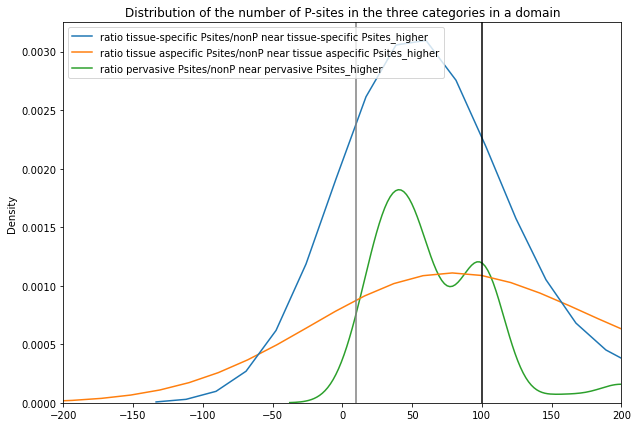

In [139]:
plt.figure(figsize=(10,7))
sns.kdeplot(data=pfam_hmm_name_both[["ratio tissue-specific Psites/nonP near tissue-specific Psites_higher", "ratio tissue aspecific Psites/nonP near tissue aspecific Psites_higher", "ratio pervasive Psites/nonP near pervasive Psites_higher"]], palette="tab10")
plt.axvline(x=100, c="black")
plt.axvline(x=10, c="grey")
plt.title("Distribution of the number of P-sites in the three categories in a domain")
plt.xlim([-200,200])
#plt.savefig("Distribution_Psites_domains_higher.png", format="png", bbox_inches="tight")
plt.show()

The distribution for domains found in tissues associated with less phosphorylation is similar in shape to the one associated with more phosphorylation. Interestingly, in both cases, pervasive P-sites show two peaks: one at +/- 50% P-sites/non-phosphorylated STY-sites, and one at 100% P-sites/non-phosphorylated STY-sites.

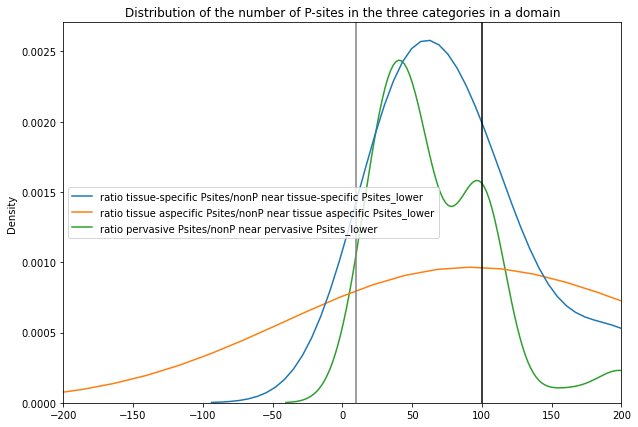

In [140]:
plt.figure(figsize=(10,7))
sns.kdeplot(data=pfam_hmm_name_both[["ratio tissue-specific Psites/nonP near tissue-specific Psites_lower", "ratio tissue aspecific Psites/nonP near tissue aspecific Psites_lower", "ratio pervasive Psites/nonP near pervasive Psites_lower"]], palette="tab10")
plt.axvline(x=100, c="black")
plt.axvline(x=10, c="grey")
plt.title("Distribution of the number of P-sites in the three categories in a domain")
plt.xlim([-200,200])
#plt.savefig("Distribution_Psites_domains_lower_lower.png", format="png", bbox_inches="tight")
plt.show()

In [141]:
pfam_hmm_name_both

tissue-specific phosphosites_higher  \
hmm name                                             
14-3-3                                         4.0   
2-oxoacid_dh                                   1.0   
4_1_CTD                                        4.0   
7tm_1                                          5.0   
7tm_2                                          2.0   
...                                            ...   
FA_FANCE                                       NaN   
OCRE                                           NaN   
FAM47                                          NaN   
Nab1                                           NaN   
Peptidase_C50                                  NaN   

               tissue aspecific phosphosites_higher  \
hmm name                                              
14-3-3                                          6.0   
2-oxoacid_dh                                    NaN   
4_1_CTD                                         6.0   
7tm_1                                           3.0   
7tm_2                                           NaN   
...                                             ...   
FA_FANCE                                        NaN   
OCRE                                            NaN   
FAM47                                           NaN   
Nab1                                            NaN   
Peptidase_C50                                   NaN   

               pervasive phosphosites_higher  \
hmm name                                       
14-3-3                                   1.0   
2-oxoacid_dh                             NaN   
4_1_CTD                                  NaN   
7tm_1                                    NaN   
7tm_2                                    NaN   
...                                      ...   
FA_FANCE                                 NaN   
OCRE                                     NaN   
FAM47                                    NaN   
Nab1                                     NaN   
Peptidase_C50                            NaN   

               tissue-specific phosphosites_lower  \
hmm name                                            
14-3-3                                        4.0   
2-oxoacid_dh                                  1.0   
4_1_CTD                                       4.0   
7tm_1                                         5.0   
7tm_2                                         2.0   
...                                           ...   
FA_FANCE                                      NaN   
OCRE                                          NaN   
FAM47                                         NaN   
Nab1                                          NaN   
Peptidase_C50                                 NaN   

               tissue aspecific phosphosites_lower  \
hmm name                                             
14-3-3                                         6.0   
2-oxoacid_dh                                   NaN   
4_1_CTD                                        6.0   
7tm_1                                          3.0   
7tm_2                                          NaN   
...                                            ...   
FA_FANCE                                       NaN   
OCRE                                           NaN   
FAM47                                          NaN   
Nab1                                           NaN   
Peptidase_C50                                  NaN   

               pervasive phosphosites_lower  \
hmm name                                      
14-3-3                                  1.0   
2-oxoacid_dh                            NaN   
4_1_CTD                                 NaN   
7tm_1                                   NaN   
7tm_2                                   NaN   
...                                     ...   
FA_FANCE                                NaN   
OCRE                                    NaN   
FAM47                                   NaN   
Nab1                                    NaN   
Peptidase_C50 

<AxesSubplot:xlabel='hmm name'>

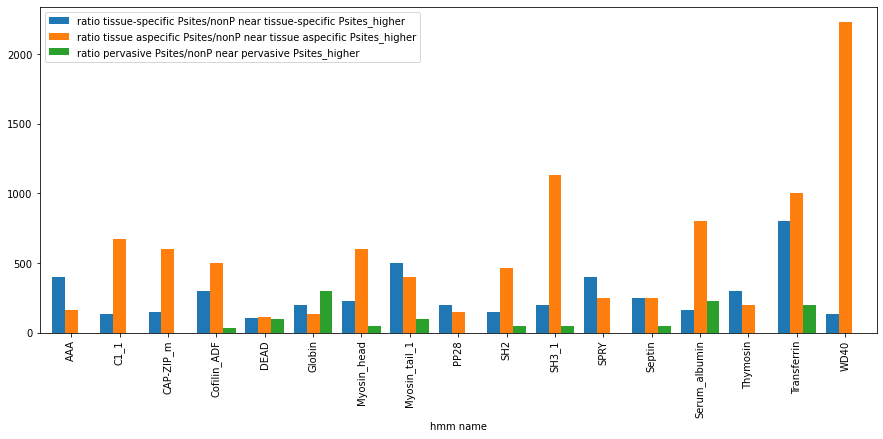

In [142]:
pfam_hmm_name_both[(pfam_hmm_name_both["ratio tissue-specific Psites/nonP near tissue-specific Psites_higher"]>100)&
             (pfam_hmm_name_both["ratio tissue aspecific Psites/nonP near tissue aspecific Psites_higher"]>100)&
             (pfam_hmm_name_both["ratio tissue aspecific Psites/nonP near tissue aspecific Psites_higher"]>100)][["ratio tissue-specific Psites/nonP near tissue-specific Psites_higher", "ratio tissue aspecific Psites/nonP near tissue aspecific Psites_higher", "ratio pervasive Psites/nonP near pervasive Psites_higher"]].plot(kind="bar", figsize=(15,6), width=0.8)
#plt.savefig("Domains associated with more Psites_higher.png", format="png", bbox_inches="tight")

In [143]:
pfam_hmm_name_both[(pfam_hmm_name_both["ratio tissue-specific Psites/nonP near tissue-specific Psites_higher"]>100)&
             (pfam_hmm_name_both["ratio tissue aspecific Psites/nonP near tissue aspecific Psites_higher"]>100)&
             (pfam_hmm_name_both["ratio tissue aspecific Psites/nonP near tissue aspecific Psites_higher"]>100)]

tissue-specific phosphosites_higher  \
hmm name                                             
AAA                                            4.0   
C1_1                                           4.0   
CAP-ZIP_m                                      3.0   
Cofilin_ADF                                    3.0   
DEAD                                          12.0   
Globin                                         2.0   
Myosin_head                                    9.0   
Myosin_tail_1                                  5.0   
PP28                                           2.0   
SH2                                            3.0   
SH3_1                                          4.0   
SPRY                                           4.0   
Septin                                         5.0   
Serum_albumin                                  5.0   
Thymosin                                       3.0   
Transferrin                                    8.0   
WD40                                          11.0   

               tissue aspecific phosphosites_higher  \
hmm name                                              
AAA                                            13.0   
C1_1                                           27.0   
CAP-ZIP_m                                       6.0   
Cofilin_ADF                                     5.0   
DEAD                                           20.0   
Globin                                          4.0   
Myosin_head                                    12.0   
Myosin_tail_1                                   8.0   
PP28                                            3.0   
SH2                                            28.0   
SH3_1                                          34.0   
SPRY                                           10.0   
Septin                                          5.0   
Serum_albumin                                   8.0   
Thymosin                                        2.0   
Transferrin                                    10.0   
WD40                                          156.0   

               pervasive phosphosites_higher  \
hmm name                                       
AAA                                      NaN   
C1_1                                     NaN   
CAP-ZIP_m                                NaN   
Cofilin_ADF                              1.0   
DEAD                                     1.0   
Globin                                   3.0   
Myosin_head                              3.0   
Myosin_tail_1                            2.0   
PP28                                     NaN   
SH2                                      1.0   
SH3_1                                    1.0   
SPRY                                     NaN   
Septin                                   2.0   
Serum_albumin                            9.0   
Thymosin                                 NaN   
Transferrin                              2.0   
WD40                                     NaN   

               tissue-specific phosphosites_lower  \
hmm name                                            
AAA                                           4.0   
C1_1                                          4.0   
CAP-ZIP_m                                     3.0   
Cofilin_ADF                                   3.0   
DEAD                                         12.0   
Globin                                        2.0   
Myosin_head                                   9.0   
Myosin_tail_1                                 5.0   
PP28                                          2.0   
SH2                                           3.0   
SH3_1                                         4.0   
SPRY                                          4.0   
Septin                                        5.0   
Serum_albumin                                 5.0   
Thymosin                                      3.0   
Transferrin                                   8.0   
WD40                                         11.0   

               tissue

<AxesSubplot:xlabel='hmm name'>

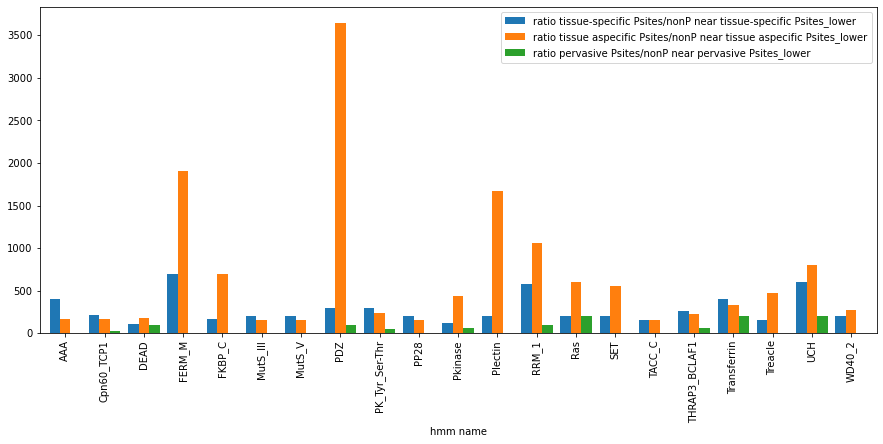

In [144]:
pfam_hmm_name_both[(pfam_hmm_name_both["ratio tissue-specific Psites/nonP near tissue-specific Psites_lower"]>100)&
             (pfam_hmm_name_both["ratio tissue aspecific Psites/nonP near tissue aspecific Psites_lower"]>100)&
             (pfam_hmm_name_both["ratio tissue aspecific Psites/nonP near tissue aspecific Psites_lower"]>100)][["ratio tissue-specific Psites/nonP near tissue-specific Psites_lower", "ratio tissue aspecific Psites/nonP near tissue aspecific Psites_lower", "ratio pervasive Psites/nonP near pervasive Psites_lower"]].plot(kind="bar", figsize=(15,6), width=0.8)
#plt.savefig("Domains associated with more Psites_lower.png", format="png", bbox_inches="tight")

In [145]:
pfam_hmm_name_both[(pfam_hmm_name_both["ratio tissue-specific Psites/nonP near tissue-specific Psites_lower"]>100)&
             (pfam_hmm_name_both["ratio tissue aspecific Psites/nonP near tissue aspecific Psites_lower"]>100)&
             (pfam_hmm_name_both["ratio tissue aspecific Psites/nonP near tissue aspecific Psites_lower"]>100)]

tissue-specific phosphosites_higher  \
hmm name                                              
AAA                                             4.0   
Cpn60_TCP1                                     15.0   
DEAD                                           12.0   
FERM_M                                          7.0   
FKBP_C                                          5.0   
MutS_III                                        2.0   
MutS_V                                          2.0   
PDZ                                            15.0   
PK_Tyr_Ser-Thr                                  9.0   
PP28                                            2.0   
Pkinase                                        59.0   
Plectin                                         8.0   
RRM_1                                          23.0   
Ras                                             8.0   
SET                                             6.0   
TACC_C                                          3.0   
THRAP3_BCLAF1                                  13.0   
Transferrin                                     8.0   
Treacle                                         3.0   
UCH                                             6.0   
WD40_2                                          2.0   

                tissue aspecific phosphosites_higher  \
hmm name                                               
AAA                                             13.0   
Cpn60_TCP1                                       5.0   
DEAD                                            20.0   
FERM_M                                          19.0   
FKBP_C                                           7.0   
MutS_III                                         3.0   
MutS_V                                           3.0   
PDZ                                             73.0   
PK_Tyr_Ser-Thr                                  26.0   
PP28                                             3.0   
Pkinase                                        104.0   
Plectin                                         67.0   
RRM_1                                          149.0   
Ras                                              6.0   
SET                                             11.0   
TACC_C                                           3.0   
THRAP3_BCLAF1                                   11.0   
Transferrin                                     10.0   
Treacle                                         28.0   
UCH                                             16.0   
WD40_2                                           8.0   

                pervasive phosphosites_higher  \
hmm name                                        
AAA                                       NaN   
Cpn60_TCP1                                1.0   
DEAD                                      1.0   
FERM_M                                    1.0   
FKBP_C                                    NaN   
MutS_III                                  NaN   
MutS_V                                    NaN   
PDZ                                       3.0   
PK_Tyr_Ser-Thr                            1.0   
PP28                                      NaN   
Pkinase                                   7.0   
Plectin                                   NaN   
RRM_1                                     6.0   
Ras                                       2.0   
SET                                       NaN   
TACC_C                                    NaN   
THRAP3_BCLAF1                            10.0   
Transferrin                               2.0   
Treacle                                   NaN   
UCH                                       2.0   
WD40_2                                    NaN   

                tissue-specific phosphosites_lower  \
hmm name                                             
AAA                                            4.0   
Cpn60_TCP1                                    15.0   
DEAD                                          12.0   
FERM_M                                         7.0   
FKBP_C   

In [146]:
pfam_hmm_name_both[(pfam_hmm_name_both["ratio tissue-specific Psites/nonP near tissue-specific Psites_higher"]<10)|
             (pfam_hmm_name_both["ratio tissue aspecific Psites/nonP near tissue aspecific Psites_higher"]<10)|
             (pfam_hmm_name_both["ratio tissue aspecific Psites/nonP near tissue aspecific Psites_higher"]<10)]

tissue-specific phosphosites_higher  \
hmm name                                        
MARVEL                                    1.0   

          tissue aspecific phosphosites_higher  pervasive phosphosites_higher  \
hmm name                                                                        
MARVEL                                     1.0                            NaN   

          tissue-specific phosphosites_lower  \
hmm name                                       
MARVEL                                   1.0   

          tissue aspecific phosphosites_lower  pervasive phosphosites_lower  \
hmm name                                                                      
MARVEL                                    1.0                           NaN   

          canonical sites near tissue-specific phosphosites_higher  \
hmm name                                                             
MARVEL                                                  NaN          

          canonical sites near tissue aspecific phosphosites_higher  \
hmm name                                                              
MARVEL                                                 13.0           

          canonical sites near pervasive phosphosites_higher  \
hmm name                                                       
MARVEL                                                  NaN    

          canonical sites near tissue-specific phosphosites_lower  \
hmm name                                                            
MARVEL                                                  3.0         

          canonical sites near tissue aspecific phosphosites_lower  \
hmm name                                                             
MARVEL                                                 13.0          

          canonical sites near pervasive phosphosites_lower  \
hmm name                                                      
MARVEL                                                  NaN   

          ratio tissue-specific Psites/nonP near tissue-specific Psites_higher  \
hmm name                                                                         
MARVEL                                                  NaN                      

          ratio tissue aspecific Psites/nonP near tissue aspecific Psites_higher  \
hmm name                                                                           
MARVEL                                             7.692308                        

          ratio pervasive Psites/nonP near pervasive Psites_higher  \
hmm name                                                             
MARVEL                                                  NaN          

          ratio tissue-specific Psites/nonP near tissue-specific Psites_lower  \
hmm name                                                                        
MARVEL                                            33.333333                     

          ratio tissue aspecific Psites/nonP near tissue aspecific Psites_lower  \
hmm name                                                                          
MARVEL                                             7.692308                       

          ratio pervasive Psites/nonP near pervasive Psites_lower  
hmm name                                                           
MARVEL                                                  NaN

In [147]:
pfam_hmm_name_both[(pfam_hmm_name_both["ratio tissue-specific Psites/nonP near tissue-specific Psites_lower"]<10)|
             (pfam_hmm_name_both["ratio tissue aspecific Psites/nonP near tissue aspecific Psites_lower"]<10)|
             (pfam_hmm_name_both["ratio tissue aspecific Psites/nonP near tissue aspecific Psites_lower"]<10)]

tissue-specific phosphosites_higher  \
hmm name                                        
MARVEL                                    1.0   

          tissue aspecific phosphosites_higher  pervasive phosphosites_higher  \
hmm name                                                                        
MARVEL                                     1.0                            NaN   

          tissue-specific phosphosites_lower  \
hmm name                                       
MARVEL                                   1.0   

          tissue aspecific phosphosites_lower  pervasive phosphosites_lower  \
hmm name                                                                      
MARVEL                                    1.0                           NaN   

          canonical sites near tissue-specific phosphosites_higher  \
hmm name                                                             
MARVEL                                                  NaN          

          canonical sites near tissue aspecific phosphosites_higher  \
hmm name                                                              
MARVEL                                                 13.0           

          canonical sites near pervasive phosphosites_higher  \
hmm name                                                       
MARVEL                                                  NaN    

          canonical sites near tissue-specific phosphosites_lower  \
hmm name                                                            
MARVEL                                                  3.0         

          canonical sites near tissue aspecific phosphosites_lower  \
hmm name                                                             
MARVEL                                                 13.0          

          canonical sites near pervasive phosphosites_lower  \
hmm name                                                      
MARVEL                                                  NaN   

          ratio tissue-specific Psites/nonP near tissue-specific Psites_higher  \
hmm name                                                                         
MARVEL                                                  NaN                      

          ratio tissue aspecific Psites/nonP near tissue aspecific Psites_higher  \
hmm name                                                                           
MARVEL                                             7.692308                        

          ratio pervasive Psites/nonP near pervasive Psites_higher  \
hmm name                                                             
MARVEL                                                  NaN          

          ratio tissue-specific Psites/nonP near tissue-specific Psites_lower  \
hmm name                                                                        
MARVEL                                            33.333333                     

          ratio tissue aspecific Psites/nonP near tissue aspecific Psites_lower  \
hmm name                                                                          
MARVEL                                             7.692308                       

          ratio pervasive Psites/nonP near pervasive Psites_lower  
hmm name                                                           
MARVEL                                                  NaN

# 5. Clans

We'll now have a look at the different clans. Per tissue we count the amount of P-sites occuring in a Pfam entry associated with a clan.

In [148]:
df_spread_tissues = pd.DataFrame({"Tissue": list_tissues_STY})
list_tspec = []
list_taspec = []
list_gen = []
list_total = []
for tissue in list_tissues_STY:
    count_tspec = tspec_sites_pfam.loc[(tspec_sites_pfam[tissue]==1)&(tspec_sites_pfam["clan"]!="No_clan"), :].groupby(["ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"}).shape[0]
    count_taspec = taspec_sites_pfam.loc[(taspec_sites_pfam[tissue]==1)&(taspec_sites_pfam["clan"]!="No_clan"), :].groupby(["ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"}).shape[0]
    count_gen = gen_sites_pfam.loc[(gen_sites_pfam[tissue]==1)&(gen_sites_pfam["clan"]!="No_clan"), :].groupby(["ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"}).shape[0]
    count_total = count_tspec + count_taspec + count_gen
    list_tspec.append(count_tspec)
    list_taspec.append(count_taspec)
    list_gen.append(count_gen)
    list_total.append(count_total)
df_spread_tissues["Number of tissue-specific phosphosites associated with a clan"] = list_tspec
df_spread_tissues["Number of tissue aspecific phosphosites associated with a clan"] = list_taspec
df_spread_tissues["Number of pervasive phosphosites associated with a clan"] = list_gen
df_spread_tissues["Total"] = list_total
df_spread_tissues

Tissue  \
0              Adipose tissue   
1                     B-cells   
2                       Blood   
3                        Bone   
4                       Brain   
5                      Breast   
6         Cerebrospinal fluid   
7                      Cervix   
8                       Colon   
9               Dental plaque   
10                  Esophagus   
11                        Eye   
12           Follicular fluid   
13                      Heart   
14                       Hela   
15                     Kidney   
16                      Liver   
17                       Lung   
18                 Lymph node   
19            Menstrual fluid   
20                  Monocytes   
21               Nasal polyps   
22                   NK-cells   
23                      Ovary   
24                   Pancreas   
25           Palatine tonsils   
26              Parotid gland   
27                       PBMC   
28  Peritoneal dialysis fluid   
29                   Placenta   
30            Skeletal muscle   
31                       Skin   
32            Small intestine   
33            Synovial tissue   
34                    T-cells   
35                     Testis   
36                      Tooth   
37             Umbilical cord   
38                     Ureter   
39            Urinary bladder   
40                      Urine   

    Number of tissue-specific phosphosites associated with a clan  \
0                                                   0               
1                                                   2               
2                                                 236               
3                                                   2               
4                                                  31               
5                                                  14               
6                                                   0               
7                                                   0               
8                                                 584               
9                                                   1               
10                                                  0               
11                                                  0               
12                                                  0               
13                                                  9               
14                                                  0               
15                                                  2               
16                                                 55               
17                                                192               
18                                                250               
19                                                  1               
20                                                 18               
21                                                  0               
22                                                  5               
23                                                  0               
24                                                 10               
25                                                  0               
26                                                  0               
27                                                310               
28                                                  0               
29                                                201               
30                                                 67               
31                                                177               
32                                                 31               
33                                                  0               
34                                                  0               
35                                                 38               
36                                                  0               
37            

<AxesSubplot:title={'center':'Number of phosphosites in each of the three categories for which the phopshosite is inside a domain'}, xlabel='Tissue'>

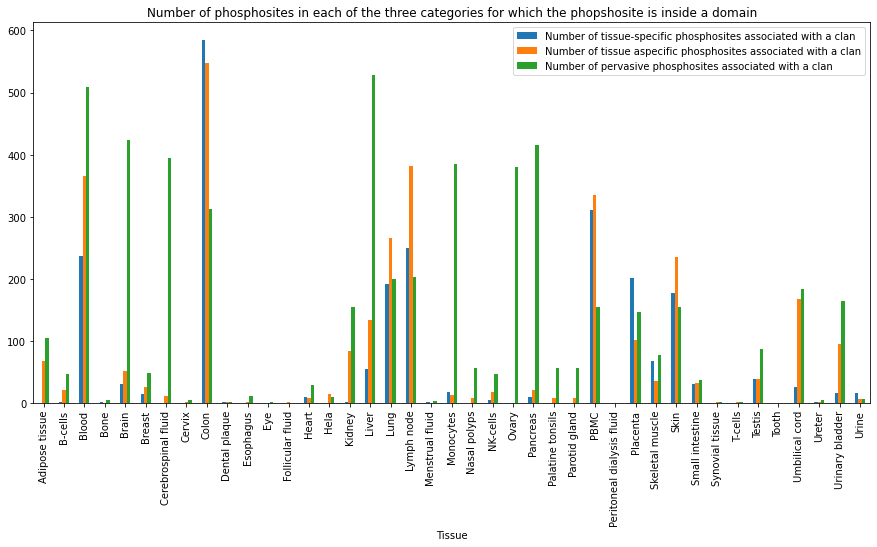

In [149]:
df_spread_tissues[["Tissue", "Number of tissue-specific phosphosites associated with a clan", "Number of tissue aspecific phosphosites associated with a clan", "Number of pervasive phosphosites associated with a clan"]].plot(x="Tissue", kind="bar", figsize=(15,7), title="Number of phosphosites in each of the three categories for which the phopshosite is inside a domain")
#plt.savefig("WP2 Pfam_phosphosites inside a functional domain_clan.png", format="png", bbox_inches="tight")

Per category of P-sites, per clan, we now count the amount of P-sites occuring in a Pfam entry. As domains can have multiple entries in Pfam, the same goes for clans.

In [150]:
tspec_sites_pfam_clan = tspec_sites_pfam.groupby(["clan", "ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"})
taspec_sites_pfam_clan = taspec_sites_pfam.groupby(["clan", "ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"})
gen_sites_pfam_clan = gen_sites_pfam.groupby(["clan", "ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"})

In [151]:
tspec_sites_pfam_clan = tspec_sites_pfam_clan.groupby(["clan"], as_index=False)["ACC_ID"].count()
tspec_sites_pfam_clan.rename(columns ={"ACC_ID": "number of tissue-specific phosphosites"}, inplace=True, )
tspec_sites_pfam_clan.set_index("clan", inplace=True)
taspec_sites_pfam_clan = taspec_sites_pfam_clan.groupby(["clan"], as_index=False)["ACC_ID"].count()
taspec_sites_pfam_clan.rename(columns ={"ACC_ID": "number of tissue aspecific phosphosites"}, inplace=True)
taspec_sites_pfam_clan.set_index("clan", inplace=True)
gen_sites_pfam_clan = gen_sites_pfam_clan.groupby(["clan"], as_index=False)["ACC_ID"].count()
gen_sites_pfam_clan.rename(columns ={"ACC_ID": "number of pervasive phosphosites"}, inplace=True)
gen_sites_pfam_clan.set_index("clan", inplace=True)

pfam_clan = pd.concat([tspec_sites_pfam_clan, taspec_sites_pfam_clan, gen_sites_pfam_clan], axis=1)
pfam_clan.head()

number of tissue-specific phosphosites  \
clan                                             
CL0001                                     3.0   
CL0003                                    13.0   
CL0004                                    10.0   
CL0005                                     2.0   
CL0006                                     5.0   

        number of tissue aspecific phosphosites  \
clan                                              
CL0001                                      NaN   
CL0003                                      3.0   
CL0004                                      9.0   
CL0005                                      1.0   
CL0006                                      2.0   

        number of pervasive phosphosites  
clan                                      
CL0001                               NaN  
CL0003                               1.0  
CL0004                               2.0  
CL0005                               NaN  
CL0006                               4.0

In [152]:
pfam_clan[(pfam_clan["number of tissue-specific phosphosites"]>15)|
             (pfam_clan["number of tissue aspecific phosphosites"]>15)|
             (pfam_clan["number of pervasive phosphosites"]>15)].shape[0]

39

In [153]:
pfam_clan.shape[0]

305

In [154]:
pfam_clan[(pfam_clan["number of tissue-specific phosphosites"]>15)|
             (pfam_clan["number of tissue aspecific phosphosites"]>15)|
             (pfam_clan["number of pervasive phosphosites"]>15)]

number of tissue-specific phosphosites  \
clan                                              
CL0010                                     24.0   
CL0011                                     38.0   
CL0012                                     84.0   
CL0016                                    188.0   
CL0020                                    104.0   
CL0021                                     25.0   
CL0023                                    214.0   
CL0031                                     16.0   
CL0035                                     22.0   
CL0039                                     17.0   
CL0052                                     20.0   
CL0062                                     25.0   
CL0063                                     84.0   
CL0072                                     39.0   
CL0090                                     13.0   
CL0092                                     18.0   
CL0108                                     95.0   
CL0116                                     19.0   
CL0123                                     67.0   
CL0124                                     33.0   
CL0125                                     31.0   
CL0128                                     19.0   
CL0154                                     18.0   
CL0159                                     43.0   
CL0167                                     21.0   
CL0172                                     22.0   
CL0186                                     36.0   
CL0188                                     19.0   
CL0220                                     33.0   
CL0221                                     53.0   
CL0266                                     82.0   
CL0295                                     16.0   
CL0409                                     16.0   
CL0442                                     45.0   
CL0566                                     51.0   
CL0575                                     17.0   
CL0632                                     28.0   
CL0705                                     18.0   
No_clan                                  1645.0   

         number of tissue aspecific phosphosites  \
clan                                               
CL0010                                       6.0   
CL0011                                      18.0   
CL0012                                      64.0   
CL0016                                     110.0   
CL0020                                      53.0   
CL0021                                      11.0   
CL0023                                     143.0   
CL0031                                       6.0   
CL0035                                       9.0   
CL0039                                       4.0   
CL0052                                       6.0   
CL0062                                      13.0   
CL0063                                      42.0   
CL0072                                      16.0   
CL0090                                      10.0   
CL0092                                       8.0   
CL0108                                     108.0   
CL0116                                       NaN   
CL0123                                      44.0   
CL0124                                       9.0   
CL0125                                      17.0   
CL0128                                       1.0   
CL0154                                       4.0   
CL0159                                      20.0   
CL0167                                       5.0   
CL0172                                      11.0   
CL0186                                      22.0   
CL0188                                      12.0   
CL0220                                      12.0   
CL0221                                      32.0   
CL0266                                      30.0   
CL0295                                       4.0   
CL0409                                      12.0   
CL0442                                      22.0   
CL0566                                      3

Interesting clans:

- CL0011: Immunoglobulin superfamily
- CL0016: PKinase
- CL0020: TPR-clan
- CL0023: P-loop_NTPase
- CL0063: NADP_Rossmann
- CL0108: Actin_ATPase
- CL0123: Helix-Turn-Helix clan
- CL0159: Ig-like fold superfamily (E-set)
- CL0221: RRM-like clan, RNA recognition motifs
- CL0442: Tubulin-C
- CL0566: Tubulin

Most clans show more tissue-specific P-sites, which is to be expected as most P-sites in our dataset are tissue-specific. Surpsrisingly, some clans don't show this trend.

<AxesSubplot:xlabel='clan'>

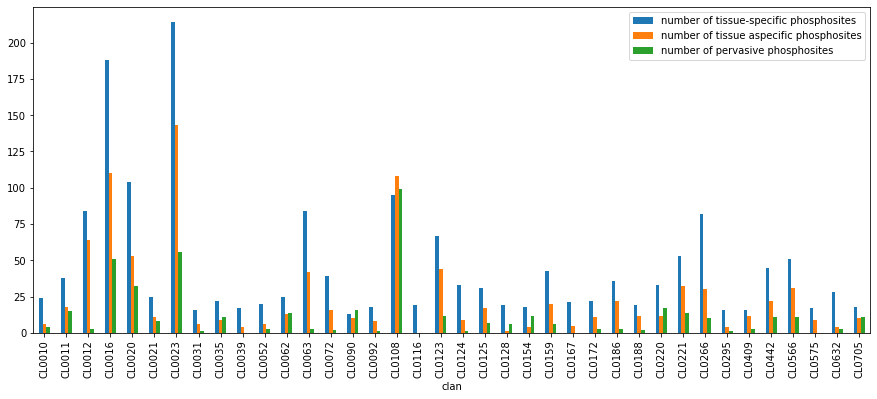

In [155]:
pfam_clan[(pfam_clan["number of tissue-specific phosphosites"]>15)|
             (pfam_clan["number of tissue aspecific phosphosites"]>15)|
             (pfam_clan["number of pervasive phosphosites"]>15)].drop(["No_clan"]).plot(kind="bar", figsize=(15,6))
#plt.savefig("WP2 Pfam_clans associated with Psites.png", format="png", bbox_inches="tight")

We make a similar analysis for the clans as for the domains and compare the occurence of P-sites and non-phosphoryalted STY-sites.

In [156]:
tspec_sites_pfam_clan_nonP = domain_res_tspec.groupby(["clan", "ACC_ID", "pos_int"], as_index=False).agg({"modres": "first"})
taspec_sites_pfam_clan_nonP = domain_res_taspec.groupby(["clan", "ACC_ID", "pos_int"], as_index=False).agg({"modres": "first"})
gen_sites_pfam_clan_nonP = domain_res_gen.groupby(["clan", "ACC_ID", "pos_int"], as_index=False).agg({"modres": "first"})

In [157]:
tspec_sites_pfam_clan_nonP = tspec_sites_pfam_clan_nonP.groupby(["clan"], as_index=False)["ACC_ID"].count()
tspec_sites_pfam_clan_nonP.rename(columns ={"ACC_ID": "canonical sites near tissue-specific phosphosites"}, inplace=True, )
tspec_sites_pfam_clan_nonP.set_index("clan", inplace=True)
taspec_sites_pfam_clan_nonP = taspec_sites_pfam_clan_nonP.groupby(["clan"], as_index=False)["ACC_ID"].count()
taspec_sites_pfam_clan_nonP.rename(columns ={"ACC_ID": "canonical sites near tissue aspecific phosphosites"}, inplace=True)
taspec_sites_pfam_clan_nonP.set_index("clan", inplace=True)
gen_sites_pfam_clan_nonP = gen_sites_pfam_clan_nonP.groupby(["clan"], as_index=False)["ACC_ID"].count()
gen_sites_pfam_clan_nonP.rename(columns ={"ACC_ID": "canonical sites near pervasive phosphosites"}, inplace=True)
gen_sites_pfam_clan_nonP.set_index("clan", inplace=True)

pfam_clan_nonP = pd.concat([tspec_sites_pfam_clan_nonP, taspec_sites_pfam_clan_nonP, gen_sites_pfam_clan_nonP], axis=1)

In [158]:
pfam_clan_nonP

canonical sites near tissue-specific phosphosites  \
clan                                                        
CL0001                                               11.0   
CL0003                                               27.0   
CL0004                                               14.0   
CL0005                                                1.0   
CL0006                                               18.0   
...                                                   ...   
CL0629                                                NaN   
CL0083                                                NaN   
CL0117                                                NaN   
CL0264                                                NaN   
CL0498                                                NaN   

        canonical sites near tissue aspecific phosphosites  \
clan                                                         
CL0001                                                NaN    
CL0003                                                9.0    
CL0004                                               20.0    
CL0005                                                1.0    
CL0006                                                7.0    
...                                                   ...    
CL0629                                                2.0    
CL0083                                                NaN    
CL0117                                                NaN    
CL0264                                                NaN    
CL0498                                                NaN    

        canonical sites near pervasive phosphosites  
clan                                                 
CL0001                                          NaN  
CL0003                                          4.0  
CL0004                                          3.0  
CL0005                                          NaN  
CL0006                                          NaN  
...                                             ...  
CL0629                                          NaN  
CL0083                                          1.0  
CL0117                                          4.0  
CL0264                                          2.0  
CL0498                                          1.0  

[295 rows x 3 columns]

In [159]:
pfam_clan_all = pd.concat([pfam_clan, pfam_clan_nonP], axis=1)
pfam_clan_all

number of tissue-specific phosphosites  \
clan                                             
CL0001                                     3.0   
CL0003                                    13.0   
CL0004                                    10.0   
CL0005                                     2.0   
CL0006                                     5.0   
...                                        ...   
CL0264                                     NaN   
CL0498                                     NaN   
CL0060                                     NaN   
CL0075                                     NaN   
CL0537                                     NaN   

        number of tissue aspecific phosphosites  \
clan                                              
CL0001                                      NaN   
CL0003                                      3.0   
CL0004                                      9.0   
CL0005                                      1.0   
CL0006                                      2.0   
...                                         ...   
CL0264                                      NaN   
CL0498                                      NaN   
CL0060                                      NaN   
CL0075                                      NaN   
CL0537                                      NaN   

        number of pervasive phosphosites  \
clan                                       
CL0001                               NaN   
CL0003                               1.0   
CL0004                               2.0   
CL0005                               NaN   
CL0006                               4.0   
...                                  ...   
CL0264                               1.0   
CL0498                               1.0   
CL0060                               NaN   
CL0075                               NaN   
CL0537                               NaN   

        canonical sites near tissue-specific phosphosites  \
clan                                                        
CL0001                                               11.0   
CL0003                                               27.0   
CL0004                                               14.0   
CL0005                                                1.0   
CL0006                                               18.0   
...                                                   ...   
CL0264                                                NaN   
CL0498                                                NaN   
CL0060                                                1.0   
CL0075                                                2.0   
CL0537                                                NaN   

        canonical sites near tissue aspecific phosphosites  \
clan                                                         
CL0001                                                NaN    
CL0003                                                9.0    
CL0004                                               20.0    
CL0005                                                1.0    
CL0006                                                7.0    
...                                                   ...    
CL0264                                                NaN    
CL0498                                                NaN    
CL0060                                                NaN    
CL0075                                                NaN    
CL0537                                                2.0    

        canonical sites near pervasive phosphosites  
clan                                                 
CL0001                                          NaN  
CL0003                                          4.0  
CL0004                                          3.0  
CL0005                                          NaN  
CL0006                                          NaN  
...                                             ...  
CL0264                                          2.0  
CL0498                           

In [160]:
pfam_clan_all["ratio tissue-specific P-sites"] = (pfam_clan_all["number of tissue-specific phosphosites"])*100/(pfam_clan_all["canonical sites near tissue-specific phosphosites"])
pfam_clan_all["ratio tissue aspecific P-sites"] = (pfam_clan_all["number of tissue aspecific phosphosites"])*100/(pfam_clan_all["canonical sites near tissue aspecific phosphosites"])
pfam_clan_all["ratio pervasive P-sites"] = (pfam_clan_all["number of pervasive phosphosites"])*100/(pfam_clan_all["canonical sites near pervasive phosphosites"])
pfam_clan_all

number of tissue-specific phosphosites  \
clan                                             
CL0001                                     3.0   
CL0003                                    13.0   
CL0004                                    10.0   
CL0005                                     2.0   
CL0006                                     5.0   
...                                        ...   
CL0264                                     NaN   
CL0498                                     NaN   
CL0060                                     NaN   
CL0075                                     NaN   
CL0537                                     NaN   

        number of tissue aspecific phosphosites  \
clan                                              
CL0001                                      NaN   
CL0003                                      3.0   
CL0004                                      9.0   
CL0005                                      1.0   
CL0006                                      2.0   
...                                         ...   
CL0264                                      NaN   
CL0498                                      NaN   
CL0060                                      NaN   
CL0075                                      NaN   
CL0537                                      NaN   

        number of pervasive phosphosites  \
clan                                       
CL0001                               NaN   
CL0003                               1.0   
CL0004                               2.0   
CL0005                               NaN   
CL0006                               4.0   
...                                  ...   
CL0264                               1.0   
CL0498                               1.0   
CL0060                               NaN   
CL0075                               NaN   
CL0537                               NaN   

        canonical sites near tissue-specific phosphosites  \
clan                                                        
CL0001                                               11.0   
CL0003                                               27.0   
CL0004                                               14.0   
CL0005                                                1.0   
CL0006                                               18.0   
...                                                   ...   
CL0264                                                NaN   
CL0498                                                NaN   
CL0060                                                1.0   
CL0075                                                2.0   
CL0537                                                NaN   

        canonical sites near tissue aspecific phosphosites  \
clan                                                         
CL0001                                                NaN    
CL0003                                                9.0    
CL0004                                               20.0    
CL0005                                                1.0    
CL0006                                                7.0    
...                                                   ...    
CL0264                                                NaN    
CL0498                                                NaN    
CL0060                                                NaN    
CL0075                                                NaN    
CL0537                                                2.0    

        canonical sites near pervasive phosphosites  \
clan                                                  
CL0001                                          NaN   
CL0003                                          4.0   
CL0004                                          3.0   
CL0005                                          NaN   
CL0006                                          NaN   
...                                             ...   
CL0264                                          2.0   
CL0498                  

In [161]:
pfam_clan_all["ratio tissue-specific P-sites"] = (pfam_clan_all["number of tissue-specific phosphosites"])*100/(pfam_clan_all["canonical sites near tissue-specific phosphosites"])
pfam_clan_all["ratio tissue aspecific P-sites"] = (pfam_clan_all["number of tissue aspecific phosphosites"])*100/(pfam_clan_all["canonical sites near tissue aspecific phosphosites"])
pfam_clan_all["ratio pervasive P-sites"] = (pfam_clan_all["number of pervasive phosphosites"])*100/(pfam_clan_all["canonical sites near pervasive phosphosites"])
pfam_clan_all

number of tissue-specific phosphosites  \
clan                                             
CL0001                                     3.0   
CL0003                                    13.0   
CL0004                                    10.0   
CL0005                                     2.0   
CL0006                                     5.0   
...                                        ...   
CL0264                                     NaN   
CL0498                                     NaN   
CL0060                                     NaN   
CL0075                                     NaN   
CL0537                                     NaN   

        number of tissue aspecific phosphosites  \
clan                                              
CL0001                                      NaN   
CL0003                                      3.0   
CL0004                                      9.0   
CL0005                                      1.0   
CL0006                                      2.0   
...                                         ...   
CL0264                                      NaN   
CL0498                                      NaN   
CL0060                                      NaN   
CL0075                                      NaN   
CL0537                                      NaN   

        number of pervasive phosphosites  \
clan                                       
CL0001                               NaN   
CL0003                               1.0   
CL0004                               2.0   
CL0005                               NaN   
CL0006                               4.0   
...                                  ...   
CL0264                               1.0   
CL0498                               1.0   
CL0060                               NaN   
CL0075                               NaN   
CL0537                               NaN   

        canonical sites near tissue-specific phosphosites  \
clan                                                        
CL0001                                               11.0   
CL0003                                               27.0   
CL0004                                               14.0   
CL0005                                                1.0   
CL0006                                               18.0   
...                                                   ...   
CL0264                                                NaN   
CL0498                                                NaN   
CL0060                                                1.0   
CL0075                                                2.0   
CL0537                                                NaN   

        canonical sites near tissue aspecific phosphosites  \
clan                                                         
CL0001                                                NaN    
CL0003                                                9.0    
CL0004                                               20.0    
CL0005                                                1.0    
CL0006                                                7.0    
...                                                   ...    
CL0264                                                NaN    
CL0498                                                NaN    
CL0060                                                NaN    
CL0075                                                NaN    
CL0537                                                2.0    

        canonical sites near pervasive phosphosites  \
clan                                                  
CL0001                                          NaN   
CL0003                                          4.0   
CL0004                                          3.0   
CL0005                                          NaN   
CL0006                                          NaN   
...                                             ...   
CL0264                                          2.0   
CL0498                  

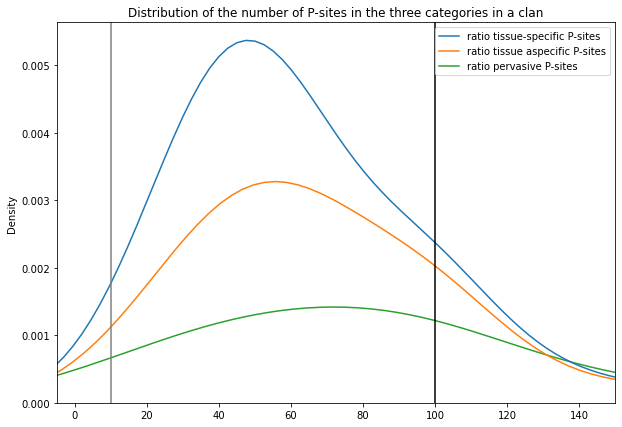

In [162]:
plt.figure(figsize=(10,7))
sns.kdeplot(data=pfam_clan_all[["ratio tissue-specific P-sites", "ratio tissue aspecific P-sites", "ratio pervasive P-sites"]], palette="tab10")
plt.axvline(x=100, c="black")
plt.axvline(x=10, c="grey")
plt.title("Distribution of the number of P-sites in the three categories in a clan")
plt.xlim([-5,150])
#plt.savefig("Distribution_Psites_clans.png", format="png", bbox_inches="tight")
plt.show()

<AxesSubplot:xlabel='clan'>

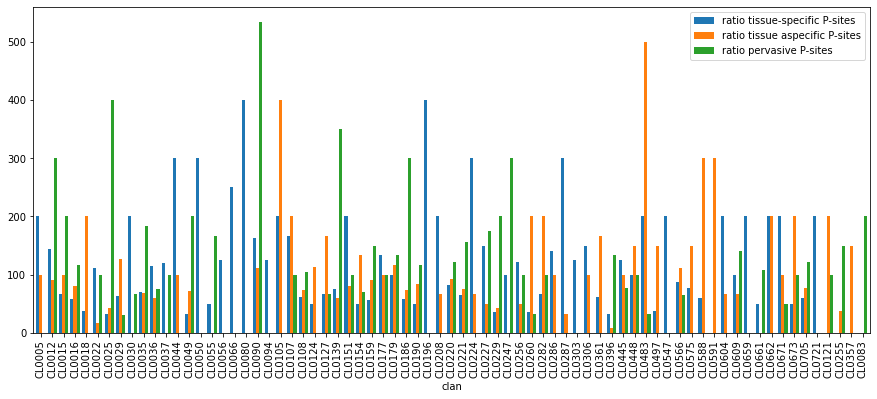

In [163]:
pfam_clan_all[(pfam_clan_all["ratio tissue-specific P-sites"]>100)|
             (pfam_clan_all["ratio tissue aspecific P-sites"]>100)|
             (pfam_clan_all["ratio pervasive P-sites"]>100)][["ratio tissue-specific P-sites", "ratio tissue aspecific P-sites", "ratio pervasive P-sites"]].plot(kind="bar", figsize=(15,6), width=0.8)
#plt.savefig("Clans associated with more Psites.png", format="png", bbox_inches="tight")

In [164]:
pfam_clan_all[(pfam_clan_all["ratio tissue-specific P-sites"]>100)|
             (pfam_clan_all["ratio tissue aspecific P-sites"]>100)|
             (pfam_clan_all["ratio pervasive P-sites"]>100)]

number of tissue-specific phosphosites  \
clan                                             
CL0005                                     2.0   
CL0012                                    84.0   
CL0015                                    10.0   
CL0016                                   188.0   
CL0018                                     3.0   
...                                        ...   
CL0721                                     2.0   
CL0121                                     NaN   
CL0255                                     NaN   
CL0357                                     NaN   
CL0083                                     NaN   

        number of tissue aspecific phosphosites  \
clan                                              
CL0005                                      1.0   
CL0012                                     64.0   
CL0015                                      4.0   
CL0016                                    110.0   
CL0018                                      2.0   
...                                         ...   
CL0721                                      NaN   
CL0121                                      2.0   
CL0255                                      3.0   
CL0357                                      3.0   
CL0083                                      NaN   

        number of pervasive phosphosites  \
clan                                       
CL0005                               NaN   
CL0012                               3.0   
CL0015                               2.0   
CL0016                              51.0   
CL0018                               NaN   
...                                  ...   
CL0721                               NaN   
CL0121                               1.0   
CL0255                               3.0   
CL0357                               1.0   
CL0083                               2.0   

        canonical sites near tissue-specific phosphosites  \
clan                                                        
CL0005                                                1.0   
CL0012                                               58.0   
CL0015                                               15.0   
CL0016                                              326.0   
CL0018                                                8.0   
...                                                   ...   
CL0721                                                1.0   
CL0121                                                NaN   
CL0255                                                NaN   
CL0357                                                NaN   
CL0083                                                NaN   

        canonical sites near tissue aspecific phosphosites  \
clan                                                         
CL0005                                                1.0    
CL0012                                               70.0    
CL0015                                                4.0    
CL0016                                              138.0    
CL0018                                                1.0    
...                                                   ...    
CL0721                                                NaN    
CL0121                                                1.0    
CL0255                                                8.0    
CL0357                                                2.0    
CL0083                                                NaN    

        canonical sites near pervasive phosphosites  \
clan                                                  
CL0005                                          NaN   
CL0012                                          1.0   
CL0015                                          1.0   
CL0016                                         44.0   
CL0018                                          NaN   
...                                             ...   
CL0721                                          NaN   
CL0121                  

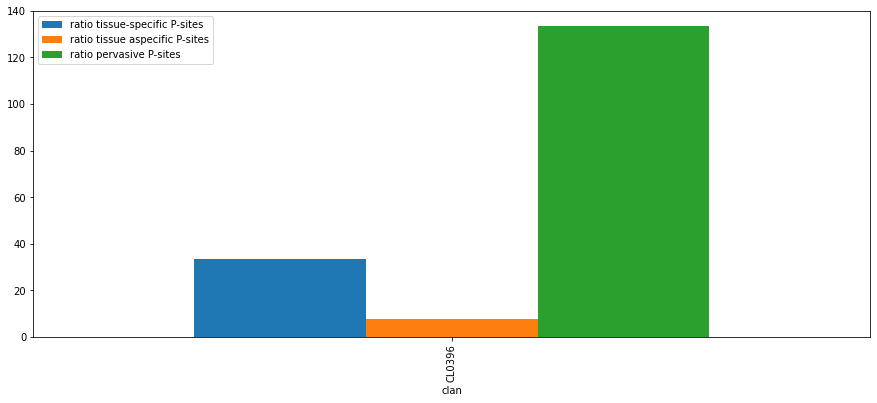

In [165]:
pfam_clan_all[(pfam_clan_all["ratio tissue-specific P-sites"]<10)|
             (pfam_clan_all["ratio tissue aspecific P-sites"]<10)|
             (pfam_clan_all["ratio pervasive P-sites"]<10)][["ratio tissue-specific P-sites", "ratio tissue aspecific P-sites", "ratio pervasive P-sites"]].plot(kind="bar", figsize=(15,6), width=0.8)
plt.savefig("Clans associated with nonPsites.png", format="png", bbox_inches="tight")

In [166]:
pfam_clan_all[(pfam_clan_all["ratio tissue-specific P-sites"]<10)|
             (pfam_clan_all["ratio tissue aspecific P-sites"]<10)|
             (pfam_clan_all["ratio pervasive P-sites"]<10)]

number of tissue-specific phosphosites  \
clan                                             
CL0396                                     1.0   

        number of tissue aspecific phosphosites  \
clan                                              
CL0396                                      1.0   

        number of pervasive phosphosites  \
clan                                       
CL0396                               8.0   

        canonical sites near tissue-specific phosphosites  \
clan                                                        
CL0396                                                3.0   

        canonical sites near tissue aspecific phosphosites  \
clan                                                         
CL0396                                               13.0    

        canonical sites near pervasive phosphosites  \
clan                                                  
CL0396                                          6.0   

        ratio tissue-specific P-sites  ratio tissue aspecific P-sites  \
clan                                                                    
CL0396                      33.333333                        7.692308   

        ratio pervasive P-sites  
clan                             
CL0396               133.333333

# 6. Looking at different tissues

## looking at Colon

We now repeat the same analysis for all of the tissues seperately, as well as for all tissues excluding colon (the largest tissue in terms of protein counts).

- CL0020: Tetratrico peptide repeat superfamily (involved in protein-protein interaction and multiprotein complexes (amongst others)
- CL0192: Family A G protein-coupled receptor-like superfamily
- CL0266: PH domain-like superfamily, bind short peptide motifs and involved in cellular signalling

<AxesSubplot:xlabel='clan'>

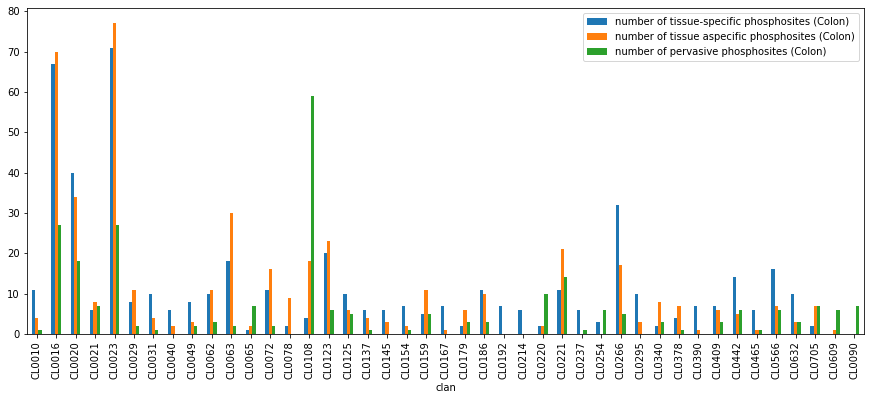

In [167]:
df_clan_tspec_colon = tspec_sites_pfam.loc[tspec_sites_pfam["Colon"]==1, :].groupby(["clan", "ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"})
df_clan_taspec_colon = taspec_sites_pfam.loc[taspec_sites_pfam["Colon"]==1, :].groupby(["clan", "ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"})
df_clan_gen_colon = gen_sites_pfam.loc[gen_sites_pfam["Colon"]==1, :].groupby(["clan", "ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"})

df_clan_tspec_colon = df_clan_tspec_colon.groupby(["clan"], as_index=False)["ACC_ID"].count()
df_clan_tspec_colon.rename({"ACC_ID": "number of tissue-specific phosphosites (Colon)"}, inplace=True, axis=1)
df_clan_tspec_colon.set_index(["clan"], inplace=True)
df_clan_taspec_colon = df_clan_taspec_colon.groupby(["clan"], as_index=False)["ACC_ID"].count()
df_clan_taspec_colon.rename({"ACC_ID": "number of tissue aspecific phosphosites (Colon)"}, inplace=True, axis=1)
df_clan_taspec_colon.set_index(["clan"], inplace=True)
df_clan_gen_colon = df_clan_gen_colon.groupby(["clan"], as_index=False)["ACC_ID"].count()
df_clan_gen_colon.rename({"ACC_ID": "number of pervasive phosphosites (Colon)"}, inplace=True, axis=1)
df_clan_gen_colon.set_index(["clan"], inplace=True)
df_clan_all_colon = pd.concat([df_clan_tspec_colon, df_clan_taspec_colon, df_clan_gen_colon], axis=1)
df_clan_all_colon[((df_clan_all_colon["number of tissue-specific phosphosites (Colon)"]>5)|
                 (df_clan_all_colon["number of tissue aspecific phosphosites (Colon)"]>5)|
                 (df_clan_all_colon["number of pervasive phosphosites (Colon)"]>5))].drop(["No_clan"]).plot(kind="bar", figsize=(15,6))

<AxesSubplot:xlabel='hmm name'>

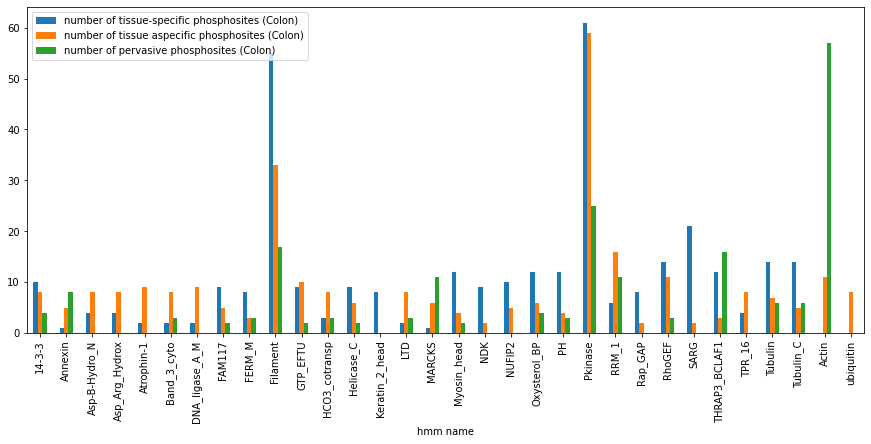

In [168]:
df_hmm_tspec_colon = tspec_sites_pfam.loc[tspec_sites_pfam["Colon"]==1, :].groupby(["hmm name", "ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"})
df_hmm_taspec_colon = taspec_sites_pfam.loc[taspec_sites_pfam["Colon"]==1, :].groupby(["hmm name", "ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"})
df_hmm_gen_colon = gen_sites_pfam.loc[gen_sites_pfam["Colon"]==1, :].groupby(["hmm name", "ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"})

df_hmm_tspec_colon = df_hmm_tspec_colon.groupby(["hmm name"], as_index=False)["ACC_ID"].count()
df_hmm_tspec_colon.rename({"ACC_ID": "number of tissue-specific phosphosites (Colon)"}, inplace=True, axis=1)
df_hmm_tspec_colon.set_index(["hmm name"], inplace=True)
df_hmm_taspec_colon = df_hmm_taspec_colon.groupby(["hmm name"], as_index=False)["ACC_ID"].count()
df_hmm_taspec_colon.rename({"ACC_ID": "number of tissue aspecific phosphosites (Colon)"}, inplace=True, axis=1)
df_hmm_taspec_colon.set_index(["hmm name"], inplace=True)
df_hmm_gen_colon = df_hmm_gen_colon.groupby(["hmm name"], as_index=False)["ACC_ID"].count()
df_hmm_gen_colon.rename({"ACC_ID": "number of pervasive phosphosites (Colon)"}, inplace=True, axis=1)
df_hmm_gen_colon.set_index(["hmm name"], inplace=True)
df_hmm_all_colon = pd.concat([df_hmm_tspec_colon, df_hmm_taspec_colon, df_hmm_gen_colon], axis=1)
df_hmm_all_colon[((df_hmm_all_colon["number of tissue-specific phosphosites (Colon)"]>7)|
                 (df_hmm_all_colon["number of tissue aspecific phosphosites (Colon)"]>7)|
                 (df_hmm_all_colon["number of pervasive phosphosites (Colon)"]>7))].plot(kind="bar", figsize=(15,6))

## looking at all other tissues

<AxesSubplot:xlabel='clan'>

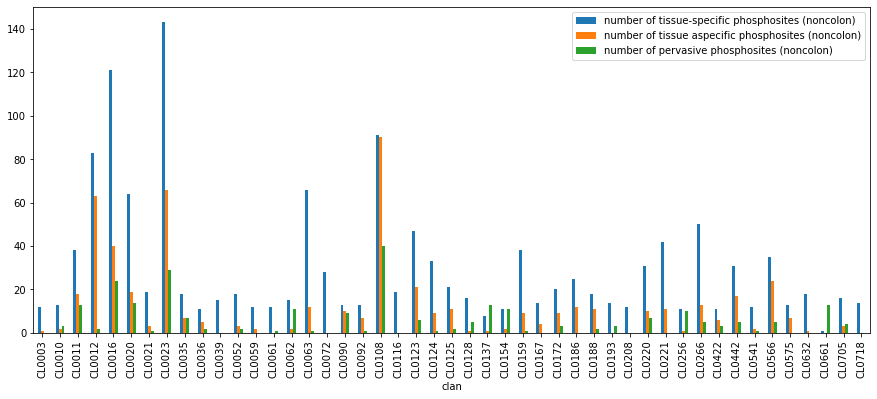

In [169]:
df_clan_tspec_noncolon = tspec_sites_pfam.loc[tspec_sites_pfam["Colon"]==0, :].groupby(["clan", "ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"})
df_clan_taspec_noncolon = taspec_sites_pfam.loc[taspec_sites_pfam["Colon"]==0, :].groupby(["clan", "ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"})
df_clan_gen_noncolon = gen_sites_pfam.loc[gen_sites_pfam["Colon"]==0, :].groupby(["clan", "ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"})

df_clan_tspec_noncolon = df_clan_tspec_noncolon.groupby(["clan"], as_index=False)["ACC_ID"].count()
df_clan_tspec_noncolon.rename({"ACC_ID": "number of tissue-specific phosphosites (noncolon)"}, inplace=True, axis=1)
df_clan_tspec_noncolon.set_index(["clan"], inplace=True)
df_clan_taspec_noncolon = df_clan_taspec_noncolon.groupby(["clan"], as_index=False)["ACC_ID"].count()
df_clan_taspec_noncolon.rename({"ACC_ID": "number of tissue aspecific phosphosites (noncolon)"}, inplace=True, axis=1)
df_clan_taspec_noncolon.set_index(["clan"], inplace=True)
df_clan_gen_noncolon = df_clan_gen_noncolon.groupby(["clan"], as_index=False)["ACC_ID"].count()
df_clan_gen_noncolon.rename({"ACC_ID": "number of pervasive phosphosites (noncolon)"}, inplace=True, axis=1)
df_clan_gen_noncolon.set_index(["clan"], inplace=True)
df_clan_all_noncolon = pd.concat([df_clan_tspec_noncolon, df_clan_taspec_noncolon, df_clan_gen_noncolon], axis=1)
df_clan_all_noncolon[((df_clan_all_noncolon["number of tissue-specific phosphosites (noncolon)"]>10)|
                 (df_clan_all_noncolon["number of tissue aspecific phosphosites (noncolon)"]>10)|
                 (df_clan_all_noncolon["number of pervasive phosphosites (noncolon)"]>10))].drop(["No_clan"]).plot(kind="bar", figsize=(15,6))

<AxesSubplot:xlabel='hmm name'>

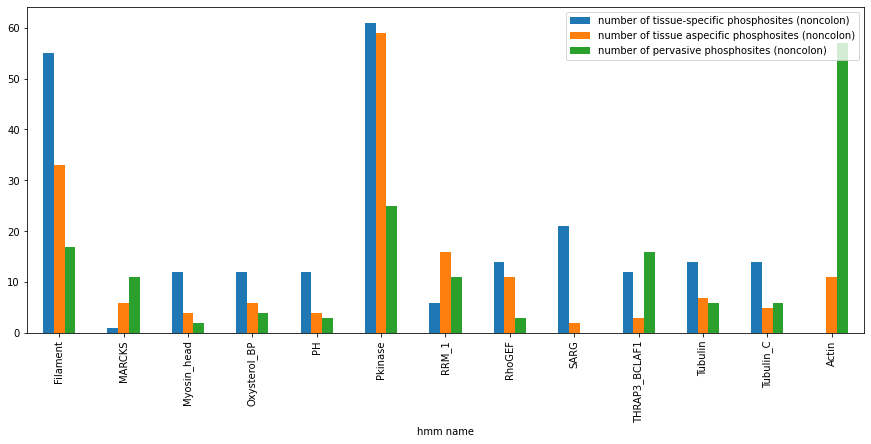

In [170]:
df_hmm_tspec_noncolon = tspec_sites_pfam.loc[tspec_sites_pfam["Colon"]==1, :].groupby(["hmm name", "ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"})
df_hmm_taspec_noncolon = taspec_sites_pfam.loc[taspec_sites_pfam["Colon"]==1, :].groupby(["hmm name", "ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"})
df_hmm_gen_noncolon = gen_sites_pfam.loc[gen_sites_pfam["Colon"]==1, :].groupby(["hmm name", "ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"})

df_hmm_tspec_noncolon = df_hmm_tspec_noncolon.groupby(["hmm name"], as_index=False)["ACC_ID"].count()
df_hmm_tspec_noncolon.rename({"ACC_ID": "number of tissue-specific phosphosites (noncolon)"}, inplace=True, axis=1)
df_hmm_tspec_noncolon.set_index(["hmm name"], inplace=True)
df_hmm_taspec_noncolon = df_hmm_taspec_noncolon.groupby(["hmm name"], as_index=False)["ACC_ID"].count()
df_hmm_taspec_noncolon.rename({"ACC_ID": "number of tissue aspecific phosphosites (noncolon)"}, inplace=True, axis=1)
df_hmm_taspec_noncolon.set_index(["hmm name"], inplace=True)
df_hmm_gen_noncolon = df_hmm_gen_noncolon.groupby(["hmm name"], as_index=False)["ACC_ID"].count()
df_hmm_gen_noncolon.rename({"ACC_ID": "number of pervasive phosphosites (noncolon)"}, inplace=True, axis=1)
df_hmm_gen_noncolon.set_index(["hmm name"], inplace=True)
df_hmm_all_noncolon = pd.concat([df_hmm_tspec_noncolon, df_hmm_taspec_noncolon, df_hmm_gen_noncolon], axis=1)
df_hmm_all_noncolon[((df_hmm_all_noncolon["number of tissue-specific phosphosites (noncolon)"]>10)|
                 (df_hmm_all_noncolon["number of tissue aspecific phosphosites (noncolon)"]>10)|
                 (df_hmm_all_noncolon["number of pervasive phosphosites (noncolon)"]>10))].plot(kind="bar", figsize=(15,6))


## Adipose tissue

<AxesSubplot:xlabel='clan'>

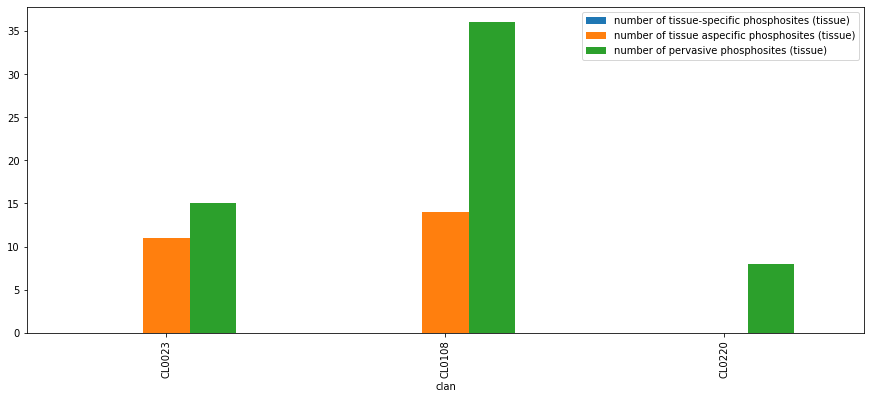

In [171]:
df_clan_tspec_tissue = tspec_sites_pfam.loc[tspec_sites_pfam["Adipose tissue"]==1, :].groupby(["clan", "ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"})
df_clan_taspec_tissue = taspec_sites_pfam.loc[taspec_sites_pfam["Adipose tissue"]==1, :].groupby(["clan", "ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"})
df_clan_gen_tissue = gen_sites_pfam.loc[gen_sites_pfam["Adipose tissue"]==1, :].groupby(["clan", "ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"})

df_clan_tspec_tissue = df_clan_tspec_tissue.groupby(["clan"], as_index=False)["ACC_ID"].count()
df_clan_tspec_tissue.rename({"ACC_ID": "number of tissue-specific phosphosites (tissue)"}, inplace=True, axis=1)
df_clan_tspec_tissue.set_index(["clan"], inplace=True)
df_clan_taspec_tissue = df_clan_taspec_tissue.groupby(["clan"], as_index=False)["ACC_ID"].count()
df_clan_taspec_tissue.rename({"ACC_ID": "number of tissue aspecific phosphosites (tissue)"}, inplace=True, axis=1)
df_clan_taspec_tissue.set_index(["clan"], inplace=True)
df_clan_gen_tissue = df_clan_gen_tissue.groupby(["clan"], as_index=False)["ACC_ID"].count()
df_clan_gen_tissue.rename({"ACC_ID": "number of pervasive phosphosites (tissue)"}, inplace=True, axis=1)
df_clan_gen_tissue.set_index(["clan"], inplace=True)
df_clan_all_tissue = pd.concat([df_clan_tspec_tissue, df_clan_taspec_tissue, df_clan_gen_tissue], axis=1)
df_clan_all_tissue[((df_clan_all_tissue["number of tissue-specific phosphosites (tissue)"]>5)|
                 (df_clan_all_tissue["number of tissue aspecific phosphosites (tissue)"]>5)|
                 (df_clan_all_tissue["number of pervasive phosphosites (tissue)"]>5))].drop(["No_clan"]).plot(kind="bar", figsize=(15,6))

<AxesSubplot:xlabel='hmm name'>

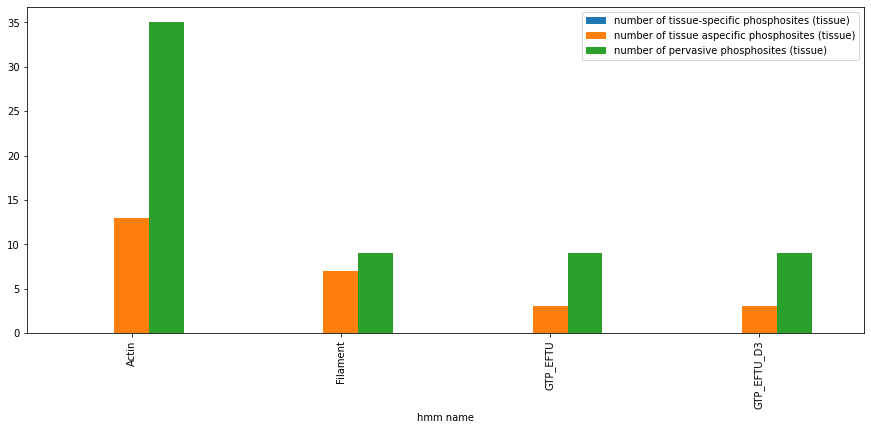

In [172]:
df_hmm_tspec_tissue = tspec_sites_pfam.loc[tspec_sites_pfam["Adipose tissue"]==1, :].groupby(["hmm name", "ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"})
df_hmm_taspec_tissue = taspec_sites_pfam.loc[taspec_sites_pfam["Adipose tissue"]==1, :].groupby(["hmm name", "ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"})
df_hmm_gen_tissue = gen_sites_pfam.loc[gen_sites_pfam["Adipose tissue"]==1, :].groupby(["hmm name", "ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"})

df_hmm_tspec_tissue = df_hmm_tspec_tissue.groupby(["hmm name"], as_index=False)["ACC_ID"].count()
df_hmm_tspec_tissue.rename({"ACC_ID": "number of tissue-specific phosphosites (tissue)"}, inplace=True, axis=1)
df_hmm_tspec_tissue.set_index(["hmm name"], inplace=True)
df_hmm_taspec_tissue = df_hmm_taspec_tissue.groupby(["hmm name"], as_index=False)["ACC_ID"].count()
df_hmm_taspec_tissue.rename({"ACC_ID": "number of tissue aspecific phosphosites (tissue)"}, inplace=True, axis=1)
df_hmm_taspec_tissue.set_index(["hmm name"], inplace=True)
df_hmm_gen_tissue = df_hmm_gen_tissue.groupby(["hmm name"], as_index=False)["ACC_ID"].count()
df_hmm_gen_tissue.rename({"ACC_ID": "number of pervasive phosphosites (tissue)"}, inplace=True, axis=1)
df_hmm_gen_tissue.set_index(["hmm name"], inplace=True)
df_hmm_all_tissue = pd.concat([df_hmm_tspec_tissue, df_hmm_taspec_tissue, df_hmm_gen_tissue], axis=1)
df_hmm_all_tissue[((df_hmm_all_tissue["number of tissue-specific phosphosites (tissue)"]>7)|
                 (df_hmm_all_tissue["number of tissue aspecific phosphosites (tissue)"]>7)|
                 (df_hmm_all_tissue["number of pervasive phosphosites (tissue)"]>7))].plot(kind="bar", figsize=(15,6))


## B-cells

<AxesSubplot:xlabel='clan'>

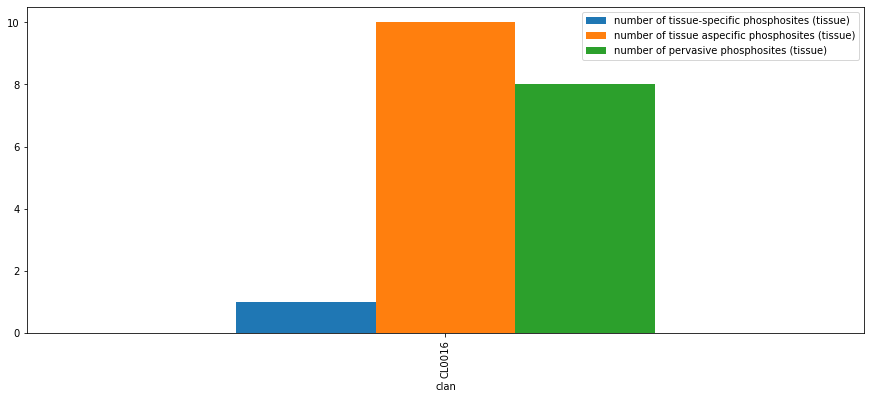

In [173]:
df_clan_tspec_tissue = tspec_sites_pfam.loc[tspec_sites_pfam["B-cells"]==1, :].groupby(["clan", "ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"})
df_clan_taspec_tissue = taspec_sites_pfam.loc[taspec_sites_pfam["B-cells"]==1, :].groupby(["clan", "ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"})
df_clan_gen_tissue = gen_sites_pfam.loc[gen_sites_pfam["B-cells"]==1, :].groupby(["clan", "ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"})

df_clan_tspec_tissue = df_clan_tspec_tissue.groupby(["clan"], as_index=False)["ACC_ID"].count()
df_clan_tspec_tissue.rename({"ACC_ID": "number of tissue-specific phosphosites (tissue)"}, inplace=True, axis=1)
df_clan_tspec_tissue.set_index(["clan"], inplace=True)
df_clan_taspec_tissue = df_clan_taspec_tissue.groupby(["clan"], as_index=False)["ACC_ID"].count()
df_clan_taspec_tissue.rename({"ACC_ID": "number of tissue aspecific phosphosites (tissue)"}, inplace=True, axis=1)
df_clan_taspec_tissue.set_index(["clan"], inplace=True)
df_clan_gen_tissue = df_clan_gen_tissue.groupby(["clan"], as_index=False)["ACC_ID"].count()
df_clan_gen_tissue.rename({"ACC_ID": "number of pervasive phosphosites (tissue)"}, inplace=True, axis=1)
df_clan_gen_tissue.set_index(["clan"], inplace=True)
df_clan_all_tissue = pd.concat([df_clan_tspec_tissue, df_clan_taspec_tissue, df_clan_gen_tissue], axis=1)
df_clan_all_tissue[((df_clan_all_tissue["number of tissue-specific phosphosites (tissue)"]>5)|
                 (df_clan_all_tissue["number of tissue aspecific phosphosites (tissue)"]>5)|
                 (df_clan_all_tissue["number of pervasive phosphosites (tissue)"]>5))].drop(["No_clan"]).plot(kind="bar", figsize=(15,6))

<AxesSubplot:xlabel='hmm name'>

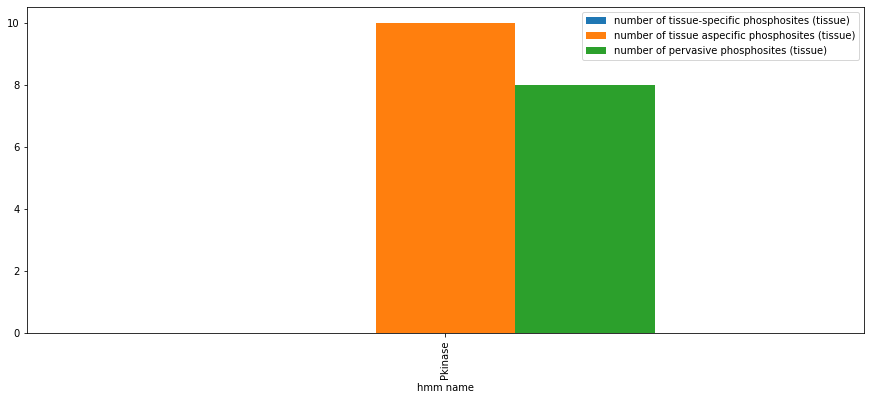

In [174]:
df_hmm_tspec_tissue = tspec_sites_pfam.loc[tspec_sites_pfam["B-cells"]==1, :].groupby(["hmm name", "ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"})
df_hmm_taspec_tissue = taspec_sites_pfam.loc[taspec_sites_pfam["B-cells"]==1, :].groupby(["hmm name", "ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"})
df_hmm_gen_tissue = gen_sites_pfam.loc[gen_sites_pfam["B-cells"]==1, :].groupby(["hmm name", "ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"})

df_hmm_tspec_tissue = df_hmm_tspec_tissue.groupby(["hmm name"], as_index=False)["ACC_ID"].count()
df_hmm_tspec_tissue.rename({"ACC_ID": "number of tissue-specific phosphosites (tissue)"}, inplace=True, axis=1)
df_hmm_tspec_tissue.set_index(["hmm name"], inplace=True)
df_hmm_taspec_tissue = df_hmm_taspec_tissue.groupby(["hmm name"], as_index=False)["ACC_ID"].count()
df_hmm_taspec_tissue.rename({"ACC_ID": "number of tissue aspecific phosphosites (tissue)"}, inplace=True, axis=1)
df_hmm_taspec_tissue.set_index(["hmm name"], inplace=True)
df_hmm_gen_tissue = df_hmm_gen_tissue.groupby(["hmm name"], as_index=False)["ACC_ID"].count()
df_hmm_gen_tissue.rename({"ACC_ID": "number of pervasive phosphosites (tissue)"}, inplace=True, axis=1)
df_hmm_gen_tissue.set_index(["hmm name"], inplace=True)
df_hmm_all_tissue = pd.concat([df_hmm_tspec_tissue, df_hmm_taspec_tissue, df_hmm_gen_tissue], axis=1)
df_hmm_all_tissue[((df_hmm_all_tissue["number of tissue-specific phosphosites (tissue)"]>7)|
                 (df_hmm_all_tissue["number of tissue aspecific phosphosites (tissue)"]>7)|
                 (df_hmm_all_tissue["number of pervasive phosphosites (tissue)"]>7))].plot(kind="bar", figsize=(15,6))

## Blood

<AxesSubplot:xlabel='clan'>

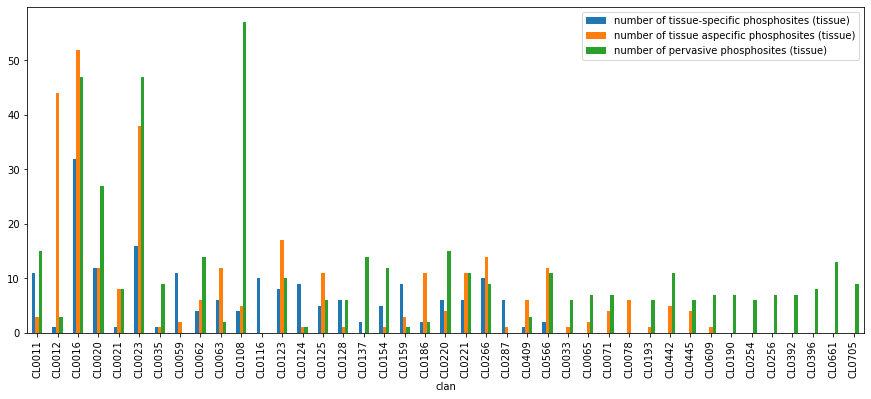

In [175]:
df_clan_tspec_tissue = tspec_sites_pfam.loc[tspec_sites_pfam["Blood"]==1, :].groupby(["clan", "ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"})
df_clan_taspec_tissue = taspec_sites_pfam.loc[taspec_sites_pfam["Blood"]==1, :].groupby(["clan", "ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"})
df_clan_gen_tissue = gen_sites_pfam.loc[gen_sites_pfam["Blood"]==1, :].groupby(["clan", "ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"})

df_clan_tspec_tissue = df_clan_tspec_tissue.groupby(["clan"], as_index=False)["ACC_ID"].count()
df_clan_tspec_tissue.rename({"ACC_ID": "number of tissue-specific phosphosites (tissue)"}, inplace=True, axis=1)
df_clan_tspec_tissue.set_index(["clan"], inplace=True)
df_clan_taspec_tissue = df_clan_taspec_tissue.groupby(["clan"], as_index=False)["ACC_ID"].count()
df_clan_taspec_tissue.rename({"ACC_ID": "number of tissue aspecific phosphosites (tissue)"}, inplace=True, axis=1)
df_clan_taspec_tissue.set_index(["clan"], inplace=True)
df_clan_gen_tissue = df_clan_gen_tissue.groupby(["clan"], as_index=False)["ACC_ID"].count()
df_clan_gen_tissue.rename({"ACC_ID": "number of pervasive phosphosites (tissue)"}, inplace=True, axis=1)
df_clan_gen_tissue.set_index(["clan"], inplace=True)
df_clan_all_tissue = pd.concat([df_clan_tspec_tissue, df_clan_taspec_tissue, df_clan_gen_tissue], axis=1)
df_clan_all_tissue[((df_clan_all_tissue["number of tissue-specific phosphosites (tissue)"]>5)|
                 (df_clan_all_tissue["number of tissue aspecific phosphosites (tissue)"]>5)|
                 (df_clan_all_tissue["number of pervasive phosphosites (tissue)"]>5))].drop(["No_clan"]).plot(kind="bar", figsize=(15,6))

<AxesSubplot:xlabel='hmm name'>

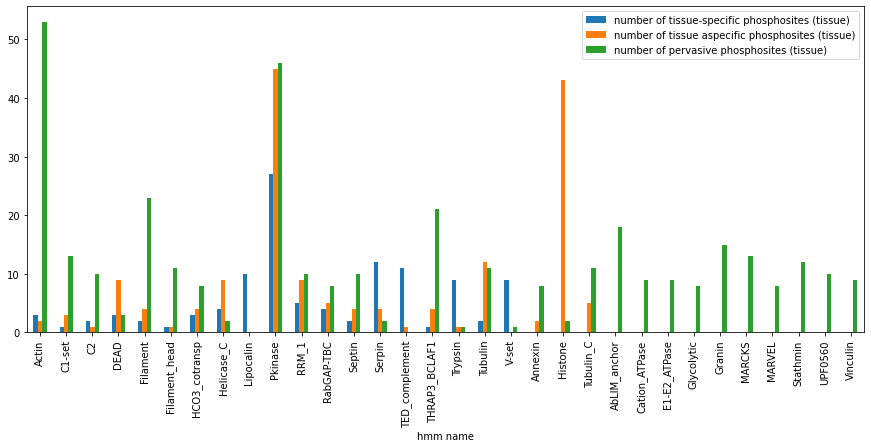

In [176]:
df_hmm_tspec_tissue = tspec_sites_pfam.loc[tspec_sites_pfam["Blood"]==1, :].groupby(["hmm name", "ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"})
df_hmm_taspec_tissue = taspec_sites_pfam.loc[taspec_sites_pfam["Blood"]==1, :].groupby(["hmm name", "ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"})
df_hmm_gen_tissue = gen_sites_pfam.loc[gen_sites_pfam["Blood"]==1, :].groupby(["hmm name", "ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"})

df_hmm_tspec_tissue = df_hmm_tspec_tissue.groupby(["hmm name"], as_index=False)["ACC_ID"].count()
df_hmm_tspec_tissue.rename({"ACC_ID": "number of tissue-specific phosphosites (tissue)"}, inplace=True, axis=1)
df_hmm_tspec_tissue.set_index(["hmm name"], inplace=True)
df_hmm_taspec_tissue = df_hmm_taspec_tissue.groupby(["hmm name"], as_index=False)["ACC_ID"].count()
df_hmm_taspec_tissue.rename({"ACC_ID": "number of tissue aspecific phosphosites (tissue)"}, inplace=True, axis=1)
df_hmm_taspec_tissue.set_index(["hmm name"], inplace=True)
df_hmm_gen_tissue = df_hmm_gen_tissue.groupby(["hmm name"], as_index=False)["ACC_ID"].count()
df_hmm_gen_tissue.rename({"ACC_ID": "number of pervasive phosphosites (tissue)"}, inplace=True, axis=1)
df_hmm_gen_tissue.set_index(["hmm name"], inplace=True)
df_hmm_all_tissue = pd.concat([df_hmm_tspec_tissue, df_hmm_taspec_tissue, df_hmm_gen_tissue], axis=1)
df_hmm_all_tissue[((df_hmm_all_tissue["number of tissue-specific phosphosites (tissue)"]>7)|
                 (df_hmm_all_tissue["number of tissue aspecific phosphosites (tissue)"]>7)|
                 (df_hmm_all_tissue["number of pervasive phosphosites (tissue)"]>7))].plot(kind="bar", figsize=(15,6))

## Bone

In [177]:
df_clan_tspec_tissue = tspec_sites_pfam.loc[tspec_sites_pfam["Bone"]==1, :].groupby(["clan", "ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"})
df_clan_taspec_tissue = taspec_sites_pfam.loc[taspec_sites_pfam["Bone"]==1, :].groupby(["clan", "ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"})
df_clan_gen_tissue = gen_sites_pfam.loc[gen_sites_pfam["Bone"]==1, :].groupby(["clan", "ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"})

df_clan_tspec_tissue = df_clan_tspec_tissue.groupby(["clan"], as_index=False)["ACC_ID"].count()
df_clan_tspec_tissue.rename({"ACC_ID": "number of tissue-specific phosphosites (tissue)"}, inplace=True, axis=1)
df_clan_tspec_tissue.set_index(["clan"], inplace=True)
df_clan_taspec_tissue = df_clan_taspec_tissue.groupby(["clan"], as_index=False)["ACC_ID"].count()
df_clan_taspec_tissue.rename({"ACC_ID": "number of tissue aspecific phosphosites (tissue)"}, inplace=True, axis=1)
df_clan_taspec_tissue.set_index(["clan"], inplace=True)
df_clan_gen_tissue = df_clan_gen_tissue.groupby(["clan"], as_index=False)["ACC_ID"].count()
df_clan_gen_tissue.rename({"ACC_ID": "number of pervasive phosphosites (tissue)"}, inplace=True, axis=1)
df_clan_gen_tissue.set_index(["clan"], inplace=True)
df_clan_all_tissue = pd.concat([df_clan_tspec_tissue, df_clan_taspec_tissue, df_clan_gen_tissue], axis=1)
df_clan_all_tissue[((df_clan_all_tissue["number of tissue-specific phosphosites (tissue)"]>5)|
                 (df_clan_all_tissue["number of tissue aspecific phosphosites (tissue)"]>5)|
                 (df_clan_all_tissue["number of pervasive phosphosites (tissue)"]>5))]#.plot(kind="bar", figsize=(15,6))


Empty DataFrame
Columns: [number of tissue-specific phosphosites (tissue), number of tissue aspecific phosphosites (tissue), number of pervasive phosphosites (tissue)]
Index: []

In [178]:


df_hmm_tspec_tissue = tspec_sites_pfam.loc[tspec_sites_pfam["Bone"]==1, :].groupby(["hmm name", "ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"})
df_hmm_taspec_tissue = taspec_sites_pfam.loc[taspec_sites_pfam["Bone"]==1, :].groupby(["hmm name", "ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"})
df_hmm_gen_tissue = gen_sites_pfam.loc[gen_sites_pfam["Bone"]==1, :].groupby(["hmm name", "ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"})

df_hmm_tspec_tissue = df_hmm_tspec_tissue.groupby(["hmm name"], as_index=False)["ACC_ID"].count()
df_hmm_tspec_tissue.rename({"ACC_ID": "number of tissue-specific phosphosites (tissue)"}, inplace=True, axis=1)
df_hmm_tspec_tissue.set_index(["hmm name"], inplace=True)
df_hmm_taspec_tissue = df_hmm_taspec_tissue.groupby(["hmm name"], as_index=False)["ACC_ID"].count()
df_hmm_taspec_tissue.rename({"ACC_ID": "number of tissue aspecific phosphosites (tissue)"}, inplace=True, axis=1)
df_hmm_taspec_tissue.set_index(["hmm name"], inplace=True)
df_hmm_gen_tissue = df_hmm_gen_tissue.groupby(["hmm name"], as_index=False)["ACC_ID"].count()
df_hmm_gen_tissue.rename({"ACC_ID": "number of pervasive phosphosites (tissue)"}, inplace=True, axis=1)
df_hmm_gen_tissue.set_index(["hmm name"], inplace=True)
df_hmm_all_tissue = pd.concat([df_hmm_tspec_tissue, df_hmm_taspec_tissue, df_hmm_gen_tissue], axis=1)
df_hmm_all_tissue[((df_hmm_all_tissue["number of tissue-specific phosphosites (tissue)"]>7)|
                 (df_hmm_all_tissue["number of tissue aspecific phosphosites (tissue)"]>7)|
                 (df_hmm_all_tissue["number of pervasive phosphosites (tissue)"]>7))]#.plot(kind="bar", figsize=(15,6))


Empty DataFrame
Columns: [number of tissue-specific phosphosites (tissue), number of tissue aspecific phosphosites (tissue), number of pervasive phosphosites (tissue)]
Index: []

## Brain

<AxesSubplot:xlabel='clan'>

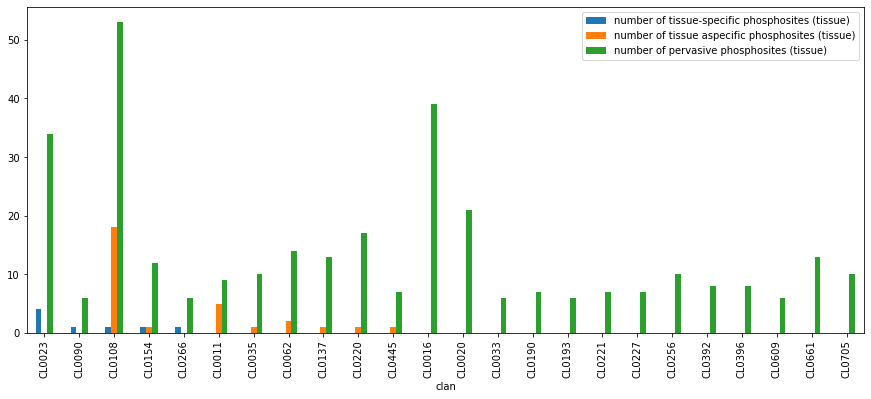

In [179]:
df_clan_tspec_tissue = tspec_sites_pfam.loc[tspec_sites_pfam["Brain"]==1, :].groupby(["clan", "ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"})
df_clan_taspec_tissue = taspec_sites_pfam.loc[taspec_sites_pfam["Brain"]==1, :].groupby(["clan", "ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"})
df_clan_gen_tissue = gen_sites_pfam.loc[gen_sites_pfam["Brain"]==1, :].groupby(["clan", "ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"})

df_clan_tspec_tissue = df_clan_tspec_tissue.groupby(["clan"], as_index=False)["ACC_ID"].count()
df_clan_tspec_tissue.rename({"ACC_ID": "number of tissue-specific phosphosites (tissue)"}, inplace=True, axis=1)
df_clan_tspec_tissue.set_index(["clan"], inplace=True)
df_clan_taspec_tissue = df_clan_taspec_tissue.groupby(["clan"], as_index=False)["ACC_ID"].count()
df_clan_taspec_tissue.rename({"ACC_ID": "number of tissue aspecific phosphosites (tissue)"}, inplace=True, axis=1)
df_clan_taspec_tissue.set_index(["clan"], inplace=True)
df_clan_gen_tissue = df_clan_gen_tissue.groupby(["clan"], as_index=False)["ACC_ID"].count()
df_clan_gen_tissue.rename({"ACC_ID": "number of pervasive phosphosites (tissue)"}, inplace=True, axis=1)
df_clan_gen_tissue.set_index(["clan"], inplace=True)
df_clan_all_tissue = pd.concat([df_clan_tspec_tissue, df_clan_taspec_tissue, df_clan_gen_tissue], axis=1)
df_clan_all_tissue[((df_clan_all_tissue["number of tissue-specific phosphosites (tissue)"]>5)|
                 (df_clan_all_tissue["number of tissue aspecific phosphosites (tissue)"]>5)|
                 (df_clan_all_tissue["number of pervasive phosphosites (tissue)"]>5))].drop(["No_clan"]).plot(kind="bar", figsize=(15,6))


<AxesSubplot:xlabel='hmm name'>

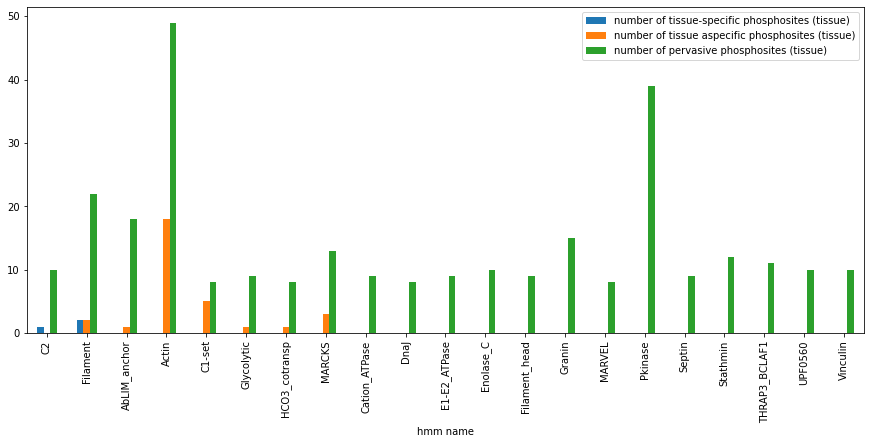

In [180]:
df_hmm_tspec_tissue = tspec_sites_pfam.loc[tspec_sites_pfam["Brain"]==1, :].groupby(["hmm name", "ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"})
df_hmm_taspec_tissue = taspec_sites_pfam.loc[taspec_sites_pfam["Brain"]==1, :].groupby(["hmm name", "ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"})
df_hmm_gen_tissue = gen_sites_pfam.loc[gen_sites_pfam["Brain"]==1, :].groupby(["hmm name", "ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"})

df_hmm_tspec_tissue = df_hmm_tspec_tissue.groupby(["hmm name"], as_index=False)["ACC_ID"].count()
df_hmm_tspec_tissue.rename({"ACC_ID": "number of tissue-specific phosphosites (tissue)"}, inplace=True, axis=1)
df_hmm_tspec_tissue.set_index(["hmm name"], inplace=True)
df_hmm_taspec_tissue = df_hmm_taspec_tissue.groupby(["hmm name"], as_index=False)["ACC_ID"].count()
df_hmm_taspec_tissue.rename({"ACC_ID": "number of tissue aspecific phosphosites (tissue)"}, inplace=True, axis=1)
df_hmm_taspec_tissue.set_index(["hmm name"], inplace=True)
df_hmm_gen_tissue = df_hmm_gen_tissue.groupby(["hmm name"], as_index=False)["ACC_ID"].count()
df_hmm_gen_tissue.rename({"ACC_ID": "number of pervasive phosphosites (tissue)"}, inplace=True, axis=1)
df_hmm_gen_tissue.set_index(["hmm name"], inplace=True)
df_hmm_all_tissue = pd.concat([df_hmm_tspec_tissue, df_hmm_taspec_tissue, df_hmm_gen_tissue], axis=1)
df_hmm_all_tissue[((df_hmm_all_tissue["number of tissue-specific phosphosites (tissue)"]>7)|
                 (df_hmm_all_tissue["number of tissue aspecific phosphosites (tissue)"]>7)|
                 (df_hmm_all_tissue["number of pervasive phosphosites (tissue)"]>7))].plot(kind="bar", figsize=(15,6))


## Breast

<AxesSubplot:xlabel='clan'>

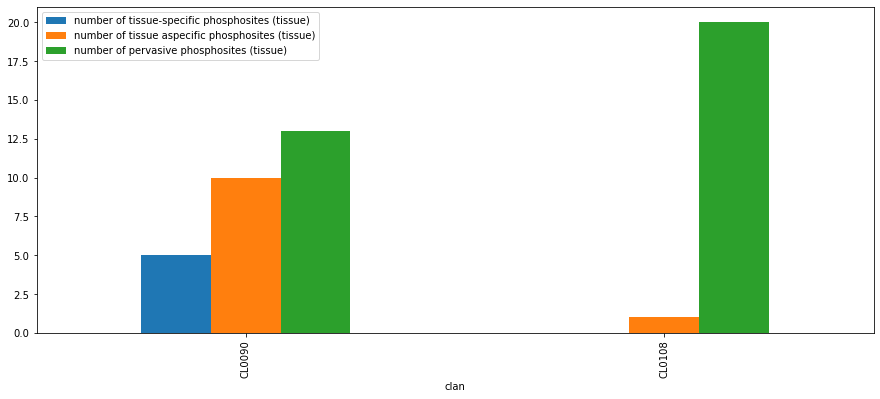

In [181]:
df_clan_tspec_tissue = tspec_sites_pfam.loc[tspec_sites_pfam["Breast"]==1, :].groupby(["clan", "ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"})
df_clan_taspec_tissue = taspec_sites_pfam.loc[taspec_sites_pfam["Breast"]==1, :].groupby(["clan", "ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"})
df_clan_gen_tissue = gen_sites_pfam.loc[gen_sites_pfam["Breast"]==1, :].groupby(["clan", "ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"})

df_clan_tspec_tissue = df_clan_tspec_tissue.groupby(["clan"], as_index=False)["ACC_ID"].count()
df_clan_tspec_tissue.rename({"ACC_ID": "number of tissue-specific phosphosites (tissue)"}, inplace=True, axis=1)
df_clan_tspec_tissue.set_index(["clan"], inplace=True)
df_clan_taspec_tissue = df_clan_taspec_tissue.groupby(["clan"], as_index=False)["ACC_ID"].count()
df_clan_taspec_tissue.rename({"ACC_ID": "number of tissue aspecific phosphosites (tissue)"}, inplace=True, axis=1)
df_clan_taspec_tissue.set_index(["clan"], inplace=True)
df_clan_gen_tissue = df_clan_gen_tissue.groupby(["clan"], as_index=False)["ACC_ID"].count()
df_clan_gen_tissue.rename({"ACC_ID": "number of pervasive phosphosites (tissue)"}, inplace=True, axis=1)
df_clan_gen_tissue.set_index(["clan"], inplace=True)
df_clan_all_tissue = pd.concat([df_clan_tspec_tissue, df_clan_taspec_tissue, df_clan_gen_tissue], axis=1)
df_clan_all_tissue[((df_clan_all_tissue["number of tissue-specific phosphosites (tissue)"]>5)|
                 (df_clan_all_tissue["number of tissue aspecific phosphosites (tissue)"]>5)|
                 (df_clan_all_tissue["number of pervasive phosphosites (tissue)"]>5))].plot(kind="bar", figsize=(15,6))



<AxesSubplot:xlabel='hmm name'>

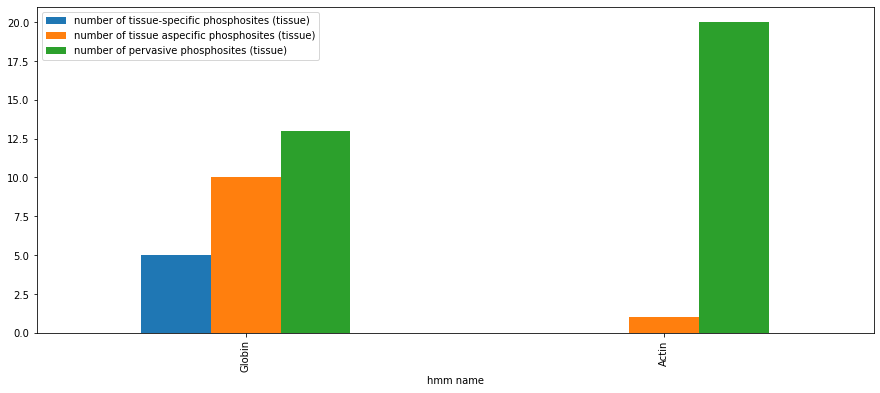

In [182]:



df_hmm_tspec_tissue = tspec_sites_pfam.loc[tspec_sites_pfam["Breast"]==1, :].groupby(["hmm name", "ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"})
df_hmm_taspec_tissue = taspec_sites_pfam.loc[taspec_sites_pfam["Breast"]==1, :].groupby(["hmm name", "ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"})
df_hmm_gen_tissue = gen_sites_pfam.loc[gen_sites_pfam["Breast"]==1, :].groupby(["hmm name", "ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"})

df_hmm_tspec_tissue = df_hmm_tspec_tissue.groupby(["hmm name"], as_index=False)["ACC_ID"].count()
df_hmm_tspec_tissue.rename({"ACC_ID": "number of tissue-specific phosphosites (tissue)"}, inplace=True, axis=1)
df_hmm_tspec_tissue.set_index(["hmm name"], inplace=True)
df_hmm_taspec_tissue = df_hmm_taspec_tissue.groupby(["hmm name"], as_index=False)["ACC_ID"].count()
df_hmm_taspec_tissue.rename({"ACC_ID": "number of tissue aspecific phosphosites (tissue)"}, inplace=True, axis=1)
df_hmm_taspec_tissue.set_index(["hmm name"], inplace=True)
df_hmm_gen_tissue = df_hmm_gen_tissue.groupby(["hmm name"], as_index=False)["ACC_ID"].count()
df_hmm_gen_tissue.rename({"ACC_ID": "number of pervasive phosphosites (tissue)"}, inplace=True, axis=1)
df_hmm_gen_tissue.set_index(["hmm name"], inplace=True)
df_hmm_all_tissue = pd.concat([df_hmm_tspec_tissue, df_hmm_taspec_tissue, df_hmm_gen_tissue], axis=1)
df_hmm_all_tissue[((df_hmm_all_tissue["number of tissue-specific phosphosites (tissue)"]>7)|
                 (df_hmm_all_tissue["number of tissue aspecific phosphosites (tissue)"]>7)|
                 (df_hmm_all_tissue["number of pervasive phosphosites (tissue)"]>7))].plot(kind="bar", figsize=(15,6))


## Cerebrospinal fluid

<AxesSubplot:xlabel='clan'>

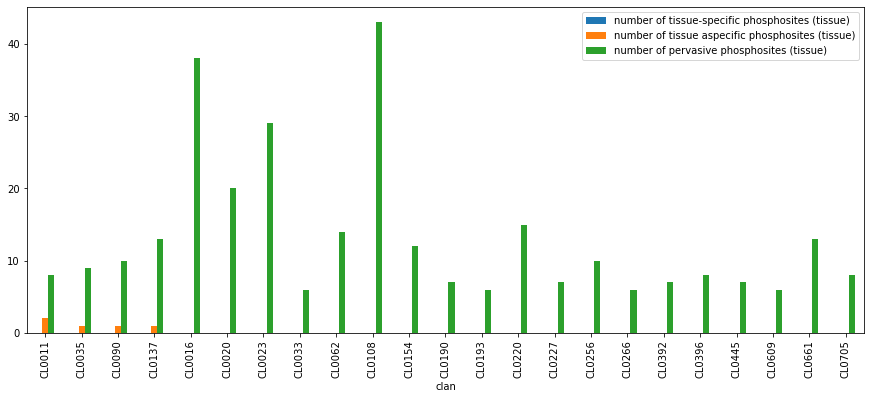

In [183]:
df_clan_tspec_tissue = tspec_sites_pfam.loc[tspec_sites_pfam["Cerebrospinal fluid"]==1, :].groupby(["clan", "ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"})
df_clan_taspec_tissue = taspec_sites_pfam.loc[taspec_sites_pfam["Cerebrospinal fluid"]==1, :].groupby(["clan", "ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"})
df_clan_gen_tissue = gen_sites_pfam.loc[gen_sites_pfam["Cerebrospinal fluid"]==1, :].groupby(["clan", "ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"})

df_clan_tspec_tissue = df_clan_tspec_tissue.groupby(["clan"], as_index=False)["ACC_ID"].count()
df_clan_tspec_tissue.rename({"ACC_ID": "number of tissue-specific phosphosites (tissue)"}, inplace=True, axis=1)
df_clan_tspec_tissue.set_index(["clan"], inplace=True)
df_clan_taspec_tissue = df_clan_taspec_tissue.groupby(["clan"], as_index=False)["ACC_ID"].count()
df_clan_taspec_tissue.rename({"ACC_ID": "number of tissue aspecific phosphosites (tissue)"}, inplace=True, axis=1)
df_clan_taspec_tissue.set_index(["clan"], inplace=True)
df_clan_gen_tissue = df_clan_gen_tissue.groupby(["clan"], as_index=False)["ACC_ID"].count()
df_clan_gen_tissue.rename({"ACC_ID": "number of pervasive phosphosites (tissue)"}, inplace=True, axis=1)
df_clan_gen_tissue.set_index(["clan"], inplace=True)
df_clan_all_tissue = pd.concat([df_clan_tspec_tissue, df_clan_taspec_tissue, df_clan_gen_tissue], axis=1)
df_clan_all_tissue[((df_clan_all_tissue["number of tissue-specific phosphosites (tissue)"]>5)|
                 (df_clan_all_tissue["number of tissue aspecific phosphosites (tissue)"]>5)|
                 (df_clan_all_tissue["number of pervasive phosphosites (tissue)"]>5))].drop(["No_clan"]).plot(kind="bar", figsize=(15,6))


<AxesSubplot:xlabel='hmm name'>

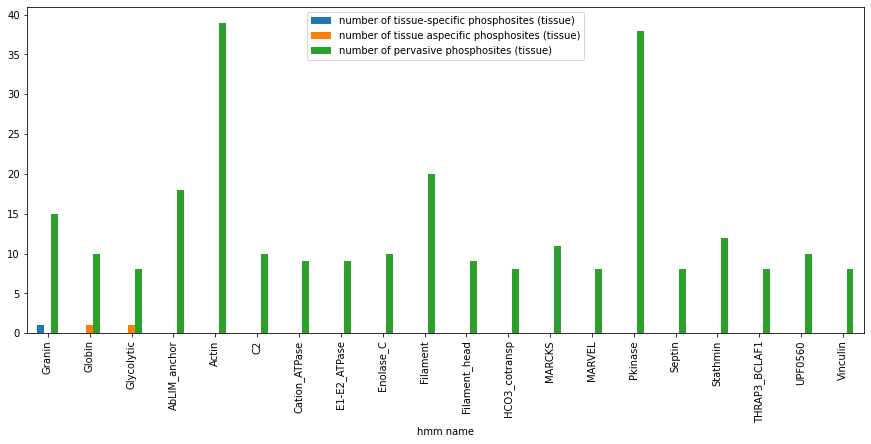

In [184]:
df_hmm_tspec_tissue = tspec_sites_pfam.loc[tspec_sites_pfam["Cerebrospinal fluid"]==1, :].groupby(["hmm name", "ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"})
df_hmm_taspec_tissue = taspec_sites_pfam.loc[taspec_sites_pfam["Cerebrospinal fluid"]==1, :].groupby(["hmm name", "ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"})
df_hmm_gen_tissue = gen_sites_pfam.loc[gen_sites_pfam["Cerebrospinal fluid"]==1, :].groupby(["hmm name", "ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"})

df_hmm_tspec_tissue = df_hmm_tspec_tissue.groupby(["hmm name"], as_index=False)["ACC_ID"].count()
df_hmm_tspec_tissue.rename({"ACC_ID": "number of tissue-specific phosphosites (tissue)"}, inplace=True, axis=1)
df_hmm_tspec_tissue.set_index(["hmm name"], inplace=True)
df_hmm_taspec_tissue = df_hmm_taspec_tissue.groupby(["hmm name"], as_index=False)["ACC_ID"].count()
df_hmm_taspec_tissue.rename({"ACC_ID": "number of tissue aspecific phosphosites (tissue)"}, inplace=True, axis=1)
df_hmm_taspec_tissue.set_index(["hmm name"], inplace=True)
df_hmm_gen_tissue = df_hmm_gen_tissue.groupby(["hmm name"], as_index=False)["ACC_ID"].count()
df_hmm_gen_tissue.rename({"ACC_ID": "number of pervasive phosphosites (tissue)"}, inplace=True, axis=1)
df_hmm_gen_tissue.set_index(["hmm name"], inplace=True)
df_hmm_all_tissue = pd.concat([df_hmm_tspec_tissue, df_hmm_taspec_tissue, df_hmm_gen_tissue], axis=1)
df_hmm_all_tissue[((df_hmm_all_tissue["number of tissue-specific phosphosites (tissue)"]>7)|
                 (df_hmm_all_tissue["number of tissue aspecific phosphosites (tissue)"]>7)|
                 (df_hmm_all_tissue["number of pervasive phosphosites (tissue)"]>7))].plot(kind="bar", figsize=(15,6))


## Cervix

<AxesSubplot:xlabel='clan'>

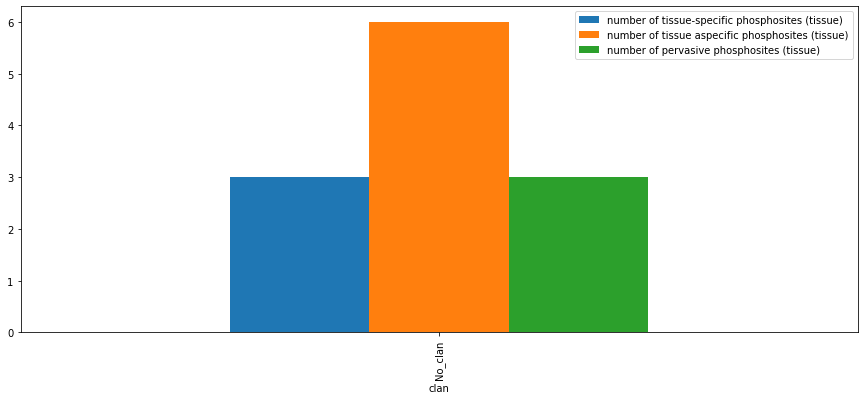

In [185]:
df_clan_tspec_tissue = tspec_sites_pfam.loc[tspec_sites_pfam["Cervix"]==1, :].groupby(["clan", "ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"})
df_clan_taspec_tissue = taspec_sites_pfam.loc[taspec_sites_pfam["Cervix"]==1, :].groupby(["clan", "ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"})
df_clan_gen_tissue = gen_sites_pfam.loc[gen_sites_pfam["Cervix"]==1, :].groupby(["clan", "ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"})

df_clan_tspec_tissue = df_clan_tspec_tissue.groupby(["clan"], as_index=False)["ACC_ID"].count()
df_clan_tspec_tissue.rename({"ACC_ID": "number of tissue-specific phosphosites (tissue)"}, inplace=True, axis=1)
df_clan_tspec_tissue.set_index(["clan"], inplace=True)
df_clan_taspec_tissue = df_clan_taspec_tissue.groupby(["clan"], as_index=False)["ACC_ID"].count()
df_clan_taspec_tissue.rename({"ACC_ID": "number of tissue aspecific phosphosites (tissue)"}, inplace=True, axis=1)
df_clan_taspec_tissue.set_index(["clan"], inplace=True)
df_clan_gen_tissue = df_clan_gen_tissue.groupby(["clan"], as_index=False)["ACC_ID"].count()
df_clan_gen_tissue.rename({"ACC_ID": "number of pervasive phosphosites (tissue)"}, inplace=True, axis=1)
df_clan_gen_tissue.set_index(["clan"], inplace=True)
df_clan_all_tissue = pd.concat([df_clan_tspec_tissue, df_clan_taspec_tissue, df_clan_gen_tissue], axis=1)
df_clan_all_tissue[((df_clan_all_tissue["number of tissue-specific phosphosites (tissue)"]>5)|
                 (df_clan_all_tissue["number of tissue aspecific phosphosites (tissue)"]>5)|
                 (df_clan_all_tissue["number of pervasive phosphosites (tissue)"]>5))].plot(kind="bar", figsize=(15,6))


## Dental plaque

<AxesSubplot:xlabel='clan'>

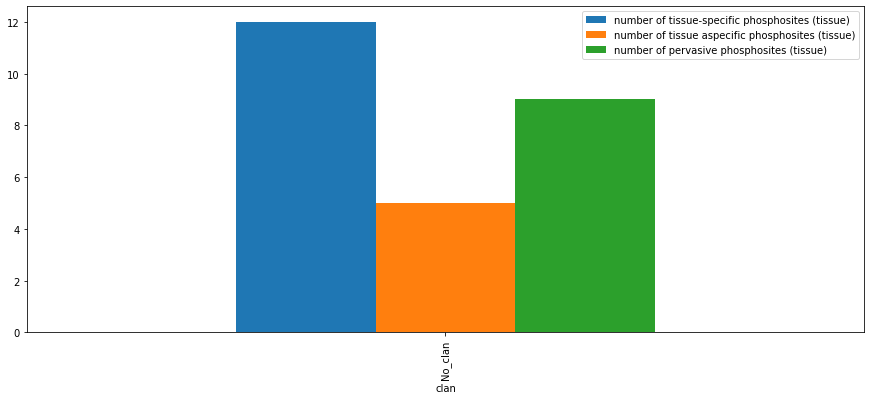

In [186]:
df_clan_tspec_tissue = tspec_sites_pfam.loc[tspec_sites_pfam["Dental plaque"]==1, :].groupby(["clan", "ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"})
df_clan_taspec_tissue = taspec_sites_pfam.loc[taspec_sites_pfam["Dental plaque"]==1, :].groupby(["clan", "ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"})
df_clan_gen_tissue = gen_sites_pfam.loc[gen_sites_pfam["Dental plaque"]==1, :].groupby(["clan", "ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"})

df_clan_tspec_tissue = df_clan_tspec_tissue.groupby(["clan"], as_index=False)["ACC_ID"].count()
df_clan_tspec_tissue.rename({"ACC_ID": "number of tissue-specific phosphosites (tissue)"}, inplace=True, axis=1)
df_clan_tspec_tissue.set_index(["clan"], inplace=True)
df_clan_taspec_tissue = df_clan_taspec_tissue.groupby(["clan"], as_index=False)["ACC_ID"].count()
df_clan_taspec_tissue.rename({"ACC_ID": "number of tissue aspecific phosphosites (tissue)"}, inplace=True, axis=1)
df_clan_taspec_tissue.set_index(["clan"], inplace=True)
df_clan_gen_tissue = df_clan_gen_tissue.groupby(["clan"], as_index=False)["ACC_ID"].count()
df_clan_gen_tissue.rename({"ACC_ID": "number of pervasive phosphosites (tissue)"}, inplace=True, axis=1)
df_clan_gen_tissue.set_index(["clan"], inplace=True)
df_clan_all_tissue = pd.concat([df_clan_tspec_tissue, df_clan_taspec_tissue, df_clan_gen_tissue], axis=1)
df_clan_all_tissue[((df_clan_all_tissue["number of tissue-specific phosphosites (tissue)"]>5)|
                 (df_clan_all_tissue["number of tissue aspecific phosphosites (tissue)"]>5)|
                 (df_clan_all_tissue["number of pervasive phosphosites (tissue)"]>5))].plot(kind="bar", figsize=(15,6))


## Esophagus

<AxesSubplot:xlabel='clan'>

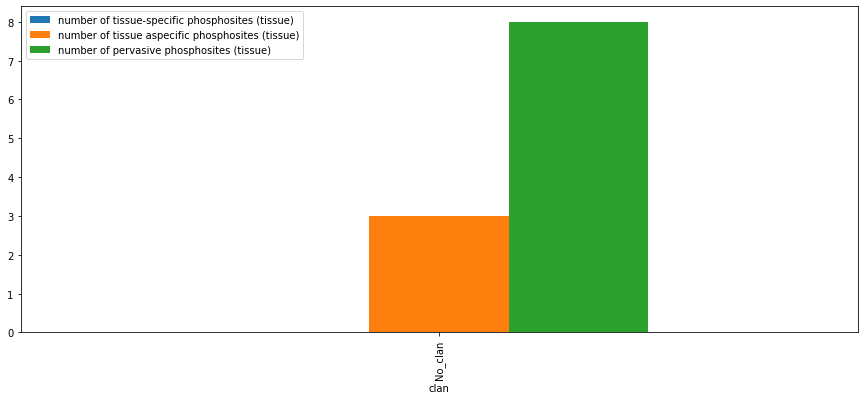

In [187]:
df_clan_tspec_tissue = tspec_sites_pfam.loc[tspec_sites_pfam["Esophagus"]==1, :].groupby(["clan", "ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"})
df_clan_taspec_tissue = taspec_sites_pfam.loc[taspec_sites_pfam["Esophagus"]==1, :].groupby(["clan", "ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"})
df_clan_gen_tissue = gen_sites_pfam.loc[gen_sites_pfam["Esophagus"]==1, :].groupby(["clan", "ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"})

df_clan_tspec_tissue = df_clan_tspec_tissue.groupby(["clan"], as_index=False)["ACC_ID"].count()
df_clan_tspec_tissue.rename({"ACC_ID": "number of tissue-specific phosphosites (tissue)"}, inplace=True, axis=1)
df_clan_tspec_tissue.set_index(["clan"], inplace=True)
df_clan_taspec_tissue = df_clan_taspec_tissue.groupby(["clan"], as_index=False)["ACC_ID"].count()
df_clan_taspec_tissue.rename({"ACC_ID": "number of tissue aspecific phosphosites (tissue)"}, inplace=True, axis=1)
df_clan_taspec_tissue.set_index(["clan"], inplace=True)
df_clan_gen_tissue = df_clan_gen_tissue.groupby(["clan"], as_index=False)["ACC_ID"].count()
df_clan_gen_tissue.rename({"ACC_ID": "number of pervasive phosphosites (tissue)"}, inplace=True, axis=1)
df_clan_gen_tissue.set_index(["clan"], inplace=True)
df_clan_all_tissue = pd.concat([df_clan_tspec_tissue, df_clan_taspec_tissue, df_clan_gen_tissue], axis=1)
df_clan_all_tissue[((df_clan_all_tissue["number of tissue-specific phosphosites (tissue)"]>5)|
                 (df_clan_all_tissue["number of tissue aspecific phosphosites (tissue)"]>5)|
                 (df_clan_all_tissue["number of pervasive phosphosites (tissue)"]>5))].plot(kind="bar", figsize=(15,6))


## Eye

<AxesSubplot:xlabel='clan'>

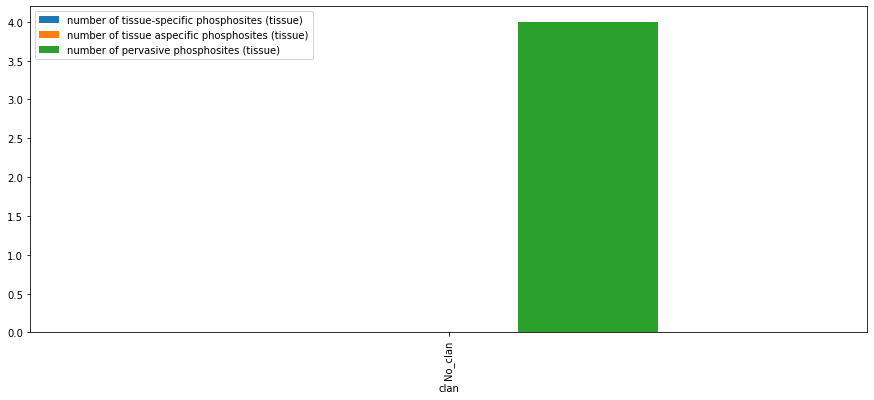

In [188]:
df_clan_tspec_tissue = tspec_sites_pfam.loc[tspec_sites_pfam["Eye"]==1, :].groupby(["clan", "ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"})
df_clan_taspec_tissue = taspec_sites_pfam.loc[taspec_sites_pfam["Eye"]==1, :].groupby(["clan", "ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"})
df_clan_gen_tissue = gen_sites_pfam.loc[gen_sites_pfam["Eye"]==1, :].groupby(["clan", "ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"})

df_clan_tspec_tissue = df_clan_tspec_tissue.groupby(["clan"], as_index=False)["ACC_ID"].count()
df_clan_tspec_tissue.rename({"ACC_ID": "number of tissue-specific phosphosites (tissue)"}, inplace=True, axis=1)
df_clan_tspec_tissue.set_index(["clan"], inplace=True)
df_clan_taspec_tissue = df_clan_taspec_tissue.groupby(["clan"], as_index=False)["ACC_ID"].count()
df_clan_taspec_tissue.rename({"ACC_ID": "number of tissue aspecific phosphosites (tissue)"}, inplace=True, axis=1)
df_clan_taspec_tissue.set_index(["clan"], inplace=True)
df_clan_gen_tissue = df_clan_gen_tissue.groupby(["clan"], as_index=False)["ACC_ID"].count()
df_clan_gen_tissue.rename({"ACC_ID": "number of pervasive phosphosites (tissue)"}, inplace=True, axis=1)
df_clan_gen_tissue.set_index(["clan"], inplace=True)
df_clan_all_tissue = pd.concat([df_clan_tspec_tissue, df_clan_taspec_tissue, df_clan_gen_tissue], axis=1)
df_clan_all_tissue[((df_clan_all_tissue["number of tissue-specific phosphosites (tissue)"]>1)|
                 (df_clan_all_tissue["number of tissue aspecific phosphosites (tissue)"]>1)|
                 (df_clan_all_tissue["number of pervasive phosphosites (tissue)"]>1))].plot(kind="bar", figsize=(15,6))


<AxesSubplot:xlabel='hmm name'>

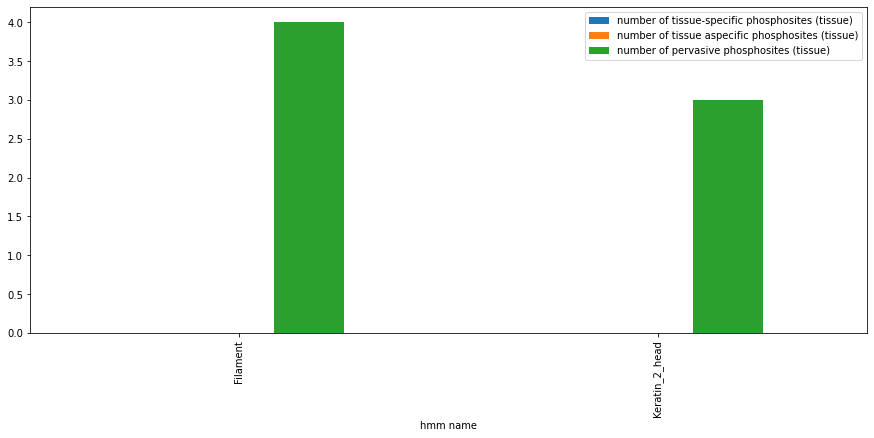

In [189]:
df_hmm_tspec_tissue = tspec_sites_pfam.loc[tspec_sites_pfam["Eye"]==1, :].groupby(["hmm name", "ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"})
df_hmm_taspec_tissue = taspec_sites_pfam.loc[taspec_sites_pfam["Eye"]==1, :].groupby(["hmm name", "ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"})
df_hmm_gen_tissue = gen_sites_pfam.loc[gen_sites_pfam["Eye"]==1, :].groupby(["hmm name", "ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"})

df_hmm_tspec_tissue = df_hmm_tspec_tissue.groupby(["hmm name"], as_index=False)["ACC_ID"].count()
df_hmm_tspec_tissue.rename({"ACC_ID": "number of tissue-specific phosphosites (tissue)"}, inplace=True, axis=1)
df_hmm_tspec_tissue.set_index(["hmm name"], inplace=True)
df_hmm_taspec_tissue = df_hmm_taspec_tissue.groupby(["hmm name"], as_index=False)["ACC_ID"].count()
df_hmm_taspec_tissue.rename({"ACC_ID": "number of tissue aspecific phosphosites (tissue)"}, inplace=True, axis=1)
df_hmm_taspec_tissue.set_index(["hmm name"], inplace=True)
df_hmm_gen_tissue = df_hmm_gen_tissue.groupby(["hmm name"], as_index=False)["ACC_ID"].count()
df_hmm_gen_tissue.rename({"ACC_ID": "number of pervasive phosphosites (tissue)"}, inplace=True, axis=1)
df_hmm_gen_tissue.set_index(["hmm name"], inplace=True)
df_hmm_all_tissue = pd.concat([df_hmm_tspec_tissue, df_hmm_taspec_tissue, df_hmm_gen_tissue], axis=1)
df_hmm_all_tissue[((df_hmm_all_tissue["number of tissue-specific phosphosites (tissue)"]>1)|
                 (df_hmm_all_tissue["number of tissue aspecific phosphosites (tissue)"]>1)|
                 (df_hmm_all_tissue["number of pervasive phosphosites (tissue)"]>1))].plot(kind="bar", figsize=(15,6))


## Follicular fluid

In [190]:
df_clan_tspec_tissue = tspec_sites_pfam.loc[tspec_sites_pfam["Follicular fluid"]==1, :].groupby(["clan", "ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"})
df_clan_taspec_tissue = taspec_sites_pfam.loc[taspec_sites_pfam["Follicular fluid"]==1, :].groupby(["clan", "ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"})
df_clan_gen_tissue = gen_sites_pfam.loc[gen_sites_pfam["Follicular fluid"]==1, :].groupby(["clan", "ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"})

df_clan_tspec_tissue = df_clan_tspec_tissue.groupby(["clan"], as_index=False)["ACC_ID"].count()
df_clan_tspec_tissue.rename({"ACC_ID": "number of tissue-specific phosphosites (tissue)"}, inplace=True, axis=1)
df_clan_tspec_tissue.set_index(["clan"], inplace=True)
df_clan_taspec_tissue = df_clan_taspec_tissue.groupby(["clan"], as_index=False)["ACC_ID"].count()
df_clan_taspec_tissue.rename({"ACC_ID": "number of tissue aspecific phosphosites (tissue)"}, inplace=True, axis=1)
df_clan_taspec_tissue.set_index(["clan"], inplace=True)
df_clan_gen_tissue = df_clan_gen_tissue.groupby(["clan"], as_index=False)["ACC_ID"].count()
df_clan_gen_tissue.rename({"ACC_ID": "number of pervasive phosphosites (tissue)"}, inplace=True, axis=1)
df_clan_gen_tissue.set_index(["clan"], inplace=True)
df_clan_all_tissue = pd.concat([df_clan_tspec_tissue, df_clan_taspec_tissue, df_clan_gen_tissue], axis=1)
df_clan_all_tissue#[((df_clan_all_tissue["number of tissue-specific phosphosites (tissue)"]>1)|
                 #(df_clan_all_tissue["number of tissue aspecific phosphosites (tissue)"]>1)|
                 #(df_clan_all_tissue["number of pervasive phosphosites (tissue)"]>1))].plot(kind="bar", figsize=(15,6))

number of tissue-specific phosphosites (tissue)  \
clan                                                      
CL0192                                              NaN   

        number of tissue aspecific phosphosites (tissue)  \
clan                                                       
CL0192                                                 1   

        number of pervasive phosphosites (tissue)  
clan                                               
CL0192                                        NaN

In [191]:
df_hmm_tspec_tissue = tspec_sites_pfam.loc[tspec_sites_pfam["Follicular fluid"]==1, :].groupby(["hmm name", "ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"})
df_hmm_taspec_tissue = taspec_sites_pfam.loc[taspec_sites_pfam["Follicular fluid"]==1, :].groupby(["hmm name", "ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"})
df_hmm_gen_tissue = gen_sites_pfam.loc[gen_sites_pfam["Follicular fluid"]==1, :].groupby(["hmm name", "ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"})

df_hmm_tspec_tissue = df_hmm_tspec_tissue.groupby(["hmm name"], as_index=False)["ACC_ID"].count()
df_hmm_tspec_tissue.rename({"ACC_ID": "number of tissue-specific phosphosites (tissue)"}, inplace=True, axis=1)
df_hmm_tspec_tissue.set_index(["hmm name"], inplace=True)
df_hmm_taspec_tissue = df_hmm_taspec_tissue.groupby(["hmm name"], as_index=False)["ACC_ID"].count()
df_hmm_taspec_tissue.rename({"ACC_ID": "number of tissue aspecific phosphosites (tissue)"}, inplace=True, axis=1)
df_hmm_taspec_tissue.set_index(["hmm name"], inplace=True)
df_hmm_gen_tissue = df_hmm_gen_tissue.groupby(["hmm name"], as_index=False)["ACC_ID"].count()
df_hmm_gen_tissue.rename({"ACC_ID": "number of pervasive phosphosites (tissue)"}, inplace=True, axis=1)
df_hmm_gen_tissue.set_index(["hmm name"], inplace=True)
df_hmm_all_tissue = pd.concat([df_hmm_tspec_tissue, df_hmm_taspec_tissue, df_hmm_gen_tissue], axis=1)
df_hmm_all_tissue#[((df_hmm_all_tissue["number of tissue-specific phosphosites (tissue)"]>1)|
                 #(df_hmm_all_tissue["number of tissue aspecific phosphosites (tissue)"]>1)|
                 #(df_hmm_all_tissue["number of pervasive phosphosites (tissue)"]>1))].plot(kind="bar", figsize=(15,6))

number of tissue-specific phosphosites (tissue)  \
hmm name                                                    
TAS2R                                                 NaN   

          number of tissue aspecific phosphosites (tissue)  \
hmm name                                                     
TAS2R                                                    1   

          number of pervasive phosphosites (tissue)  
hmm name                                             
TAS2R                                           NaN

## Heart

<AxesSubplot:xlabel='clan'>

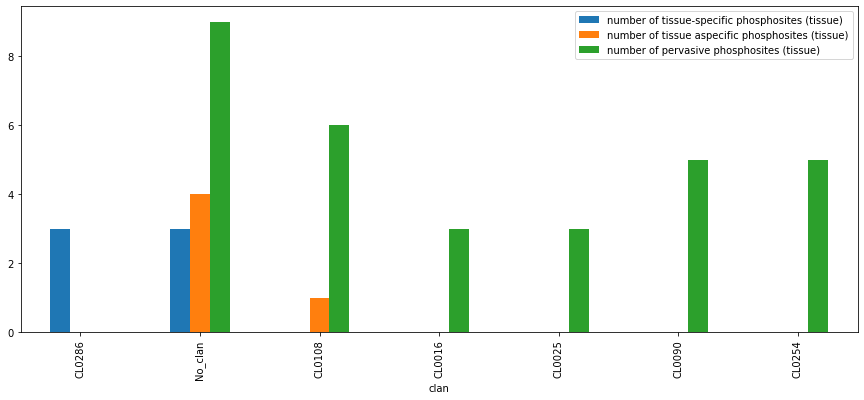

In [192]:
df_clan_tspec_tissue = tspec_sites_pfam.loc[tspec_sites_pfam["Heart"]==1, :].groupby(["clan", "ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"})
df_clan_taspec_tissue = taspec_sites_pfam.loc[taspec_sites_pfam["Heart"]==1, :].groupby(["clan", "ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"})
df_clan_gen_tissue = gen_sites_pfam.loc[gen_sites_pfam["Heart"]==1, :].groupby(["clan", "ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"})

df_clan_tspec_tissue = df_clan_tspec_tissue.groupby(["clan"], as_index=False)["ACC_ID"].count()
df_clan_tspec_tissue.rename({"ACC_ID": "number of tissue-specific phosphosites (tissue)"}, inplace=True, axis=1)
df_clan_tspec_tissue.set_index(["clan"], inplace=True)
df_clan_taspec_tissue = df_clan_taspec_tissue.groupby(["clan"], as_index=False)["ACC_ID"].count()
df_clan_taspec_tissue.rename({"ACC_ID": "number of tissue aspecific phosphosites (tissue)"}, inplace=True, axis=1)
df_clan_taspec_tissue.set_index(["clan"], inplace=True)
df_clan_gen_tissue = df_clan_gen_tissue.groupby(["clan"], as_index=False)["ACC_ID"].count()
df_clan_gen_tissue.rename({"ACC_ID": "number of pervasive phosphosites (tissue)"}, inplace=True, axis=1)
df_clan_gen_tissue.set_index(["clan"], inplace=True)
df_clan_all_tissue = pd.concat([df_clan_tspec_tissue, df_clan_taspec_tissue, df_clan_gen_tissue], axis=1)
df_clan_all_tissue[((df_clan_all_tissue["number of tissue-specific phosphosites (tissue)"]>1)|
                 (df_clan_all_tissue["number of tissue aspecific phosphosites (tissue)"]>1)|
                 (df_clan_all_tissue["number of pervasive phosphosites (tissue)"]>1))].plot(kind="bar", figsize=(15,6))


<AxesSubplot:xlabel='hmm name'>

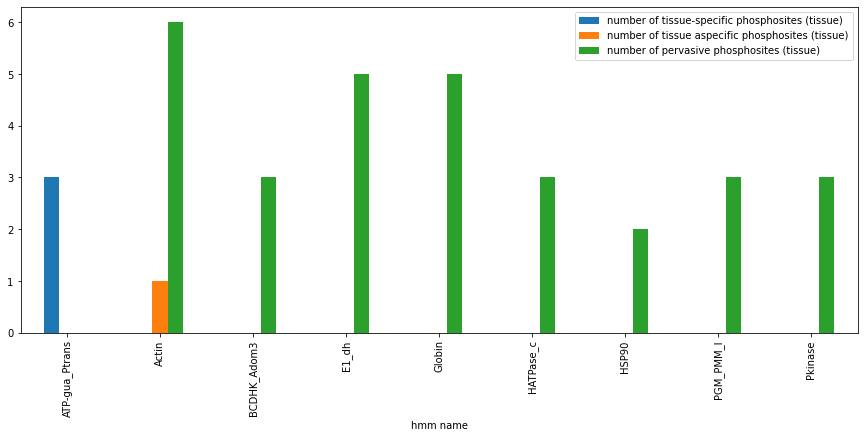

In [193]:
df_hmm_tspec_tissue = tspec_sites_pfam.loc[tspec_sites_pfam["Heart"]==1, :].groupby(["hmm name", "ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"})
df_hmm_taspec_tissue = taspec_sites_pfam.loc[taspec_sites_pfam["Heart"]==1, :].groupby(["hmm name", "ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"})
df_hmm_gen_tissue = gen_sites_pfam.loc[gen_sites_pfam["Heart"]==1, :].groupby(["hmm name", "ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"})

df_hmm_tspec_tissue = df_hmm_tspec_tissue.groupby(["hmm name"], as_index=False)["ACC_ID"].count()
df_hmm_tspec_tissue.rename({"ACC_ID": "number of tissue-specific phosphosites (tissue)"}, inplace=True, axis=1)
df_hmm_tspec_tissue.set_index(["hmm name"], inplace=True)
df_hmm_taspec_tissue = df_hmm_taspec_tissue.groupby(["hmm name"], as_index=False)["ACC_ID"].count()
df_hmm_taspec_tissue.rename({"ACC_ID": "number of tissue aspecific phosphosites (tissue)"}, inplace=True, axis=1)
df_hmm_taspec_tissue.set_index(["hmm name"], inplace=True)
df_hmm_gen_tissue = df_hmm_gen_tissue.groupby(["hmm name"], as_index=False)["ACC_ID"].count()
df_hmm_gen_tissue.rename({"ACC_ID": "number of pervasive phosphosites (tissue)"}, inplace=True, axis=1)
df_hmm_gen_tissue.set_index(["hmm name"], inplace=True)
df_hmm_all_tissue = pd.concat([df_hmm_tspec_tissue, df_hmm_taspec_tissue, df_hmm_gen_tissue], axis=1)
df_hmm_all_tissue[((df_hmm_all_tissue["number of tissue-specific phosphosites (tissue)"]>1)|
                 (df_hmm_all_tissue["number of tissue aspecific phosphosites (tissue)"]>1)|
                 (df_hmm_all_tissue["number of pervasive phosphosites (tissue)"]>1))].plot(kind="bar", figsize=(15,6))

## HeLa

<AxesSubplot:xlabel='clan'>

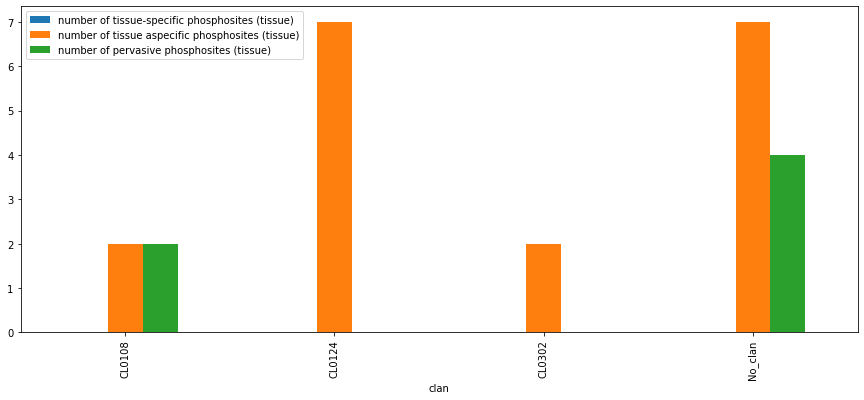

In [194]:
df_clan_tspec_tissue = tspec_sites_pfam.loc[tspec_sites_pfam["Hela"]==1, :].groupby(["clan", "ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"})
df_clan_taspec_tissue = taspec_sites_pfam.loc[taspec_sites_pfam["Hela"]==1, :].groupby(["clan", "ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"})
df_clan_gen_tissue = gen_sites_pfam.loc[gen_sites_pfam["Hela"]==1, :].groupby(["clan", "ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"})

df_clan_tspec_tissue = df_clan_tspec_tissue.groupby(["clan"], as_index=False)["ACC_ID"].count()
df_clan_tspec_tissue.rename({"ACC_ID": "number of tissue-specific phosphosites (tissue)"}, inplace=True, axis=1)
df_clan_tspec_tissue.set_index(["clan"], inplace=True)
df_clan_taspec_tissue = df_clan_taspec_tissue.groupby(["clan"], as_index=False)["ACC_ID"].count()
df_clan_taspec_tissue.rename({"ACC_ID": "number of tissue aspecific phosphosites (tissue)"}, inplace=True, axis=1)
df_clan_taspec_tissue.set_index(["clan"], inplace=True)
df_clan_gen_tissue = df_clan_gen_tissue.groupby(["clan"], as_index=False)["ACC_ID"].count()
df_clan_gen_tissue.rename({"ACC_ID": "number of pervasive phosphosites (tissue)"}, inplace=True, axis=1)
df_clan_gen_tissue.set_index(["clan"], inplace=True)
df_clan_all_tissue = pd.concat([df_clan_tspec_tissue, df_clan_taspec_tissue, df_clan_gen_tissue], axis=1)
df_clan_all_tissue[((df_clan_all_tissue["number of tissue-specific phosphosites (tissue)"]>1)|
                 (df_clan_all_tissue["number of tissue aspecific phosphosites (tissue)"]>1)|
                 (df_clan_all_tissue["number of pervasive phosphosites (tissue)"]>1))].plot(kind="bar", figsize=(15,6))


<AxesSubplot:xlabel='hmm name'>

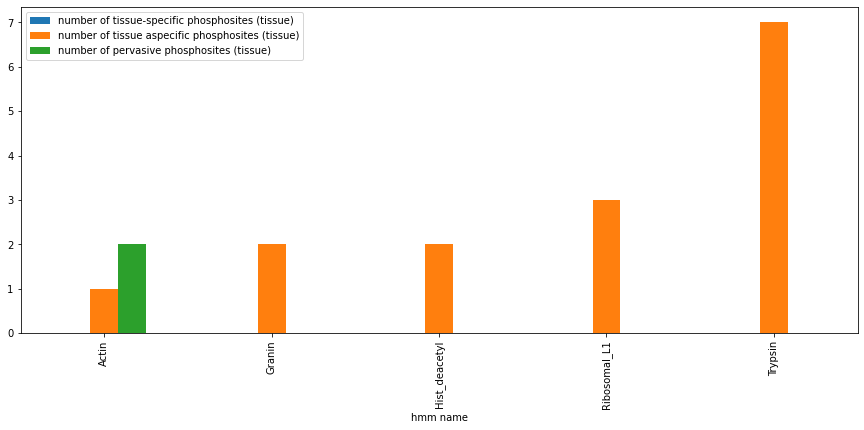

In [195]:
df_hmm_tspec_tissue = tspec_sites_pfam.loc[tspec_sites_pfam["Hela"]==1, :].groupby(["hmm name", "ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"})
df_hmm_taspec_tissue = taspec_sites_pfam.loc[taspec_sites_pfam["Hela"]==1, :].groupby(["hmm name", "ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"})
df_hmm_gen_tissue = gen_sites_pfam.loc[gen_sites_pfam["Hela"]==1, :].groupby(["hmm name", "ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"})

df_hmm_tspec_tissue = df_hmm_tspec_tissue.groupby(["hmm name"], as_index=False)["ACC_ID"].count()
df_hmm_tspec_tissue.rename({"ACC_ID": "number of tissue-specific phosphosites (tissue)"}, inplace=True, axis=1)
df_hmm_tspec_tissue.set_index(["hmm name"], inplace=True)
df_hmm_taspec_tissue = df_hmm_taspec_tissue.groupby(["hmm name"], as_index=False)["ACC_ID"].count()
df_hmm_taspec_tissue.rename({"ACC_ID": "number of tissue aspecific phosphosites (tissue)"}, inplace=True, axis=1)
df_hmm_taspec_tissue.set_index(["hmm name"], inplace=True)
df_hmm_gen_tissue = df_hmm_gen_tissue.groupby(["hmm name"], as_index=False)["ACC_ID"].count()
df_hmm_gen_tissue.rename({"ACC_ID": "number of pervasive phosphosites (tissue)"}, inplace=True, axis=1)
df_hmm_gen_tissue.set_index(["hmm name"], inplace=True)
df_hmm_all_tissue = pd.concat([df_hmm_tspec_tissue, df_hmm_taspec_tissue, df_hmm_gen_tissue], axis=1)
df_hmm_all_tissue[((df_hmm_all_tissue["number of tissue-specific phosphosites (tissue)"]>1)|
                 (df_hmm_all_tissue["number of tissue aspecific phosphosites (tissue)"]>1)|
                 (df_hmm_all_tissue["number of pervasive phosphosites (tissue)"]>1))].plot(kind="bar", figsize=(15,6))

## Kidney

<AxesSubplot:xlabel='clan'>

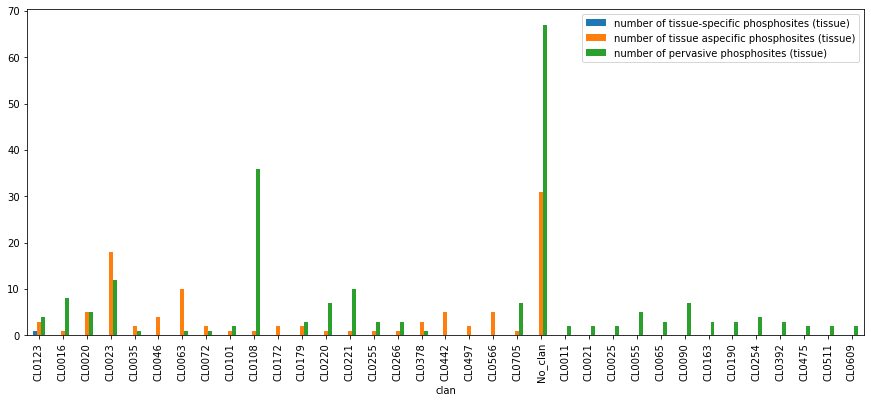

In [196]:
df_clan_tspec_tissue = tspec_sites_pfam.loc[tspec_sites_pfam["Kidney"]==1, :].groupby(["clan", "ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"})
df_clan_taspec_tissue = taspec_sites_pfam.loc[taspec_sites_pfam["Kidney"]==1, :].groupby(["clan", "ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"})
df_clan_gen_tissue = gen_sites_pfam.loc[gen_sites_pfam["Kidney"]==1, :].groupby(["clan", "ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"})

df_clan_tspec_tissue = df_clan_tspec_tissue.groupby(["clan"], as_index=False)["ACC_ID"].count()
df_clan_tspec_tissue.rename({"ACC_ID": "number of tissue-specific phosphosites (tissue)"}, inplace=True, axis=1)
df_clan_tspec_tissue.set_index(["clan"], inplace=True)
df_clan_taspec_tissue = df_clan_taspec_tissue.groupby(["clan"], as_index=False)["ACC_ID"].count()
df_clan_taspec_tissue.rename({"ACC_ID": "number of tissue aspecific phosphosites (tissue)"}, inplace=True, axis=1)
df_clan_taspec_tissue.set_index(["clan"], inplace=True)
df_clan_gen_tissue = df_clan_gen_tissue.groupby(["clan"], as_index=False)["ACC_ID"].count()
df_clan_gen_tissue.rename({"ACC_ID": "number of pervasive phosphosites (tissue)"}, inplace=True, axis=1)
df_clan_gen_tissue.set_index(["clan"], inplace=True)
df_clan_all_tissue = pd.concat([df_clan_tspec_tissue, df_clan_taspec_tissue, df_clan_gen_tissue], axis=1)
df_clan_all_tissue[((df_clan_all_tissue["number of tissue-specific phosphosites (tissue)"]>1)|
                 (df_clan_all_tissue["number of tissue aspecific phosphosites (tissue)"]>1)|
                 (df_clan_all_tissue["number of pervasive phosphosites (tissue)"]>1))].plot(kind="bar", figsize=(15,6))


<AxesSubplot:xlabel='hmm name'>

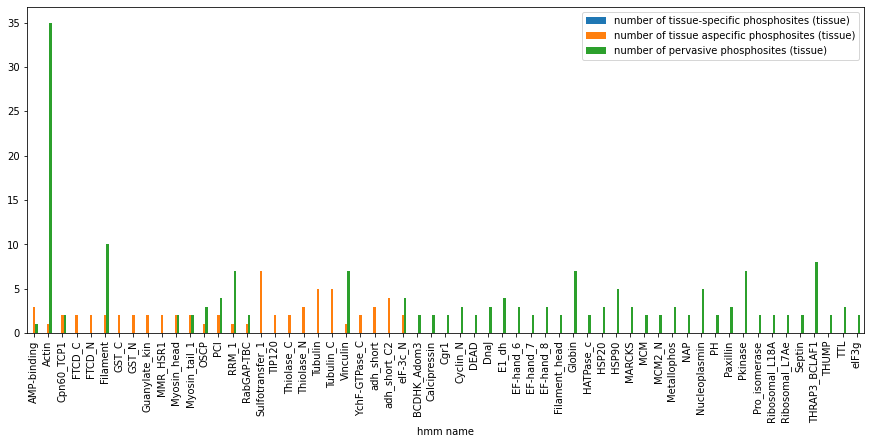

In [197]:
df_hmm_tspec_tissue = tspec_sites_pfam.loc[tspec_sites_pfam["Kidney"]==1, :].groupby(["hmm name", "ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"})
df_hmm_taspec_tissue = taspec_sites_pfam.loc[taspec_sites_pfam["Kidney"]==1, :].groupby(["hmm name", "ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"})
df_hmm_gen_tissue = gen_sites_pfam.loc[gen_sites_pfam["Kidney"]==1, :].groupby(["hmm name", "ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"})

df_hmm_tspec_tissue = df_hmm_tspec_tissue.groupby(["hmm name"], as_index=False)["ACC_ID"].count()
df_hmm_tspec_tissue.rename({"ACC_ID": "number of tissue-specific phosphosites (tissue)"}, inplace=True, axis=1)
df_hmm_tspec_tissue.set_index(["hmm name"], inplace=True)
df_hmm_taspec_tissue = df_hmm_taspec_tissue.groupby(["hmm name"], as_index=False)["ACC_ID"].count()
df_hmm_taspec_tissue.rename({"ACC_ID": "number of tissue aspecific phosphosites (tissue)"}, inplace=True, axis=1)
df_hmm_taspec_tissue.set_index(["hmm name"], inplace=True)
df_hmm_gen_tissue = df_hmm_gen_tissue.groupby(["hmm name"], as_index=False)["ACC_ID"].count()
df_hmm_gen_tissue.rename({"ACC_ID": "number of pervasive phosphosites (tissue)"}, inplace=True, axis=1)
df_hmm_gen_tissue.set_index(["hmm name"], inplace=True)
df_hmm_all_tissue = pd.concat([df_hmm_tspec_tissue, df_hmm_taspec_tissue, df_hmm_gen_tissue], axis=1)
df_hmm_all_tissue[((df_hmm_all_tissue["number of tissue-specific phosphosites (tissue)"]>1)|
                 (df_hmm_all_tissue["number of tissue aspecific phosphosites (tissue)"]>1)|
                 (df_hmm_all_tissue["number of pervasive phosphosites (tissue)"]>1))].plot(kind="bar", figsize=(15,6))


## Liver

<AxesSubplot:xlabel='clan'>

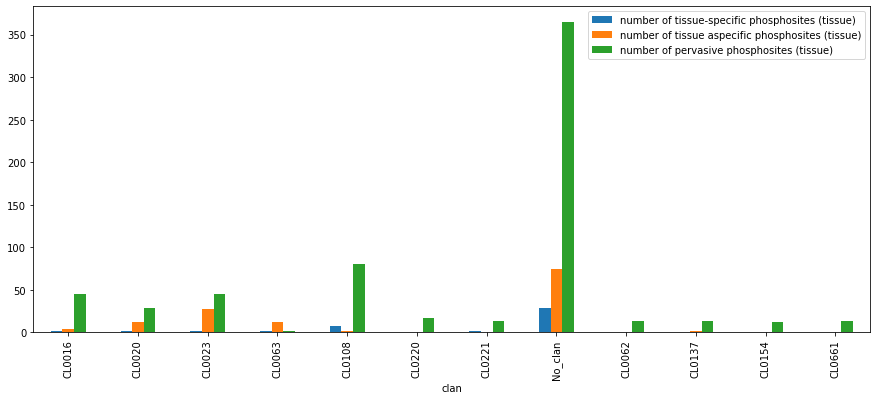

In [198]:
df_clan_tspec_tissue = tspec_sites_pfam.loc[tspec_sites_pfam["Liver"]==1, :].groupby(["clan", "ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"})
df_clan_taspec_tissue = taspec_sites_pfam.loc[taspec_sites_pfam["Liver"]==1, :].groupby(["clan", "ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"})
df_clan_gen_tissue = gen_sites_pfam.loc[gen_sites_pfam["Liver"]==1, :].groupby(["clan", "ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"})

df_clan_tspec_tissue = df_clan_tspec_tissue.groupby(["clan"], as_index=False)["ACC_ID"].count()
df_clan_tspec_tissue.rename({"ACC_ID": "number of tissue-specific phosphosites (tissue)"}, inplace=True, axis=1)
df_clan_tspec_tissue.set_index(["clan"], inplace=True)
df_clan_taspec_tissue = df_clan_taspec_tissue.groupby(["clan"], as_index=False)["ACC_ID"].count()
df_clan_taspec_tissue.rename({"ACC_ID": "number of tissue aspecific phosphosites (tissue)"}, inplace=True, axis=1)
df_clan_taspec_tissue.set_index(["clan"], inplace=True)
df_clan_gen_tissue = df_clan_gen_tissue.groupby(["clan"], as_index=False)["ACC_ID"].count()
df_clan_gen_tissue.rename({"ACC_ID": "number of pervasive phosphosites (tissue)"}, inplace=True, axis=1)
df_clan_gen_tissue.set_index(["clan"], inplace=True)
df_clan_all_tissue = pd.concat([df_clan_tspec_tissue, df_clan_taspec_tissue, df_clan_gen_tissue], axis=1)
df_clan_all_tissue[((df_clan_all_tissue["number of tissue-specific phosphosites (tissue)"]>10)|
                 (df_clan_all_tissue["number of tissue aspecific phosphosites (tissue)"]>10)|
                 (df_clan_all_tissue["number of pervasive phosphosites (tissue)"]>10))].plot(kind="bar", figsize=(15,6))


<AxesSubplot:xlabel='hmm name'>

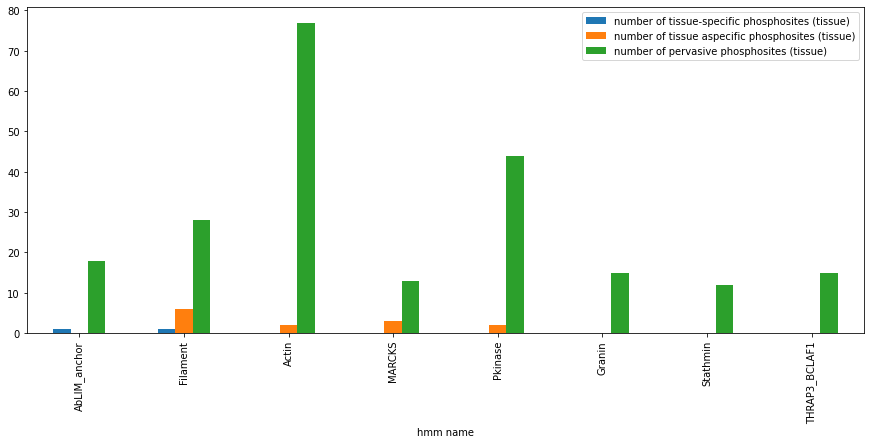

In [199]:
df_hmm_tspec_tissue = tspec_sites_pfam.loc[tspec_sites_pfam["Liver"]==1, :].groupby(["hmm name", "ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"})
df_hmm_taspec_tissue = taspec_sites_pfam.loc[taspec_sites_pfam["Liver"]==1, :].groupby(["hmm name", "ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"})
df_hmm_gen_tissue = gen_sites_pfam.loc[gen_sites_pfam["Liver"]==1, :].groupby(["hmm name", "ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"})

df_hmm_tspec_tissue = df_hmm_tspec_tissue.groupby(["hmm name"], as_index=False)["ACC_ID"].count()
df_hmm_tspec_tissue.rename({"ACC_ID": "number of tissue-specific phosphosites (tissue)"}, inplace=True, axis=1)
df_hmm_tspec_tissue.set_index(["hmm name"], inplace=True)
df_hmm_taspec_tissue = df_hmm_taspec_tissue.groupby(["hmm name"], as_index=False)["ACC_ID"].count()
df_hmm_taspec_tissue.rename({"ACC_ID": "number of tissue aspecific phosphosites (tissue)"}, inplace=True, axis=1)
df_hmm_taspec_tissue.set_index(["hmm name"], inplace=True)
df_hmm_gen_tissue = df_hmm_gen_tissue.groupby(["hmm name"], as_index=False)["ACC_ID"].count()
df_hmm_gen_tissue.rename({"ACC_ID": "number of pervasive phosphosites (tissue)"}, inplace=True, axis=1)
df_hmm_gen_tissue.set_index(["hmm name"], inplace=True)
df_hmm_all_tissue = pd.concat([df_hmm_tspec_tissue, df_hmm_taspec_tissue, df_hmm_gen_tissue], axis=1)
df_hmm_all_tissue[((df_hmm_all_tissue["number of tissue-specific phosphosites (tissue)"]>10)|
                 (df_hmm_all_tissue["number of tissue aspecific phosphosites (tissue)"]>10)|
                 (df_hmm_all_tissue["number of pervasive phosphosites (tissue)"]>10))].plot(kind="bar", figsize=(15,6))

## Lung

<AxesSubplot:xlabel='clan'>

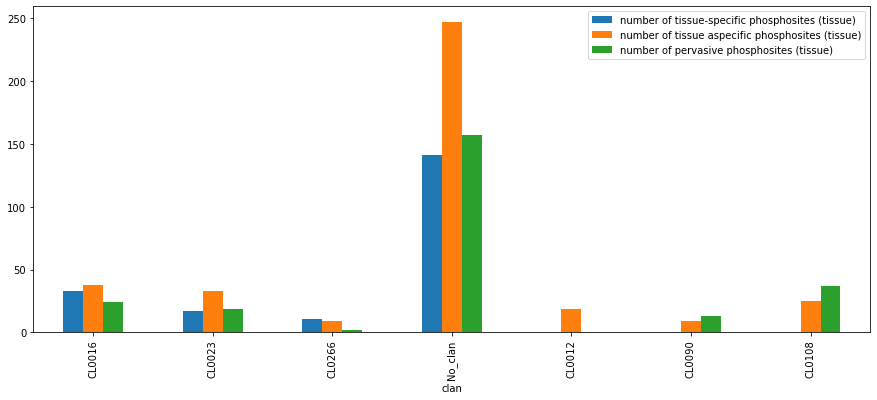

In [200]:
df_clan_tspec_tissue = tspec_sites_pfam.loc[tspec_sites_pfam["Lung"]==1, :].groupby(["clan", "ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"})
df_clan_taspec_tissue = taspec_sites_pfam.loc[taspec_sites_pfam["Lung"]==1, :].groupby(["clan", "ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"})
df_clan_gen_tissue = gen_sites_pfam.loc[gen_sites_pfam["Lung"]==1, :].groupby(["clan", "ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"})

df_clan_tspec_tissue = df_clan_tspec_tissue.groupby(["clan"], as_index=False)["ACC_ID"].count()
df_clan_tspec_tissue.rename({"ACC_ID": "number of tissue-specific phosphosites (tissue)"}, inplace=True, axis=1)
df_clan_tspec_tissue.set_index(["clan"], inplace=True)
df_clan_taspec_tissue = df_clan_taspec_tissue.groupby(["clan"], as_index=False)["ACC_ID"].count()
df_clan_taspec_tissue.rename({"ACC_ID": "number of tissue aspecific phosphosites (tissue)"}, inplace=True, axis=1)
df_clan_taspec_tissue.set_index(["clan"], inplace=True)
df_clan_gen_tissue = df_clan_gen_tissue.groupby(["clan"], as_index=False)["ACC_ID"].count()
df_clan_gen_tissue.rename({"ACC_ID": "number of pervasive phosphosites (tissue)"}, inplace=True, axis=1)
df_clan_gen_tissue.set_index(["clan"], inplace=True)
df_clan_all_tissue = pd.concat([df_clan_tspec_tissue, df_clan_taspec_tissue, df_clan_gen_tissue], axis=1)
df_clan_all_tissue[((df_clan_all_tissue["number of tissue-specific phosphosites (tissue)"]>10)|
                 (df_clan_all_tissue["number of tissue aspecific phosphosites (tissue)"]>10)|
                 (df_clan_all_tissue["number of pervasive phosphosites (tissue)"]>10))].plot(kind="bar", figsize=(15,6))


<AxesSubplot:xlabel='hmm name'>

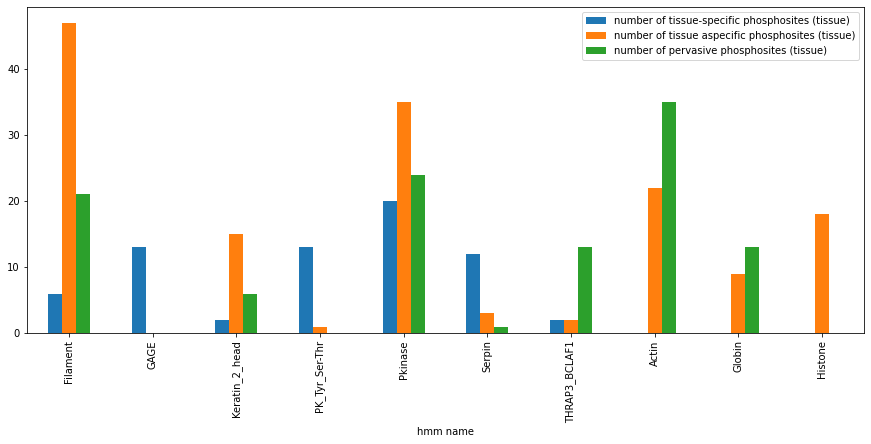

In [201]:
df_hmm_tspec_tissue = tspec_sites_pfam.loc[tspec_sites_pfam["Lung"]==1, :].groupby(["hmm name", "ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"})
df_hmm_taspec_tissue = taspec_sites_pfam.loc[taspec_sites_pfam["Lung"]==1, :].groupby(["hmm name", "ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"})
df_hmm_gen_tissue = gen_sites_pfam.loc[gen_sites_pfam["Lung"]==1, :].groupby(["hmm name", "ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"})

df_hmm_tspec_tissue = df_hmm_tspec_tissue.groupby(["hmm name"], as_index=False)["ACC_ID"].count()
df_hmm_tspec_tissue.rename({"ACC_ID": "number of tissue-specific phosphosites (tissue)"}, inplace=True, axis=1)
df_hmm_tspec_tissue.set_index(["hmm name"], inplace=True)
df_hmm_taspec_tissue = df_hmm_taspec_tissue.groupby(["hmm name"], as_index=False)["ACC_ID"].count()
df_hmm_taspec_tissue.rename({"ACC_ID": "number of tissue aspecific phosphosites (tissue)"}, inplace=True, axis=1)
df_hmm_taspec_tissue.set_index(["hmm name"], inplace=True)
df_hmm_gen_tissue = df_hmm_gen_tissue.groupby(["hmm name"], as_index=False)["ACC_ID"].count()
df_hmm_gen_tissue.rename({"ACC_ID": "number of pervasive phosphosites (tissue)"}, inplace=True, axis=1)
df_hmm_gen_tissue.set_index(["hmm name"], inplace=True)
df_hmm_all_tissue = pd.concat([df_hmm_tspec_tissue, df_hmm_taspec_tissue, df_hmm_gen_tissue], axis=1)
df_hmm_all_tissue[((df_hmm_all_tissue["number of tissue-specific phosphosites (tissue)"]>10)|
                 (df_hmm_all_tissue["number of tissue aspecific phosphosites (tissue)"]>10)|
                 (df_hmm_all_tissue["number of pervasive phosphosites (tissue)"]>10))].plot(kind="bar", figsize=(15,6))


## Lymph node

<AxesSubplot:xlabel='clan'>

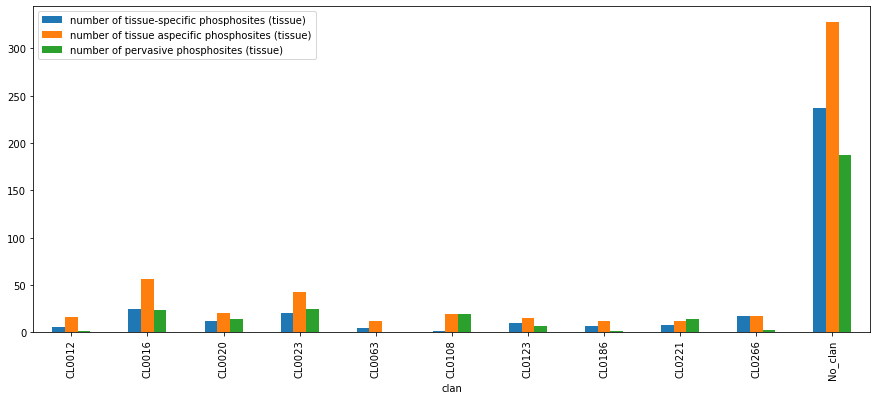

In [202]:
df_clan_tspec_tissue = tspec_sites_pfam.loc[tspec_sites_pfam["Lymph node"]==1, :].groupby(["clan", "ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"})
df_clan_taspec_tissue = taspec_sites_pfam.loc[taspec_sites_pfam["Lymph node"]==1, :].groupby(["clan", "ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"})
df_clan_gen_tissue = gen_sites_pfam.loc[gen_sites_pfam["Lymph node"]==1, :].groupby(["clan", "ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"})

df_clan_tspec_tissue = df_clan_tspec_tissue.groupby(["clan"], as_index=False)["ACC_ID"].count()
df_clan_tspec_tissue.rename({"ACC_ID": "number of tissue-specific phosphosites (tissue)"}, inplace=True, axis=1)
df_clan_tspec_tissue.set_index(["clan"], inplace=True)
df_clan_taspec_tissue = df_clan_taspec_tissue.groupby(["clan"], as_index=False)["ACC_ID"].count()
df_clan_taspec_tissue.rename({"ACC_ID": "number of tissue aspecific phosphosites (tissue)"}, inplace=True, axis=1)
df_clan_taspec_tissue.set_index(["clan"], inplace=True)
df_clan_gen_tissue = df_clan_gen_tissue.groupby(["clan"], as_index=False)["ACC_ID"].count()
df_clan_gen_tissue.rename({"ACC_ID": "number of pervasive phosphosites (tissue)"}, inplace=True, axis=1)
df_clan_gen_tissue.set_index(["clan"], inplace=True)
df_clan_all_tissue = pd.concat([df_clan_tspec_tissue, df_clan_taspec_tissue, df_clan_gen_tissue], axis=1)
df_clan_all_tissue[((df_clan_all_tissue["number of tissue-specific phosphosites (tissue)"]>10)|
                 (df_clan_all_tissue["number of tissue aspecific phosphosites (tissue)"]>10)|
                 (df_clan_all_tissue["number of pervasive phosphosites (tissue)"]>10))].plot(kind="bar", figsize=(15,6))


<AxesSubplot:xlabel='hmm name'>

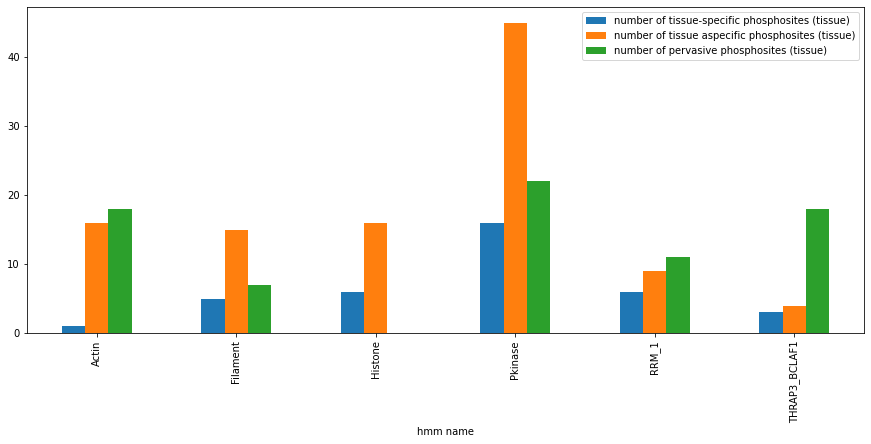

In [203]:
df_hmm_tspec_tissue = tspec_sites_pfam.loc[tspec_sites_pfam["Lymph node"]==1, :].groupby(["hmm name", "ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"})
df_hmm_taspec_tissue = taspec_sites_pfam.loc[taspec_sites_pfam["Lymph node"]==1, :].groupby(["hmm name", "ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"})
df_hmm_gen_tissue = gen_sites_pfam.loc[gen_sites_pfam["Lymph node"]==1, :].groupby(["hmm name", "ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"})

df_hmm_tspec_tissue = df_hmm_tspec_tissue.groupby(["hmm name"], as_index=False)["ACC_ID"].count()
df_hmm_tspec_tissue.rename({"ACC_ID": "number of tissue-specific phosphosites (tissue)"}, inplace=True, axis=1)
df_hmm_tspec_tissue.set_index(["hmm name"], inplace=True)
df_hmm_taspec_tissue = df_hmm_taspec_tissue.groupby(["hmm name"], as_index=False)["ACC_ID"].count()
df_hmm_taspec_tissue.rename({"ACC_ID": "number of tissue aspecific phosphosites (tissue)"}, inplace=True, axis=1)
df_hmm_taspec_tissue.set_index(["hmm name"], inplace=True)
df_hmm_gen_tissue = df_hmm_gen_tissue.groupby(["hmm name"], as_index=False)["ACC_ID"].count()
df_hmm_gen_tissue.rename({"ACC_ID": "number of pervasive phosphosites (tissue)"}, inplace=True, axis=1)
df_hmm_gen_tissue.set_index(["hmm name"], inplace=True)
df_hmm_all_tissue = pd.concat([df_hmm_tspec_tissue, df_hmm_taspec_tissue, df_hmm_gen_tissue], axis=1)
df_hmm_all_tissue[((df_hmm_all_tissue["number of tissue-specific phosphosites (tissue)"]>10)|
                 (df_hmm_all_tissue["number of tissue aspecific phosphosites (tissue)"]>10)|
                 (df_hmm_all_tissue["number of pervasive phosphosites (tissue)"]>10))].plot(kind="bar", figsize=(15,6))


## Menstrual fluid

<AxesSubplot:xlabel='clan'>

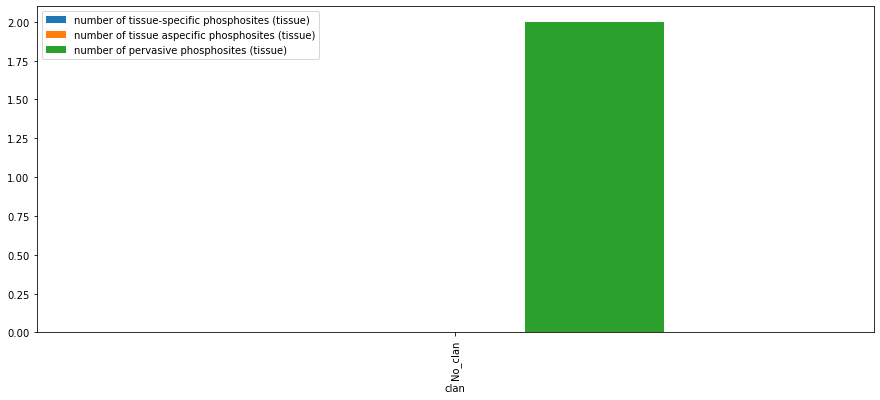

In [204]:
df_clan_tspec_tissue = tspec_sites_pfam.loc[tspec_sites_pfam["Menstrual fluid"]==1, :].groupby(["clan", "ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"})
df_clan_taspec_tissue = taspec_sites_pfam.loc[taspec_sites_pfam["Menstrual fluid"]==1, :].groupby(["clan", "ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"})
df_clan_gen_tissue = gen_sites_pfam.loc[gen_sites_pfam["Menstrual fluid"]==1, :].groupby(["clan", "ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"})

df_clan_tspec_tissue = df_clan_tspec_tissue.groupby(["clan"], as_index=False)["ACC_ID"].count()
df_clan_tspec_tissue.rename({"ACC_ID": "number of tissue-specific phosphosites (tissue)"}, inplace=True, axis=1)
df_clan_tspec_tissue.set_index(["clan"], inplace=True)
df_clan_taspec_tissue = df_clan_taspec_tissue.groupby(["clan"], as_index=False)["ACC_ID"].count()
df_clan_taspec_tissue.rename({"ACC_ID": "number of tissue aspecific phosphosites (tissue)"}, inplace=True, axis=1)
df_clan_taspec_tissue.set_index(["clan"], inplace=True)
df_clan_gen_tissue = df_clan_gen_tissue.groupby(["clan"], as_index=False)["ACC_ID"].count()
df_clan_gen_tissue.rename({"ACC_ID": "number of pervasive phosphosites (tissue)"}, inplace=True, axis=1)
df_clan_gen_tissue.set_index(["clan"], inplace=True)
df_clan_all_tissue = pd.concat([df_clan_tspec_tissue, df_clan_taspec_tissue, df_clan_gen_tissue], axis=1)
df_clan_all_tissue[((df_clan_all_tissue["number of tissue-specific phosphosites (tissue)"]>1)|
                 (df_clan_all_tissue["number of tissue aspecific phosphosites (tissue)"]>1)|
                 (df_clan_all_tissue["number of pervasive phosphosites (tissue)"]>1))].plot(kind="bar", figsize=(15,6))


In [205]:
df_hmm_tspec_tissue = tspec_sites_pfam.loc[tspec_sites_pfam["Menstrual fluid"]==1, :].groupby(["hmm name", "ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"})
df_hmm_taspec_tissue = taspec_sites_pfam.loc[taspec_sites_pfam["Menstrual fluid"]==1, :].groupby(["hmm name", "ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"})
df_hmm_gen_tissue = gen_sites_pfam.loc[gen_sites_pfam["Menstrual fluid"]==1, :].groupby(["hmm name", "ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"})

df_hmm_tspec_tissue = df_hmm_tspec_tissue.groupby(["hmm name"], as_index=False)["ACC_ID"].count()
df_hmm_tspec_tissue.rename({"ACC_ID": "number of tissue-specific phosphosites (tissue)"}, inplace=True, axis=1)
df_hmm_tspec_tissue.set_index(["hmm name"], inplace=True)
df_hmm_taspec_tissue = df_hmm_taspec_tissue.groupby(["hmm name"], as_index=False)["ACC_ID"].count()
df_hmm_taspec_tissue.rename({"ACC_ID": "number of tissue aspecific phosphosites (tissue)"}, inplace=True, axis=1)
df_hmm_taspec_tissue.set_index(["hmm name"], inplace=True)
df_hmm_gen_tissue = df_hmm_gen_tissue.groupby(["hmm name"], as_index=False)["ACC_ID"].count()
df_hmm_gen_tissue.rename({"ACC_ID": "number of pervasive phosphosites (tissue)"}, inplace=True, axis=1)
df_hmm_gen_tissue.set_index(["hmm name"], inplace=True)
df_hmm_all_tissue = pd.concat([df_hmm_tspec_tissue, df_hmm_taspec_tissue, df_hmm_gen_tissue], axis=1)
df_hmm_all_tissue#[((df_hmm_all_tissue["number of tissue-specific phosphosites (tissue)"]>1)|
                 #(df_hmm_all_tissue["number of tissue aspecific phosphosites (tissue)"]>1)|
                 #(df_hmm_all_tissue["number of pervasive phosphosites (tissue)"]>1))].plot(kind="bar", figsize=(15,6))


number of tissue-specific phosphosites (tissue)  \
hmm name                                                    
V-set                                                 1.0   
C1-set                                                NaN   
Globin                                                NaN   
ITI_HC_C                                              NaN   
Serpin                                                NaN   
VIT                                                   NaN   
VWA                                                   NaN   

          number of tissue aspecific phosphosites (tissue)  \
hmm name                                                     
V-set                                                  NaN   
C1-set                                                 NaN   
Globin                                                 NaN   
ITI_HC_C                                               NaN   
Serpin                                                 NaN   
VIT                                                    NaN   
VWA                                                    NaN   

          number of pervasive phosphosites (tissue)  
hmm name                                             
V-set                                           NaN  
C1-set                                          1.0  
Globin                                          1.0  
ITI_HC_C                                        1.0  
Serpin                                          1.0  
VIT                                             1.0  
VWA                                             1.0

## Monocytes

<AxesSubplot:xlabel='clan'>

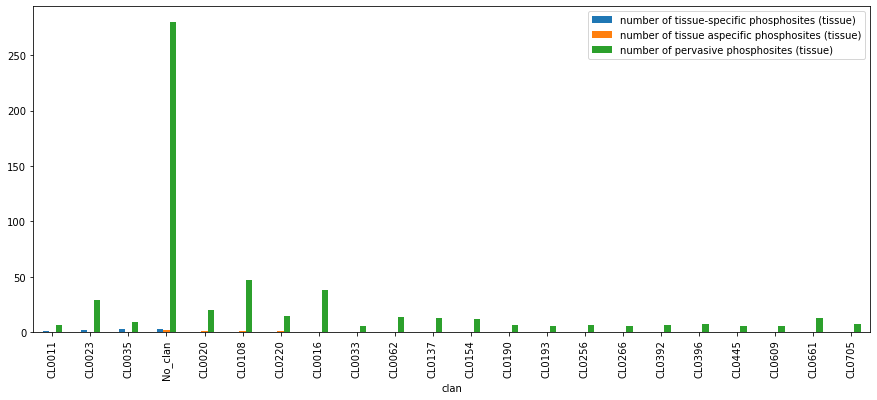

In [206]:
df_clan_tspec_tissue = tspec_sites_pfam.loc[tspec_sites_pfam["Monocytes"]==1, :].groupby(["clan", "ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"})
df_clan_taspec_tissue = taspec_sites_pfam.loc[taspec_sites_pfam["Monocytes"]==1, :].groupby(["clan", "ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"})
df_clan_gen_tissue = gen_sites_pfam.loc[gen_sites_pfam["Monocytes"]==1, :].groupby(["clan", "ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"})

df_clan_tspec_tissue = df_clan_tspec_tissue.groupby(["clan"], as_index=False)["ACC_ID"].count()
df_clan_tspec_tissue.rename({"ACC_ID": "number of tissue-specific phosphosites (tissue)"}, inplace=True, axis=1)
df_clan_tspec_tissue.set_index(["clan"], inplace=True)
df_clan_taspec_tissue = df_clan_taspec_tissue.groupby(["clan"], as_index=False)["ACC_ID"].count()
df_clan_taspec_tissue.rename({"ACC_ID": "number of tissue aspecific phosphosites (tissue)"}, inplace=True, axis=1)
df_clan_taspec_tissue.set_index(["clan"], inplace=True)
df_clan_gen_tissue = df_clan_gen_tissue.groupby(["clan"], as_index=False)["ACC_ID"].count()
df_clan_gen_tissue.rename({"ACC_ID": "number of pervasive phosphosites (tissue)"}, inplace=True, axis=1)
df_clan_gen_tissue.set_index(["clan"], inplace=True)
df_clan_all_tissue = pd.concat([df_clan_tspec_tissue, df_clan_taspec_tissue, df_clan_gen_tissue], axis=1)
df_clan_all_tissue[((df_clan_all_tissue["number of tissue-specific phosphosites (tissue)"]>5)|
                 (df_clan_all_tissue["number of tissue aspecific phosphosites (tissue)"]>5)|
                 (df_clan_all_tissue["number of pervasive phosphosites (tissue)"]>5))].plot(kind="bar", figsize=(15,6))


<AxesSubplot:xlabel='hmm name'>

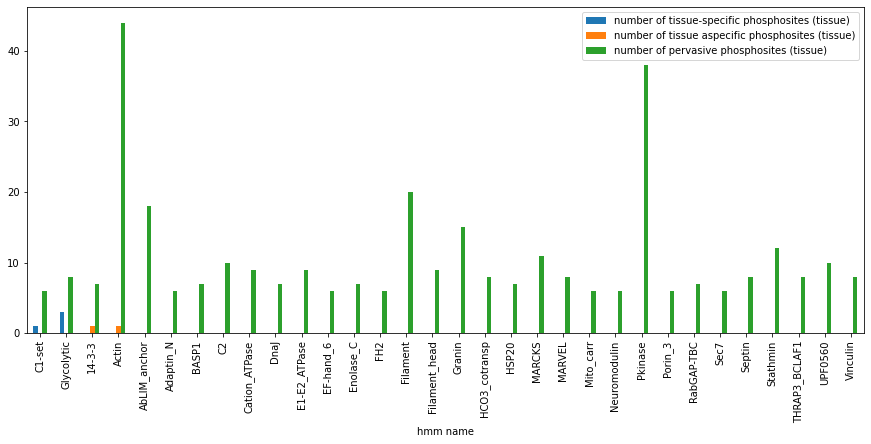

In [207]:
df_hmm_tspec_tissue = tspec_sites_pfam.loc[tspec_sites_pfam["Monocytes"]==1, :].groupby(["hmm name", "ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"})
df_hmm_taspec_tissue = taspec_sites_pfam.loc[taspec_sites_pfam["Monocytes"]==1, :].groupby(["hmm name", "ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"})
df_hmm_gen_tissue = gen_sites_pfam.loc[gen_sites_pfam["Monocytes"]==1, :].groupby(["hmm name", "ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"})

df_hmm_tspec_tissue = df_hmm_tspec_tissue.groupby(["hmm name"], as_index=False)["ACC_ID"].count()
df_hmm_tspec_tissue.rename({"ACC_ID": "number of tissue-specific phosphosites (tissue)"}, inplace=True, axis=1)
df_hmm_tspec_tissue.set_index(["hmm name"], inplace=True)
df_hmm_taspec_tissue = df_hmm_taspec_tissue.groupby(["hmm name"], as_index=False)["ACC_ID"].count()
df_hmm_taspec_tissue.rename({"ACC_ID": "number of tissue aspecific phosphosites (tissue)"}, inplace=True, axis=1)
df_hmm_taspec_tissue.set_index(["hmm name"], inplace=True)
df_hmm_gen_tissue = df_hmm_gen_tissue.groupby(["hmm name"], as_index=False)["ACC_ID"].count()
df_hmm_gen_tissue.rename({"ACC_ID": "number of pervasive phosphosites (tissue)"}, inplace=True, axis=1)
df_hmm_gen_tissue.set_index(["hmm name"], inplace=True)
df_hmm_all_tissue = pd.concat([df_hmm_tspec_tissue, df_hmm_taspec_tissue, df_hmm_gen_tissue], axis=1)
df_hmm_all_tissue[((df_hmm_all_tissue["number of tissue-specific phosphosites (tissue)"]>5)|
                 (df_hmm_all_tissue["number of tissue aspecific phosphosites (tissue)"]>5)|
                 (df_hmm_all_tissue["number of pervasive phosphosites (tissue)"]>5))].plot(kind="bar", figsize=(15,6))


## Nasal polyps

<AxesSubplot:xlabel='clan'>

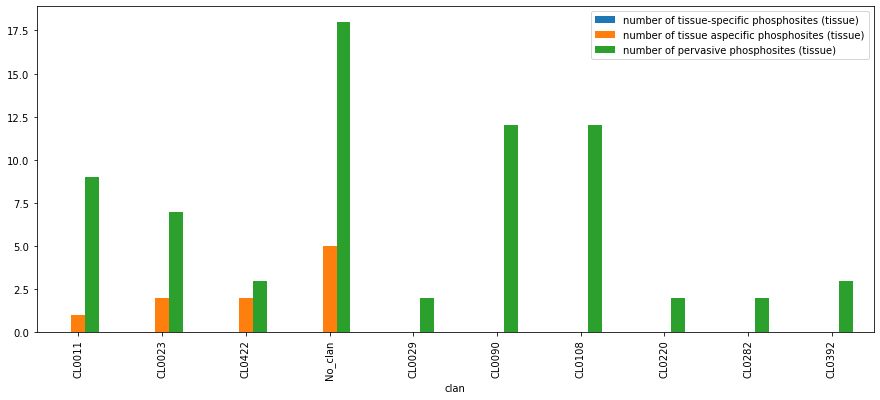

In [208]:
df_clan_tspec_tissue = tspec_sites_pfam.loc[tspec_sites_pfam["Nasal polyps"]==1, :].groupby(["clan", "ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"})
df_clan_taspec_tissue = taspec_sites_pfam.loc[taspec_sites_pfam["Nasal polyps"]==1, :].groupby(["clan", "ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"})
df_clan_gen_tissue = gen_sites_pfam.loc[gen_sites_pfam["Nasal polyps"]==1, :].groupby(["clan", "ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"})

df_clan_tspec_tissue = df_clan_tspec_tissue.groupby(["clan"], as_index=False)["ACC_ID"].count()
df_clan_tspec_tissue.rename({"ACC_ID": "number of tissue-specific phosphosites (tissue)"}, inplace=True, axis=1)
df_clan_tspec_tissue.set_index(["clan"], inplace=True)
df_clan_taspec_tissue = df_clan_taspec_tissue.groupby(["clan"], as_index=False)["ACC_ID"].count()
df_clan_taspec_tissue.rename({"ACC_ID": "number of tissue aspecific phosphosites (tissue)"}, inplace=True, axis=1)
df_clan_taspec_tissue.set_index(["clan"], inplace=True)
df_clan_gen_tissue = df_clan_gen_tissue.groupby(["clan"], as_index=False)["ACC_ID"].count()
df_clan_gen_tissue.rename({"ACC_ID": "number of pervasive phosphosites (tissue)"}, inplace=True, axis=1)
df_clan_gen_tissue.set_index(["clan"], inplace=True)
df_clan_all_tissue = pd.concat([df_clan_tspec_tissue, df_clan_taspec_tissue, df_clan_gen_tissue], axis=1)
df_clan_all_tissue[((df_clan_all_tissue["number of tissue-specific phosphosites (tissue)"]>1)|
                 (df_clan_all_tissue["number of tissue aspecific phosphosites (tissue)"]>1)|
                 (df_clan_all_tissue["number of pervasive phosphosites (tissue)"]>1))].plot(kind="bar", figsize=(15,6))


<AxesSubplot:xlabel='hmm name'>

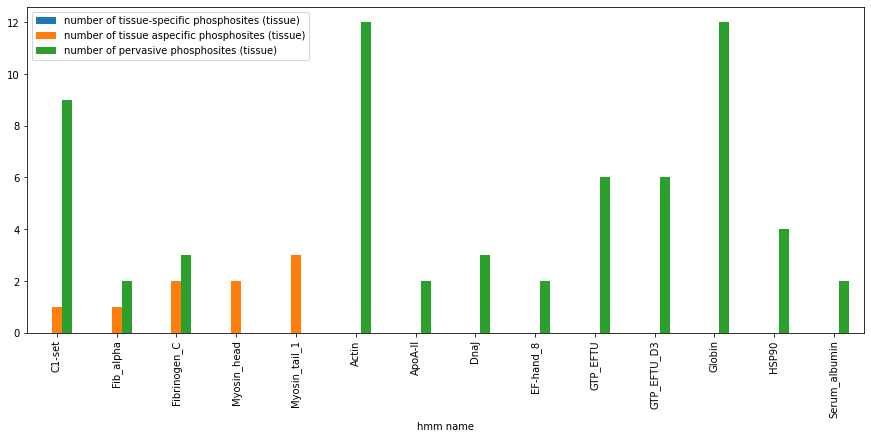

In [209]:
df_hmm_tspec_tissue = tspec_sites_pfam.loc[tspec_sites_pfam["Nasal polyps"]==1, :].groupby(["hmm name", "ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"})
df_hmm_taspec_tissue = taspec_sites_pfam.loc[taspec_sites_pfam["Nasal polyps"]==1, :].groupby(["hmm name", "ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"})
df_hmm_gen_tissue = gen_sites_pfam.loc[gen_sites_pfam["Nasal polyps"]==1, :].groupby(["hmm name", "ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"})

df_hmm_tspec_tissue = df_hmm_tspec_tissue.groupby(["hmm name"], as_index=False)["ACC_ID"].count()
df_hmm_tspec_tissue.rename({"ACC_ID": "number of tissue-specific phosphosites (tissue)"}, inplace=True, axis=1)
df_hmm_tspec_tissue.set_index(["hmm name"], inplace=True)
df_hmm_taspec_tissue = df_hmm_taspec_tissue.groupby(["hmm name"], as_index=False)["ACC_ID"].count()
df_hmm_taspec_tissue.rename({"ACC_ID": "number of tissue aspecific phosphosites (tissue)"}, inplace=True, axis=1)
df_hmm_taspec_tissue.set_index(["hmm name"], inplace=True)
df_hmm_gen_tissue = df_hmm_gen_tissue.groupby(["hmm name"], as_index=False)["ACC_ID"].count()
df_hmm_gen_tissue.rename({"ACC_ID": "number of pervasive phosphosites (tissue)"}, inplace=True, axis=1)
df_hmm_gen_tissue.set_index(["hmm name"], inplace=True)
df_hmm_all_tissue = pd.concat([df_hmm_tspec_tissue, df_hmm_taspec_tissue, df_hmm_gen_tissue], axis=1)
df_hmm_all_tissue[((df_hmm_all_tissue["number of tissue-specific phosphosites (tissue)"]>1)|
                 (df_hmm_all_tissue["number of tissue aspecific phosphosites (tissue)"]>1)|
                 (df_hmm_all_tissue["number of pervasive phosphosites (tissue)"]>1))].plot(kind="bar", figsize=(15,6))


## NK-cells

<AxesSubplot:xlabel='clan'>

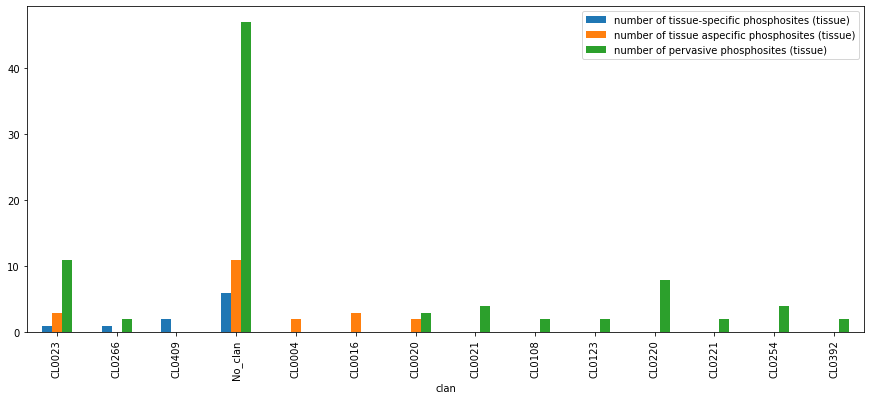

In [210]:
df_clan_tspec_tissue = tspec_sites_pfam.loc[tspec_sites_pfam["NK-cells"]==1, :].groupby(["clan", "ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"})
df_clan_taspec_tissue = taspec_sites_pfam.loc[taspec_sites_pfam["NK-cells"]==1, :].groupby(["clan", "ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"})
df_clan_gen_tissue = gen_sites_pfam.loc[gen_sites_pfam["NK-cells"]==1, :].groupby(["clan", "ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"})

df_clan_tspec_tissue = df_clan_tspec_tissue.groupby(["clan"], as_index=False)["ACC_ID"].count()
df_clan_tspec_tissue.rename({"ACC_ID": "number of tissue-specific phosphosites (tissue)"}, inplace=True, axis=1)
df_clan_tspec_tissue.set_index(["clan"], inplace=True)
df_clan_taspec_tissue = df_clan_taspec_tissue.groupby(["clan"], as_index=False)["ACC_ID"].count()
df_clan_taspec_tissue.rename({"ACC_ID": "number of tissue aspecific phosphosites (tissue)"}, inplace=True, axis=1)
df_clan_taspec_tissue.set_index(["clan"], inplace=True)
df_clan_gen_tissue = df_clan_gen_tissue.groupby(["clan"], as_index=False)["ACC_ID"].count()
df_clan_gen_tissue.rename({"ACC_ID": "number of pervasive phosphosites (tissue)"}, inplace=True, axis=1)
df_clan_gen_tissue.set_index(["clan"], inplace=True)
df_clan_all_tissue = pd.concat([df_clan_tspec_tissue, df_clan_taspec_tissue, df_clan_gen_tissue], axis=1)
df_clan_all_tissue[((df_clan_all_tissue["number of tissue-specific phosphosites (tissue)"]>1)|
                 (df_clan_all_tissue["number of tissue aspecific phosphosites (tissue)"]>1)|
                 (df_clan_all_tissue["number of pervasive phosphosites (tissue)"]>1))].plot(kind="bar", figsize=(15,6))


<AxesSubplot:xlabel='hmm name'>

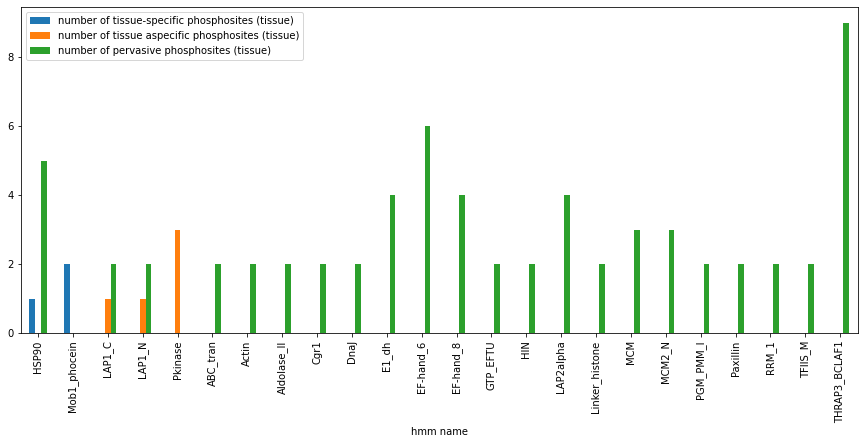

In [211]:
df_hmm_tspec_tissue = tspec_sites_pfam.loc[tspec_sites_pfam["NK-cells"]==1, :].groupby(["hmm name", "ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"})
df_hmm_taspec_tissue = taspec_sites_pfam.loc[taspec_sites_pfam["NK-cells"]==1, :].groupby(["hmm name", "ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"})
df_hmm_gen_tissue = gen_sites_pfam.loc[gen_sites_pfam["NK-cells"]==1, :].groupby(["hmm name", "ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"})

df_hmm_tspec_tissue = df_hmm_tspec_tissue.groupby(["hmm name"], as_index=False)["ACC_ID"].count()
df_hmm_tspec_tissue.rename({"ACC_ID": "number of tissue-specific phosphosites (tissue)"}, inplace=True, axis=1)
df_hmm_tspec_tissue.set_index(["hmm name"], inplace=True)
df_hmm_taspec_tissue = df_hmm_taspec_tissue.groupby(["hmm name"], as_index=False)["ACC_ID"].count()
df_hmm_taspec_tissue.rename({"ACC_ID": "number of tissue aspecific phosphosites (tissue)"}, inplace=True, axis=1)
df_hmm_taspec_tissue.set_index(["hmm name"], inplace=True)
df_hmm_gen_tissue = df_hmm_gen_tissue.groupby(["hmm name"], as_index=False)["ACC_ID"].count()
df_hmm_gen_tissue.rename({"ACC_ID": "number of pervasive phosphosites (tissue)"}, inplace=True, axis=1)
df_hmm_gen_tissue.set_index(["hmm name"], inplace=True)
df_hmm_all_tissue = pd.concat([df_hmm_tspec_tissue, df_hmm_taspec_tissue, df_hmm_gen_tissue], axis=1)
df_hmm_all_tissue[((df_hmm_all_tissue["number of tissue-specific phosphosites (tissue)"]>1)|
                 (df_hmm_all_tissue["number of tissue aspecific phosphosites (tissue)"]>1)|
                 (df_hmm_all_tissue["number of pervasive phosphosites (tissue)"]>1))].plot(kind="bar", figsize=(15,6))


## Ovary

<AxesSubplot:xlabel='clan'>

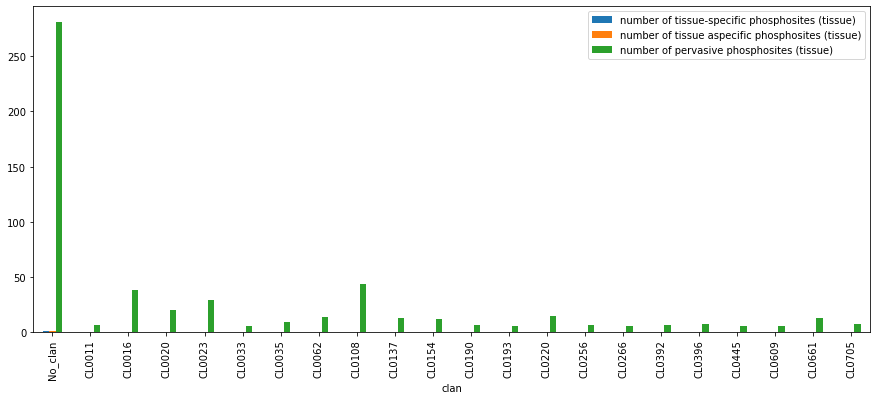

In [212]:
df_clan_tspec_tissue = tspec_sites_pfam.loc[tspec_sites_pfam["Ovary"]==1, :].groupby(["clan", "ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"})
df_clan_taspec_tissue = taspec_sites_pfam.loc[taspec_sites_pfam["Ovary"]==1, :].groupby(["clan", "ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"})
df_clan_gen_tissue = gen_sites_pfam.loc[gen_sites_pfam["Ovary"]==1, :].groupby(["clan", "ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"})

df_clan_tspec_tissue = df_clan_tspec_tissue.groupby(["clan"], as_index=False)["ACC_ID"].count()
df_clan_tspec_tissue.rename({"ACC_ID": "number of tissue-specific phosphosites (tissue)"}, inplace=True, axis=1)
df_clan_tspec_tissue.set_index(["clan"], inplace=True)
df_clan_taspec_tissue = df_clan_taspec_tissue.groupby(["clan"], as_index=False)["ACC_ID"].count()
df_clan_taspec_tissue.rename({"ACC_ID": "number of tissue aspecific phosphosites (tissue)"}, inplace=True, axis=1)
df_clan_taspec_tissue.set_index(["clan"], inplace=True)
df_clan_gen_tissue = df_clan_gen_tissue.groupby(["clan"], as_index=False)["ACC_ID"].count()
df_clan_gen_tissue.rename({"ACC_ID": "number of pervasive phosphosites (tissue)"}, inplace=True, axis=1)
df_clan_gen_tissue.set_index(["clan"], inplace=True)
df_clan_all_tissue = pd.concat([df_clan_tspec_tissue, df_clan_taspec_tissue, df_clan_gen_tissue], axis=1)
df_clan_all_tissue[((df_clan_all_tissue["number of tissue-specific phosphosites (tissue)"]>5)|
                 (df_clan_all_tissue["number of tissue aspecific phosphosites (tissue)"]>5)|
                 (df_clan_all_tissue["number of pervasive phosphosites (tissue)"]>5))].plot(kind="bar", figsize=(15,6))


<AxesSubplot:xlabel='hmm name'>

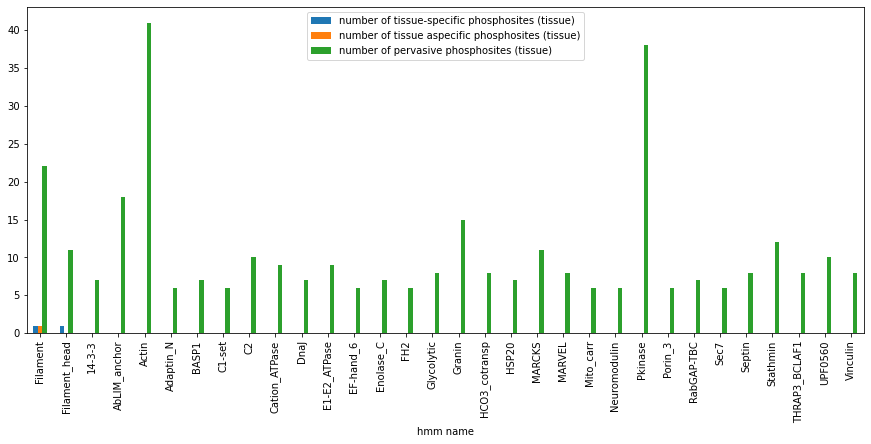

In [213]:
df_hmm_tspec_tissue = tspec_sites_pfam.loc[tspec_sites_pfam["Ovary"]==1, :].groupby(["hmm name", "ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"})
df_hmm_taspec_tissue = taspec_sites_pfam.loc[taspec_sites_pfam["Ovary"]==1, :].groupby(["hmm name", "ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"})
df_hmm_gen_tissue = gen_sites_pfam.loc[gen_sites_pfam["Ovary"]==1, :].groupby(["hmm name", "ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"})

df_hmm_tspec_tissue = df_hmm_tspec_tissue.groupby(["hmm name"], as_index=False)["ACC_ID"].count()
df_hmm_tspec_tissue.rename({"ACC_ID": "number of tissue-specific phosphosites (tissue)"}, inplace=True, axis=1)
df_hmm_tspec_tissue.set_index(["hmm name"], inplace=True)
df_hmm_taspec_tissue = df_hmm_taspec_tissue.groupby(["hmm name"], as_index=False)["ACC_ID"].count()
df_hmm_taspec_tissue.rename({"ACC_ID": "number of tissue aspecific phosphosites (tissue)"}, inplace=True, axis=1)
df_hmm_taspec_tissue.set_index(["hmm name"], inplace=True)
df_hmm_gen_tissue = df_hmm_gen_tissue.groupby(["hmm name"], as_index=False)["ACC_ID"].count()
df_hmm_gen_tissue.rename({"ACC_ID": "number of pervasive phosphosites (tissue)"}, inplace=True, axis=1)
df_hmm_gen_tissue.set_index(["hmm name"], inplace=True)
df_hmm_all_tissue = pd.concat([df_hmm_tspec_tissue, df_hmm_taspec_tissue, df_hmm_gen_tissue], axis=1)
df_hmm_all_tissue[((df_hmm_all_tissue["number of tissue-specific phosphosites (tissue)"]>5)|
                 (df_hmm_all_tissue["number of tissue aspecific phosphosites (tissue)"]>5)|
                 (df_hmm_all_tissue["number of pervasive phosphosites (tissue)"]>5))].plot(kind="bar", figsize=(15,6))


## Pancreas

<AxesSubplot:xlabel='clan'>

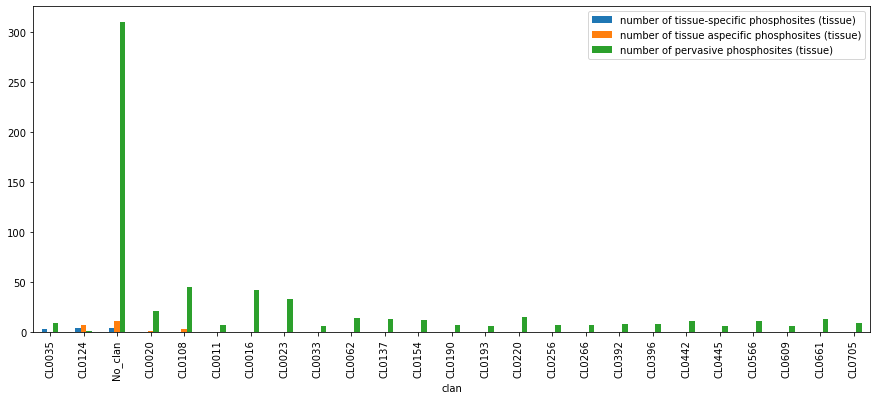

In [214]:
df_clan_tspec_tissue = tspec_sites_pfam.loc[tspec_sites_pfam["Pancreas"]==1, :].groupby(["clan", "ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"})
df_clan_taspec_tissue = taspec_sites_pfam.loc[taspec_sites_pfam["Pancreas"]==1, :].groupby(["clan", "ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"})
df_clan_gen_tissue = gen_sites_pfam.loc[gen_sites_pfam["Pancreas"]==1, :].groupby(["clan", "ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"})

df_clan_tspec_tissue = df_clan_tspec_tissue.groupby(["clan"], as_index=False)["ACC_ID"].count()
df_clan_tspec_tissue.rename({"ACC_ID": "number of tissue-specific phosphosites (tissue)"}, inplace=True, axis=1)
df_clan_tspec_tissue.set_index(["clan"], inplace=True)
df_clan_taspec_tissue = df_clan_taspec_tissue.groupby(["clan"], as_index=False)["ACC_ID"].count()
df_clan_taspec_tissue.rename({"ACC_ID": "number of tissue aspecific phosphosites (tissue)"}, inplace=True, axis=1)
df_clan_taspec_tissue.set_index(["clan"], inplace=True)
df_clan_gen_tissue = df_clan_gen_tissue.groupby(["clan"], as_index=False)["ACC_ID"].count()
df_clan_gen_tissue.rename({"ACC_ID": "number of pervasive phosphosites (tissue)"}, inplace=True, axis=1)
df_clan_gen_tissue.set_index(["clan"], inplace=True)
df_clan_all_tissue = pd.concat([df_clan_tspec_tissue, df_clan_taspec_tissue, df_clan_gen_tissue], axis=1)
df_clan_all_tissue[((df_clan_all_tissue["number of tissue-specific phosphosites (tissue)"]>5)|
                 (df_clan_all_tissue["number of tissue aspecific phosphosites (tissue)"]>5)|
                 (df_clan_all_tissue["number of pervasive phosphosites (tissue)"]>5))].plot(kind="bar", figsize=(15,6))


<AxesSubplot:xlabel='hmm name'>

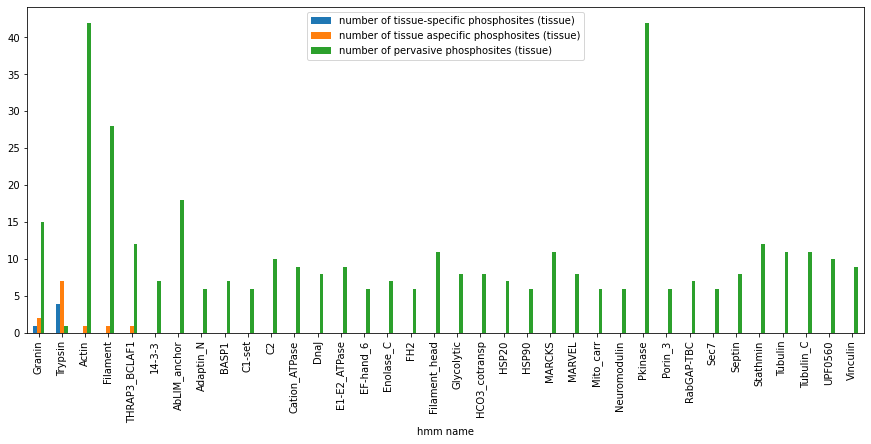

In [215]:
df_hmm_tspec_tissue = tspec_sites_pfam.loc[tspec_sites_pfam["Pancreas"]==1, :].groupby(["hmm name", "ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"})
df_hmm_taspec_tissue = taspec_sites_pfam.loc[taspec_sites_pfam["Pancreas"]==1, :].groupby(["hmm name", "ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"})
df_hmm_gen_tissue = gen_sites_pfam.loc[gen_sites_pfam["Pancreas"]==1, :].groupby(["hmm name", "ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"})

df_hmm_tspec_tissue = df_hmm_tspec_tissue.groupby(["hmm name"], as_index=False)["ACC_ID"].count()
df_hmm_tspec_tissue.rename({"ACC_ID": "number of tissue-specific phosphosites (tissue)"}, inplace=True, axis=1)
df_hmm_tspec_tissue.set_index(["hmm name"], inplace=True)
df_hmm_taspec_tissue = df_hmm_taspec_tissue.groupby(["hmm name"], as_index=False)["ACC_ID"].count()
df_hmm_taspec_tissue.rename({"ACC_ID": "number of tissue aspecific phosphosites (tissue)"}, inplace=True, axis=1)
df_hmm_taspec_tissue.set_index(["hmm name"], inplace=True)
df_hmm_gen_tissue = df_hmm_gen_tissue.groupby(["hmm name"], as_index=False)["ACC_ID"].count()
df_hmm_gen_tissue.rename({"ACC_ID": "number of pervasive phosphosites (tissue)"}, inplace=True, axis=1)
df_hmm_gen_tissue.set_index(["hmm name"], inplace=True)
df_hmm_all_tissue = pd.concat([df_hmm_tspec_tissue, df_hmm_taspec_tissue, df_hmm_gen_tissue], axis=1)
df_hmm_all_tissue[((df_hmm_all_tissue["number of tissue-specific phosphosites (tissue)"]>5)|
                 (df_hmm_all_tissue["number of tissue aspecific phosphosites (tissue)"]>5)|
                 (df_hmm_all_tissue["number of pervasive phosphosites (tissue)"]>5))].plot(kind="bar", figsize=(15,6))


## Palatine tonsils

<AxesSubplot:xlabel='clan'>

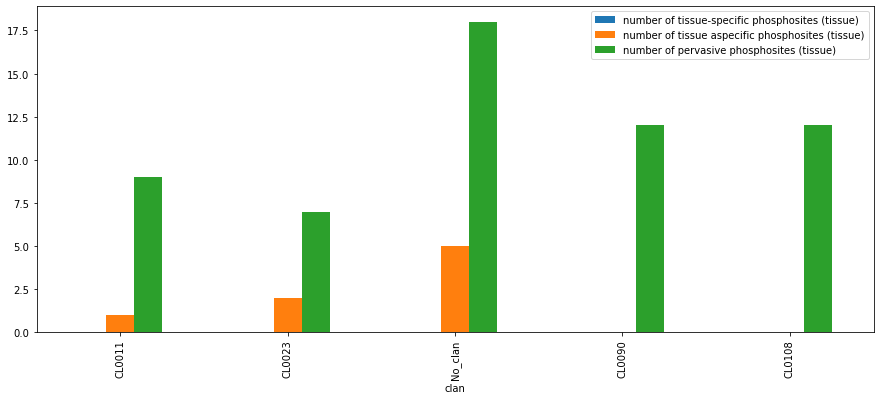

In [216]:
df_clan_tspec_tissue = tspec_sites_pfam.loc[tspec_sites_pfam["Palatine tonsils"]==1, :].groupby(["clan", "ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"})
df_clan_taspec_tissue = taspec_sites_pfam.loc[taspec_sites_pfam["Palatine tonsils"]==1, :].groupby(["clan", "ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"})
df_clan_gen_tissue = gen_sites_pfam.loc[gen_sites_pfam["Palatine tonsils"]==1, :].groupby(["clan", "ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"})

df_clan_tspec_tissue = df_clan_tspec_tissue.groupby(["clan"], as_index=False)["ACC_ID"].count()
df_clan_tspec_tissue.rename({"ACC_ID": "number of tissue-specific phosphosites (tissue)"}, inplace=True, axis=1)
df_clan_tspec_tissue.set_index(["clan"], inplace=True)
df_clan_taspec_tissue = df_clan_taspec_tissue.groupby(["clan"], as_index=False)["ACC_ID"].count()
df_clan_taspec_tissue.rename({"ACC_ID": "number of tissue aspecific phosphosites (tissue)"}, inplace=True, axis=1)
df_clan_taspec_tissue.set_index(["clan"], inplace=True)
df_clan_gen_tissue = df_clan_gen_tissue.groupby(["clan"], as_index=False)["ACC_ID"].count()
df_clan_gen_tissue.rename({"ACC_ID": "number of pervasive phosphosites (tissue)"}, inplace=True, axis=1)
df_clan_gen_tissue.set_index(["clan"], inplace=True)
df_clan_all_tissue = pd.concat([df_clan_tspec_tissue, df_clan_taspec_tissue, df_clan_gen_tissue], axis=1)
df_clan_all_tissue[((df_clan_all_tissue["number of tissue-specific phosphosites (tissue)"]>5)|
                 (df_clan_all_tissue["number of tissue aspecific phosphosites (tissue)"]>5)|
                 (df_clan_all_tissue["number of pervasive phosphosites (tissue)"]>5))].plot(kind="bar", figsize=(15,6))


<AxesSubplot:xlabel='hmm name'>

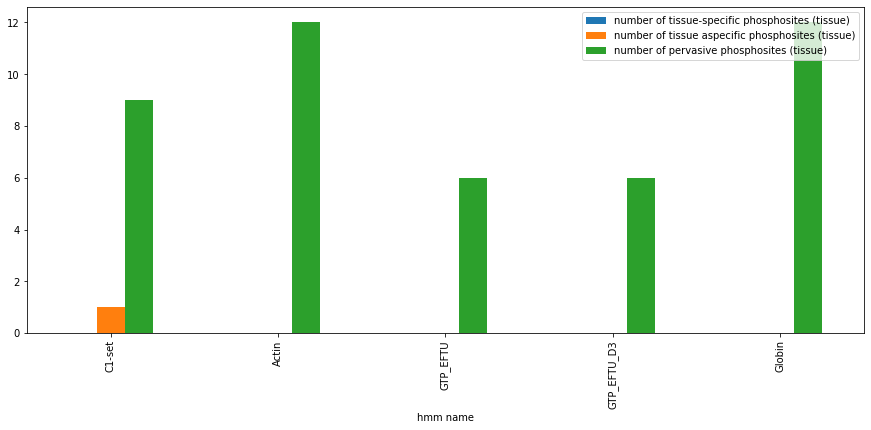

In [217]:
df_hmm_tspec_tissue = tspec_sites_pfam.loc[tspec_sites_pfam["Palatine tonsils"]==1, :].groupby(["hmm name", "ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"})
df_hmm_taspec_tissue = taspec_sites_pfam.loc[taspec_sites_pfam["Palatine tonsils"]==1, :].groupby(["hmm name", "ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"})
df_hmm_gen_tissue = gen_sites_pfam.loc[gen_sites_pfam["Palatine tonsils"]==1, :].groupby(["hmm name", "ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"})

df_hmm_tspec_tissue = df_hmm_tspec_tissue.groupby(["hmm name"], as_index=False)["ACC_ID"].count()
df_hmm_tspec_tissue.rename({"ACC_ID": "number of tissue-specific phosphosites (tissue)"}, inplace=True, axis=1)
df_hmm_tspec_tissue.set_index(["hmm name"], inplace=True)
df_hmm_taspec_tissue = df_hmm_taspec_tissue.groupby(["hmm name"], as_index=False)["ACC_ID"].count()
df_hmm_taspec_tissue.rename({"ACC_ID": "number of tissue aspecific phosphosites (tissue)"}, inplace=True, axis=1)
df_hmm_taspec_tissue.set_index(["hmm name"], inplace=True)
df_hmm_gen_tissue = df_hmm_gen_tissue.groupby(["hmm name"], as_index=False)["ACC_ID"].count()
df_hmm_gen_tissue.rename({"ACC_ID": "number of pervasive phosphosites (tissue)"}, inplace=True, axis=1)
df_hmm_gen_tissue.set_index(["hmm name"], inplace=True)
df_hmm_all_tissue = pd.concat([df_hmm_tspec_tissue, df_hmm_taspec_tissue, df_hmm_gen_tissue], axis=1)
df_hmm_all_tissue[((df_hmm_all_tissue["number of tissue-specific phosphosites (tissue)"]>5)|
                 (df_hmm_all_tissue["number of tissue aspecific phosphosites (tissue)"]>5)|
                 (df_hmm_all_tissue["number of pervasive phosphosites (tissue)"]>5))].plot(kind="bar", figsize=(15,6))

## Parotid gland

<AxesSubplot:xlabel='clan'>

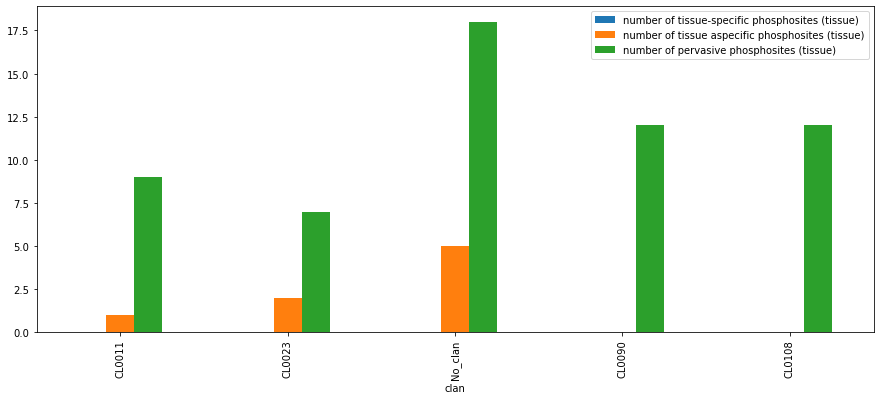

In [218]:
df_clan_tspec_tissue = tspec_sites_pfam.loc[tspec_sites_pfam["Parotid gland"]==1, :].groupby(["clan", "ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"})
df_clan_taspec_tissue = taspec_sites_pfam.loc[taspec_sites_pfam["Parotid gland"]==1, :].groupby(["clan", "ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"})
df_clan_gen_tissue = gen_sites_pfam.loc[gen_sites_pfam["Parotid gland"]==1, :].groupby(["clan", "ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"})

df_clan_tspec_tissue = df_clan_tspec_tissue.groupby(["clan"], as_index=False)["ACC_ID"].count()
df_clan_tspec_tissue.rename({"ACC_ID": "number of tissue-specific phosphosites (tissue)"}, inplace=True, axis=1)
df_clan_tspec_tissue.set_index(["clan"], inplace=True)
df_clan_taspec_tissue = df_clan_taspec_tissue.groupby(["clan"], as_index=False)["ACC_ID"].count()
df_clan_taspec_tissue.rename({"ACC_ID": "number of tissue aspecific phosphosites (tissue)"}, inplace=True, axis=1)
df_clan_taspec_tissue.set_index(["clan"], inplace=True)
df_clan_gen_tissue = df_clan_gen_tissue.groupby(["clan"], as_index=False)["ACC_ID"].count()
df_clan_gen_tissue.rename({"ACC_ID": "number of pervasive phosphosites (tissue)"}, inplace=True, axis=1)
df_clan_gen_tissue.set_index(["clan"], inplace=True)
df_clan_all_tissue = pd.concat([df_clan_tspec_tissue, df_clan_taspec_tissue, df_clan_gen_tissue], axis=1)
df_clan_all_tissue[((df_clan_all_tissue["number of tissue-specific phosphosites (tissue)"]>5)|
                 (df_clan_all_tissue["number of tissue aspecific phosphosites (tissue)"]>5)|
                 (df_clan_all_tissue["number of pervasive phosphosites (tissue)"]>5))].plot(kind="bar", figsize=(15,6))

<AxesSubplot:xlabel='hmm name'>

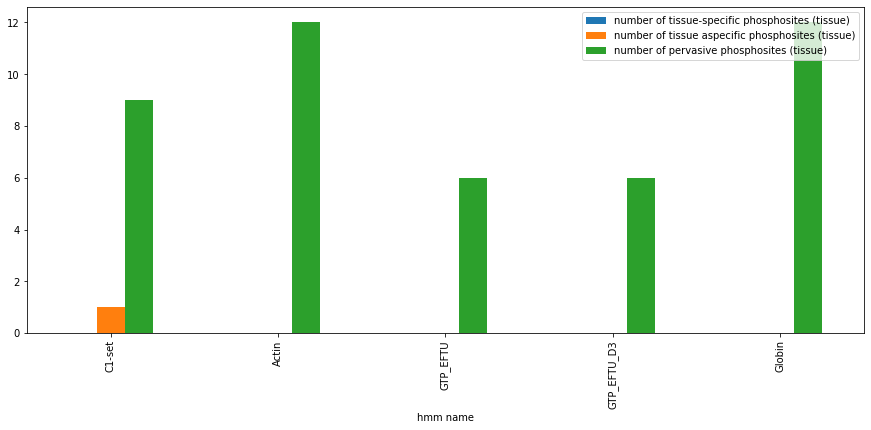

In [219]:
df_hmm_tspec_tissue = tspec_sites_pfam.loc[tspec_sites_pfam["Parotid gland"]==1, :].groupby(["hmm name", "ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"})
df_hmm_taspec_tissue = taspec_sites_pfam.loc[taspec_sites_pfam["Parotid gland"]==1, :].groupby(["hmm name", "ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"})
df_hmm_gen_tissue = gen_sites_pfam.loc[gen_sites_pfam["Parotid gland"]==1, :].groupby(["hmm name", "ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"})

df_hmm_tspec_tissue = df_hmm_tspec_tissue.groupby(["hmm name"], as_index=False)["ACC_ID"].count()
df_hmm_tspec_tissue.rename({"ACC_ID": "number of tissue-specific phosphosites (tissue)"}, inplace=True, axis=1)
df_hmm_tspec_tissue.set_index(["hmm name"], inplace=True)
df_hmm_taspec_tissue = df_hmm_taspec_tissue.groupby(["hmm name"], as_index=False)["ACC_ID"].count()
df_hmm_taspec_tissue.rename({"ACC_ID": "number of tissue aspecific phosphosites (tissue)"}, inplace=True, axis=1)
df_hmm_taspec_tissue.set_index(["hmm name"], inplace=True)
df_hmm_gen_tissue = df_hmm_gen_tissue.groupby(["hmm name"], as_index=False)["ACC_ID"].count()
df_hmm_gen_tissue.rename({"ACC_ID": "number of pervasive phosphosites (tissue)"}, inplace=True, axis=1)
df_hmm_gen_tissue.set_index(["hmm name"], inplace=True)
df_hmm_all_tissue = pd.concat([df_hmm_tspec_tissue, df_hmm_taspec_tissue, df_hmm_gen_tissue], axis=1)
df_hmm_all_tissue[((df_hmm_all_tissue["number of tissue-specific phosphosites (tissue)"]>5)|
                 (df_hmm_all_tissue["number of tissue aspecific phosphosites (tissue)"]>5)|
                 (df_hmm_all_tissue["number of pervasive phosphosites (tissue)"]>5))].plot(kind="bar", figsize=(15,6))

## PBMC

<AxesSubplot:xlabel='clan'>

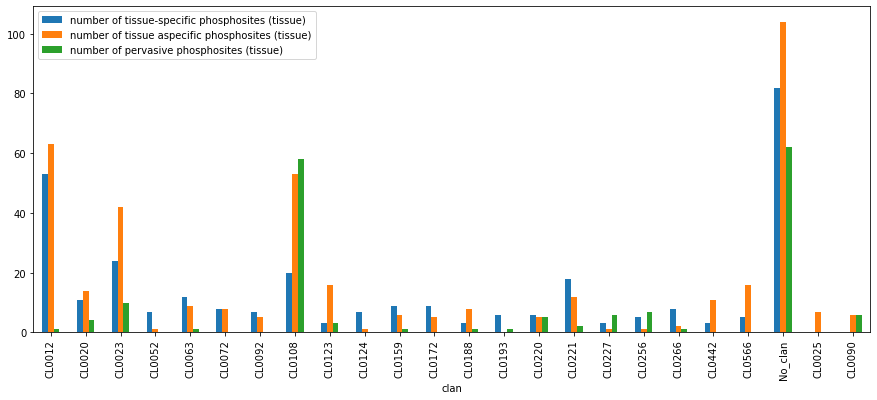

In [220]:
df_clan_tspec_tissue = tspec_sites_pfam.loc[tspec_sites_pfam["PBMC"]==1, :].groupby(["clan", "ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"})
df_clan_taspec_tissue = taspec_sites_pfam.loc[taspec_sites_pfam["PBMC"]==1, :].groupby(["clan", "ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"})
df_clan_gen_tissue = gen_sites_pfam.loc[gen_sites_pfam["PBMC"]==1, :].groupby(["clan", "ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"})

df_clan_tspec_tissue = df_clan_tspec_tissue.groupby(["clan"], as_index=False)["ACC_ID"].count()
df_clan_tspec_tissue.rename({"ACC_ID": "number of tissue-specific phosphosites (tissue)"}, inplace=True, axis=1)
df_clan_tspec_tissue.set_index(["clan"], inplace=True)
df_clan_taspec_tissue = df_clan_taspec_tissue.groupby(["clan"], as_index=False)["ACC_ID"].count()
df_clan_taspec_tissue.rename({"ACC_ID": "number of tissue aspecific phosphosites (tissue)"}, inplace=True, axis=1)
df_clan_taspec_tissue.set_index(["clan"], inplace=True)
df_clan_gen_tissue = df_clan_gen_tissue.groupby(["clan"], as_index=False)["ACC_ID"].count()
df_clan_gen_tissue.rename({"ACC_ID": "number of pervasive phosphosites (tissue)"}, inplace=True, axis=1)
df_clan_gen_tissue.set_index(["clan"], inplace=True)
df_clan_all_tissue = pd.concat([df_clan_tspec_tissue, df_clan_taspec_tissue, df_clan_gen_tissue], axis=1)
df_clan_all_tissue[((df_clan_all_tissue["number of tissue-specific phosphosites (tissue)"]>5)|
                 (df_clan_all_tissue["number of tissue aspecific phosphosites (tissue)"]>5)|
                 (df_clan_all_tissue["number of pervasive phosphosites (tissue)"]>5))].plot(kind="bar", figsize=(15,6))

<AxesSubplot:xlabel='hmm name'>

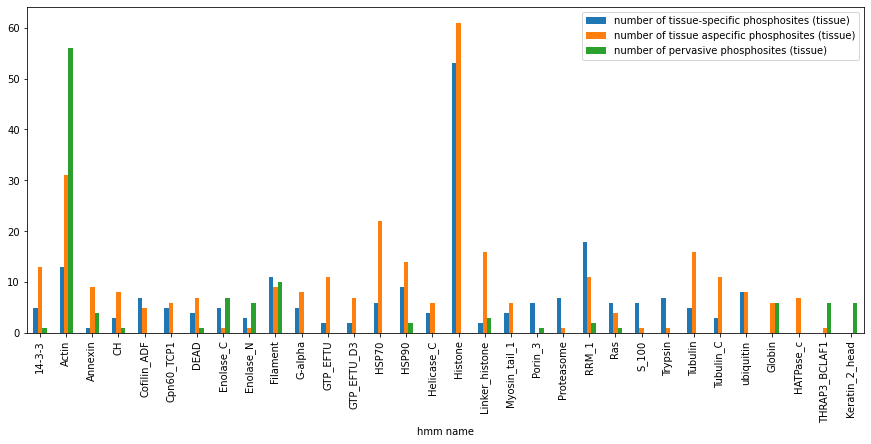

In [221]:
df_hmm_tspec_tissue = tspec_sites_pfam.loc[tspec_sites_pfam["PBMC"]==1, :].groupby(["hmm name", "ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"})
df_hmm_taspec_tissue = taspec_sites_pfam.loc[taspec_sites_pfam["PBMC"]==1, :].groupby(["hmm name", "ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"})
df_hmm_gen_tissue = gen_sites_pfam.loc[gen_sites_pfam["PBMC"]==1, :].groupby(["hmm name", "ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"})

df_hmm_tspec_tissue = df_hmm_tspec_tissue.groupby(["hmm name"], as_index=False)["ACC_ID"].count()
df_hmm_tspec_tissue.rename({"ACC_ID": "number of tissue-specific phosphosites (tissue)"}, inplace=True, axis=1)
df_hmm_tspec_tissue.set_index(["hmm name"], inplace=True)
df_hmm_taspec_tissue = df_hmm_taspec_tissue.groupby(["hmm name"], as_index=False)["ACC_ID"].count()
df_hmm_taspec_tissue.rename({"ACC_ID": "number of tissue aspecific phosphosites (tissue)"}, inplace=True, axis=1)
df_hmm_taspec_tissue.set_index(["hmm name"], inplace=True)
df_hmm_gen_tissue = df_hmm_gen_tissue.groupby(["hmm name"], as_index=False)["ACC_ID"].count()
df_hmm_gen_tissue.rename({"ACC_ID": "number of pervasive phosphosites (tissue)"}, inplace=True, axis=1)
df_hmm_gen_tissue.set_index(["hmm name"], inplace=True)
df_hmm_all_tissue = pd.concat([df_hmm_tspec_tissue, df_hmm_taspec_tissue, df_hmm_gen_tissue], axis=1)
df_hmm_all_tissue[((df_hmm_all_tissue["number of tissue-specific phosphosites (tissue)"]>5)|
                 (df_hmm_all_tissue["number of tissue aspecific phosphosites (tissue)"]>5)|
                 (df_hmm_all_tissue["number of pervasive phosphosites (tissue)"]>5))].plot(kind="bar", figsize=(15,6))

## Peritoneal dialysis fluid

In [222]:
df_clan_tspec_tissue = tspec_sites_pfam.loc[tspec_sites_pfam["Peritoneal dialysis fluid"]==1, :].groupby(["clan", "ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"})
df_clan_taspec_tissue = taspec_sites_pfam.loc[taspec_sites_pfam["Peritoneal dialysis fluid"]==1, :].groupby(["clan", "ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"})
df_clan_gen_tissue = gen_sites_pfam.loc[gen_sites_pfam["Peritoneal dialysis fluid"]==1, :].groupby(["clan", "ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"})

df_clan_tspec_tissue = df_clan_tspec_tissue.groupby(["clan"], as_index=False)["ACC_ID"].count()
df_clan_tspec_tissue.rename({"ACC_ID": "number of tissue-specific phosphosites (tissue)"}, inplace=True, axis=1)
df_clan_tspec_tissue.set_index(["clan"], inplace=True)
df_clan_taspec_tissue = df_clan_taspec_tissue.groupby(["clan"], as_index=False)["ACC_ID"].count()
df_clan_taspec_tissue.rename({"ACC_ID": "number of tissue aspecific phosphosites (tissue)"}, inplace=True, axis=1)
df_clan_taspec_tissue.set_index(["clan"], inplace=True)
df_clan_gen_tissue = df_clan_gen_tissue.groupby(["clan"], as_index=False)["ACC_ID"].count()
df_clan_gen_tissue.rename({"ACC_ID": "number of pervasive phosphosites (tissue)"}, inplace=True, axis=1)
df_clan_gen_tissue.set_index(["clan"], inplace=True)
df_clan_all_tissue = pd.concat([df_clan_tspec_tissue, df_clan_taspec_tissue, df_clan_gen_tissue], axis=1)
df_clan_all_tissue#[((df_clan_all_tissue["number of tissue-specific phosphosites (tissue)"]>5)|
                 #(df_clan_all_tissue["number of tissue aspecific phosphosites (tissue)"]>5)|
                 #(df_clan_all_tissue["number of pervasive phosphosites (tissue)"]>5))].plot(kind="bar", figsize=(15,6))

number of tissue-specific phosphosites (tissue)  \
clan                                                       
No_clan                                              NaN   

         number of tissue aspecific phosphosites (tissue)  \
clan                                                        
No_clan                                               NaN   

         number of pervasive phosphosites (tissue)  
clan                                                
No_clan                                          1

In [223]:
df_hmm_tspec_tissue = tspec_sites_pfam.loc[tspec_sites_pfam["Peritoneal dialysis fluid"]==1, :].groupby(["hmm name", "ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"})
df_hmm_taspec_tissue = taspec_sites_pfam.loc[taspec_sites_pfam["Peritoneal dialysis fluid"]==1, :].groupby(["hmm name", "ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"})
df_hmm_gen_tissue = gen_sites_pfam.loc[gen_sites_pfam["Peritoneal dialysis fluid"]==1, :].groupby(["hmm name", "ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"})

df_hmm_tspec_tissue = df_hmm_tspec_tissue.groupby(["hmm name"], as_index=False)["ACC_ID"].count()
df_hmm_tspec_tissue.rename({"ACC_ID": "number of tissue-specific phosphosites (tissue)"}, inplace=True, axis=1)
df_hmm_tspec_tissue.set_index(["hmm name"], inplace=True)
df_hmm_taspec_tissue = df_hmm_taspec_tissue.groupby(["hmm name"], as_index=False)["ACC_ID"].count()
df_hmm_taspec_tissue.rename({"ACC_ID": "number of tissue aspecific phosphosites (tissue)"}, inplace=True, axis=1)
df_hmm_taspec_tissue.set_index(["hmm name"], inplace=True)
df_hmm_gen_tissue = df_hmm_gen_tissue.groupby(["hmm name"], as_index=False)["ACC_ID"].count()
df_hmm_gen_tissue.rename({"ACC_ID": "number of pervasive phosphosites (tissue)"}, inplace=True, axis=1)
df_hmm_gen_tissue.set_index(["hmm name"], inplace=True)
df_hmm_all_tissue = pd.concat([df_hmm_tspec_tissue, df_hmm_taspec_tissue, df_hmm_gen_tissue], axis=1)
df_hmm_all_tissue#[((df_hmm_all_tissue["number of tissue-specific phosphosites (tissue)"]>5)|
                 #(df_hmm_all_tissue["number of tissue aspecific phosphosites (tissue)"]>5)|
                 #(df_hmm_all_tissue["number of pervasive phosphosites (tissue)"]>5))].plot(kind="bar", figsize=(15,6))


number of tissue-specific phosphosites (tissue)  \
hmm name                                                          
Filament                                                    NaN   
Keratin_2_head                                              NaN   
Keratin_2_tail                                              NaN   

                number of tissue aspecific phosphosites (tissue)  \
hmm name                                                           
Filament                                                     NaN   
Keratin_2_head                                               NaN   
Keratin_2_tail                                               NaN   

                number of pervasive phosphosites (tissue)  
hmm name                                                   
Filament                                                1  
Keratin_2_head                                          1  
Keratin_2_tail                                          1

## Placenta

<AxesSubplot:xlabel='clan'>

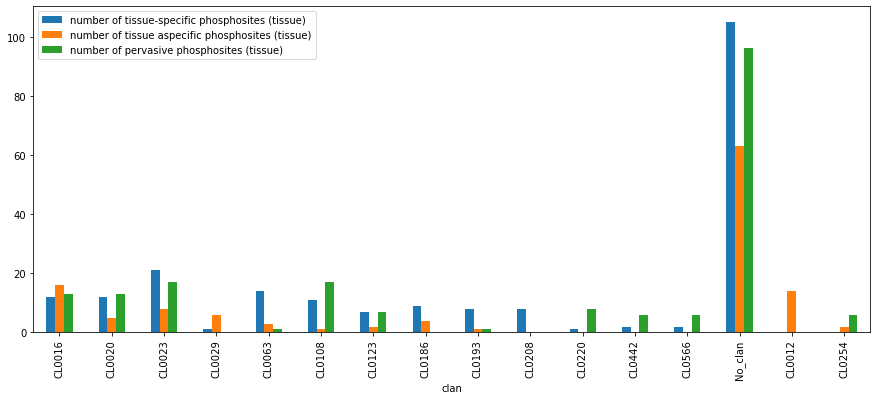

In [224]:
df_clan_tspec_tissue = tspec_sites_pfam.loc[tspec_sites_pfam["Placenta"]==1, :].groupby(["clan", "ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"})
df_clan_taspec_tissue = taspec_sites_pfam.loc[taspec_sites_pfam["Placenta"]==1, :].groupby(["clan", "ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"})
df_clan_gen_tissue = gen_sites_pfam.loc[gen_sites_pfam["Placenta"]==1, :].groupby(["clan", "ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"})

df_clan_tspec_tissue = df_clan_tspec_tissue.groupby(["clan"], as_index=False)["ACC_ID"].count()
df_clan_tspec_tissue.rename({"ACC_ID": "number of tissue-specific phosphosites (tissue)"}, inplace=True, axis=1)
df_clan_tspec_tissue.set_index(["clan"], inplace=True)
df_clan_taspec_tissue = df_clan_taspec_tissue.groupby(["clan"], as_index=False)["ACC_ID"].count()
df_clan_taspec_tissue.rename({"ACC_ID": "number of tissue aspecific phosphosites (tissue)"}, inplace=True, axis=1)
df_clan_taspec_tissue.set_index(["clan"], inplace=True)
df_clan_gen_tissue = df_clan_gen_tissue.groupby(["clan"], as_index=False)["ACC_ID"].count()
df_clan_gen_tissue.rename({"ACC_ID": "number of pervasive phosphosites (tissue)"}, inplace=True, axis=1)
df_clan_gen_tissue.set_index(["clan"], inplace=True)
df_clan_all_tissue = pd.concat([df_clan_tspec_tissue, df_clan_taspec_tissue, df_clan_gen_tissue], axis=1)
df_clan_all_tissue[((df_clan_all_tissue["number of tissue-specific phosphosites (tissue)"]>5)|
                 (df_clan_all_tissue["number of tissue aspecific phosphosites (tissue)"]>5)|
                 (df_clan_all_tissue["number of pervasive phosphosites (tissue)"]>5))].plot(kind="bar", figsize=(15,6))

<AxesSubplot:xlabel='hmm name'>

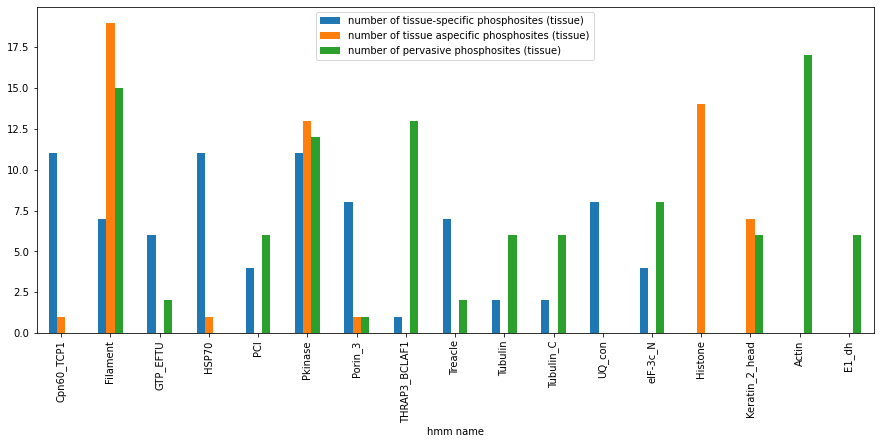

In [225]:
df_hmm_tspec_tissue = tspec_sites_pfam.loc[tspec_sites_pfam["Placenta"]==1, :].groupby(["hmm name", "ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"})
df_hmm_taspec_tissue = taspec_sites_pfam.loc[taspec_sites_pfam["Placenta"]==1, :].groupby(["hmm name", "ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"})
df_hmm_gen_tissue = gen_sites_pfam.loc[gen_sites_pfam["Placenta"]==1, :].groupby(["hmm name", "ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"})

df_hmm_tspec_tissue = df_hmm_tspec_tissue.groupby(["hmm name"], as_index=False)["ACC_ID"].count()
df_hmm_tspec_tissue.rename({"ACC_ID": "number of tissue-specific phosphosites (tissue)"}, inplace=True, axis=1)
df_hmm_tspec_tissue.set_index(["hmm name"], inplace=True)
df_hmm_taspec_tissue = df_hmm_taspec_tissue.groupby(["hmm name"], as_index=False)["ACC_ID"].count()
df_hmm_taspec_tissue.rename({"ACC_ID": "number of tissue aspecific phosphosites (tissue)"}, inplace=True, axis=1)
df_hmm_taspec_tissue.set_index(["hmm name"], inplace=True)
df_hmm_gen_tissue = df_hmm_gen_tissue.groupby(["hmm name"], as_index=False)["ACC_ID"].count()
df_hmm_gen_tissue.rename({"ACC_ID": "number of pervasive phosphosites (tissue)"}, inplace=True, axis=1)
df_hmm_gen_tissue.set_index(["hmm name"], inplace=True)
df_hmm_all_tissue = pd.concat([df_hmm_tspec_tissue, df_hmm_taspec_tissue, df_hmm_gen_tissue], axis=1)
df_hmm_all_tissue[((df_hmm_all_tissue["number of tissue-specific phosphosites (tissue)"]>5)|
                 (df_hmm_all_tissue["number of tissue aspecific phosphosites (tissue)"]>5)|
                 (df_hmm_all_tissue["number of pervasive phosphosites (tissue)"]>5))].plot(kind="bar", figsize=(15,6))


## Skeletal muscle

<AxesSubplot:xlabel='clan'>

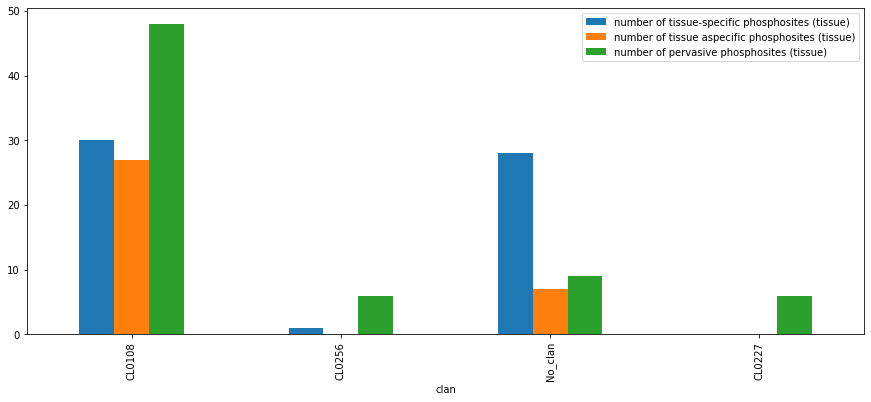

In [226]:
df_clan_tspec_tissue = tspec_sites_pfam.loc[tspec_sites_pfam["Skeletal muscle"]==1, :].groupby(["clan", "ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"})
df_clan_taspec_tissue = taspec_sites_pfam.loc[taspec_sites_pfam["Skeletal muscle"]==1, :].groupby(["clan", "ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"})
df_clan_gen_tissue = gen_sites_pfam.loc[gen_sites_pfam["Skeletal muscle"]==1, :].groupby(["clan", "ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"})

df_clan_tspec_tissue = df_clan_tspec_tissue.groupby(["clan"], as_index=False)["ACC_ID"].count()
df_clan_tspec_tissue.rename({"ACC_ID": "number of tissue-specific phosphosites (tissue)"}, inplace=True, axis=1)
df_clan_tspec_tissue.set_index(["clan"], inplace=True)
df_clan_taspec_tissue = df_clan_taspec_tissue.groupby(["clan"], as_index=False)["ACC_ID"].count()
df_clan_taspec_tissue.rename({"ACC_ID": "number of tissue aspecific phosphosites (tissue)"}, inplace=True, axis=1)
df_clan_taspec_tissue.set_index(["clan"], inplace=True)
df_clan_gen_tissue = df_clan_gen_tissue.groupby(["clan"], as_index=False)["ACC_ID"].count()
df_clan_gen_tissue.rename({"ACC_ID": "number of pervasive phosphosites (tissue)"}, inplace=True, axis=1)
df_clan_gen_tissue.set_index(["clan"], inplace=True)
df_clan_all_tissue = pd.concat([df_clan_tspec_tissue, df_clan_taspec_tissue, df_clan_gen_tissue], axis=1)
df_clan_all_tissue[((df_clan_all_tissue["number of tissue-specific phosphosites (tissue)"]>5)|
                 (df_clan_all_tissue["number of tissue aspecific phosphosites (tissue)"]>5)|
                 (df_clan_all_tissue["number of pervasive phosphosites (tissue)"]>5))].plot(kind="bar", figsize=(15,6))


<AxesSubplot:xlabel='hmm name'>

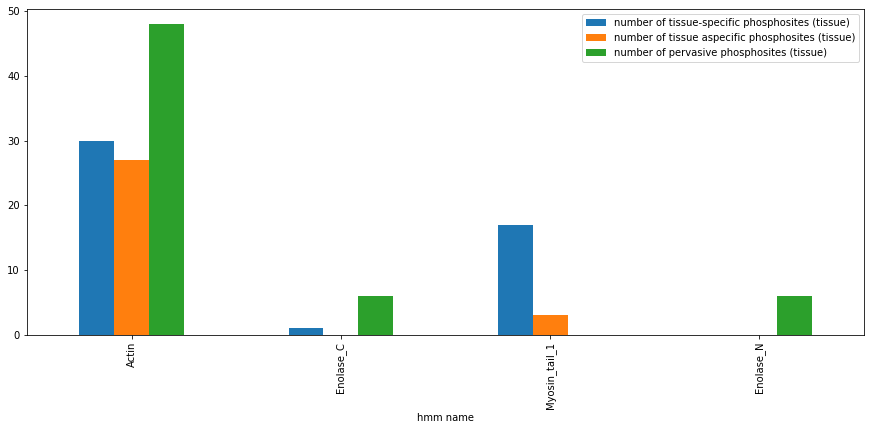

In [227]:
df_hmm_tspec_tissue = tspec_sites_pfam.loc[tspec_sites_pfam["Skeletal muscle"]==1, :].groupby(["hmm name", "ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"})
df_hmm_taspec_tissue = taspec_sites_pfam.loc[taspec_sites_pfam["Skeletal muscle"]==1, :].groupby(["hmm name", "ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"})
df_hmm_gen_tissue = gen_sites_pfam.loc[gen_sites_pfam["Skeletal muscle"]==1, :].groupby(["hmm name", "ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"})

df_hmm_tspec_tissue = df_hmm_tspec_tissue.groupby(["hmm name"], as_index=False)["ACC_ID"].count()
df_hmm_tspec_tissue.rename({"ACC_ID": "number of tissue-specific phosphosites (tissue)"}, inplace=True, axis=1)
df_hmm_tspec_tissue.set_index(["hmm name"], inplace=True)
df_hmm_taspec_tissue = df_hmm_taspec_tissue.groupby(["hmm name"], as_index=False)["ACC_ID"].count()
df_hmm_taspec_tissue.rename({"ACC_ID": "number of tissue aspecific phosphosites (tissue)"}, inplace=True, axis=1)
df_hmm_taspec_tissue.set_index(["hmm name"], inplace=True)
df_hmm_gen_tissue = df_hmm_gen_tissue.groupby(["hmm name"], as_index=False)["ACC_ID"].count()
df_hmm_gen_tissue.rename({"ACC_ID": "number of pervasive phosphosites (tissue)"}, inplace=True, axis=1)
df_hmm_gen_tissue.set_index(["hmm name"], inplace=True)
df_hmm_all_tissue = pd.concat([df_hmm_tspec_tissue, df_hmm_taspec_tissue, df_hmm_gen_tissue], axis=1)
df_hmm_all_tissue[((df_hmm_all_tissue["number of tissue-specific phosphosites (tissue)"]>5)|
                 (df_hmm_all_tissue["number of tissue aspecific phosphosites (tissue)"]>5)|
                 (df_hmm_all_tissue["number of pervasive phosphosites (tissue)"]>5))].plot(kind="bar", figsize=(15,6))


## Skin

<AxesSubplot:xlabel='clan'>

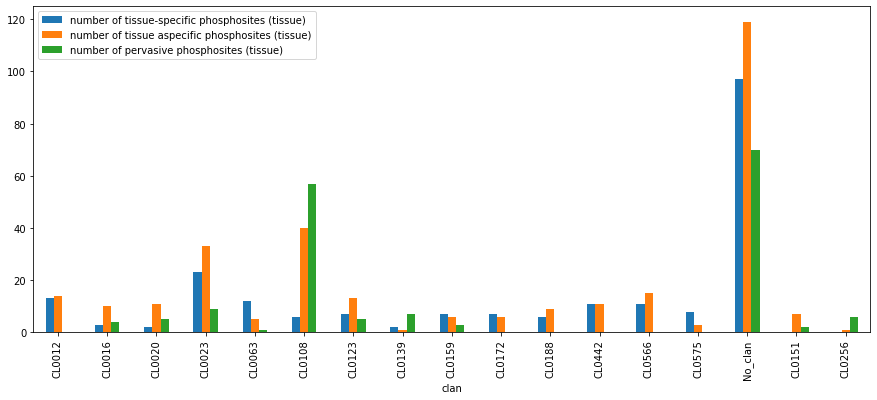

In [228]:
df_clan_tspec_tissue = tspec_sites_pfam.loc[tspec_sites_pfam["Skin"]==1, :].groupby(["clan", "ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"})
df_clan_taspec_tissue = taspec_sites_pfam.loc[taspec_sites_pfam["Skin"]==1, :].groupby(["clan", "ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"})
df_clan_gen_tissue = gen_sites_pfam.loc[gen_sites_pfam["Skin"]==1, :].groupby(["clan", "ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"})

df_clan_tspec_tissue = df_clan_tspec_tissue.groupby(["clan"], as_index=False)["ACC_ID"].count()
df_clan_tspec_tissue.rename({"ACC_ID": "number of tissue-specific phosphosites (tissue)"}, inplace=True, axis=1)
df_clan_tspec_tissue.set_index(["clan"], inplace=True)
df_clan_taspec_tissue = df_clan_taspec_tissue.groupby(["clan"], as_index=False)["ACC_ID"].count()
df_clan_taspec_tissue.rename({"ACC_ID": "number of tissue aspecific phosphosites (tissue)"}, inplace=True, axis=1)
df_clan_taspec_tissue.set_index(["clan"], inplace=True)
df_clan_gen_tissue = df_clan_gen_tissue.groupby(["clan"], as_index=False)["ACC_ID"].count()
df_clan_gen_tissue.rename({"ACC_ID": "number of pervasive phosphosites (tissue)"}, inplace=True, axis=1)
df_clan_gen_tissue.set_index(["clan"], inplace=True)
df_clan_all_tissue = pd.concat([df_clan_tspec_tissue, df_clan_taspec_tissue, df_clan_gen_tissue], axis=1)
df_clan_all_tissue[((df_clan_all_tissue["number of tissue-specific phosphosites (tissue)"]>5)|
                 (df_clan_all_tissue["number of tissue aspecific phosphosites (tissue)"]>5)|
                 (df_clan_all_tissue["number of pervasive phosphosites (tissue)"]>5))].plot(kind="bar", figsize=(15,6))


<AxesSubplot:xlabel='hmm name'>

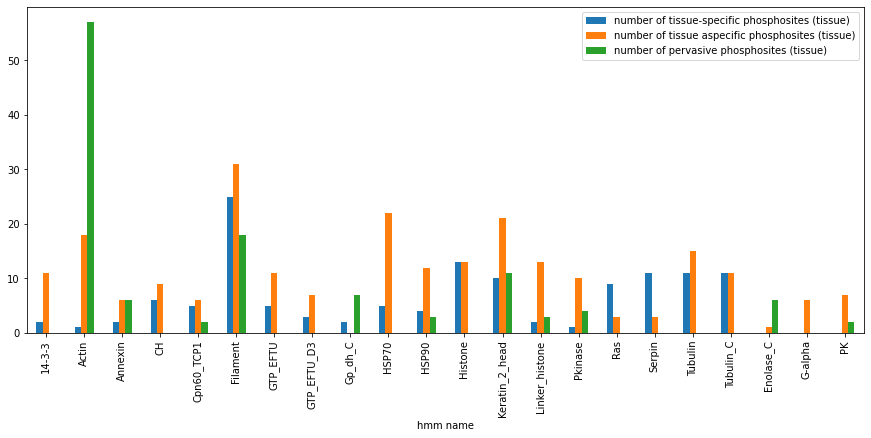

In [229]:
df_hmm_tspec_tissue = tspec_sites_pfam.loc[tspec_sites_pfam["Skin"]==1, :].groupby(["hmm name", "ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"})
df_hmm_taspec_tissue = taspec_sites_pfam.loc[taspec_sites_pfam["Skin"]==1, :].groupby(["hmm name", "ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"})
df_hmm_gen_tissue = gen_sites_pfam.loc[gen_sites_pfam["Skin"]==1, :].groupby(["hmm name", "ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"})

df_hmm_tspec_tissue = df_hmm_tspec_tissue.groupby(["hmm name"], as_index=False)["ACC_ID"].count()
df_hmm_tspec_tissue.rename({"ACC_ID": "number of tissue-specific phosphosites (tissue)"}, inplace=True, axis=1)
df_hmm_tspec_tissue.set_index(["hmm name"], inplace=True)
df_hmm_taspec_tissue = df_hmm_taspec_tissue.groupby(["hmm name"], as_index=False)["ACC_ID"].count()
df_hmm_taspec_tissue.rename({"ACC_ID": "number of tissue aspecific phosphosites (tissue)"}, inplace=True, axis=1)
df_hmm_taspec_tissue.set_index(["hmm name"], inplace=True)
df_hmm_gen_tissue = df_hmm_gen_tissue.groupby(["hmm name"], as_index=False)["ACC_ID"].count()
df_hmm_gen_tissue.rename({"ACC_ID": "number of pervasive phosphosites (tissue)"}, inplace=True, axis=1)
df_hmm_gen_tissue.set_index(["hmm name"], inplace=True)
df_hmm_all_tissue = pd.concat([df_hmm_tspec_tissue, df_hmm_taspec_tissue, df_hmm_gen_tissue], axis=1)
df_hmm_all_tissue[((df_hmm_all_tissue["number of tissue-specific phosphosites (tissue)"]>5)|
                 (df_hmm_all_tissue["number of tissue aspecific phosphosites (tissue)"]>5)|
                 (df_hmm_all_tissue["number of pervasive phosphosites (tissue)"]>5))].plot(kind="bar", figsize=(15,6))


## Small intestine

<AxesSubplot:xlabel='clan'>

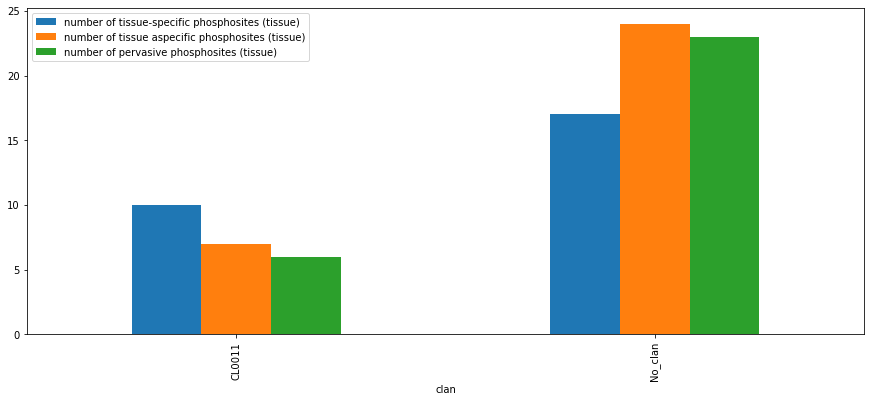

In [230]:
df_clan_tspec_tissue = tspec_sites_pfam.loc[tspec_sites_pfam["Small intestine"]==1, :].groupby(["clan", "ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"})
df_clan_taspec_tissue = taspec_sites_pfam.loc[taspec_sites_pfam["Small intestine"]==1, :].groupby(["clan", "ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"})
df_clan_gen_tissue = gen_sites_pfam.loc[gen_sites_pfam["Small intestine"]==1, :].groupby(["clan", "ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"})

df_clan_tspec_tissue = df_clan_tspec_tissue.groupby(["clan"], as_index=False)["ACC_ID"].count()
df_clan_tspec_tissue.rename({"ACC_ID": "number of tissue-specific phosphosites (tissue)"}, inplace=True, axis=1)
df_clan_tspec_tissue.set_index(["clan"], inplace=True)
df_clan_taspec_tissue = df_clan_taspec_tissue.groupby(["clan"], as_index=False)["ACC_ID"].count()
df_clan_taspec_tissue.rename({"ACC_ID": "number of tissue aspecific phosphosites (tissue)"}, inplace=True, axis=1)
df_clan_taspec_tissue.set_index(["clan"], inplace=True)
df_clan_gen_tissue = df_clan_gen_tissue.groupby(["clan"], as_index=False)["ACC_ID"].count()
df_clan_gen_tissue.rename({"ACC_ID": "number of pervasive phosphosites (tissue)"}, inplace=True, axis=1)
df_clan_gen_tissue.set_index(["clan"], inplace=True)
df_clan_all_tissue = pd.concat([df_clan_tspec_tissue, df_clan_taspec_tissue, df_clan_gen_tissue], axis=1)
df_clan_all_tissue[((df_clan_all_tissue["number of tissue-specific phosphosites (tissue)"]>5)|
                 (df_clan_all_tissue["number of tissue aspecific phosphosites (tissue)"]>5)|
                 (df_clan_all_tissue["number of pervasive phosphosites (tissue)"]>5))].plot(kind="bar", figsize=(15,6))



<AxesSubplot:xlabel='hmm name'>

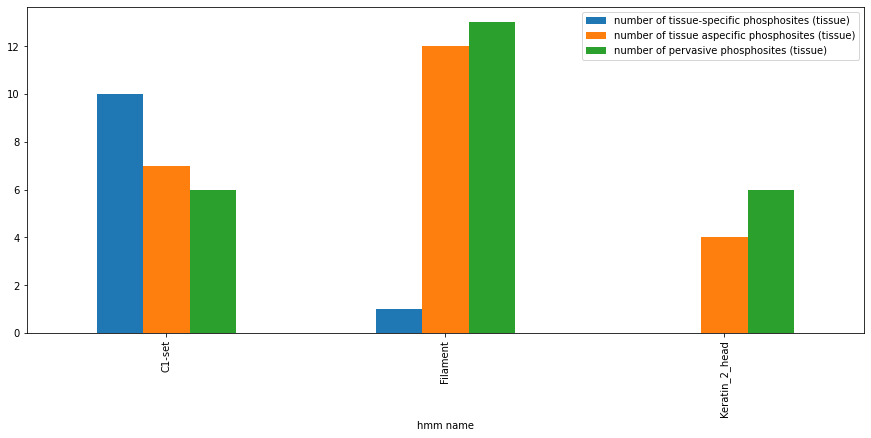

In [231]:
df_hmm_tspec_tissue = tspec_sites_pfam.loc[tspec_sites_pfam["Small intestine"]==1, :].groupby(["hmm name", "ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"})
df_hmm_taspec_tissue = taspec_sites_pfam.loc[taspec_sites_pfam["Small intestine"]==1, :].groupby(["hmm name", "ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"})
df_hmm_gen_tissue = gen_sites_pfam.loc[gen_sites_pfam["Small intestine"]==1, :].groupby(["hmm name", "ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"})

df_hmm_tspec_tissue = df_hmm_tspec_tissue.groupby(["hmm name"], as_index=False)["ACC_ID"].count()
df_hmm_tspec_tissue.rename({"ACC_ID": "number of tissue-specific phosphosites (tissue)"}, inplace=True, axis=1)
df_hmm_tspec_tissue.set_index(["hmm name"], inplace=True)
df_hmm_taspec_tissue = df_hmm_taspec_tissue.groupby(["hmm name"], as_index=False)["ACC_ID"].count()
df_hmm_taspec_tissue.rename({"ACC_ID": "number of tissue aspecific phosphosites (tissue)"}, inplace=True, axis=1)
df_hmm_taspec_tissue.set_index(["hmm name"], inplace=True)
df_hmm_gen_tissue = df_hmm_gen_tissue.groupby(["hmm name"], as_index=False)["ACC_ID"].count()
df_hmm_gen_tissue.rename({"ACC_ID": "number of pervasive phosphosites (tissue)"}, inplace=True, axis=1)
df_hmm_gen_tissue.set_index(["hmm name"], inplace=True)
df_hmm_all_tissue = pd.concat([df_hmm_tspec_tissue, df_hmm_taspec_tissue, df_hmm_gen_tissue], axis=1)
df_hmm_all_tissue[((df_hmm_all_tissue["number of tissue-specific phosphosites (tissue)"]>5)|
                 (df_hmm_all_tissue["number of tissue aspecific phosphosites (tissue)"]>5)|
                 (df_hmm_all_tissue["number of pervasive phosphosites (tissue)"]>5))].plot(kind="bar", figsize=(15,6))


## Synovial tissue

In [232]:
df_clan_tspec_tissue = tspec_sites_pfam.loc[tspec_sites_pfam["Synovial tissue"]==1, :].groupby(["clan", "ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"})
df_clan_taspec_tissue = taspec_sites_pfam.loc[taspec_sites_pfam["Synovial tissue"]==1, :].groupby(["clan", "ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"})
df_clan_gen_tissue = gen_sites_pfam.loc[gen_sites_pfam["Synovial tissue"]==1, :].groupby(["clan", "ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"})

df_clan_tspec_tissue = df_clan_tspec_tissue.groupby(["clan"], as_index=False)["ACC_ID"].count()
df_clan_tspec_tissue.rename({"ACC_ID": "number of tissue-specific phosphosites (tissue)"}, inplace=True, axis=1)
df_clan_tspec_tissue.set_index(["clan"], inplace=True)
df_clan_taspec_tissue = df_clan_taspec_tissue.groupby(["clan"], as_index=False)["ACC_ID"].count()
df_clan_taspec_tissue.rename({"ACC_ID": "number of tissue aspecific phosphosites (tissue)"}, inplace=True, axis=1)
df_clan_taspec_tissue.set_index(["clan"], inplace=True)
df_clan_gen_tissue = df_clan_gen_tissue.groupby(["clan"], as_index=False)["ACC_ID"].count()
df_clan_gen_tissue.rename({"ACC_ID": "number of pervasive phosphosites (tissue)"}, inplace=True, axis=1)
df_clan_gen_tissue.set_index(["clan"], inplace=True)
df_clan_all_tissue = pd.concat([df_clan_tspec_tissue, df_clan_taspec_tissue, df_clan_gen_tissue], axis=1)
df_clan_all_tissue#[((df_clan_all_tissue["number of tissue-specific phosphosites (tissue)"]>5)|
                 #(df_clan_all_tissue["number of tissue aspecific phosphosites (tissue)"]>5)|
                 #(df_clan_all_tissue["number of pervasive phosphosites (tissue)"]>5))].plot(kind="bar", figsize=(15,6))


number of tissue-specific phosphosites (tissue)  \
clan                                                       
CL0422                                               NaN   
CL0029                                               NaN   
CL0128                                               NaN   
No_clan                                              NaN   

         number of tissue aspecific phosphosites (tissue)  \
clan                                                        
CL0422                                                1.0   
CL0029                                                NaN   
CL0128                                                NaN   
No_clan                                               NaN   

         number of pervasive phosphosites (tissue)  
clan                                                
CL0422                                         NaN  
CL0029                                         2.0  
CL0128                                         2.0  
No_clan                                        3.0

In [233]:
df_hmm_tspec_tissue = tspec_sites_pfam.loc[tspec_sites_pfam["Synovial tissue"]==1, :].groupby(["hmm name", "ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"})
df_hmm_taspec_tissue = taspec_sites_pfam.loc[taspec_sites_pfam["Synovial tissue"]==1, :].groupby(["hmm name", "ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"})
df_hmm_gen_tissue = gen_sites_pfam.loc[gen_sites_pfam["Synovial tissue"]==1, :].groupby(["hmm name", "ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"})

df_hmm_tspec_tissue = df_hmm_tspec_tissue.groupby(["hmm name"], as_index=False)["ACC_ID"].count()
df_hmm_tspec_tissue.rename({"ACC_ID": "number of tissue-specific phosphosites (tissue)"}, inplace=True, axis=1)
df_hmm_tspec_tissue.set_index(["hmm name"], inplace=True)
df_hmm_taspec_tissue = df_hmm_taspec_tissue.groupby(["hmm name"], as_index=False)["ACC_ID"].count()
df_hmm_taspec_tissue.rename({"ACC_ID": "number of tissue aspecific phosphosites (tissue)"}, inplace=True, axis=1)
df_hmm_taspec_tissue.set_index(["hmm name"], inplace=True)
df_hmm_gen_tissue = df_hmm_gen_tissue.groupby(["hmm name"], as_index=False)["ACC_ID"].count()
df_hmm_gen_tissue.rename({"ACC_ID": "number of pervasive phosphosites (tissue)"}, inplace=True, axis=1)
df_hmm_gen_tissue.set_index(["hmm name"], inplace=True)
df_hmm_all_tissue = pd.concat([df_hmm_tspec_tissue, df_hmm_taspec_tissue, df_hmm_gen_tissue], axis=1)
df_hmm_all_tissue#[((df_hmm_all_tissue["number of tissue-specific phosphosites (tissue)"]>5)|
                 #(df_hmm_all_tissue["number of tissue aspecific phosphosites (tissue)"]>5)|
                 #(df_hmm_all_tissue["number of pervasive phosphosites (tissue)"]>5))].plot(kind="bar", figsize=(15,6))


number of tissue-specific phosphosites (tissue)  \
hmm name                                                        
Fibrinogen_C                                              NaN   
ITI_HC_C                                                  NaN   
Serpin                                                    NaN   
VIT                                                       NaN   
VWA                                                       NaN   

              number of tissue aspecific phosphosites (tissue)  \
hmm name                                                         
Fibrinogen_C                                               1.0   
ITI_HC_C                                                   NaN   
Serpin                                                     NaN   
VIT                                                        NaN   
VWA                                                        NaN   

              number of pervasive phosphosites (tissue)  
hmm name                                                 
Fibrinogen_C                                        NaN  
ITI_HC_C                                            2.0  
Serpin                                              1.0  
VIT                                                 2.0  
VWA                                                 2.0

## T-cells

In [234]:
df_clan_tspec_tissue = tspec_sites_pfam.loc[tspec_sites_pfam["T-cells"]==1, :].groupby(["clan", "ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"})
df_clan_taspec_tissue = taspec_sites_pfam.loc[taspec_sites_pfam["T-cells"]==1, :].groupby(["clan", "ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"})
df_clan_gen_tissue = gen_sites_pfam.loc[gen_sites_pfam["T-cells"]==1, :].groupby(["clan", "ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"})

df_clan_tspec_tissue = df_clan_tspec_tissue.groupby(["clan"], as_index=False)["ACC_ID"].count()
df_clan_tspec_tissue.rename({"ACC_ID": "number of tissue-specific phosphosites (tissue)"}, inplace=True, axis=1)
df_clan_tspec_tissue.set_index(["clan"], inplace=True)
df_clan_taspec_tissue = df_clan_taspec_tissue.groupby(["clan"], as_index=False)["ACC_ID"].count()
df_clan_taspec_tissue.rename({"ACC_ID": "number of tissue aspecific phosphosites (tissue)"}, inplace=True, axis=1)
df_clan_taspec_tissue.set_index(["clan"], inplace=True)
df_clan_gen_tissue = df_clan_gen_tissue.groupby(["clan"], as_index=False)["ACC_ID"].count()
df_clan_gen_tissue.rename({"ACC_ID": "number of pervasive phosphosites (tissue)"}, inplace=True, axis=1)
df_clan_gen_tissue.set_index(["clan"], inplace=True)
df_clan_all_tissue = pd.concat([df_clan_tspec_tissue, df_clan_taspec_tissue, df_clan_gen_tissue], axis=1)
df_clan_all_tissue#[((df_clan_all_tissue["number of tissue-specific phosphosites (tissue)"]>5)|
                 #(df_clan_all_tissue["number of tissue aspecific phosphosites (tissue)"]>5)|
                 #(df_clan_all_tissue["number of pervasive phosphosites (tissue)"]>5))].plot(kind="bar", figsize=(15,6))


number of tissue-specific phosphosites (tissue)  \
clan                                                      
CL0035                                              NaN   
CL0705                                              NaN   

        number of tissue aspecific phosphosites (tissue)  \
clan                                                       
CL0035                                               1.0   
CL0705                                               NaN   

        number of pervasive phosphosites (tissue)  
clan                                               
CL0035                                        NaN  
CL0705                                        2.0

In [235]:
df_hmm_tspec_tissue = tspec_sites_pfam.loc[tspec_sites_pfam["T-cells"]==1, :].groupby(["hmm name", "ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"})
df_hmm_taspec_tissue = taspec_sites_pfam.loc[taspec_sites_pfam["T-cells"]==1, :].groupby(["hmm name", "ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"})
df_hmm_gen_tissue = gen_sites_pfam.loc[gen_sites_pfam["T-cells"]==1, :].groupby(["hmm name", "ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"})

df_hmm_tspec_tissue = df_hmm_tspec_tissue.groupby(["hmm name"], as_index=False)["ACC_ID"].count()
df_hmm_tspec_tissue.rename({"ACC_ID": "number of tissue-specific phosphosites (tissue)"}, inplace=True, axis=1)
df_hmm_tspec_tissue.set_index(["hmm name"], inplace=True)
df_hmm_taspec_tissue = df_hmm_taspec_tissue.groupby(["hmm name"], as_index=False)["ACC_ID"].count()
df_hmm_taspec_tissue.rename({"ACC_ID": "number of tissue aspecific phosphosites (tissue)"}, inplace=True, axis=1)
df_hmm_taspec_tissue.set_index(["hmm name"], inplace=True)
df_hmm_gen_tissue = df_hmm_gen_tissue.groupby(["hmm name"], as_index=False)["ACC_ID"].count()
df_hmm_gen_tissue.rename({"ACC_ID": "number of pervasive phosphosites (tissue)"}, inplace=True, axis=1)
df_hmm_gen_tissue.set_index(["hmm name"], inplace=True)
df_hmm_all_tissue = pd.concat([df_hmm_tspec_tissue, df_hmm_taspec_tissue, df_hmm_gen_tissue], axis=1)
df_hmm_all_tissue#[((df_hmm_all_tissue["number of tissue-specific phosphosites (tissue)"]>5)|
                 #(df_hmm_all_tissue["number of tissue aspecific phosphosites (tissue)"]>5)|
                 #(df_hmm_all_tissue["number of pervasive phosphosites (tissue)"]>5))].plot(kind="bar", figsize=(15,6))


number of tissue-specific phosphosites (tissue)  \
hmm name                                                         
Peptidase_M14                                              NaN   
Vinculin                                                   NaN   

               number of tissue aspecific phosphosites (tissue)  \
hmm name                                                          
Peptidase_M14                                               1.0   
Vinculin                                                    NaN   

               number of pervasive phosphosites (tissue)  
hmm name                                                  
Peptidase_M14                                        NaN  
Vinculin                                             2.0

## Testis

<AxesSubplot:xlabel='clan'>

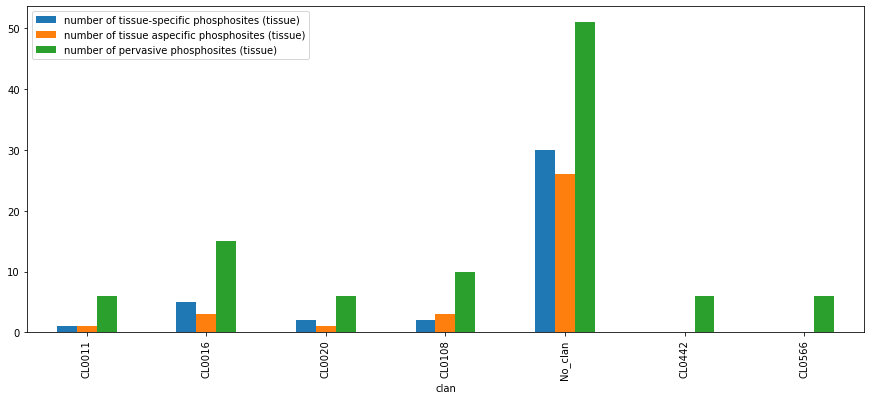

In [236]:
df_clan_tspec_tissue = tspec_sites_pfam.loc[tspec_sites_pfam["Testis"]==1, :].groupby(["clan", "ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"})
df_clan_taspec_tissue = taspec_sites_pfam.loc[taspec_sites_pfam["Testis"]==1, :].groupby(["clan", "ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"})
df_clan_gen_tissue = gen_sites_pfam.loc[gen_sites_pfam["Testis"]==1, :].groupby(["clan", "ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"})

df_clan_tspec_tissue = df_clan_tspec_tissue.groupby(["clan"], as_index=False)["ACC_ID"].count()
df_clan_tspec_tissue.rename({"ACC_ID": "number of tissue-specific phosphosites (tissue)"}, inplace=True, axis=1)
df_clan_tspec_tissue.set_index(["clan"], inplace=True)
df_clan_taspec_tissue = df_clan_taspec_tissue.groupby(["clan"], as_index=False)["ACC_ID"].count()
df_clan_taspec_tissue.rename({"ACC_ID": "number of tissue aspecific phosphosites (tissue)"}, inplace=True, axis=1)
df_clan_taspec_tissue.set_index(["clan"], inplace=True)
df_clan_gen_tissue = df_clan_gen_tissue.groupby(["clan"], as_index=False)["ACC_ID"].count()
df_clan_gen_tissue.rename({"ACC_ID": "number of pervasive phosphosites (tissue)"}, inplace=True, axis=1)
df_clan_gen_tissue.set_index(["clan"], inplace=True)
df_clan_all_tissue = pd.concat([df_clan_tspec_tissue, df_clan_taspec_tissue, df_clan_gen_tissue], axis=1)
df_clan_all_tissue[((df_clan_all_tissue["number of tissue-specific phosphosites (tissue)"]>5)|
                 (df_clan_all_tissue["number of tissue aspecific phosphosites (tissue)"]>5)|
                 (df_clan_all_tissue["number of pervasive phosphosites (tissue)"]>5))].plot(kind="bar", figsize=(15,6))


<AxesSubplot:xlabel='hmm name'>

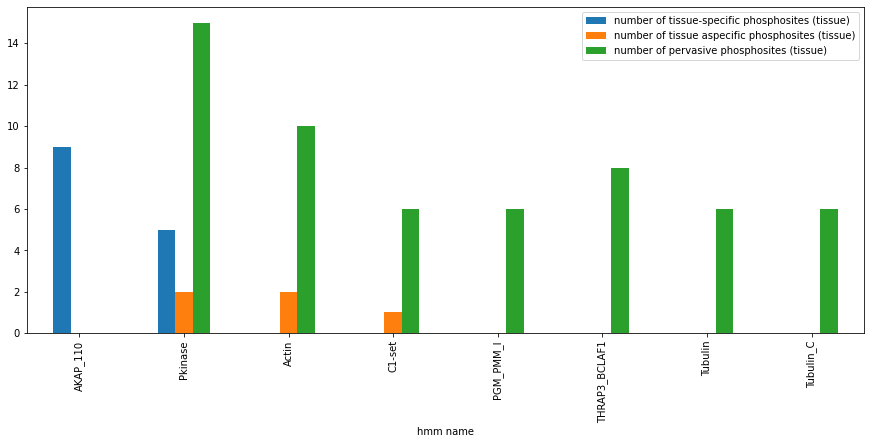

In [237]:
df_hmm_tspec_tissue = tspec_sites_pfam.loc[tspec_sites_pfam["Testis"]==1, :].groupby(["hmm name", "ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"})
df_hmm_taspec_tissue = taspec_sites_pfam.loc[taspec_sites_pfam["Testis"]==1, :].groupby(["hmm name", "ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"})
df_hmm_gen_tissue = gen_sites_pfam.loc[gen_sites_pfam["Testis"]==1, :].groupby(["hmm name", "ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"})

df_hmm_tspec_tissue = df_hmm_tspec_tissue.groupby(["hmm name"], as_index=False)["ACC_ID"].count()
df_hmm_tspec_tissue.rename({"ACC_ID": "number of tissue-specific phosphosites (tissue)"}, inplace=True, axis=1)
df_hmm_tspec_tissue.set_index(["hmm name"], inplace=True)
df_hmm_taspec_tissue = df_hmm_taspec_tissue.groupby(["hmm name"], as_index=False)["ACC_ID"].count()
df_hmm_taspec_tissue.rename({"ACC_ID": "number of tissue aspecific phosphosites (tissue)"}, inplace=True, axis=1)
df_hmm_taspec_tissue.set_index(["hmm name"], inplace=True)
df_hmm_gen_tissue = df_hmm_gen_tissue.groupby(["hmm name"], as_index=False)["ACC_ID"].count()
df_hmm_gen_tissue.rename({"ACC_ID": "number of pervasive phosphosites (tissue)"}, inplace=True, axis=1)
df_hmm_gen_tissue.set_index(["hmm name"], inplace=True)
df_hmm_all_tissue = pd.concat([df_hmm_tspec_tissue, df_hmm_taspec_tissue, df_hmm_gen_tissue], axis=1)
df_hmm_all_tissue[((df_hmm_all_tissue["number of tissue-specific phosphosites (tissue)"]>5)|
                 (df_hmm_all_tissue["number of tissue aspecific phosphosites (tissue)"]>5)|
                 (df_hmm_all_tissue["number of pervasive phosphosites (tissue)"]>5))].plot(kind="bar", figsize=(15,6))


## Tooth

In [238]:
df_clan_tspec_tissue = tspec_sites_pfam.loc[tspec_sites_pfam["Tooth"]==1, :].groupby(["clan", "ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"})
df_clan_taspec_tissue = taspec_sites_pfam.loc[taspec_sites_pfam["Tooth"]==1, :].groupby(["clan", "ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"})
df_clan_gen_tissue = gen_sites_pfam.loc[gen_sites_pfam["Tooth"]==1, :].groupby(["clan", "ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"})

df_clan_tspec_tissue = df_clan_tspec_tissue.groupby(["clan"], as_index=False)["ACC_ID"].count()
df_clan_tspec_tissue.rename({"ACC_ID": "number of tissue-specific phosphosites (tissue)"}, inplace=True, axis=1)
df_clan_tspec_tissue.set_index(["clan"], inplace=True)
df_clan_taspec_tissue = df_clan_taspec_tissue.groupby(["clan"], as_index=False)["ACC_ID"].count()
df_clan_taspec_tissue.rename({"ACC_ID": "number of tissue aspecific phosphosites (tissue)"}, inplace=True, axis=1)
df_clan_taspec_tissue.set_index(["clan"], inplace=True)
df_clan_gen_tissue = df_clan_gen_tissue.groupby(["clan"], as_index=False)["ACC_ID"].count()
df_clan_gen_tissue.rename({"ACC_ID": "number of pervasive phosphosites (tissue)"}, inplace=True, axis=1)
df_clan_gen_tissue.set_index(["clan"], inplace=True)
df_clan_all_tissue = pd.concat([df_clan_tspec_tissue, df_clan_taspec_tissue, df_clan_gen_tissue], axis=1)
df_clan_all_tissue

Empty DataFrame
Columns: [number of tissue-specific phosphosites (tissue), number of tissue aspecific phosphosites (tissue), number of pervasive phosphosites (tissue)]
Index: []

In [239]:
df_hmm_tspec_tissue = tspec_sites_pfam.loc[tspec_sites_pfam["Tooth"]==1, :].groupby(["hmm name", "ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"})
df_hmm_taspec_tissue = taspec_sites_pfam.loc[taspec_sites_pfam["Tooth"]==1, :].groupby(["hmm name", "ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"})
df_hmm_gen_tissue = gen_sites_pfam.loc[gen_sites_pfam["Tooth"]==1, :].groupby(["hmm name", "ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"})

df_hmm_tspec_tissue = df_hmm_tspec_tissue.groupby(["hmm name"], as_index=False)["ACC_ID"].count()
df_hmm_tspec_tissue.rename({"ACC_ID": "number of tissue-specific phosphosites (tissue)"}, inplace=True, axis=1)
df_hmm_tspec_tissue.set_index(["hmm name"], inplace=True)
df_hmm_taspec_tissue = df_hmm_taspec_tissue.groupby(["hmm name"], as_index=False)["ACC_ID"].count()
df_hmm_taspec_tissue.rename({"ACC_ID": "number of tissue aspecific phosphosites (tissue)"}, inplace=True, axis=1)
df_hmm_taspec_tissue.set_index(["hmm name"], inplace=True)
df_hmm_gen_tissue = df_hmm_gen_tissue.groupby(["hmm name"], as_index=False)["ACC_ID"].count()
df_hmm_gen_tissue.rename({"ACC_ID": "number of pervasive phosphosites (tissue)"}, inplace=True, axis=1)
df_hmm_gen_tissue.set_index(["hmm name"], inplace=True)
df_hmm_all_tissue = pd.concat([df_hmm_tspec_tissue, df_hmm_taspec_tissue, df_hmm_gen_tissue], axis=1)
df_hmm_all_tissue

Empty DataFrame
Columns: [number of tissue-specific phosphosites (tissue), number of tissue aspecific phosphosites (tissue), number of pervasive phosphosites (tissue)]
Index: []

## Umbilical cord

<AxesSubplot:xlabel='clan'>

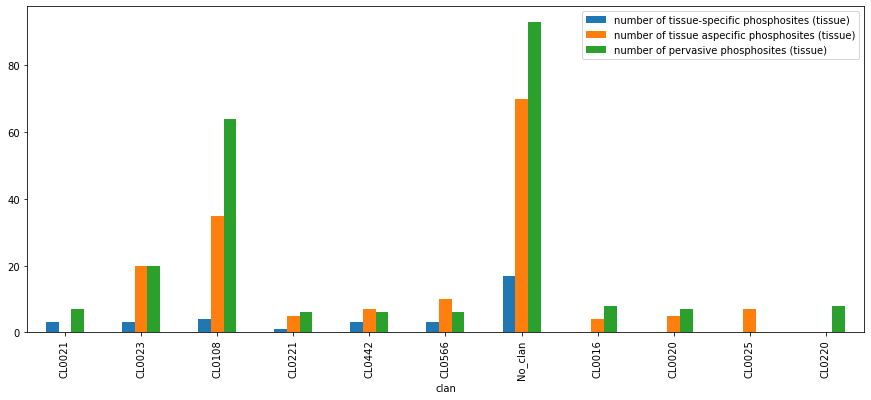

In [240]:
df_clan_tspec_tissue = tspec_sites_pfam.loc[tspec_sites_pfam["Umbilical cord"]==1, :].groupby(["clan", "ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"})
df_clan_taspec_tissue = taspec_sites_pfam.loc[taspec_sites_pfam["Umbilical cord"]==1, :].groupby(["clan", "ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"})
df_clan_gen_tissue = gen_sites_pfam.loc[gen_sites_pfam["Umbilical cord"]==1, :].groupby(["clan", "ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"})

df_clan_tspec_tissue = df_clan_tspec_tissue.groupby(["clan"], as_index=False)["ACC_ID"].count()
df_clan_tspec_tissue.rename({"ACC_ID": "number of tissue-specific phosphosites (tissue)"}, inplace=True, axis=1)
df_clan_tspec_tissue.set_index(["clan"], inplace=True)
df_clan_taspec_tissue = df_clan_taspec_tissue.groupby(["clan"], as_index=False)["ACC_ID"].count()
df_clan_taspec_tissue.rename({"ACC_ID": "number of tissue aspecific phosphosites (tissue)"}, inplace=True, axis=1)
df_clan_taspec_tissue.set_index(["clan"], inplace=True)
df_clan_gen_tissue = df_clan_gen_tissue.groupby(["clan"], as_index=False)["ACC_ID"].count()
df_clan_gen_tissue.rename({"ACC_ID": "number of pervasive phosphosites (tissue)"}, inplace=True, axis=1)
df_clan_gen_tissue.set_index(["clan"], inplace=True)
df_clan_all_tissue = pd.concat([df_clan_tspec_tissue, df_clan_taspec_tissue, df_clan_gen_tissue], axis=1)
df_clan_all_tissue[((df_clan_all_tissue["number of tissue-specific phosphosites (tissue)"]>5)|
                 (df_clan_all_tissue["number of tissue aspecific phosphosites (tissue)"]>5)|
                 (df_clan_all_tissue["number of pervasive phosphosites (tissue)"]>5))].plot(kind="bar", figsize=(15,6))



<AxesSubplot:xlabel='hmm name'>

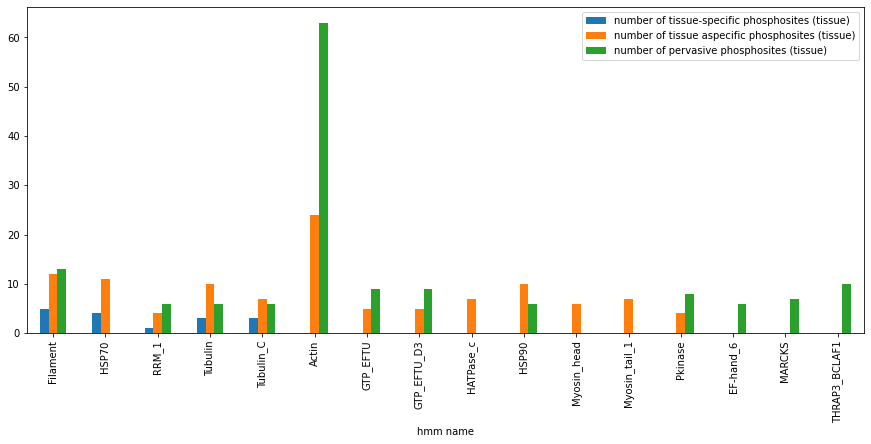

In [241]:
df_hmm_tspec_tissue = tspec_sites_pfam.loc[tspec_sites_pfam["Umbilical cord"]==1, :].groupby(["hmm name", "ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"})
df_hmm_taspec_tissue = taspec_sites_pfam.loc[taspec_sites_pfam["Umbilical cord"]==1, :].groupby(["hmm name", "ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"})
df_hmm_gen_tissue = gen_sites_pfam.loc[gen_sites_pfam["Umbilical cord"]==1, :].groupby(["hmm name", "ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"})

df_hmm_tspec_tissue = df_hmm_tspec_tissue.groupby(["hmm name"], as_index=False)["ACC_ID"].count()
df_hmm_tspec_tissue.rename({"ACC_ID": "number of tissue-specific phosphosites (tissue)"}, inplace=True, axis=1)
df_hmm_tspec_tissue.set_index(["hmm name"], inplace=True)
df_hmm_taspec_tissue = df_hmm_taspec_tissue.groupby(["hmm name"], as_index=False)["ACC_ID"].count()
df_hmm_taspec_tissue.rename({"ACC_ID": "number of tissue aspecific phosphosites (tissue)"}, inplace=True, axis=1)
df_hmm_taspec_tissue.set_index(["hmm name"], inplace=True)
df_hmm_gen_tissue = df_hmm_gen_tissue.groupby(["hmm name"], as_index=False)["ACC_ID"].count()
df_hmm_gen_tissue.rename({"ACC_ID": "number of pervasive phosphosites (tissue)"}, inplace=True, axis=1)
df_hmm_gen_tissue.set_index(["hmm name"], inplace=True)
df_hmm_all_tissue = pd.concat([df_hmm_tspec_tissue, df_hmm_taspec_tissue, df_hmm_gen_tissue], axis=1)
df_hmm_all_tissue[((df_hmm_all_tissue["number of tissue-specific phosphosites (tissue)"]>5)|
                 (df_hmm_all_tissue["number of tissue aspecific phosphosites (tissue)"]>5)|
                 (df_hmm_all_tissue["number of pervasive phosphosites (tissue)"]>5))].plot(kind="bar", figsize=(15,6))


## Ureter

In [242]:
df_clan_tspec_tissue = tspec_sites_pfam.loc[tspec_sites_pfam["Ureter"]==1, :].groupby(["clan", "ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"})
df_clan_taspec_tissue = taspec_sites_pfam.loc[taspec_sites_pfam["Ureter"]==1, :].groupby(["clan", "ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"})
df_clan_gen_tissue = gen_sites_pfam.loc[gen_sites_pfam["Ureter"]==1, :].groupby(["clan", "ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"})

df_clan_tspec_tissue = df_clan_tspec_tissue.groupby(["clan"], as_index=False)["ACC_ID"].count()
df_clan_tspec_tissue.rename({"ACC_ID": "number of tissue-specific phosphosites (tissue)"}, inplace=True, axis=1)
df_clan_tspec_tissue.set_index(["clan"], inplace=True)
df_clan_taspec_tissue = df_clan_taspec_tissue.groupby(["clan"], as_index=False)["ACC_ID"].count()
df_clan_taspec_tissue.rename({"ACC_ID": "number of tissue aspecific phosphosites (tissue)"}, inplace=True, axis=1)
df_clan_taspec_tissue.set_index(["clan"], inplace=True)
df_clan_gen_tissue = df_clan_gen_tissue.groupby(["clan"], as_index=False)["ACC_ID"].count()
df_clan_gen_tissue.rename({"ACC_ID": "number of pervasive phosphosites (tissue)"}, inplace=True, axis=1)
df_clan_gen_tissue.set_index(["clan"], inplace=True)
df_clan_all_tissue = pd.concat([df_clan_tspec_tissue, df_clan_taspec_tissue, df_clan_gen_tissue], axis=1)
df_clan_all_tissue#[((df_clan_all_tissue["number of tissue-specific phosphosites (tissue)"]>5)|
                 #(df_clan_all_tissue["number of tissue aspecific phosphosites (tissue)"]>5)|
                 #(df_clan_all_tissue["number of pervasive phosphosites (tissue)"]>5))].plot(kind="bar", figsize=(15,6))


number of tissue-specific phosphosites (tissue)  \
clan                                                       
CL0092                                               1.0   
CL0190                                               1.0   
No_clan                                              1.0   
CL0179                                               NaN   
CL0506                                               NaN   
CL0023                                               NaN   
CL0090                                               NaN   
CL0159                                               NaN   

         number of tissue aspecific phosphosites (tissue)  \
clan                                                        
CL0092                                                NaN   
CL0190                                                NaN   
No_clan                                               2.0   
CL0179                                                1.0   
CL0506                                                1.0   
CL0023                                                NaN   
CL0090                                                NaN   
CL0159                                                NaN   

         number of pervasive phosphosites (tissue)  
clan                                                
CL0092                                         NaN  
CL0190                                         2.0  
No_clan                                        3.0  
CL0179                                         NaN  
CL0506                                         NaN  
CL0023                                         1.0  
CL0090                                         1.0  
CL0159                                         1.0

In [243]:
df_hmm_tspec_tissue = tspec_sites_pfam.loc[tspec_sites_pfam["Ureter"]==1, :].groupby(["hmm name", "ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"})
df_hmm_taspec_tissue = taspec_sites_pfam.loc[taspec_sites_pfam["Ureter"]==1, :].groupby(["hmm name", "ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"})
df_hmm_gen_tissue = gen_sites_pfam.loc[gen_sites_pfam["Ureter"]==1, :].groupby(["hmm name", "ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"})

df_hmm_tspec_tissue = df_hmm_tspec_tissue.groupby(["hmm name"], as_index=False)["ACC_ID"].count()
df_hmm_tspec_tissue.rename({"ACC_ID": "number of tissue-specific phosphosites (tissue)"}, inplace=True, axis=1)
df_hmm_tspec_tissue.set_index(["hmm name"], inplace=True)
df_hmm_taspec_tissue = df_hmm_taspec_tissue.groupby(["hmm name"], as_index=False)["ACC_ID"].count()
df_hmm_taspec_tissue.rename({"ACC_ID": "number of tissue aspecific phosphosites (tissue)"}, inplace=True, axis=1)
df_hmm_taspec_tissue.set_index(["hmm name"], inplace=True)
df_hmm_gen_tissue = df_hmm_gen_tissue.groupby(["hmm name"], as_index=False)["ACC_ID"].count()
df_hmm_gen_tissue.rename({"ACC_ID": "number of pervasive phosphosites (tissue)"}, inplace=True, axis=1)
df_hmm_gen_tissue.set_index(["hmm name"], inplace=True)
df_hmm_all_tissue = pd.concat([df_hmm_tspec_tissue, df_hmm_taspec_tissue, df_hmm_gen_tissue], axis=1)
df_hmm_all_tissue#[((df_hmm_all_tissue["number of tissue-specific phosphosites (tissue)"]>5)|
                 #(df_hmm_all_tissue["number of tissue aspecific phosphosites (tissue)"]>5)|
                 #(df_hmm_all_tissue["number of pervasive phosphosites (tissue)"]>5))].plot(kind="bar", figsize=(15,6))

number of tissue-specific phosphosites (tissue)  \
hmm name                                                         
Gelsolin                                                   1.0   
HSP20                                                      1.0   
VHP                                                        1.0   
ATP-grasp_2                                                NaN   
Filament                                                   NaN   
Filament_head                                              NaN   
GAGE                                                       NaN   
Ligase_CoA                                                 NaN   
Globin                                                     NaN   
LTD                                                        NaN   
PTRF_SDPR                                                  NaN   
Septin                                                     NaN   

               number of tissue aspecific phosphosites (tissue)  \
hmm name                                                          
Gelsolin                                                    NaN   
HSP20                                                       NaN   
VHP                                                         NaN   
ATP-grasp_2                                                 1.0   
Filament                                                    1.0   
Filament_head                                               1.0   
GAGE                                                        1.0   
Ligase_CoA                                                  1.0   
Globin                                                      NaN   
LTD                                                         NaN   
PTRF_SDPR                                                   NaN   
Septin                                                      NaN   

               number of pervasive phosphosites (tissue)  
hmm name                                                  
Gelsolin                                             NaN  
HSP20                                                2.0  
VHP                                                  NaN  
ATP-grasp_2                                          NaN  
Filament                                             2.0  
Filament_head                                        1.0  
GAGE                                                 NaN  
Ligase_CoA                                           NaN  
Globin                                               1.0  
LTD                                                  1.0  
PTRF_SDPR                                            1.0  
Septin                                               1.0

## Urinary bladder

<AxesSubplot:xlabel='clan'>

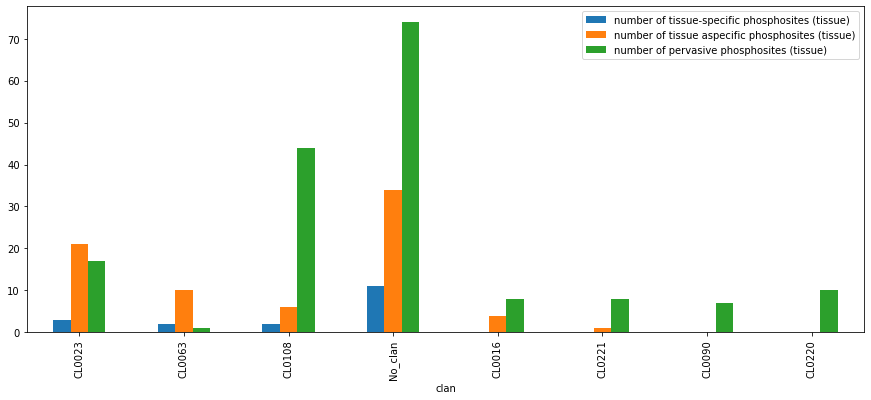

In [244]:
df_clan_tspec_tissue = tspec_sites_pfam.loc[tspec_sites_pfam["Urinary bladder"]==1, :].groupby(["clan", "ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"})
df_clan_taspec_tissue = taspec_sites_pfam.loc[taspec_sites_pfam["Urinary bladder"]==1, :].groupby(["clan", "ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"})
df_clan_gen_tissue = gen_sites_pfam.loc[gen_sites_pfam["Urinary bladder"]==1, :].groupby(["clan", "ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"})

df_clan_tspec_tissue = df_clan_tspec_tissue.groupby(["clan"], as_index=False)["ACC_ID"].count()
df_clan_tspec_tissue.rename({"ACC_ID": "number of tissue-specific phosphosites (tissue)"}, inplace=True, axis=1)
df_clan_tspec_tissue.set_index(["clan"], inplace=True)
df_clan_taspec_tissue = df_clan_taspec_tissue.groupby(["clan"], as_index=False)["ACC_ID"].count()
df_clan_taspec_tissue.rename({"ACC_ID": "number of tissue aspecific phosphosites (tissue)"}, inplace=True, axis=1)
df_clan_taspec_tissue.set_index(["clan"], inplace=True)
df_clan_gen_tissue = df_clan_gen_tissue.groupby(["clan"], as_index=False)["ACC_ID"].count()
df_clan_gen_tissue.rename({"ACC_ID": "number of pervasive phosphosites (tissue)"}, inplace=True, axis=1)
df_clan_gen_tissue.set_index(["clan"], inplace=True)
df_clan_all_tissue = pd.concat([df_clan_tspec_tissue, df_clan_taspec_tissue, df_clan_gen_tissue], axis=1)
df_clan_all_tissue[((df_clan_all_tissue["number of tissue-specific phosphosites (tissue)"]>5)|
                 (df_clan_all_tissue["number of tissue aspecific phosphosites (tissue)"]>5)|
                 (df_clan_all_tissue["number of pervasive phosphosites (tissue)"]>5))].plot(kind="bar", figsize=(15,6))


<AxesSubplot:xlabel='hmm name'>

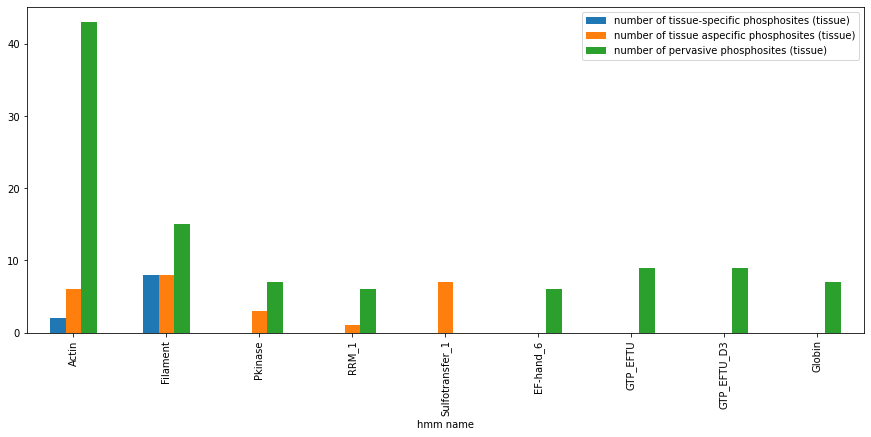

In [245]:
df_hmm_tspec_tissue = tspec_sites_pfam.loc[tspec_sites_pfam["Urinary bladder"]==1, :].groupby(["hmm name", "ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"})
df_hmm_taspec_tissue = taspec_sites_pfam.loc[taspec_sites_pfam["Urinary bladder"]==1, :].groupby(["hmm name", "ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"})
df_hmm_gen_tissue = gen_sites_pfam.loc[gen_sites_pfam["Urinary bladder"]==1, :].groupby(["hmm name", "ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"})

df_hmm_tspec_tissue = df_hmm_tspec_tissue.groupby(["hmm name"], as_index=False)["ACC_ID"].count()
df_hmm_tspec_tissue.rename({"ACC_ID": "number of tissue-specific phosphosites (tissue)"}, inplace=True, axis=1)
df_hmm_tspec_tissue.set_index(["hmm name"], inplace=True)
df_hmm_taspec_tissue = df_hmm_taspec_tissue.groupby(["hmm name"], as_index=False)["ACC_ID"].count()
df_hmm_taspec_tissue.rename({"ACC_ID": "number of tissue aspecific phosphosites (tissue)"}, inplace=True, axis=1)
df_hmm_taspec_tissue.set_index(["hmm name"], inplace=True)
df_hmm_gen_tissue = df_hmm_gen_tissue.groupby(["hmm name"], as_index=False)["ACC_ID"].count()
df_hmm_gen_tissue.rename({"ACC_ID": "number of pervasive phosphosites (tissue)"}, inplace=True, axis=1)
df_hmm_gen_tissue.set_index(["hmm name"], inplace=True)
df_hmm_all_tissue = pd.concat([df_hmm_tspec_tissue, df_hmm_taspec_tissue, df_hmm_gen_tissue], axis=1)
df_hmm_all_tissue[((df_hmm_all_tissue["number of tissue-specific phosphosites (tissue)"]>5)|
                 (df_hmm_all_tissue["number of tissue aspecific phosphosites (tissue)"]>5)|
                 (df_hmm_all_tissue["number of pervasive phosphosites (tissue)"]>5))].plot(kind="bar", figsize=(15,6))


## Urine

<AxesSubplot:xlabel='clan'>

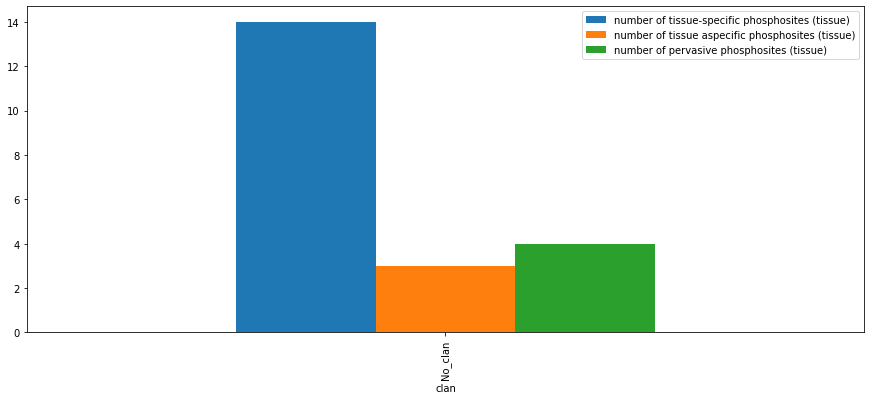

In [246]:
df_clan_tspec_tissue = tspec_sites_pfam.loc[tspec_sites_pfam["Urine"]==1, :].groupby(["clan", "ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"})
df_clan_taspec_tissue = taspec_sites_pfam.loc[taspec_sites_pfam["Urine"]==1, :].groupby(["clan", "ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"})
df_clan_gen_tissue = gen_sites_pfam.loc[gen_sites_pfam["Urine"]==1, :].groupby(["clan", "ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"})

df_clan_tspec_tissue = df_clan_tspec_tissue.groupby(["clan"], as_index=False)["ACC_ID"].count()
df_clan_tspec_tissue.rename({"ACC_ID": "number of tissue-specific phosphosites (tissue)"}, inplace=True, axis=1)
df_clan_tspec_tissue.set_index(["clan"], inplace=True)
df_clan_taspec_tissue = df_clan_taspec_tissue.groupby(["clan"], as_index=False)["ACC_ID"].count()
df_clan_taspec_tissue.rename({"ACC_ID": "number of tissue aspecific phosphosites (tissue)"}, inplace=True, axis=1)
df_clan_taspec_tissue.set_index(["clan"], inplace=True)
df_clan_gen_tissue = df_clan_gen_tissue.groupby(["clan"], as_index=False)["ACC_ID"].count()
df_clan_gen_tissue.rename({"ACC_ID": "number of pervasive phosphosites (tissue)"}, inplace=True, axis=1)
df_clan_gen_tissue.set_index(["clan"], inplace=True)
df_clan_all_tissue = pd.concat([df_clan_tspec_tissue, df_clan_taspec_tissue, df_clan_gen_tissue], axis=1)
df_clan_all_tissue[((df_clan_all_tissue["number of tissue-specific phosphosites (tissue)"]>5)|
                 (df_clan_all_tissue["number of tissue aspecific phosphosites (tissue)"]>5)|
                 (df_clan_all_tissue["number of pervasive phosphosites (tissue)"]>5))].plot(kind="bar", figsize=(15,6))


<AxesSubplot:xlabel='hmm name'>

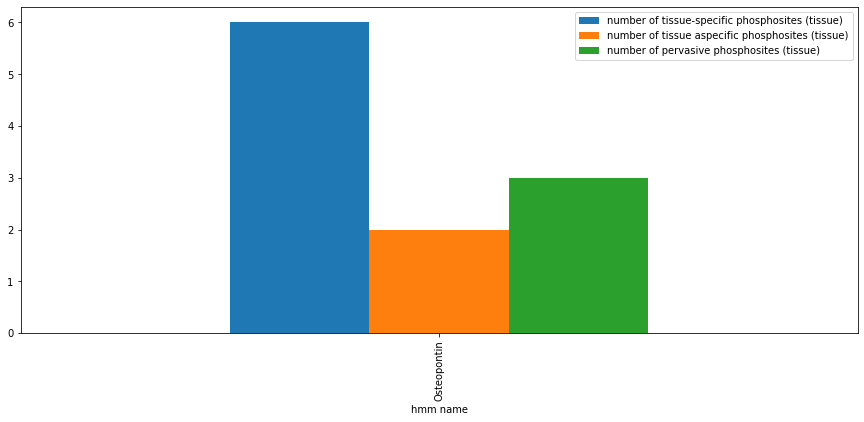

In [247]:
df_hmm_tspec_tissue = tspec_sites_pfam.loc[tspec_sites_pfam["Urine"]==1, :].groupby(["hmm name", "ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"})
df_hmm_taspec_tissue = taspec_sites_pfam.loc[taspec_sites_pfam["Urine"]==1, :].groupby(["hmm name", "ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"})
df_hmm_gen_tissue = gen_sites_pfam.loc[gen_sites_pfam["Urine"]==1, :].groupby(["hmm name", "ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"})

df_hmm_tspec_tissue = df_hmm_tspec_tissue.groupby(["hmm name"], as_index=False)["ACC_ID"].count()
df_hmm_tspec_tissue.rename({"ACC_ID": "number of tissue-specific phosphosites (tissue)"}, inplace=True, axis=1)
df_hmm_tspec_tissue.set_index(["hmm name"], inplace=True)
df_hmm_taspec_tissue = df_hmm_taspec_tissue.groupby(["hmm name"], as_index=False)["ACC_ID"].count()
df_hmm_taspec_tissue.rename({"ACC_ID": "number of tissue aspecific phosphosites (tissue)"}, inplace=True, axis=1)
df_hmm_taspec_tissue.set_index(["hmm name"], inplace=True)
df_hmm_gen_tissue = df_hmm_gen_tissue.groupby(["hmm name"], as_index=False)["ACC_ID"].count()
df_hmm_gen_tissue.rename({"ACC_ID": "number of pervasive phosphosites (tissue)"}, inplace=True, axis=1)
df_hmm_gen_tissue.set_index(["hmm name"], inplace=True)
df_hmm_all_tissue = pd.concat([df_hmm_tspec_tissue, df_hmm_taspec_tissue, df_hmm_gen_tissue], axis=1)
df_hmm_all_tissue[((df_hmm_all_tissue["number of tissue-specific phosphosites (tissue)"]>5)|
                 (df_hmm_all_tissue["number of tissue aspecific phosphosites (tissue)"]>5)|
                 (df_hmm_all_tissue["number of pervasive phosphosites (tissue)"]>5))].plot(kind="bar", figsize=(15,6))


# 7. Comparison across tissues

## 7.1 Clans

Here, we investigate for all tissues having sufficient P-sites in a Pfam entry, which clans are higher represented in tissues (at least mean+std). We do this per category of P-sites. Later, the same is repeated for the domains/families.

In [248]:
temp = tspec_sites_pfam.loc[tspec_sites_pfam["Adipose tissue"]==1, :].groupby(["clan", "ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"})
df_clan_tspec_Adipose_tissue = temp.groupby(["clan"], as_index=False)["ACC_ID"].count()
df_clan_tspec_Adipose_tissue.rename({"ACC_ID": "number of tissue-specific phosphosites (Adipose tissue)"}, inplace=True, axis=1)
df_clan_tspec_Adipose_tissue["Total"] = tspec_sites_pfam.loc[tspec_sites_pfam["Adipose tissue"]==1, :].groupby(["ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"}).shape[0]
df_clan_tspec_Adipose_tissue["ratio of tissue-specific phosphosites (Adipose tissue)"] = df_clan_tspec_Adipose_tissue["number of tissue-specific phosphosites (Adipose tissue)"]*100/df_clan_tspec_Adipose_tissue["Total"]
df_clan_tspec_Adipose_tissue.drop(["number of tissue-specific phosphosites (Adipose tissue)", "Total"], axis=1, inplace=True)
df_clan_tspec_Adipose_tissue.set_index(["clan"], inplace=True)
temp = tspec_sites_pfam.loc[tspec_sites_pfam["Blood"]==1, :].groupby(["clan", "ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"})
df_clan_tspec_Blood = temp.groupby(["clan"], as_index=False)["ACC_ID"].count()
df_clan_tspec_Blood.rename({"ACC_ID": "number of tissue-specific phosphosites (Blood)"}, inplace=True, axis=1)
df_clan_tspec_Blood["Total"] = tspec_sites_pfam.loc[tspec_sites_pfam["Blood"]==1, :].groupby(["ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"}).shape[0]
df_clan_tspec_Blood["ratio of tissue-specific phosphosites (Blood)"] = df_clan_tspec_Blood["number of tissue-specific phosphosites (Blood)"]*100/df_clan_tspec_Blood["Total"]
df_clan_tspec_Blood.drop(["number of tissue-specific phosphosites (Blood)", "Total"], axis=1, inplace=True)
df_clan_tspec_Blood.set_index(["clan"], inplace=True)
temp = tspec_sites_pfam.loc[tspec_sites_pfam["Brain"]==1, :].groupby(["clan", "ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"})
df_clan_tspec_Brain = temp.groupby(["clan"], as_index=False)["ACC_ID"].count()
df_clan_tspec_Brain.rename({"ACC_ID": "number of tissue-specific phosphosites (Brain)"}, inplace=True, axis=1)
df_clan_tspec_Brain["Total"] = tspec_sites_pfam.loc[tspec_sites_pfam["Brain"]==1, :].groupby(["ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"}).shape[0]
df_clan_tspec_Brain["ratio of tissue-specific phosphosites (Brain)"] = df_clan_tspec_Brain["number of tissue-specific phosphosites (Brain)"]*100/df_clan_tspec_Brain["Total"]
df_clan_tspec_Brain.drop(["number of tissue-specific phosphosites (Brain)", "Total"], axis=1, inplace=True)
df_clan_tspec_Brain.set_index(["clan"], inplace=True)
temp = tspec_sites_pfam.loc[tspec_sites_pfam["Cerebrospinal fluid"]==1, :].groupby(["clan", "ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"})
df_clan_tspec_Cerebrospinal_fluid = temp.groupby(["clan"], as_index=False)["ACC_ID"].count()
df_clan_tspec_Cerebrospinal_fluid.rename({"ACC_ID": "number of tissue-specific phosphosites (Cerebrospinal fluid)"}, inplace=True, axis=1)
df_clan_tspec_Cerebrospinal_fluid["Total"] = tspec_sites_pfam.loc[tspec_sites_pfam["Cerebrospinal fluid"]==1, :].groupby(["ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"}).shape[0]
df_clan_tspec_Cerebrospinal_fluid["ratio of tissue-specific phosphosites (Cerebrospinal fluid)"] = df_clan_tspec_Cerebrospinal_fluid["number of tissue-specific phosphosites (Cerebrospinal fluid)"]*100/df_clan_tspec_Cerebrospinal_fluid["Total"]
df_clan_tspec_Cerebrospinal_fluid.drop(["number of tissue-specific phosphosites (Cerebrospinal fluid)", "Total"], axis=1, inplace=True)
df_clan_tspec_Cerebrospinal_fluid.set_index(["clan"], inplace=True)
temp = tspec_sites_pfam.loc[tspec_sites_pfam["Colon"]==1, :].groupby(["clan", "ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"})
df_clan_tspec_Colon = temp.groupby(["clan"], as_index=False)["ACC_ID"].count()
df_clan_tspec_Colon.rename({"ACC_ID": "number of tissue-specific phosphosites (Colon)"}, inplace=True, axis=1)
df_clan_tspec_Colon["Total"] = tspec_sites_pfam.loc[tspec_sites_pfam["Colon"]==1, :].groupby(["ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"}).shape[0]
df_clan_tspec_Colon["ratio of tissue-specific phosphosites (Colon)"] = df_clan_tspec_Colon["number of tissue-specific phosphosites (Colon)"]*100/df_clan_tspec_Colon["Total"]
df_clan_tspec_Colon.drop(["number of tissue-specific phosphosites (Colon)", "Total"], axis=1, inplace=True)
df_clan_tspec_Colon.set_index(["clan"], inplace=True)
temp = tspec_sites_pfam.loc[tspec_sites_pfam["Kidney"]==1, :].groupby(["clan", "ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"})
df_clan_tspec_Kidney = temp.groupby(["clan"], as_index=False)["ACC_ID"].count()
df_clan_tspec_Kidney.rename({"ACC_ID": "number of tissue-specific phosphosites (Kidney)"}, inplace=True, axis=1)
df_clan_tspec_Kidney["Total"] = tspec_sites_pfam.loc[tspec_sites_pfam["Kidney"]==1, :].groupby(["ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"}).shape[0]
df_clan_tspec_Kidney["ratio of tissue-specific phosphosites (Kidney)"] = df_clan_tspec_Kidney["number of tissue-specific phosphosites (Kidney)"]*100/df_clan_tspec_Kidney["Total"]
df_clan_tspec_Kidney.drop(["number of tissue-specific phosphosites (Kidney)", "Total"], axis=1, inplace=True)
df_clan_tspec_Kidney.set_index(["clan"], inplace=True)
temp = tspec_sites_pfam.loc[tspec_sites_pfam["Liver"]==1, :].groupby(["clan", "ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"})
df_clan_tspec_Liver = temp.groupby(["clan"], as_index=False)["ACC_ID"].count()
df_clan_tspec_Liver.rename({"ACC_ID": "number of tissue-specific phosphosites (Liver)"}, inplace=True, axis=1)
df_clan_tspec_Liver["Total"] = tspec_sites_pfam.loc[tspec_sites_pfam["Liver"]==1, :].groupby(["ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"}).shape[0]
df_clan_tspec_Liver["ratio of tissue-specific phosphosites (Liver)"] = df_clan_tspec_Liver["number of tissue-specific phosphosites (Liver)"]*100/df_clan_tspec_Liver["Total"]
df_clan_tspec_Liver.drop(["number of tissue-specific phosphosites (Liver)", "Total"], axis=1, inplace=True)
df_clan_tspec_Liver.set_index(["clan"], inplace=True)
temp = tspec_sites_pfam.loc[tspec_sites_pfam["Lung"]==1, :].groupby(["clan", "ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"})
df_clan_tspec_Lung = temp.groupby(["clan"], as_index=False)["ACC_ID"].count()
df_clan_tspec_Lung.rename({"ACC_ID": "number of tissue-specific phosphosites (Lung)"}, inplace=True, axis=1)
df_clan_tspec_Lung["Total"] = tspec_sites_pfam.loc[tspec_sites_pfam["Lung"]==1, :].groupby(["ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"}).shape[0]
df_clan_tspec_Lung["ratio of tissue-specific phosphosites (Lung)"] = df_clan_tspec_Lung["number of tissue-specific phosphosites (Lung)"]*100/df_clan_tspec_Lung["Total"]
df_clan_tspec_Lung.drop(["number of tissue-specific phosphosites (Lung)", "Total"], axis=1, inplace=True)
df_clan_tspec_Lung.set_index(["clan"], inplace=True)
temp = tspec_sites_pfam.loc[tspec_sites_pfam["Lymph node"]==1, :].groupby(["clan", "ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"})
df_clan_tspec_Lymph_node = temp.groupby(["clan"], as_index=False)["ACC_ID"].count()
df_clan_tspec_Lymph_node.rename({"ACC_ID": "number of tissue-specific phosphosites (Lymph node)"}, inplace=True, axis=1)
df_clan_tspec_Lymph_node["Total"] = tspec_sites_pfam.loc[tspec_sites_pfam["Lymph node"]==1, :].groupby(["ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"}).shape[0]
df_clan_tspec_Lymph_node["ratio of tissue-specific phosphosites (Lymph node)"] = df_clan_tspec_Lymph_node["number of tissue-specific phosphosites (Lymph node)"]*100/df_clan_tspec_Lymph_node["Total"]
df_clan_tspec_Lymph_node.drop(["number of tissue-specific phosphosites (Lymph node)", "Total"], axis=1, inplace=True)
df_clan_tspec_Lymph_node.set_index(["clan"], inplace=True)
temp = tspec_sites_pfam.loc[tspec_sites_pfam["Monocytes"]==1, :].groupby(["clan", "ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"})
df_clan_tspec_Monocytes = temp.groupby(["clan"], as_index=False)["ACC_ID"].count()
df_clan_tspec_Monocytes.rename({"ACC_ID": "number of tissue-specific phosphosites (Monocytes)"}, inplace=True, axis=1)
df_clan_tspec_Monocytes["Total"] = tspec_sites_pfam.loc[tspec_sites_pfam["Monocytes"]==1, :].groupby(["ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"}).shape[0]
df_clan_tspec_Monocytes["ratio of tissue-specific phosphosites (Monocytes)"] = df_clan_tspec_Monocytes["number of tissue-specific phosphosites (Monocytes)"]*100/df_clan_tspec_Monocytes["Total"]
df_clan_tspec_Monocytes.drop(["number of tissue-specific phosphosites (Monocytes)", "Total"], axis=1, inplace=True)
df_clan_tspec_Monocytes.set_index(["clan"], inplace=True)
temp = tspec_sites_pfam.loc[tspec_sites_pfam["Ovary"]==1, :].groupby(["clan", "ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"})
df_clan_tspec_Ovary = temp.groupby(["clan"], as_index=False)["ACC_ID"].count()
df_clan_tspec_Ovary.rename({"ACC_ID": "number of tissue-specific phosphosites (Ovary)"}, inplace=True, axis=1)
df_clan_tspec_Ovary["Total"] = tspec_sites_pfam.loc[tspec_sites_pfam["Ovary"]==1, :].groupby(["ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"}).shape[0]
df_clan_tspec_Ovary["ratio of tissue-specific phosphosites (Ovary)"] = df_clan_tspec_Ovary["number of tissue-specific phosphosites (Ovary)"]*100/df_clan_tspec_Ovary["Total"]
df_clan_tspec_Ovary.drop(["number of tissue-specific phosphosites (Ovary)", "Total"], axis=1, inplace=True)
df_clan_tspec_Ovary.set_index(["clan"], inplace=True)
temp = tspec_sites_pfam.loc[tspec_sites_pfam["Pancreas"]==1, :].groupby(["clan", "ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"})
df_clan_tspec_Pancreas = temp.groupby(["clan"], as_index=False)["ACC_ID"].count()
df_clan_tspec_Pancreas.rename({"ACC_ID": "number of tissue-specific phosphosites (Pancreas)"}, inplace=True, axis=1)
df_clan_tspec_Pancreas["Total"] = tspec_sites_pfam.loc[tspec_sites_pfam["Pancreas"]==1, :].groupby(["ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"}).shape[0]
df_clan_tspec_Pancreas["ratio of tissue-specific phosphosites (Pancreas)"] = df_clan_tspec_Pancreas["number of tissue-specific phosphosites (Pancreas)"]*100/df_clan_tspec_Pancreas["Total"]
df_clan_tspec_Pancreas.drop(["number of tissue-specific phosphosites (Pancreas)", "Total"], axis=1, inplace=True)
df_clan_tspec_Pancreas.set_index(["clan"], inplace=True)
temp = tspec_sites_pfam.loc[tspec_sites_pfam["PBMC"]==1, :].groupby(["clan", "ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"})
df_clan_tspec_PBMC = temp.groupby(["clan"], as_index=False)["ACC_ID"].count()
df_clan_tspec_PBMC.rename({"ACC_ID": "number of tissue-specific phosphosites (PBMC)"}, inplace=True, axis=1)
df_clan_tspec_PBMC["Total"] = tspec_sites_pfam.loc[tspec_sites_pfam["PBMC"]==1, :].groupby(["ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"}).shape[0]
df_clan_tspec_PBMC["ratio of tissue-specific phosphosites (PBMC)"] = df_clan_tspec_PBMC["number of tissue-specific phosphosites (PBMC)"]*100/df_clan_tspec_PBMC["Total"]
df_clan_tspec_PBMC.drop(["number of tissue-specific phosphosites (PBMC)", "Total"], axis=1, inplace=True)
df_clan_tspec_PBMC.set_index(["clan"], inplace=True)
temp = tspec_sites_pfam.loc[tspec_sites_pfam["Placenta"]==1, :].groupby(["clan", "ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"})
df_clan_tspec_Placenta = temp.groupby(["clan"], as_index=False)["ACC_ID"].count()
df_clan_tspec_Placenta.rename({"ACC_ID": "number of tissue-specific phosphosites (Placenta)"}, inplace=True, axis=1)
df_clan_tspec_Placenta["Total"] = tspec_sites_pfam.loc[tspec_sites_pfam["Placenta"]==1, :].groupby(["ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"}).shape[0]
df_clan_tspec_Placenta["ratio of tissue-specific phosphosites (Placenta)"] = df_clan_tspec_Placenta["number of tissue-specific phosphosites (Placenta)"]*100/df_clan_tspec_Placenta["Total"]
df_clan_tspec_Placenta.drop(["number of tissue-specific phosphosites (Placenta)", "Total"], axis=1, inplace=True)
df_clan_tspec_Placenta.set_index(["clan"], inplace=True)
temp = tspec_sites_pfam.loc[tspec_sites_pfam["Skeletal muscle"]==1, :].groupby(["clan", "ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"})
df_clan_tspec_Skeletal_muscle = temp.groupby(["clan"], as_index=False)["ACC_ID"].count()
df_clan_tspec_Skeletal_muscle.rename({"ACC_ID": "number of tissue-specific phosphosites (Skeletal muscle)"}, inplace=True, axis=1)
df_clan_tspec_Skeletal_muscle["Total"] = tspec_sites_pfam.loc[tspec_sites_pfam["Skeletal muscle"]==1, :].groupby(["ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"}).shape[0]
df_clan_tspec_Skeletal_muscle["ratio of tissue-specific phosphosites (Skeletal muscle)"] = df_clan_tspec_Skeletal_muscle["number of tissue-specific phosphosites (Skeletal muscle)"]*100/df_clan_tspec_Skeletal_muscle["Total"]
df_clan_tspec_Skeletal_muscle.drop(["number of tissue-specific phosphosites (Skeletal muscle)", "Total"], axis=1, inplace=True)
df_clan_tspec_Skeletal_muscle.set_index(["clan"], inplace=True)
temp = tspec_sites_pfam.loc[tspec_sites_pfam["Skin"]==1, :].groupby(["clan", "ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"})
df_clan_tspec_Skin = temp.groupby(["clan"], as_index=False)["ACC_ID"].count()
df_clan_tspec_Skin.rename({"ACC_ID": "number of tissue-specific phosphosites (Skin)"}, inplace=True, axis=1)
df_clan_tspec_Skin["Total"] = tspec_sites_pfam.loc[tspec_sites_pfam["Skin"]==1, :].groupby(["ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"}).shape[0]
df_clan_tspec_Skin["ratio of tissue-specific phosphosites (Skin)"] = df_clan_tspec_Skin["number of tissue-specific phosphosites (Skin)"]*100/df_clan_tspec_Skin["Total"]
df_clan_tspec_Skin.drop(["number of tissue-specific phosphosites (Skin)", "Total"], axis=1, inplace=True)
df_clan_tspec_Skin.set_index(["clan"], inplace=True)
temp = tspec_sites_pfam.loc[tspec_sites_pfam["Testis"]==1, :].groupby(["clan", "ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"})
df_clan_tspec_Testis = temp.groupby(["clan"], as_index=False)["ACC_ID"].count()
df_clan_tspec_Testis.rename({"ACC_ID": "number of tissue-specific phosphosites (Testis)"}, inplace=True, axis=1)
df_clan_tspec_Testis["Total"] = tspec_sites_pfam.loc[tspec_sites_pfam["Testis"]==1, :].groupby(["ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"}).shape[0]
df_clan_tspec_Testis["ratio of tissue-specific phosphosites (Testis)"] = df_clan_tspec_Testis["number of tissue-specific phosphosites (Testis)"]*100/df_clan_tspec_Testis["Total"]
df_clan_tspec_Testis.drop(["number of tissue-specific phosphosites (Testis)", "Total"], axis=1, inplace=True)
df_clan_tspec_Testis.set_index(["clan"], inplace=True)
temp = tspec_sites_pfam.loc[tspec_sites_pfam["Placenta"]==1, :].groupby(["clan", "ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"})
df_clan_tspec_Placenta = temp.groupby(["clan"], as_index=False)["ACC_ID"].count()
df_clan_tspec_Placenta.rename({"ACC_ID": "number of tissue-specific phosphosites (Placenta)"}, inplace=True, axis=1)
df_clan_tspec_Placenta["Total"] = tspec_sites_pfam.loc[tspec_sites_pfam["Placenta"]==1, :].groupby(["ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"}).shape[0]
df_clan_tspec_Placenta["ratio of tissue-specific phosphosites (Placenta)"] = df_clan_tspec_Placenta["number of tissue-specific phosphosites (Placenta)"]*100/df_clan_tspec_Placenta["Total"]
df_clan_tspec_Placenta.drop(["number of tissue-specific phosphosites (Placenta)", "Total"], axis=1, inplace=True)
df_clan_tspec_Placenta.set_index(["clan"], inplace=True)
temp = tspec_sites_pfam.loc[tspec_sites_pfam["Umbilical cord"]==1, :].groupby(["clan", "ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"})
df_clan_tspec_Umbilical_cord = temp.groupby(["clan"], as_index=False)["ACC_ID"].count()
df_clan_tspec_Umbilical_cord.rename({"ACC_ID": "number of tissue-specific phosphosites (Umbilical cord)"}, inplace=True, axis=1)
df_clan_tspec_Umbilical_cord["Total"] = tspec_sites_pfam.loc[tspec_sites_pfam["Umbilical cord"]==1, :].groupby(["ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"}).shape[0]
df_clan_tspec_Umbilical_cord["ratio of tissue-specific phosphosites (Umbilical cord)"] = df_clan_tspec_Umbilical_cord["number of tissue-specific phosphosites (Umbilical cord)"]*100/df_clan_tspec_Umbilical_cord["Total"]
df_clan_tspec_Umbilical_cord.drop(["number of tissue-specific phosphosites (Umbilical cord)", "Total"], axis=1, inplace=True)
df_clan_tspec_Umbilical_cord.set_index(["clan"], inplace=True)
temp = tspec_sites_pfam.loc[tspec_sites_pfam["Urinary bladder"]==1, :].groupby(["clan", "ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"})
df_clan_tspec_Urinary_bladder = temp.groupby(["clan"], as_index=False)["ACC_ID"].count()
df_clan_tspec_Urinary_bladder.rename({"ACC_ID": "number of tissue-specific phosphosites (Urinary bladder)"}, inplace=True, axis=1)
df_clan_tspec_Urinary_bladder["Total"] = tspec_sites_pfam.loc[tspec_sites_pfam["Urinary bladder"]==1, :].groupby(["ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"}).shape[0]
df_clan_tspec_Urinary_bladder["ratio of tissue-specific phosphosites (Urinary bladder)"] = df_clan_tspec_Urinary_bladder["number of tissue-specific phosphosites (Urinary bladder)"]*100/df_clan_tspec_Urinary_bladder["Total"]
df_clan_tspec_Urinary_bladder.drop(["number of tissue-specific phosphosites (Urinary bladder)", "Total"], axis=1, inplace=True)
df_clan_tspec_Urinary_bladder.set_index(["clan"], inplace=True)

In [249]:
df_clan_tspec_all = pd.concat([df_clan_tspec_Adipose_tissue, df_clan_tspec_Blood, df_clan_tspec_Brain,
                               df_clan_tspec_Cerebrospinal_fluid, df_clan_tspec_Colon, df_clan_tspec_Kidney,
                               df_clan_tspec_Liver, df_clan_tspec_Lung, df_clan_tspec_Lymph_node, df_clan_tspec_Monocytes,
                               df_clan_tspec_Ovary, df_clan_tspec_Pancreas, df_clan_tspec_PBMC, df_clan_tspec_Placenta,
                               df_clan_tspec_Skeletal_muscle, df_clan_tspec_Skin, df_clan_tspec_Testis,
                              df_clan_tspec_Umbilical_cord, df_clan_tspec_Urinary_bladder], axis=1)
df_clan_tspec_all.dropna(axis=1, how="all", inplace=True)
df_clan_tspec_all

ratio of tissue-specific phosphosites (Blood)  \
clan                                                    
CL0001                                       0.268817   
CL0003                                       0.537634   
CL0004                                       0.537634   
CL0005                                       0.268817   
CL0006                                       0.268817   
...                                               ...   
CL0721                                            NaN   
CL0325                                            NaN   
CL0479                                            NaN   
CL0523                                            NaN   
CL0622                                            NaN   

        ratio of tissue-specific phosphosites (Brain)  \
clan                                                    
CL0001                                            NaN   
CL0003                                            NaN   
CL0004                                            NaN   
CL0005                                            NaN   
CL0006                                            NaN   
...                                               ...   
CL0721                                            NaN   
CL0325                                            NaN   
CL0479                                            NaN   
CL0523                                            NaN   
CL0622                                            NaN   

        ratio of tissue-specific phosphosites (Cerebrospinal fluid)  \
clan                                                                  
CL0001                                                NaN             
CL0003                                                NaN             
CL0004                                                NaN             
CL0005                                                NaN             
CL0006                                                NaN             
...                                                   ...             
CL0721                                                NaN             
CL0325                                                NaN             
CL0479                                                NaN             
CL0523                                                NaN             
CL0622                                                NaN             

        ratio of tissue-specific phosphosites (Colon)  \
clan                                                    
CL0001                                            NaN   
CL0003                                       0.091575   
CL0004                                       0.366300   
CL0005                                       0.091575   
CL0006                                       0.183150   
...                                               ...   
CL0721                                            NaN   
CL0325                                            NaN   
CL0479                                            NaN   
CL0523                                            NaN   
CL0622                                            NaN   

        ratio of tissue-specific phosphosites (Kidney)  \
clan                                                     
CL0001                                             NaN   
CL0003                                             NaN   
CL0004                                             NaN   
CL0005                                             NaN   
CL0006                                             NaN   
...                                                ...   
CL0721                                             NaN   
CL0325                                             NaN   
CL0479                                             NaN   
CL0523                                             NaN   
CL0622                                             NaN   

        ratio of tissue-specific phosphosites (Liver)  \
clan                                          

- CL0012: Histone
- CL0016: PKinase
- CL0023: P-loop NTPase
- CL0035: Peptidase clan MH/MC/MF
- CL0108: Actin ATPase
- CL0124: Peptidase clan PA
- CL0566: Tubulin
- CL0442: Tubulin C

<AxesSubplot:xlabel='clan'>

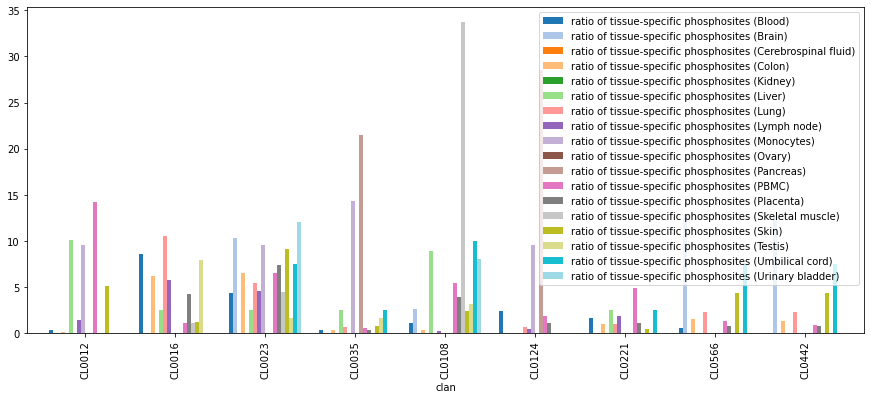

In [250]:
df_clan_tspec_all[(df_clan_tspec_all["ratio of tissue-specific phosphosites (Blood)"]>(df_clan_tspec_all["ratio of tissue-specific phosphosites (Blood)"].mean()+df_clan_tspec_all["ratio of tissue-specific phosphosites (Blood)"].std()))|
                 (df_clan_tspec_all["ratio of tissue-specific phosphosites (Brain)"]>(df_clan_tspec_all["ratio of tissue-specific phosphosites (Brain)"].mean()+df_clan_tspec_all["ratio of tissue-specific phosphosites (Brain)"].std()))|
                 (df_clan_tspec_all["ratio of tissue-specific phosphosites (Cerebrospinal fluid)"]>(df_clan_tspec_all["ratio of tissue-specific phosphosites (Cerebrospinal fluid)"].mean()+df_clan_tspec_all["ratio of tissue-specific phosphosites (Cerebrospinal fluid)"].std()))|
                 (df_clan_tspec_all["ratio of tissue-specific phosphosites (Colon)"]>(df_clan_tspec_all["ratio of tissue-specific phosphosites (Colon)"].mean()+df_clan_tspec_all["ratio of tissue-specific phosphosites (Colon)"].std()))|
                  (df_clan_tspec_all["ratio of tissue-specific phosphosites (Kidney)"]>(df_clan_tspec_all["ratio of tissue-specific phosphosites (Kidney)"].mean()+df_clan_tspec_all["ratio of tissue-specific phosphosites (Kidney)"].std()))|
                 (df_clan_tspec_all["ratio of tissue-specific phosphosites (Liver)"]>(df_clan_tspec_all["ratio of tissue-specific phosphosites (Liver)"].mean()+df_clan_tspec_all["ratio of tissue-specific phosphosites (Liver)"].std()))|
                 (df_clan_tspec_all["ratio of tissue-specific phosphosites (Lung)"]>(df_clan_tspec_all["ratio of tissue-specific phosphosites (Lung)"].mean()+df_clan_tspec_all["ratio of tissue-specific phosphosites (Lung)"].std()))|
                 (df_clan_tspec_all["ratio of tissue-specific phosphosites (Lymph node)"]>(df_clan_tspec_all["ratio of tissue-specific phosphosites (Lymph node)"].mean()+df_clan_tspec_all["ratio of tissue-specific phosphosites (Lymph node)"].std()))|
                 (df_clan_tspec_all["ratio of tissue-specific phosphosites (Monocytes)"]>(df_clan_tspec_all["ratio of tissue-specific phosphosites (Monocytes)"].mean()+df_clan_tspec_all["ratio of tissue-specific phosphosites (Monocytes)"].std()))|
                 (df_clan_tspec_all["ratio of tissue-specific phosphosites (Ovary)"]>(df_clan_tspec_all["ratio of tissue-specific phosphosites (Ovary)"].mean()+df_clan_tspec_all["ratio of tissue-specific phosphosites (Ovary)"].std()))|
                 (df_clan_tspec_all["ratio of tissue-specific phosphosites (Pancreas)"]>(df_clan_tspec_all["ratio of tissue-specific phosphosites (Pancreas)"].mean()+df_clan_tspec_all["ratio of tissue-specific phosphosites (Pancreas)"].std()))|
                 (df_clan_tspec_all["ratio of tissue-specific phosphosites (PBMC)"]>(df_clan_tspec_all["ratio of tissue-specific phosphosites (PBMC)"].mean()+df_clan_tspec_all["ratio of tissue-specific phosphosites (PBMC)"].std()))|
                 (df_clan_tspec_all["ratio of tissue-specific phosphosites (Placenta)"]>(df_clan_tspec_all["ratio of tissue-specific phosphosites (Placenta)"].mean()+df_clan_tspec_all["ratio of tissue-specific phosphosites (Placenta)"].std()))|
                  (df_clan_tspec_all["ratio of tissue-specific phosphosites (Skeletal muscle)"]>(df_clan_tspec_all["ratio of tissue-specific phosphosites (Skeletal muscle)"].mean()+df_clan_tspec_all["ratio of tissue-specific phosphosites (Skeletal muscle)"].std()))|
                 (df_clan_tspec_all["ratio of tissue-specific phosphosites (Skin)"]>(df_clan_tspec_all["ratio of tissue-specific phosphosites (Skin)"].mean()+df_clan_tspec_all["ratio of tissue-specific phosphosites (Skin)"].std()))|
                  (df_clan_tspec_all["ratio of tissue-specific phosphosites (Testis)"]>(df_clan_tspec_all["ratio of tissue-specific phosphosites (Testis)"].mean()+df_clan_tspec_all["ratio of tissue-specific phosphosites (Testis)"].std()))|
                  (df_clan_tspec_all["ratio of tissue-specific phosphosites (Umbilical cord)"]>(df_clan_tspec_all["ratio of tissue-specific phosphosites (Umbilical cord)"].mean()+df_clan_tspec_all["ratio of tissue-specific phosphosites (Umbilical cord)"].std()))|
                 (df_clan_tspec_all["ratio of tissue-specific phosphosites (Urinary bladder)"]>(df_clan_tspec_all["ratio of tissue-specific phosphosites (Urinary bladder)"].mean()+df_clan_tspec_all["ratio of tissue-specific phosphosites (Urinary bladder)"].std()))].drop(["No_clan"]).plot(kind="bar", figsize=(15,6), colormap="tab20", width=0.8)

Similar to what can be appreciated above, generally clans are either well represented or not, irrespective of tissue. However, some clans show more association with a tissue, for example CL0108 with skeletal tissue.

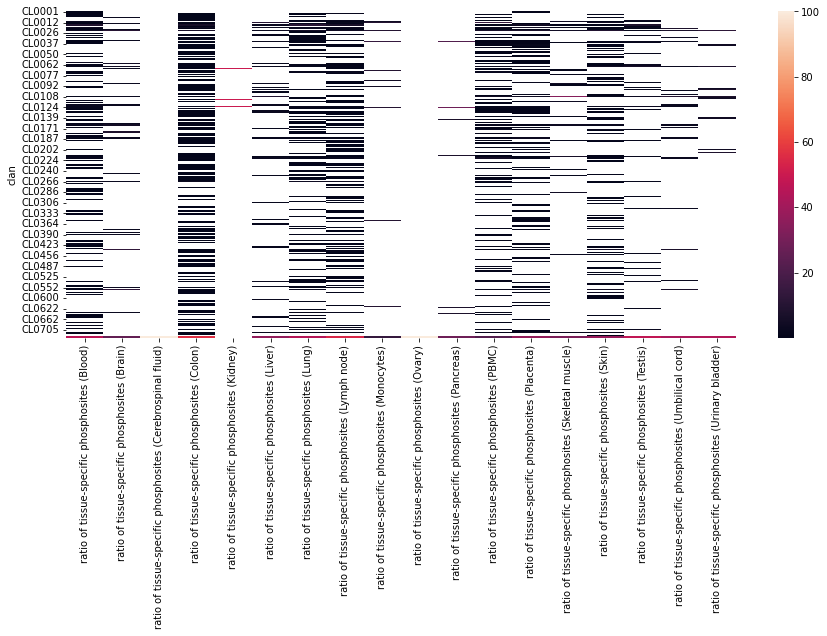

In [251]:
df_clan_tspec_all.sort_values(["clan"], inplace=True)
plt.figure(figsize=(15,6))
sns.heatmap(df_clan_tspec_all)
plt.show()

In [252]:
temp = taspec_sites_pfam.loc[taspec_sites_pfam["Adipose tissue"]==1, :].groupby(["clan", "ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"})
df_clan_taspec_Adipose_tissue = temp.groupby(["clan"], as_index=False)["ACC_ID"].count()
df_clan_taspec_Adipose_tissue.rename({"ACC_ID": "number of tissue-specific phosphosites (Adipose tissue)"}, inplace=True, axis=1)
df_clan_taspec_Adipose_tissue["Total"] = taspec_sites_pfam.loc[taspec_sites_pfam["Adipose tissue"]==1, :].groupby(["ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"}).shape[0]
df_clan_taspec_Adipose_tissue["ratio of tissue-specific phosphosites (Adipose tissue)"] = df_clan_taspec_Adipose_tissue["number of tissue-specific phosphosites (Adipose tissue)"]*100/df_clan_taspec_Adipose_tissue["Total"]
df_clan_taspec_Adipose_tissue.drop(["number of tissue-specific phosphosites (Adipose tissue)", "Total"], axis=1, inplace=True)
df_clan_taspec_Adipose_tissue.set_index(["clan"], inplace=True)
temp = taspec_sites_pfam.loc[taspec_sites_pfam["Blood"]==1, :].groupby(["clan", "ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"})
df_clan_taspec_Blood = temp.groupby(["clan"], as_index=False)["ACC_ID"].count()
df_clan_taspec_Blood.rename({"ACC_ID": "number of tissue-specific phosphosites (Blood)"}, inplace=True, axis=1)
df_clan_taspec_Blood["Total"] = taspec_sites_pfam.loc[taspec_sites_pfam["Blood"]==1, :].groupby(["ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"}).shape[0]
df_clan_taspec_Blood["ratio of tissue-specific phosphosites (Blood)"] = df_clan_taspec_Blood["number of tissue-specific phosphosites (Blood)"]*100/df_clan_taspec_Blood["Total"]
df_clan_taspec_Blood.drop(["number of tissue-specific phosphosites (Blood)", "Total"], axis=1, inplace=True)
df_clan_taspec_Blood.set_index(["clan"], inplace=True)
temp = taspec_sites_pfam.loc[taspec_sites_pfam["Brain"]==1, :].groupby(["clan", "ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"})
df_clan_taspec_Brain = temp.groupby(["clan"], as_index=False)["ACC_ID"].count()
df_clan_taspec_Brain.rename({"ACC_ID": "number of tissue-specific phosphosites (Brain)"}, inplace=True, axis=1)
df_clan_taspec_Brain["Total"] = taspec_sites_pfam.loc[taspec_sites_pfam["Brain"]==1, :].groupby(["ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"}).shape[0]
df_clan_taspec_Brain["ratio of tissue-specific phosphosites (Brain)"] = df_clan_taspec_Brain["number of tissue-specific phosphosites (Brain)"]*100/df_clan_taspec_Brain["Total"]
df_clan_taspec_Brain.drop(["number of tissue-specific phosphosites (Brain)", "Total"], axis=1, inplace=True)
df_clan_taspec_Brain.set_index(["clan"], inplace=True)
temp = taspec_sites_pfam.loc[taspec_sites_pfam["Cerebrospinal fluid"]==1, :].groupby(["clan", "ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"})
df_clan_taspec_Cerebrospinal_fluid = temp.groupby(["clan"], as_index=False)["ACC_ID"].count()
df_clan_taspec_Cerebrospinal_fluid.rename({"ACC_ID": "number of tissue-specific phosphosites (Cerebrospinal fluid)"}, inplace=True, axis=1)
df_clan_taspec_Cerebrospinal_fluid["Total"] = taspec_sites_pfam.loc[taspec_sites_pfam["Cerebrospinal fluid"]==1, :].groupby(["ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"}).shape[0]
df_clan_taspec_Cerebrospinal_fluid["ratio of tissue-specific phosphosites (Cerebrospinal fluid)"] = df_clan_taspec_Cerebrospinal_fluid["number of tissue-specific phosphosites (Cerebrospinal fluid)"]*100/df_clan_taspec_Cerebrospinal_fluid["Total"]
df_clan_taspec_Cerebrospinal_fluid.drop(["number of tissue-specific phosphosites (Cerebrospinal fluid)", "Total"], axis=1, inplace=True)
df_clan_taspec_Cerebrospinal_fluid.set_index(["clan"], inplace=True)
temp = taspec_sites_pfam.loc[taspec_sites_pfam["Colon"]==1, :].groupby(["clan", "ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"})
df_clan_taspec_Colon = temp.groupby(["clan"], as_index=False)["ACC_ID"].count()
df_clan_taspec_Colon.rename({"ACC_ID": "number of tissue-specific phosphosites (Colon)"}, inplace=True, axis=1)
df_clan_taspec_Colon["Total"] = taspec_sites_pfam.loc[taspec_sites_pfam["Colon"]==1, :].groupby(["ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"}).shape[0]
df_clan_taspec_Colon["ratio of tissue-specific phosphosites (Colon)"] = df_clan_taspec_Colon["number of tissue-specific phosphosites (Colon)"]*100/df_clan_taspec_Colon["Total"]
df_clan_taspec_Colon.drop(["number of tissue-specific phosphosites (Colon)", "Total"], axis=1, inplace=True)
df_clan_taspec_Colon.set_index(["clan"], inplace=True)
temp = taspec_sites_pfam.loc[taspec_sites_pfam["Kidney"]==1, :].groupby(["clan", "ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"})
df_clan_taspec_Kidney = temp.groupby(["clan"], as_index=False)["ACC_ID"].count()
df_clan_taspec_Kidney.rename({"ACC_ID": "number of tissue-specific phosphosites (Kidney)"}, inplace=True, axis=1)
df_clan_taspec_Kidney["Total"] = taspec_sites_pfam.loc[taspec_sites_pfam["Kidney"]==1, :].groupby(["ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"}).shape[0]
df_clan_taspec_Kidney["ratio of tissue-specific phosphosites (Kidney)"] = df_clan_taspec_Kidney["number of tissue-specific phosphosites (Kidney)"]*100/df_clan_taspec_Kidney["Total"]
df_clan_taspec_Kidney.drop(["number of tissue-specific phosphosites (Kidney)", "Total"], axis=1, inplace=True)
df_clan_taspec_Kidney.set_index(["clan"], inplace=True)
temp = taspec_sites_pfam.loc[taspec_sites_pfam["Liver"]==1, :].groupby(["clan", "ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"})
df_clan_taspec_Liver = temp.groupby(["clan"], as_index=False)["ACC_ID"].count()
df_clan_taspec_Liver.rename({"ACC_ID": "number of tissue-specific phosphosites (Liver)"}, inplace=True, axis=1)
df_clan_taspec_Liver["Total"] = taspec_sites_pfam.loc[taspec_sites_pfam["Liver"]==1, :].groupby(["ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"}).shape[0]
df_clan_taspec_Liver["ratio of tissue-specific phosphosites (Liver)"] = df_clan_taspec_Liver["number of tissue-specific phosphosites (Liver)"]*100/df_clan_taspec_Liver["Total"]
df_clan_taspec_Liver.drop(["number of tissue-specific phosphosites (Liver)", "Total"], axis=1, inplace=True)
df_clan_taspec_Liver.set_index(["clan"], inplace=True)
temp = taspec_sites_pfam.loc[taspec_sites_pfam["Lung"]==1, :].groupby(["clan", "ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"})
df_clan_taspec_Lung = temp.groupby(["clan"], as_index=False)["ACC_ID"].count()
df_clan_taspec_Lung.rename({"ACC_ID": "number of tissue-specific phosphosites (Lung)"}, inplace=True, axis=1)
df_clan_taspec_Lung["Total"] = taspec_sites_pfam.loc[taspec_sites_pfam["Lung"]==1, :].groupby(["ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"}).shape[0]
df_clan_taspec_Lung["ratio of tissue-specific phosphosites (Lung)"] = df_clan_taspec_Lung["number of tissue-specific phosphosites (Lung)"]*100/df_clan_taspec_Lung["Total"]
df_clan_taspec_Lung.drop(["number of tissue-specific phosphosites (Lung)", "Total"], axis=1, inplace=True)
df_clan_taspec_Lung.set_index(["clan"], inplace=True)
temp = taspec_sites_pfam.loc[taspec_sites_pfam["Lymph node"]==1, :].groupby(["clan", "ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"})
df_clan_taspec_Lymph_node = temp.groupby(["clan"], as_index=False)["ACC_ID"].count()
df_clan_taspec_Lymph_node.rename({"ACC_ID": "number of tissue-specific phosphosites (Lymph node)"}, inplace=True, axis=1)
df_clan_taspec_Lymph_node["Total"] = taspec_sites_pfam.loc[taspec_sites_pfam["Lymph node"]==1, :].groupby(["ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"}).shape[0]
df_clan_taspec_Lymph_node["ratio of tissue-specific phosphosites (Lymph node)"] = df_clan_taspec_Lymph_node["number of tissue-specific phosphosites (Lymph node)"]*100/df_clan_taspec_Lymph_node["Total"]
df_clan_taspec_Lymph_node.drop(["number of tissue-specific phosphosites (Lymph node)", "Total"], axis=1, inplace=True)
df_clan_taspec_Lymph_node.set_index(["clan"], inplace=True)
temp = taspec_sites_pfam.loc[taspec_sites_pfam["Monocytes"]==1, :].groupby(["clan", "ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"})
df_clan_taspec_Monocytes = temp.groupby(["clan"], as_index=False)["ACC_ID"].count()
df_clan_taspec_Monocytes.rename({"ACC_ID": "number of tissue-specific phosphosites (Monocytes)"}, inplace=True, axis=1)
df_clan_taspec_Monocytes["Total"] = taspec_sites_pfam.loc[taspec_sites_pfam["Monocytes"]==1, :].groupby(["ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"}).shape[0]
df_clan_taspec_Monocytes["ratio of tissue-specific phosphosites (Monocytes)"] = df_clan_taspec_Monocytes["number of tissue-specific phosphosites (Monocytes)"]*100/df_clan_taspec_Monocytes["Total"]
df_clan_taspec_Monocytes.drop(["number of tissue-specific phosphosites (Monocytes)", "Total"], axis=1, inplace=True)
df_clan_taspec_Monocytes.set_index(["clan"], inplace=True)
temp = taspec_sites_pfam.loc[taspec_sites_pfam["Ovary"]==1, :].groupby(["clan", "ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"})
df_clan_taspec_Ovary = temp.groupby(["clan"], as_index=False)["ACC_ID"].count()
df_clan_taspec_Ovary.rename({"ACC_ID": "number of tissue-specific phosphosites (Ovary)"}, inplace=True, axis=1)
df_clan_taspec_Ovary["Total"] = taspec_sites_pfam.loc[taspec_sites_pfam["Ovary"]==1, :].groupby(["ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"}).shape[0]
df_clan_taspec_Ovary["ratio of tissue-specific phosphosites (Ovary)"] = df_clan_taspec_Ovary["number of tissue-specific phosphosites (Ovary)"]*100/df_clan_taspec_Ovary["Total"]
df_clan_taspec_Ovary.drop(["number of tissue-specific phosphosites (Ovary)", "Total"], axis=1, inplace=True)
df_clan_taspec_Ovary.set_index(["clan"], inplace=True)
temp = taspec_sites_pfam.loc[taspec_sites_pfam["Pancreas"]==1, :].groupby(["clan", "ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"})
df_clan_taspec_Pancreas = temp.groupby(["clan"], as_index=False)["ACC_ID"].count()
df_clan_taspec_Pancreas.rename({"ACC_ID": "number of tissue-specific phosphosites (Pancreas)"}, inplace=True, axis=1)
df_clan_taspec_Pancreas["Total"] = taspec_sites_pfam.loc[taspec_sites_pfam["Pancreas"]==1, :].groupby(["ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"}).shape[0]
df_clan_taspec_Pancreas["ratio of tissue-specific phosphosites (Pancreas)"] = df_clan_taspec_Pancreas["number of tissue-specific phosphosites (Pancreas)"]*100/df_clan_taspec_Pancreas["Total"]
df_clan_taspec_Pancreas.drop(["number of tissue-specific phosphosites (Pancreas)", "Total"], axis=1, inplace=True)
df_clan_taspec_Pancreas.set_index(["clan"], inplace=True)
temp = taspec_sites_pfam.loc[taspec_sites_pfam["PBMC"]==1, :].groupby(["clan", "ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"})
df_clan_taspec_PBMC = temp.groupby(["clan"], as_index=False)["ACC_ID"].count()
df_clan_taspec_PBMC.rename({"ACC_ID": "number of tissue-specific phosphosites (PBMC)"}, inplace=True, axis=1)
df_clan_taspec_PBMC["Total"] = taspec_sites_pfam.loc[taspec_sites_pfam["PBMC"]==1, :].groupby(["ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"}).shape[0]
df_clan_taspec_PBMC["ratio of tissue-specific phosphosites (PBMC)"] = df_clan_taspec_PBMC["number of tissue-specific phosphosites (PBMC)"]*100/df_clan_taspec_PBMC["Total"]
df_clan_taspec_PBMC.drop(["number of tissue-specific phosphosites (PBMC)", "Total"], axis=1, inplace=True)
df_clan_taspec_PBMC.set_index(["clan"], inplace=True)
temp = taspec_sites_pfam.loc[taspec_sites_pfam["Placenta"]==1, :].groupby(["clan", "ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"})
df_clan_taspec_Placenta = temp.groupby(["clan"], as_index=False)["ACC_ID"].count()
df_clan_taspec_Placenta.rename({"ACC_ID": "number of tissue-specific phosphosites (Placenta)"}, inplace=True, axis=1)
df_clan_taspec_Placenta["Total"] = taspec_sites_pfam.loc[taspec_sites_pfam["Placenta"]==1, :].groupby(["ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"}).shape[0]
df_clan_taspec_Placenta["ratio of tissue-specific phosphosites (Placenta)"] = df_clan_taspec_Placenta["number of tissue-specific phosphosites (Placenta)"]*100/df_clan_taspec_Placenta["Total"]
df_clan_taspec_Placenta.drop(["number of tissue-specific phosphosites (Placenta)", "Total"], axis=1, inplace=True)
df_clan_taspec_Placenta.set_index(["clan"], inplace=True)
temp = taspec_sites_pfam.loc[taspec_sites_pfam["Skeletal muscle"]==1, :].groupby(["clan", "ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"})
df_clan_taspec_Skeletal_muscle = temp.groupby(["clan"], as_index=False)["ACC_ID"].count()
df_clan_taspec_Skeletal_muscle.rename({"ACC_ID": "number of tissue-specific phosphosites (Skeletal muscle)"}, inplace=True, axis=1)
df_clan_taspec_Skeletal_muscle["Total"] = taspec_sites_pfam.loc[taspec_sites_pfam["Skeletal muscle"]==1, :].groupby(["ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"}).shape[0]
df_clan_taspec_Skeletal_muscle["ratio of tissue-specific phosphosites (Skeletal muscle)"] = df_clan_taspec_Skeletal_muscle["number of tissue-specific phosphosites (Skeletal muscle)"]*100/df_clan_taspec_Skeletal_muscle["Total"]
df_clan_taspec_Skeletal_muscle.drop(["number of tissue-specific phosphosites (Skeletal muscle)", "Total"], axis=1, inplace=True)
df_clan_taspec_Skeletal_muscle.set_index(["clan"], inplace=True)
temp = taspec_sites_pfam.loc[taspec_sites_pfam["Skin"]==1, :].groupby(["clan", "ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"})
df_clan_taspec_Skin = temp.groupby(["clan"], as_index=False)["ACC_ID"].count()
df_clan_taspec_Skin.rename({"ACC_ID": "number of tissue-specific phosphosites (Skin)"}, inplace=True, axis=1)
df_clan_taspec_Skin["Total"] = taspec_sites_pfam.loc[taspec_sites_pfam["Skin"]==1, :].groupby(["ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"}).shape[0]
df_clan_taspec_Skin["ratio of tissue-specific phosphosites (Skin)"] = df_clan_taspec_Skin["number of tissue-specific phosphosites (Skin)"]*100/df_clan_taspec_Skin["Total"]
df_clan_taspec_Skin.drop(["number of tissue-specific phosphosites (Skin)", "Total"], axis=1, inplace=True)
df_clan_taspec_Skin.set_index(["clan"], inplace=True)
temp = taspec_sites_pfam.loc[taspec_sites_pfam["Testis"]==1, :].groupby(["clan", "ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"})
df_clan_taspec_Testis = temp.groupby(["clan"], as_index=False)["ACC_ID"].count()
df_clan_taspec_Testis.rename({"ACC_ID": "number of tissue-specific phosphosites (Testis)"}, inplace=True, axis=1)
df_clan_taspec_Testis["Total"] = taspec_sites_pfam.loc[taspec_sites_pfam["Testis"]==1, :].groupby(["ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"}).shape[0]
df_clan_taspec_Testis["ratio of tissue-specific phosphosites (Testis)"] = df_clan_taspec_Testis["number of tissue-specific phosphosites (Testis)"]*100/df_clan_taspec_Testis["Total"]
df_clan_taspec_Testis.drop(["number of tissue-specific phosphosites (Testis)", "Total"], axis=1, inplace=True)
df_clan_taspec_Testis.set_index(["clan"], inplace=True)
temp = taspec_sites_pfam.loc[taspec_sites_pfam["Placenta"]==1, :].groupby(["clan", "ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"})
df_clan_taspec_Placenta = temp.groupby(["clan"], as_index=False)["ACC_ID"].count()
df_clan_taspec_Placenta.rename({"ACC_ID": "number of tissue-specific phosphosites (Placenta)"}, inplace=True, axis=1)
df_clan_taspec_Placenta["Total"] = taspec_sites_pfam.loc[taspec_sites_pfam["Placenta"]==1, :].groupby(["ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"}).shape[0]
df_clan_taspec_Placenta["ratio of tissue-specific phosphosites (Placenta)"] = df_clan_taspec_Placenta["number of tissue-specific phosphosites (Placenta)"]*100/df_clan_taspec_Placenta["Total"]
df_clan_taspec_Placenta.drop(["number of tissue-specific phosphosites (Placenta)", "Total"], axis=1, inplace=True)
df_clan_taspec_Placenta.set_index(["clan"], inplace=True)
temp = taspec_sites_pfam.loc[taspec_sites_pfam["Umbilical cord"]==1, :].groupby(["clan", "ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"})
df_clan_taspec_Umbilical_cord = temp.groupby(["clan"], as_index=False)["ACC_ID"].count()
df_clan_taspec_Umbilical_cord.rename({"ACC_ID": "number of tissue-specific phosphosites (Umbilical cord)"}, inplace=True, axis=1)
df_clan_taspec_Umbilical_cord["Total"] = taspec_sites_pfam.loc[taspec_sites_pfam["Umbilical cord"]==1, :].groupby(["ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"}).shape[0]
df_clan_taspec_Umbilical_cord["ratio of tissue-specific phosphosites (Umbilical cord)"] = df_clan_taspec_Umbilical_cord["number of tissue-specific phosphosites (Umbilical cord)"]*100/df_clan_taspec_Umbilical_cord["Total"]
df_clan_taspec_Umbilical_cord.drop(["number of tissue-specific phosphosites (Umbilical cord)", "Total"], axis=1, inplace=True)
df_clan_taspec_Umbilical_cord.set_index(["clan"], inplace=True)
temp = taspec_sites_pfam.loc[taspec_sites_pfam["Urinary bladder"]==1, :].groupby(["clan", "ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"})
df_clan_taspec_Urinary_bladder = temp.groupby(["clan"], as_index=False)["ACC_ID"].count()
df_clan_taspec_Urinary_bladder.rename({"ACC_ID": "number of tissue-specific phosphosites (Urinary bladder)"}, inplace=True, axis=1)
df_clan_taspec_Urinary_bladder["Total"] = taspec_sites_pfam.loc[taspec_sites_pfam["Urinary bladder"]==1, :].groupby(["ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"}).shape[0]
df_clan_taspec_Urinary_bladder["ratio of tissue-specific phosphosites (Urinary bladder)"] = df_clan_taspec_Urinary_bladder["number of tissue-specific phosphosites (Urinary bladder)"]*100/df_clan_taspec_Urinary_bladder["Total"]
df_clan_taspec_Urinary_bladder.drop(["number of tissue-specific phosphosites (Urinary bladder)", "Total"], axis=1, inplace=True)
df_clan_taspec_Urinary_bladder.set_index(["clan"], inplace=True)

In [253]:
df_clan_taspec_all = pd.concat([df_clan_taspec_Adipose_tissue, df_clan_taspec_Blood, df_clan_taspec_Brain,
                                df_clan_taspec_Cerebrospinal_fluid, df_clan_taspec_Colon,
                                df_clan_taspec_Kidney, df_clan_taspec_Liver, df_clan_taspec_Lung, df_clan_taspec_Lymph_node,
                              df_clan_taspec_Monocytes, df_clan_taspec_Ovary,
                                df_clan_taspec_Pancreas, 
                              df_clan_taspec_PBMC, df_clan_taspec_Placenta, df_clan_taspec_Skeletal_muscle,
                               df_clan_taspec_Skin, df_clan_taspec_Testis,
                               df_clan_taspec_Umbilical_cord, df_clan_taspec_Urinary_bladder], axis=1)
df_clan_taspec_all

ratio of tissue-specific phosphosites (Adipose tissue)  \
clan                                                             
CL0004                                           1.136364        
CL0011                                           4.545455        
CL0020                                           2.272727        
CL0023                                          12.500000        
CL0025                                           3.409091        
...                                                   ...        
CL0492                                                NaN        
CL0347                                                NaN        
CL0351                                                NaN        
CL0318                                                NaN        
CL0652                                                NaN        

        ratio of tissue-specific phosphosites (Blood)  \
clan                                                    
CL0004                                       0.167504   
CL0011                                       0.502513   
CL0020                                       2.010050   
CL0023                                       6.365159   
CL0025                                            NaN   
...                                               ...   
CL0492                                            NaN   
CL0347                                            NaN   
CL0351                                            NaN   
CL0318                                            NaN   
CL0652                                            NaN   

        ratio of tissue-specific phosphosites (Brain)  \
clan                                                    
CL0004                                            NaN   
CL0011                                       7.352941   
CL0020                                            NaN   
CL0023                                            NaN   
CL0025                                            NaN   
...                                               ...   
CL0492                                            NaN   
CL0347                                            NaN   
CL0351                                            NaN   
CL0318                                            NaN   
CL0652                                            NaN   

        ratio of tissue-specific phosphosites (Cerebrospinal fluid)  \
clan                                                                  
CL0004                                                NaN             
CL0011                                          13.333333             
CL0020                                                NaN             
CL0023                                                NaN             
CL0025                                                NaN             
...                                                   ...             
CL0492                                                NaN             
CL0347                                                NaN             
CL0351                                                NaN             
CL0318                                                NaN             
CL0652                                                NaN             

        ratio of tissue-specific phosphosites (Colon)  \
clan                                                    
CL0004                                       0.106724   
CL0011                                            NaN   
CL0020                                       3.628602   
CL0023                                       8.217716   
CL0025                                            NaN   
...                                               ...   
CL0492                                            NaN   
CL0347                                            NaN   
CL0351                                            NaN   
CL0318                                            NaN   
CL0652                                            NaN   


- CL0023: P-loop NTPase
- CL0063: NADP Rossman
- CL0108: Actin ATPase
- CL0012: Histone
- CL0016: PKinase
- CL0124: Peptidase PA
- CL0092: ADF

<AxesSubplot:xlabel='clan'>

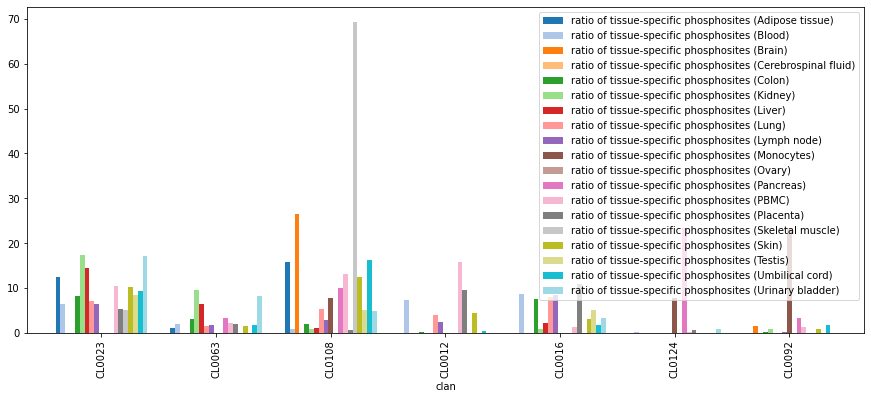

In [254]:
df_clan_taspec_all[(df_clan_taspec_all["ratio of tissue-specific phosphosites (Blood)"]>(df_clan_taspec_all["ratio of tissue-specific phosphosites (Blood)"].mean()+df_clan_taspec_all["ratio of tissue-specific phosphosites (Blood)"].std()))|
                 (df_clan_taspec_all["ratio of tissue-specific phosphosites (Brain)"]>(df_clan_taspec_all["ratio of tissue-specific phosphosites (Brain)"].mean()+df_clan_taspec_all["ratio of tissue-specific phosphosites (Brain)"].std()))|
                 (df_clan_taspec_all["ratio of tissue-specific phosphosites (Cerebrospinal fluid)"]>(df_clan_taspec_all["ratio of tissue-specific phosphosites (Cerebrospinal fluid)"].mean()+df_clan_taspec_all["ratio of tissue-specific phosphosites (Cerebrospinal fluid)"].std()))|
                 (df_clan_taspec_all["ratio of tissue-specific phosphosites (Colon)"]>(df_clan_taspec_all["ratio of tissue-specific phosphosites (Colon)"].mean()+df_clan_taspec_all["ratio of tissue-specific phosphosites (Colon)"].std()))|
                  (df_clan_taspec_all["ratio of tissue-specific phosphosites (Kidney)"]>(df_clan_taspec_all["ratio of tissue-specific phosphosites (Kidney)"].mean()+df_clan_taspec_all["ratio of tissue-specific phosphosites (Kidney)"].std()))|
                 (df_clan_taspec_all["ratio of tissue-specific phosphosites (Liver)"]>(df_clan_taspec_all["ratio of tissue-specific phosphosites (Liver)"].mean()+df_clan_taspec_all["ratio of tissue-specific phosphosites (Liver)"].std()))|
                 (df_clan_taspec_all["ratio of tissue-specific phosphosites (Lung)"]>(df_clan_taspec_all["ratio of tissue-specific phosphosites (Lung)"].mean()+df_clan_taspec_all["ratio of tissue-specific phosphosites (Lung)"].std()))|
                 (df_clan_taspec_all["ratio of tissue-specific phosphosites (Lymph node)"]>(df_clan_taspec_all["ratio of tissue-specific phosphosites (Lymph node)"].mean()+df_clan_taspec_all["ratio of tissue-specific phosphosites (Lymph node)"].std()))|
                 (df_clan_taspec_all["ratio of tissue-specific phosphosites (Monocytes)"]>(df_clan_taspec_all["ratio of tissue-specific phosphosites (Monocytes)"].mean()+df_clan_taspec_all["ratio of tissue-specific phosphosites (Monocytes)"].std()))|
                 (df_clan_taspec_all["ratio of tissue-specific phosphosites (Ovary)"]>(df_clan_taspec_all["ratio of tissue-specific phosphosites (Ovary)"].mean()+df_clan_taspec_all["ratio of tissue-specific phosphosites (Ovary)"].std()))|
                 (df_clan_taspec_all["ratio of tissue-specific phosphosites (Pancreas)"]>(df_clan_taspec_all["ratio of tissue-specific phosphosites (Pancreas)"].mean()+df_clan_taspec_all["ratio of tissue-specific phosphosites (Pancreas)"].std()))|
                 (df_clan_taspec_all["ratio of tissue-specific phosphosites (PBMC)"]>(df_clan_taspec_all["ratio of tissue-specific phosphosites (PBMC)"].mean()+df_clan_taspec_all["ratio of tissue-specific phosphosites (PBMC)"].std()))|
                 (df_clan_taspec_all["ratio of tissue-specific phosphosites (Placenta)"]>(df_clan_taspec_all["ratio of tissue-specific phosphosites (Placenta)"].mean()+df_clan_taspec_all["ratio of tissue-specific phosphosites (Placenta)"].std()))|
                  (df_clan_taspec_all["ratio of tissue-specific phosphosites (Skeletal muscle)"]>(df_clan_taspec_all["ratio of tissue-specific phosphosites (Skeletal muscle)"].mean()+df_clan_taspec_all["ratio of tissue-specific phosphosites (Skeletal muscle)"].std()))|
                 (df_clan_taspec_all["ratio of tissue-specific phosphosites (Skin)"]>(df_clan_taspec_all["ratio of tissue-specific phosphosites (Skin)"].mean()+df_clan_taspec_all["ratio of tissue-specific phosphosites (Skin)"].std()))|
                  (df_clan_taspec_all["ratio of tissue-specific phosphosites (Testis)"]>(df_clan_taspec_all["ratio of tissue-specific phosphosites (Testis)"].mean()+df_clan_taspec_all["ratio of tissue-specific phosphosites (Testis)"].std()))|
                  (df_clan_taspec_all["ratio of tissue-specific phosphosites (Umbilical cord)"]>(df_clan_taspec_all["ratio of tissue-specific phosphosites (Umbilical cord)"].mean()+df_clan_taspec_all["ratio of tissue-specific phosphosites (Umbilical cord)"].std()))|
                 (df_clan_taspec_all["ratio of tissue-specific phosphosites (Urinary bladder)"]>(df_clan_taspec_all["ratio of tissue-specific phosphosites (Urinary bladder)"].mean()+df_clan_taspec_all["ratio of tissue-specific phosphosites (Urinary bladder)"].std()))].drop(["No_clan"]).plot(kind="bar", figsize=(15,6), colormap="tab20", width=0.8)

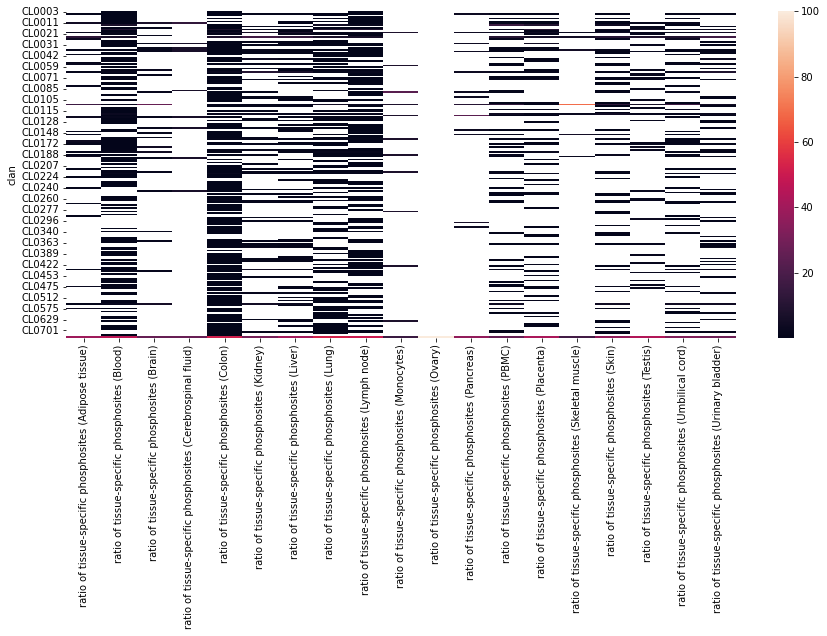

In [255]:
df_clan_taspec_all.sort_values(["clan"], inplace=True)
plt.figure(figsize=(15,6))
sns.heatmap(df_clan_taspec_all)
plt.show()

In [256]:
temp = gen_sites_pfam.loc[gen_sites_pfam["Adipose tissue"]==1, :].groupby(["clan", "ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"})
df_clan_gen_Adipose_tissue = temp.groupby(["clan"], as_index=False)["ACC_ID"].count()
df_clan_gen_Adipose_tissue.rename({"ACC_ID": "number of tissue-specific phosphosites (Adipose tissue)"}, inplace=True, axis=1)
df_clan_gen_Adipose_tissue["Total"] = gen_sites_pfam.loc[gen_sites_pfam["Adipose tissue"]==1, :].groupby(["ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"}).shape[0]
df_clan_gen_Adipose_tissue["ratio of tissue-specific phosphosites (Adipose tissue)"] = df_clan_gen_Adipose_tissue["number of tissue-specific phosphosites (Adipose tissue)"]*100/df_clan_gen_Adipose_tissue["Total"]
df_clan_gen_Adipose_tissue.drop(["number of tissue-specific phosphosites (Adipose tissue)", "Total"], axis=1, inplace=True)
df_clan_gen_Adipose_tissue.set_index(["clan"], inplace=True)
temp = gen_sites_pfam.loc[gen_sites_pfam["Blood"]==1, :].groupby(["clan", "ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"})
df_clan_gen_Blood = temp.groupby(["clan"], as_index=False)["ACC_ID"].count()
df_clan_gen_Blood.rename({"ACC_ID": "number of tissue-specific phosphosites (Blood)"}, inplace=True, axis=1)
df_clan_gen_Blood["Total"] = gen_sites_pfam.loc[gen_sites_pfam["Blood"]==1, :].groupby(["ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"}).shape[0]
df_clan_gen_Blood["ratio of tissue-specific phosphosites (Blood)"] = df_clan_gen_Blood["number of tissue-specific phosphosites (Blood)"]*100/df_clan_gen_Blood["Total"]
df_clan_gen_Blood.drop(["number of tissue-specific phosphosites (Blood)", "Total"], axis=1, inplace=True)
df_clan_gen_Blood.set_index(["clan"], inplace=True)
temp = gen_sites_pfam.loc[gen_sites_pfam["Brain"]==1, :].groupby(["clan", "ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"})
df_clan_gen_Brain = temp.groupby(["clan"], as_index=False)["ACC_ID"].count()
df_clan_gen_Brain.rename({"ACC_ID": "number of tissue-specific phosphosites (Brain)"}, inplace=True, axis=1)
df_clan_gen_Brain["Total"] = gen_sites_pfam.loc[gen_sites_pfam["Brain"]==1, :].groupby(["ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"}).shape[0]
df_clan_gen_Brain["ratio of tissue-specific phosphosites (Brain)"] = df_clan_gen_Brain["number of tissue-specific phosphosites (Brain)"]*100/df_clan_gen_Brain["Total"]
df_clan_gen_Brain.drop(["number of tissue-specific phosphosites (Brain)", "Total"], axis=1, inplace=True)
df_clan_gen_Brain.set_index(["clan"], inplace=True)
temp = gen_sites_pfam.loc[gen_sites_pfam["Cerebrospinal fluid"]==1, :].groupby(["clan", "ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"})
df_clan_gen_Cerebrospinal_fluid = temp.groupby(["clan"], as_index=False)["ACC_ID"].count()
df_clan_gen_Cerebrospinal_fluid.rename({"ACC_ID": "number of tissue-specific phosphosites (Cerebrospinal fluid)"}, inplace=True, axis=1)
df_clan_gen_Cerebrospinal_fluid["Total"] = gen_sites_pfam.loc[gen_sites_pfam["Cerebrospinal fluid"]==1, :].groupby(["ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"}).shape[0]
df_clan_gen_Cerebrospinal_fluid["ratio of tissue-specific phosphosites (Cerebrospinal fluid)"] = df_clan_gen_Cerebrospinal_fluid["number of tissue-specific phosphosites (Cerebrospinal fluid)"]*100/df_clan_gen_Cerebrospinal_fluid["Total"]
df_clan_gen_Cerebrospinal_fluid.drop(["number of tissue-specific phosphosites (Cerebrospinal fluid)", "Total"], axis=1, inplace=True)
df_clan_gen_Cerebrospinal_fluid.set_index(["clan"], inplace=True)
temp = gen_sites_pfam.loc[gen_sites_pfam["Colon"]==1, :].groupby(["clan", "ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"})
df_clan_gen_Colon = temp.groupby(["clan"], as_index=False)["ACC_ID"].count()
df_clan_gen_Colon.rename({"ACC_ID": "number of tissue-specific phosphosites (Colon)"}, inplace=True, axis=1)
df_clan_gen_Colon["Total"] = gen_sites_pfam.loc[gen_sites_pfam["Colon"]==1, :].groupby(["ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"}).shape[0]
df_clan_gen_Colon["ratio of tissue-specific phosphosites (Colon)"] = df_clan_gen_Colon["number of tissue-specific phosphosites (Colon)"]*100/df_clan_gen_Colon["Total"]
df_clan_gen_Colon.drop(["number of tissue-specific phosphosites (Colon)", "Total"], axis=1, inplace=True)
df_clan_gen_Colon.set_index(["clan"], inplace=True)
temp = gen_sites_pfam.loc[gen_sites_pfam["Kidney"]==1, :].groupby(["clan", "ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"})
df_clan_gen_Kidney = temp.groupby(["clan"], as_index=False)["ACC_ID"].count()
df_clan_gen_Kidney.rename({"ACC_ID": "number of tissue-specific phosphosites (Kidney)"}, inplace=True, axis=1)
df_clan_gen_Kidney["Total"] = gen_sites_pfam.loc[gen_sites_pfam["Kidney"]==1, :].groupby(["ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"}).shape[0]
df_clan_gen_Kidney["ratio of tissue-specific phosphosites (Kidney)"] = df_clan_gen_Kidney["number of tissue-specific phosphosites (Kidney)"]*100/df_clan_gen_Kidney["Total"]
df_clan_gen_Kidney.drop(["number of tissue-specific phosphosites (Kidney)", "Total"], axis=1, inplace=True)
df_clan_gen_Kidney.set_index(["clan"], inplace=True)
temp = gen_sites_pfam.loc[gen_sites_pfam["Liver"]==1, :].groupby(["clan", "ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"})
df_clan_gen_Liver = temp.groupby(["clan"], as_index=False)["ACC_ID"].count()
df_clan_gen_Liver.rename({"ACC_ID": "number of tissue-specific phosphosites (Liver)"}, inplace=True, axis=1)
df_clan_gen_Liver["Total"] = gen_sites_pfam.loc[gen_sites_pfam["Liver"]==1, :].groupby(["ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"}).shape[0]
df_clan_gen_Liver["ratio of tissue-specific phosphosites (Liver)"] = df_clan_gen_Liver["number of tissue-specific phosphosites (Liver)"]*100/df_clan_gen_Liver["Total"]
df_clan_gen_Liver.drop(["number of tissue-specific phosphosites (Liver)", "Total"], axis=1, inplace=True)
df_clan_gen_Liver.set_index(["clan"], inplace=True)
temp = gen_sites_pfam.loc[gen_sites_pfam["Lung"]==1, :].groupby(["clan", "ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"})
df_clan_gen_Lung = temp.groupby(["clan"], as_index=False)["ACC_ID"].count()
df_clan_gen_Lung.rename({"ACC_ID": "number of tissue-specific phosphosites (Lung)"}, inplace=True, axis=1)
df_clan_gen_Lung["Total"] = gen_sites_pfam.loc[gen_sites_pfam["Lung"]==1, :].groupby(["ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"}).shape[0]
df_clan_gen_Lung["ratio of tissue-specific phosphosites (Lung)"] = df_clan_gen_Lung["number of tissue-specific phosphosites (Lung)"]*100/df_clan_gen_Lung["Total"]
df_clan_gen_Lung.drop(["number of tissue-specific phosphosites (Lung)", "Total"], axis=1, inplace=True)
df_clan_gen_Lung.set_index(["clan"], inplace=True)
temp = gen_sites_pfam.loc[gen_sites_pfam["Lymph node"]==1, :].groupby(["clan", "ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"})
df_clan_gen_Lymph_node = temp.groupby(["clan"], as_index=False)["ACC_ID"].count()
df_clan_gen_Lymph_node.rename({"ACC_ID": "number of tissue-specific phosphosites (Lymph node)"}, inplace=True, axis=1)
df_clan_gen_Lymph_node["Total"] = gen_sites_pfam.loc[gen_sites_pfam["Lymph node"]==1, :].groupby(["ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"}).shape[0]
df_clan_gen_Lymph_node["ratio of tissue-specific phosphosites (Lymph node)"] = df_clan_gen_Lymph_node["number of tissue-specific phosphosites (Lymph node)"]*100/df_clan_gen_Lymph_node["Total"]
df_clan_gen_Lymph_node.drop(["number of tissue-specific phosphosites (Lymph node)", "Total"], axis=1, inplace=True)
df_clan_gen_Lymph_node.set_index(["clan"], inplace=True)
temp = gen_sites_pfam.loc[gen_sites_pfam["Monocytes"]==1, :].groupby(["clan", "ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"})
df_clan_gen_Monocytes = temp.groupby(["clan"], as_index=False)["ACC_ID"].count()
df_clan_gen_Monocytes.rename({"ACC_ID": "number of tissue-specific phosphosites (Monocytes)"}, inplace=True, axis=1)
df_clan_gen_Monocytes["Total"] = gen_sites_pfam.loc[gen_sites_pfam["Monocytes"]==1, :].groupby(["ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"}).shape[0]
df_clan_gen_Monocytes["ratio of tissue-specific phosphosites (Monocytes)"] = df_clan_gen_Monocytes["number of tissue-specific phosphosites (Monocytes)"]*100/df_clan_gen_Monocytes["Total"]
df_clan_gen_Monocytes.drop(["number of tissue-specific phosphosites (Monocytes)", "Total"], axis=1, inplace=True)
df_clan_gen_Monocytes.set_index(["clan"], inplace=True)
temp = gen_sites_pfam.loc[gen_sites_pfam["Ovary"]==1, :].groupby(["clan", "ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"})
df_clan_gen_Ovary = temp.groupby(["clan"], as_index=False)["ACC_ID"].count()
df_clan_gen_Ovary.rename({"ACC_ID": "number of tissue-specific phosphosites (Ovary)"}, inplace=True, axis=1)
df_clan_gen_Ovary["Total"] = gen_sites_pfam.loc[gen_sites_pfam["Ovary"]==1, :].groupby(["ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"}).shape[0]
df_clan_gen_Ovary["ratio of tissue-specific phosphosites (Ovary)"] = df_clan_gen_Ovary["number of tissue-specific phosphosites (Ovary)"]*100/df_clan_gen_Ovary["Total"]
df_clan_gen_Ovary.drop(["number of tissue-specific phosphosites (Ovary)", "Total"], axis=1, inplace=True)
df_clan_gen_Ovary.set_index(["clan"], inplace=True)
temp = gen_sites_pfam.loc[gen_sites_pfam["Pancreas"]==1, :].groupby(["clan", "ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"})
df_clan_gen_Pancreas = temp.groupby(["clan"], as_index=False)["ACC_ID"].count()
df_clan_gen_Pancreas.rename({"ACC_ID": "number of tissue-specific phosphosites (Pancreas)"}, inplace=True, axis=1)
df_clan_gen_Pancreas["Total"] = gen_sites_pfam.loc[gen_sites_pfam["Pancreas"]==1, :].groupby(["ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"}).shape[0]
df_clan_gen_Pancreas["ratio of tissue-specific phosphosites (Pancreas)"] = df_clan_gen_Pancreas["number of tissue-specific phosphosites (Pancreas)"]*100/df_clan_gen_Pancreas["Total"]
df_clan_gen_Pancreas.drop(["number of tissue-specific phosphosites (Pancreas)", "Total"], axis=1, inplace=True)
df_clan_gen_Pancreas.set_index(["clan"], inplace=True)
temp = gen_sites_pfam.loc[gen_sites_pfam["PBMC"]==1, :].groupby(["clan", "ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"})
df_clan_gen_PBMC = temp.groupby(["clan"], as_index=False)["ACC_ID"].count()
df_clan_gen_PBMC.rename({"ACC_ID": "number of tissue-specific phosphosites (PBMC)"}, inplace=True, axis=1)
df_clan_gen_PBMC["Total"] = gen_sites_pfam.loc[gen_sites_pfam["PBMC"]==1, :].groupby(["ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"}).shape[0]
df_clan_gen_PBMC["ratio of tissue-specific phosphosites (PBMC)"] = df_clan_gen_PBMC["number of tissue-specific phosphosites (PBMC)"]*100/df_clan_gen_PBMC["Total"]
df_clan_gen_PBMC.drop(["number of tissue-specific phosphosites (PBMC)", "Total"], axis=1, inplace=True)
df_clan_gen_PBMC.set_index(["clan"], inplace=True)
temp = gen_sites_pfam.loc[gen_sites_pfam["Placenta"]==1, :].groupby(["clan", "ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"})
df_clan_gen_Placenta = temp.groupby(["clan"], as_index=False)["ACC_ID"].count()
df_clan_gen_Placenta.rename({"ACC_ID": "number of tissue-specific phosphosites (Placenta)"}, inplace=True, axis=1)
df_clan_gen_Placenta["Total"] = gen_sites_pfam.loc[gen_sites_pfam["Placenta"]==1, :].groupby(["ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"}).shape[0]
df_clan_gen_Placenta["ratio of tissue-specific phosphosites (Placenta)"] = df_clan_gen_Placenta["number of tissue-specific phosphosites (Placenta)"]*100/df_clan_gen_Placenta["Total"]
df_clan_gen_Placenta.drop(["number of tissue-specific phosphosites (Placenta)", "Total"], axis=1, inplace=True)
df_clan_gen_Placenta.set_index(["clan"], inplace=True)
temp = gen_sites_pfam.loc[gen_sites_pfam["Skeletal muscle"]==1, :].groupby(["clan", "ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"})
df_clan_gen_Skeletal_muscle = temp.groupby(["clan"], as_index=False)["ACC_ID"].count()
df_clan_gen_Skeletal_muscle.rename({"ACC_ID": "number of tissue-specific phosphosites (Skeletal muscle)"}, inplace=True, axis=1)
df_clan_gen_Skeletal_muscle["Total"] = gen_sites_pfam.loc[gen_sites_pfam["Skeletal muscle"]==1, :].groupby(["ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"}).shape[0]
df_clan_gen_Skeletal_muscle["ratio of tissue-specific phosphosites (Skeletal muscle)"] = df_clan_gen_Skeletal_muscle["number of tissue-specific phosphosites (Skeletal muscle)"]*100/df_clan_gen_Skeletal_muscle["Total"]
df_clan_gen_Skeletal_muscle.drop(["number of tissue-specific phosphosites (Skeletal muscle)", "Total"], axis=1, inplace=True)
df_clan_gen_Skeletal_muscle.set_index(["clan"], inplace=True)
temp = gen_sites_pfam.loc[gen_sites_pfam["Skin"]==1, :].groupby(["clan", "ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"})
df_clan_gen_Skin = temp.groupby(["clan"], as_index=False)["ACC_ID"].count()
df_clan_gen_Skin.rename({"ACC_ID": "number of tissue-specific phosphosites (Skin)"}, inplace=True, axis=1)
df_clan_gen_Skin["Total"] = gen_sites_pfam.loc[gen_sites_pfam["Skin"]==1, :].groupby(["ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"}).shape[0]
df_clan_gen_Skin["ratio of tissue-specific phosphosites (Skin)"] = df_clan_gen_Skin["number of tissue-specific phosphosites (Skin)"]*100/df_clan_gen_Skin["Total"]
df_clan_gen_Skin.drop(["number of tissue-specific phosphosites (Skin)", "Total"], axis=1, inplace=True)
df_clan_gen_Skin.set_index(["clan"], inplace=True)
temp = gen_sites_pfam.loc[gen_sites_pfam["Testis"]==1, :].groupby(["clan", "ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"})
df_clan_gen_Testis = temp.groupby(["clan"], as_index=False)["ACC_ID"].count()
df_clan_gen_Testis.rename({"ACC_ID": "number of tissue-specific phosphosites (Testis)"}, inplace=True, axis=1)
df_clan_gen_Testis["Total"] = gen_sites_pfam.loc[gen_sites_pfam["Testis"]==1, :].groupby(["ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"}).shape[0]
df_clan_gen_Testis["ratio of tissue-specific phosphosites (Testis)"] = df_clan_gen_Testis["number of tissue-specific phosphosites (Testis)"]*100/df_clan_gen_Testis["Total"]
df_clan_gen_Testis.drop(["number of tissue-specific phosphosites (Testis)", "Total"], axis=1, inplace=True)
df_clan_gen_Testis.set_index(["clan"], inplace=True)
temp = gen_sites_pfam.loc[gen_sites_pfam["Placenta"]==1, :].groupby(["clan", "ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"})
df_clan_gen_Placenta = temp.groupby(["clan"], as_index=False)["ACC_ID"].count()
df_clan_gen_Placenta.rename({"ACC_ID": "number of tissue-specific phosphosites (Placenta)"}, inplace=True, axis=1)
df_clan_gen_Placenta["Total"] = gen_sites_pfam.loc[gen_sites_pfam["Placenta"]==1, :].groupby(["ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"}).shape[0]
df_clan_gen_Placenta["ratio of tissue-specific phosphosites (Placenta)"] = df_clan_gen_Placenta["number of tissue-specific phosphosites (Placenta)"]*100/df_clan_gen_Placenta["Total"]
df_clan_gen_Placenta.drop(["number of tissue-specific phosphosites (Placenta)", "Total"], axis=1, inplace=True)
df_clan_gen_Placenta.set_index(["clan"], inplace=True)
temp = gen_sites_pfam.loc[gen_sites_pfam["Umbilical cord"]==1, :].groupby(["clan", "ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"})
df_clan_gen_Umbilical_cord = temp.groupby(["clan"], as_index=False)["ACC_ID"].count()
df_clan_gen_Umbilical_cord.rename({"ACC_ID": "number of tissue-specific phosphosites (Umbilical cord)"}, inplace=True, axis=1)
df_clan_gen_Umbilical_cord["Total"] = gen_sites_pfam.loc[gen_sites_pfam["Umbilical cord"]==1, :].groupby(["ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"}).shape[0]
df_clan_gen_Umbilical_cord["ratio of tissue-specific phosphosites (Umbilical cord)"] = df_clan_gen_Umbilical_cord["number of tissue-specific phosphosites (Umbilical cord)"]*100/df_clan_gen_Umbilical_cord["Total"]
df_clan_gen_Umbilical_cord.drop(["number of tissue-specific phosphosites (Umbilical cord)", "Total"], axis=1, inplace=True)
df_clan_gen_Umbilical_cord.set_index(["clan"], inplace=True)
temp = gen_sites_pfam.loc[gen_sites_pfam["Urinary bladder"]==1, :].groupby(["clan", "ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"})
df_clan_gen_Urinary_bladder = temp.groupby(["clan"], as_index=False)["ACC_ID"].count()
df_clan_gen_Urinary_bladder.rename({"ACC_ID": "number of tissue-specific phosphosites (Urinary bladder)"}, inplace=True, axis=1)
df_clan_gen_Urinary_bladder["Total"] = gen_sites_pfam.loc[gen_sites_pfam["Urinary bladder"]==1, :].groupby(["ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"}).shape[0]
df_clan_gen_Urinary_bladder["ratio of tissue-specific phosphosites (Urinary bladder)"] = df_clan_gen_Urinary_bladder["number of tissue-specific phosphosites (Urinary bladder)"]*100/df_clan_gen_Urinary_bladder["Total"]
df_clan_gen_Urinary_bladder.drop(["number of tissue-specific phosphosites (Urinary bladder)", "Total"], axis=1, inplace=True)
df_clan_gen_Urinary_bladder.set_index(["clan"], inplace=True)

In [257]:
df_clan_gen_all = pd.concat([df_clan_gen_Adipose_tissue, df_clan_gen_Blood, df_clan_gen_Brain,
                                df_clan_gen_Cerebrospinal_fluid, df_clan_gen_Colon,
                                df_clan_gen_Kidney, df_clan_gen_Liver, df_clan_gen_Lung, df_clan_gen_Lymph_node,
                              df_clan_gen_Monocytes, df_clan_gen_Ovary,
                                df_clan_gen_Pancreas, 
                              df_clan_gen_PBMC, df_clan_gen_Placenta, df_clan_gen_Skeletal_muscle,
                               df_clan_gen_Skin, df_clan_gen_Testis,
                               df_clan_gen_Umbilical_cord, df_clan_gen_Urinary_bladder], axis=1)
df_clan_gen_all

ratio of tissue-specific phosphosites (Adipose tissue)  \
clan                                                             
CL0004                                           0.689655        
CL0011                                           0.689655        
CL0016                                           3.448276        
CL0020                                           3.448276        
CL0021                                           3.448276        
...                                                   ...        
CL0129                                                NaN        
CL0163                                                NaN        
CL0382                                                NaN        
CL0718                                                NaN        
CL0391                                                NaN        

        ratio of tissue-specific phosphosites (Blood)  \
clan                                                    
CL0004                                       0.120192   
CL0011                                       1.802885   
CL0016                                       5.649038   
CL0020                                       3.245192   
CL0021                                       0.961538   
...                                               ...   
CL0129                                            NaN   
CL0163                                            NaN   
CL0382                                            NaN   
CL0718                                            NaN   
CL0391                                            NaN   

        ratio of tissue-specific phosphosites (Brain)  \
clan                                                    
CL0004                                       0.148368   
CL0011                                       1.335312   
CL0016                                       5.786350   
CL0020                                       3.115727   
CL0021                                       0.148368   
...                                               ...   
CL0129                                            NaN   
CL0163                                            NaN   
CL0382                                            NaN   
CL0718                                            NaN   
CL0391                                            NaN   

        ratio of tissue-specific phosphosites (Cerebrospinal fluid)  \
clan                                                                  
CL0004                                           0.156986             
CL0011                                           1.255887             
CL0016                                           5.965463             
CL0020                                           3.139717             
CL0021                                                NaN             
...                                                   ...             
CL0129                                                NaN             
CL0163                                                NaN             
CL0382                                                NaN             
CL0718                                                NaN             
CL0391                                                NaN             

        ratio of tissue-specific phosphosites (Colon)  \
clan                                                    
CL0004                                            NaN   
CL0011                                       0.404858   
CL0016                                       5.465587   
CL0020                                       3.643725   
CL0021                                       1.417004   
...                                               ...   
CL0129                                       0.202429   
CL0163                                       0.607287   
CL0382                                       0.202429   
CL0718                                       0.202429   
CL0391                                            NaN   


- CL0016: PKinase
- CL0023: P-loop NTPase
- CL0108: Actin ATPase

<AxesSubplot:xlabel='clan'>

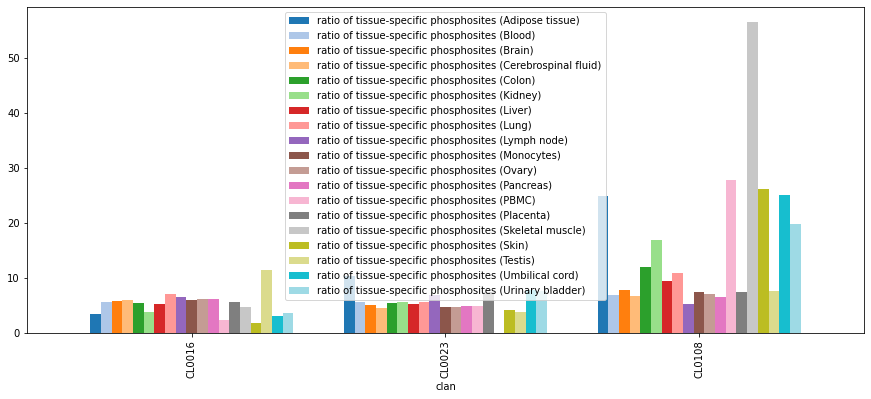

In [258]:
df_clan_gen_all[(df_clan_gen_all["ratio of tissue-specific phosphosites (Blood)"]>(df_clan_gen_all["ratio of tissue-specific phosphosites (Blood)"].mean()+df_clan_gen_all["ratio of tissue-specific phosphosites (Blood)"].std()))|
                 (df_clan_gen_all["ratio of tissue-specific phosphosites (Brain)"]>(df_clan_gen_all["ratio of tissue-specific phosphosites (Brain)"].mean()+df_clan_gen_all["ratio of tissue-specific phosphosites (Brain)"].std()))|
                 (df_clan_gen_all["ratio of tissue-specific phosphosites (Cerebrospinal fluid)"]>(df_clan_gen_all["ratio of tissue-specific phosphosites (Cerebrospinal fluid)"].mean()+df_clan_gen_all["ratio of tissue-specific phosphosites (Cerebrospinal fluid)"].std()))|
                 (df_clan_gen_all["ratio of tissue-specific phosphosites (Colon)"]>(df_clan_gen_all["ratio of tissue-specific phosphosites (Colon)"].mean()+df_clan_gen_all["ratio of tissue-specific phosphosites (Colon)"].std()))|
                  (df_clan_gen_all["ratio of tissue-specific phosphosites (Kidney)"]>(df_clan_gen_all["ratio of tissue-specific phosphosites (Kidney)"].mean()+df_clan_gen_all["ratio of tissue-specific phosphosites (Kidney)"].std()))|
                 (df_clan_gen_all["ratio of tissue-specific phosphosites (Liver)"]>(df_clan_gen_all["ratio of tissue-specific phosphosites (Liver)"].mean()+df_clan_gen_all["ratio of tissue-specific phosphosites (Liver)"].std()))|
                 (df_clan_gen_all["ratio of tissue-specific phosphosites (Lung)"]>(df_clan_gen_all["ratio of tissue-specific phosphosites (Lung)"].mean()+df_clan_gen_all["ratio of tissue-specific phosphosites (Lung)"].std()))|
                 (df_clan_gen_all["ratio of tissue-specific phosphosites (Lymph node)"]>(df_clan_gen_all["ratio of tissue-specific phosphosites (Lymph node)"].mean()+df_clan_gen_all["ratio of tissue-specific phosphosites (Lymph node)"].std()))|
                 (df_clan_gen_all["ratio of tissue-specific phosphosites (Monocytes)"]>(df_clan_gen_all["ratio of tissue-specific phosphosites (Monocytes)"].mean()+df_clan_gen_all["ratio of tissue-specific phosphosites (Monocytes)"].std()))|
                 (df_clan_gen_all["ratio of tissue-specific phosphosites (Ovary)"]>(df_clan_gen_all["ratio of tissue-specific phosphosites (Ovary)"].mean()+df_clan_gen_all["ratio of tissue-specific phosphosites (Ovary)"].std()))|
                 (df_clan_gen_all["ratio of tissue-specific phosphosites (Pancreas)"]>(df_clan_gen_all["ratio of tissue-specific phosphosites (Pancreas)"].mean()+df_clan_gen_all["ratio of tissue-specific phosphosites (Pancreas)"].std()))|
                 (df_clan_gen_all["ratio of tissue-specific phosphosites (PBMC)"]>(df_clan_gen_all["ratio of tissue-specific phosphosites (PBMC)"].mean()+df_clan_gen_all["ratio of tissue-specific phosphosites (PBMC)"].std()))|
                 (df_clan_gen_all["ratio of tissue-specific phosphosites (Placenta)"]>(df_clan_gen_all["ratio of tissue-specific phosphosites (Placenta)"].mean()+df_clan_gen_all["ratio of tissue-specific phosphosites (Placenta)"].std()))|
                  (df_clan_gen_all["ratio of tissue-specific phosphosites (Skeletal muscle)"]>(df_clan_gen_all["ratio of tissue-specific phosphosites (Skeletal muscle)"].mean()+df_clan_gen_all["ratio of tissue-specific phosphosites (Skeletal muscle)"].std()))|
                 (df_clan_gen_all["ratio of tissue-specific phosphosites (Skin)"]>(df_clan_gen_all["ratio of tissue-specific phosphosites (Skin)"].mean()+df_clan_gen_all["ratio of tissue-specific phosphosites (Skin)"].std()))|
                  (df_clan_gen_all["ratio of tissue-specific phosphosites (Testis)"]>(df_clan_gen_all["ratio of tissue-specific phosphosites (Testis)"].mean()+df_clan_gen_all["ratio of tissue-specific phosphosites (Testis)"].std()))|
                  (df_clan_gen_all["ratio of tissue-specific phosphosites (Umbilical cord)"]>(df_clan_gen_all["ratio of tissue-specific phosphosites (Umbilical cord)"].mean()+df_clan_gen_all["ratio of tissue-specific phosphosites (Umbilical cord)"].std()))|
                 (df_clan_gen_all["ratio of tissue-specific phosphosites (Urinary bladder)"]>(df_clan_gen_all["ratio of tissue-specific phosphosites (Urinary bladder)"].mean()+df_clan_gen_all["ratio of tissue-specific phosphosites (Urinary bladder)"].std()))].drop(["No_clan"]).plot(kind="bar", figsize=(15,6), colormap="tab20", width=0.8)

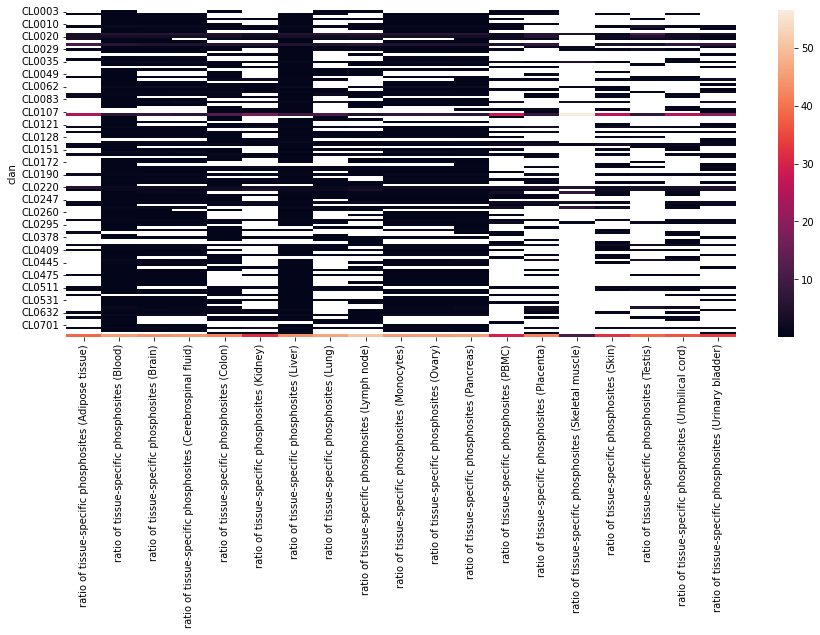

In [259]:
df_clan_gen_all.sort_values(["clan"], inplace=True)
plt.figure(figsize=(15,6))
sns.heatmap(df_clan_gen_all)
plt.show()

## 7.2 Domains

In [260]:
temp = tspec_sites_pfam.loc[tspec_sites_pfam["Adipose tissue"]==1, :].groupby(["hmm name", "ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"})
df_hmm_name_tspec_Adipose_tissue = temp.groupby(["hmm name"], as_index=False)["ACC_ID"].count()
df_hmm_name_tspec_Adipose_tissue.rename({"ACC_ID": "number of tissue-specific phosphosites (Adipose tissue)"}, inplace=True, axis=1)
df_hmm_name_tspec_Adipose_tissue["Total"] = tspec_sites_pfam.loc[tspec_sites_pfam["Adipose tissue"]==1, :].groupby(["ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"}).shape[0]
df_hmm_name_tspec_Adipose_tissue["ratio of tissue-specific phosphosites (Adipose tissue)"] = df_hmm_name_tspec_Adipose_tissue["number of tissue-specific phosphosites (Adipose tissue)"]*100/df_hmm_name_tspec_Adipose_tissue["Total"]
df_hmm_name_tspec_Adipose_tissue.drop(["number of tissue-specific phosphosites (Adipose tissue)", "Total"], axis=1, inplace=True)
df_hmm_name_tspec_Adipose_tissue.set_index(["hmm name"], inplace=True)
temp = tspec_sites_pfam.loc[tspec_sites_pfam["Blood"]==1, :].groupby(["hmm name", "ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"})
df_hmm_name_tspec_Blood = temp.groupby(["hmm name"], as_index=False)["ACC_ID"].count()
df_hmm_name_tspec_Blood.rename({"ACC_ID": "number of tissue-specific phosphosites (Blood)"}, inplace=True, axis=1)
df_hmm_name_tspec_Blood["Total"] = tspec_sites_pfam.loc[tspec_sites_pfam["Blood"]==1, :].groupby(["ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"}).shape[0]
df_hmm_name_tspec_Blood["ratio of tissue-specific phosphosites (Blood)"] = df_hmm_name_tspec_Blood["number of tissue-specific phosphosites (Blood)"]*100/df_hmm_name_tspec_Blood["Total"]
df_hmm_name_tspec_Blood.drop(["number of tissue-specific phosphosites (Blood)", "Total"], axis=1, inplace=True)
df_hmm_name_tspec_Blood.set_index(["hmm name"], inplace=True)
temp = tspec_sites_pfam.loc[tspec_sites_pfam["Brain"]==1, :].groupby(["hmm name", "ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"})
df_hmm_name_tspec_Brain = temp.groupby(["hmm name"], as_index=False)["ACC_ID"].count()
df_hmm_name_tspec_Brain.rename({"ACC_ID": "number of tissue-specific phosphosites (Brain)"}, inplace=True, axis=1)
df_hmm_name_tspec_Brain["Total"] = tspec_sites_pfam.loc[tspec_sites_pfam["Brain"]==1, :].groupby(["ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"}).shape[0]
df_hmm_name_tspec_Brain["ratio of tissue-specific phosphosites (Brain)"] = df_hmm_name_tspec_Brain["number of tissue-specific phosphosites (Brain)"]*100/df_hmm_name_tspec_Brain["Total"]
df_hmm_name_tspec_Brain.drop(["number of tissue-specific phosphosites (Brain)", "Total"], axis=1, inplace=True)
df_hmm_name_tspec_Brain.set_index(["hmm name"], inplace=True)
temp = tspec_sites_pfam.loc[tspec_sites_pfam["Cerebrospinal fluid"]==1, :].groupby(["hmm name", "ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"})
df_hmm_name_tspec_Cerebrospinal_fluid = temp.groupby(["hmm name"], as_index=False)["ACC_ID"].count()
df_hmm_name_tspec_Cerebrospinal_fluid.rename({"ACC_ID": "number of tissue-specific phosphosites (Cerebrospinal fluid)"}, inplace=True, axis=1)
df_hmm_name_tspec_Cerebrospinal_fluid["Total"] = tspec_sites_pfam.loc[tspec_sites_pfam["Cerebrospinal fluid"]==1, :].groupby(["ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"}).shape[0]
df_hmm_name_tspec_Cerebrospinal_fluid["ratio of tissue-specific phosphosites (Cerebrospinal fluid)"] = df_hmm_name_tspec_Cerebrospinal_fluid["number of tissue-specific phosphosites (Cerebrospinal fluid)"]*100/df_hmm_name_tspec_Cerebrospinal_fluid["Total"]
df_hmm_name_tspec_Cerebrospinal_fluid.drop(["number of tissue-specific phosphosites (Cerebrospinal fluid)", "Total"], axis=1, inplace=True)
df_hmm_name_tspec_Cerebrospinal_fluid.set_index(["hmm name"], inplace=True)
temp = tspec_sites_pfam.loc[tspec_sites_pfam["Colon"]==1, :].groupby(["hmm name", "ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"})
df_hmm_name_tspec_Colon = temp.groupby(["hmm name"], as_index=False)["ACC_ID"].count()
df_hmm_name_tspec_Colon.rename({"ACC_ID": "number of tissue-specific phosphosites (Colon)"}, inplace=True, axis=1)
df_hmm_name_tspec_Colon["Total"] = tspec_sites_pfam.loc[tspec_sites_pfam["Colon"]==1, :].groupby(["ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"}).shape[0]
df_hmm_name_tspec_Colon["ratio of tissue-specific phosphosites (Colon)"] = df_hmm_name_tspec_Colon["number of tissue-specific phosphosites (Colon)"]*100/df_hmm_name_tspec_Colon["Total"]
df_hmm_name_tspec_Colon.drop(["number of tissue-specific phosphosites (Colon)", "Total"], axis=1, inplace=True)
df_hmm_name_tspec_Colon.set_index(["hmm name"], inplace=True)
temp = tspec_sites_pfam.loc[tspec_sites_pfam["Kidney"]==1, :].groupby(["hmm name", "ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"})
df_hmm_name_tspec_Kidney = temp.groupby(["hmm name"], as_index=False)["ACC_ID"].count()
df_hmm_name_tspec_Kidney.rename({"ACC_ID": "number of tissue-specific phosphosites (Kidney)"}, inplace=True, axis=1)
df_hmm_name_tspec_Kidney["Total"] = tspec_sites_pfam.loc[tspec_sites_pfam["Kidney"]==1, :].groupby(["ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"}).shape[0]
df_hmm_name_tspec_Kidney["ratio of tissue-specific phosphosites (Kidney)"] = df_hmm_name_tspec_Kidney["number of tissue-specific phosphosites (Kidney)"]*100/df_hmm_name_tspec_Kidney["Total"]
df_hmm_name_tspec_Kidney.drop(["number of tissue-specific phosphosites (Kidney)", "Total"], axis=1, inplace=True)
df_hmm_name_tspec_Kidney.set_index(["hmm name"], inplace=True)
temp = tspec_sites_pfam.loc[tspec_sites_pfam["Liver"]==1, :].groupby(["hmm name", "ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"})
df_hmm_name_tspec_Liver = temp.groupby(["hmm name"], as_index=False)["ACC_ID"].count()
df_hmm_name_tspec_Liver.rename({"ACC_ID": "number of tissue-specific phosphosites (Liver)"}, inplace=True, axis=1)
df_hmm_name_tspec_Liver["Total"] = tspec_sites_pfam.loc[tspec_sites_pfam["Liver"]==1, :].groupby(["ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"}).shape[0]
df_hmm_name_tspec_Liver["ratio of tissue-specific phosphosites (Liver)"] = df_hmm_name_tspec_Liver["number of tissue-specific phosphosites (Liver)"]*100/df_hmm_name_tspec_Liver["Total"]
df_hmm_name_tspec_Liver.drop(["number of tissue-specific phosphosites (Liver)", "Total"], axis=1, inplace=True)
df_hmm_name_tspec_Liver.set_index(["hmm name"], inplace=True)
temp = tspec_sites_pfam.loc[tspec_sites_pfam["Lung"]==1, :].groupby(["hmm name", "ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"})
df_hmm_name_tspec_Lung = temp.groupby(["hmm name"], as_index=False)["ACC_ID"].count()
df_hmm_name_tspec_Lung.rename({"ACC_ID": "number of tissue-specific phosphosites (Lung)"}, inplace=True, axis=1)
df_hmm_name_tspec_Lung["Total"] = tspec_sites_pfam.loc[tspec_sites_pfam["Lung"]==1, :].groupby(["ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"}).shape[0]
df_hmm_name_tspec_Lung["ratio of tissue-specific phosphosites (Lung)"] = df_hmm_name_tspec_Lung["number of tissue-specific phosphosites (Lung)"]*100/df_hmm_name_tspec_Lung["Total"]
df_hmm_name_tspec_Lung.drop(["number of tissue-specific phosphosites (Lung)", "Total"], axis=1, inplace=True)
df_hmm_name_tspec_Lung.set_index(["hmm name"], inplace=True)
temp = tspec_sites_pfam.loc[tspec_sites_pfam["Lymph node"]==1, :].groupby(["hmm name", "ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"})
df_hmm_name_tspec_Lymph_node = temp.groupby(["hmm name"], as_index=False)["ACC_ID"].count()
df_hmm_name_tspec_Lymph_node.rename({"ACC_ID": "number of tissue-specific phosphosites (Lymph node)"}, inplace=True, axis=1)
df_hmm_name_tspec_Lymph_node["Total"] = tspec_sites_pfam.loc[tspec_sites_pfam["Lymph node"]==1, :].groupby(["ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"}).shape[0]
df_hmm_name_tspec_Lymph_node["ratio of tissue-specific phosphosites (Lymph node)"] = df_hmm_name_tspec_Lymph_node["number of tissue-specific phosphosites (Lymph node)"]*100/df_hmm_name_tspec_Lymph_node["Total"]
df_hmm_name_tspec_Lymph_node.drop(["number of tissue-specific phosphosites (Lymph node)", "Total"], axis=1, inplace=True)
df_hmm_name_tspec_Lymph_node.set_index(["hmm name"], inplace=True)
temp = tspec_sites_pfam.loc[tspec_sites_pfam["Monocytes"]==1, :].groupby(["hmm name", "ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"})
df_hmm_name_tspec_Monocytes = temp.groupby(["hmm name"], as_index=False)["ACC_ID"].count()
df_hmm_name_tspec_Monocytes.rename({"ACC_ID": "number of tissue-specific phosphosites (Monocytes)"}, inplace=True, axis=1)
df_hmm_name_tspec_Monocytes["Total"] = tspec_sites_pfam.loc[tspec_sites_pfam["Monocytes"]==1, :].groupby(["ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"}).shape[0]
df_hmm_name_tspec_Monocytes["ratio of tissue-specific phosphosites (Monocytes)"] = df_hmm_name_tspec_Monocytes["number of tissue-specific phosphosites (Monocytes)"]*100/df_hmm_name_tspec_Monocytes["Total"]
df_hmm_name_tspec_Monocytes.drop(["number of tissue-specific phosphosites (Monocytes)", "Total"], axis=1, inplace=True)
df_hmm_name_tspec_Monocytes.set_index(["hmm name"], inplace=True)
temp = tspec_sites_pfam.loc[tspec_sites_pfam["Ovary"]==1, :].groupby(["hmm name", "ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"})
df_hmm_name_tspec_Ovary = temp.groupby(["hmm name"], as_index=False)["ACC_ID"].count()
df_hmm_name_tspec_Ovary.rename({"ACC_ID": "number of tissue-specific phosphosites (Ovary)"}, inplace=True, axis=1)
df_hmm_name_tspec_Ovary["Total"] = tspec_sites_pfam.loc[tspec_sites_pfam["Ovary"]==1, :].groupby(["ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"}).shape[0]
df_hmm_name_tspec_Ovary["ratio of tissue-specific phosphosites (Ovary)"] = df_hmm_name_tspec_Ovary["number of tissue-specific phosphosites (Ovary)"]*100/df_hmm_name_tspec_Ovary["Total"]
df_hmm_name_tspec_Ovary.drop(["number of tissue-specific phosphosites (Ovary)", "Total"], axis=1, inplace=True)
df_hmm_name_tspec_Ovary.set_index(["hmm name"], inplace=True)
temp = tspec_sites_pfam.loc[tspec_sites_pfam["Pancreas"]==1, :].groupby(["hmm name", "ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"})
df_hmm_name_tspec_Pancreas = temp.groupby(["hmm name"], as_index=False)["ACC_ID"].count()
df_hmm_name_tspec_Pancreas.rename({"ACC_ID": "number of tissue-specific phosphosites (Pancreas)"}, inplace=True, axis=1)
df_hmm_name_tspec_Pancreas["Total"] = tspec_sites_pfam.loc[tspec_sites_pfam["Pancreas"]==1, :].groupby(["ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"}).shape[0]
df_hmm_name_tspec_Pancreas["ratio of tissue-specific phosphosites (Pancreas)"] = df_hmm_name_tspec_Pancreas["number of tissue-specific phosphosites (Pancreas)"]*100/df_hmm_name_tspec_Pancreas["Total"]
df_hmm_name_tspec_Pancreas.drop(["number of tissue-specific phosphosites (Pancreas)", "Total"], axis=1, inplace=True)
df_hmm_name_tspec_Pancreas.set_index(["hmm name"], inplace=True)
temp = tspec_sites_pfam.loc[tspec_sites_pfam["PBMC"]==1, :].groupby(["hmm name", "ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"})
df_hmm_name_tspec_PBMC = temp.groupby(["hmm name"], as_index=False)["ACC_ID"].count()
df_hmm_name_tspec_PBMC.rename({"ACC_ID": "number of tissue-specific phosphosites (PBMC)"}, inplace=True, axis=1)
df_hmm_name_tspec_PBMC["Total"] = tspec_sites_pfam.loc[tspec_sites_pfam["PBMC"]==1, :].groupby(["ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"}).shape[0]
df_hmm_name_tspec_PBMC["ratio of tissue-specific phosphosites (PBMC)"] = df_hmm_name_tspec_PBMC["number of tissue-specific phosphosites (PBMC)"]*100/df_hmm_name_tspec_PBMC["Total"]
df_hmm_name_tspec_PBMC.drop(["number of tissue-specific phosphosites (PBMC)", "Total"], axis=1, inplace=True)
df_hmm_name_tspec_PBMC.set_index(["hmm name"], inplace=True)
temp = tspec_sites_pfam.loc[tspec_sites_pfam["Placenta"]==1, :].groupby(["hmm name", "ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"})
df_hmm_name_tspec_Placenta = temp.groupby(["hmm name"], as_index=False)["ACC_ID"].count()
df_hmm_name_tspec_Placenta.rename({"ACC_ID": "number of tissue-specific phosphosites (Placenta)"}, inplace=True, axis=1)
df_hmm_name_tspec_Placenta["Total"] = tspec_sites_pfam.loc[tspec_sites_pfam["Placenta"]==1, :].groupby(["ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"}).shape[0]
df_hmm_name_tspec_Placenta["ratio of tissue-specific phosphosites (Placenta)"] = df_hmm_name_tspec_Placenta["number of tissue-specific phosphosites (Placenta)"]*100/df_hmm_name_tspec_Placenta["Total"]
df_hmm_name_tspec_Placenta.drop(["number of tissue-specific phosphosites (Placenta)", "Total"], axis=1, inplace=True)
df_hmm_name_tspec_Placenta.set_index(["hmm name"], inplace=True)
temp = tspec_sites_pfam.loc[tspec_sites_pfam["Skeletal muscle"]==1, :].groupby(["hmm name", "ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"})
df_hmm_name_tspec_Skeletal_muscle = temp.groupby(["hmm name"], as_index=False)["ACC_ID"].count()
df_hmm_name_tspec_Skeletal_muscle.rename({"ACC_ID": "number of tissue-specific phosphosites (Skeletal muscle)"}, inplace=True, axis=1)
df_hmm_name_tspec_Skeletal_muscle["Total"] = tspec_sites_pfam.loc[tspec_sites_pfam["Skeletal muscle"]==1, :].groupby(["ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"}).shape[0]
df_hmm_name_tspec_Skeletal_muscle["ratio of tissue-specific phosphosites (Skeletal muscle)"] = df_hmm_name_tspec_Skeletal_muscle["number of tissue-specific phosphosites (Skeletal muscle)"]*100/df_hmm_name_tspec_Skeletal_muscle["Total"]
df_hmm_name_tspec_Skeletal_muscle.drop(["number of tissue-specific phosphosites (Skeletal muscle)", "Total"], axis=1, inplace=True)
df_hmm_name_tspec_Skeletal_muscle.set_index(["hmm name"], inplace=True)
temp = tspec_sites_pfam.loc[tspec_sites_pfam["Skin"]==1, :].groupby(["hmm name", "ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"})
df_hmm_name_tspec_Skin = temp.groupby(["hmm name"], as_index=False)["ACC_ID"].count()
df_hmm_name_tspec_Skin.rename({"ACC_ID": "number of tissue-specific phosphosites (Skin)"}, inplace=True, axis=1)
df_hmm_name_tspec_Skin["Total"] = tspec_sites_pfam.loc[tspec_sites_pfam["Skin"]==1, :].groupby(["ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"}).shape[0]
df_hmm_name_tspec_Skin["ratio of tissue-specific phosphosites (Skin)"] = df_hmm_name_tspec_Skin["number of tissue-specific phosphosites (Skin)"]*100/df_hmm_name_tspec_Skin["Total"]
df_hmm_name_tspec_Skin.drop(["number of tissue-specific phosphosites (Skin)", "Total"], axis=1, inplace=True)
df_hmm_name_tspec_Skin.set_index(["hmm name"], inplace=True)
temp = tspec_sites_pfam.loc[tspec_sites_pfam["Testis"]==1, :].groupby(["hmm name", "ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"})
df_hmm_name_tspec_Testis = temp.groupby(["hmm name"], as_index=False)["ACC_ID"].count()
df_hmm_name_tspec_Testis.rename({"ACC_ID": "number of tissue-specific phosphosites (Testis)"}, inplace=True, axis=1)
df_hmm_name_tspec_Testis["Total"] = tspec_sites_pfam.loc[tspec_sites_pfam["Testis"]==1, :].groupby(["ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"}).shape[0]
df_hmm_name_tspec_Testis["ratio of tissue-specific phosphosites (Testis)"] = df_hmm_name_tspec_Testis["number of tissue-specific phosphosites (Testis)"]*100/df_hmm_name_tspec_Testis["Total"]
df_hmm_name_tspec_Testis.drop(["number of tissue-specific phosphosites (Testis)", "Total"], axis=1, inplace=True)
df_hmm_name_tspec_Testis.set_index(["hmm name"], inplace=True)
temp = tspec_sites_pfam.loc[tspec_sites_pfam["Placenta"]==1, :].groupby(["hmm name", "ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"})
df_hmm_name_tspec_Placenta = temp.groupby(["hmm name"], as_index=False)["ACC_ID"].count()
df_hmm_name_tspec_Placenta.rename({"ACC_ID": "number of tissue-specific phosphosites (Placenta)"}, inplace=True, axis=1)
df_hmm_name_tspec_Placenta["Total"] = tspec_sites_pfam.loc[tspec_sites_pfam["Placenta"]==1, :].groupby(["ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"}).shape[0]
df_hmm_name_tspec_Placenta["ratio of tissue-specific phosphosites (Placenta)"] = df_hmm_name_tspec_Placenta["number of tissue-specific phosphosites (Placenta)"]*100/df_hmm_name_tspec_Placenta["Total"]
df_hmm_name_tspec_Placenta.drop(["number of tissue-specific phosphosites (Placenta)", "Total"], axis=1, inplace=True)
df_hmm_name_tspec_Placenta.set_index(["hmm name"], inplace=True)
temp = tspec_sites_pfam.loc[tspec_sites_pfam["Umbilical cord"]==1, :].groupby(["hmm name", "ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"})
df_hmm_name_tspec_Umbilical_cord = temp.groupby(["hmm name"], as_index=False)["ACC_ID"].count()
df_hmm_name_tspec_Umbilical_cord.rename({"ACC_ID": "number of tissue-specific phosphosites (Umbilical cord)"}, inplace=True, axis=1)
df_hmm_name_tspec_Umbilical_cord["Total"] = tspec_sites_pfam.loc[tspec_sites_pfam["Umbilical cord"]==1, :].groupby(["ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"}).shape[0]
df_hmm_name_tspec_Umbilical_cord["ratio of tissue-specific phosphosites (Umbilical cord)"] = df_hmm_name_tspec_Umbilical_cord["number of tissue-specific phosphosites (Umbilical cord)"]*100/df_hmm_name_tspec_Umbilical_cord["Total"]
df_hmm_name_tspec_Umbilical_cord.drop(["number of tissue-specific phosphosites (Umbilical cord)", "Total"], axis=1, inplace=True)
df_hmm_name_tspec_Umbilical_cord.set_index(["hmm name"], inplace=True)
temp = tspec_sites_pfam.loc[tspec_sites_pfam["Urinary bladder"]==1, :].groupby(["hmm name", "ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"})
df_hmm_name_tspec_Urinary_bladder = temp.groupby(["hmm name"], as_index=False)["ACC_ID"].count()
df_hmm_name_tspec_Urinary_bladder.rename({"ACC_ID": "number of tissue-specific phosphosites (Urinary bladder)"}, inplace=True, axis=1)
df_hmm_name_tspec_Urinary_bladder["Total"] = tspec_sites_pfam.loc[tspec_sites_pfam["Urinary bladder"]==1, :].groupby(["ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"}).shape[0]
df_hmm_name_tspec_Urinary_bladder["ratio of tissue-specific phosphosites (Urinary bladder)"] = df_hmm_name_tspec_Urinary_bladder["number of tissue-specific phosphosites (Urinary bladder)"]*100/df_hmm_name_tspec_Urinary_bladder["Total"]
df_hmm_name_tspec_Urinary_bladder.drop(["number of tissue-specific phosphosites (Urinary bladder)", "Total"], axis=1, inplace=True)
df_hmm_name_tspec_Urinary_bladder.set_index(["hmm name"], inplace=True)

In [261]:
df_hmm_name_tspec_all = pd.concat([df_hmm_name_tspec_Adipose_tissue, df_hmm_name_tspec_Blood, df_hmm_name_tspec_Brain,
                               df_hmm_name_tspec_Cerebrospinal_fluid, df_hmm_name_tspec_Colon, df_hmm_name_tspec_Kidney,
                               df_hmm_name_tspec_Liver, df_hmm_name_tspec_Lung, df_hmm_name_tspec_Lymph_node, df_hmm_name_tspec_Monocytes,
                               df_hmm_name_tspec_Ovary, df_hmm_name_tspec_Pancreas, df_hmm_name_tspec_PBMC, df_hmm_name_tspec_Placenta,
                               df_hmm_name_tspec_Skeletal_muscle, df_hmm_name_tspec_Skin, df_hmm_name_tspec_Testis,
                              df_hmm_name_tspec_Umbilical_cord, df_hmm_name_tspec_Urinary_bladder], axis=1)
df_hmm_name_tspec_all.dropna(axis=1, how="all", inplace=True)
df_hmm_name_tspec_all

ratio of tissue-specific phosphosites (Blood)  \
hmm name                                                         
4_1_CTD                                               0.268817   
A2M                                                   0.806452   
A2M_BRD                                               1.612903   
A2M_recep                                             0.806452   
AAA                                                   0.806452   
...                                                        ...   
WD40_4                                                     NaN   
DUF1075                                                    NaN   
PRT6_C                                                     NaN   
Sacchrp_dh_C                                               NaN   
Sacchrp_dh_NADP                                            NaN   

                 ratio of tissue-specific phosphosites (Brain)  \
hmm name                                                         
4_1_CTD                                                    NaN   
A2M                                                        NaN   
A2M_BRD                                                    NaN   
A2M_recep                                                  NaN   
AAA                                                        NaN   
...                                                        ...   
WD40_4                                                     NaN   
DUF1075                                                    NaN   
PRT6_C                                                     NaN   
Sacchrp_dh_C                                               NaN   
Sacchrp_dh_NADP                                            NaN   

                 ratio of tissue-specific phosphosites (Cerebrospinal fluid)  \
hmm name                                                                       
4_1_CTD                                                        NaN             
A2M                                                            NaN             
A2M_BRD                                                        NaN             
A2M_recep                                                      NaN             
AAA                                                            NaN             
...                                                            ...             
WD40_4                                                         NaN             
DUF1075                                                        NaN             
PRT6_C                                                         NaN             
Sacchrp_dh_C                                                   NaN             
Sacchrp_dh_NADP                                                NaN             

                 ratio of tissue-specific phosphosites (Colon)  \
hmm name                                                         
4_1_CTD                                               0.274725   
A2M                                                        NaN   
A2M_BRD                                                    NaN   
A2M_recep                                                  NaN   
AAA                                                   0.549451   
...                                                        ...   
WD40_4                                                     NaN   
DUF1075                                                    NaN   
PRT6_C                                                     NaN   
Sacchrp_dh_C                                               NaN   
Sacchrp_dh_NADP                                            NaN   

                 ratio of tissue-specific phosphosites (Kidney)  \
hmm name                                                          
4_1_CTD                                                     NaN   
A2M                                                         NaN   
A2M_BRD                                                     NaN   
A2M_recep                                                   NaN 

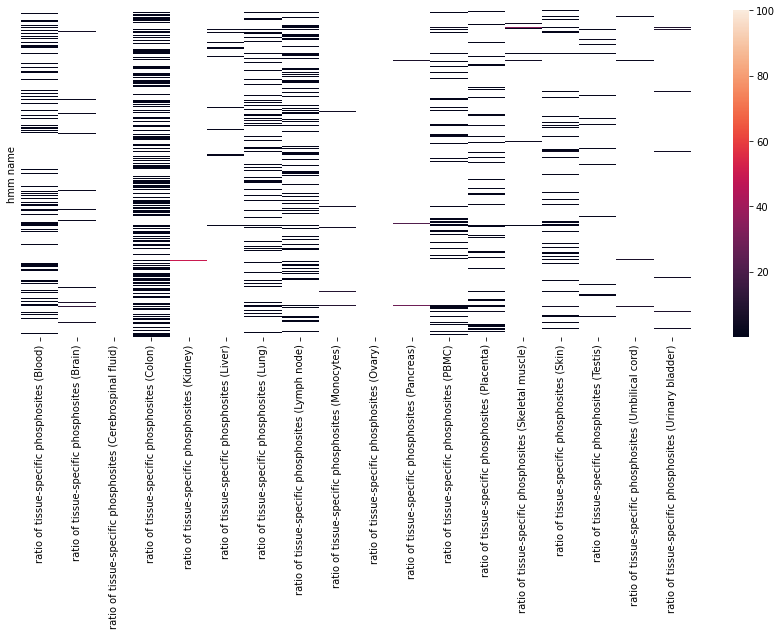

In [262]:
df_hmm_name_tspec_all.sort_values(["hmm name"], inplace=True)
plt.figure(figsize=(15,6))
sns.heatmap(df_hmm_name_tspec_all, xticklabels=True)
plt.yticks([],[])
plt.show()

In [263]:
temp = taspec_sites_pfam.loc[taspec_sites_pfam["Adipose tissue"]==1, :].groupby(["hmm name", "ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"})
df_hmm_name_taspec_Adipose_tissue = temp.groupby(["hmm name"], as_index=False)["ACC_ID"].count()
df_hmm_name_taspec_Adipose_tissue.rename({"ACC_ID": "number of tissue-specific phosphosites (Adipose tissue)"}, inplace=True, axis=1)
df_hmm_name_taspec_Adipose_tissue["Total"] = taspec_sites_pfam.loc[taspec_sites_pfam["Adipose tissue"]==1, :].groupby(["ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"}).shape[0]
df_hmm_name_taspec_Adipose_tissue["ratio of tissue-specific phosphosites (Adipose tissue)"] = df_hmm_name_taspec_Adipose_tissue["number of tissue-specific phosphosites (Adipose tissue)"]*100/df_hmm_name_taspec_Adipose_tissue["Total"]
df_hmm_name_taspec_Adipose_tissue.drop(["number of tissue-specific phosphosites (Adipose tissue)", "Total"], axis=1, inplace=True)
df_hmm_name_taspec_Adipose_tissue.set_index(["hmm name"], inplace=True)
temp = taspec_sites_pfam.loc[taspec_sites_pfam["Blood"]==1, :].groupby(["hmm name", "ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"})
df_hmm_name_taspec_Blood = temp.groupby(["hmm name"], as_index=False)["ACC_ID"].count()
df_hmm_name_taspec_Blood.rename({"ACC_ID": "number of tissue-specific phosphosites (Blood)"}, inplace=True, axis=1)
df_hmm_name_taspec_Blood["Total"] = taspec_sites_pfam.loc[taspec_sites_pfam["Blood"]==1, :].groupby(["ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"}).shape[0]
df_hmm_name_taspec_Blood["ratio of tissue-specific phosphosites (Blood)"] = df_hmm_name_taspec_Blood["number of tissue-specific phosphosites (Blood)"]*100/df_hmm_name_taspec_Blood["Total"]
df_hmm_name_taspec_Blood.drop(["number of tissue-specific phosphosites (Blood)", "Total"], axis=1, inplace=True)
df_hmm_name_taspec_Blood.set_index(["hmm name"], inplace=True)
temp = taspec_sites_pfam.loc[taspec_sites_pfam["Brain"]==1, :].groupby(["hmm name", "ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"})
df_hmm_name_taspec_Brain = temp.groupby(["hmm name"], as_index=False)["ACC_ID"].count()
df_hmm_name_taspec_Brain.rename({"ACC_ID": "number of tissue-specific phosphosites (Brain)"}, inplace=True, axis=1)
df_hmm_name_taspec_Brain["Total"] = taspec_sites_pfam.loc[taspec_sites_pfam["Brain"]==1, :].groupby(["ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"}).shape[0]
df_hmm_name_taspec_Brain["ratio of tissue-specific phosphosites (Brain)"] = df_hmm_name_taspec_Brain["number of tissue-specific phosphosites (Brain)"]*100/df_hmm_name_taspec_Brain["Total"]
df_hmm_name_taspec_Brain.drop(["number of tissue-specific phosphosites (Brain)", "Total"], axis=1, inplace=True)
df_hmm_name_taspec_Brain.set_index(["hmm name"], inplace=True)
temp = taspec_sites_pfam.loc[taspec_sites_pfam["Cerebrospinal fluid"]==1, :].groupby(["hmm name", "ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"})
df_hmm_name_taspec_Cerebrospinal_fluid = temp.groupby(["hmm name"], as_index=False)["ACC_ID"].count()
df_hmm_name_taspec_Cerebrospinal_fluid.rename({"ACC_ID": "number of tissue-specific phosphosites (Cerebrospinal fluid)"}, inplace=True, axis=1)
df_hmm_name_taspec_Cerebrospinal_fluid["Total"] = taspec_sites_pfam.loc[taspec_sites_pfam["Cerebrospinal fluid"]==1, :].groupby(["ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"}).shape[0]
df_hmm_name_taspec_Cerebrospinal_fluid["ratio of tissue-specific phosphosites (Cerebrospinal fluid)"] = df_hmm_name_taspec_Cerebrospinal_fluid["number of tissue-specific phosphosites (Cerebrospinal fluid)"]*100/df_hmm_name_taspec_Cerebrospinal_fluid["Total"]
df_hmm_name_taspec_Cerebrospinal_fluid.drop(["number of tissue-specific phosphosites (Cerebrospinal fluid)", "Total"], axis=1, inplace=True)
df_hmm_name_taspec_Cerebrospinal_fluid.set_index(["hmm name"], inplace=True)
temp = taspec_sites_pfam.loc[taspec_sites_pfam["Colon"]==1, :].groupby(["hmm name", "ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"})
df_hmm_name_taspec_Colon = temp.groupby(["hmm name"], as_index=False)["ACC_ID"].count()
df_hmm_name_taspec_Colon.rename({"ACC_ID": "number of tissue-specific phosphosites (Colon)"}, inplace=True, axis=1)
df_hmm_name_taspec_Colon["Total"] = taspec_sites_pfam.loc[taspec_sites_pfam["Colon"]==1, :].groupby(["ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"}).shape[0]
df_hmm_name_taspec_Colon["ratio of tissue-specific phosphosites (Colon)"] = df_hmm_name_taspec_Colon["number of tissue-specific phosphosites (Colon)"]*100/df_hmm_name_taspec_Colon["Total"]
df_hmm_name_taspec_Colon.drop(["number of tissue-specific phosphosites (Colon)", "Total"], axis=1, inplace=True)
df_hmm_name_taspec_Colon.set_index(["hmm name"], inplace=True)
temp = taspec_sites_pfam.loc[taspec_sites_pfam["Kidney"]==1, :].groupby(["hmm name", "ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"})
df_hmm_name_taspec_Kidney = temp.groupby(["hmm name"], as_index=False)["ACC_ID"].count()
df_hmm_name_taspec_Kidney.rename({"ACC_ID": "number of tissue-specific phosphosites (Kidney)"}, inplace=True, axis=1)
df_hmm_name_taspec_Kidney["Total"] = taspec_sites_pfam.loc[taspec_sites_pfam["Kidney"]==1, :].groupby(["ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"}).shape[0]
df_hmm_name_taspec_Kidney["ratio of tissue-specific phosphosites (Kidney)"] = df_hmm_name_taspec_Kidney["number of tissue-specific phosphosites (Kidney)"]*100/df_hmm_name_taspec_Kidney["Total"]
df_hmm_name_taspec_Kidney.drop(["number of tissue-specific phosphosites (Kidney)", "Total"], axis=1, inplace=True)
df_hmm_name_taspec_Kidney.set_index(["hmm name"], inplace=True)
temp = taspec_sites_pfam.loc[taspec_sites_pfam["Liver"]==1, :].groupby(["hmm name", "ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"})
df_hmm_name_taspec_Liver = temp.groupby(["hmm name"], as_index=False)["ACC_ID"].count()
df_hmm_name_taspec_Liver.rename({"ACC_ID": "number of tissue-specific phosphosites (Liver)"}, inplace=True, axis=1)
df_hmm_name_taspec_Liver["Total"] = taspec_sites_pfam.loc[taspec_sites_pfam["Liver"]==1, :].groupby(["ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"}).shape[0]
df_hmm_name_taspec_Liver["ratio of tissue-specific phosphosites (Liver)"] = df_hmm_name_taspec_Liver["number of tissue-specific phosphosites (Liver)"]*100/df_hmm_name_taspec_Liver["Total"]
df_hmm_name_taspec_Liver.drop(["number of tissue-specific phosphosites (Liver)", "Total"], axis=1, inplace=True)
df_hmm_name_taspec_Liver.set_index(["hmm name"], inplace=True)
temp = taspec_sites_pfam.loc[taspec_sites_pfam["Lung"]==1, :].groupby(["hmm name", "ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"})
df_hmm_name_taspec_Lung = temp.groupby(["hmm name"], as_index=False)["ACC_ID"].count()
df_hmm_name_taspec_Lung.rename({"ACC_ID": "number of tissue-specific phosphosites (Lung)"}, inplace=True, axis=1)
df_hmm_name_taspec_Lung["Total"] = taspec_sites_pfam.loc[taspec_sites_pfam["Lung"]==1, :].groupby(["ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"}).shape[0]
df_hmm_name_taspec_Lung["ratio of tissue-specific phosphosites (Lung)"] = df_hmm_name_taspec_Lung["number of tissue-specific phosphosites (Lung)"]*100/df_hmm_name_taspec_Lung["Total"]
df_hmm_name_taspec_Lung.drop(["number of tissue-specific phosphosites (Lung)", "Total"], axis=1, inplace=True)
df_hmm_name_taspec_Lung.set_index(["hmm name"], inplace=True)
temp = taspec_sites_pfam.loc[taspec_sites_pfam["Lymph node"]==1, :].groupby(["hmm name", "ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"})
df_hmm_name_taspec_Lymph_node = temp.groupby(["hmm name"], as_index=False)["ACC_ID"].count()
df_hmm_name_taspec_Lymph_node.rename({"ACC_ID": "number of tissue-specific phosphosites (Lymph node)"}, inplace=True, axis=1)
df_hmm_name_taspec_Lymph_node["Total"] = taspec_sites_pfam.loc[taspec_sites_pfam["Lymph node"]==1, :].groupby(["ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"}).shape[0]
df_hmm_name_taspec_Lymph_node["ratio of tissue-specific phosphosites (Lymph node)"] = df_hmm_name_taspec_Lymph_node["number of tissue-specific phosphosites (Lymph node)"]*100/df_hmm_name_taspec_Lymph_node["Total"]
df_hmm_name_taspec_Lymph_node.drop(["number of tissue-specific phosphosites (Lymph node)", "Total"], axis=1, inplace=True)
df_hmm_name_taspec_Lymph_node.set_index(["hmm name"], inplace=True)
temp = taspec_sites_pfam.loc[taspec_sites_pfam["Monocytes"]==1, :].groupby(["hmm name", "ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"})
df_hmm_name_taspec_Monocytes = temp.groupby(["hmm name"], as_index=False)["ACC_ID"].count()
df_hmm_name_taspec_Monocytes.rename({"ACC_ID": "number of tissue-specific phosphosites (Monocytes)"}, inplace=True, axis=1)
df_hmm_name_taspec_Monocytes["Total"] = taspec_sites_pfam.loc[taspec_sites_pfam["Monocytes"]==1, :].groupby(["ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"}).shape[0]
df_hmm_name_taspec_Monocytes["ratio of tissue-specific phosphosites (Monocytes)"] = df_hmm_name_taspec_Monocytes["number of tissue-specific phosphosites (Monocytes)"]*100/df_hmm_name_taspec_Monocytes["Total"]
df_hmm_name_taspec_Monocytes.drop(["number of tissue-specific phosphosites (Monocytes)", "Total"], axis=1, inplace=True)
df_hmm_name_taspec_Monocytes.set_index(["hmm name"], inplace=True)
temp = taspec_sites_pfam.loc[taspec_sites_pfam["Ovary"]==1, :].groupby(["hmm name", "ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"})
df_hmm_name_taspec_Ovary = temp.groupby(["hmm name"], as_index=False)["ACC_ID"].count()
df_hmm_name_taspec_Ovary.rename({"ACC_ID": "number of tissue-specific phosphosites (Ovary)"}, inplace=True, axis=1)
df_hmm_name_taspec_Ovary["Total"] = taspec_sites_pfam.loc[taspec_sites_pfam["Ovary"]==1, :].groupby(["ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"}).shape[0]
df_hmm_name_taspec_Ovary["ratio of tissue-specific phosphosites (Ovary)"] = df_hmm_name_taspec_Ovary["number of tissue-specific phosphosites (Ovary)"]*100/df_hmm_name_taspec_Ovary["Total"]
df_hmm_name_taspec_Ovary.drop(["number of tissue-specific phosphosites (Ovary)", "Total"], axis=1, inplace=True)
df_hmm_name_taspec_Ovary.set_index(["hmm name"], inplace=True)
temp = taspec_sites_pfam.loc[taspec_sites_pfam["Pancreas"]==1, :].groupby(["hmm name", "ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"})
df_hmm_name_taspec_Pancreas = temp.groupby(["hmm name"], as_index=False)["ACC_ID"].count()
df_hmm_name_taspec_Pancreas.rename({"ACC_ID": "number of tissue-specific phosphosites (Pancreas)"}, inplace=True, axis=1)
df_hmm_name_taspec_Pancreas["Total"] = taspec_sites_pfam.loc[taspec_sites_pfam["Pancreas"]==1, :].groupby(["ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"}).shape[0]
df_hmm_name_taspec_Pancreas["ratio of tissue-specific phosphosites (Pancreas)"] = df_hmm_name_taspec_Pancreas["number of tissue-specific phosphosites (Pancreas)"]*100/df_hmm_name_taspec_Pancreas["Total"]
df_hmm_name_taspec_Pancreas.drop(["number of tissue-specific phosphosites (Pancreas)", "Total"], axis=1, inplace=True)
df_hmm_name_taspec_Pancreas.set_index(["hmm name"], inplace=True)
temp = taspec_sites_pfam.loc[taspec_sites_pfam["PBMC"]==1, :].groupby(["hmm name", "ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"})
df_hmm_name_taspec_PBMC = temp.groupby(["hmm name"], as_index=False)["ACC_ID"].count()
df_hmm_name_taspec_PBMC.rename({"ACC_ID": "number of tissue-specific phosphosites (PBMC)"}, inplace=True, axis=1)
df_hmm_name_taspec_PBMC["Total"] = taspec_sites_pfam.loc[taspec_sites_pfam["PBMC"]==1, :].groupby(["ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"}).shape[0]
df_hmm_name_taspec_PBMC["ratio of tissue-specific phosphosites (PBMC)"] = df_hmm_name_taspec_PBMC["number of tissue-specific phosphosites (PBMC)"]*100/df_hmm_name_taspec_PBMC["Total"]
df_hmm_name_taspec_PBMC.drop(["number of tissue-specific phosphosites (PBMC)", "Total"], axis=1, inplace=True)
df_hmm_name_taspec_PBMC.set_index(["hmm name"], inplace=True)
temp = taspec_sites_pfam.loc[taspec_sites_pfam["Placenta"]==1, :].groupby(["hmm name", "ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"})
df_hmm_name_taspec_Placenta = temp.groupby(["hmm name"], as_index=False)["ACC_ID"].count()
df_hmm_name_taspec_Placenta.rename({"ACC_ID": "number of tissue-specific phosphosites (Placenta)"}, inplace=True, axis=1)
df_hmm_name_taspec_Placenta["Total"] = taspec_sites_pfam.loc[taspec_sites_pfam["Placenta"]==1, :].groupby(["ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"}).shape[0]
df_hmm_name_taspec_Placenta["ratio of tissue-specific phosphosites (Placenta)"] = df_hmm_name_taspec_Placenta["number of tissue-specific phosphosites (Placenta)"]*100/df_hmm_name_taspec_Placenta["Total"]
df_hmm_name_taspec_Placenta.drop(["number of tissue-specific phosphosites (Placenta)", "Total"], axis=1, inplace=True)
df_hmm_name_taspec_Placenta.set_index(["hmm name"], inplace=True)
temp = taspec_sites_pfam.loc[taspec_sites_pfam["Skeletal muscle"]==1, :].groupby(["hmm name", "ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"})
df_hmm_name_taspec_Skeletal_muscle = temp.groupby(["hmm name"], as_index=False)["ACC_ID"].count()
df_hmm_name_taspec_Skeletal_muscle.rename({"ACC_ID": "number of tissue-specific phosphosites (Skeletal muscle)"}, inplace=True, axis=1)
df_hmm_name_taspec_Skeletal_muscle["Total"] = taspec_sites_pfam.loc[taspec_sites_pfam["Skeletal muscle"]==1, :].groupby(["ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"}).shape[0]
df_hmm_name_taspec_Skeletal_muscle["ratio of tissue-specific phosphosites (Skeletal muscle)"] = df_hmm_name_taspec_Skeletal_muscle["number of tissue-specific phosphosites (Skeletal muscle)"]*100/df_hmm_name_taspec_Skeletal_muscle["Total"]
df_hmm_name_taspec_Skeletal_muscle.drop(["number of tissue-specific phosphosites (Skeletal muscle)", "Total"], axis=1, inplace=True)
df_hmm_name_taspec_Skeletal_muscle.set_index(["hmm name"], inplace=True)
temp = taspec_sites_pfam.loc[taspec_sites_pfam["Skin"]==1, :].groupby(["hmm name", "ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"})
df_hmm_name_taspec_Skin = temp.groupby(["hmm name"], as_index=False)["ACC_ID"].count()
df_hmm_name_taspec_Skin.rename({"ACC_ID": "number of tissue-specific phosphosites (Skin)"}, inplace=True, axis=1)
df_hmm_name_taspec_Skin["Total"] = taspec_sites_pfam.loc[taspec_sites_pfam["Skin"]==1, :].groupby(["ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"}).shape[0]
df_hmm_name_taspec_Skin["ratio of tissue-specific phosphosites (Skin)"] = df_hmm_name_taspec_Skin["number of tissue-specific phosphosites (Skin)"]*100/df_hmm_name_taspec_Skin["Total"]
df_hmm_name_taspec_Skin.drop(["number of tissue-specific phosphosites (Skin)", "Total"], axis=1, inplace=True)
df_hmm_name_taspec_Skin.set_index(["hmm name"], inplace=True)
temp = taspec_sites_pfam.loc[taspec_sites_pfam["Testis"]==1, :].groupby(["hmm name", "ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"})
df_hmm_name_taspec_Testis = temp.groupby(["hmm name"], as_index=False)["ACC_ID"].count()
df_hmm_name_taspec_Testis.rename({"ACC_ID": "number of tissue-specific phosphosites (Testis)"}, inplace=True, axis=1)
df_hmm_name_taspec_Testis["Total"] = taspec_sites_pfam.loc[taspec_sites_pfam["Testis"]==1, :].groupby(["ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"}).shape[0]
df_hmm_name_taspec_Testis["ratio of tissue-specific phosphosites (Testis)"] = df_hmm_name_taspec_Testis["number of tissue-specific phosphosites (Testis)"]*100/df_hmm_name_taspec_Testis["Total"]
df_hmm_name_taspec_Testis.drop(["number of tissue-specific phosphosites (Testis)", "Total"], axis=1, inplace=True)
df_hmm_name_taspec_Testis.set_index(["hmm name"], inplace=True)
temp = taspec_sites_pfam.loc[taspec_sites_pfam["Placenta"]==1, :].groupby(["hmm name", "ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"})
df_hmm_name_taspec_Placenta = temp.groupby(["hmm name"], as_index=False)["ACC_ID"].count()
df_hmm_name_taspec_Placenta.rename({"ACC_ID": "number of tissue-specific phosphosites (Placenta)"}, inplace=True, axis=1)
df_hmm_name_taspec_Placenta["Total"] = taspec_sites_pfam.loc[taspec_sites_pfam["Placenta"]==1, :].groupby(["ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"}).shape[0]
df_hmm_name_taspec_Placenta["ratio of tissue-specific phosphosites (Placenta)"] = df_hmm_name_taspec_Placenta["number of tissue-specific phosphosites (Placenta)"]*100/df_hmm_name_taspec_Placenta["Total"]
df_hmm_name_taspec_Placenta.drop(["number of tissue-specific phosphosites (Placenta)", "Total"], axis=1, inplace=True)
df_hmm_name_taspec_Placenta.set_index(["hmm name"], inplace=True)
temp = taspec_sites_pfam.loc[taspec_sites_pfam["Umbilical cord"]==1, :].groupby(["hmm name", "ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"})
df_hmm_name_taspec_Umbilical_cord = temp.groupby(["hmm name"], as_index=False)["ACC_ID"].count()
df_hmm_name_taspec_Umbilical_cord.rename({"ACC_ID": "number of tissue-specific phosphosites (Umbilical cord)"}, inplace=True, axis=1)
df_hmm_name_taspec_Umbilical_cord["Total"] = taspec_sites_pfam.loc[taspec_sites_pfam["Umbilical cord"]==1, :].groupby(["ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"}).shape[0]
df_hmm_name_taspec_Umbilical_cord["ratio of tissue-specific phosphosites (Umbilical cord)"] = df_hmm_name_taspec_Umbilical_cord["number of tissue-specific phosphosites (Umbilical cord)"]*100/df_hmm_name_taspec_Umbilical_cord["Total"]
df_hmm_name_taspec_Umbilical_cord.drop(["number of tissue-specific phosphosites (Umbilical cord)", "Total"], axis=1, inplace=True)
df_hmm_name_taspec_Umbilical_cord.set_index(["hmm name"], inplace=True)
temp = taspec_sites_pfam.loc[taspec_sites_pfam["Urinary bladder"]==1, :].groupby(["hmm name", "ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"})
df_hmm_name_taspec_Urinary_bladder = temp.groupby(["hmm name"], as_index=False)["ACC_ID"].count()
df_hmm_name_taspec_Urinary_bladder.rename({"ACC_ID": "number of tissue-specific phosphosites (Urinary bladder)"}, inplace=True, axis=1)
df_hmm_name_taspec_Urinary_bladder["Total"] = taspec_sites_pfam.loc[taspec_sites_pfam["Urinary bladder"]==1, :].groupby(["ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"}).shape[0]
df_hmm_name_taspec_Urinary_bladder["ratio of tissue-specific phosphosites (Urinary bladder)"] = df_hmm_name_taspec_Urinary_bladder["number of tissue-specific phosphosites (Urinary bladder)"]*100/df_hmm_name_taspec_Urinary_bladder["Total"]
df_hmm_name_taspec_Urinary_bladder.drop(["number of tissue-specific phosphosites (Urinary bladder)", "Total"], axis=1, inplace=True)
df_hmm_name_taspec_Urinary_bladder.set_index(["hmm name"], inplace=True)

In [264]:
df_hmm_name_taspec_all = pd.concat([df_hmm_name_taspec_Adipose_tissue, df_hmm_name_taspec_Blood, df_hmm_name_taspec_Brain,
                               df_hmm_name_taspec_Cerebrospinal_fluid, df_hmm_name_taspec_Colon, df_hmm_name_taspec_Kidney,
                               df_hmm_name_taspec_Liver, df_hmm_name_taspec_Lung, df_hmm_name_taspec_Lymph_node, df_hmm_name_taspec_Monocytes,
                               df_hmm_name_taspec_Ovary, df_hmm_name_taspec_Pancreas, df_hmm_name_taspec_PBMC, df_hmm_name_taspec_Placenta,
                               df_hmm_name_taspec_Skeletal_muscle, df_hmm_name_taspec_Skin, df_hmm_name_taspec_Testis,
                              df_hmm_name_taspec_Umbilical_cord, df_hmm_name_taspec_Urinary_bladder], axis=1)
df_hmm_name_taspec_all.dropna(axis=1, how="all", inplace=True)
df_hmm_name_taspec_all

ratio of tissue-specific phosphosites (Adipose tissue)  \
hmm name                                                                
14-3-3                                                  2.272727        
AAA                                                     1.136364        
AIRC                                                    1.136364        
ARPC4                                                   1.136364        
Actin                                                  14.772727        
...                                                          ...        
Thioredoxin                                                  NaN        
Thioredoxin_6                                                NaN        
DJ-1_PfpI                                                    NaN        
GAGE                                                         NaN        
Dynamin_N                                                    NaN        

               ratio of tissue-specific phosphosites (Blood)  \
hmm name                                                       
14-3-3                                                   NaN   
AAA                                                 0.502513   
AIRC                                                0.167504   
ARPC4                                                    NaN   
Actin                                               0.335008   
...                                                      ...   
Thioredoxin                                              NaN   
Thioredoxin_6                                            NaN   
DJ-1_PfpI                                                NaN   
GAGE                                                     NaN   
Dynamin_N                                                NaN   

               ratio of tissue-specific phosphosites (Brain)  \
hmm name                                                       
14-3-3                                                   NaN   
AAA                                                      NaN   
AIRC                                                     NaN   
ARPC4                                                    NaN   
Actin                                              26.470588   
...                                                      ...   
Thioredoxin                                              NaN   
Thioredoxin_6                                            NaN   
DJ-1_PfpI                                                NaN   
GAGE                                                     NaN   
Dynamin_N                                                NaN   

               ratio of tissue-specific phosphosites (Cerebrospinal fluid)  \
hmm name                                                                     
14-3-3                                                       NaN             
AAA                                                          NaN             
AIRC                                                         NaN             
ARPC4                                                        NaN             
Actin                                                        NaN             
...                                                          ...             
Thioredoxin                                                  NaN             
Thioredoxin_6                                                NaN             
DJ-1_PfpI                                                    NaN             
GAGE                                                         NaN             
Dynamin_N                                                    NaN             

               ratio of tissue-specific phosphosites (Colon)  \
hmm name                                                       
14-3-3                                              0.853789   
AAA                                                 0.533618   
AIRC                                                0.106724   
ARPC4                                                    NaN   


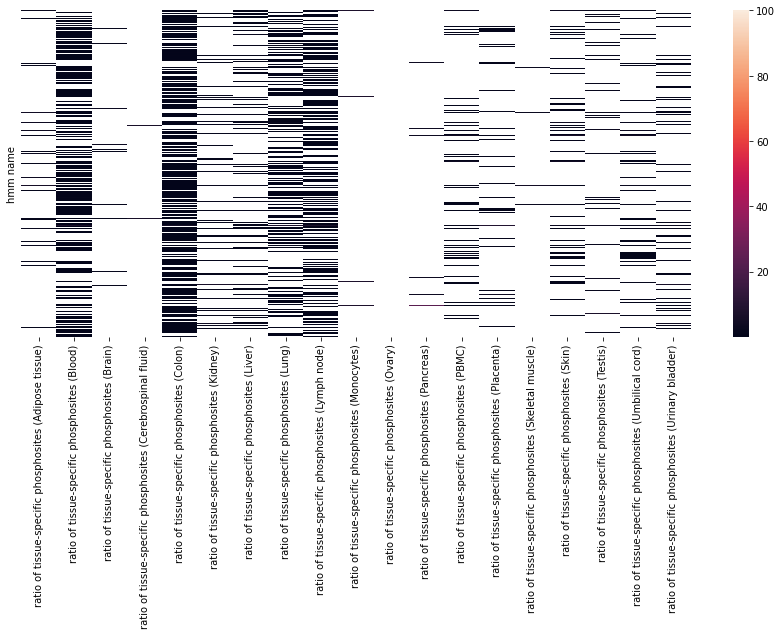

In [265]:
df_hmm_name_taspec_all.sort_values(["hmm name"], inplace=True)
plt.figure(figsize=(15,6))
sns.heatmap(df_hmm_name_taspec_all, yticklabels=False)
plt.show()

In [266]:
temp = gen_sites_pfam.loc[gen_sites_pfam["Adipose tissue"]==1, :].groupby(["hmm name", "ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"})
df_hmm_name_gen_Adipose_tissue = temp.groupby(["hmm name"], as_index=False)["ACC_ID"].count()
df_hmm_name_gen_Adipose_tissue.rename({"ACC_ID": "number of tissue-specific phosphosites (Adipose tissue)"}, inplace=True, axis=1)
df_hmm_name_gen_Adipose_tissue["Total"] = gen_sites_pfam.loc[gen_sites_pfam["Adipose tissue"]==1, :].groupby(["ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"}).shape[0]
df_hmm_name_gen_Adipose_tissue["ratio of tissue-specific phosphosites (Adipose tissue)"] = df_hmm_name_gen_Adipose_tissue["number of tissue-specific phosphosites (Adipose tissue)"]*100/df_hmm_name_gen_Adipose_tissue["Total"]
df_hmm_name_gen_Adipose_tissue.drop(["number of tissue-specific phosphosites (Adipose tissue)", "Total"], axis=1, inplace=True)
df_hmm_name_gen_Adipose_tissue.set_index(["hmm name"], inplace=True)
temp = gen_sites_pfam.loc[gen_sites_pfam["Blood"]==1, :].groupby(["hmm name", "ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"})
df_hmm_name_gen_Blood = temp.groupby(["hmm name"], as_index=False)["ACC_ID"].count()
df_hmm_name_gen_Blood.rename({"ACC_ID": "number of tissue-specific phosphosites (Blood)"}, inplace=True, axis=1)
df_hmm_name_gen_Blood["Total"] = gen_sites_pfam.loc[gen_sites_pfam["Blood"]==1, :].groupby(["ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"}).shape[0]
df_hmm_name_gen_Blood["ratio of tissue-specific phosphosites (Blood)"] = df_hmm_name_gen_Blood["number of tissue-specific phosphosites (Blood)"]*100/df_hmm_name_gen_Blood["Total"]
df_hmm_name_gen_Blood.drop(["number of tissue-specific phosphosites (Blood)", "Total"], axis=1, inplace=True)
df_hmm_name_gen_Blood.set_index(["hmm name"], inplace=True)
temp = gen_sites_pfam.loc[gen_sites_pfam["Brain"]==1, :].groupby(["hmm name", "ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"})
df_hmm_name_gen_Brain = temp.groupby(["hmm name"], as_index=False)["ACC_ID"].count()
df_hmm_name_gen_Brain.rename({"ACC_ID": "number of tissue-specific phosphosites (Brain)"}, inplace=True, axis=1)
df_hmm_name_gen_Brain["Total"] = gen_sites_pfam.loc[gen_sites_pfam["Brain"]==1, :].groupby(["ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"}).shape[0]
df_hmm_name_gen_Brain["ratio of tissue-specific phosphosites (Brain)"] = df_hmm_name_gen_Brain["number of tissue-specific phosphosites (Brain)"]*100/df_hmm_name_gen_Brain["Total"]
df_hmm_name_gen_Brain.drop(["number of tissue-specific phosphosites (Brain)", "Total"], axis=1, inplace=True)
df_hmm_name_gen_Brain.set_index(["hmm name"], inplace=True)
temp = gen_sites_pfam.loc[gen_sites_pfam["Cerebrospinal fluid"]==1, :].groupby(["hmm name", "ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"})
df_hmm_name_gen_Cerebrospinal_fluid = temp.groupby(["hmm name"], as_index=False)["ACC_ID"].count()
df_hmm_name_gen_Cerebrospinal_fluid.rename({"ACC_ID": "number of tissue-specific phosphosites (Cerebrospinal fluid)"}, inplace=True, axis=1)
df_hmm_name_gen_Cerebrospinal_fluid["Total"] = gen_sites_pfam.loc[gen_sites_pfam["Cerebrospinal fluid"]==1, :].groupby(["ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"}).shape[0]
df_hmm_name_gen_Cerebrospinal_fluid["ratio of tissue-specific phosphosites (Cerebrospinal fluid)"] = df_hmm_name_gen_Cerebrospinal_fluid["number of tissue-specific phosphosites (Cerebrospinal fluid)"]*100/df_hmm_name_gen_Cerebrospinal_fluid["Total"]
df_hmm_name_gen_Cerebrospinal_fluid.drop(["number of tissue-specific phosphosites (Cerebrospinal fluid)", "Total"], axis=1, inplace=True)
df_hmm_name_gen_Cerebrospinal_fluid.set_index(["hmm name"], inplace=True)
temp = gen_sites_pfam.loc[gen_sites_pfam["Colon"]==1, :].groupby(["hmm name", "ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"})
df_hmm_name_gen_Colon = temp.groupby(["hmm name"], as_index=False)["ACC_ID"].count()
df_hmm_name_gen_Colon.rename({"ACC_ID": "number of tissue-specific phosphosites (Colon)"}, inplace=True, axis=1)
df_hmm_name_gen_Colon["Total"] = gen_sites_pfam.loc[gen_sites_pfam["Colon"]==1, :].groupby(["ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"}).shape[0]
df_hmm_name_gen_Colon["ratio of tissue-specific phosphosites (Colon)"] = df_hmm_name_gen_Colon["number of tissue-specific phosphosites (Colon)"]*100/df_hmm_name_gen_Colon["Total"]
df_hmm_name_gen_Colon.drop(["number of tissue-specific phosphosites (Colon)", "Total"], axis=1, inplace=True)
df_hmm_name_gen_Colon.set_index(["hmm name"], inplace=True)
temp = gen_sites_pfam.loc[gen_sites_pfam["Kidney"]==1, :].groupby(["hmm name", "ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"})
df_hmm_name_gen_Kidney = temp.groupby(["hmm name"], as_index=False)["ACC_ID"].count()
df_hmm_name_gen_Kidney.rename({"ACC_ID": "number of tissue-specific phosphosites (Kidney)"}, inplace=True, axis=1)
df_hmm_name_gen_Kidney["Total"] = gen_sites_pfam.loc[gen_sites_pfam["Kidney"]==1, :].groupby(["ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"}).shape[0]
df_hmm_name_gen_Kidney["ratio of tissue-specific phosphosites (Kidney)"] = df_hmm_name_gen_Kidney["number of tissue-specific phosphosites (Kidney)"]*100/df_hmm_name_gen_Kidney["Total"]
df_hmm_name_gen_Kidney.drop(["number of tissue-specific phosphosites (Kidney)", "Total"], axis=1, inplace=True)
df_hmm_name_gen_Kidney.set_index(["hmm name"], inplace=True)
temp = gen_sites_pfam.loc[gen_sites_pfam["Liver"]==1, :].groupby(["hmm name", "ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"})
df_hmm_name_gen_Liver = temp.groupby(["hmm name"], as_index=False)["ACC_ID"].count()
df_hmm_name_gen_Liver.rename({"ACC_ID": "number of tissue-specific phosphosites (Liver)"}, inplace=True, axis=1)
df_hmm_name_gen_Liver["Total"] = gen_sites_pfam.loc[gen_sites_pfam["Liver"]==1, :].groupby(["ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"}).shape[0]
df_hmm_name_gen_Liver["ratio of tissue-specific phosphosites (Liver)"] = df_hmm_name_gen_Liver["number of tissue-specific phosphosites (Liver)"]*100/df_hmm_name_gen_Liver["Total"]
df_hmm_name_gen_Liver.drop(["number of tissue-specific phosphosites (Liver)", "Total"], axis=1, inplace=True)
df_hmm_name_gen_Liver.set_index(["hmm name"], inplace=True)
temp = gen_sites_pfam.loc[gen_sites_pfam["Lung"]==1, :].groupby(["hmm name", "ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"})
df_hmm_name_gen_Lung = temp.groupby(["hmm name"], as_index=False)["ACC_ID"].count()
df_hmm_name_gen_Lung.rename({"ACC_ID": "number of tissue-specific phosphosites (Lung)"}, inplace=True, axis=1)
df_hmm_name_gen_Lung["Total"] = gen_sites_pfam.loc[gen_sites_pfam["Lung"]==1, :].groupby(["ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"}).shape[0]
df_hmm_name_gen_Lung["ratio of tissue-specific phosphosites (Lung)"] = df_hmm_name_gen_Lung["number of tissue-specific phosphosites (Lung)"]*100/df_hmm_name_gen_Lung["Total"]
df_hmm_name_gen_Lung.drop(["number of tissue-specific phosphosites (Lung)", "Total"], axis=1, inplace=True)
df_hmm_name_gen_Lung.set_index(["hmm name"], inplace=True)
temp = gen_sites_pfam.loc[gen_sites_pfam["Lymph node"]==1, :].groupby(["hmm name", "ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"})
df_hmm_name_gen_Lymph_node = temp.groupby(["hmm name"], as_index=False)["ACC_ID"].count()
df_hmm_name_gen_Lymph_node.rename({"ACC_ID": "number of tissue-specific phosphosites (Lymph node)"}, inplace=True, axis=1)
df_hmm_name_gen_Lymph_node["Total"] = gen_sites_pfam.loc[gen_sites_pfam["Lymph node"]==1, :].groupby(["ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"}).shape[0]
df_hmm_name_gen_Lymph_node["ratio of tissue-specific phosphosites (Lymph node)"] = df_hmm_name_gen_Lymph_node["number of tissue-specific phosphosites (Lymph node)"]*100/df_hmm_name_gen_Lymph_node["Total"]
df_hmm_name_gen_Lymph_node.drop(["number of tissue-specific phosphosites (Lymph node)", "Total"], axis=1, inplace=True)
df_hmm_name_gen_Lymph_node.set_index(["hmm name"], inplace=True)
temp = gen_sites_pfam.loc[gen_sites_pfam["Monocytes"]==1, :].groupby(["hmm name", "ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"})
df_hmm_name_gen_Monocytes = temp.groupby(["hmm name"], as_index=False)["ACC_ID"].count()
df_hmm_name_gen_Monocytes.rename({"ACC_ID": "number of tissue-specific phosphosites (Monocytes)"}, inplace=True, axis=1)
df_hmm_name_gen_Monocytes["Total"] = gen_sites_pfam.loc[gen_sites_pfam["Monocytes"]==1, :].groupby(["ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"}).shape[0]
df_hmm_name_gen_Monocytes["ratio of tissue-specific phosphosites (Monocytes)"] = df_hmm_name_gen_Monocytes["number of tissue-specific phosphosites (Monocytes)"]*100/df_hmm_name_gen_Monocytes["Total"]
df_hmm_name_gen_Monocytes.drop(["number of tissue-specific phosphosites (Monocytes)", "Total"], axis=1, inplace=True)
df_hmm_name_gen_Monocytes.set_index(["hmm name"], inplace=True)
temp = gen_sites_pfam.loc[gen_sites_pfam["Ovary"]==1, :].groupby(["hmm name", "ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"})
df_hmm_name_gen_Ovary = temp.groupby(["hmm name"], as_index=False)["ACC_ID"].count()
df_hmm_name_gen_Ovary.rename({"ACC_ID": "number of tissue-specific phosphosites (Ovary)"}, inplace=True, axis=1)
df_hmm_name_gen_Ovary["Total"] = gen_sites_pfam.loc[gen_sites_pfam["Ovary"]==1, :].groupby(["ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"}).shape[0]
df_hmm_name_gen_Ovary["ratio of tissue-specific phosphosites (Ovary)"] = df_hmm_name_gen_Ovary["number of tissue-specific phosphosites (Ovary)"]*100/df_hmm_name_gen_Ovary["Total"]
df_hmm_name_gen_Ovary.drop(["number of tissue-specific phosphosites (Ovary)", "Total"], axis=1, inplace=True)
df_hmm_name_gen_Ovary.set_index(["hmm name"], inplace=True)
temp = gen_sites_pfam.loc[gen_sites_pfam["Pancreas"]==1, :].groupby(["hmm name", "ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"})
df_hmm_name_gen_Pancreas = temp.groupby(["hmm name"], as_index=False)["ACC_ID"].count()
df_hmm_name_gen_Pancreas.rename({"ACC_ID": "number of tissue-specific phosphosites (Pancreas)"}, inplace=True, axis=1)
df_hmm_name_gen_Pancreas["Total"] = gen_sites_pfam.loc[gen_sites_pfam["Pancreas"]==1, :].groupby(["ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"}).shape[0]
df_hmm_name_gen_Pancreas["ratio of tissue-specific phosphosites (Pancreas)"] = df_hmm_name_gen_Pancreas["number of tissue-specific phosphosites (Pancreas)"]*100/df_hmm_name_gen_Pancreas["Total"]
df_hmm_name_gen_Pancreas.drop(["number of tissue-specific phosphosites (Pancreas)", "Total"], axis=1, inplace=True)
df_hmm_name_gen_Pancreas.set_index(["hmm name"], inplace=True)
temp = gen_sites_pfam.loc[gen_sites_pfam["PBMC"]==1, :].groupby(["hmm name", "ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"})
df_hmm_name_gen_PBMC = temp.groupby(["hmm name"], as_index=False)["ACC_ID"].count()
df_hmm_name_gen_PBMC.rename({"ACC_ID": "number of tissue-specific phosphosites (PBMC)"}, inplace=True, axis=1)
df_hmm_name_gen_PBMC["Total"] = gen_sites_pfam.loc[gen_sites_pfam["PBMC"]==1, :].groupby(["ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"}).shape[0]
df_hmm_name_gen_PBMC["ratio of tissue-specific phosphosites (PBMC)"] = df_hmm_name_gen_PBMC["number of tissue-specific phosphosites (PBMC)"]*100/df_hmm_name_gen_PBMC["Total"]
df_hmm_name_gen_PBMC.drop(["number of tissue-specific phosphosites (PBMC)", "Total"], axis=1, inplace=True)
df_hmm_name_gen_PBMC.set_index(["hmm name"], inplace=True)
temp = gen_sites_pfam.loc[gen_sites_pfam["Placenta"]==1, :].groupby(["hmm name", "ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"})
df_hmm_name_gen_Placenta = temp.groupby(["hmm name"], as_index=False)["ACC_ID"].count()
df_hmm_name_gen_Placenta.rename({"ACC_ID": "number of tissue-specific phosphosites (Placenta)"}, inplace=True, axis=1)
df_hmm_name_gen_Placenta["Total"] = gen_sites_pfam.loc[gen_sites_pfam["Placenta"]==1, :].groupby(["ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"}).shape[0]
df_hmm_name_gen_Placenta["ratio of tissue-specific phosphosites (Placenta)"] = df_hmm_name_gen_Placenta["number of tissue-specific phosphosites (Placenta)"]*100/df_hmm_name_gen_Placenta["Total"]
df_hmm_name_gen_Placenta.drop(["number of tissue-specific phosphosites (Placenta)", "Total"], axis=1, inplace=True)
df_hmm_name_gen_Placenta.set_index(["hmm name"], inplace=True)
temp = gen_sites_pfam.loc[gen_sites_pfam["Skeletal muscle"]==1, :].groupby(["hmm name", "ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"})
df_hmm_name_gen_Skeletal_muscle = temp.groupby(["hmm name"], as_index=False)["ACC_ID"].count()
df_hmm_name_gen_Skeletal_muscle.rename({"ACC_ID": "number of tissue-specific phosphosites (Skeletal muscle)"}, inplace=True, axis=1)
df_hmm_name_gen_Skeletal_muscle["Total"] = gen_sites_pfam.loc[gen_sites_pfam["Skeletal muscle"]==1, :].groupby(["ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"}).shape[0]
df_hmm_name_gen_Skeletal_muscle["ratio of tissue-specific phosphosites (Skeletal muscle)"] = df_hmm_name_gen_Skeletal_muscle["number of tissue-specific phosphosites (Skeletal muscle)"]*100/df_hmm_name_gen_Skeletal_muscle["Total"]
df_hmm_name_gen_Skeletal_muscle.drop(["number of tissue-specific phosphosites (Skeletal muscle)", "Total"], axis=1, inplace=True)
df_hmm_name_gen_Skeletal_muscle.set_index(["hmm name"], inplace=True)
temp = gen_sites_pfam.loc[gen_sites_pfam["Skin"]==1, :].groupby(["hmm name", "ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"})
df_hmm_name_gen_Skin = temp.groupby(["hmm name"], as_index=False)["ACC_ID"].count()
df_hmm_name_gen_Skin.rename({"ACC_ID": "number of tissue-specific phosphosites (Skin)"}, inplace=True, axis=1)
df_hmm_name_gen_Skin["Total"] = gen_sites_pfam.loc[gen_sites_pfam["Skin"]==1, :].groupby(["ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"}).shape[0]
df_hmm_name_gen_Skin["ratio of tissue-specific phosphosites (Skin)"] = df_hmm_name_gen_Skin["number of tissue-specific phosphosites (Skin)"]*100/df_hmm_name_gen_Skin["Total"]
df_hmm_name_gen_Skin.drop(["number of tissue-specific phosphosites (Skin)", "Total"], axis=1, inplace=True)
df_hmm_name_gen_Skin.set_index(["hmm name"], inplace=True)
temp = gen_sites_pfam.loc[gen_sites_pfam["Testis"]==1, :].groupby(["hmm name", "ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"})
df_hmm_name_gen_Testis = temp.groupby(["hmm name"], as_index=False)["ACC_ID"].count()
df_hmm_name_gen_Testis.rename({"ACC_ID": "number of tissue-specific phosphosites (Testis)"}, inplace=True, axis=1)
df_hmm_name_gen_Testis["Total"] = gen_sites_pfam.loc[gen_sites_pfam["Testis"]==1, :].groupby(["ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"}).shape[0]
df_hmm_name_gen_Testis["ratio of tissue-specific phosphosites (Testis)"] = df_hmm_name_gen_Testis["number of tissue-specific phosphosites (Testis)"]*100/df_hmm_name_gen_Testis["Total"]
df_hmm_name_gen_Testis.drop(["number of tissue-specific phosphosites (Testis)", "Total"], axis=1, inplace=True)
df_hmm_name_gen_Testis.set_index(["hmm name"], inplace=True)
temp = gen_sites_pfam.loc[gen_sites_pfam["Placenta"]==1, :].groupby(["hmm name", "ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"})
df_hmm_name_gen_Placenta = temp.groupby(["hmm name"], as_index=False)["ACC_ID"].count()
df_hmm_name_gen_Placenta.rename({"ACC_ID": "number of tissue-specific phosphosites (Placenta)"}, inplace=True, axis=1)
df_hmm_name_gen_Placenta["Total"] = gen_sites_pfam.loc[gen_sites_pfam["Placenta"]==1, :].groupby(["ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"}).shape[0]
df_hmm_name_gen_Placenta["ratio of tissue-specific phosphosites (Placenta)"] = df_hmm_name_gen_Placenta["number of tissue-specific phosphosites (Placenta)"]*100/df_hmm_name_gen_Placenta["Total"]
df_hmm_name_gen_Placenta.drop(["number of tissue-specific phosphosites (Placenta)", "Total"], axis=1, inplace=True)
df_hmm_name_gen_Placenta.set_index(["hmm name"], inplace=True)
temp = gen_sites_pfam.loc[gen_sites_pfam["Umbilical cord"]==1, :].groupby(["hmm name", "ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"})
df_hmm_name_gen_Umbilical_cord = temp.groupby(["hmm name"], as_index=False)["ACC_ID"].count()
df_hmm_name_gen_Umbilical_cord.rename({"ACC_ID": "number of tissue-specific phosphosites (Umbilical cord)"}, inplace=True, axis=1)
df_hmm_name_gen_Umbilical_cord["Total"] = gen_sites_pfam.loc[gen_sites_pfam["Umbilical cord"]==1, :].groupby(["ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"}).shape[0]
df_hmm_name_gen_Umbilical_cord["ratio of tissue-specific phosphosites (Umbilical cord)"] = df_hmm_name_gen_Umbilical_cord["number of tissue-specific phosphosites (Umbilical cord)"]*100/df_hmm_name_gen_Umbilical_cord["Total"]
df_hmm_name_gen_Umbilical_cord.drop(["number of tissue-specific phosphosites (Umbilical cord)", "Total"], axis=1, inplace=True)
df_hmm_name_gen_Umbilical_cord.set_index(["hmm name"], inplace=True)
temp = gen_sites_pfam.loc[gen_sites_pfam["Urinary bladder"]==1, :].groupby(["hmm name", "ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"})
df_hmm_name_gen_Urinary_bladder = temp.groupby(["hmm name"], as_index=False)["ACC_ID"].count()
df_hmm_name_gen_Urinary_bladder.rename({"ACC_ID": "number of tissue-specific phosphosites (Urinary bladder)"}, inplace=True, axis=1)
df_hmm_name_gen_Urinary_bladder["Total"] = gen_sites_pfam.loc[gen_sites_pfam["Urinary bladder"]==1, :].groupby(["ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"}).shape[0]
df_hmm_name_gen_Urinary_bladder["ratio of tissue-specific phosphosites (Urinary bladder)"] = df_hmm_name_gen_Urinary_bladder["number of tissue-specific phosphosites (Urinary bladder)"]*100/df_hmm_name_gen_Urinary_bladder["Total"]
df_hmm_name_gen_Urinary_bladder.drop(["number of tissue-specific phosphosites (Urinary bladder)", "Total"], axis=1, inplace=True)
df_hmm_name_gen_Urinary_bladder.set_index(["hmm name"], inplace=True)

In [267]:
df_hmm_name_gen_all = pd.concat([df_hmm_name_gen_Adipose_tissue, df_hmm_name_gen_Blood, df_hmm_name_gen_Brain,
                               df_hmm_name_gen_Cerebrospinal_fluid, df_hmm_name_gen_Colon, df_hmm_name_gen_Kidney,
                               df_hmm_name_gen_Liver, df_hmm_name_gen_Lung, df_hmm_name_gen_Lymph_node, df_hmm_name_gen_Monocytes,
                               df_hmm_name_gen_Ovary, df_hmm_name_gen_Pancreas, df_hmm_name_gen_PBMC, df_hmm_name_gen_Placenta,
                               df_hmm_name_gen_Skeletal_muscle, df_hmm_name_gen_Skin, df_hmm_name_gen_Testis,
                              df_hmm_name_gen_Umbilical_cord, df_hmm_name_gen_Urinary_bladder], axis=1)
df_hmm_name_gen_all.dropna(axis=1, how="all", inplace=True)
df_hmm_name_gen_all

ratio of tissue-specific phosphosites (Adipose tissue)  \
hmm name                                                                 
AAA                                                      0.689655        
AD                                                       0.689655        
Actin                                                   24.137931        
Aldolase_II                                              1.379310        
Amidohydro_1                                             0.689655        
...                                                           ...        
Ribosomal_L7Ae                                                NaN        
THUMP                                                         NaN        
Tropomodulin                                                  NaN        
CAP_C                                                         NaN        
fn3                                                           NaN        

                ratio of tissue-specific phosphosites (Blood)  \
hmm name                                                        
AAA                                                  0.120192   
AD                                                        NaN   
Actin                                                6.370192   
Aldolase_II                                          0.480769   
Amidohydro_1                                         0.120192   
...                                                       ...   
Ribosomal_L7Ae                                            NaN   
THUMP                                                     NaN   
Tropomodulin                                              NaN   
CAP_C                                                     NaN   
fn3                                                       NaN   

                ratio of tissue-specific phosphosites (Brain)  \
hmm name                                                        
AAA                                                       NaN   
AD                                                        NaN   
Actin                                                7.270030   
Aldolase_II                                          0.445104   
Amidohydro_1                                         0.148368   
...                                                       ...   
Ribosomal_L7Ae                                            NaN   
THUMP                                                     NaN   
Tropomodulin                                              NaN   
CAP_C                                                     NaN   
fn3                                                       NaN   

                ratio of tissue-specific phosphosites (Cerebrospinal fluid)  \
hmm name                                                                      
AAA                                                           NaN             
AD                                                            NaN             
Actin                                                    6.122449             
Aldolase_II                                              0.470958             
Amidohydro_1                                             0.156986             
...                                                           ...             
Ribosomal_L7Ae                                                NaN             
THUMP                                                         NaN             
Tropomodulin                                                  NaN             
CAP_C                                                         NaN             
fn3                                                           NaN             

                ratio of tissue-specific phosphosites (Colon)  \
hmm name                                                        
AAA                                                  0.202429   
AD                                                        NaN   
Actin                                               11.538462   
Aldolase

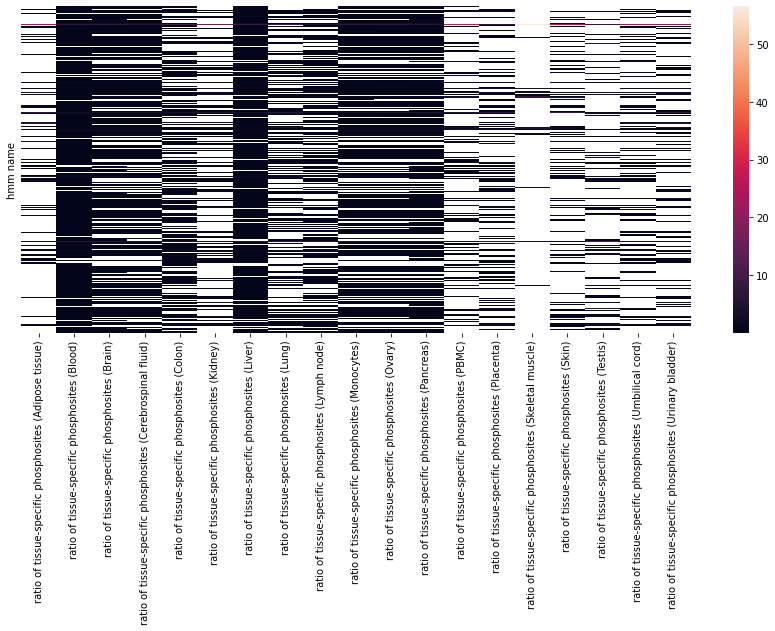

In [268]:
df_hmm_name_gen_all.sort_values(["hmm name"], inplace=True)
plt.figure(figsize=(15,6))
sns.heatmap(df_hmm_name_gen_all, yticklabels=False)
plt.show()

In [269]:
print(gen_sites[(gen_sites["Brain"]==1)&(gen_sites["Cerebrospinal fluid"]==0)]["ACC_ID"].nunique())
print(gen_sites[(gen_sites["Brain"]==1)&(gen_sites["Cerebrospinal fluid"]==0)].shape[0])
gen_sites[(gen_sites["Brain"]==1)&(gen_sites["Cerebrospinal fluid"]==0)]

85
111


ACC_ID  UP_POS                                             tissue  \
69    O00567     520  Liver,PBMC,PBMC,PBMC,PBMC,PBMC,PBMC,Umbilical ...   
100   O14683      16  Blood,Blood,Blood,Blood,Blood,Blood,Colon,Colo...   
189   O43765     305  Blood,Pancreas,Colon,Colon,Colon,Colon,Colon,C...   
190   O43765     307  Blood,Colon,Colon,Colon,Colon,Colon,Colon,Colo...   
234   O60885     470  Blood,Brain,Colon,Colon,Colon,Colon,Colon,Colo...   
...      ...     ...                                                ...   
3319  Q9Y2V2      41  Liver,Liver,Blood,Blood,Blood,Blood,Blood,Bloo...   
3322  Q9Y2W1     243  Liver,Liver,Liver,PBMC,PBMC,PBMC,PBMC,PBMC,PBM...   
3329  Q9Y2X3     502  Liver,PBMC,Umbilical cord,Umbilical cord,B-cel...   
3354  Q9Y4F1     427  Liver,Liver,Liver,Liver,Blood,Blood,Kidney,Kid...   
3371  Q9Y617     289        Urinary bladder, Colon, Kidney, Liver,Brain   

     modres  Adipose tissue  B-cells  Blood  Bone  Brain  Breast  ...  \
69        S               0        1      1     0      1       0  ...   
100       T               0        0      1     0      1       0  ...   
189       S               0        0      1     0      1       0  ...   
190       S               0        0      1     0      1       0  ...   
234       S               0        0      1     0      1       0  ...   
...     ...             ...      ...    ...   ...    ...     ...  ...   
3319      S               1        0      1     0      1       0  ...   
3322      S               1        1      1     0      1       0  ...   
3329      S               0        1      1     0      1       0  ...   
3354      S               1        0      1     0      1       0  ...   
3371      Y               0        0      0     0      1       0  ...   

      Small intestine  Synovial tissue  T-cells  Testis  Tooth  \
69                  0                0        0       1      0   
100                 0                0        0       1      0   
189                 0                0        0       0      0   
190                 0                0        0       0      0   
234                 0                0        0       0      0   
...               ...              ...      ...     ...    ...   
3319                0                0        0       0      0   
3322                1                0        0       0      0   
3329                0                0        0       0      0   
3354                0                0        0       0      0   
3371                0                0        0       0      0   

      Umbilical cord  Ureter  Urinary bladder  Urine  Total  
69                 1       0                1      0     14  
100                0       0                0      0      6  
189                0       0                0      0      6  
190                0       0                0      0      5  
234                0       0                0      0      5  
...              ...     ...              ...    ...    ...  
3319               1       0                0      0      9  
3322               1       0                0      0     16  
3329               1       0                0      0     10  
3354               1       0                0      0      9  
3371               0       0                1      0      5  

[111 rows x 46 columns]

In [270]:
print(gen_sites[(gen_sites["Brain"]==1)&(gen_sites["Cerebrospinal fluid"]==1)]["ACC_ID"].nunique())
print(gen_sites[(gen_sites["Brain"]==1)&(gen_sites["Cerebrospinal fluid"]==1)].shape[0])
gen_sites[(gen_sites["Brain"]==1)&(gen_sites["Cerebrospinal fluid"]==1)]

867
2196


ACC_ID  UP_POS                                             tissue  \
0     A0A0C4DH39      51  Blood, Cerebrospinal fluid, Liver, Ovary, Panc...   
1         A0JNW5    1402  Blood,Blood,Blood,Blood, Cerebrospinal fluid, ...   
2         A2RU30     454  Blood, Cerebrospinal fluid, Liver, Ovary, Panc...   
3         A5A3E0     939  Skin,Colon,Colon,Colon,Colon,Colon,Colon,Colon...   
4         A5A3E0     940  Colon,Colon,Colon,Colon,Colon,Colon,Colon,Colo...   
...          ...     ...                                                ...   
3400      Q9Y6V0    3585  Blood, Cerebrospinal fluid, Liver, Ovary, Panc...   
3401      Q9Y6V0    4023  Blood, Cerebrospinal fluid, Liver, Ovary, Panc...   
3402      Q9Y6V0    4024  Blood, Cerebrospinal fluid, Liver, Ovary, Panc...   
3403      Q9Y6V0    4395  Blood, Cerebrospinal fluid, Liver, Ovary, Panc...   
3404      Q9Y6X4     635  Blood, Cerebrospinal fluid, Liver, Ovary, Panc...   

     modres  Adipose tissue  B-cells  Blood  Bone  Brain  Breast  ...  \
0         S               0        0      1     0      1       0  ...   
1         S               0        0      1     0      1       0  ...   
2         S               0        0      1     0      1       0  ...   
3         S               0        0      1     0      1       0  ...   
4         Y               1        0      1     0      1       0  ...   
...     ...             ...      ...    ...   ...    ...     ...  ...   
3400      S               0        0      1     0      1       0  ...   
3401      S               0        0      1     0      1       0  ...   
3402      S               0        0      1     0      1       0  ...   
3403      S               0        0      1     0      1       0  ...   
3404      S               0        0      1     0      1       0  ...   

      Small intestine  Synovial tissue  T-cells  Testis  Tooth  \
0                   0                0        0       0      0   
1                   0                0        0       0      0   
2                   0                0        0       0      0   
3                   0                0        0       0      0   
4                   0                0        0       1      0   
...               ...              ...      ...     ...    ...   
3400                0                0        0       0      0   
3401                0                0        0       0      0   
3402                0                0        0       0      0   
3403                0                0        0       0      0   
3404                0                0        0       0      0   

      Umbilical cord  Ureter  Urinary bladder  Urine  Total  
0                  0       0                0      0      7  
1                  0       0                0      0      8  
2                  0       0                0      0      7  
3                  0       0                0      0     11  
4                  1       0                0      0     13  
...              ...     ...              ...    ...    ...  
3400               0       0                0      0      7  
3401               0       0                0      0      7  
3402               0       0                0      0      7  
3403               0       0                0      0      7  
3404               0       0                0      0      7  

[2196 rows x 46 columns]

In [271]:
print(gen_sites[(gen_sites["Brain"]==0)&(gen_sites["Cerebrospinal fluid"]==1)]["ACC_ID"].nunique())
print(gen_sites[(gen_sites["Brain"]==0)&(gen_sites["Cerebrospinal fluid"]==1)].shape[0])
gen_sites[(gen_sites["Brain"]==0)&(gen_sites["Cerebrospinal fluid"]==1)]

6
7


ACC_ID  UP_POS                                             tissue  \
368   P02042      51  Breast,Breast,Breast,Breast,Breast,Breast,Brea...   
370   P02042      87  Lung,Lung,Nasal polyps, Palatine tonsils, Paro...   
516   P05546      66  Blood,Blood,Synovial tissue,Synovial tissue,Sy...   
689   P10451     219  Liver,Liver,Liver,Liver,Urinary bladder,Urinar...   
741   P11277    2114  Lung,Lung,Urinary bladder,Cerebrospinal fluid,...   
1536  P68871      45  Breast,Breast,Breast,Breast,Breast,Breast,Brea...   
1542  P69905      25  Breast,Breast,Breast,Breast,Breast,Breast,Brea...   

     modres  Adipose tissue  B-cells  Blood  Bone  Brain  Breast  ...  \
368       S               0        0      0     0      0       1  ...   
370       S               0        0      0     0      0       0  ...   
516       T               0        0      1     0      0       0  ...   
689       S               0        0      0     0      0       0  ...   
741       S               0        0      0     0      0       0  ...   
1536      S               0        0      0     0      0       1  ...   
1542      Y               0        0      0     0      0       1  ...   

      Small intestine  Synovial tissue  T-cells  Testis  Tooth  \
368                 1                0        0       0      0   
370                 0                0        0       0      0   
516                 0                1        0       0      0   
689                 0                0        0       0      0   
741                 0                0        0       0      0   
1536                0                0        0       0      0   
1542                0                0        0       0      0   

      Umbilical cord  Ureter  Urinary bladder  Urine  Total  
368                0       0                1      0     13  
370                0       0                0      0      5  
516                0       0                0      0      6  
689                0       0                1      1      6  
741                0       0                1      0      5  
1536               0       0                0      0     10  
1542               0       0                0      0      7  

[7 rows x 46 columns]

In [272]:
data = pd.read_csv("phospho_data_tissue_annotation.tsv", sep="\t")
data.dropna(inplace=True)
#data_gen_sites_br_cf = pd.merge(gen_sites[(gen_sites["Brain"]==1)|(gen_sites["Cerebrospinal fluid"]==1)], data[["ACC_ID", "UP_POS", "proj", "tissue"]], how="left", on=["ACC_ID", "UP_POS"])
#data_gen_sites_br_cf_gr = data_gen_sites_br_cf.groupby(["ACC_ID", "UP_POS"], as_index=False).agg({"tissue_y": lambda x: ",".join(x.unique())})
#data_gen_sites_br_cf_gr["tissue_y"].value_counts()

# 8. Comparing tissue-specific sites on non-tissue-specific proteins vs tissue-specific proteins

In [273]:
nontspecprot_tspecsites = pd.read_csv("Tissue aspecific and pervasively P proteins tspec sites", sep="\t")
nontspecprot_tspecsites.head()

ACC_ID  Adipose tissue_protein  B-cells_protein  Blood_protein  \
0  A0AVK6                       0                0              1   
1  A0FGR8                       0                0              1   
2  A0FGR8                       0                0              1   
3  A0FGR8                       0                0              1   
4  A0JLT2                       0                0              1   

   Bone_protein  Brain_protein  Breast_protein  Cerebrospinal fluid_protein  \
0             0              0               0                            0   
1             0              0               0                            0   
2             0              0               0                            0   
3             0              0               0                            0   
4             0              0               0                            0   

   Cervix_protein  Colon_protein  ...  Umbilical cord_protein  Ureter_protein  \
0               0              1  ...                       0               0   
1               0              1  ...                       0               0   
2               0              1  ...                       0               0   
3               0              1  ...                       0               0   
4               0              1  ...                       0               0   

   Urinary bladder_protein  Urine_protein  Total_protein  UP_POS  \
0                        0              0              2      68   
1                        0              0              5     743   
2                        0              0              5     737   
3                        0              0              5     736   
4                        0              0              3     234   

                                              tissue  modres  tissue_site  \
0                                  Colon,Colon,Colon       S        Colon   
1  Colon,Colon,Colon,Colon,Colon,Colon,Colon,Colo...       S        Colon   
2                                              Colon       S        Colon   
3  Colon,Colon,Colon,Colon,Colon,Colon,Colon,Colo...       S        Colon   
4                                              Blood       S        Blood   

                                      Type  
0  tissue aspecific phosphorylated protein  
1       pervasively phosphorylated protein  
2       pervasively phosphorylated protein  
3       pervasively phosphorylated protein  
4  tissue aspecific phosphorylated protein  

[5 rows x 48 columns]

In [274]:
nontspecprot_tspecsites_pfam = pd.merge(nontspecprot_tspecsites, tspec_sites_pfam[["ACC_ID", "UP_POS", "hmm start", "hmm end", "hmm name", "type", "clan", "E-value"]], how="right", on=["ACC_ID", "UP_POS"], indicator =True)
nontspecprot_tspecsites_pfam.head()

ACC_ID  Adipose tissue_protein  B-cells_protein  Blood_protein  \
0  A0A075B6H7                     NaN              NaN            NaN   
1  A0A075B6S5                     NaN              NaN            NaN   
2  A0A0B4J2D9                     NaN              NaN            NaN   
3  A0A0C4DH24                     NaN              NaN            NaN   
4  A0A0C4DH67                     NaN              NaN            NaN   

   Bone_protein  Brain_protein  Breast_protein  Cerebrospinal fluid_protein  \
0           NaN            NaN             NaN                          NaN   
1           NaN            NaN             NaN                          NaN   
2           NaN            NaN             NaN                          NaN   
3           NaN            NaN             NaN                          NaN   
4           NaN            NaN             NaN                          NaN   

   Cervix_protein  Colon_protein  ...  modres  tissue_site  Type  hmm start  \
0             NaN            NaN  ...     NaN          NaN   NaN          1   
1             NaN            NaN  ...     NaN          NaN   NaN          1   
2             NaN            NaN  ...     NaN          NaN   NaN          1   
3             NaN            NaN  ...     NaN          NaN   NaN          2   
4             NaN            NaN  ...     NaN          NaN   NaN          1   

   hmm end  hmm name    type    clan       E-value      _merge  
0       91     V-set  Domain  CL0011  1.100000e-13  right_only  
1       92     V-set  Domain  CL0011  2.200000e-13  right_only  
2       92     V-set  Domain  CL0011  7.100000e-13  right_only  
3       91     V-set  Domain  CL0011  1.200000e-11  right_only  
4       91     V-set  Domain  CL0011  1.100000e-11  right_only  

[5 rows x 55 columns]

In [275]:
nontspecprot_tspecsites_pfam["Type"].value_counts()

pervasively phosphorylated protein         2390
tissue aspecific phosphorylated protein    1799
Name: Type, dtype: int64

In [276]:
print(nontspecprot_tspecsites_pfam[nontspecprot_tspecsites_pfam["Type"]=="tissue aspecific phosphorylated protein"].groupby(["ACC_ID", "UP_POS"]).agg({"modres": "first"}).shape[0])
print(nontspecprot_tspecsites_pfam[nontspecprot_tspecsites_pfam["Type"]=="pervasively phosphorylated protein"].groupby(["ACC_ID", "UP_POS"]).agg({"modres": "first"}).shape[0])

1285
1441


In total, 14 019 tissue-specific phosphosites have been identified, of which 2 794 on tissue-specific phosphorylated proteins. Here, 907 of these phosphosites have been found inside an annotated region in pfam. Aother 4 986 tissue-specific phosphosites have been identified on tissue-aspecific phosphoryalted proteins, of which 1 285 have been found to have an annotation comprising the phosphosite. For the remaining 6 236 phosphosites identified on pervasively phosphorylated proteins, 1 441 have been found annotated

In [277]:
tspecsites_tspecproteins_pfam = nontspecprot_tspecsites_pfam[nontspecprot_tspecsites_pfam["_merge"]=="right_only"]
print(tspecsites_tspecproteins_pfam["ACC_ID"].nunique())
print(tspecsites_tspecproteins_pfam.groupby(["ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"}).shape[0])
tspecsites_tspecproteins_pfam["tissue_site"] = 0
for tissue in list_tissues_STY:
    tissue = tissue+"_protein"
    tspecsites_tspecproteins_pfam.drop([tissue], inplace=True, axis=1)
tspecsites_tspecproteins_pfam.drop(["_merge", "Total_protein", "tissue", "modres", "tissue_site", "Type"], inplace=True, axis=1)
tspecsites_tspecproteins_pfam = pd.merge(tspecsites_tspecproteins_pfam[["ACC_ID", "UP_POS"]], tspec_sites_pfam, how="left", on=["ACC_ID", "UP_POS"], indicator=True)
tspecsites_tspecproteins_pfam.drop(["_merge"], inplace=True, axis=1)
for tissue in list_tissues_STY:
    tspecsites_tspecproteins_pfam.loc[tspecsites_tspecproteins_pfam[tissue]==1, "tissue_site"] = tissue
tspecsites_tspecproteins_pfam.head()

727
907


C:\Users\hannedvo\AppData\Local\Temp\8/ipykernel_24100/3382354239.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tspecsites_tspecproteins_pfam["tissue_site"] = 0
C:\Anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


ACC_ID  UP_POS             tissue modres  Adipose tissue  B-cells  \
0  A0A075B6H7      30               Lung      T               0        0   
1  A0A075B6S5      52    Menstrual fluid      S               0        0   
2  A0A0B4J2D9      52  Blood,Blood,Blood      S               0        0   
3  A0A0C4DH24      75    Skeletal muscle      S               0        0   
4  A0A0C4DH67      50              Blood      S               0        0   

   Blood  Bone  Brain  Breast  ...  Urinary bladder  Urine  Total  hmm start  \
0      0     0      0       0  ...                0      0      1          1   
1      0     0      0       0  ...                0      0      1          1   
2      1     0      0       0  ...                0      0      1          1   
3      0     0      0       0  ...                0      0      1          2   
4      1     0      0       0  ...                0      0      1          1   

   hmm end  hmm name    type    clan       E-value      tissue_site  
0       91     V-set  Domain  CL0011  1.100000e-13             Lung  
1       92     V-set  Domain  CL0011  2.200000e-13  Menstrual fluid  
2       92     V-set  Domain  CL0011  7.100000e-13            Blood  
3       91     V-set  Domain  CL0011  1.200000e-11  Skeletal muscle  
4       91     V-set  Domain  CL0011  1.100000e-11            Blood  

[5 rows x 53 columns]

In [278]:
tspecsites_taspecproteins_pfam = nontspecprot_tspecsites_pfam[(nontspecprot_tspecsites_pfam["_merge"]=="both")&(nontspecprot_tspecsites_pfam["Type"]=="tissue aspecific phosphorylated protein")]
print(tspecsites_taspecproteins_pfam["ACC_ID"].nunique())
print(tspecsites_taspecproteins_pfam.shape[0])
for tissue in list_tissues_STY:
    tissue = tissue+"_protein"
    tspecsites_taspecproteins_pfam.drop([tissue], axis=1, inplace=True)
tspecsites_taspecproteins_pfam.drop(["_merge"], axis=1, inplace=True)
tspecsites_taspecproteins_pfam.head()

667
1799


C:\Anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


ACC_ID  Total_protein  UP_POS  \
10  A0M8Q6            4.0      10   
11  A1KXE4            3.0     185   
12  A1L170            3.0      18   
13  A1L170            3.0     222   
14  A1L170            3.0     223   

                                               tissue modres tissue_site  \
10                                     Lung,Lung,Lung      T        Lung   
11                                              Colon      T       Colon   
12                                         Lymph node      S  Lymph node   
13                                  Colon,Colon,Colon      S       Colon   
14  Colon,Colon,Colon,Colon,Colon,Colon,Colon,Colo...      S       Colon   

                                       Type  hmm start  hmm end hmm name  \
10  tissue aspecific phosphorylated protein          1       85   C1-set   
11  tissue aspecific phosphorylated protein        100      243    TCRP1   
12  tissue aspecific phosphorylated protein          1      273  DUF4628   
13  tissue aspecific phosphorylated protein          1      273  DUF4628   
14  tissue aspecific phosphorylated protein          1      273  DUF4628   

      type     clan        E-value  
10  Domain   CL0011   2.100000e-27  
11  Family  No_clan   3.100000e-81  
12  Family  No_clan  1.900000e-120  
13  Family  No_clan  1.900000e-120  
14  Family  No_clan  1.900000e-120

In [279]:
tspecsites_genproteins_pfam = nontspecprot_tspecsites_pfam[(nontspecprot_tspecsites_pfam["_merge"]=="both")&(nontspecprot_tspecsites_pfam["Type"]=="pervasively phosphorylated protein")]
print(tspecsites_genproteins_pfam["ACC_ID"].nunique())
print(tspecsites_genproteins_pfam.shape[0])
for tissue in list_tissues_STY:
    tissue = tissue+"_protein"
    tspecsites_genproteins_pfam.drop([tissue], inplace=True, axis=1)
tspecsites_genproteins_pfam.drop(["_merge"], inplace=True, axis=1)
tspecsites_genproteins_pfam.head()

624
2390


C:\Anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


ACC_ID  Total_protein  UP_POS tissue modres tissue_site  \
30  A6NMY6           13.0      31   Skin      T        Skin   
31  A6NMY6           13.0      31   Skin      T        Skin   
32  A6NMY6           13.0      31   Skin      T        Skin   
33  A6NMY6           13.0      31   Skin      T        Skin   
36  A8MVW0            8.0     750   Lung      T        Lung   

                                  Type  hmm start  hmm end hmm name    type  \
30  pervasively phosphorylated protein          1       66  Annexin  Domain   
31  pervasively phosphorylated protein          1       66  Annexin  Domain   
32  pervasively phosphorylated protein          1       66  Annexin  Domain   
33  pervasively phosphorylated protein          2       66  Annexin  Domain   
36  pervasively phosphorylated protein          1      817  UPF0560  Family   

       clan       E-value  
30  No_clan  1.100000e-23  
31  No_clan  3.100000e-20  
32  No_clan  3.900000e-15  
33  No_clan  1.500000e-13  
36   CL0661  0.000000e+00

<AxesSubplot:title={'center':'Number of tissue-specific phosphosites in a domain on any of proteins of any of the three categories'}, xlabel='Tissue'>

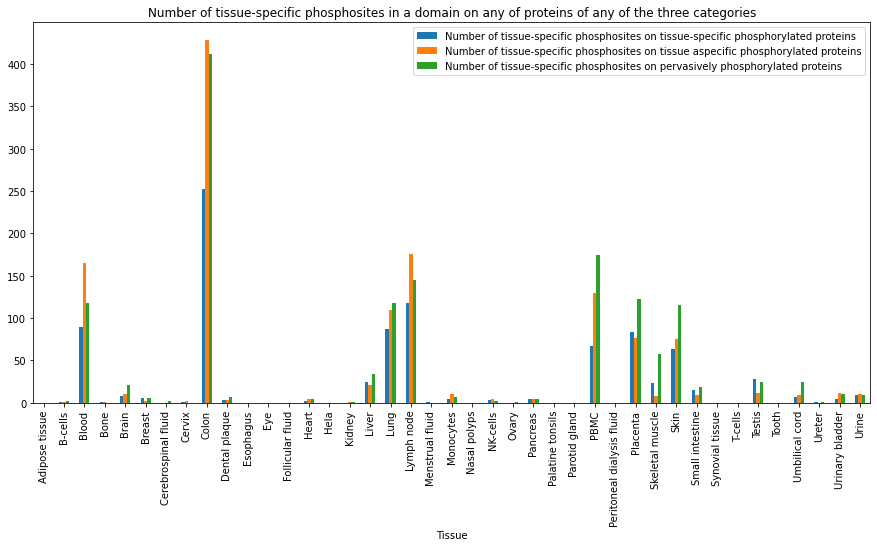

In [280]:
df_spread_tissues = pd.DataFrame({"Tissue": list_tissues_STY})
list_tspec = []
list_taspec = []
list_gen = []
list_total = []
for tissue in list_tissues_STY:
    temp_tspec = tspecsites_tspecproteins_pfam[tspecsites_tspecproteins_pfam["tissue_site"]==tissue].groupby(["ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"})
    temp_taspec = tspecsites_taspecproteins_pfam[tspecsites_taspecproteins_pfam["tissue_site"]==tissue].groupby(["ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"})
    temp_gen = tspecsites_genproteins_pfam[tspecsites_genproteins_pfam["tissue_site"]==tissue].groupby(["ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"})
    count_tspec = temp_tspec.shape[0]
    count_taspec = temp_taspec.shape[0]
    count_gen = temp_gen.shape[0]
    count_total = count_tspec+count_taspec+count_gen
    list_tspec.append(count_tspec)
    list_taspec.append(count_taspec)
    list_gen.append(count_gen)
    list_total.append(count_total)
df_spread_tissues["Number of tissue-specific phosphosites on tissue-specific phosphorylated proteins"] = list_tspec
df_spread_tissues["Number of tissue-specific phosphosites on tissue aspecific phosphorylated proteins"] = list_taspec
df_spread_tissues["Number of tissue-specific phosphosites on pervasively phosphorylated proteins"] = list_gen
df_spread_tissues["Total"] = list_total
df_spread_tissues
df_spread_tissues[["Tissue", "Number of tissue-specific phosphosites on tissue-specific phosphorylated proteins", "Number of tissue-specific phosphosites on tissue aspecific phosphorylated proteins", "Number of tissue-specific phosphosites on pervasively phosphorylated proteins"]].plot(x="Tissue", kind="bar", figsize=(15,7), title="Number of tissue-specific phosphosites in a domain on any of proteins of any of the three categories")
#plt.savefig("WP2 Pfam_proteins having tissue-specific phosphosites in a functional domain.png", format="png", bbox_inches="tight")

<AxesSubplot:xlabel='Tissue'>

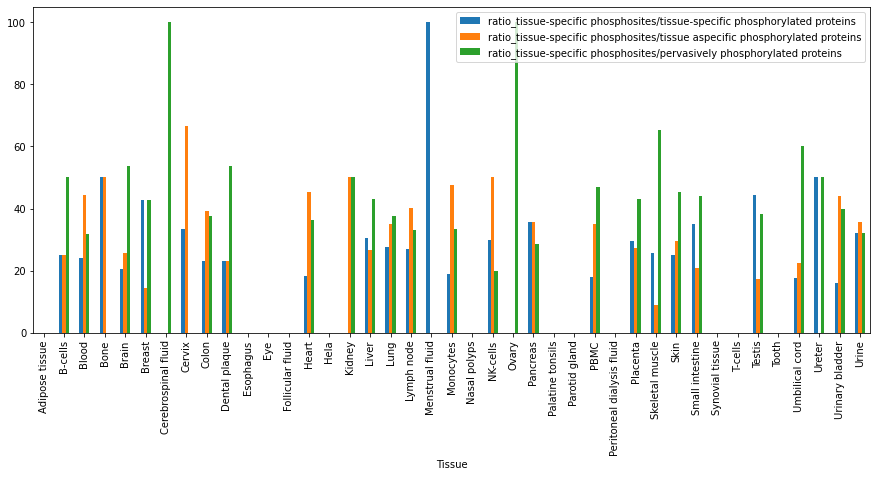

In [281]:
df_spread_tissues["ratio_tissue-specific phosphosites/tissue-specific phosphorylated proteins"] = df_spread_tissues["Number of tissue-specific phosphosites on tissue-specific phosphorylated proteins"]*100/df_spread_tissues["Total"]
df_spread_tissues["ratio_tissue-specific phosphosites/tissue aspecific phosphorylated proteins"] = df_spread_tissues["Number of tissue-specific phosphosites on tissue aspecific phosphorylated proteins"]*100/df_spread_tissues["Total"]
df_spread_tissues["ratio_tissue-specific phosphosites/pervasively phosphorylated proteins"] = df_spread_tissues["Number of tissue-specific phosphosites on pervasively phosphorylated proteins"]*100/df_spread_tissues["Total"]
df_spread_tissues[["Tissue", "ratio_tissue-specific phosphosites/tissue-specific phosphorylated proteins", "ratio_tissue-specific phosphosites/tissue aspecific phosphorylated proteins", "ratio_tissue-specific phosphosites/pervasively phosphorylated proteins"]].plot(kind="bar", x="Tissue", figsize=(15,6))

In [282]:
df_spread_tissues

Tissue  \
0              Adipose tissue   
1                     B-cells   
2                       Blood   
3                        Bone   
4                       Brain   
5                      Breast   
6         Cerebrospinal fluid   
7                      Cervix   
8                       Colon   
9               Dental plaque   
10                  Esophagus   
11                        Eye   
12           Follicular fluid   
13                      Heart   
14                       Hela   
15                     Kidney   
16                      Liver   
17                       Lung   
18                 Lymph node   
19            Menstrual fluid   
20                  Monocytes   
21               Nasal polyps   
22                   NK-cells   
23                      Ovary   
24                   Pancreas   
25           Palatine tonsils   
26              Parotid gland   
27                       PBMC   
28  Peritoneal dialysis fluid   
29                   Placenta   
30            Skeletal muscle   
31                       Skin   
32            Small intestine   
33            Synovial tissue   
34                    T-cells   
35                     Testis   
36                      Tooth   
37             Umbilical cord   
38                     Ureter   
39            Urinary bladder   
40                      Urine   

    Number of tissue-specific phosphosites on tissue-specific phosphorylated proteins  \
0                                                   0                                   
1                                                   1                                   
2                                                  89                                   
3                                                   1                                   
4                                                   8                                   
5                                                   6                                   
6                                                   0                                   
7                                                   1                                   
8                                                 252                                   
9                                                   3                                   
10                                                  0                                   
11                                                  0                                   
12                                                  0                                   
13                                                  2                                   
14                                                  0                                   
15                                                  0                                   
16                                                 24                                   
17                                                 87                                   
18                                                118                                   
19                                                  1                                   
20                                                  4                                   
21                                                  0                                   
22                                                  3                                   
23                                                  0                                   
24                                                  5                                   
25                                                  0                                   
26                                                  0                                   
27                                                 67                                   
28                                                  0  

In [283]:
print(tspecsites_tspecproteins_pfam[tspecsites_tspecproteins_pfam["clan"]=="No_clan"]["ACC_ID"].count())
print(tspecsites_tspecproteins_pfam[tspecsites_tspecproteins_pfam["clan"]=="No_clan"]["ACC_ID"].nunique())

726
300


In [284]:
print(tspecsites_taspecproteins_pfam[tspecsites_taspecproteins_pfam["clan"]=="No_clan"]["ACC_ID"].count())
print(tspecsites_taspecproteins_pfam[tspecsites_taspecproteins_pfam["clan"]=="No_clan"]["ACC_ID"].nunique())

687
300


In [285]:
print(tspecsites_genproteins_pfam[tspecsites_genproteins_pfam["clan"]=="No_clan"]["ACC_ID"].count())
print(tspecsites_genproteins_pfam[tspecsites_genproteins_pfam["clan"]=="No_clan"]["ACC_ID"].nunique())

869
268


## 8.1 Type of domain annotation

Here as well, we see a slight overreprentation of disorderedness.

<AxesSubplot:title={'center':'Number of sites with a certain kind of domain'}, xlabel='Type'>

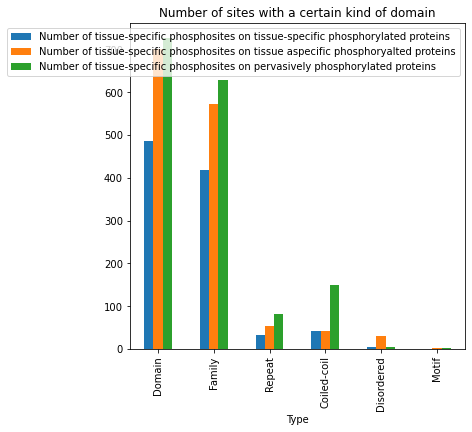

In [286]:
list_types = ["Domain", "Family", "Repeat", "Coiled-coil", "Disordered", "Motif"]
list_counts_tspec = []
list_counts_taspec = []
list_counts_gen = []
for element in list_types:
    temp_tspec = tspecsites_tspecproteins_pfam.loc[tspecsites_tspecproteins_pfam["type"]==element, :].groupby(["ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"})
    temp_taspec = tspecsites_taspecproteins_pfam.loc[tspecsites_taspecproteins_pfam["type"]==element, :].groupby(["ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"})
    temp_gen = tspecsites_genproteins_pfam.loc[tspecsites_genproteins_pfam["type"]==element, :].groupby(["ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"})
    count_tspec = temp_tspec.shape[0]
    count_taspec = temp_taspec.shape[0]
    count_gen = temp_gen.shape[0]
    list_counts_tspec.append(count_tspec)
    list_counts_taspec.append(count_taspec)
    list_counts_gen.append(count_gen)
df_types = pd.DataFrame({"Type": list_types, "Number of tissue-specific phosphosites on tissue-specific phosphorylated proteins": list_counts_tspec,
                        "Number of tissue-specific phosphosites on tissue aspecific phosphoryalted proteins": list_counts_taspec,
                         "Number of tissue-specific phosphosites on pervasively phosphorylated proteins": list_counts_gen})
df_types.plot(kind="bar", x="Type", figsize=(6,6), title="Number of sites with a certain kind of domain")

In [287]:
df_types_tissue = pd.DataFrame({"Tissue": list_tissues_STY})
list_counts_tspec = []
list_counts_taspec = []
list_counts_gen = []
for element in list_types:
    list_counts_tspec = []
    list_counts_taspec = []
    list_counts_gen = []
    for tissue in list_tissues_STY:
        temp_tspec = tspecsites_tspecproteins_pfam.loc[(tspecsites_tspecproteins_pfam["tissue_site"]==tissue)&(tspecsites_tspecproteins_pfam["type"]==element), :].groupby(["ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"})
        temp_taspec = tspecsites_taspecproteins_pfam.loc[(tspecsites_taspecproteins_pfam["tissue_site"]==tissue)&(tspecsites_taspecproteins_pfam["type"]==element), :].groupby(["ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"})
        temp_gen = tspecsites_genproteins_pfam.loc[(tspecsites_genproteins_pfam["tissue_site"]==tissue)&(tspecsites_genproteins_pfam["type"]==element), :].groupby(["ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"})
        count_tspec = temp_tspec.shape[0]
        count_taspec = temp_taspec.shape[0]
        count_gen = temp_gen.shape[0]
        list_counts_tspec.append(count_tspec)
        list_counts_taspec.append(count_taspec)
        list_counts_gen.append(count_gen)
    tspec_colname = element+"_tspec"
    taspec_colname = element+"_taspec"
    gen_colname = element+"_pervasive"
    df_types_tissue[tspec_colname] = list_counts_tspec
    df_types_tissue[taspec_colname] = list_counts_taspec
    df_types_tissue[gen_colname] = list_counts_gen
df_types_tissue

Tissue  Domain_tspec  Domain_taspec  Domain_pervasive  \
0              Adipose tissue             0              0                 0   
1                     B-cells             1              0                 0   
2                       Blood            52             89                75   
3                        Bone             1              1                 0   
4                       Brain             5              6                15   
5                      Breast             6              2                 6   
6         Cerebrospinal fluid             0              0                 0   
7                      Cervix             0              0                 0   
8                       Colon           107            192               188   
9               Dental plaque             0              2                 1   
10                  Esophagus             0              0                 0   
11                        Eye             0              0                 0   
12           Follicular fluid             0              0                 0   
13                      Heart             1              4                 4   
14                       Hela             0              0                 0   
15                     Kidney             0              1                 1   
16                      Liver            18             15                21   
17                       Lung            48             60                58   
18                 Lymph node            65             84                61   
19            Menstrual fluid             1              0                 0   
20                  Monocytes             3              9                 6   
21               Nasal polyps             0              0                 0   
22                   NK-cells             0              3                 1   
23                      Ovary             0              0                 0   
24                   Pancreas             5              4                 2   
25           Palatine tonsils             0              0                 0   
26              Parotid gland             0              0                 0   
27                       PBMC            54             91               116   
28  Peritoneal dialysis fluid             0              0                 0   
29                   Placenta            47             52                49   
30            Skeletal muscle            14              7                13   
31                       Skin            28             54                68   
32            Small intestine             8              5                16   
33            Synovial tissue             0              0                 0   
34                    T-cells             0              0                 0   
35                     Testis             9              5                10   
36                      Tooth             0              0                 0   
37             Umbilical cord             4              5                 8   
38                     Ureter             1              0                 1   
39            Urinary bladder             3              3                 4   
40                      Urine             5              8                 2   

    Family_tspec  Family_taspec  Family_pervasive  Repeat_tspec  \
0              0              0                 0             0   
1              1              1                 1             0   
2             39             76                45             4   
3              0              0                 0             0   
4              3              3                 5             0   
5              0              0                 0             0   
6              0              0                 2             0   
7              0              1                 0             0   
8            131            229               185          

<AxesSubplot:xlabel='Tissue'>

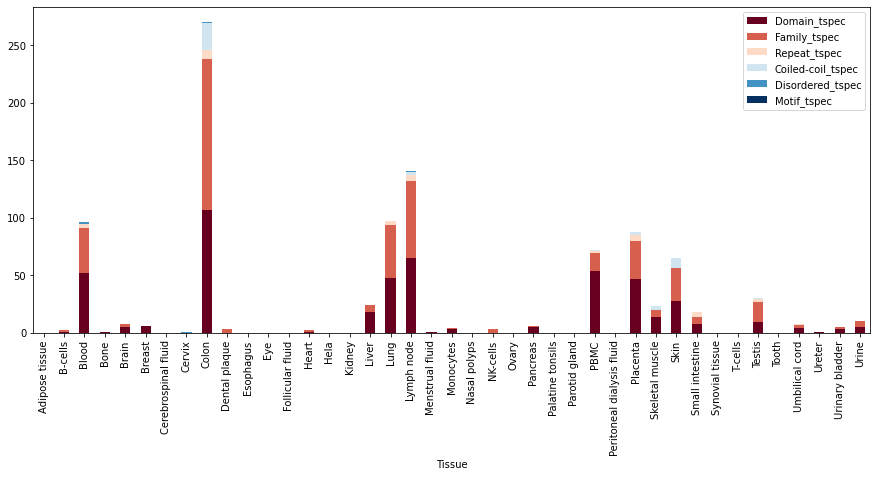

In [288]:
df_types_tissue.loc[:, ((df_types_tissue.columns.str.contains("tspec"))|df_types_tissue.columns.str.contains("Tissue"))].plot(kind="bar", x="Tissue", figsize=(15,6), stacked=True, colormap="RdBu")

<AxesSubplot:xlabel='Tissue'>

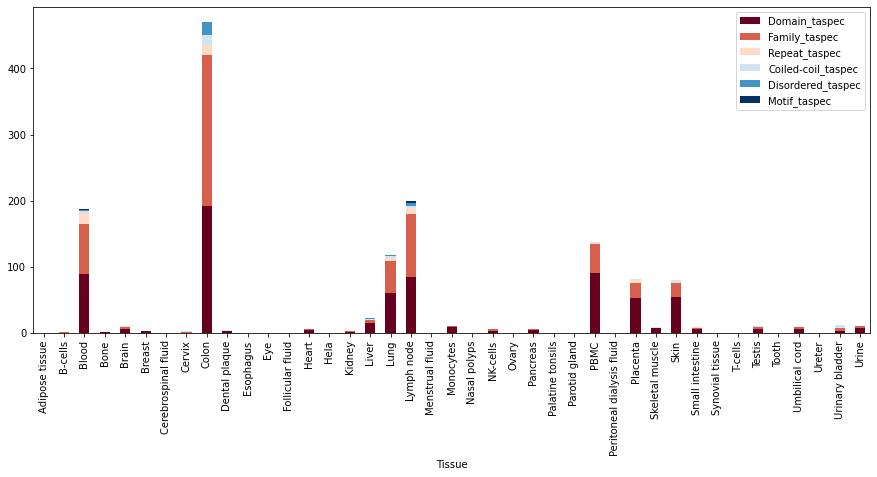

In [289]:
df_types_tissue.loc[:, ((df_types_tissue.columns.str.contains("taspec"))|df_types_tissue.columns.str.contains("Tissue"))].plot(kind="bar", x="Tissue", figsize=(15,6), stacked=True, colormap="RdBu")

<AxesSubplot:xlabel='Tissue'>

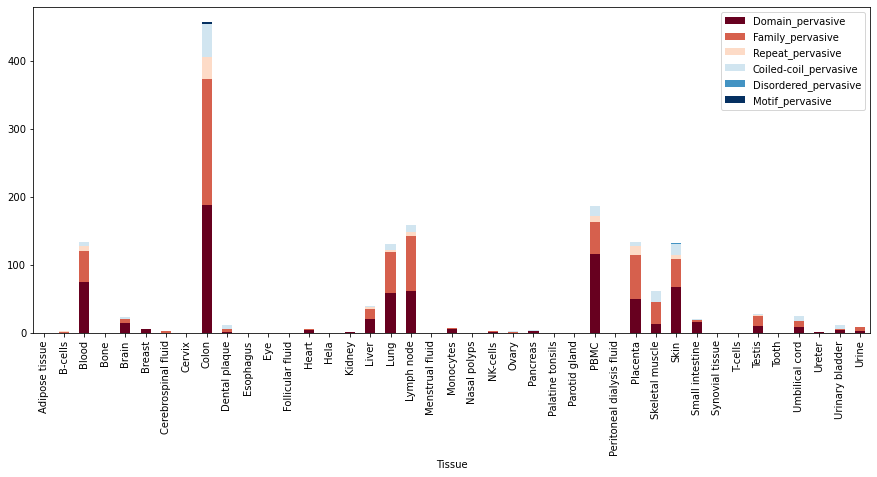

In [290]:
df_types_tissue.loc[:, ((df_types_tissue.columns.str.contains("pervasive"))|df_types_tissue.columns.str.contains("Tissue"))].plot(kind="bar", x="Tissue", figsize=(15,6), stacked=True, colormap="RdBu")

C:\Users\hannedvo\AppData\Local\Temp\8/ipykernel_24100/1914250863.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_domain_tissue["Total_tspec"] = df_types_tissue.loc[:, (df_types_tissue.columns.str.contains("tspec"))].sum(axis=1)
C:\Users\hannedvo\AppData\Local\Temp\8/ipykernel_24100/1914250863.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_domain_tissue["Total_taspec"] = df_types_tissue.loc[:, (df_types_tissue.columns.str.contains("taspec"))].sum(axis=1)
C:\Users\hannedvo\AppData\Local\Temp\8

<AxesSubplot:title={'center':"Percentage proteins associated with 'Domain' out of the total amount of annotated proteins in that tissue"}, xlabel='Tissue'>

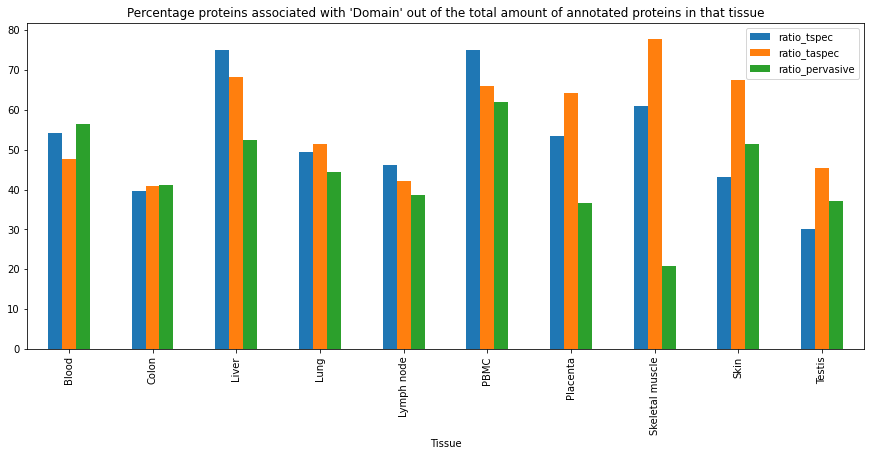

In [291]:
df_domain_tissue = df_types_tissue.loc[:,( df_types_tissue.columns.str.contains("Domain")|df_types_tissue.columns.str.contains("Tissue"))]
df_domain_tissue["Total_tspec"] = df_types_tissue.loc[:, (df_types_tissue.columns.str.contains("tspec"))].sum(axis=1)
df_domain_tissue["Total_taspec"] = df_types_tissue.loc[:, (df_types_tissue.columns.str.contains("taspec"))].sum(axis=1)
df_domain_tissue["Total_pervasive"] = df_types_tissue.loc[:, (df_types_tissue.columns.str.contains("pervasive"))].sum(axis=1)
df_domain_tissue = df_domain_tissue[(df_domain_tissue["Total_tspec"]>=25)|(df_domain_tissue["Total_taspec"]>=25)|(df_domain_tissue["Total_pervasive"]>=25)]
df_domain_tissue["ratio_tspec"] = df_domain_tissue["Domain_tspec"]*100/df_domain_tissue["Total_tspec"]
df_domain_tissue["ratio_taspec"] = df_domain_tissue["Domain_taspec"]*100/df_domain_tissue["Total_taspec"]
df_domain_tissue["ratio_pervasive"] = df_domain_tissue["Domain_pervasive"]*100/df_domain_tissue["Total_pervasive"]

df_domain_tissue[["Tissue", "ratio_tspec", "ratio_taspec", "ratio_pervasive"]].plot(kind="bar", x="Tissue", figsize=(15,6), title="Percentage proteins associated with 'Domain' out of the total amount of annotated proteins in that tissue")

In [292]:
df_domain_tissue

Tissue  Domain_tspec  Domain_taspec  Domain_pervasive  \
2             Blood            52             89                75   
8             Colon           107            192               188   
16            Liver            18             15                21   
17             Lung            48             60                58   
18       Lymph node            65             84                61   
27             PBMC            54             91               116   
29         Placenta            47             52                49   
30  Skeletal muscle            14              7                13   
31             Skin            28             54                68   
35           Testis             9              5                10   

    Total_tspec  Total_taspec  Total_pervasive  ratio_tspec  ratio_taspec  \
2            96           187              133    54.166667     47.593583   
8           270           470              457    39.629630     40.851064   
16           24            22               40    75.000000     68.181818   
17           97           117              131    49.484536     51.282051   
18          141           199              158    46.099291     42.211055   
27           72           138              187    75.000000     65.942029   
29           88            81              134    53.409091     64.197531   
30           23             9               62    60.869565     77.777778   
31           65            80              132    43.076923     67.500000   
35           30            11               27    30.000000     45.454545   

    ratio_pervasive  
2         56.390977  
8         41.137856  
16        52.500000  
17        44.274809  
18        38.607595  
27        62.032086  
29        36.567164  
30        20.967742  
31        51.515152  
35        37.037037

C:\Users\hannedvo\AppData\Local\Temp\8/ipykernel_24100/3711207709.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_family_tissue["Total_tspec"] = df_types_tissue.loc[:, (df_types_tissue.columns.str.contains("tspec"))].sum(axis=1)
C:\Users\hannedvo\AppData\Local\Temp\8/ipykernel_24100/3711207709.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_family_tissue["Total_taspec"] = df_types_tissue.loc[:, (df_types_tissue.columns.str.contains("taspec"))].sum(axis=1)
C:\Users\hannedvo\AppData\Local\Temp\8

<AxesSubplot:title={'center':"Percentage proteins associated with 'Family' out of the total amount of annotated proteins in that tissue"}, xlabel='Tissue'>

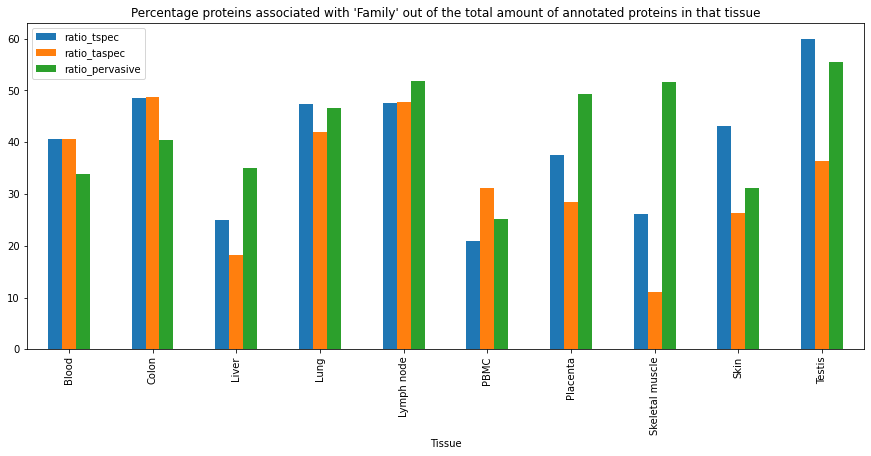

In [293]:
df_family_tissue = df_types_tissue.loc[:,( df_types_tissue.columns.str.contains("Family")|df_types_tissue.columns.str.contains("Tissue"))]
df_family_tissue["Total_tspec"] = df_types_tissue.loc[:, (df_types_tissue.columns.str.contains("tspec"))].sum(axis=1)
df_family_tissue["Total_taspec"] = df_types_tissue.loc[:, (df_types_tissue.columns.str.contains("taspec"))].sum(axis=1)
df_family_tissue["Total_pervasive"] = df_types_tissue.loc[:, (df_types_tissue.columns.str.contains("pervasive"))].sum(axis=1)
df_family_tissue = df_family_tissue[(df_family_tissue["Total_tspec"]>=25)|(df_family_tissue["Total_taspec"]>=25)|(df_family_tissue["Total_pervasive"]>=25)]
df_family_tissue["ratio_tspec"] = df_family_tissue["Family_tspec"]*100/df_family_tissue["Total_tspec"]
df_family_tissue["ratio_taspec"] = df_family_tissue["Family_taspec"]*100/df_family_tissue["Total_taspec"]
df_family_tissue["ratio_pervasive"] = df_family_tissue["Family_pervasive"]*100/df_family_tissue["Total_pervasive"]

df_family_tissue[["Tissue", "ratio_tspec", "ratio_taspec", "ratio_pervasive"]].plot(kind="bar", x="Tissue", figsize=(15,6), title="Percentage proteins associated with 'Family' out of the total amount of annotated proteins in that tissue")

In [294]:
df_family_tissue

Tissue  Family_tspec  Family_taspec  Family_pervasive  \
2             Blood            39             76                45   
8             Colon           131            229               185   
16            Liver             6              4                14   
17             Lung            46             49                61   
18       Lymph node            67             95                82   
27             PBMC            15             43                47   
29         Placenta            33             23                66   
30  Skeletal muscle             6              1                32   
31             Skin            28             21                41   
35           Testis            18              4                15   

    Total_tspec  Total_taspec  Total_pervasive  ratio_tspec  ratio_taspec  \
2            96           187              133    40.625000     40.641711   
8           270           470              457    48.518519     48.723404   
16           24            22               40    25.000000     18.181818   
17           97           117              131    47.422680     41.880342   
18          141           199              158    47.517730     47.738693   
27           72           138              187    20.833333     31.159420   
29           88            81              134    37.500000     28.395062   
30           23             9               62    26.086957     11.111111   
31           65            80              132    43.076923     26.250000   
35           30            11               27    60.000000     36.363636   

    ratio_pervasive  
2         33.834586  
8         40.481400  
16        35.000000  
17        46.564885  
18        51.898734  
27        25.133690  
29        49.253731  
30        51.612903  
31        31.060606  
35        55.555556

C:\Users\hannedvo\AppData\Local\Temp\8/ipykernel_24100/2477384024.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_repeat_tissue["Total_tspec"] = df_types_tissue.loc[:, (df_types_tissue.columns.str.contains("tspec"))].sum(axis=1)
C:\Users\hannedvo\AppData\Local\Temp\8/ipykernel_24100/2477384024.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_repeat_tissue["Total_taspec"] = df_types_tissue.loc[:, (df_types_tissue.columns.str.contains("taspec"))].sum(axis=1)
C:\Users\hannedvo\AppData\Local\Temp\8

<AxesSubplot:title={'center':"Percentage proteins associated with 'Repeat' out of the total amount of annotated proteins in that tissue"}, xlabel='Tissue'>

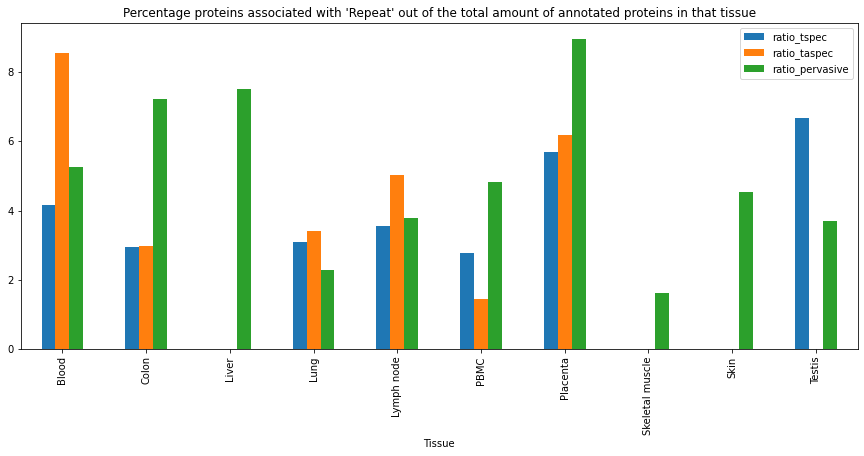

In [295]:
df_repeat_tissue = df_types_tissue.loc[:,( df_types_tissue.columns.str.contains("Repeat")|df_types_tissue.columns.str.contains("Tissue"))]
df_repeat_tissue["Total_tspec"] = df_types_tissue.loc[:, (df_types_tissue.columns.str.contains("tspec"))].sum(axis=1)
df_repeat_tissue["Total_taspec"] = df_types_tissue.loc[:, (df_types_tissue.columns.str.contains("taspec"))].sum(axis=1)
df_repeat_tissue["Total_pervasive"] = df_types_tissue.loc[:, (df_types_tissue.columns.str.contains("pervasive"))].sum(axis=1)
df_repeat_tissue = df_repeat_tissue[(df_repeat_tissue["Total_tspec"]>=25)|(df_repeat_tissue["Total_taspec"]>=25)|(df_repeat_tissue["Total_pervasive"]>=25)]
df_repeat_tissue["ratio_tspec"] = df_repeat_tissue["Repeat_tspec"]*100/df_repeat_tissue["Total_tspec"]
df_repeat_tissue["ratio_taspec"] = df_repeat_tissue["Repeat_taspec"]*100/df_repeat_tissue["Total_taspec"]
df_repeat_tissue["ratio_pervasive"] = df_repeat_tissue["Repeat_pervasive"]*100/df_repeat_tissue["Total_pervasive"]

df_repeat_tissue[["Tissue", "ratio_tspec", "ratio_taspec", "ratio_pervasive"]].plot(kind="bar", x="Tissue", figsize=(15,6), title="Percentage proteins associated with 'Repeat' out of the total amount of annotated proteins in that tissue")

In [296]:
df_repeat_tissue

Tissue  Repeat_tspec  Repeat_taspec  Repeat_pervasive  \
2             Blood             4             16                 7   
8             Colon             8             14                33   
16            Liver             0              0                 3   
17             Lung             3              4                 3   
18       Lymph node             5             10                 6   
27             PBMC             2              2                 9   
29         Placenta             5              5                12   
30  Skeletal muscle             0              0                 1   
31             Skin             0              0                 6   
35           Testis             2              0                 1   

    Total_tspec  Total_taspec  Total_pervasive  ratio_tspec  ratio_taspec  \
2            96           187              133     4.166667      8.556150   
8           270           470              457     2.962963      2.978723   
16           24            22               40     0.000000      0.000000   
17           97           117              131     3.092784      3.418803   
18          141           199              158     3.546099      5.025126   
27           72           138              187     2.777778      1.449275   
29           88            81              134     5.681818      6.172840   
30           23             9               62     0.000000      0.000000   
31           65            80              132     0.000000      0.000000   
35           30            11               27     6.666667      0.000000   

    ratio_pervasive  
2          5.263158  
8          7.221007  
16         7.500000  
17         2.290076  
18         3.797468  
27         4.812834  
29         8.955224  
30         1.612903  
31         4.545455  
35         3.703704

C:\Users\hannedvo\AppData\Local\Temp\8/ipykernel_24100/2034386475.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_coiled_coil_tissue["Total_tspec"] = df_types_tissue.loc[:, (df_types_tissue.columns.str.contains("tspec"))].sum(axis=1)
C:\Users\hannedvo\AppData\Local\Temp\8/ipykernel_24100/2034386475.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_coiled_coil_tissue["Total_taspec"] = df_types_tissue.loc[:, (df_types_tissue.columns.str.contains("taspec"))].sum(axis=1)
C:\Users\hannedvo\AppData\Lo

<AxesSubplot:title={'center':"Percentage proteins associated with 'Coiled-coil' out of the total amount of annotated proteins in that tissue"}, xlabel='Tissue'>

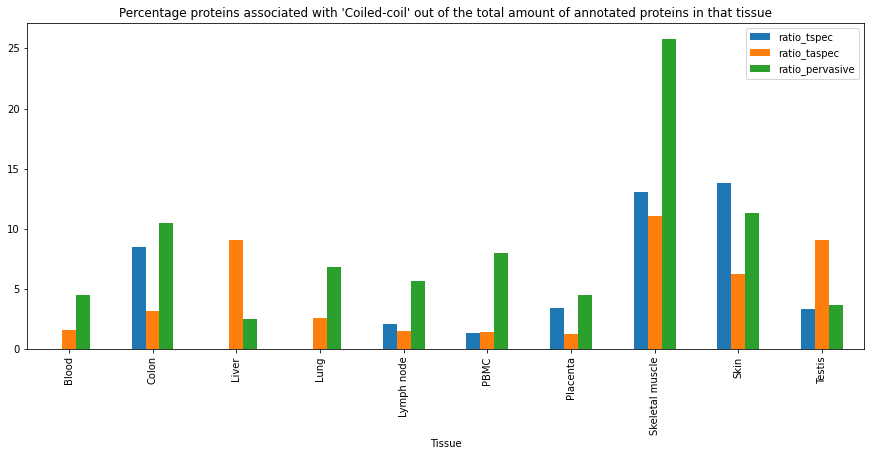

In [297]:
df_coiled_coil_tissue = df_types_tissue.loc[:,( df_types_tissue.columns.str.contains("Coiled-coil")|df_types_tissue.columns.str.contains("Tissue"))]
df_coiled_coil_tissue["Total_tspec"] = df_types_tissue.loc[:, (df_types_tissue.columns.str.contains("tspec"))].sum(axis=1)
df_coiled_coil_tissue["Total_taspec"] = df_types_tissue.loc[:, (df_types_tissue.columns.str.contains("taspec"))].sum(axis=1)
df_coiled_coil_tissue["Total_pervasive"] = df_types_tissue.loc[:, (df_types_tissue.columns.str.contains("pervasive"))].sum(axis=1)
df_coiled_coil_tissue = df_coiled_coil_tissue[(df_coiled_coil_tissue["Total_tspec"]>=25)|(df_coiled_coil_tissue["Total_taspec"]>=25)|(df_coiled_coil_tissue["Total_pervasive"]>=25)]
df_coiled_coil_tissue["ratio_tspec"] = df_coiled_coil_tissue["Coiled-coil_tspec"]*100/df_coiled_coil_tissue["Total_tspec"]
df_coiled_coil_tissue["ratio_taspec"] = df_coiled_coil_tissue["Coiled-coil_taspec"]*100/df_coiled_coil_tissue["Total_taspec"]
df_coiled_coil_tissue["ratio_pervasive"] = df_coiled_coil_tissue["Coiled-coil_pervasive"]*100/df_coiled_coil_tissue["Total_pervasive"]

df_coiled_coil_tissue[["Tissue", "ratio_tspec", "ratio_taspec", "ratio_pervasive"]].plot(kind="bar", x="Tissue", figsize=(15,6), title="Percentage proteins associated with 'Coiled-coil' out of the total amount of annotated proteins in that tissue")

In [298]:
df_coiled_coil_tissue

Tissue  Coiled-coil_tspec  Coiled-coil_taspec  \
2             Blood                  0                   3   
8             Colon                 23                  15   
16            Liver                  0                   2   
17             Lung                  0                   3   
18       Lymph node                  3                   3   
27             PBMC                  1                   2   
29         Placenta                  3                   1   
30  Skeletal muscle                  3                   1   
31             Skin                  9                   5   
35           Testis                  1                   1   

    Coiled-coil_pervasive  Total_tspec  Total_taspec  Total_pervasive  \
2                       6           96           187              133   
8                      48          270           470              457   
16                      1           24            22               40   
17                      9           97           117              131   
18                      9          141           199              158   
27                     15           72           138              187   
29                      6           88            81              134   
30                     16           23             9               62   
31                     15           65            80              132   
35                      1           30            11               27   

    ratio_tspec  ratio_taspec  ratio_pervasive  
2      0.000000      1.604278         4.511278  
8      8.518519      3.191489        10.503282  
16     0.000000      9.090909         2.500000  
17     0.000000      2.564103         6.870229  
18     2.127660      1.507538         5.696203  
27     1.388889      1.449275         8.021390  
29     3.409091      1.234568         4.477612  
30    13.043478     11.111111        25.806452  
31    13.846154      6.250000        11.363636  
35     3.333333      9.090909         3.703704

C:\Users\hannedvo\AppData\Local\Temp\8/ipykernel_24100/3779459206.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_disordered_tissue["Total_tspec"] = df_types_tissue.loc[:, (df_types_tissue.columns.str.contains("tspec"))].sum(axis=1)
C:\Users\hannedvo\AppData\Local\Temp\8/ipykernel_24100/3779459206.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_disordered_tissue["Total_taspec"] = df_types_tissue.loc[:, (df_types_tissue.columns.str.contains("taspec"))].sum(axis=1)
C:\Users\hannedvo\AppData\Loca

<AxesSubplot:title={'center':"Percentage proteins associated with 'Disordered' out of the total amount of annotated proteins in that tissue"}, xlabel='Tissue'>

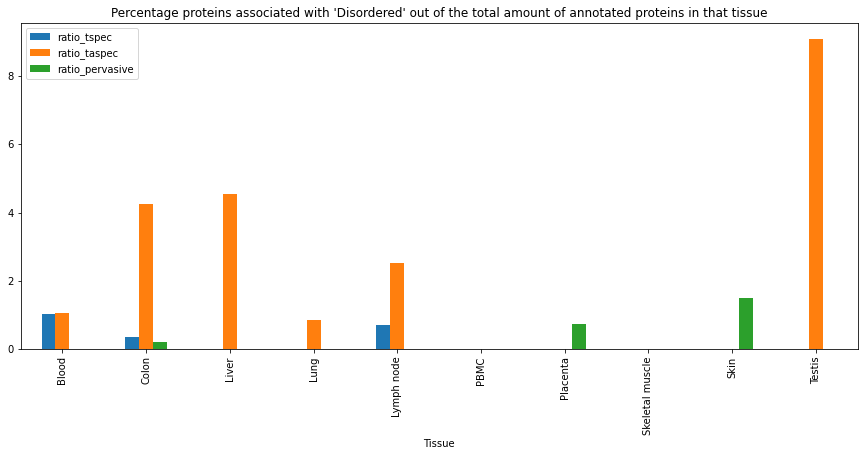

In [299]:
df_disordered_tissue = df_types_tissue.loc[:,( df_types_tissue.columns.str.contains("Disordered")|df_types_tissue.columns.str.contains("Tissue"))]
df_disordered_tissue["Total_tspec"] = df_types_tissue.loc[:, (df_types_tissue.columns.str.contains("tspec"))].sum(axis=1)
df_disordered_tissue["Total_taspec"] = df_types_tissue.loc[:, (df_types_tissue.columns.str.contains("taspec"))].sum(axis=1)
df_disordered_tissue["Total_pervasive"] = df_types_tissue.loc[:, (df_types_tissue.columns.str.contains("pervasive"))].sum(axis=1)
df_disordered_tissue = df_disordered_tissue[(df_disordered_tissue["Total_tspec"]>=25)|(df_disordered_tissue["Total_taspec"]>=25)|(df_disordered_tissue["Total_pervasive"]>=25)]
df_disordered_tissue["ratio_tspec"] = df_disordered_tissue["Disordered_tspec"]*100/df_disordered_tissue["Total_tspec"]
df_disordered_tissue["ratio_taspec"] = df_disordered_tissue["Disordered_taspec"]*100/df_disordered_tissue["Total_taspec"]
df_disordered_tissue["ratio_pervasive"] = df_disordered_tissue["Disordered_pervasive"]*100/df_disordered_tissue["Total_pervasive"]

df_disordered_tissue[["Tissue", "ratio_tspec", "ratio_taspec", "ratio_pervasive"]].plot(kind="bar", x="Tissue", figsize=(15,6), title="Percentage proteins associated with 'Disordered' out of the total amount of annotated proteins in that tissue")

In [300]:
df_disordered_tissue

Tissue  Disordered_tspec  Disordered_taspec  \
2             Blood                 1                  2   
8             Colon                 1                 20   
16            Liver                 0                  1   
17             Lung                 0                  1   
18       Lymph node                 1                  5   
27             PBMC                 0                  0   
29         Placenta                 0                  0   
30  Skeletal muscle                 0                  0   
31             Skin                 0                  0   
35           Testis                 0                  1   

    Disordered_pervasive  Total_tspec  Total_taspec  Total_pervasive  \
2                      0           96           187              133   
8                      1          270           470              457   
16                     0           24            22               40   
17                     0           97           117              131   
18                     0          141           199              158   
27                     0           72           138              187   
29                     1           88            81              134   
30                     0           23             9               62   
31                     2           65            80              132   
35                     0           30            11               27   

    ratio_tspec  ratio_taspec  ratio_pervasive  
2      1.041667      1.069519         0.000000  
8      0.370370      4.255319         0.218818  
16     0.000000      4.545455         0.000000  
17     0.000000      0.854701         0.000000  
18     0.709220      2.512563         0.000000  
27     0.000000      0.000000         0.000000  
29     0.000000      0.000000         0.746269  
30     0.000000      0.000000         0.000000  
31     0.000000      0.000000         1.515152  
35     0.000000      9.090909         0.000000

C:\Users\hannedvo\AppData\Local\Temp\8/ipykernel_24100/3844705944.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_motif_tissue["Total_tspec"] = df_types_tissue.loc[:, (df_types_tissue.columns.str.contains("tspec"))].sum(axis=1)
C:\Users\hannedvo\AppData\Local\Temp\8/ipykernel_24100/3844705944.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_motif_tissue["Total_taspec"] = df_types_tissue.loc[:, (df_types_tissue.columns.str.contains("taspec"))].sum(axis=1)
C:\Users\hannedvo\AppData\Local\Temp\8/i

<AxesSubplot:title={'center':"Percentage proteins associated with 'Motif' out of the total amount of annotated proteins in that tissue"}, xlabel='Tissue'>

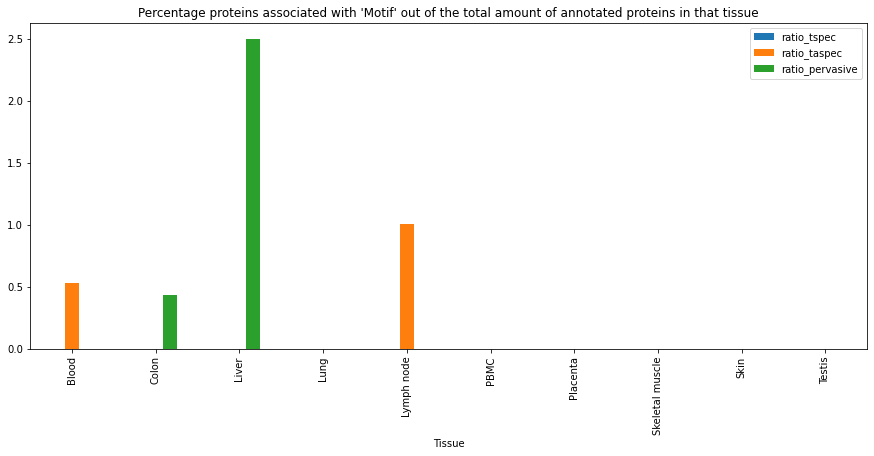

In [301]:
df_motif_tissue = df_types_tissue.loc[:,( df_types_tissue.columns.str.contains("Motif")|df_types_tissue.columns.str.contains("Tissue"))]
df_motif_tissue["Total_tspec"] = df_types_tissue.loc[:, (df_types_tissue.columns.str.contains("tspec"))].sum(axis=1)
df_motif_tissue["Total_taspec"] = df_types_tissue.loc[:, (df_types_tissue.columns.str.contains("taspec"))].sum(axis=1)
df_motif_tissue["Total_pervasive"] = df_types_tissue.loc[:, (df_types_tissue.columns.str.contains("pervasive"))].sum(axis=1)
df_motif_tissue = df_motif_tissue[(df_motif_tissue["Total_tspec"]>=25)|(df_motif_tissue["Total_taspec"]>=25)|(df_motif_tissue["Total_pervasive"]>=25)]
df_motif_tissue["ratio_tspec"] = df_motif_tissue["Motif_tspec"]*100/df_motif_tissue["Total_tspec"]
df_motif_tissue["ratio_taspec"] = df_motif_tissue["Motif_taspec"]*100/df_motif_tissue["Total_taspec"]
df_motif_tissue["ratio_pervasive"] = df_motif_tissue["Motif_pervasive"]*100/df_motif_tissue["Total_pervasive"]

df_motif_tissue[["Tissue", "ratio_tspec", "ratio_taspec", "ratio_pervasive"]].plot(kind="bar", x="Tissue", figsize=(15,6), title="Percentage proteins associated with 'Motif' out of the total amount of annotated proteins in that tissue")

In [302]:
df_motif_tissue

Tissue  Motif_tspec  Motif_taspec  Motif_pervasive  Total_tspec  \
2             Blood            0             1                0           96   
8             Colon            0             0                2          270   
16            Liver            0             0                1           24   
17             Lung            0             0                0           97   
18       Lymph node            0             2                0          141   
27             PBMC            0             0                0           72   
29         Placenta            0             0                0           88   
30  Skeletal muscle            0             0                0           23   
31             Skin            0             0                0           65   
35           Testis            0             0                0           30   

    Total_taspec  Total_pervasive  ratio_tspec  ratio_taspec  ratio_pervasive  
2            187              133          0.0      0.534759         0.000000  
8            470              457          0.0      0.000000         0.437637  
16            22               40          0.0      0.000000         2.500000  
17           117              131          0.0      0.000000         0.000000  
18           199              158          0.0      1.005025         0.000000  
27           138              187          0.0      0.000000         0.000000  
29            81              134          0.0      0.000000         0.000000  
30             9               62          0.0      0.000000         0.000000  
31            80              132          0.0      0.000000         0.000000  
35            11               27          0.0      0.000000         0.000000

## 8.2 Domain names

<AxesSubplot:title={'center':'Number of tissue-specific phosphosites on proteins of any of the three categories in a type of domain'}, xlabel='hmm name'>

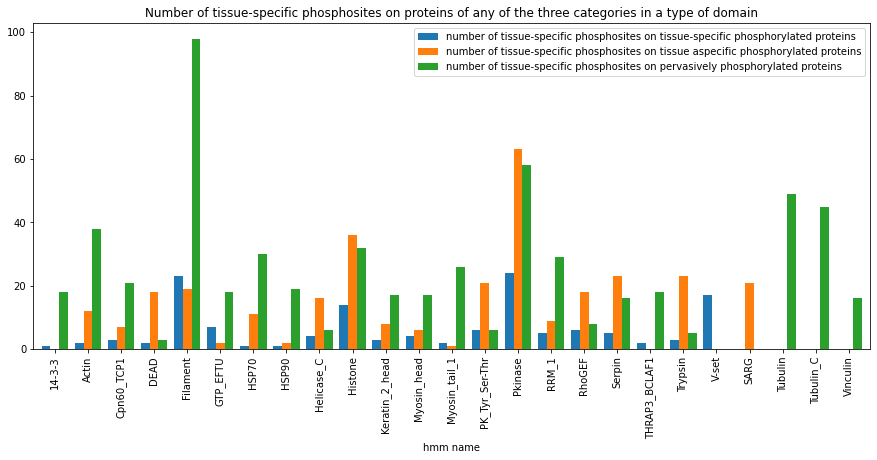

In [303]:
tspec_proteins_pfam_hmm_name = tspecsites_tspecproteins_pfam.groupby(["hmm name", "ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"})
taspec_proteins_pfam_hmm_name = tspecsites_taspecproteins_pfam.groupby(["hmm name", "ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"})
gen_proteins_pfam_hmm_name = tspecsites_genproteins_pfam.groupby(["hmm name", "ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"})


tspec_proteins_pfam_hmm_name = tspec_proteins_pfam_hmm_name.groupby(["hmm name"], as_index=False)["ACC_ID"].count()
tspec_proteins_pfam_hmm_name.rename(columns ={"ACC_ID": "number of tissue-specific phosphosites on tissue-specific phosphorylated proteins"}, inplace=True, )
tspec_proteins_pfam_hmm_name.set_index("hmm name", inplace=True)
taspec_proteins_pfam_hmm_name = taspec_proteins_pfam_hmm_name.groupby(["hmm name"], as_index=False)["ACC_ID"].count()
taspec_proteins_pfam_hmm_name.rename(columns ={"ACC_ID": "number of tissue-specific phosphosites on tissue aspecific phosphorylated proteins"}, inplace=True)
taspec_proteins_pfam_hmm_name.set_index("hmm name", inplace=True)
gen_proteins_pfam_hmm_name = gen_proteins_pfam_hmm_name.groupby(["hmm name"], as_index=False)["ACC_ID"].count()
gen_proteins_pfam_hmm_name.rename(columns ={"ACC_ID": "number of tissue-specific phosphosites on pervasively phosphorylated proteins"}, inplace=True)
gen_proteins_pfam_hmm_name.set_index("hmm name", inplace=True)

pfam_hmm_name = pd.concat([tspec_proteins_pfam_hmm_name, taspec_proteins_pfam_hmm_name, gen_proteins_pfam_hmm_name], axis=1)

pfam_hmm_name[(pfam_hmm_name["number of tissue-specific phosphosites on tissue-specific phosphorylated proteins"]>15)|
             (pfam_hmm_name["number of tissue-specific phosphosites on tissue aspecific phosphorylated proteins"]>15)|
             (pfam_hmm_name["number of tissue-specific phosphosites on pervasively phosphorylated proteins"]>15)].plot(kind="bar", figsize=(15,6), width=0.8, title="Number of tissue-specific phosphosites on proteins of any of the three categories in a type of domain")

## 8.3 Clans

<AxesSubplot:title={'center':'Number of phosphosites in a domain in the indicated clan'}, xlabel='clan'>

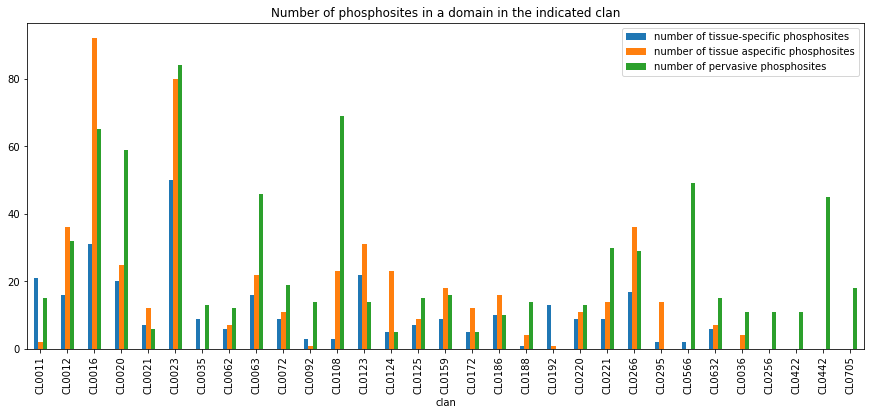

In [304]:
tspec_protein_pfam_clan = tspecsites_tspecproteins_pfam.groupby(["clan", "ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"})
taspec_protein_pfam_clan = tspecsites_taspecproteins_pfam.groupby(["clan", "ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"})
gen_protein_pfam_clan = tspecsites_genproteins_pfam.groupby(["clan", "ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"})


tspec_proteins_pfam_clan = tspec_protein_pfam_clan.groupby(["clan"], as_index=False)["ACC_ID"].count()
tspec_proteins_pfam_clan.rename(columns ={"ACC_ID": "number of tissue-specific phosphosites"}, inplace=True, )
tspec_proteins_pfam_clan.set_index("clan", inplace=True)
taspec_proteins_pfam_clan = taspec_protein_pfam_clan.groupby(["clan"], as_index=False)["ACC_ID"].count()
taspec_proteins_pfam_clan.rename(columns ={"ACC_ID": "number of tissue aspecific phosphosites"}, inplace=True)
taspec_proteins_pfam_clan.set_index("clan", inplace=True)
gen_proteins_pfam_clan = gen_protein_pfam_clan.groupby(["clan"], as_index=False)["ACC_ID"].count()
gen_proteins_pfam_clan.rename(columns ={"ACC_ID": "number of pervasive phosphosites"}, inplace=True)
gen_proteins_pfam_clan.set_index("clan", inplace=True)

pfam_clan = pd.concat([tspec_proteins_pfam_clan, taspec_proteins_pfam_clan, gen_proteins_pfam_clan], axis=1)

pfam_clan[(pfam_clan["number of tissue-specific phosphosites"]>10)|
             (pfam_clan["number of tissue aspecific phosphosites"]>10)|
             (pfam_clan["number of pervasive phosphosites"]>10)].drop(["No_clan"]).plot(kind="bar", figsize=(15,6), title="Number of phosphosites in a domain in the indicated clan")

Again, we verify whether any clans/domains or families are more associated with a tissue than others, similar to what has been done perviously. This time, we only consider tissue-specific P-sites.

In [305]:
temp = tspecsites_tspecproteins_pfam.loc[tspecsites_tspecproteins_pfam["Adipose tissue"]==1, :].groupby(["clan", "ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"})
df_clan_tspec_Adipose_tissue = temp.groupby(["clan"], as_index=False)["ACC_ID"].count()
df_clan_tspec_Adipose_tissue.rename({"ACC_ID": "number of tissue-specific phosphosites on tissue-specific phosphorylated proteins (Adipose tissue)"}, inplace=True, axis=1)
df_clan_tspec_Adipose_tissue["Total"] = tspecsites_tspecproteins_pfam.loc[tspecsites_tspecproteins_pfam["Adipose tissue"]==1, :].groupby(["ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"}).shape[0]
df_clan_tspec_Adipose_tissue["ratio of tissue-specific phosphosites on tissue-specific phosphorylated proteins (Adipose tissue)"] = df_clan_tspec_Adipose_tissue["number of tissue-specific phosphosites on tissue-specific phosphorylated proteins (Adipose tissue)"]*100/df_clan_tspec_Adipose_tissue["Total"]
df_clan_tspec_Adipose_tissue.drop(["number of tissue-specific phosphosites on tissue-specific phosphorylated proteins (Adipose tissue)", "Total"], axis=1, inplace=True)
df_clan_tspec_Adipose_tissue.set_index(["clan"], inplace=True)
temp = tspecsites_tspecproteins_pfam.loc[tspecsites_tspecproteins_pfam["Blood"]==1, :].groupby(["clan", "ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"})
df_clan_tspec_Blood = temp.groupby(["clan"], as_index=False)["ACC_ID"].count()
df_clan_tspec_Blood.rename({"ACC_ID": "number of tissue-specific phosphosites on tissue-specific phosphorylated proteins (Blood)"}, inplace=True, axis=1)
df_clan_tspec_Blood["Total"] = tspecsites_tspecproteins_pfam.loc[tspecsites_tspecproteins_pfam["Blood"]==1, :].groupby(["ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"}).shape[0]
df_clan_tspec_Blood["ratio of tissue-specific phosphosites on tissue-specific phosphorylated proteins (Blood)"] = df_clan_tspec_Blood["number of tissue-specific phosphosites on tissue-specific phosphorylated proteins (Blood)"]*100/df_clan_tspec_Blood["Total"]
df_clan_tspec_Blood.drop(["number of tissue-specific phosphosites on tissue-specific phosphorylated proteins (Blood)", "Total"], axis=1, inplace=True)
df_clan_tspec_Blood.set_index(["clan"], inplace=True)
temp = tspecsites_tspecproteins_pfam.loc[tspecsites_tspecproteins_pfam["Brain"]==1, :].groupby(["clan", "ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"})
df_clan_tspec_Brain = temp.groupby(["clan"], as_index=False)["ACC_ID"].count()
df_clan_tspec_Brain.rename({"ACC_ID": "number of tissue-specific phosphosites on tissue-specific phosphorylated proteins (Brain)"}, inplace=True, axis=1)
df_clan_tspec_Brain["Total"] = tspecsites_tspecproteins_pfam.loc[tspecsites_tspecproteins_pfam["Brain"]==1, :].groupby(["ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"}).shape[0]
df_clan_tspec_Brain["ratio of tissue-specific phosphosites on tissue-specific phosphorylated proteins (Brain)"] = df_clan_tspec_Brain["number of tissue-specific phosphosites on tissue-specific phosphorylated proteins (Brain)"]*100/df_clan_tspec_Brain["Total"]
df_clan_tspec_Brain.drop(["number of tissue-specific phosphosites on tissue-specific phosphorylated proteins (Brain)", "Total"], axis=1, inplace=True)
df_clan_tspec_Brain.set_index(["clan"], inplace=True)
temp = tspecsites_tspecproteins_pfam.loc[tspecsites_tspecproteins_pfam["Cerebrospinal fluid"]==1, :].groupby(["clan", "ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"})
df_clan_tspec_Cerebrospinal_fluid = temp.groupby(["clan"], as_index=False)["ACC_ID"].count()
df_clan_tspec_Cerebrospinal_fluid.rename({"ACC_ID": "number of tissue-specific phosphosites on tissue-specific phosphorylated proteins (Cerebrospinal fluid)"}, inplace=True, axis=1)
df_clan_tspec_Cerebrospinal_fluid["Total"] = tspecsites_tspecproteins_pfam.loc[tspecsites_tspecproteins_pfam["Cerebrospinal fluid"]==1, :].groupby(["ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"}).shape[0]
df_clan_tspec_Cerebrospinal_fluid["ratio of tissue-specific phosphosites on tissue-specific phosphorylated proteins (Cerebrospinal fluid)"] = df_clan_tspec_Cerebrospinal_fluid["number of tissue-specific phosphosites on tissue-specific phosphorylated proteins (Cerebrospinal fluid)"]*100/df_clan_tspec_Cerebrospinal_fluid["Total"]
df_clan_tspec_Cerebrospinal_fluid.drop(["number of tissue-specific phosphosites on tissue-specific phosphorylated proteins (Cerebrospinal fluid)", "Total"], axis=1, inplace=True)
df_clan_tspec_Cerebrospinal_fluid.set_index(["clan"], inplace=True)
temp = tspecsites_tspecproteins_pfam.loc[tspecsites_tspecproteins_pfam["Colon"]==1, :].groupby(["clan", "ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"})
df_clan_tspec_Colon = temp.groupby(["clan"], as_index=False)["ACC_ID"].count()
df_clan_tspec_Colon.rename({"ACC_ID": "number of tissue-specific phosphosites on tissue-specific phosphorylated proteins (Colon)"}, inplace=True, axis=1)
df_clan_tspec_Colon["Total"] = tspecsites_tspecproteins_pfam.loc[tspecsites_tspecproteins_pfam["Colon"]==1, :].groupby(["ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"}).shape[0]
df_clan_tspec_Colon["ratio of tissue-specific phosphosites on tissue-specific phosphorylated proteins (Colon)"] = df_clan_tspec_Colon["number of tissue-specific phosphosites on tissue-specific phosphorylated proteins (Colon)"]*100/df_clan_tspec_Colon["Total"]
df_clan_tspec_Colon.drop(["number of tissue-specific phosphosites on tissue-specific phosphorylated proteins (Colon)", "Total"], axis=1, inplace=True)
df_clan_tspec_Colon.set_index(["clan"], inplace=True)
temp = tspecsites_tspecproteins_pfam.loc[tspecsites_tspecproteins_pfam["Kidney"]==1, :].groupby(["clan", "ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"})
df_clan_tspec_Kidney = temp.groupby(["clan"], as_index=False)["ACC_ID"].count()
df_clan_tspec_Kidney.rename({"ACC_ID": "number of tissue-specific phosphosites on tissue-specific phosphorylated proteins (Kidney)"}, inplace=True, axis=1)
df_clan_tspec_Kidney["Total"] = tspecsites_tspecproteins_pfam.loc[tspecsites_tspecproteins_pfam["Kidney"]==1, :].groupby(["ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"}).shape[0]
df_clan_tspec_Kidney["ratio of tissue-specific phosphosites on tissue-specific phosphorylated proteins (Kidney)"] = df_clan_tspec_Kidney["number of tissue-specific phosphosites on tissue-specific phosphorylated proteins (Kidney)"]*100/df_clan_tspec_Kidney["Total"]
df_clan_tspec_Kidney.drop(["number of tissue-specific phosphosites on tissue-specific phosphorylated proteins (Kidney)", "Total"], axis=1, inplace=True)
df_clan_tspec_Kidney.set_index(["clan"], inplace=True)
temp = tspecsites_tspecproteins_pfam.loc[tspecsites_tspecproteins_pfam["Liver"]==1, :].groupby(["clan", "ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"})
df_clan_tspec_Liver = temp.groupby(["clan"], as_index=False)["ACC_ID"].count()
df_clan_tspec_Liver.rename({"ACC_ID": "number of tissue-specific phosphosites on tissue-specific phosphorylated proteins (Liver)"}, inplace=True, axis=1)
df_clan_tspec_Liver["Total"] = tspecsites_tspecproteins_pfam.loc[tspecsites_tspecproteins_pfam["Liver"]==1, :].groupby(["ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"}).shape[0]
df_clan_tspec_Liver["ratio of tissue-specific phosphosites on tissue-specific phosphorylated proteins (Liver)"] = df_clan_tspec_Liver["number of tissue-specific phosphosites on tissue-specific phosphorylated proteins (Liver)"]*100/df_clan_tspec_Liver["Total"]
df_clan_tspec_Liver.drop(["number of tissue-specific phosphosites on tissue-specific phosphorylated proteins (Liver)", "Total"], axis=1, inplace=True)
df_clan_tspec_Liver.set_index(["clan"], inplace=True)
temp = tspecsites_tspecproteins_pfam.loc[tspecsites_tspecproteins_pfam["Lung"]==1, :].groupby(["clan", "ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"})
df_clan_tspec_Lung = temp.groupby(["clan"], as_index=False)["ACC_ID"].count()
df_clan_tspec_Lung.rename({"ACC_ID": "number of tissue-specific phosphosites on tissue-specific phosphorylated proteins (Lung)"}, inplace=True, axis=1)
df_clan_tspec_Lung["Total"] = tspecsites_tspecproteins_pfam.loc[tspecsites_tspecproteins_pfam["Lung"]==1, :].groupby(["ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"}).shape[0]
df_clan_tspec_Lung["ratio of tissue-specific phosphosites on tissue-specific phosphorylated proteins (Lung)"] = df_clan_tspec_Lung["number of tissue-specific phosphosites on tissue-specific phosphorylated proteins (Lung)"]*100/df_clan_tspec_Lung["Total"]
df_clan_tspec_Lung.drop(["number of tissue-specific phosphosites on tissue-specific phosphorylated proteins (Lung)", "Total"], axis=1, inplace=True)
df_clan_tspec_Lung.set_index(["clan"], inplace=True)
temp = tspecsites_tspecproteins_pfam.loc[tspecsites_tspecproteins_pfam["Lymph node"]==1, :].groupby(["clan", "ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"})
df_clan_tspec_Lymph_node = temp.groupby(["clan"], as_index=False)["ACC_ID"].count()
df_clan_tspec_Lymph_node.rename({"ACC_ID": "number of tissue-specific phosphosites on tissue-specific phosphorylated proteins (Lymph node)"}, inplace=True, axis=1)
df_clan_tspec_Lymph_node["Total"] = tspecsites_tspecproteins_pfam.loc[tspecsites_tspecproteins_pfam["Lymph node"]==1, :].groupby(["ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"}).shape[0]
df_clan_tspec_Lymph_node["ratio of tissue-specific phosphosites on tissue-specific phosphorylated proteins (Lymph node)"] = df_clan_tspec_Lymph_node["number of tissue-specific phosphosites on tissue-specific phosphorylated proteins (Lymph node)"]*100/df_clan_tspec_Lymph_node["Total"]
df_clan_tspec_Lymph_node.drop(["number of tissue-specific phosphosites on tissue-specific phosphorylated proteins (Lymph node)", "Total"], axis=1, inplace=True)
df_clan_tspec_Lymph_node.set_index(["clan"], inplace=True)
temp = tspecsites_tspecproteins_pfam.loc[tspecsites_tspecproteins_pfam["Monocytes"]==1, :].groupby(["clan", "ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"})
df_clan_tspec_Monocytes = temp.groupby(["clan"], as_index=False)["ACC_ID"].count()
df_clan_tspec_Monocytes.rename({"ACC_ID": "number of tissue-specific phosphosites on tissue-specific phosphorylated proteins (Monocytes)"}, inplace=True, axis=1)
df_clan_tspec_Monocytes["Total"] = tspecsites_tspecproteins_pfam.loc[tspecsites_tspecproteins_pfam["Monocytes"]==1, :].groupby(["ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"}).shape[0]
df_clan_tspec_Monocytes["ratio of tissue-specific phosphosites on tissue-specific phosphorylated proteins (Monocytes)"] = df_clan_tspec_Monocytes["number of tissue-specific phosphosites on tissue-specific phosphorylated proteins (Monocytes)"]*100/df_clan_tspec_Monocytes["Total"]
df_clan_tspec_Monocytes.drop(["number of tissue-specific phosphosites on tissue-specific phosphorylated proteins (Monocytes)", "Total"], axis=1, inplace=True)
df_clan_tspec_Monocytes.set_index(["clan"], inplace=True)
temp = tspecsites_tspecproteins_pfam.loc[tspecsites_tspecproteins_pfam["Ovary"]==1, :].groupby(["clan", "ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"})
df_clan_tspec_Ovary = temp.groupby(["clan"], as_index=False)["ACC_ID"].count()
df_clan_tspec_Ovary.rename({"ACC_ID": "number of tissue-specific phosphosites on tissue-specific phosphorylated proteins (Ovary)"}, inplace=True, axis=1)
df_clan_tspec_Ovary["Total"] = tspecsites_tspecproteins_pfam.loc[tspecsites_tspecproteins_pfam["Ovary"]==1, :].groupby(["ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"}).shape[0]
df_clan_tspec_Ovary["ratio of tissue-specific phosphosites on tissue-specific phosphorylated proteins (Ovary)"] = df_clan_tspec_Ovary["number of tissue-specific phosphosites on tissue-specific phosphorylated proteins (Ovary)"]*100/df_clan_tspec_Ovary["Total"]
df_clan_tspec_Ovary.drop(["number of tissue-specific phosphosites on tissue-specific phosphorylated proteins (Ovary)", "Total"], axis=1, inplace=True)
df_clan_tspec_Ovary.set_index(["clan"], inplace=True)
temp = tspecsites_tspecproteins_pfam.loc[tspecsites_tspecproteins_pfam["Pancreas"]==1, :].groupby(["clan", "ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"})
df_clan_tspec_Pancreas = temp.groupby(["clan"], as_index=False)["ACC_ID"].count()
df_clan_tspec_Pancreas.rename({"ACC_ID": "number of tissue-specific phosphosites on tissue-specific phosphorylated proteins (Pancreas)"}, inplace=True, axis=1)
df_clan_tspec_Pancreas["Total"] = tspecsites_tspecproteins_pfam.loc[tspecsites_tspecproteins_pfam["Pancreas"]==1, :].groupby(["ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"}).shape[0]
df_clan_tspec_Pancreas["ratio of tissue-specific phosphosites on tissue-specific phosphorylated proteins (Pancreas)"] = df_clan_tspec_Pancreas["number of tissue-specific phosphosites on tissue-specific phosphorylated proteins (Pancreas)"]*100/df_clan_tspec_Pancreas["Total"]
df_clan_tspec_Pancreas.drop(["number of tissue-specific phosphosites on tissue-specific phosphorylated proteins (Pancreas)", "Total"], axis=1, inplace=True)
df_clan_tspec_Pancreas.set_index(["clan"], inplace=True)
temp = tspecsites_tspecproteins_pfam.loc[tspecsites_tspecproteins_pfam["PBMC"]==1, :].groupby(["clan", "ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"})
df_clan_tspec_PBMC = temp.groupby(["clan"], as_index=False)["ACC_ID"].count()
df_clan_tspec_PBMC.rename({"ACC_ID": "number of tissue-specific phosphosites on tissue-specific phosphorylated proteins (PBMC)"}, inplace=True, axis=1)
df_clan_tspec_PBMC["Total"] = tspecsites_tspecproteins_pfam.loc[tspecsites_tspecproteins_pfam["PBMC"]==1, :].groupby(["ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"}).shape[0]
df_clan_tspec_PBMC["ratio of tissue-specific phosphosites on tissue-specific phosphorylated proteins (PBMC)"] = df_clan_tspec_PBMC["number of tissue-specific phosphosites on tissue-specific phosphorylated proteins (PBMC)"]*100/df_clan_tspec_PBMC["Total"]
df_clan_tspec_PBMC.drop(["number of tissue-specific phosphosites on tissue-specific phosphorylated proteins (PBMC)", "Total"], axis=1, inplace=True)
df_clan_tspec_PBMC.set_index(["clan"], inplace=True)
temp = tspecsites_tspecproteins_pfam.loc[tspecsites_tspecproteins_pfam["Placenta"]==1, :].groupby(["clan", "ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"})
df_clan_tspec_Placenta = temp.groupby(["clan"], as_index=False)["ACC_ID"].count()
df_clan_tspec_Placenta.rename({"ACC_ID": "number of tissue-specific phosphosites on tissue-specific phosphorylated proteins (Placenta)"}, inplace=True, axis=1)
df_clan_tspec_Placenta["Total"] = tspecsites_tspecproteins_pfam.loc[tspecsites_tspecproteins_pfam["Placenta"]==1, :].groupby(["ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"}).shape[0]
df_clan_tspec_Placenta["ratio of tissue-specific phosphosites on tissue-specific phosphorylated proteins (Placenta)"] = df_clan_tspec_Placenta["number of tissue-specific phosphosites on tissue-specific phosphorylated proteins (Placenta)"]*100/df_clan_tspec_Placenta["Total"]
df_clan_tspec_Placenta.drop(["number of tissue-specific phosphosites on tissue-specific phosphorylated proteins (Placenta)", "Total"], axis=1, inplace=True)
df_clan_tspec_Placenta.set_index(["clan"], inplace=True)
temp = tspecsites_tspecproteins_pfam.loc[tspecsites_tspecproteins_pfam["Skeletal muscle"]==1, :].groupby(["clan", "ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"})
df_clan_tspec_Skeletal_muscle = temp.groupby(["clan"], as_index=False)["ACC_ID"].count()
df_clan_tspec_Skeletal_muscle.rename({"ACC_ID": "number of tissue-specific phosphosites on tissue-specific phosphorylated proteins (Skeletal muscle)"}, inplace=True, axis=1)
df_clan_tspec_Skeletal_muscle["Total"] = tspecsites_tspecproteins_pfam.loc[tspecsites_tspecproteins_pfam["Skeletal muscle"]==1, :].groupby(["ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"}).shape[0]
df_clan_tspec_Skeletal_muscle["ratio of tissue-specific phosphosites on tissue-specific phosphorylated proteins (Skeletal muscle)"] = df_clan_tspec_Skeletal_muscle["number of tissue-specific phosphosites on tissue-specific phosphorylated proteins (Skeletal muscle)"]*100/df_clan_tspec_Skeletal_muscle["Total"]
df_clan_tspec_Skeletal_muscle.drop(["number of tissue-specific phosphosites on tissue-specific phosphorylated proteins (Skeletal muscle)", "Total"], axis=1, inplace=True)
df_clan_tspec_Skeletal_muscle.set_index(["clan"], inplace=True)
temp = tspecsites_tspecproteins_pfam.loc[tspecsites_tspecproteins_pfam["Skin"]==1, :].groupby(["clan", "ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"})
df_clan_tspec_Skin = temp.groupby(["clan"], as_index=False)["ACC_ID"].count()
df_clan_tspec_Skin.rename({"ACC_ID": "number of tissue-specific phosphosites on tissue-specific phosphorylated proteins (Skin)"}, inplace=True, axis=1)
df_clan_tspec_Skin["Total"] = tspecsites_tspecproteins_pfam.loc[tspecsites_tspecproteins_pfam["Skin"]==1, :].groupby(["ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"}).shape[0]
df_clan_tspec_Skin["ratio of tissue-specific phosphosites on tissue-specific phosphorylated proteins (Skin)"] = df_clan_tspec_Skin["number of tissue-specific phosphosites on tissue-specific phosphorylated proteins (Skin)"]*100/df_clan_tspec_Skin["Total"]
df_clan_tspec_Skin.drop(["number of tissue-specific phosphosites on tissue-specific phosphorylated proteins (Skin)", "Total"], axis=1, inplace=True)
df_clan_tspec_Skin.set_index(["clan"], inplace=True)
temp = tspecsites_tspecproteins_pfam.loc[tspecsites_tspecproteins_pfam["Testis"]==1, :].groupby(["clan", "ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"})
df_clan_tspec_Testis = temp.groupby(["clan"], as_index=False)["ACC_ID"].count()
df_clan_tspec_Testis.rename({"ACC_ID": "number of tissue-specific phosphosites on tissue-specific phosphorylated proteins (Testis)"}, inplace=True, axis=1)
df_clan_tspec_Testis["Total"] = tspecsites_tspecproteins_pfam.loc[tspecsites_tspecproteins_pfam["Testis"]==1, :].groupby(["ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"}).shape[0]
df_clan_tspec_Testis["ratio of tissue-specific phosphosites on tissue-specific phosphorylated proteins (Testis)"] = df_clan_tspec_Testis["number of tissue-specific phosphosites on tissue-specific phosphorylated proteins (Testis)"]*100/df_clan_tspec_Testis["Total"]
df_clan_tspec_Testis.drop(["number of tissue-specific phosphosites on tissue-specific phosphorylated proteins (Testis)", "Total"], axis=1, inplace=True)
df_clan_tspec_Testis.set_index(["clan"], inplace=True)
temp = tspecsites_tspecproteins_pfam.loc[tspecsites_tspecproteins_pfam["Placenta"]==1, :].groupby(["clan", "ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"})
df_clan_tspec_Placenta = temp.groupby(["clan"], as_index=False)["ACC_ID"].count()
df_clan_tspec_Placenta.rename({"ACC_ID": "number of tissue-specific phosphosites on tissue-specific phosphorylated proteins (Placenta)"}, inplace=True, axis=1)
df_clan_tspec_Placenta["Total"] = tspecsites_tspecproteins_pfam.loc[tspecsites_tspecproteins_pfam["Placenta"]==1, :].groupby(["ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"}).shape[0]
df_clan_tspec_Placenta["ratio of tissue-specific phosphosites on tissue-specific phosphorylated proteins (Placenta)"] = df_clan_tspec_Placenta["number of tissue-specific phosphosites on tissue-specific phosphorylated proteins (Placenta)"]*100/df_clan_tspec_Placenta["Total"]
df_clan_tspec_Placenta.drop(["number of tissue-specific phosphosites on tissue-specific phosphorylated proteins (Placenta)", "Total"], axis=1, inplace=True)
df_clan_tspec_Placenta.set_index(["clan"], inplace=True)
temp = tspecsites_tspecproteins_pfam.loc[tspecsites_tspecproteins_pfam["Umbilical cord"]==1, :].groupby(["clan", "ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"})
df_clan_tspec_Umbilical_cord = temp.groupby(["clan"], as_index=False)["ACC_ID"].count()
df_clan_tspec_Umbilical_cord.rename({"ACC_ID": "number of tissue-specific phosphosites on tissue-specific phosphorylated proteins (Umbilical cord)"}, inplace=True, axis=1)
df_clan_tspec_Umbilical_cord["Total"] = tspecsites_tspecproteins_pfam.loc[tspecsites_tspecproteins_pfam["Umbilical cord"]==1, :].groupby(["ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"}).shape[0]
df_clan_tspec_Umbilical_cord["ratio of tissue-specific phosphosites on tissue-specific phosphorylated proteins (Umbilical cord)"] = df_clan_tspec_Umbilical_cord["number of tissue-specific phosphosites on tissue-specific phosphorylated proteins (Umbilical cord)"]*100/df_clan_tspec_Umbilical_cord["Total"]
df_clan_tspec_Umbilical_cord.drop(["number of tissue-specific phosphosites on tissue-specific phosphorylated proteins (Umbilical cord)", "Total"], axis=1, inplace=True)
df_clan_tspec_Umbilical_cord.set_index(["clan"], inplace=True)
temp = tspecsites_tspecproteins_pfam.loc[tspecsites_tspecproteins_pfam["Urinary bladder"]==1, :].groupby(["clan", "ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"})
df_clan_tspec_Urinary_bladder = temp.groupby(["clan"], as_index=False)["ACC_ID"].count()
df_clan_tspec_Urinary_bladder.rename({"ACC_ID": "number of tissue-specific phosphosites on tissue-specific phosphorylated proteins (Urinary bladder)"}, inplace=True, axis=1)
df_clan_tspec_Urinary_bladder["Total"] = tspecsites_tspecproteins_pfam.loc[tspecsites_tspecproteins_pfam["Urinary bladder"]==1, :].groupby(["ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"}).shape[0]
df_clan_tspec_Urinary_bladder["ratio of tissue-specific phosphosites on tissue-specific phosphorylated proteins (Urinary bladder)"] = df_clan_tspec_Urinary_bladder["number of tissue-specific phosphosites on tissue-specific phosphorylated proteins (Urinary bladder)"]*100/df_clan_tspec_Urinary_bladder["Total"]
df_clan_tspec_Urinary_bladder.drop(["number of tissue-specific phosphosites on tissue-specific phosphorylated proteins (Urinary bladder)", "Total"], axis=1, inplace=True)
df_clan_tspec_Urinary_bladder.set_index(["clan"], inplace=True)

In [306]:
df_clan_tspec_all = pd.concat([df_clan_tspec_Blood, df_clan_tspec_Colon, 
                               df_clan_tspec_Liver, df_clan_tspec_Lung, df_clan_tspec_Lymph_node, df_clan_tspec_PBMC,
                               df_clan_tspec_Placenta,
                               df_clan_tspec_Skeletal_muscle, df_clan_tspec_Skin], axis=1)
df_clan_tspec_all.dropna(axis=1, how="all", inplace=True)
df_clan_tspec_all

ratio of tissue-specific phosphosites on tissue-specific phosphorylated proteins (Blood)  \
clan                                                                                               
CL0011                                          11.235955                                          
CL0012                                           1.123596                                          
CL0016                                           5.617978                                          
CL0020                                           4.494382                                          
CL0023                                           2.247191                                          
...                                                   ...                                          
CL0174                                                NaN                                          
CL0188                                                NaN                                          
CL0226                                                NaN                                          
CL0408                                                NaN                                          
CL0600                                                NaN                                          

        ratio of tissue-specific phosphosites on tissue-specific phosphorylated proteins (Colon)  \
clan                                                                                               
CL0011                                                NaN                                          
CL0012                                           0.396825                                          
CL0016                                           1.984127                                          
CL0020                                           2.380952                                          
CL0023                                           7.936508                                          
...                                                   ...                                          
CL0174                                                NaN                                          
CL0188                                                NaN                                          
CL0226                                                NaN                                          
CL0408                                                NaN                                          
CL0600                                                NaN                                          

        ratio of tissue-specific phosphosites on tissue-specific phosphorylated proteins (Liver)  \
clan                                                                                               
CL0011                                                NaN                                          
CL0012                                                NaN                                          
CL0016                                                NaN                                          
CL0020                                                NaN                                          
CL0023                                           4.166667                                          
...                                                   ...                                          
CL0174                                                NaN                                          
CL0188                                                NaN                                          
CL0226                                                NaN                                          
CL0408                                                NaN                                          
CL0600                                                NaN                                          

        ratio of tissue-specific phosphosites on tissue-specific phosphorylated proteins (Lung)  \
clan  

<AxesSubplot:xlabel='clan'>

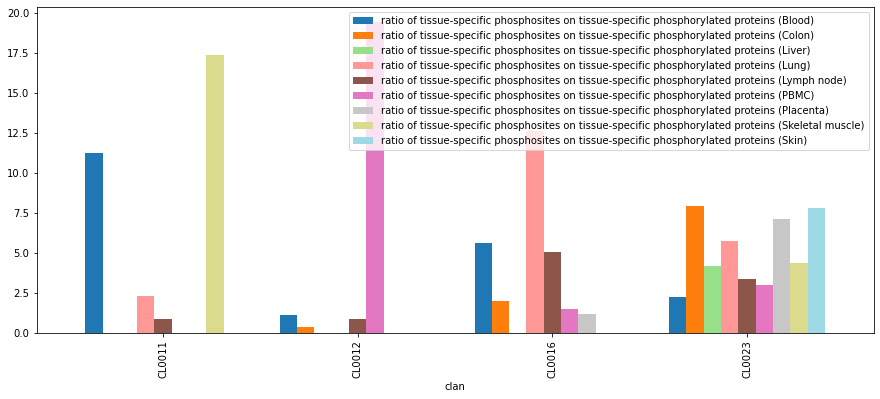

In [307]:
df_clan_tspec_all[(df_clan_tspec_all["ratio of tissue-specific phosphosites on tissue-specific phosphorylated proteins (Blood)"]>(df_clan_tspec_all["ratio of tissue-specific phosphosites on tissue-specific phosphorylated proteins (Blood)"].mean()+df_clan_tspec_all["ratio of tissue-specific phosphosites on tissue-specific phosphorylated proteins (Blood)"].std()))|
                 (df_clan_tspec_all["ratio of tissue-specific phosphosites on tissue-specific phosphorylated proteins (Colon)"]>(df_clan_tspec_all["ratio of tissue-specific phosphosites on tissue-specific phosphorylated proteins (Colon)"].mean()+df_clan_tspec_all["ratio of tissue-specific phosphosites on tissue-specific phosphorylated proteins (Colon)"].std()))|
                 (df_clan_tspec_all["ratio of tissue-specific phosphosites on tissue-specific phosphorylated proteins (Liver)"]>(df_clan_tspec_all["ratio of tissue-specific phosphosites on tissue-specific phosphorylated proteins (Liver)"].mean()+df_clan_tspec_all["ratio of tissue-specific phosphosites on tissue-specific phosphorylated proteins (Liver)"].std()))|
                 (df_clan_tspec_all["ratio of tissue-specific phosphosites on tissue-specific phosphorylated proteins (Lung)"]>(df_clan_tspec_all["ratio of tissue-specific phosphosites on tissue-specific phosphorylated proteins (Lung)"].mean()+df_clan_tspec_all["ratio of tissue-specific phosphosites on tissue-specific phosphorylated proteins (Lung)"].std()))|
                 (df_clan_tspec_all["ratio of tissue-specific phosphosites on tissue-specific phosphorylated proteins (Lymph node)"]>(df_clan_tspec_all["ratio of tissue-specific phosphosites on tissue-specific phosphorylated proteins (Lymph node)"].mean()+df_clan_tspec_all["ratio of tissue-specific phosphosites on tissue-specific phosphorylated proteins (Lymph node)"].std()))|
                 (df_clan_tspec_all["ratio of tissue-specific phosphosites on tissue-specific phosphorylated proteins (PBMC)"]>(df_clan_tspec_all["ratio of tissue-specific phosphosites on tissue-specific phosphorylated proteins (PBMC)"].mean()+df_clan_tspec_all["ratio of tissue-specific phosphosites on tissue-specific phosphorylated proteins (PBMC)"].std()))|
                 (df_clan_tspec_all["ratio of tissue-specific phosphosites on tissue-specific phosphorylated proteins (Placenta)"]>(df_clan_tspec_all["ratio of tissue-specific phosphosites on tissue-specific phosphorylated proteins (Placenta)"].mean()+df_clan_tspec_all["ratio of tissue-specific phosphosites on tissue-specific phosphorylated proteins (Placenta)"].std()))|
                  (df_clan_tspec_all["ratio of tissue-specific phosphosites on tissue-specific phosphorylated proteins (Skeletal muscle)"]>(df_clan_tspec_all["ratio of tissue-specific phosphosites on tissue-specific phosphorylated proteins (Skeletal muscle)"].mean()+df_clan_tspec_all["ratio of tissue-specific phosphosites on tissue-specific phosphorylated proteins (Skeletal muscle)"].std()))|
                 (df_clan_tspec_all["ratio of tissue-specific phosphosites on tissue-specific phosphorylated proteins (Skin)"]>(df_clan_tspec_all["ratio of tissue-specific phosphosites on tissue-specific phosphorylated proteins (Skin)"].mean()+df_clan_tspec_all["ratio of tissue-specific phosphosites on tissue-specific phosphorylated proteins (Skin)"].std()))].drop(["No_clan"]).plot(kind="bar", figsize=(15,6), colormap="tab20", width=0.8)

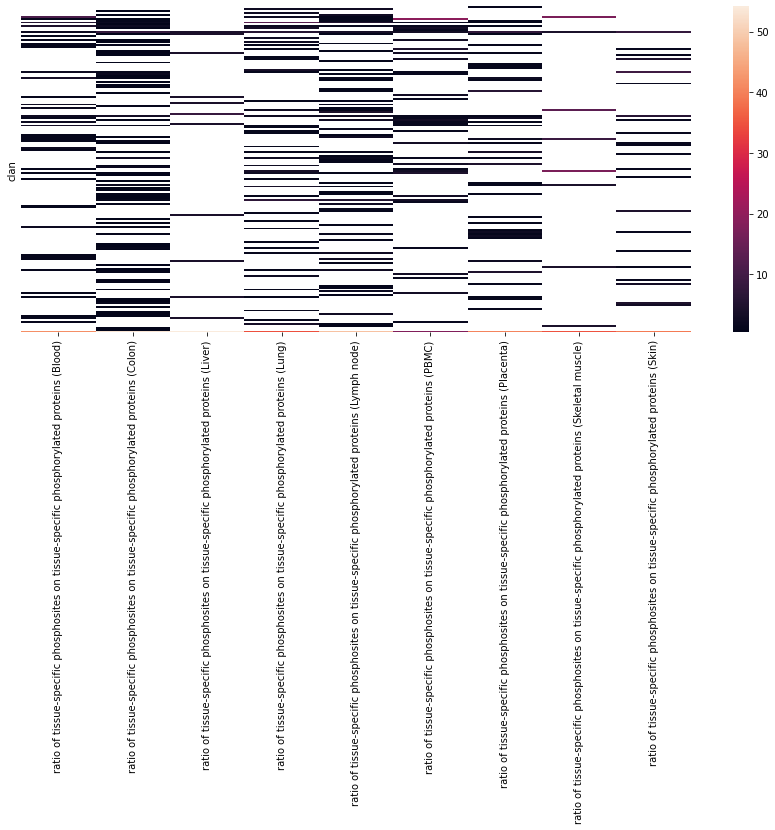

In [308]:
df_clan_tspec_all.sort_values(["clan"], inplace=True)
plt.figure(figsize=(15,6))
sns.heatmap(df_clan_tspec_all, yticklabels=False)
plt.show()

In [309]:
temp = tspecsites_taspecproteins_pfam.loc[tspecsites_taspecproteins_pfam["tissue_site"]=="Adipose tissue", :].groupby(["clan", "ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"})
df_clan_taspec_Adipose_tissue = temp.groupby(["clan"], as_index=False)["ACC_ID"].count()
df_clan_taspec_Adipose_tissue.rename({"ACC_ID": "number of tissue-specific phosphosites on tissue aspecific phosphorylated proteins (Adipose tissue)"}, inplace=True, axis=1)
df_clan_taspec_Adipose_tissue["Total"] = tspecsites_taspecproteins_pfam.loc[tspecsites_taspecproteins_pfam["tissue_site"]=="Adipose tissue", :].groupby(["ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"}).shape[0]
df_clan_taspec_Adipose_tissue["ratio of tissue-specific phosphosites on tissue aspecific phosphorylated proteins (Adipose tissue)"] = df_clan_taspec_Adipose_tissue["number of tissue-specific phosphosites on tissue aspecific phosphorylated proteins (Adipose tissue)"]*100/df_clan_taspec_Adipose_tissue["Total"]
df_clan_taspec_Adipose_tissue.drop(["number of tissue-specific phosphosites on tissue aspecific phosphorylated proteins (Adipose tissue)", "Total"], axis=1, inplace=True)
df_clan_taspec_Adipose_tissue.set_index(["clan"], inplace=True)
temp = tspecsites_taspecproteins_pfam.loc[tspecsites_taspecproteins_pfam["tissue_site"]=="Blood", :].groupby(["clan", "ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"})
df_clan_taspec_Blood = temp.groupby(["clan"], as_index=False)["ACC_ID"].count()
df_clan_taspec_Blood.rename({"ACC_ID": "number of tissue-specific phosphosites on tissue aspecific phosphorylated proteins (Blood)"}, inplace=True, axis=1)
df_clan_taspec_Blood["Total"] = tspecsites_taspecproteins_pfam.loc[tspecsites_taspecproteins_pfam["tissue_site"]=="Blood", :].groupby(["ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"}).shape[0]
df_clan_taspec_Blood["ratio of tissue-specific phosphosites on tissue aspecific phosphorylated proteins (Blood)"] = df_clan_taspec_Blood["number of tissue-specific phosphosites on tissue aspecific phosphorylated proteins (Blood)"]*100/df_clan_taspec_Blood["Total"]
df_clan_taspec_Blood.drop(["number of tissue-specific phosphosites on tissue aspecific phosphorylated proteins (Blood)", "Total"], axis=1, inplace=True)
df_clan_taspec_Blood.set_index(["clan"], inplace=True)
temp = tspecsites_taspecproteins_pfam.loc[tspecsites_taspecproteins_pfam["tissue_site"]=="Brain", :].groupby(["clan", "ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"})
df_clan_taspec_Brain = temp.groupby(["clan"], as_index=False)["ACC_ID"].count()
df_clan_taspec_Brain.rename({"ACC_ID": "number of tissue-specific phosphosites on tissue aspecific phosphorylated proteins (Brain)"}, inplace=True, axis=1)
df_clan_taspec_Brain["Total"] = tspecsites_taspecproteins_pfam.loc[tspecsites_taspecproteins_pfam["tissue_site"]=="Brain", :].groupby(["ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"}).shape[0]
df_clan_taspec_Brain["ratio of tissue-specific phosphosites on tissue aspecific phosphorylated proteins (Brain)"] = df_clan_taspec_Brain["number of tissue-specific phosphosites on tissue aspecific phosphorylated proteins (Brain)"]*100/df_clan_taspec_Brain["Total"]
df_clan_taspec_Brain.drop(["number of tissue-specific phosphosites on tissue aspecific phosphorylated proteins (Brain)", "Total"], axis=1, inplace=True)
df_clan_taspec_Brain.set_index(["clan"], inplace=True)
temp = tspecsites_taspecproteins_pfam.loc[tspecsites_taspecproteins_pfam["tissue_site"]=="Cerebrospinal fluid", :].groupby(["clan", "ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"})
df_clan_taspec_Cerebrospinal_fluid = temp.groupby(["clan"], as_index=False)["ACC_ID"].count()
df_clan_taspec_Cerebrospinal_fluid.rename({"ACC_ID": "number of tissue-specific phosphosites on tissue aspecific phosphorylated proteins (Cerebrospinal fluid)"}, inplace=True, axis=1)
df_clan_taspec_Cerebrospinal_fluid["Total"] = tspecsites_taspecproteins_pfam.loc[tspecsites_taspecproteins_pfam["tissue_site"]=="Cerebrospinal fluid", :].groupby(["ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"}).shape[0]
df_clan_taspec_Cerebrospinal_fluid["ratio of tissue-specific phosphosites on tissue aspecific phosphorylated proteins (Cerebrospinal fluid)"] = df_clan_taspec_Cerebrospinal_fluid["number of tissue-specific phosphosites on tissue aspecific phosphorylated proteins (Cerebrospinal fluid)"]*100/df_clan_taspec_Cerebrospinal_fluid["Total"]
df_clan_taspec_Cerebrospinal_fluid.drop(["number of tissue-specific phosphosites on tissue aspecific phosphorylated proteins (Cerebrospinal fluid)", "Total"], axis=1, inplace=True)
df_clan_taspec_Cerebrospinal_fluid.set_index(["clan"], inplace=True)
temp = tspecsites_taspecproteins_pfam.loc[tspecsites_taspecproteins_pfam["tissue_site"]=="Colon", :].groupby(["clan", "ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"})
df_clan_taspec_Colon = temp.groupby(["clan"], as_index=False)["ACC_ID"].count()
df_clan_taspec_Colon.rename({"ACC_ID": "number of tissue-specific phosphosites on tissue aspecific phosphorylated proteins (Colon)"}, inplace=True, axis=1)
df_clan_taspec_Colon["Total"] = tspecsites_taspecproteins_pfam.loc[tspecsites_taspecproteins_pfam["tissue_site"]=="Colon", :].groupby(["ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"}).shape[0]
df_clan_taspec_Colon["ratio of tissue-specific phosphosites on tissue aspecific phosphorylated proteins (Colon)"] = df_clan_taspec_Colon["number of tissue-specific phosphosites on tissue aspecific phosphorylated proteins (Colon)"]*100/df_clan_taspec_Colon["Total"]
df_clan_taspec_Colon.drop(["number of tissue-specific phosphosites on tissue aspecific phosphorylated proteins (Colon)", "Total"], axis=1, inplace=True)
df_clan_taspec_Colon.set_index(["clan"], inplace=True)
temp = tspecsites_taspecproteins_pfam.loc[tspecsites_taspecproteins_pfam["tissue_site"]=="Kidney", :].groupby(["clan", "ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"})
df_clan_taspec_Kidney = temp.groupby(["clan"], as_index=False)["ACC_ID"].count()
df_clan_taspec_Kidney.rename({"ACC_ID": "number of tissue-specific phosphosites on tissue aspecific phosphorylated proteins (Kidney)"}, inplace=True, axis=1)
df_clan_taspec_Kidney["Total"] = tspecsites_taspecproteins_pfam.loc[tspecsites_taspecproteins_pfam["tissue_site"]=="Kidney", :].groupby(["ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"}).shape[0]
df_clan_taspec_Kidney["ratio of tissue-specific phosphosites on tissue aspecific phosphorylated proteins (Kidney)"] = df_clan_taspec_Kidney["number of tissue-specific phosphosites on tissue aspecific phosphorylated proteins (Kidney)"]*100/df_clan_taspec_Kidney["Total"]
df_clan_taspec_Kidney.drop(["number of tissue-specific phosphosites on tissue aspecific phosphorylated proteins (Kidney)", "Total"], axis=1, inplace=True)
df_clan_taspec_Kidney.set_index(["clan"], inplace=True)
temp = tspecsites_taspecproteins_pfam.loc[tspecsites_taspecproteins_pfam["tissue_site"]=="Liver", :].groupby(["clan", "ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"})
df_clan_taspec_Liver = temp.groupby(["clan"], as_index=False)["ACC_ID"].count()
df_clan_taspec_Liver.rename({"ACC_ID": "number of tissue-specific phosphosites on tissue aspecific phosphorylated proteins (Liver)"}, inplace=True, axis=1)
df_clan_taspec_Liver["Total"] = tspecsites_taspecproteins_pfam.loc[tspecsites_taspecproteins_pfam["tissue_site"]=="Liver", :].groupby(["ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"}).shape[0]
df_clan_taspec_Liver["ratio of tissue-specific phosphosites on tissue aspecific phosphorylated proteins (Liver)"] = df_clan_taspec_Liver["number of tissue-specific phosphosites on tissue aspecific phosphorylated proteins (Liver)"]*100/df_clan_taspec_Liver["Total"]
df_clan_taspec_Liver.drop(["number of tissue-specific phosphosites on tissue aspecific phosphorylated proteins (Liver)", "Total"], axis=1, inplace=True)
df_clan_taspec_Liver.set_index(["clan"], inplace=True)
temp = tspecsites_taspecproteins_pfam.loc[tspecsites_taspecproteins_pfam["tissue_site"]=="Lung", :].groupby(["clan", "ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"})
df_clan_taspec_Lung = temp.groupby(["clan"], as_index=False)["ACC_ID"].count()
df_clan_taspec_Lung.rename({"ACC_ID": "number of tissue-specific phosphosites on tissue aspecific phosphorylated proteins (Lung)"}, inplace=True, axis=1)
df_clan_taspec_Lung["Total"] = tspecsites_taspecproteins_pfam.loc[tspecsites_taspecproteins_pfam["tissue_site"]=="Lung", :].groupby(["ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"}).shape[0]
df_clan_taspec_Lung["ratio of tissue-specific phosphosites on tissue aspecific phosphorylated proteins (Lung)"] = df_clan_taspec_Lung["number of tissue-specific phosphosites on tissue aspecific phosphorylated proteins (Lung)"]*100/df_clan_taspec_Lung["Total"]
df_clan_taspec_Lung.drop(["number of tissue-specific phosphosites on tissue aspecific phosphorylated proteins (Lung)", "Total"], axis=1, inplace=True)
df_clan_taspec_Lung.set_index(["clan"], inplace=True)
temp = tspecsites_taspecproteins_pfam.loc[tspecsites_taspecproteins_pfam["tissue_site"]=="Lymph node", :].groupby(["clan", "ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"})
df_clan_taspec_Lymph_node = temp.groupby(["clan"], as_index=False)["ACC_ID"].count()
df_clan_taspec_Lymph_node.rename({"ACC_ID": "number of tissue-specific phosphosites on tissue aspecific phosphorylated proteins (Lymph node)"}, inplace=True, axis=1)
df_clan_taspec_Lymph_node["Total"] = tspecsites_taspecproteins_pfam.loc[tspecsites_taspecproteins_pfam["tissue_site"]=="Lymph node", :].groupby(["ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"}).shape[0]
df_clan_taspec_Lymph_node["ratio of tissue-specific phosphosites on tissue aspecific phosphorylated proteins (Lymph node)"] = df_clan_taspec_Lymph_node["number of tissue-specific phosphosites on tissue aspecific phosphorylated proteins (Lymph node)"]*100/df_clan_taspec_Lymph_node["Total"]
df_clan_taspec_Lymph_node.drop(["number of tissue-specific phosphosites on tissue aspecific phosphorylated proteins (Lymph node)", "Total"], axis=1, inplace=True)
df_clan_taspec_Lymph_node.set_index(["clan"], inplace=True)
temp = tspecsites_taspecproteins_pfam.loc[tspecsites_taspecproteins_pfam["tissue_site"]=="Monocytes", :].groupby(["clan", "ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"})
df_clan_taspec_Monocytes = temp.groupby(["clan"], as_index=False)["ACC_ID"].count()
df_clan_taspec_Monocytes.rename({"ACC_ID": "number of tissue-specific phosphosites on tissue aspecific phosphorylated proteins (Monocytes)"}, inplace=True, axis=1)
df_clan_taspec_Monocytes["Total"] = tspecsites_taspecproteins_pfam.loc[tspecsites_taspecproteins_pfam["tissue_site"]=="Monocytes", :].groupby(["ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"}).shape[0]
df_clan_taspec_Monocytes["ratio of tissue-specific phosphosites on tissue aspecific phosphorylated proteins (Monocytes)"] = df_clan_taspec_Monocytes["number of tissue-specific phosphosites on tissue aspecific phosphorylated proteins (Monocytes)"]*100/df_clan_taspec_Monocytes["Total"]
df_clan_taspec_Monocytes.drop(["number of tissue-specific phosphosites on tissue aspecific phosphorylated proteins (Monocytes)", "Total"], axis=1, inplace=True)
df_clan_taspec_Monocytes.set_index(["clan"], inplace=True)
temp = tspecsites_taspecproteins_pfam.loc[tspecsites_taspecproteins_pfam["tissue_site"]=="Ovary", :].groupby(["clan", "ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"})
df_clan_taspec_Ovary = temp.groupby(["clan"], as_index=False)["ACC_ID"].count()
df_clan_taspec_Ovary.rename({"ACC_ID": "number of tissue-specific phosphosites on tissue aspecific phosphorylated proteins (Ovary)"}, inplace=True, axis=1)
df_clan_taspec_Ovary["Total"] = tspecsites_taspecproteins_pfam.loc[tspecsites_taspecproteins_pfam["tissue_site"]=="Ovary", :].groupby(["ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"}).shape[0]
df_clan_taspec_Ovary["ratio of tissue-specific phosphosites on tissue aspecific phosphorylated proteins (Ovary)"] = df_clan_taspec_Ovary["number of tissue-specific phosphosites on tissue aspecific phosphorylated proteins (Ovary)"]*100/df_clan_taspec_Ovary["Total"]
df_clan_taspec_Ovary.drop(["number of tissue-specific phosphosites on tissue aspecific phosphorylated proteins (Ovary)", "Total"], axis=1, inplace=True)
df_clan_taspec_Ovary.set_index(["clan"], inplace=True)
temp = tspecsites_taspecproteins_pfam.loc[tspecsites_taspecproteins_pfam["tissue_site"]=="Pancreas", :].groupby(["clan", "ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"})
df_clan_taspec_Pancreas = temp.groupby(["clan"], as_index=False)["ACC_ID"].count()
df_clan_taspec_Pancreas.rename({"ACC_ID": "number of tissue-specific phosphosites on tissue aspecific phosphorylated proteins (Pancreas)"}, inplace=True, axis=1)
df_clan_taspec_Pancreas["Total"] = tspecsites_taspecproteins_pfam.loc[tspecsites_taspecproteins_pfam["tissue_site"]=="Pancreas", :].groupby(["ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"}).shape[0]
df_clan_taspec_Pancreas["ratio of tissue-specific phosphosites on tissue aspecific phosphorylated proteins (Pancreas)"] = df_clan_taspec_Pancreas["number of tissue-specific phosphosites on tissue aspecific phosphorylated proteins (Pancreas)"]*100/df_clan_taspec_Pancreas["Total"]
df_clan_taspec_Pancreas.drop(["number of tissue-specific phosphosites on tissue aspecific phosphorylated proteins (Pancreas)", "Total"], axis=1, inplace=True)
df_clan_taspec_Pancreas.set_index(["clan"], inplace=True)
temp = tspecsites_taspecproteins_pfam.loc[tspecsites_taspecproteins_pfam["tissue_site"]=="PBMC", :].groupby(["clan", "ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"})
df_clan_taspec_PBMC = temp.groupby(["clan"], as_index=False)["ACC_ID"].count()
df_clan_taspec_PBMC.rename({"ACC_ID": "number of tissue-specific phosphosites on tissue aspecific phosphorylated proteins (PBMC)"}, inplace=True, axis=1)
df_clan_taspec_PBMC["Total"] = tspecsites_taspecproteins_pfam.loc[tspecsites_taspecproteins_pfam["tissue_site"]=="PBMC", :].groupby(["ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"}).shape[0]
df_clan_taspec_PBMC["ratio of tissue-specific phosphosites on tissue aspecific phosphorylated proteins (PBMC)"] = df_clan_taspec_PBMC["number of tissue-specific phosphosites on tissue aspecific phosphorylated proteins (PBMC)"]*100/df_clan_taspec_PBMC["Total"]
df_clan_taspec_PBMC.drop(["number of tissue-specific phosphosites on tissue aspecific phosphorylated proteins (PBMC)", "Total"], axis=1, inplace=True)
df_clan_taspec_PBMC.set_index(["clan"], inplace=True)
temp = tspecsites_taspecproteins_pfam.loc[tspecsites_taspecproteins_pfam["tissue_site"]=="Placenta", :].groupby(["clan", "ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"})
df_clan_taspec_Placenta = temp.groupby(["clan"], as_index=False)["ACC_ID"].count()
df_clan_taspec_Placenta.rename({"ACC_ID": "number of tissue-specific phosphosites on tissue aspecific phosphorylated proteins (Placenta)"}, inplace=True, axis=1)
df_clan_taspec_Placenta["Total"] = tspecsites_taspecproteins_pfam.loc[tspecsites_taspecproteins_pfam["tissue_site"]=="Placenta", :].groupby(["ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"}).shape[0]
df_clan_taspec_Placenta["ratio of tissue-specific phosphosites on tissue aspecific phosphorylated proteins (Placenta)"] = df_clan_taspec_Placenta["number of tissue-specific phosphosites on tissue aspecific phosphorylated proteins (Placenta)"]*100/df_clan_taspec_Placenta["Total"]
df_clan_taspec_Placenta.drop(["number of tissue-specific phosphosites on tissue aspecific phosphorylated proteins (Placenta)", "Total"], axis=1, inplace=True)
df_clan_taspec_Placenta.set_index(["clan"], inplace=True)
temp = tspecsites_taspecproteins_pfam.loc[tspecsites_taspecproteins_pfam["tissue_site"]=="Skeletal muscle", :].groupby(["clan", "ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"})
df_clan_taspec_Skeletal_muscle = temp.groupby(["clan"], as_index=False)["ACC_ID"].count()
df_clan_taspec_Skeletal_muscle.rename({"ACC_ID": "number of tissue-specific phosphosites on tissue aspecific phosphorylated proteins (Skeletal muscle)"}, inplace=True, axis=1)
df_clan_taspec_Skeletal_muscle["Total"] = tspecsites_taspecproteins_pfam.loc[tspecsites_taspecproteins_pfam["tissue_site"]=="Skeletal muscle", :].groupby(["ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"}).shape[0]
df_clan_taspec_Skeletal_muscle["ratio of tissue-specific phosphosites on tissue aspecific phosphorylated proteins (Skeletal muscle)"] = df_clan_taspec_Skeletal_muscle["number of tissue-specific phosphosites on tissue aspecific phosphorylated proteins (Skeletal muscle)"]*100/df_clan_taspec_Skeletal_muscle["Total"]
df_clan_taspec_Skeletal_muscle.drop(["number of tissue-specific phosphosites on tissue aspecific phosphorylated proteins (Skeletal muscle)", "Total"], axis=1, inplace=True)
df_clan_taspec_Skeletal_muscle.set_index(["clan"], inplace=True)
temp = tspecsites_taspecproteins_pfam.loc[tspecsites_taspecproteins_pfam["tissue_site"]=="Skin", :].groupby(["clan", "ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"})
df_clan_taspec_Skin = temp.groupby(["clan"], as_index=False)["ACC_ID"].count()
df_clan_taspec_Skin.rename({"ACC_ID": "number of tissue-specific phosphosites on tissue aspecific phosphorylated proteins (Skin)"}, inplace=True, axis=1)
df_clan_taspec_Skin["Total"] = tspecsites_taspecproteins_pfam.loc[tspecsites_taspecproteins_pfam["tissue_site"]=="Skin", :].groupby(["ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"}).shape[0]
df_clan_taspec_Skin["ratio of tissue-specific phosphosites on tissue aspecific phosphorylated proteins (Skin)"] = df_clan_taspec_Skin["number of tissue-specific phosphosites on tissue aspecific phosphorylated proteins (Skin)"]*100/df_clan_taspec_Skin["Total"]
df_clan_taspec_Skin.drop(["number of tissue-specific phosphosites on tissue aspecific phosphorylated proteins (Skin)", "Total"], axis=1, inplace=True)
df_clan_taspec_Skin.set_index(["clan"], inplace=True)
temp = tspecsites_taspecproteins_pfam.loc[tspecsites_taspecproteins_pfam["tissue_site"]=="Testis", :].groupby(["clan", "ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"})
df_clan_taspec_Testis = temp.groupby(["clan"], as_index=False)["ACC_ID"].count()
df_clan_taspec_Testis.rename({"ACC_ID": "number of tissue-specific phosphosites on tissue aspecific phosphorylated proteins (Testis)"}, inplace=True, axis=1)
df_clan_taspec_Testis["Total"] = tspecsites_taspecproteins_pfam.loc[tspecsites_taspecproteins_pfam["tissue_site"]=="Testis", :].groupby(["ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"}).shape[0]
df_clan_taspec_Testis["ratio of tissue-specific phosphosites on tissue aspecific phosphorylated proteins (Testis)"] = df_clan_taspec_Testis["number of tissue-specific phosphosites on tissue aspecific phosphorylated proteins (Testis)"]*100/df_clan_taspec_Testis["Total"]
df_clan_taspec_Testis.drop(["number of tissue-specific phosphosites on tissue aspecific phosphorylated proteins (Testis)", "Total"], axis=1, inplace=True)
df_clan_taspec_Testis.set_index(["clan"], inplace=True)
temp = tspecsites_taspecproteins_pfam.loc[tspecsites_taspecproteins_pfam["tissue_site"]=="Placenta", :].groupby(["clan", "ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"})
df_clan_taspec_Placenta = temp.groupby(["clan"], as_index=False)["ACC_ID"].count()
df_clan_taspec_Placenta.rename({"ACC_ID": "number of tissue-specific phosphosites on tissue aspecific phosphorylated proteins (Placenta)"}, inplace=True, axis=1)
df_clan_taspec_Placenta["Total"] = tspecsites_taspecproteins_pfam.loc[tspecsites_taspecproteins_pfam["tissue_site"]=="Placenta", :].groupby(["ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"}).shape[0]
df_clan_taspec_Placenta["ratio of tissue-specific phosphosites on tissue aspecific phosphorylated proteins (Placenta)"] = df_clan_taspec_Placenta["number of tissue-specific phosphosites on tissue aspecific phosphorylated proteins (Placenta)"]*100/df_clan_taspec_Placenta["Total"]
df_clan_taspec_Placenta.drop(["number of tissue-specific phosphosites on tissue aspecific phosphorylated proteins (Placenta)", "Total"], axis=1, inplace=True)
df_clan_taspec_Placenta.set_index(["clan"], inplace=True)
temp = tspecsites_taspecproteins_pfam.loc[tspecsites_taspecproteins_pfam["tissue_site"]=="Umbilical cord", :].groupby(["clan", "ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"})
df_clan_taspec_Umbilical_cord = temp.groupby(["clan"], as_index=False)["ACC_ID"].count()
df_clan_taspec_Umbilical_cord.rename({"ACC_ID": "number of tissue-specific phosphosites on tissue aspecific phosphorylated proteins (Umbilical cord)"}, inplace=True, axis=1)
df_clan_taspec_Umbilical_cord["Total"] = tspecsites_taspecproteins_pfam.loc[tspecsites_taspecproteins_pfam["tissue_site"]=="Umbilical cord", :].groupby(["ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"}).shape[0]
df_clan_taspec_Umbilical_cord["ratio of tissue-specific phosphosites on tissue aspecific phosphorylated proteins (Umbilical cord)"] = df_clan_taspec_Umbilical_cord["number of tissue-specific phosphosites on tissue aspecific phosphorylated proteins (Umbilical cord)"]*100/df_clan_taspec_Umbilical_cord["Total"]
df_clan_taspec_Umbilical_cord.drop(["number of tissue-specific phosphosites on tissue aspecific phosphorylated proteins (Umbilical cord)", "Total"], axis=1, inplace=True)
df_clan_taspec_Umbilical_cord.set_index(["clan"], inplace=True)
temp = tspecsites_taspecproteins_pfam.loc[tspecsites_taspecproteins_pfam["tissue_site"]=="Urinary bladder", :].groupby(["clan", "ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"})
df_clan_taspec_Urinary_bladder = temp.groupby(["clan"], as_index=False)["ACC_ID"].count()
df_clan_taspec_Urinary_bladder.rename({"ACC_ID": "number of tissue-specific phosphosites on tissue aspecific phosphorylated proteins (Urinary bladder)"}, inplace=True, axis=1)
df_clan_taspec_Urinary_bladder["Total"] = tspecsites_taspecproteins_pfam.loc[tspecsites_taspecproteins_pfam["tissue_site"]=="Urinary bladder", :].groupby(["ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"}).shape[0]
df_clan_taspec_Urinary_bladder["ratio of tissue-specific phosphosites on tissue aspecific phosphorylated proteins (Urinary bladder)"] = df_clan_taspec_Urinary_bladder["number of tissue-specific phosphosites on tissue aspecific phosphorylated proteins (Urinary bladder)"]*100/df_clan_taspec_Urinary_bladder["Total"]
df_clan_taspec_Urinary_bladder.drop(["number of tissue-specific phosphosites on tissue aspecific phosphorylated proteins (Urinary bladder)", "Total"], axis=1, inplace=True)
df_clan_taspec_Urinary_bladder.set_index(["clan"], inplace=True)

In [310]:
df_clan_taspec_all = pd.concat([df_clan_taspec_Blood, df_clan_taspec_Colon,
                                df_clan_taspec_Liver, df_clan_taspec_Lung, df_clan_taspec_Lymph_node,
                              df_clan_taspec_PBMC, df_clan_taspec_Placenta, df_clan_taspec_Skeletal_muscle,
                               df_clan_taspec_Skin, ], axis=1)
df_clan_taspec_all

ratio of tissue-specific phosphosites on tissue aspecific phosphorylated proteins (Blood)  \
clan                                                                                                
CL0003                                           1.212121                                           
CL0004                                           1.212121                                           
CL0005                                           0.606061                                           
CL0015                                           0.606061                                           
CL0016                                           4.848485                                           
...                                                   ...                                           
CL0492                                                NaN                                           
CL0575                                                NaN                                           
CL0588                                                NaN                                           
CL0666                                                NaN                                           
CL0721                                                NaN                                           

        ratio of tissue-specific phosphosites on tissue aspecific phosphorylated proteins (Colon)  \
clan                                                                                                
CL0003                                           0.233645                                           
CL0004                                           0.700935                                           
CL0005                                           0.233645                                           
CL0015                                           0.233645                                           
CL0016                                          10.514019                                           
...                                                   ...                                           
CL0492                                                NaN                                           
CL0575                                                NaN                                           
CL0588                                                NaN                                           
CL0666                                                NaN                                           
CL0721                                                NaN                                           

        ratio of tissue-specific phosphosites on tissue aspecific phosphorylated proteins (Liver)  \
clan                                                                                                
CL0003                                                NaN                                           
CL0004                                                NaN                                           
CL0005                                                NaN                                           
CL0015                                                NaN                                           
CL0016                                            9.52381                                           
...                                                   ...                                           
CL0492                                                NaN                                           
CL0575                                                NaN                                           
CL0588                                                NaN                                           
CL0666                                                NaN                                           
CL0721                                                NaN                                           

        ratio of tissue-specific phosphosites on tissue aspecific 

<AxesSubplot:xlabel='clan'>

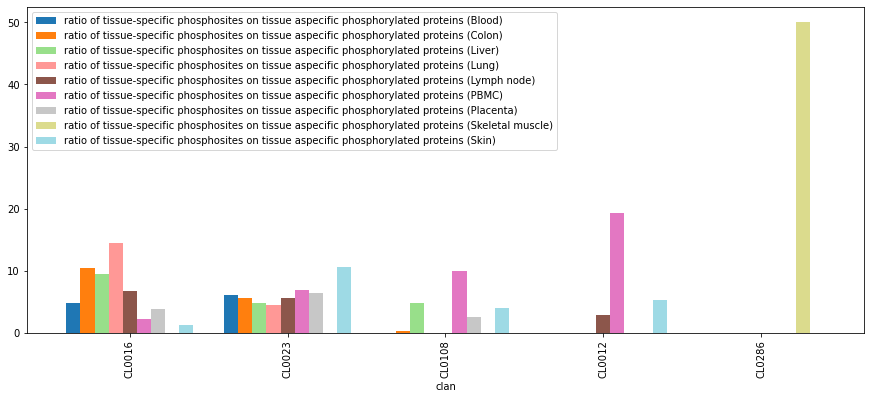

In [311]:
df_clan_taspec_all[(df_clan_taspec_all["ratio of tissue-specific phosphosites on tissue aspecific phosphorylated proteins (Blood)"]>(df_clan_taspec_all["ratio of tissue-specific phosphosites on tissue aspecific phosphorylated proteins (Blood)"].mean()+df_clan_taspec_all["ratio of tissue-specific phosphosites on tissue aspecific phosphorylated proteins (Blood)"].std()))|
                 (df_clan_taspec_all["ratio of tissue-specific phosphosites on tissue aspecific phosphorylated proteins (Colon)"]>(df_clan_taspec_all["ratio of tissue-specific phosphosites on tissue aspecific phosphorylated proteins (Colon)"].mean()+df_clan_taspec_all["ratio of tissue-specific phosphosites on tissue aspecific phosphorylated proteins (Colon)"].std()))|
                  (df_clan_taspec_all["ratio of tissue-specific phosphosites on tissue aspecific phosphorylated proteins (Liver)"]>(df_clan_taspec_all["ratio of tissue-specific phosphosites on tissue aspecific phosphorylated proteins (Liver)"].mean()+df_clan_taspec_all["ratio of tissue-specific phosphosites on tissue aspecific phosphorylated proteins (Liver)"].std()))|
                 (df_clan_taspec_all["ratio of tissue-specific phosphosites on tissue aspecific phosphorylated proteins (Lung)"]>(df_clan_taspec_all["ratio of tissue-specific phosphosites on tissue aspecific phosphorylated proteins (Lung)"].mean()+df_clan_taspec_all["ratio of tissue-specific phosphosites on tissue aspecific phosphorylated proteins (Lung)"].std()))|
                 (df_clan_taspec_all["ratio of tissue-specific phosphosites on tissue aspecific phosphorylated proteins (Lymph node)"]>(df_clan_taspec_all["ratio of tissue-specific phosphosites on tissue aspecific phosphorylated proteins (Lymph node)"].mean()+df_clan_taspec_all["ratio of tissue-specific phosphosites on tissue aspecific phosphorylated proteins (Lymph node)"].std()))|
                 (df_clan_taspec_all["ratio of tissue-specific phosphosites on tissue aspecific phosphorylated proteins (PBMC)"]>(df_clan_taspec_all["ratio of tissue-specific phosphosites on tissue aspecific phosphorylated proteins (PBMC)"].mean()+df_clan_taspec_all["ratio of tissue-specific phosphosites on tissue aspecific phosphorylated proteins (PBMC)"].std()))|
                 (df_clan_taspec_all["ratio of tissue-specific phosphosites on tissue aspecific phosphorylated proteins (Placenta)"]>(df_clan_taspec_all["ratio of tissue-specific phosphosites on tissue aspecific phosphorylated proteins (Placenta)"].mean()+df_clan_taspec_all["ratio of tissue-specific phosphosites on tissue aspecific phosphorylated proteins (Placenta)"].std()))|
                  (df_clan_taspec_all["ratio of tissue-specific phosphosites on tissue aspecific phosphorylated proteins (Skeletal muscle)"]>(df_clan_taspec_all["ratio of tissue-specific phosphosites on tissue aspecific phosphorylated proteins (Skeletal muscle)"].mean()+df_clan_taspec_all["ratio of tissue-specific phosphosites on tissue aspecific phosphorylated proteins (Skeletal muscle)"].std()))|
                 (df_clan_taspec_all["ratio of tissue-specific phosphosites on tissue aspecific phosphorylated proteins (Skin)"]>(df_clan_taspec_all["ratio of tissue-specific phosphosites on tissue aspecific phosphorylated proteins (Skin)"].mean()+df_clan_taspec_all["ratio of tissue-specific phosphosites on tissue aspecific phosphorylated proteins (Skin)"].std()))].drop(["No_clan"]).plot(kind="bar", figsize=(15,6), colormap="tab20", width=0.8)

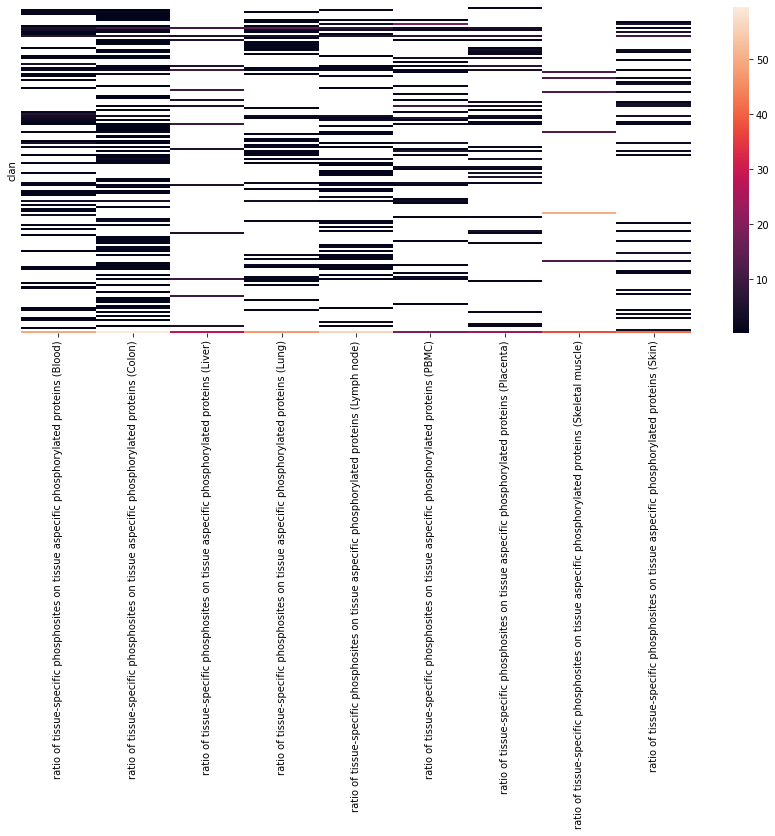

In [312]:
df_clan_taspec_all.sort_values(["clan"], inplace=True)
plt.figure(figsize=(15,6))
sns.heatmap(df_clan_taspec_all, yticklabels=False)
plt.show()

In [313]:
temp = tspecsites_genproteins_pfam.loc[tspecsites_genproteins_pfam["tissue_site"]=="Adipose tissue", :].groupby(["clan", "ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"})
df_clan_gen_Adipose_tissue = temp.groupby(["clan"], as_index=False)["ACC_ID"].count()
df_clan_gen_Adipose_tissue.rename({"ACC_ID": "number of tissue-specific phosphosites on pervasively phosphorylated proteins (Adipose tissue)"}, inplace=True, axis=1)
df_clan_gen_Adipose_tissue["Total"] = tspecsites_genproteins_pfam.loc[tspecsites_genproteins_pfam["tissue_site"]=="Adipose tissue", :].groupby(["ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"}).shape[0]
df_clan_gen_Adipose_tissue["ratio of tissue-specific phosphosites on pervasively phosphorylated proteins (Adipose tissue)"] = df_clan_gen_Adipose_tissue["number of tissue-specific phosphosites on pervasively phosphorylated proteins (Adipose tissue)"]*100/df_clan_gen_Adipose_tissue["Total"]
df_clan_gen_Adipose_tissue.drop(["number of tissue-specific phosphosites on pervasively phosphorylated proteins (Adipose tissue)", "Total"], axis=1, inplace=True)
df_clan_gen_Adipose_tissue.set_index(["clan"], inplace=True)
temp = tspecsites_genproteins_pfam.loc[tspecsites_genproteins_pfam["tissue_site"]=="Blood", :].groupby(["clan", "ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"})
df_clan_gen_Blood = temp.groupby(["clan"], as_index=False)["ACC_ID"].count()
df_clan_gen_Blood.rename({"ACC_ID": "number of tissue-specific phosphosites on pervasively phosphorylated proteins (Blood)"}, inplace=True, axis=1)
df_clan_gen_Blood["Total"] = tspecsites_genproteins_pfam.loc[tspecsites_genproteins_pfam["tissue_site"]=="Blood", :].groupby(["ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"}).shape[0]
df_clan_gen_Blood["ratio of tissue-specific phosphosites on pervasively phosphorylated proteins (Blood)"] = df_clan_gen_Blood["number of tissue-specific phosphosites on pervasively phosphorylated proteins (Blood)"]*100/df_clan_gen_Blood["Total"]
df_clan_gen_Blood.drop(["number of tissue-specific phosphosites on pervasively phosphorylated proteins (Blood)", "Total"], axis=1, inplace=True)
df_clan_gen_Blood.set_index(["clan"], inplace=True)
temp = tspecsites_genproteins_pfam.loc[tspecsites_genproteins_pfam["tissue_site"]=="Brain", :].groupby(["clan", "ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"})
df_clan_gen_Brain = temp.groupby(["clan"], as_index=False)["ACC_ID"].count()
df_clan_gen_Brain.rename({"ACC_ID": "number of tissue-specific phosphosites on pervasively phosphorylated proteins (Brain)"}, inplace=True, axis=1)
df_clan_gen_Brain["Total"] = tspecsites_genproteins_pfam.loc[tspecsites_genproteins_pfam["tissue_site"]=="Brain", :].groupby(["ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"}).shape[0]
df_clan_gen_Brain["ratio of tissue-specific phosphosites on pervasively phosphorylated proteins (Brain)"] = df_clan_gen_Brain["number of tissue-specific phosphosites on pervasively phosphorylated proteins (Brain)"]*100/df_clan_gen_Brain["Total"]
df_clan_gen_Brain.drop(["number of tissue-specific phosphosites on pervasively phosphorylated proteins (Brain)", "Total"], axis=1, inplace=True)
df_clan_gen_Brain.set_index(["clan"], inplace=True)
temp = tspecsites_genproteins_pfam.loc[tspecsites_genproteins_pfam["tissue_site"]=="Cerebrospinal fluid", :].groupby(["clan", "ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"})
df_clan_gen_Cerebrospinal_fluid = temp.groupby(["clan"], as_index=False)["ACC_ID"].count()
df_clan_gen_Cerebrospinal_fluid.rename({"ACC_ID": "number of tissue-specific phosphosites on pervasively phosphorylated proteins (Cerebrospinal fluid)"}, inplace=True, axis=1)
df_clan_gen_Cerebrospinal_fluid["Total"] = tspecsites_genproteins_pfam.loc[tspecsites_genproteins_pfam["tissue_site"]=="Cerebrospinal fluid", :].groupby(["ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"}).shape[0]
df_clan_gen_Cerebrospinal_fluid["ratio of tissue-specific phosphosites on pervasively phosphorylated proteins (Cerebrospinal fluid)"] = df_clan_gen_Cerebrospinal_fluid["number of tissue-specific phosphosites on pervasively phosphorylated proteins (Cerebrospinal fluid)"]*100/df_clan_gen_Cerebrospinal_fluid["Total"]
df_clan_gen_Cerebrospinal_fluid.drop(["number of tissue-specific phosphosites on pervasively phosphorylated proteins (Cerebrospinal fluid)", "Total"], axis=1, inplace=True)
df_clan_gen_Cerebrospinal_fluid.set_index(["clan"], inplace=True)
temp = tspecsites_genproteins_pfam.loc[tspecsites_genproteins_pfam["tissue_site"]=="Colon", :].groupby(["clan", "ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"})
df_clan_gen_Colon = temp.groupby(["clan"], as_index=False)["ACC_ID"].count()
df_clan_gen_Colon.rename({"ACC_ID": "number of tissue-specific phosphosites on pervasively phosphorylated proteins (Colon)"}, inplace=True, axis=1)
df_clan_gen_Colon["Total"] = tspecsites_genproteins_pfam.loc[tspecsites_genproteins_pfam["tissue_site"]=="Colon", :].groupby(["ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"}).shape[0]
df_clan_gen_Colon["ratio of tissue-specific phosphosites on pervasively phosphorylated proteins (Colon)"] = df_clan_gen_Colon["number of tissue-specific phosphosites on pervasively phosphorylated proteins (Colon)"]*100/df_clan_gen_Colon["Total"]
df_clan_gen_Colon.drop(["number of tissue-specific phosphosites on pervasively phosphorylated proteins (Colon)", "Total"], axis=1, inplace=True)
df_clan_gen_Colon.set_index(["clan"], inplace=True)
temp = tspecsites_genproteins_pfam.loc[tspecsites_genproteins_pfam["tissue_site"]=="Kidney", :].groupby(["clan", "ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"})
df_clan_gen_Kidney = temp.groupby(["clan"], as_index=False)["ACC_ID"].count()
df_clan_gen_Kidney.rename({"ACC_ID": "number of tissue-specific phosphosites on pervasively phosphorylated proteins (Kidney)"}, inplace=True, axis=1)
df_clan_gen_Kidney["Total"] = tspecsites_genproteins_pfam.loc[tspecsites_genproteins_pfam["tissue_site"]=="Kidney", :].groupby(["ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"}).shape[0]
df_clan_gen_Kidney["ratio of tissue-specific phosphosites on pervasively phosphorylated proteins (Kidney)"] = df_clan_gen_Kidney["number of tissue-specific phosphosites on pervasively phosphorylated proteins (Kidney)"]*100/df_clan_gen_Kidney["Total"]
df_clan_gen_Kidney.drop(["number of tissue-specific phosphosites on pervasively phosphorylated proteins (Kidney)", "Total"], axis=1, inplace=True)
df_clan_gen_Kidney.set_index(["clan"], inplace=True)
temp = tspecsites_genproteins_pfam.loc[tspecsites_genproteins_pfam["tissue_site"]=="Liver", :].groupby(["clan", "ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"})
df_clan_gen_Liver = temp.groupby(["clan"], as_index=False)["ACC_ID"].count()
df_clan_gen_Liver.rename({"ACC_ID": "number of tissue-specific phosphosites on pervasively phosphorylated proteins (Liver)"}, inplace=True, axis=1)
df_clan_gen_Liver["Total"] = tspecsites_genproteins_pfam.loc[tspecsites_genproteins_pfam["tissue_site"]=="Liver", :].groupby(["ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"}).shape[0]
df_clan_gen_Liver["ratio of tissue-specific phosphosites on pervasively phosphorylated proteins (Liver)"] = df_clan_gen_Liver["number of tissue-specific phosphosites on pervasively phosphorylated proteins (Liver)"]*100/df_clan_gen_Liver["Total"]
df_clan_gen_Liver.drop(["number of tissue-specific phosphosites on pervasively phosphorylated proteins (Liver)", "Total"], axis=1, inplace=True)
df_clan_gen_Liver.set_index(["clan"], inplace=True)
temp = tspecsites_genproteins_pfam.loc[tspecsites_genproteins_pfam["tissue_site"]=="Lung", :].groupby(["clan", "ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"})
df_clan_gen_Lung = temp.groupby(["clan"], as_index=False)["ACC_ID"].count()
df_clan_gen_Lung.rename({"ACC_ID": "number of tissue-specific phosphosites on pervasively phosphorylated proteins (Lung)"}, inplace=True, axis=1)
df_clan_gen_Lung["Total"] = tspecsites_genproteins_pfam.loc[tspecsites_genproteins_pfam["tissue_site"]=="Lung", :].groupby(["ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"}).shape[0]
df_clan_gen_Lung["ratio of tissue-specific phosphosites on pervasively phosphorylated proteins (Lung)"] = df_clan_gen_Lung["number of tissue-specific phosphosites on pervasively phosphorylated proteins (Lung)"]*100/df_clan_gen_Lung["Total"]
df_clan_gen_Lung.drop(["number of tissue-specific phosphosites on pervasively phosphorylated proteins (Lung)", "Total"], axis=1, inplace=True)
df_clan_gen_Lung.set_index(["clan"], inplace=True)
temp = tspecsites_genproteins_pfam.loc[tspecsites_genproteins_pfam["tissue_site"]=="Lymph node", :].groupby(["clan", "ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"})
df_clan_gen_Lymph_node = temp.groupby(["clan"], as_index=False)["ACC_ID"].count()
df_clan_gen_Lymph_node.rename({"ACC_ID": "number of tissue-specific phosphosites on pervasively phosphorylated proteins (Lymph node)"}, inplace=True, axis=1)
df_clan_gen_Lymph_node["Total"] = tspecsites_genproteins_pfam.loc[tspecsites_genproteins_pfam["tissue_site"]=="Lymph node", :].groupby(["ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"}).shape[0]
df_clan_gen_Lymph_node["ratio of tissue-specific phosphosites on pervasively phosphorylated proteins (Lymph node)"] = df_clan_gen_Lymph_node["number of tissue-specific phosphosites on pervasively phosphorylated proteins (Lymph node)"]*100/df_clan_gen_Lymph_node["Total"]
df_clan_gen_Lymph_node.drop(["number of tissue-specific phosphosites on pervasively phosphorylated proteins (Lymph node)", "Total"], axis=1, inplace=True)
df_clan_gen_Lymph_node.set_index(["clan"], inplace=True)
temp = tspecsites_genproteins_pfam.loc[tspecsites_genproteins_pfam["tissue_site"]=="Monocytes", :].groupby(["clan", "ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"})
df_clan_gen_Monocytes = temp.groupby(["clan"], as_index=False)["ACC_ID"].count()
df_clan_gen_Monocytes.rename({"ACC_ID": "number of tissue-specific phosphosites on pervasively phosphorylated proteins (Monocytes)"}, inplace=True, axis=1)
df_clan_gen_Monocytes["Total"] = tspecsites_genproteins_pfam.loc[tspecsites_genproteins_pfam["tissue_site"]=="Monocytes", :].groupby(["ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"}).shape[0]
df_clan_gen_Monocytes["ratio of tissue-specific phosphosites on pervasively phosphorylated proteins (Monocytes)"] = df_clan_gen_Monocytes["number of tissue-specific phosphosites on pervasively phosphorylated proteins (Monocytes)"]*100/df_clan_gen_Monocytes["Total"]
df_clan_gen_Monocytes.drop(["number of tissue-specific phosphosites on pervasively phosphorylated proteins (Monocytes)", "Total"], axis=1, inplace=True)
df_clan_gen_Monocytes.set_index(["clan"], inplace=True)
temp = tspecsites_genproteins_pfam.loc[tspecsites_genproteins_pfam["tissue_site"]=="Ovary", :].groupby(["clan", "ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"})
df_clan_gen_Ovary = temp.groupby(["clan"], as_index=False)["ACC_ID"].count()
df_clan_gen_Ovary.rename({"ACC_ID": "number of tissue-specific phosphosites on pervasively phosphorylated proteins (Ovary)"}, inplace=True, axis=1)
df_clan_gen_Ovary["Total"] = tspecsites_genproteins_pfam.loc[tspecsites_genproteins_pfam["tissue_site"]=="Ovary", :].groupby(["ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"}).shape[0]
df_clan_gen_Ovary["ratio of tissue-specific phosphosites on pervasively phosphorylated proteins (Ovary)"] = df_clan_gen_Ovary["number of tissue-specific phosphosites on pervasively phosphorylated proteins (Ovary)"]*100/df_clan_gen_Ovary["Total"]
df_clan_gen_Ovary.drop(["number of tissue-specific phosphosites on pervasively phosphorylated proteins (Ovary)", "Total"], axis=1, inplace=True)
df_clan_gen_Ovary.set_index(["clan"], inplace=True)
temp = tspecsites_genproteins_pfam.loc[tspecsites_genproteins_pfam["tissue_site"]=="Pancreas", :].groupby(["clan", "ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"})
df_clan_gen_Pancreas = temp.groupby(["clan"], as_index=False)["ACC_ID"].count()
df_clan_gen_Pancreas.rename({"ACC_ID": "number of tissue-specific phosphosites on pervasively phosphorylated proteins (Pancreas)"}, inplace=True, axis=1)
df_clan_gen_Pancreas["Total"] = tspecsites_genproteins_pfam.loc[tspecsites_genproteins_pfam["tissue_site"]=="Pancreas", :].groupby(["ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"}).shape[0]
df_clan_gen_Pancreas["ratio of tissue-specific phosphosites on pervasively phosphorylated proteins (Pancreas)"] = df_clan_gen_Pancreas["number of tissue-specific phosphosites on pervasively phosphorylated proteins (Pancreas)"]*100/df_clan_gen_Pancreas["Total"]
df_clan_gen_Pancreas.drop(["number of tissue-specific phosphosites on pervasively phosphorylated proteins (Pancreas)", "Total"], axis=1, inplace=True)
df_clan_gen_Pancreas.set_index(["clan"], inplace=True)
temp = tspecsites_genproteins_pfam.loc[tspecsites_genproteins_pfam["tissue_site"]=="PBMC", :].groupby(["clan", "ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"})
df_clan_gen_PBMC = temp.groupby(["clan"], as_index=False)["ACC_ID"].count()
df_clan_gen_PBMC.rename({"ACC_ID": "number of tissue-specific phosphosites on pervasively phosphorylated proteins (PBMC)"}, inplace=True, axis=1)
df_clan_gen_PBMC["Total"] = tspecsites_genproteins_pfam.loc[tspecsites_genproteins_pfam["tissue_site"]=="PBMC", :].groupby(["ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"}).shape[0]
df_clan_gen_PBMC["ratio of tissue-specific phosphosites on pervasively phosphorylated proteins (PBMC)"] = df_clan_gen_PBMC["number of tissue-specific phosphosites on pervasively phosphorylated proteins (PBMC)"]*100/df_clan_gen_PBMC["Total"]
df_clan_gen_PBMC.drop(["number of tissue-specific phosphosites on pervasively phosphorylated proteins (PBMC)", "Total"], axis=1, inplace=True)
df_clan_gen_PBMC.set_index(["clan"], inplace=True)
temp = tspecsites_genproteins_pfam.loc[tspecsites_genproteins_pfam["tissue_site"]=="Placenta", :].groupby(["clan", "ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"})
df_clan_gen_Placenta = temp.groupby(["clan"], as_index=False)["ACC_ID"].count()
df_clan_gen_Placenta.rename({"ACC_ID": "number of tissue-specific phosphosites on pervasively phosphorylated proteins (Placenta)"}, inplace=True, axis=1)
df_clan_gen_Placenta["Total"] = tspecsites_genproteins_pfam.loc[tspecsites_genproteins_pfam["tissue_site"]=="Placenta", :].groupby(["ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"}).shape[0]
df_clan_gen_Placenta["ratio of tissue-specific phosphosites on pervasively phosphorylated proteins (Placenta)"] = df_clan_gen_Placenta["number of tissue-specific phosphosites on pervasively phosphorylated proteins (Placenta)"]*100/df_clan_gen_Placenta["Total"]
df_clan_gen_Placenta.drop(["number of tissue-specific phosphosites on pervasively phosphorylated proteins (Placenta)", "Total"], axis=1, inplace=True)
df_clan_gen_Placenta.set_index(["clan"], inplace=True)
temp = tspecsites_genproteins_pfam.loc[tspecsites_genproteins_pfam["tissue_site"]=="Skeletal muscle", :].groupby(["clan", "ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"})
df_clan_gen_Skeletal_muscle = temp.groupby(["clan"], as_index=False)["ACC_ID"].count()
df_clan_gen_Skeletal_muscle.rename({"ACC_ID": "number of tissue-specific phosphosites on pervasively phosphorylated proteins (Skeletal muscle)"}, inplace=True, axis=1)
df_clan_gen_Skeletal_muscle["Total"] = tspecsites_genproteins_pfam.loc[tspecsites_genproteins_pfam["tissue_site"]=="Skeletal muscle", :].groupby(["ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"}).shape[0]
df_clan_gen_Skeletal_muscle["ratio of tissue-specific phosphosites on pervasively phosphorylated proteins (Skeletal muscle)"] = df_clan_gen_Skeletal_muscle["number of tissue-specific phosphosites on pervasively phosphorylated proteins (Skeletal muscle)"]*100/df_clan_gen_Skeletal_muscle["Total"]
df_clan_gen_Skeletal_muscle.drop(["number of tissue-specific phosphosites on pervasively phosphorylated proteins (Skeletal muscle)", "Total"], axis=1, inplace=True)
df_clan_gen_Skeletal_muscle.set_index(["clan"], inplace=True)
temp = tspecsites_genproteins_pfam.loc[tspecsites_genproteins_pfam["tissue_site"]=="Skin", :].groupby(["clan", "ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"})
df_clan_gen_Skin = temp.groupby(["clan"], as_index=False)["ACC_ID"].count()
df_clan_gen_Skin.rename({"ACC_ID": "number of tissue-specific phosphosites on pervasively phosphorylated proteins (Skin)"}, inplace=True, axis=1)
df_clan_gen_Skin["Total"] = tspecsites_genproteins_pfam.loc[tspecsites_genproteins_pfam["tissue_site"]=="Skin", :].groupby(["ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"}).shape[0]
df_clan_gen_Skin["ratio of tissue-specific phosphosites on pervasively phosphorylated proteins (Skin)"] = df_clan_gen_Skin["number of tissue-specific phosphosites on pervasively phosphorylated proteins (Skin)"]*100/df_clan_gen_Skin["Total"]
df_clan_gen_Skin.drop(["number of tissue-specific phosphosites on pervasively phosphorylated proteins (Skin)", "Total"], axis=1, inplace=True)
df_clan_gen_Skin.set_index(["clan"], inplace=True)
temp = tspecsites_genproteins_pfam.loc[tspecsites_genproteins_pfam["tissue_site"]=="Testis", :].groupby(["clan", "ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"})
df_clan_gen_Testis = temp.groupby(["clan"], as_index=False)["ACC_ID"].count()
df_clan_gen_Testis.rename({"ACC_ID": "number of tissue-specific phosphosites on pervasively phosphorylated proteins (Testis)"}, inplace=True, axis=1)
df_clan_gen_Testis["Total"] = tspecsites_genproteins_pfam.loc[tspecsites_genproteins_pfam["tissue_site"]=="Testis", :].groupby(["ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"}).shape[0]
df_clan_gen_Testis["ratio of tissue-specific phosphosites on pervasively phosphorylated proteins (Testis)"] = df_clan_gen_Testis["number of tissue-specific phosphosites on pervasively phosphorylated proteins (Testis)"]*100/df_clan_gen_Testis["Total"]
df_clan_gen_Testis.drop(["number of tissue-specific phosphosites on pervasively phosphorylated proteins (Testis)", "Total"], axis=1, inplace=True)
df_clan_gen_Testis.set_index(["clan"], inplace=True)
temp = tspecsites_genproteins_pfam.loc[tspecsites_genproteins_pfam["tissue_site"]=="Placenta", :].groupby(["clan", "ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"})
df_clan_gen_Placenta = temp.groupby(["clan"], as_index=False)["ACC_ID"].count()
df_clan_gen_Placenta.rename({"ACC_ID": "number of tissue-specific phosphosites on pervasively phosphorylated proteins (Placenta)"}, inplace=True, axis=1)
df_clan_gen_Placenta["Total"] = tspecsites_genproteins_pfam.loc[tspecsites_genproteins_pfam["tissue_site"]=="Placenta", :].groupby(["ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"}).shape[0]
df_clan_gen_Placenta["ratio of tissue-specific phosphosites on pervasively phosphorylated proteins (Placenta)"] = df_clan_gen_Placenta["number of tissue-specific phosphosites on pervasively phosphorylated proteins (Placenta)"]*100/df_clan_gen_Placenta["Total"]
df_clan_gen_Placenta.drop(["number of tissue-specific phosphosites on pervasively phosphorylated proteins (Placenta)", "Total"], axis=1, inplace=True)
df_clan_gen_Placenta.set_index(["clan"], inplace=True)
temp = tspecsites_genproteins_pfam.loc[tspecsites_genproteins_pfam["tissue_site"]=="Umbilical cord", :].groupby(["clan", "ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"})
df_clan_gen_Umbilical_cord = temp.groupby(["clan"], as_index=False)["ACC_ID"].count()
df_clan_gen_Umbilical_cord.rename({"ACC_ID": "number of tissue-specific phosphosites on pervasively phosphorylated proteins (Umbilical cord)"}, inplace=True, axis=1)
df_clan_gen_Umbilical_cord["Total"] = tspecsites_genproteins_pfam.loc[tspecsites_genproteins_pfam["tissue_site"]=="Umbilical cord", :].groupby(["ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"}).shape[0]
df_clan_gen_Umbilical_cord["ratio of tissue-specific phosphosites on pervasively phosphorylated proteins (Umbilical cord)"] = df_clan_gen_Umbilical_cord["number of tissue-specific phosphosites on pervasively phosphorylated proteins (Umbilical cord)"]*100/df_clan_gen_Umbilical_cord["Total"]
df_clan_gen_Umbilical_cord.drop(["number of tissue-specific phosphosites on pervasively phosphorylated proteins (Umbilical cord)", "Total"], axis=1, inplace=True)
df_clan_gen_Umbilical_cord.set_index(["clan"], inplace=True)
temp = tspecsites_genproteins_pfam.loc[tspecsites_genproteins_pfam["tissue_site"]=="Urinary bladder", :].groupby(["clan", "ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"})
df_clan_gen_Urinary_bladder = temp.groupby(["clan"], as_index=False)["ACC_ID"].count()
df_clan_gen_Urinary_bladder.rename({"ACC_ID": "number of tissue-specific phosphosites on pervasively phosphorylated proteins (Urinary bladder)"}, inplace=True, axis=1)
df_clan_gen_Urinary_bladder["Total"] = tspecsites_genproteins_pfam.loc[tspecsites_genproteins_pfam["tissue_site"]=="Urinary bladder", :].groupby(["ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"}).shape[0]
df_clan_gen_Urinary_bladder["ratio of tissue-specific phosphosites on pervasively phosphorylated proteins (Urinary bladder)"] = df_clan_gen_Urinary_bladder["number of tissue-specific phosphosites on pervasively phosphorylated proteins (Urinary bladder)"]*100/df_clan_gen_Urinary_bladder["Total"]
df_clan_gen_Urinary_bladder.drop(["number of tissue-specific phosphosites on pervasively phosphorylated proteins (Urinary bladder)", "Total"], axis=1, inplace=True)
df_clan_gen_Urinary_bladder.set_index(["clan"], inplace=True)

In [314]:
df_clan_gen_all = pd.concat([df_clan_gen_Blood, df_clan_gen_Colon,
                                df_clan_gen_Liver, df_clan_gen_Lung, df_clan_gen_Lymph_node,
                            df_clan_gen_PBMC, df_clan_gen_Placenta, df_clan_gen_Skeletal_muscle,
                               df_clan_gen_Skin], axis=1)
df_clan_gen_all

ratio of tissue-specific phosphosites on pervasively phosphorylated proteins (Blood)  \
clan                                                                                           
CL0001                                           0.847458                                      
CL0006                                           0.847458                                      
CL0011                                           0.847458                                      
CL0016                                          16.101695                                      
CL0020                                           2.542373                                      
...                                                   ...                                      
CL0139                                                NaN                                      
CL0311                                                NaN                                      
CL0448                                                NaN                                      
CL0547                                                NaN                                      
CL0591                                                NaN                                      

        ratio of tissue-specific phosphosites on pervasively phosphorylated proteins (Colon)  \
clan                                                                                           
CL0001                                                NaN                                      
CL0006                                                NaN                                      
CL0011                                                NaN                                      
CL0016                                           4.126214                                      
CL0020                                           6.310680                                      
...                                                   ...                                      
CL0139                                                NaN                                      
CL0311                                                NaN                                      
CL0448                                                NaN                                      
CL0547                                                NaN                                      
CL0591                                                NaN                                      

        ratio of tissue-specific phosphosites on pervasively phosphorylated proteins (Liver)  \
clan                                                                                           
CL0001                                                NaN                                      
CL0006                                                NaN                                      
CL0011                                                NaN                                      
CL0016                                                NaN                                      
CL0020                                           5.882353                                      
...                                                   ...                                      
CL0139                                                NaN                                      
CL0311                                                NaN                                      
CL0448                                                NaN                                      
CL0547                                                NaN                                      
CL0591                                                NaN                                      

        ratio of tissue-specific phosphosites on pervasively phosphorylated proteins (Lung)  \
clan                                                                                          
CL0001                                                NaN              

<AxesSubplot:title={'center':'Number of tissue-specific phosphosites on pervasively phosphorylated proteins'}, xlabel='clan'>

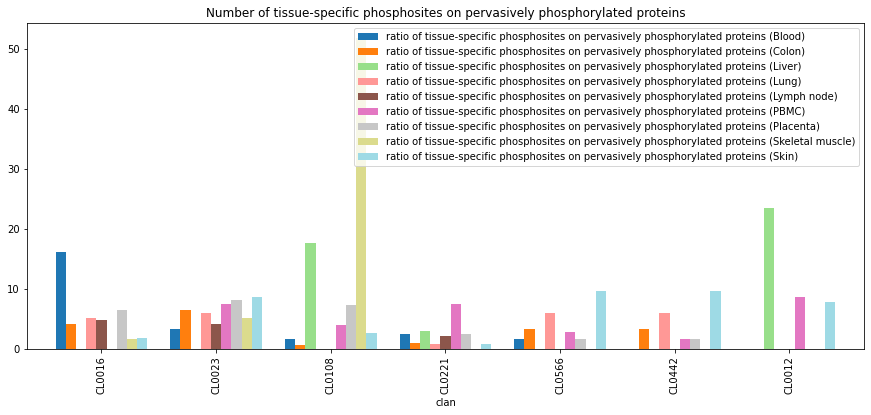

In [315]:
df_clan_gen_all[(df_clan_gen_all["ratio of tissue-specific phosphosites on pervasively phosphorylated proteins (Blood)"]>(df_clan_gen_all["ratio of tissue-specific phosphosites on pervasively phosphorylated proteins (Blood)"].mean()+df_clan_gen_all["ratio of tissue-specific phosphosites on pervasively phosphorylated proteins (Blood)"].std()))|
                 (df_clan_gen_all["ratio of tissue-specific phosphosites on pervasively phosphorylated proteins (Colon)"]>(df_clan_gen_all["ratio of tissue-specific phosphosites on pervasively phosphorylated proteins (Colon)"].mean()+df_clan_gen_all["ratio of tissue-specific phosphosites on pervasively phosphorylated proteins (Colon)"].std()))|
                  (df_clan_gen_all["ratio of tissue-specific phosphosites on pervasively phosphorylated proteins (Liver)"]>(df_clan_gen_all["ratio of tissue-specific phosphosites on pervasively phosphorylated proteins (Liver)"].mean()+df_clan_gen_all["ratio of tissue-specific phosphosites on pervasively phosphorylated proteins (Liver)"].std()))|
                 (df_clan_gen_all["ratio of tissue-specific phosphosites on pervasively phosphorylated proteins (Lung)"]>(df_clan_gen_all["ratio of tissue-specific phosphosites on pervasively phosphorylated proteins (Lung)"].mean()+df_clan_gen_all["ratio of tissue-specific phosphosites on pervasively phosphorylated proteins (Lung)"].std()))|
                 (df_clan_gen_all["ratio of tissue-specific phosphosites on pervasively phosphorylated proteins (Lymph node)"]>(df_clan_gen_all["ratio of tissue-specific phosphosites on pervasively phosphorylated proteins (Lymph node)"].mean()+df_clan_gen_all["ratio of tissue-specific phosphosites on pervasively phosphorylated proteins (Lymph node)"].std()))|
                 (df_clan_gen_all["ratio of tissue-specific phosphosites on pervasively phosphorylated proteins (PBMC)"]>(df_clan_gen_all["ratio of tissue-specific phosphosites on pervasively phosphorylated proteins (PBMC)"].mean()+df_clan_gen_all["ratio of tissue-specific phosphosites on pervasively phosphorylated proteins (PBMC)"].std()))|
                 (df_clan_gen_all["ratio of tissue-specific phosphosites on pervasively phosphorylated proteins (Placenta)"]>(df_clan_gen_all["ratio of tissue-specific phosphosites on pervasively phosphorylated proteins (Placenta)"].mean()+df_clan_gen_all["ratio of tissue-specific phosphosites on pervasively phosphorylated proteins (Placenta)"].std()))|
                  (df_clan_gen_all["ratio of tissue-specific phosphosites on pervasively phosphorylated proteins (Skeletal muscle)"]>(df_clan_gen_all["ratio of tissue-specific phosphosites on pervasively phosphorylated proteins (Skeletal muscle)"].mean()+df_clan_gen_all["ratio of tissue-specific phosphosites on pervasively phosphorylated proteins (Skeletal muscle)"].std()))|
                 (df_clan_gen_all["ratio of tissue-specific phosphosites on pervasively phosphorylated proteins (Skin)"]>(df_clan_gen_all["ratio of tissue-specific phosphosites on pervasively phosphorylated proteins (Skin)"].mean()+df_clan_gen_all["ratio of tissue-specific phosphosites on pervasively phosphorylated proteins (Skin)"].std()))].drop(["No_clan"]).plot(kind="bar", figsize=(15,6), colormap="tab20", width=0.8, title="Number of tissue-specific phosphosites on pervasively phosphorylated proteins")

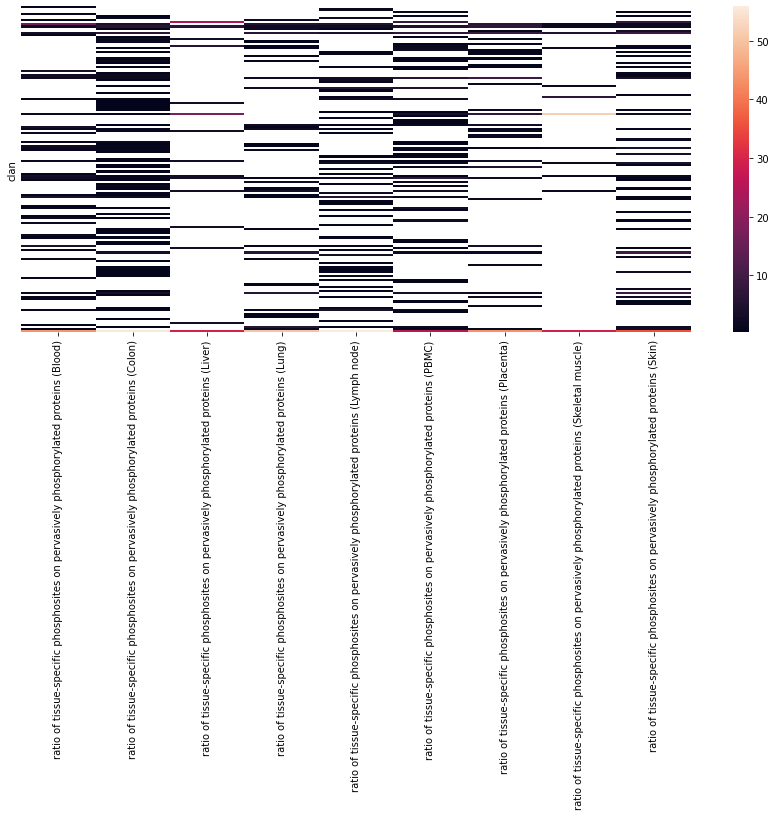

In [316]:
df_clan_gen_all.sort_values(["clan"], inplace=True)
plt.figure(figsize=(15,6))
sns.heatmap(df_clan_gen_all, yticklabels=False)
plt.show()

## 8.4 Domain names

In [317]:
temp = tspecsites_tspecproteins_pfam.loc[tspecsites_tspecproteins_pfam["Adipose tissue"]==1, :].groupby(["hmm name", "ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"})
df_hmm_name_tspec_Adipose_tissue = temp.groupby(["hmm name"], as_index=False)["ACC_ID"].count()
df_hmm_name_tspec_Adipose_tissue.rename({"ACC_ID": "number of tissue-specific phosphosites on tissue-specific phosphorylated proteins (Adipose tissue)"}, inplace=True, axis=1)
df_hmm_name_tspec_Adipose_tissue["Total"] = tspecsites_tspecproteins_pfam.loc[tspecsites_tspecproteins_pfam["Adipose tissue"]==1, :].groupby(["ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"}).shape[0]
df_hmm_name_tspec_Adipose_tissue["ratio of tissue-specific phosphosites on tissue-specific phosphorylated proteins (Adipose tissue)"] = df_hmm_name_tspec_Adipose_tissue["number of tissue-specific phosphosites on tissue-specific phosphorylated proteins (Adipose tissue)"]*100/df_hmm_name_tspec_Adipose_tissue["Total"]
df_hmm_name_tspec_Adipose_tissue.drop(["number of tissue-specific phosphosites on tissue-specific phosphorylated proteins (Adipose tissue)", "Total"], axis=1, inplace=True)
df_hmm_name_tspec_Adipose_tissue.set_index(["hmm name"], inplace=True)
temp = tspecsites_tspecproteins_pfam.loc[tspecsites_tspecproteins_pfam["Blood"]==1, :].groupby(["hmm name", "ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"})
df_hmm_name_tspec_Blood = temp.groupby(["hmm name"], as_index=False)["ACC_ID"].count()
df_hmm_name_tspec_Blood.rename({"ACC_ID": "number of tissue-specific phosphosites on tissue-specific phosphorylated proteins (Blood)"}, inplace=True, axis=1)
df_hmm_name_tspec_Blood["Total"] = tspecsites_tspecproteins_pfam.loc[tspecsites_tspecproteins_pfam["Blood"]==1, :].groupby(["ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"}).shape[0]
df_hmm_name_tspec_Blood["ratio of tissue-specific phosphosites on tissue-specific phosphorylated proteins (Blood)"] = df_hmm_name_tspec_Blood["number of tissue-specific phosphosites on tissue-specific phosphorylated proteins (Blood)"]*100/df_hmm_name_tspec_Blood["Total"]
df_hmm_name_tspec_Blood.drop(["number of tissue-specific phosphosites on tissue-specific phosphorylated proteins (Blood)", "Total"], axis=1, inplace=True)
df_hmm_name_tspec_Blood.set_index(["hmm name"], inplace=True)
temp = tspecsites_tspecproteins_pfam.loc[tspecsites_tspecproteins_pfam["Brain"]==1, :].groupby(["hmm name", "ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"})
df_hmm_name_tspec_Brain = temp.groupby(["hmm name"], as_index=False)["ACC_ID"].count()
df_hmm_name_tspec_Brain.rename({"ACC_ID": "number of tissue-specific phosphosites on tissue-specific phosphorylated proteins (Brain)"}, inplace=True, axis=1)
df_hmm_name_tspec_Brain["Total"] = tspecsites_tspecproteins_pfam.loc[tspecsites_tspecproteins_pfam["Brain"]==1, :].groupby(["ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"}).shape[0]
df_hmm_name_tspec_Brain["ratio of tissue-specific phosphosites on tissue-specific phosphorylated proteins (Brain)"] = df_hmm_name_tspec_Brain["number of tissue-specific phosphosites on tissue-specific phosphorylated proteins (Brain)"]*100/df_hmm_name_tspec_Brain["Total"]
df_hmm_name_tspec_Brain.drop(["number of tissue-specific phosphosites on tissue-specific phosphorylated proteins (Brain)", "Total"], axis=1, inplace=True)
df_hmm_name_tspec_Brain.set_index(["hmm name"], inplace=True)
temp = tspecsites_tspecproteins_pfam.loc[tspecsites_tspecproteins_pfam["Cerebrospinal fluid"]==1, :].groupby(["hmm name", "ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"})
df_hmm_name_tspec_Cerebrospinal_fluid = temp.groupby(["hmm name"], as_index=False)["ACC_ID"].count()
df_hmm_name_tspec_Cerebrospinal_fluid.rename({"ACC_ID": "number of tissue-specific phosphosites on tissue-specific phosphorylated proteins (Cerebrospinal fluid)"}, inplace=True, axis=1)
df_hmm_name_tspec_Cerebrospinal_fluid["Total"] = tspecsites_tspecproteins_pfam.loc[tspecsites_tspecproteins_pfam["Cerebrospinal fluid"]==1, :].groupby(["ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"}).shape[0]
df_hmm_name_tspec_Cerebrospinal_fluid["ratio of tissue-specific phosphosites on tissue-specific phosphorylated proteins (Cerebrospinal fluid)"] = df_hmm_name_tspec_Cerebrospinal_fluid["number of tissue-specific phosphosites on tissue-specific phosphorylated proteins (Cerebrospinal fluid)"]*100/df_hmm_name_tspec_Cerebrospinal_fluid["Total"]
df_hmm_name_tspec_Cerebrospinal_fluid.drop(["number of tissue-specific phosphosites on tissue-specific phosphorylated proteins (Cerebrospinal fluid)", "Total"], axis=1, inplace=True)
df_hmm_name_tspec_Cerebrospinal_fluid.set_index(["hmm name"], inplace=True)
temp = tspecsites_tspecproteins_pfam.loc[tspecsites_tspecproteins_pfam["Colon"]==1, :].groupby(["hmm name", "ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"})
df_hmm_name_tspec_Colon = temp.groupby(["hmm name"], as_index=False)["ACC_ID"].count()
df_hmm_name_tspec_Colon.rename({"ACC_ID": "number of tissue-specific phosphosites on tissue-specific phosphorylated proteins (Colon)"}, inplace=True, axis=1)
df_hmm_name_tspec_Colon["Total"] = tspecsites_tspecproteins_pfam.loc[tspecsites_tspecproteins_pfam["Colon"]==1, :].groupby(["ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"}).shape[0]
df_hmm_name_tspec_Colon["ratio of tissue-specific phosphosites on tissue-specific phosphorylated proteins (Colon)"] = df_hmm_name_tspec_Colon["number of tissue-specific phosphosites on tissue-specific phosphorylated proteins (Colon)"]*100/df_hmm_name_tspec_Colon["Total"]
df_hmm_name_tspec_Colon.drop(["number of tissue-specific phosphosites on tissue-specific phosphorylated proteins (Colon)", "Total"], axis=1, inplace=True)
df_hmm_name_tspec_Colon.set_index(["hmm name"], inplace=True)
temp = tspecsites_tspecproteins_pfam.loc[tspecsites_tspecproteins_pfam["Kidney"]==1, :].groupby(["hmm name", "ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"})
df_hmm_name_tspec_Kidney = temp.groupby(["hmm name"], as_index=False)["ACC_ID"].count()
df_hmm_name_tspec_Kidney.rename({"ACC_ID": "number of tissue-specific phosphosites on tissue-specific phosphorylated proteins (Kidney)"}, inplace=True, axis=1)
df_hmm_name_tspec_Kidney["Total"] = tspecsites_tspecproteins_pfam.loc[tspecsites_tspecproteins_pfam["Kidney"]==1, :].groupby(["ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"}).shape[0]
df_hmm_name_tspec_Kidney["ratio of tissue-specific phosphosites on tissue-specific phosphorylated proteins (Kidney)"] = df_hmm_name_tspec_Kidney["number of tissue-specific phosphosites on tissue-specific phosphorylated proteins (Kidney)"]*100/df_hmm_name_tspec_Kidney["Total"]
df_hmm_name_tspec_Kidney.drop(["number of tissue-specific phosphosites on tissue-specific phosphorylated proteins (Kidney)", "Total"], axis=1, inplace=True)
df_hmm_name_tspec_Kidney.set_index(["hmm name"], inplace=True)
temp = tspecsites_tspecproteins_pfam.loc[tspecsites_tspecproteins_pfam["Liver"]==1, :].groupby(["hmm name", "ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"})
df_hmm_name_tspec_Liver = temp.groupby(["hmm name"], as_index=False)["ACC_ID"].count()
df_hmm_name_tspec_Liver.rename({"ACC_ID": "number of tissue-specific phosphosites on tissue-specific phosphorylated proteins (Liver)"}, inplace=True, axis=1)
df_hmm_name_tspec_Liver["Total"] = tspecsites_tspecproteins_pfam.loc[tspecsites_tspecproteins_pfam["Liver"]==1, :].groupby(["ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"}).shape[0]
df_hmm_name_tspec_Liver["ratio of tissue-specific phosphosites on tissue-specific phosphorylated proteins (Liver)"] = df_hmm_name_tspec_Liver["number of tissue-specific phosphosites on tissue-specific phosphorylated proteins (Liver)"]*100/df_hmm_name_tspec_Liver["Total"]
df_hmm_name_tspec_Liver.drop(["number of tissue-specific phosphosites on tissue-specific phosphorylated proteins (Liver)", "Total"], axis=1, inplace=True)
df_hmm_name_tspec_Liver.set_index(["hmm name"], inplace=True)
temp = tspecsites_tspecproteins_pfam.loc[tspecsites_tspecproteins_pfam["Lung"]==1, :].groupby(["hmm name", "ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"})
df_hmm_name_tspec_Lung = temp.groupby(["hmm name"], as_index=False)["ACC_ID"].count()
df_hmm_name_tspec_Lung.rename({"ACC_ID": "number of tissue-specific phosphosites on tissue-specific phosphorylated proteins (Lung)"}, inplace=True, axis=1)
df_hmm_name_tspec_Lung["Total"] = tspecsites_tspecproteins_pfam.loc[tspecsites_tspecproteins_pfam["Lung"]==1, :].groupby(["ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"}).shape[0]
df_hmm_name_tspec_Lung["ratio of tissue-specific phosphosites on tissue-specific phosphorylated proteins (Lung)"] = df_hmm_name_tspec_Lung["number of tissue-specific phosphosites on tissue-specific phosphorylated proteins (Lung)"]*100/df_hmm_name_tspec_Lung["Total"]
df_hmm_name_tspec_Lung.drop(["number of tissue-specific phosphosites on tissue-specific phosphorylated proteins (Lung)", "Total"], axis=1, inplace=True)
df_hmm_name_tspec_Lung.set_index(["hmm name"], inplace=True)
temp = tspecsites_tspecproteins_pfam.loc[tspecsites_tspecproteins_pfam["Lymph node"]==1, :].groupby(["hmm name", "ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"})
df_hmm_name_tspec_Lymph_node = temp.groupby(["hmm name"], as_index=False)["ACC_ID"].count()
df_hmm_name_tspec_Lymph_node.rename({"ACC_ID": "number of tissue-specific phosphosites on tissue-specific phosphorylated proteins (Lymph node)"}, inplace=True, axis=1)
df_hmm_name_tspec_Lymph_node["Total"] = tspecsites_tspecproteins_pfam.loc[tspecsites_tspecproteins_pfam["Lymph node"]==1, :].groupby(["ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"}).shape[0]
df_hmm_name_tspec_Lymph_node["ratio of tissue-specific phosphosites on tissue-specific phosphorylated proteins (Lymph node)"] = df_hmm_name_tspec_Lymph_node["number of tissue-specific phosphosites on tissue-specific phosphorylated proteins (Lymph node)"]*100/df_hmm_name_tspec_Lymph_node["Total"]
df_hmm_name_tspec_Lymph_node.drop(["number of tissue-specific phosphosites on tissue-specific phosphorylated proteins (Lymph node)", "Total"], axis=1, inplace=True)
df_hmm_name_tspec_Lymph_node.set_index(["hmm name"], inplace=True)
temp = tspecsites_tspecproteins_pfam.loc[tspecsites_tspecproteins_pfam["Monocytes"]==1, :].groupby(["hmm name", "ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"})
df_hmm_name_tspec_Monocytes = temp.groupby(["hmm name"], as_index=False)["ACC_ID"].count()
df_hmm_name_tspec_Monocytes.rename({"ACC_ID": "number of tissue-specific phosphosites on tissue-specific phosphorylated proteins (Monocytes)"}, inplace=True, axis=1)
df_hmm_name_tspec_Monocytes["Total"] = tspecsites_tspecproteins_pfam.loc[tspecsites_tspecproteins_pfam["Monocytes"]==1, :].groupby(["ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"}).shape[0]
df_hmm_name_tspec_Monocytes["ratio of tissue-specific phosphosites on tissue-specific phosphorylated proteins (Monocytes)"] = df_hmm_name_tspec_Monocytes["number of tissue-specific phosphosites on tissue-specific phosphorylated proteins (Monocytes)"]*100/df_hmm_name_tspec_Monocytes["Total"]
df_hmm_name_tspec_Monocytes.drop(["number of tissue-specific phosphosites on tissue-specific phosphorylated proteins (Monocytes)", "Total"], axis=1, inplace=True)
df_hmm_name_tspec_Monocytes.set_index(["hmm name"], inplace=True)
temp = tspecsites_tspecproteins_pfam.loc[tspecsites_tspecproteins_pfam["Ovary"]==1, :].groupby(["hmm name", "ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"})
df_hmm_name_tspec_Ovary = temp.groupby(["hmm name"], as_index=False)["ACC_ID"].count()
df_hmm_name_tspec_Ovary.rename({"ACC_ID": "number of tissue-specific phosphosites on tissue-specific phosphorylated proteins (Ovary)"}, inplace=True, axis=1)
df_hmm_name_tspec_Ovary["Total"] = tspecsites_tspecproteins_pfam.loc[tspecsites_tspecproteins_pfam["Ovary"]==1, :].groupby(["ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"}).shape[0]
df_hmm_name_tspec_Ovary["ratio of tissue-specific phosphosites on tissue-specific phosphorylated proteins (Ovary)"] = df_hmm_name_tspec_Ovary["number of tissue-specific phosphosites on tissue-specific phosphorylated proteins (Ovary)"]*100/df_hmm_name_tspec_Ovary["Total"]
df_hmm_name_tspec_Ovary.drop(["number of tissue-specific phosphosites on tissue-specific phosphorylated proteins (Ovary)", "Total"], axis=1, inplace=True)
df_hmm_name_tspec_Ovary.set_index(["hmm name"], inplace=True)
temp = tspecsites_tspecproteins_pfam.loc[tspecsites_tspecproteins_pfam["Pancreas"]==1, :].groupby(["hmm name", "ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"})
df_hmm_name_tspec_Pancreas = temp.groupby(["hmm name"], as_index=False)["ACC_ID"].count()
df_hmm_name_tspec_Pancreas.rename({"ACC_ID": "number of tissue-specific phosphosites on tissue-specific phosphorylated proteins (Pancreas)"}, inplace=True, axis=1)
df_hmm_name_tspec_Pancreas["Total"] = tspecsites_tspecproteins_pfam.loc[tspecsites_tspecproteins_pfam["Pancreas"]==1, :].groupby(["ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"}).shape[0]
df_hmm_name_tspec_Pancreas["ratio of tissue-specific phosphosites on tissue-specific phosphorylated proteins (Pancreas)"] = df_hmm_name_tspec_Pancreas["number of tissue-specific phosphosites on tissue-specific phosphorylated proteins (Pancreas)"]*100/df_hmm_name_tspec_Pancreas["Total"]
df_hmm_name_tspec_Pancreas.drop(["number of tissue-specific phosphosites on tissue-specific phosphorylated proteins (Pancreas)", "Total"], axis=1, inplace=True)
df_hmm_name_tspec_Pancreas.set_index(["hmm name"], inplace=True)
temp = tspecsites_tspecproteins_pfam.loc[tspecsites_tspecproteins_pfam["PBMC"]==1, :].groupby(["hmm name", "ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"})
df_hmm_name_tspec_PBMC = temp.groupby(["hmm name"], as_index=False)["ACC_ID"].count()
df_hmm_name_tspec_PBMC.rename({"ACC_ID": "number of tissue-specific phosphosites on tissue-specific phosphorylated proteins (PBMC)"}, inplace=True, axis=1)
df_hmm_name_tspec_PBMC["Total"] = tspecsites_tspecproteins_pfam.loc[tspecsites_tspecproteins_pfam["PBMC"]==1, :].groupby(["ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"}).shape[0]
df_hmm_name_tspec_PBMC["ratio of tissue-specific phosphosites on tissue-specific phosphorylated proteins (PBMC)"] = df_hmm_name_tspec_PBMC["number of tissue-specific phosphosites on tissue-specific phosphorylated proteins (PBMC)"]*100/df_hmm_name_tspec_PBMC["Total"]
df_hmm_name_tspec_PBMC.drop(["number of tissue-specific phosphosites on tissue-specific phosphorylated proteins (PBMC)", "Total"], axis=1, inplace=True)
df_hmm_name_tspec_PBMC.set_index(["hmm name"], inplace=True)
temp = tspecsites_tspecproteins_pfam.loc[tspecsites_tspecproteins_pfam["Placenta"]==1, :].groupby(["hmm name", "ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"})
df_hmm_name_tspec_Placenta = temp.groupby(["hmm name"], as_index=False)["ACC_ID"].count()
df_hmm_name_tspec_Placenta.rename({"ACC_ID": "number of tissue-specific phosphosites on tissue-specific phosphorylated proteins (Placenta)"}, inplace=True, axis=1)
df_hmm_name_tspec_Placenta["Total"] = tspecsites_tspecproteins_pfam.loc[tspecsites_tspecproteins_pfam["Placenta"]==1, :].groupby(["ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"}).shape[0]
df_hmm_name_tspec_Placenta["ratio of tissue-specific phosphosites on tissue-specific phosphorylated proteins (Placenta)"] = df_hmm_name_tspec_Placenta["number of tissue-specific phosphosites on tissue-specific phosphorylated proteins (Placenta)"]*100/df_hmm_name_tspec_Placenta["Total"]
df_hmm_name_tspec_Placenta.drop(["number of tissue-specific phosphosites on tissue-specific phosphorylated proteins (Placenta)", "Total"], axis=1, inplace=True)
df_hmm_name_tspec_Placenta.set_index(["hmm name"], inplace=True)
temp = tspecsites_tspecproteins_pfam.loc[tspecsites_tspecproteins_pfam["Skeletal muscle"]==1, :].groupby(["hmm name", "ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"})
df_hmm_name_tspec_Skeletal_muscle = temp.groupby(["hmm name"], as_index=False)["ACC_ID"].count()
df_hmm_name_tspec_Skeletal_muscle.rename({"ACC_ID": "number of tissue-specific phosphosites on tissue-specific phosphorylated proteins (Skeletal muscle)"}, inplace=True, axis=1)
df_hmm_name_tspec_Skeletal_muscle["Total"] = tspecsites_tspecproteins_pfam.loc[tspecsites_tspecproteins_pfam["Skeletal muscle"]==1, :].groupby(["ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"}).shape[0]
df_hmm_name_tspec_Skeletal_muscle["ratio of tissue-specific phosphosites on tissue-specific phosphorylated proteins (Skeletal muscle)"] = df_hmm_name_tspec_Skeletal_muscle["number of tissue-specific phosphosites on tissue-specific phosphorylated proteins (Skeletal muscle)"]*100/df_hmm_name_tspec_Skeletal_muscle["Total"]
df_hmm_name_tspec_Skeletal_muscle.drop(["number of tissue-specific phosphosites on tissue-specific phosphorylated proteins (Skeletal muscle)", "Total"], axis=1, inplace=True)
df_hmm_name_tspec_Skeletal_muscle.set_index(["hmm name"], inplace=True)
temp = tspecsites_tspecproteins_pfam.loc[tspecsites_tspecproteins_pfam["Skin"]==1, :].groupby(["hmm name", "ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"})
df_hmm_name_tspec_Skin = temp.groupby(["hmm name"], as_index=False)["ACC_ID"].count()
df_hmm_name_tspec_Skin.rename({"ACC_ID": "number of tissue-specific phosphosites on tissue-specific phosphorylated proteins (Skin)"}, inplace=True, axis=1)
df_hmm_name_tspec_Skin["Total"] = tspecsites_tspecproteins_pfam.loc[tspecsites_tspecproteins_pfam["Skin"]==1, :].groupby(["ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"}).shape[0]
df_hmm_name_tspec_Skin["ratio of tissue-specific phosphosites on tissue-specific phosphorylated proteins (Skin)"] = df_hmm_name_tspec_Skin["number of tissue-specific phosphosites on tissue-specific phosphorylated proteins (Skin)"]*100/df_hmm_name_tspec_Skin["Total"]
df_hmm_name_tspec_Skin.drop(["number of tissue-specific phosphosites on tissue-specific phosphorylated proteins (Skin)", "Total"], axis=1, inplace=True)
df_hmm_name_tspec_Skin.set_index(["hmm name"], inplace=True)
temp = tspecsites_tspecproteins_pfam.loc[tspecsites_tspecproteins_pfam["Testis"]==1, :].groupby(["hmm name", "ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"})
df_hmm_name_tspec_Testis = temp.groupby(["hmm name"], as_index=False)["ACC_ID"].count()
df_hmm_name_tspec_Testis.rename({"ACC_ID": "number of tissue-specific phosphosites on tissue-specific phosphorylated proteins (Testis)"}, inplace=True, axis=1)
df_hmm_name_tspec_Testis["Total"] = tspecsites_tspecproteins_pfam.loc[tspecsites_tspecproteins_pfam["Testis"]==1, :].groupby(["ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"}).shape[0]
df_hmm_name_tspec_Testis["ratio of tissue-specific phosphosites on tissue-specific phosphorylated proteins (Testis)"] = df_hmm_name_tspec_Testis["number of tissue-specific phosphosites on tissue-specific phosphorylated proteins (Testis)"]*100/df_hmm_name_tspec_Testis["Total"]
df_hmm_name_tspec_Testis.drop(["number of tissue-specific phosphosites on tissue-specific phosphorylated proteins (Testis)", "Total"], axis=1, inplace=True)
df_hmm_name_tspec_Testis.set_index(["hmm name"], inplace=True)
temp = tspecsites_tspecproteins_pfam.loc[tspecsites_tspecproteins_pfam["Placenta"]==1, :].groupby(["hmm name", "ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"})
df_hmm_name_tspec_Placenta = temp.groupby(["hmm name"], as_index=False)["ACC_ID"].count()
df_hmm_name_tspec_Placenta.rename({"ACC_ID": "number of tissue-specific phosphosites on tissue-specific phosphorylated proteins (Placenta)"}, inplace=True, axis=1)
df_hmm_name_tspec_Placenta["Total"] = tspecsites_tspecproteins_pfam.loc[tspecsites_tspecproteins_pfam["Placenta"]==1, :].groupby(["ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"}).shape[0]
df_hmm_name_tspec_Placenta["ratio of tissue-specific phosphosites on tissue-specific phosphorylated proteins (Placenta)"] = df_hmm_name_tspec_Placenta["number of tissue-specific phosphosites on tissue-specific phosphorylated proteins (Placenta)"]*100/df_hmm_name_tspec_Placenta["Total"]
df_hmm_name_tspec_Placenta.drop(["number of tissue-specific phosphosites on tissue-specific phosphorylated proteins (Placenta)", "Total"], axis=1, inplace=True)
df_hmm_name_tspec_Placenta.set_index(["hmm name"], inplace=True)
temp = tspecsites_tspecproteins_pfam.loc[tspecsites_tspecproteins_pfam["Umbilical cord"]==1, :].groupby(["hmm name", "ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"})
df_hmm_name_tspec_Umbilical_cord = temp.groupby(["hmm name"], as_index=False)["ACC_ID"].count()
df_hmm_name_tspec_Umbilical_cord.rename({"ACC_ID": "number of tissue-specific phosphosites on tissue-specific phosphorylated proteins (Umbilical cord)"}, inplace=True, axis=1)
df_hmm_name_tspec_Umbilical_cord["Total"] = tspecsites_tspecproteins_pfam.loc[tspecsites_tspecproteins_pfam["Umbilical cord"]==1, :].groupby(["ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"}).shape[0]
df_hmm_name_tspec_Umbilical_cord["ratio of tissue-specific phosphosites on tissue-specific phosphorylated proteins (Umbilical cord)"] = df_hmm_name_tspec_Umbilical_cord["number of tissue-specific phosphosites on tissue-specific phosphorylated proteins (Umbilical cord)"]*100/df_hmm_name_tspec_Umbilical_cord["Total"]
df_hmm_name_tspec_Umbilical_cord.drop(["number of tissue-specific phosphosites on tissue-specific phosphorylated proteins (Umbilical cord)", "Total"], axis=1, inplace=True)
df_hmm_name_tspec_Umbilical_cord.set_index(["hmm name"], inplace=True)
temp = tspecsites_tspecproteins_pfam.loc[tspecsites_tspecproteins_pfam["Urinary bladder"]==1, :].groupby(["hmm name", "ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"})
df_hmm_name_tspec_Urinary_bladder = temp.groupby(["hmm name"], as_index=False)["ACC_ID"].count()
df_hmm_name_tspec_Urinary_bladder.rename({"ACC_ID": "number of tissue-specific phosphosites on tissue-specific phosphorylated proteins (Urinary bladder)"}, inplace=True, axis=1)
df_hmm_name_tspec_Urinary_bladder["Total"] = tspecsites_tspecproteins_pfam.loc[tspecsites_tspecproteins_pfam["Urinary bladder"]==1, :].groupby(["ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"}).shape[0]
df_hmm_name_tspec_Urinary_bladder["ratio of tissue-specific phosphosites on tissue-specific phosphorylated proteins (Urinary bladder)"] = df_hmm_name_tspec_Urinary_bladder["number of tissue-specific phosphosites on tissue-specific phosphorylated proteins (Urinary bladder)"]*100/df_hmm_name_tspec_Urinary_bladder["Total"]
df_hmm_name_tspec_Urinary_bladder.drop(["number of tissue-specific phosphosites on tissue-specific phosphorylated proteins (Urinary bladder)", "Total"], axis=1, inplace=True)
df_hmm_name_tspec_Urinary_bladder.set_index(["hmm name"], inplace=True)

In [318]:
df_hmm_name_tspec_all = pd.concat([df_hmm_name_tspec_Blood, df_hmm_name_tspec_Colon, 
                               df_hmm_name_tspec_Liver, df_hmm_name_tspec_Lung, df_hmm_name_tspec_Lymph_node, 
                                   df_hmm_name_tspec_PBMC, df_hmm_name_tspec_Placenta,
                               df_hmm_name_tspec_Skeletal_muscle, df_hmm_name_tspec_Skin], axis=1)
df_hmm_name_tspec_all.dropna(axis=1, how="all", inplace=True)
df_hmm_name_tspec_all

ratio of tissue-specific phosphosites on tissue-specific phosphorylated proteins (Blood)  \
hmm name                                                                                                   
ALG3                                                     1.123596                                          
AMP_deaminase                                            1.123596                                          
Actin                                                    1.123596                                          
Apolipoprotein                                           1.123596                                          
Arm                                                      3.370787                                          
...                                                           ...                                          
Ribosomal_S24e                                                NaN                                          
Ribosomal_S25                                                 NaN                                          
Thioredoxin_6                                                 NaN                                          
tRNA-synt_1                                                   NaN                                          
vATP-synt_AC39                                                NaN                                          

                ratio of tissue-specific phosphosites on tissue-specific phosphorylated proteins (Colon)  \
hmm name                                                                                                   
ALG3                                                          NaN                                          
AMP_deaminase                                                 NaN                                          
Actin                                                         NaN                                          
Apolipoprotein                                                NaN                                          
Arm                                                           NaN                                          
...                                                           ...                                          
Ribosomal_S24e                                                NaN                                          
Ribosomal_S25                                                 NaN                                          
Thioredoxin_6                                                 NaN                                          
tRNA-synt_1                                                   NaN                                          
vATP-synt_AC39                                                NaN                                          

                ratio of tissue-specific phosphosites on tissue-specific phosphorylated proteins (Liver)  \
hmm name                                                                                                   
ALG3                                                          NaN                                          
AMP_deaminase                                                 NaN                                          
Actin                                                         NaN                                          
Apolipoprotein                                                NaN                                          
Arm                                                           NaN                                          
...                                                           ...                                          
Ribosomal_S24e                                                NaN                                          
Ribosomal_S25                                                 NaN                                          
Thioredoxin_6                                                 NaN                                          
tRNA-synt_1       

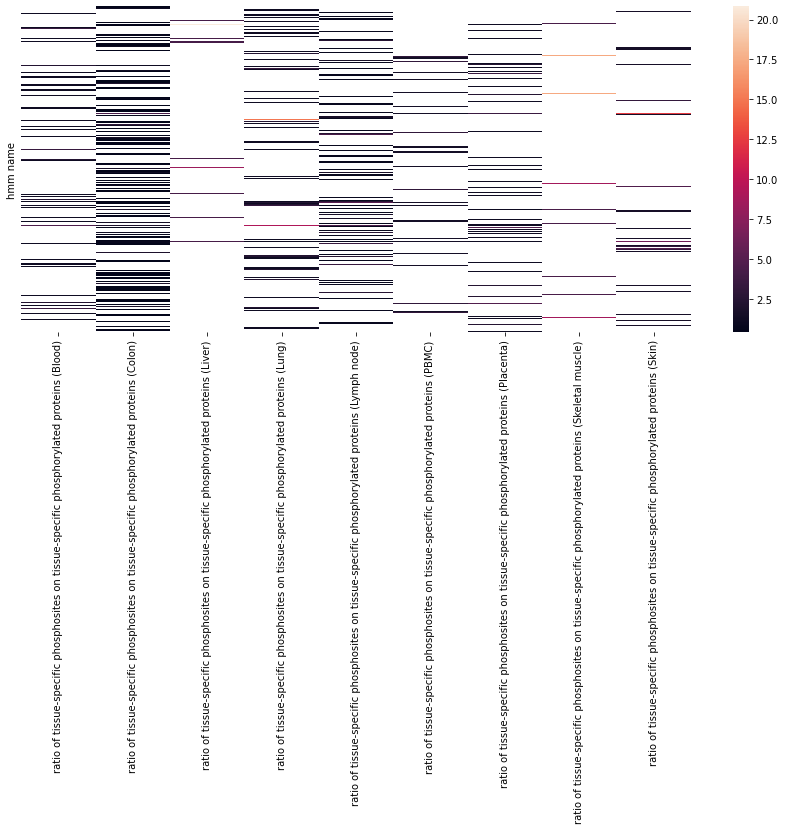

In [319]:
df_hmm_name_tspec_all.sort_values(["hmm name"], inplace=True)
plt.figure(figsize=(15,6))
sns.heatmap(df_hmm_name_tspec_all, xticklabels=True)
plt.yticks([],[])
plt.show()

In [320]:
temp = tspecsites_taspecproteins_pfam.loc[tspecsites_taspecproteins_pfam["tissue_site"]=="Adipose tissue", :].groupby(["hmm name", "ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"})
df_hmm_name_taspec_Adipose_tissue = temp.groupby(["hmm name"], as_index=False)["ACC_ID"].count()
df_hmm_name_taspec_Adipose_tissue.rename({"ACC_ID": "number of tissue-specific phosphosites on tissue aspecific phosphorylated proteins (Adipose tissue)"}, inplace=True, axis=1)
df_hmm_name_taspec_Adipose_tissue["Total"] = tspecsites_taspecproteins_pfam.loc[tspecsites_taspecproteins_pfam["tissue_site"]=="Adipose tissue", :].groupby(["ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"}).shape[0]
df_hmm_name_taspec_Adipose_tissue["ratio of tissue-specific phosphosites on tissue aspecific phosphorylated proteins (Adipose tissue)"] = df_hmm_name_taspec_Adipose_tissue["number of tissue-specific phosphosites on tissue aspecific phosphorylated proteins (Adipose tissue)"]*100/df_hmm_name_taspec_Adipose_tissue["Total"]
df_hmm_name_taspec_Adipose_tissue.drop(["number of tissue-specific phosphosites on tissue aspecific phosphorylated proteins (Adipose tissue)", "Total"], axis=1, inplace=True)
df_hmm_name_taspec_Adipose_tissue.set_index(["hmm name"], inplace=True)
temp = tspecsites_taspecproteins_pfam.loc[tspecsites_taspecproteins_pfam["tissue_site"]=="Blood", :].groupby(["hmm name", "ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"})
df_hmm_name_taspec_Blood = temp.groupby(["hmm name"], as_index=False)["ACC_ID"].count()
df_hmm_name_taspec_Blood.rename({"ACC_ID": "number of tissue-specific phosphosites on tissue aspecific phosphorylated proteins (Blood)"}, inplace=True, axis=1)
df_hmm_name_taspec_Blood["Total"] = tspecsites_taspecproteins_pfam.loc[tspecsites_taspecproteins_pfam["tissue_site"]=="Blood", :].groupby(["ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"}).shape[0]
df_hmm_name_taspec_Blood["ratio of tissue-specific phosphosites on tissue aspecific phosphorylated proteins (Blood)"] = df_hmm_name_taspec_Blood["number of tissue-specific phosphosites on tissue aspecific phosphorylated proteins (Blood)"]*100/df_hmm_name_taspec_Blood["Total"]
df_hmm_name_taspec_Blood.drop(["number of tissue-specific phosphosites on tissue aspecific phosphorylated proteins (Blood)", "Total"], axis=1, inplace=True)
df_hmm_name_taspec_Blood.set_index(["hmm name"], inplace=True)
temp = tspecsites_taspecproteins_pfam.loc[tspecsites_taspecproteins_pfam["tissue_site"]=="Brain", :].groupby(["hmm name", "ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"})
df_hmm_name_taspec_Brain = temp.groupby(["hmm name"], as_index=False)["ACC_ID"].count()
df_hmm_name_taspec_Brain.rename({"ACC_ID": "number of tissue-specific phosphosites on tissue aspecific phosphorylated proteins (Brain)"}, inplace=True, axis=1)
df_hmm_name_taspec_Brain["Total"] = tspecsites_taspecproteins_pfam.loc[tspecsites_taspecproteins_pfam["tissue_site"]=="Brain", :].groupby(["ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"}).shape[0]
df_hmm_name_taspec_Brain["ratio of tissue-specific phosphosites on tissue aspecific phosphorylated proteins (Brain)"] = df_hmm_name_taspec_Brain["number of tissue-specific phosphosites on tissue aspecific phosphorylated proteins (Brain)"]*100/df_hmm_name_taspec_Brain["Total"]
df_hmm_name_taspec_Brain.drop(["number of tissue-specific phosphosites on tissue aspecific phosphorylated proteins (Brain)", "Total"], axis=1, inplace=True)
df_hmm_name_taspec_Brain.set_index(["hmm name"], inplace=True)
temp = tspecsites_taspecproteins_pfam.loc[tspecsites_taspecproteins_pfam["tissue_site"]=="Cerebrospinal fluid", :].groupby(["hmm name", "ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"})
df_hmm_name_taspec_Cerebrospinal_fluid = temp.groupby(["hmm name"], as_index=False)["ACC_ID"].count()
df_hmm_name_taspec_Cerebrospinal_fluid.rename({"ACC_ID": "number of tissue-specific phosphosites on tissue aspecific phosphorylated proteins (Cerebrospinal fluid)"}, inplace=True, axis=1)
df_hmm_name_taspec_Cerebrospinal_fluid["Total"] = tspecsites_taspecproteins_pfam.loc[tspecsites_taspecproteins_pfam["tissue_site"]=="Cerebrospinal fluid", :].groupby(["ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"}).shape[0]
df_hmm_name_taspec_Cerebrospinal_fluid["ratio of tissue-specific phosphosites on tissue aspecific phosphorylated proteins (Cerebrospinal fluid)"] = df_hmm_name_taspec_Cerebrospinal_fluid["number of tissue-specific phosphosites on tissue aspecific phosphorylated proteins (Cerebrospinal fluid)"]*100/df_hmm_name_taspec_Cerebrospinal_fluid["Total"]
df_hmm_name_taspec_Cerebrospinal_fluid.drop(["number of tissue-specific phosphosites on tissue aspecific phosphorylated proteins (Cerebrospinal fluid)", "Total"], axis=1, inplace=True)
df_hmm_name_taspec_Cerebrospinal_fluid.set_index(["hmm name"], inplace=True)
temp = tspecsites_taspecproteins_pfam.loc[tspecsites_taspecproteins_pfam["tissue_site"]=="Colon", :].groupby(["hmm name", "ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"})
df_hmm_name_taspec_Colon = temp.groupby(["hmm name"], as_index=False)["ACC_ID"].count()
df_hmm_name_taspec_Colon.rename({"ACC_ID": "number of tissue-specific phosphosites on tissue aspecific phosphorylated proteins (Colon)"}, inplace=True, axis=1)
df_hmm_name_taspec_Colon["Total"] = tspecsites_taspecproteins_pfam.loc[tspecsites_taspecproteins_pfam["tissue_site"]=="Colon", :].groupby(["ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"}).shape[0]
df_hmm_name_taspec_Colon["ratio of tissue-specific phosphosites on tissue aspecific phosphorylated proteins (Colon)"] = df_hmm_name_taspec_Colon["number of tissue-specific phosphosites on tissue aspecific phosphorylated proteins (Colon)"]*100/df_hmm_name_taspec_Colon["Total"]
df_hmm_name_taspec_Colon.drop(["number of tissue-specific phosphosites on tissue aspecific phosphorylated proteins (Colon)", "Total"], axis=1, inplace=True)
df_hmm_name_taspec_Colon.set_index(["hmm name"], inplace=True)
temp = tspecsites_taspecproteins_pfam.loc[tspecsites_taspecproteins_pfam["tissue_site"]=="Kidney", :].groupby(["hmm name", "ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"})
df_hmm_name_taspec_Kidney = temp.groupby(["hmm name"], as_index=False)["ACC_ID"].count()
df_hmm_name_taspec_Kidney.rename({"ACC_ID": "number of tissue-specific phosphosites on tissue aspecific phosphorylated proteins (Kidney)"}, inplace=True, axis=1)
df_hmm_name_taspec_Kidney["Total"] = tspecsites_taspecproteins_pfam.loc[tspecsites_taspecproteins_pfam["tissue_site"]=="Kidney", :].groupby(["ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"}).shape[0]
df_hmm_name_taspec_Kidney["ratio of tissue-specific phosphosites on tissue aspecific phosphorylated proteins (Kidney)"] = df_hmm_name_taspec_Kidney["number of tissue-specific phosphosites on tissue aspecific phosphorylated proteins (Kidney)"]*100/df_hmm_name_taspec_Kidney["Total"]
df_hmm_name_taspec_Kidney.drop(["number of tissue-specific phosphosites on tissue aspecific phosphorylated proteins (Kidney)", "Total"], axis=1, inplace=True)
df_hmm_name_taspec_Kidney.set_index(["hmm name"], inplace=True)
temp = tspecsites_taspecproteins_pfam.loc[tspecsites_taspecproteins_pfam["tissue_site"]=="Liver", :].groupby(["hmm name", "ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"})
df_hmm_name_taspec_Liver = temp.groupby(["hmm name"], as_index=False)["ACC_ID"].count()
df_hmm_name_taspec_Liver.rename({"ACC_ID": "number of tissue-specific phosphosites on tissue aspecific phosphorylated proteins (Liver)"}, inplace=True, axis=1)
df_hmm_name_taspec_Liver["Total"] = tspecsites_taspecproteins_pfam.loc[tspecsites_taspecproteins_pfam["tissue_site"]=="Liver", :].groupby(["ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"}).shape[0]
df_hmm_name_taspec_Liver["ratio of tissue-specific phosphosites on tissue aspecific phosphorylated proteins (Liver)"] = df_hmm_name_taspec_Liver["number of tissue-specific phosphosites on tissue aspecific phosphorylated proteins (Liver)"]*100/df_hmm_name_taspec_Liver["Total"]
df_hmm_name_taspec_Liver.drop(["number of tissue-specific phosphosites on tissue aspecific phosphorylated proteins (Liver)", "Total"], axis=1, inplace=True)
df_hmm_name_taspec_Liver.set_index(["hmm name"], inplace=True)
temp = tspecsites_taspecproteins_pfam.loc[tspecsites_taspecproteins_pfam["tissue_site"]=="Lung", :].groupby(["hmm name", "ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"})
df_hmm_name_taspec_Lung = temp.groupby(["hmm name"], as_index=False)["ACC_ID"].count()
df_hmm_name_taspec_Lung.rename({"ACC_ID": "number of tissue-specific phosphosites on tissue aspecific phosphorylated proteins (Lung)"}, inplace=True, axis=1)
df_hmm_name_taspec_Lung["Total"] = tspecsites_taspecproteins_pfam.loc[tspecsites_taspecproteins_pfam["tissue_site"]=="Lung", :].groupby(["ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"}).shape[0]
df_hmm_name_taspec_Lung["ratio of tissue-specific phosphosites on tissue aspecific phosphorylated proteins (Lung)"] = df_hmm_name_taspec_Lung["number of tissue-specific phosphosites on tissue aspecific phosphorylated proteins (Lung)"]*100/df_hmm_name_taspec_Lung["Total"]
df_hmm_name_taspec_Lung.drop(["number of tissue-specific phosphosites on tissue aspecific phosphorylated proteins (Lung)", "Total"], axis=1, inplace=True)
df_hmm_name_taspec_Lung.set_index(["hmm name"], inplace=True)
temp = tspecsites_taspecproteins_pfam.loc[tspecsites_taspecproteins_pfam["tissue_site"]=="Lymph node", :].groupby(["hmm name", "ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"})
df_hmm_name_taspec_Lymph_node = temp.groupby(["hmm name"], as_index=False)["ACC_ID"].count()
df_hmm_name_taspec_Lymph_node.rename({"ACC_ID": "number of tissue-specific phosphosites on tissue aspecific phosphorylated proteins (Lymph node)"}, inplace=True, axis=1)
df_hmm_name_taspec_Lymph_node["Total"] = tspecsites_taspecproteins_pfam.loc[tspecsites_taspecproteins_pfam["tissue_site"]=="Lymph node", :].groupby(["ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"}).shape[0]
df_hmm_name_taspec_Lymph_node["ratio of tissue-specific phosphosites on tissue aspecific phosphorylated proteins (Lymph node)"] = df_hmm_name_taspec_Lymph_node["number of tissue-specific phosphosites on tissue aspecific phosphorylated proteins (Lymph node)"]*100/df_hmm_name_taspec_Lymph_node["Total"]
df_hmm_name_taspec_Lymph_node.drop(["number of tissue-specific phosphosites on tissue aspecific phosphorylated proteins (Lymph node)", "Total"], axis=1, inplace=True)
df_hmm_name_taspec_Lymph_node.set_index(["hmm name"], inplace=True)
temp = tspecsites_taspecproteins_pfam.loc[tspecsites_taspecproteins_pfam["tissue_site"]=="Monocytes", :].groupby(["hmm name", "ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"})
df_hmm_name_taspec_Monocytes = temp.groupby(["hmm name"], as_index=False)["ACC_ID"].count()
df_hmm_name_taspec_Monocytes.rename({"ACC_ID": "number of tissue-specific phosphosites on tissue aspecific phosphorylated proteins (Monocytes)"}, inplace=True, axis=1)
df_hmm_name_taspec_Monocytes["Total"] = tspecsites_taspecproteins_pfam.loc[tspecsites_taspecproteins_pfam["tissue_site"]=="Monocytes", :].groupby(["ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"}).shape[0]
df_hmm_name_taspec_Monocytes["ratio of tissue-specific phosphosites on tissue aspecific phosphorylated proteins (Monocytes)"] = df_hmm_name_taspec_Monocytes["number of tissue-specific phosphosites on tissue aspecific phosphorylated proteins (Monocytes)"]*100/df_hmm_name_taspec_Monocytes["Total"]
df_hmm_name_taspec_Monocytes.drop(["number of tissue-specific phosphosites on tissue aspecific phosphorylated proteins (Monocytes)", "Total"], axis=1, inplace=True)
df_hmm_name_taspec_Monocytes.set_index(["hmm name"], inplace=True)
temp = tspecsites_taspecproteins_pfam.loc[tspecsites_taspecproteins_pfam["tissue_site"]=="Ovary", :].groupby(["hmm name", "ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"})
df_hmm_name_taspec_Ovary = temp.groupby(["hmm name"], as_index=False)["ACC_ID"].count()
df_hmm_name_taspec_Ovary.rename({"ACC_ID": "number of tissue-specific phosphosites on tissue aspecific phosphorylated proteins (Ovary)"}, inplace=True, axis=1)
df_hmm_name_taspec_Ovary["Total"] = tspecsites_taspecproteins_pfam.loc[tspecsites_taspecproteins_pfam["tissue_site"]=="Ovary", :].groupby(["ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"}).shape[0]
df_hmm_name_taspec_Ovary["ratio of tissue-specific phosphosites on tissue aspecific phosphorylated proteins (Ovary)"] = df_hmm_name_taspec_Ovary["number of tissue-specific phosphosites on tissue aspecific phosphorylated proteins (Ovary)"]*100/df_hmm_name_taspec_Ovary["Total"]
df_hmm_name_taspec_Ovary.drop(["number of tissue-specific phosphosites on tissue aspecific phosphorylated proteins (Ovary)", "Total"], axis=1, inplace=True)
df_hmm_name_taspec_Ovary.set_index(["hmm name"], inplace=True)
temp = tspecsites_taspecproteins_pfam.loc[tspecsites_taspecproteins_pfam["tissue_site"]=="Pancreas", :].groupby(["hmm name", "ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"})
df_hmm_name_taspec_Pancreas = temp.groupby(["hmm name"], as_index=False)["ACC_ID"].count()
df_hmm_name_taspec_Pancreas.rename({"ACC_ID": "number of tissue-specific phosphosites on tissue aspecific phosphorylated proteins (Pancreas)"}, inplace=True, axis=1)
df_hmm_name_taspec_Pancreas["Total"] = tspecsites_taspecproteins_pfam.loc[tspecsites_taspecproteins_pfam["tissue_site"]=="Pancreas", :].groupby(["ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"}).shape[0]
df_hmm_name_taspec_Pancreas["ratio of tissue-specific phosphosites on tissue aspecific phosphorylated proteins (Pancreas)"] = df_hmm_name_taspec_Pancreas["number of tissue-specific phosphosites on tissue aspecific phosphorylated proteins (Pancreas)"]*100/df_hmm_name_taspec_Pancreas["Total"]
df_hmm_name_taspec_Pancreas.drop(["number of tissue-specific phosphosites on tissue aspecific phosphorylated proteins (Pancreas)", "Total"], axis=1, inplace=True)
df_hmm_name_taspec_Pancreas.set_index(["hmm name"], inplace=True)
temp = tspecsites_taspecproteins_pfam.loc[tspecsites_taspecproteins_pfam["tissue_site"]=="PBMC", :].groupby(["hmm name", "ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"})
df_hmm_name_taspec_PBMC = temp.groupby(["hmm name"], as_index=False)["ACC_ID"].count()
df_hmm_name_taspec_PBMC.rename({"ACC_ID": "number of tissue-specific phosphosites on tissue aspecific phosphorylated proteins (PBMC)"}, inplace=True, axis=1)
df_hmm_name_taspec_PBMC["Total"] = tspecsites_taspecproteins_pfam.loc[tspecsites_taspecproteins_pfam["tissue_site"]=="PBMC", :].groupby(["ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"}).shape[0]
df_hmm_name_taspec_PBMC["ratio of tissue-specific phosphosites on tissue aspecific phosphorylated proteins (PBMC)"] = df_hmm_name_taspec_PBMC["number of tissue-specific phosphosites on tissue aspecific phosphorylated proteins (PBMC)"]*100/df_hmm_name_taspec_PBMC["Total"]
df_hmm_name_taspec_PBMC.drop(["number of tissue-specific phosphosites on tissue aspecific phosphorylated proteins (PBMC)", "Total"], axis=1, inplace=True)
df_hmm_name_taspec_PBMC.set_index(["hmm name"], inplace=True)
temp = tspecsites_taspecproteins_pfam.loc[tspecsites_taspecproteins_pfam["tissue_site"]=="Placenta", :].groupby(["hmm name", "ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"})
df_hmm_name_taspec_Placenta = temp.groupby(["hmm name"], as_index=False)["ACC_ID"].count()
df_hmm_name_taspec_Placenta.rename({"ACC_ID": "number of tissue-specific phosphosites on tissue aspecific phosphorylated proteins (Placenta)"}, inplace=True, axis=1)
df_hmm_name_taspec_Placenta["Total"] = tspecsites_taspecproteins_pfam.loc[tspecsites_taspecproteins_pfam["tissue_site"]=="Placenta", :].groupby(["ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"}).shape[0]
df_hmm_name_taspec_Placenta["ratio of tissue-specific phosphosites on tissue aspecific phosphorylated proteins (Placenta)"] = df_hmm_name_taspec_Placenta["number of tissue-specific phosphosites on tissue aspecific phosphorylated proteins (Placenta)"]*100/df_hmm_name_taspec_Placenta["Total"]
df_hmm_name_taspec_Placenta.drop(["number of tissue-specific phosphosites on tissue aspecific phosphorylated proteins (Placenta)", "Total"], axis=1, inplace=True)
df_hmm_name_taspec_Placenta.set_index(["hmm name"], inplace=True)
temp = tspecsites_taspecproteins_pfam.loc[tspecsites_taspecproteins_pfam["tissue_site"]=="Skeletal muscle", :].groupby(["hmm name", "ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"})
df_hmm_name_taspec_Skeletal_muscle = temp.groupby(["hmm name"], as_index=False)["ACC_ID"].count()
df_hmm_name_taspec_Skeletal_muscle.rename({"ACC_ID": "number of tissue-specific phosphosites on tissue aspecific phosphorylated proteins (Skeletal muscle)"}, inplace=True, axis=1)
df_hmm_name_taspec_Skeletal_muscle["Total"] = tspecsites_taspecproteins_pfam.loc[tspecsites_taspecproteins_pfam["tissue_site"]=="Skeletal muscle", :].groupby(["ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"}).shape[0]
df_hmm_name_taspec_Skeletal_muscle["ratio of tissue-specific phosphosites on tissue aspecific phosphorylated proteins (Skeletal muscle)"] = df_hmm_name_taspec_Skeletal_muscle["number of tissue-specific phosphosites on tissue aspecific phosphorylated proteins (Skeletal muscle)"]*100/df_hmm_name_taspec_Skeletal_muscle["Total"]
df_hmm_name_taspec_Skeletal_muscle.drop(["number of tissue-specific phosphosites on tissue aspecific phosphorylated proteins (Skeletal muscle)", "Total"], axis=1, inplace=True)
df_hmm_name_taspec_Skeletal_muscle.set_index(["hmm name"], inplace=True)
temp = tspecsites_taspecproteins_pfam.loc[tspecsites_taspecproteins_pfam["tissue_site"]=="Skin", :].groupby(["hmm name", "ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"})
df_hmm_name_taspec_Skin = temp.groupby(["hmm name"], as_index=False)["ACC_ID"].count()
df_hmm_name_taspec_Skin.rename({"ACC_ID": "number of tissue-specific phosphosites on tissue aspecific phosphorylated proteins (Skin)"}, inplace=True, axis=1)
df_hmm_name_taspec_Skin["Total"] = tspecsites_taspecproteins_pfam.loc[tspecsites_taspecproteins_pfam["tissue_site"]=="Skin", :].groupby(["ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"}).shape[0]
df_hmm_name_taspec_Skin["ratio of tissue-specific phosphosites on tissue aspecific phosphorylated proteins (Skin)"] = df_hmm_name_taspec_Skin["number of tissue-specific phosphosites on tissue aspecific phosphorylated proteins (Skin)"]*100/df_hmm_name_taspec_Skin["Total"]
df_hmm_name_taspec_Skin.drop(["number of tissue-specific phosphosites on tissue aspecific phosphorylated proteins (Skin)", "Total"], axis=1, inplace=True)
df_hmm_name_taspec_Skin.set_index(["hmm name"], inplace=True)
temp = tspecsites_taspecproteins_pfam.loc[tspecsites_taspecproteins_pfam["tissue_site"]=="Testis", :].groupby(["hmm name", "ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"})
df_hmm_name_taspec_Testis = temp.groupby(["hmm name"], as_index=False)["ACC_ID"].count()
df_hmm_name_taspec_Testis.rename({"ACC_ID": "number of tissue-specific phosphosites on tissue aspecific phosphorylated proteins (Testis)"}, inplace=True, axis=1)
df_hmm_name_taspec_Testis["Total"] = tspecsites_taspecproteins_pfam.loc[tspecsites_taspecproteins_pfam["tissue_site"]=="Testis", :].groupby(["ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"}).shape[0]
df_hmm_name_taspec_Testis["ratio of tissue-specific phosphosites on tissue aspecific phosphorylated proteins (Testis)"] = df_hmm_name_taspec_Testis["number of tissue-specific phosphosites on tissue aspecific phosphorylated proteins (Testis)"]*100/df_hmm_name_taspec_Testis["Total"]
df_hmm_name_taspec_Testis.drop(["number of tissue-specific phosphosites on tissue aspecific phosphorylated proteins (Testis)", "Total"], axis=1, inplace=True)
df_hmm_name_taspec_Testis.set_index(["hmm name"], inplace=True)
temp = tspecsites_taspecproteins_pfam.loc[tspecsites_taspecproteins_pfam["tissue_site"]=="Placenta", :].groupby(["hmm name", "ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"})
df_hmm_name_taspec_Placenta = temp.groupby(["hmm name"], as_index=False)["ACC_ID"].count()
df_hmm_name_taspec_Placenta.rename({"ACC_ID": "number of tissue-specific phosphosites on tissue aspecific phosphorylated proteins (Placenta)"}, inplace=True, axis=1)
df_hmm_name_taspec_Placenta["Total"] = tspecsites_taspecproteins_pfam.loc[tspecsites_taspecproteins_pfam["tissue_site"]=="Placenta", :].groupby(["ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"}).shape[0]
df_hmm_name_taspec_Placenta["ratio of tissue-specific phosphosites on tissue aspecific phosphorylated proteins (Placenta)"] = df_hmm_name_taspec_Placenta["number of tissue-specific phosphosites on tissue aspecific phosphorylated proteins (Placenta)"]*100/df_hmm_name_taspec_Placenta["Total"]
df_hmm_name_taspec_Placenta.drop(["number of tissue-specific phosphosites on tissue aspecific phosphorylated proteins (Placenta)", "Total"], axis=1, inplace=True)
df_hmm_name_taspec_Placenta.set_index(["hmm name"], inplace=True)
temp = tspecsites_taspecproteins_pfam.loc[tspecsites_taspecproteins_pfam["tissue_site"]=="Umbilical cord", :].groupby(["hmm name", "ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"})
df_hmm_name_taspec_Umbilical_cord = temp.groupby(["hmm name"], as_index=False)["ACC_ID"].count()
df_hmm_name_taspec_Umbilical_cord.rename({"ACC_ID": "number of tissue-specific phosphosites on tissue aspecific phosphorylated proteins (Umbilical cord)"}, inplace=True, axis=1)
df_hmm_name_taspec_Umbilical_cord["Total"] = tspecsites_taspecproteins_pfam.loc[tspecsites_taspecproteins_pfam["tissue_site"]=="Umbilical cord", :].groupby(["ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"}).shape[0]
df_hmm_name_taspec_Umbilical_cord["ratio of tissue-specific phosphosites on tissue aspecific phosphorylated proteins (Umbilical cord)"] = df_hmm_name_taspec_Umbilical_cord["number of tissue-specific phosphosites on tissue aspecific phosphorylated proteins (Umbilical cord)"]*100/df_hmm_name_taspec_Umbilical_cord["Total"]
df_hmm_name_taspec_Umbilical_cord.drop(["number of tissue-specific phosphosites on tissue aspecific phosphorylated proteins (Umbilical cord)", "Total"], axis=1, inplace=True)
df_hmm_name_taspec_Umbilical_cord.set_index(["hmm name"], inplace=True)
temp = tspecsites_taspecproteins_pfam.loc[tspecsites_taspecproteins_pfam["tissue_site"]=="Urinary bladder", :].groupby(["hmm name", "ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"})
df_hmm_name_taspec_Urinary_bladder = temp.groupby(["hmm name"], as_index=False)["ACC_ID"].count()
df_hmm_name_taspec_Urinary_bladder.rename({"ACC_ID": "number of tissue-specific phosphosites on tissue aspecific phosphorylated proteins (Urinary bladder)"}, inplace=True, axis=1)
df_hmm_name_taspec_Urinary_bladder["Total"] = tspecsites_taspecproteins_pfam.loc[tspecsites_taspecproteins_pfam["tissue_site"]=="Urinary bladder", :].groupby(["ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"}).shape[0]
df_hmm_name_taspec_Urinary_bladder["ratio of tissue-specific phosphosites on tissue aspecific phosphorylated proteins (Urinary bladder)"] = df_hmm_name_taspec_Urinary_bladder["number of tissue-specific phosphosites on tissue aspecific phosphorylated proteins (Urinary bladder)"]*100/df_hmm_name_taspec_Urinary_bladder["Total"]
df_hmm_name_taspec_Urinary_bladder.drop(["number of tissue-specific phosphosites on tissue aspecific phosphorylated proteins (Urinary bladder)", "Total"], axis=1, inplace=True)
df_hmm_name_taspec_Urinary_bladder.set_index(["hmm name"], inplace=True)

In [321]:
df_hmm_name_taspec_all = pd.concat([df_hmm_name_taspec_Blood, df_hmm_name_taspec_Colon, 
                               df_hmm_name_taspec_Liver, df_hmm_name_taspec_Lung, df_hmm_name_taspec_Lymph_node, 
                                    df_hmm_name_taspec_PBMC, df_hmm_name_taspec_Placenta,
                               df_hmm_name_taspec_Skeletal_muscle, df_hmm_name_taspec_Skin], axis=1)
df_hmm_name_taspec_all.dropna(axis=1, how="all", inplace=True)
df_hmm_name_taspec_all

ratio of tissue-specific phosphosites on tissue aspecific phosphorylated proteins (Blood)  \
hmm name                                                                                                 
A2M                                                   1.212121                                           
A2M_BRD                                               2.424242                                           
A2M_recep                                             1.212121                                           
AAA                                                   1.818182                                           
AP1AR                                                 0.606061                                           
...                                                        ...                                           
Vault_4                                                    NaN                                           
eIF2_C                                                     NaN                                           
eIF3_N                                                     NaN                                           
ig                                                         NaN                                           
tRNA-synt_2                                                NaN                                           

             ratio of tissue-specific phosphosites on tissue aspecific phosphorylated proteins (Colon)  \
hmm name                                                                                                 
A2M                                                        NaN                                           
A2M_BRD                                                    NaN                                           
A2M_recep                                                  NaN                                           
AAA                                                   1.401869                                           
AP1AR                                                 0.233645                                           
...                                                        ...                                           
Vault_4                                                    NaN                                           
eIF2_C                                                     NaN                                           
eIF3_N                                                     NaN                                           
ig                                                         NaN                                           
tRNA-synt_2                                                NaN                                           

             ratio of tissue-specific phosphosites on tissue aspecific phosphorylated proteins (Liver)  \
hmm name                                                                                                 
A2M                                                        NaN                                           
A2M_BRD                                                    NaN                                           
A2M_recep                                                  NaN                                           
AAA                                                        NaN                                           
AP1AR                                                      NaN                                           
...                                                        ...                                           
Vault_4                                                    NaN                                           
eIF2_C                                                     NaN                                           
eIF3_N                                                     NaN                                           
ig                                                         NaN                           

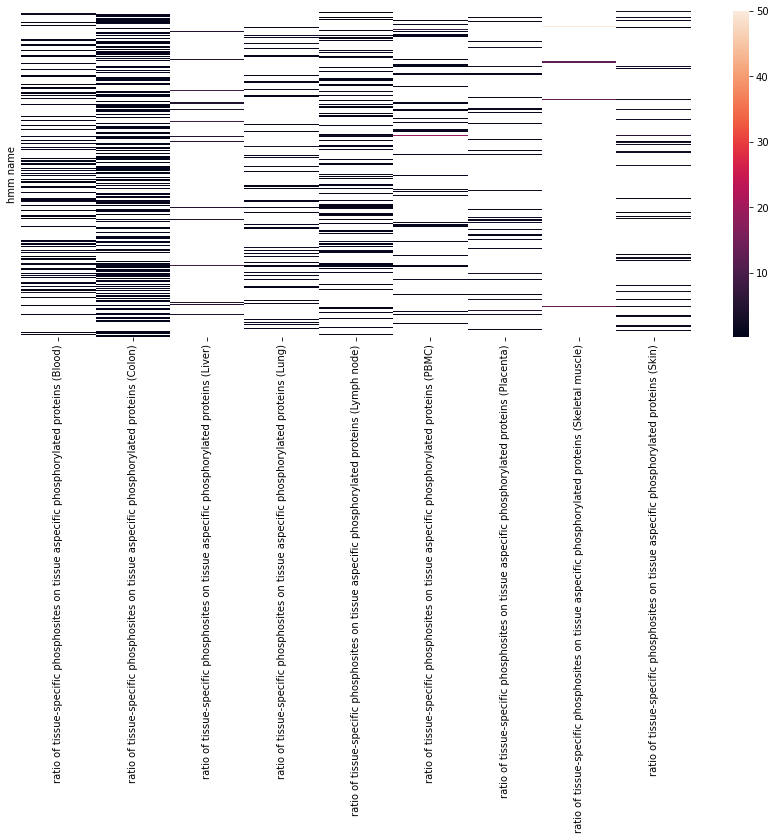

In [322]:
df_hmm_name_taspec_all.sort_values(["hmm name"], inplace=True)
plt.figure(figsize=(15,6))
sns.heatmap(df_hmm_name_taspec_all, yticklabels=False)
plt.show()

In [323]:
temp = tspecsites_genproteins_pfam.loc[tspecsites_genproteins_pfam["tissue_site"]=="Adipose tissue", :].groupby(["hmm name", "ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"})
df_hmm_name_gen_Adipose_tissue = temp.groupby(["hmm name"], as_index=False)["ACC_ID"].count()
df_hmm_name_gen_Adipose_tissue.rename({"ACC_ID": "number of tissue-specific phosphosites on pervasively phosphorylated proteins (Adipose tissue)"}, inplace=True, axis=1)
df_hmm_name_gen_Adipose_tissue["Total"] = tspecsites_genproteins_pfam.loc[tspecsites_genproteins_pfam["tissue_site"]=="Adipose tissue", :].groupby(["ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"}).shape[0]
df_hmm_name_gen_Adipose_tissue["ratio of tissue-specific phosphosites on pervasively phosphorylated proteins (Adipose tissue)"] = df_hmm_name_gen_Adipose_tissue["number of tissue-specific phosphosites on pervasively phosphorylated proteins (Adipose tissue)"]*100/df_hmm_name_gen_Adipose_tissue["Total"]
df_hmm_name_gen_Adipose_tissue.drop(["number of tissue-specific phosphosites on pervasively phosphorylated proteins (Adipose tissue)", "Total"], axis=1, inplace=True)
df_hmm_name_gen_Adipose_tissue.set_index(["hmm name"], inplace=True)
temp = tspecsites_genproteins_pfam.loc[tspecsites_genproteins_pfam["tissue_site"]=="Blood", :].groupby(["hmm name", "ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"})
df_hmm_name_gen_Blood = temp.groupby(["hmm name"], as_index=False)["ACC_ID"].count()
df_hmm_name_gen_Blood.rename({"ACC_ID": "number of tissue-specific phosphosites on pervasively phosphorylated proteins (Blood)"}, inplace=True, axis=1)
df_hmm_name_gen_Blood["Total"] = tspecsites_genproteins_pfam.loc[tspecsites_genproteins_pfam["tissue_site"]=="Blood", :].groupby(["ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"}).shape[0]
df_hmm_name_gen_Blood["ratio of tissue-specific phosphosites on pervasively phosphorylated proteins (Blood)"] = df_hmm_name_gen_Blood["number of tissue-specific phosphosites on pervasively phosphorylated proteins (Blood)"]*100/df_hmm_name_gen_Blood["Total"]
df_hmm_name_gen_Blood.drop(["number of tissue-specific phosphosites on pervasively phosphorylated proteins (Blood)", "Total"], axis=1, inplace=True)
df_hmm_name_gen_Blood.set_index(["hmm name"], inplace=True)
temp = tspecsites_genproteins_pfam.loc[tspecsites_genproteins_pfam["tissue_site"]=="Brain", :].groupby(["hmm name", "ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"})
df_hmm_name_gen_Brain = temp.groupby(["hmm name"], as_index=False)["ACC_ID"].count()
df_hmm_name_gen_Brain.rename({"ACC_ID": "number of tissue-specific phosphosites on pervasively phosphorylated proteins (Brain)"}, inplace=True, axis=1)
df_hmm_name_gen_Brain["Total"] = tspecsites_genproteins_pfam.loc[tspecsites_genproteins_pfam["tissue_site"]=="Brain", :].groupby(["ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"}).shape[0]
df_hmm_name_gen_Brain["ratio of tissue-specific phosphosites on pervasively phosphorylated proteins (Brain)"] = df_hmm_name_gen_Brain["number of tissue-specific phosphosites on pervasively phosphorylated proteins (Brain)"]*100/df_hmm_name_gen_Brain["Total"]
df_hmm_name_gen_Brain.drop(["number of tissue-specific phosphosites on pervasively phosphorylated proteins (Brain)", "Total"], axis=1, inplace=True)
df_hmm_name_gen_Brain.set_index(["hmm name"], inplace=True)
temp = tspecsites_genproteins_pfam.loc[tspecsites_genproteins_pfam["tissue_site"]=="Cerebrospinal fluid", :].groupby(["hmm name", "ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"})
df_hmm_name_gen_Cerebrospinal_fluid = temp.groupby(["hmm name"], as_index=False)["ACC_ID"].count()
df_hmm_name_gen_Cerebrospinal_fluid.rename({"ACC_ID": "number of tissue-specific phosphosites on pervasively phosphorylated proteins (Cerebrospinal fluid)"}, inplace=True, axis=1)
df_hmm_name_gen_Cerebrospinal_fluid["Total"] = tspecsites_genproteins_pfam.loc[tspecsites_genproteins_pfam["tissue_site"]=="Cerebrospinal fluid", :].groupby(["ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"}).shape[0]
df_hmm_name_gen_Cerebrospinal_fluid["ratio of tissue-specific phosphosites on pervasively phosphorylated proteins (Cerebrospinal fluid)"] = df_hmm_name_gen_Cerebrospinal_fluid["number of tissue-specific phosphosites on pervasively phosphorylated proteins (Cerebrospinal fluid)"]*100/df_hmm_name_gen_Cerebrospinal_fluid["Total"]
df_hmm_name_gen_Cerebrospinal_fluid.drop(["number of tissue-specific phosphosites on pervasively phosphorylated proteins (Cerebrospinal fluid)", "Total"], axis=1, inplace=True)
df_hmm_name_gen_Cerebrospinal_fluid.set_index(["hmm name"], inplace=True)
temp = tspecsites_genproteins_pfam.loc[tspecsites_genproteins_pfam["tissue_site"]=="Colon", :].groupby(["hmm name", "ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"})
df_hmm_name_gen_Colon = temp.groupby(["hmm name"], as_index=False)["ACC_ID"].count()
df_hmm_name_gen_Colon.rename({"ACC_ID": "number of tissue-specific phosphosites on pervasively phosphorylated proteins (Colon)"}, inplace=True, axis=1)
df_hmm_name_gen_Colon["Total"] = tspecsites_genproteins_pfam.loc[tspecsites_genproteins_pfam["tissue_site"]=="Colon", :].groupby(["ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"}).shape[0]
df_hmm_name_gen_Colon["ratio of tissue-specific phosphosites on pervasively phosphorylated proteins (Colon)"] = df_hmm_name_gen_Colon["number of tissue-specific phosphosites on pervasively phosphorylated proteins (Colon)"]*100/df_hmm_name_gen_Colon["Total"]
df_hmm_name_gen_Colon.drop(["number of tissue-specific phosphosites on pervasively phosphorylated proteins (Colon)", "Total"], axis=1, inplace=True)
df_hmm_name_gen_Colon.set_index(["hmm name"], inplace=True)
temp = tspecsites_genproteins_pfam.loc[tspecsites_genproteins_pfam["tissue_site"]=="Kidney", :].groupby(["hmm name", "ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"})
df_hmm_name_gen_Kidney = temp.groupby(["hmm name"], as_index=False)["ACC_ID"].count()
df_hmm_name_gen_Kidney.rename({"ACC_ID": "number of tissue-specific phosphosites on pervasively phosphorylated proteins (Kidney)"}, inplace=True, axis=1)
df_hmm_name_gen_Kidney["Total"] = tspecsites_genproteins_pfam.loc[tspecsites_genproteins_pfam["tissue_site"]=="Kidney", :].groupby(["ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"}).shape[0]
df_hmm_name_gen_Kidney["ratio of tissue-specific phosphosites on pervasively phosphorylated proteins (Kidney)"] = df_hmm_name_gen_Kidney["number of tissue-specific phosphosites on pervasively phosphorylated proteins (Kidney)"]*100/df_hmm_name_gen_Kidney["Total"]
df_hmm_name_gen_Kidney.drop(["number of tissue-specific phosphosites on pervasively phosphorylated proteins (Kidney)", "Total"], axis=1, inplace=True)
df_hmm_name_gen_Kidney.set_index(["hmm name"], inplace=True)
temp = tspecsites_genproteins_pfam.loc[tspecsites_genproteins_pfam["tissue_site"]=="Liver", :].groupby(["hmm name", "ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"})
df_hmm_name_gen_Liver = temp.groupby(["hmm name"], as_index=False)["ACC_ID"].count()
df_hmm_name_gen_Liver.rename({"ACC_ID": "number of tissue-specific phosphosites on pervasively phosphorylated proteins (Liver)"}, inplace=True, axis=1)
df_hmm_name_gen_Liver["Total"] = tspecsites_genproteins_pfam.loc[tspecsites_genproteins_pfam["tissue_site"]=="Liver", :].groupby(["ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"}).shape[0]
df_hmm_name_gen_Liver["ratio of tissue-specific phosphosites on pervasively phosphorylated proteins (Liver)"] = df_hmm_name_gen_Liver["number of tissue-specific phosphosites on pervasively phosphorylated proteins (Liver)"]*100/df_hmm_name_gen_Liver["Total"]
df_hmm_name_gen_Liver.drop(["number of tissue-specific phosphosites on pervasively phosphorylated proteins (Liver)", "Total"], axis=1, inplace=True)
df_hmm_name_gen_Liver.set_index(["hmm name"], inplace=True)
temp = tspecsites_genproteins_pfam.loc[tspecsites_genproteins_pfam["tissue_site"]=="Lung", :].groupby(["hmm name", "ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"})
df_hmm_name_gen_Lung = temp.groupby(["hmm name"], as_index=False)["ACC_ID"].count()
df_hmm_name_gen_Lung.rename({"ACC_ID": "number of tissue-specific phosphosites on pervasively phosphorylated proteins (Lung)"}, inplace=True, axis=1)
df_hmm_name_gen_Lung["Total"] = tspecsites_genproteins_pfam.loc[tspecsites_genproteins_pfam["tissue_site"]=="Lung", :].groupby(["ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"}).shape[0]
df_hmm_name_gen_Lung["ratio of tissue-specific phosphosites on pervasively phosphorylated proteins (Lung)"] = df_hmm_name_gen_Lung["number of tissue-specific phosphosites on pervasively phosphorylated proteins (Lung)"]*100/df_hmm_name_gen_Lung["Total"]
df_hmm_name_gen_Lung.drop(["number of tissue-specific phosphosites on pervasively phosphorylated proteins (Lung)", "Total"], axis=1, inplace=True)
df_hmm_name_gen_Lung.set_index(["hmm name"], inplace=True)
temp = tspecsites_genproteins_pfam.loc[tspecsites_genproteins_pfam["tissue_site"]=="Lymph node", :].groupby(["hmm name", "ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"})
df_hmm_name_gen_Lymph_node = temp.groupby(["hmm name"], as_index=False)["ACC_ID"].count()
df_hmm_name_gen_Lymph_node.rename({"ACC_ID": "number of tissue-specific phosphosites on pervasively phosphorylated proteins (Lymph node)"}, inplace=True, axis=1)
df_hmm_name_gen_Lymph_node["Total"] = tspecsites_genproteins_pfam.loc[tspecsites_genproteins_pfam["tissue_site"]=="Lymph node", :].groupby(["ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"}).shape[0]
df_hmm_name_gen_Lymph_node["ratio of tissue-specific phosphosites on pervasively phosphorylated proteins (Lymph node)"] = df_hmm_name_gen_Lymph_node["number of tissue-specific phosphosites on pervasively phosphorylated proteins (Lymph node)"]*100/df_hmm_name_gen_Lymph_node["Total"]
df_hmm_name_gen_Lymph_node.drop(["number of tissue-specific phosphosites on pervasively phosphorylated proteins (Lymph node)", "Total"], axis=1, inplace=True)
df_hmm_name_gen_Lymph_node.set_index(["hmm name"], inplace=True)
temp = tspecsites_genproteins_pfam.loc[tspecsites_genproteins_pfam["tissue_site"]=="Monocytes", :].groupby(["hmm name", "ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"})
df_hmm_name_gen_Monocytes = temp.groupby(["hmm name"], as_index=False)["ACC_ID"].count()
df_hmm_name_gen_Monocytes.rename({"ACC_ID": "number of tissue-specific phosphosites on pervasively phosphorylated proteins (Monocytes)"}, inplace=True, axis=1)
df_hmm_name_gen_Monocytes["Total"] = tspecsites_genproteins_pfam.loc[tspecsites_genproteins_pfam["tissue_site"]=="Monocytes", :].groupby(["ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"}).shape[0]
df_hmm_name_gen_Monocytes["ratio of tissue-specific phosphosites on pervasively phosphorylated proteins (Monocytes)"] = df_hmm_name_gen_Monocytes["number of tissue-specific phosphosites on pervasively phosphorylated proteins (Monocytes)"]*100/df_hmm_name_gen_Monocytes["Total"]
df_hmm_name_gen_Monocytes.drop(["number of tissue-specific phosphosites on pervasively phosphorylated proteins (Monocytes)", "Total"], axis=1, inplace=True)
df_hmm_name_gen_Monocytes.set_index(["hmm name"], inplace=True)
temp = tspecsites_genproteins_pfam.loc[tspecsites_genproteins_pfam["tissue_site"]=="Ovary", :].groupby(["hmm name", "ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"})
df_hmm_name_gen_Ovary = temp.groupby(["hmm name"], as_index=False)["ACC_ID"].count()
df_hmm_name_gen_Ovary.rename({"ACC_ID": "number of tissue-specific phosphosites on pervasively phosphorylated proteins (Ovary)"}, inplace=True, axis=1)
df_hmm_name_gen_Ovary["Total"] = tspecsites_genproteins_pfam.loc[tspecsites_genproteins_pfam["tissue_site"]=="Ovary", :].groupby(["ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"}).shape[0]
df_hmm_name_gen_Ovary["ratio of tissue-specific phosphosites on pervasively phosphorylated proteins (Ovary)"] = df_hmm_name_gen_Ovary["number of tissue-specific phosphosites on pervasively phosphorylated proteins (Ovary)"]*100/df_hmm_name_gen_Ovary["Total"]
df_hmm_name_gen_Ovary.drop(["number of tissue-specific phosphosites on pervasively phosphorylated proteins (Ovary)", "Total"], axis=1, inplace=True)
df_hmm_name_gen_Ovary.set_index(["hmm name"], inplace=True)
temp = tspecsites_genproteins_pfam.loc[tspecsites_genproteins_pfam["tissue_site"]=="Pancreas", :].groupby(["hmm name", "ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"})
df_hmm_name_gen_Pancreas = temp.groupby(["hmm name"], as_index=False)["ACC_ID"].count()
df_hmm_name_gen_Pancreas.rename({"ACC_ID": "number of tissue-specific phosphosites on pervasively phosphorylated proteins (Pancreas)"}, inplace=True, axis=1)
df_hmm_name_gen_Pancreas["Total"] = tspecsites_genproteins_pfam.loc[tspecsites_genproteins_pfam["tissue_site"]=="Pancreas", :].groupby(["ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"}).shape[0]
df_hmm_name_gen_Pancreas["ratio of tissue-specific phosphosites on pervasively phosphorylated proteins (Pancreas)"] = df_hmm_name_gen_Pancreas["number of tissue-specific phosphosites on pervasively phosphorylated proteins (Pancreas)"]*100/df_hmm_name_gen_Pancreas["Total"]
df_hmm_name_gen_Pancreas.drop(["number of tissue-specific phosphosites on pervasively phosphorylated proteins (Pancreas)", "Total"], axis=1, inplace=True)
df_hmm_name_gen_Pancreas.set_index(["hmm name"], inplace=True)
temp = tspecsites_genproteins_pfam.loc[tspecsites_genproteins_pfam["tissue_site"]=="PBMC", :].groupby(["hmm name", "ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"})
df_hmm_name_gen_PBMC = temp.groupby(["hmm name"], as_index=False)["ACC_ID"].count()
df_hmm_name_gen_PBMC.rename({"ACC_ID": "number of tissue-specific phosphosites on pervasively phosphorylated proteins (PBMC)"}, inplace=True, axis=1)
df_hmm_name_gen_PBMC["Total"] = tspecsites_genproteins_pfam.loc[tspecsites_genproteins_pfam["tissue_site"]=="PBMC", :].groupby(["ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"}).shape[0]
df_hmm_name_gen_PBMC["ratio of tissue-specific phosphosites on pervasively phosphorylated proteins (PBMC)"] = df_hmm_name_gen_PBMC["number of tissue-specific phosphosites on pervasively phosphorylated proteins (PBMC)"]*100/df_hmm_name_gen_PBMC["Total"]
df_hmm_name_gen_PBMC.drop(["number of tissue-specific phosphosites on pervasively phosphorylated proteins (PBMC)", "Total"], axis=1, inplace=True)
df_hmm_name_gen_PBMC.set_index(["hmm name"], inplace=True)
temp = tspecsites_genproteins_pfam.loc[tspecsites_genproteins_pfam["tissue_site"]=="Placenta", :].groupby(["hmm name", "ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"})
df_hmm_name_gen_Placenta = temp.groupby(["hmm name"], as_index=False)["ACC_ID"].count()
df_hmm_name_gen_Placenta.rename({"ACC_ID": "number of tissue-specific phosphosites on pervasively phosphorylated proteins (Placenta)"}, inplace=True, axis=1)
df_hmm_name_gen_Placenta["Total"] = tspecsites_genproteins_pfam.loc[tspecsites_genproteins_pfam["tissue_site"]=="Placenta", :].groupby(["ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"}).shape[0]
df_hmm_name_gen_Placenta["ratio of tissue-specific phosphosites on pervasively phosphorylated proteins (Placenta)"] = df_hmm_name_gen_Placenta["number of tissue-specific phosphosites on pervasively phosphorylated proteins (Placenta)"]*100/df_hmm_name_gen_Placenta["Total"]
df_hmm_name_gen_Placenta.drop(["number of tissue-specific phosphosites on pervasively phosphorylated proteins (Placenta)", "Total"], axis=1, inplace=True)
df_hmm_name_gen_Placenta.set_index(["hmm name"], inplace=True)
temp = tspecsites_genproteins_pfam.loc[tspecsites_genproteins_pfam["tissue_site"]=="Skeletal muscle", :].groupby(["hmm name", "ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"})
df_hmm_name_gen_Skeletal_muscle = temp.groupby(["hmm name"], as_index=False)["ACC_ID"].count()
df_hmm_name_gen_Skeletal_muscle.rename({"ACC_ID": "number of tissue-specific phosphosites on pervasively phosphorylated proteins (Skeletal muscle)"}, inplace=True, axis=1)
df_hmm_name_gen_Skeletal_muscle["Total"] = tspecsites_genproteins_pfam.loc[tspecsites_genproteins_pfam["tissue_site"]=="Skeletal muscle", :].groupby(["ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"}).shape[0]
df_hmm_name_gen_Skeletal_muscle["ratio of tissue-specific phosphosites on pervasively phosphorylated proteins (Skeletal muscle)"] = df_hmm_name_gen_Skeletal_muscle["number of tissue-specific phosphosites on pervasively phosphorylated proteins (Skeletal muscle)"]*100/df_hmm_name_gen_Skeletal_muscle["Total"]
df_hmm_name_gen_Skeletal_muscle.drop(["number of tissue-specific phosphosites on pervasively phosphorylated proteins (Skeletal muscle)", "Total"], axis=1, inplace=True)
df_hmm_name_gen_Skeletal_muscle.set_index(["hmm name"], inplace=True)
temp = tspecsites_genproteins_pfam.loc[tspecsites_genproteins_pfam["tissue_site"]=="Skin", :].groupby(["hmm name", "ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"})
df_hmm_name_gen_Skin = temp.groupby(["hmm name"], as_index=False)["ACC_ID"].count()
df_hmm_name_gen_Skin.rename({"ACC_ID": "number of tissue-specific phosphosites on pervasively phosphorylated proteins (Skin)"}, inplace=True, axis=1)
df_hmm_name_gen_Skin["Total"] = tspecsites_genproteins_pfam.loc[tspecsites_genproteins_pfam["tissue_site"]=="Skin", :].groupby(["ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"}).shape[0]
df_hmm_name_gen_Skin["ratio of tissue-specific phosphosites on pervasively phosphorylated proteins (Skin)"] = df_hmm_name_gen_Skin["number of tissue-specific phosphosites on pervasively phosphorylated proteins (Skin)"]*100/df_hmm_name_gen_Skin["Total"]
df_hmm_name_gen_Skin.drop(["number of tissue-specific phosphosites on pervasively phosphorylated proteins (Skin)", "Total"], axis=1, inplace=True)
df_hmm_name_gen_Skin.set_index(["hmm name"], inplace=True)
temp = tspecsites_genproteins_pfam.loc[tspecsites_genproteins_pfam["tissue_site"]=="Testis", :].groupby(["hmm name", "ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"})
df_hmm_name_gen_Testis = temp.groupby(["hmm name"], as_index=False)["ACC_ID"].count()
df_hmm_name_gen_Testis.rename({"ACC_ID": "number of tissue-specific phosphosites on pervasively phosphorylated proteins (Testis)"}, inplace=True, axis=1)
df_hmm_name_gen_Testis["Total"] = tspecsites_genproteins_pfam.loc[tspecsites_genproteins_pfam["tissue_site"]=="Testis", :].groupby(["ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"}).shape[0]
df_hmm_name_gen_Testis["ratio of tissue-specific phosphosites on pervasively phosphorylated proteins (Testis)"] = df_hmm_name_gen_Testis["number of tissue-specific phosphosites on pervasively phosphorylated proteins (Testis)"]*100/df_hmm_name_gen_Testis["Total"]
df_hmm_name_gen_Testis.drop(["number of tissue-specific phosphosites on pervasively phosphorylated proteins (Testis)", "Total"], axis=1, inplace=True)
df_hmm_name_gen_Testis.set_index(["hmm name"], inplace=True)
temp = tspecsites_genproteins_pfam.loc[tspecsites_genproteins_pfam["tissue_site"]=="Placenta", :].groupby(["hmm name", "ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"})
df_hmm_name_gen_Placenta = temp.groupby(["hmm name"], as_index=False)["ACC_ID"].count()
df_hmm_name_gen_Placenta.rename({"ACC_ID": "number of tissue-specific phosphosites on pervasively phosphorylated proteins (Placenta)"}, inplace=True, axis=1)
df_hmm_name_gen_Placenta["Total"] = tspecsites_genproteins_pfam.loc[tspecsites_genproteins_pfam["tissue_site"]=="Placenta", :].groupby(["ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"}).shape[0]
df_hmm_name_gen_Placenta["ratio of tissue-specific phosphosites on pervasively phosphorylated proteins (Placenta)"] = df_hmm_name_gen_Placenta["number of tissue-specific phosphosites on pervasively phosphorylated proteins (Placenta)"]*100/df_hmm_name_gen_Placenta["Total"]
df_hmm_name_gen_Placenta.drop(["number of tissue-specific phosphosites on pervasively phosphorylated proteins (Placenta)", "Total"], axis=1, inplace=True)
df_hmm_name_gen_Placenta.set_index(["hmm name"], inplace=True)
temp = tspecsites_genproteins_pfam.loc[tspecsites_genproteins_pfam["tissue_site"]=="Umbilical cord", :].groupby(["hmm name", "ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"})
df_hmm_name_gen_Umbilical_cord = temp.groupby(["hmm name"], as_index=False)["ACC_ID"].count()
df_hmm_name_gen_Umbilical_cord.rename({"ACC_ID": "number of tissue-specific phosphosites on pervasively phosphorylated proteins (Umbilical cord)"}, inplace=True, axis=1)
df_hmm_name_gen_Umbilical_cord["Total"] = tspecsites_genproteins_pfam.loc[tspecsites_genproteins_pfam["tissue_site"]=="Umbilical cord", :].groupby(["ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"}).shape[0]
df_hmm_name_gen_Umbilical_cord["ratio of tissue-specific phosphosites on pervasively phosphorylated proteins (Umbilical cord)"] = df_hmm_name_gen_Umbilical_cord["number of tissue-specific phosphosites on pervasively phosphorylated proteins (Umbilical cord)"]*100/df_hmm_name_gen_Umbilical_cord["Total"]
df_hmm_name_gen_Umbilical_cord.drop(["number of tissue-specific phosphosites on pervasively phosphorylated proteins (Umbilical cord)", "Total"], axis=1, inplace=True)
df_hmm_name_gen_Umbilical_cord.set_index(["hmm name"], inplace=True)
temp = tspecsites_genproteins_pfam.loc[tspecsites_genproteins_pfam["tissue_site"]=="Urinary bladder", :].groupby(["hmm name", "ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"})
df_hmm_name_gen_Urinary_bladder = temp.groupby(["hmm name"], as_index=False)["ACC_ID"].count()
df_hmm_name_gen_Urinary_bladder.rename({"ACC_ID": "number of tissue-specific phosphosites on pervasively phosphorylated proteins (Urinary bladder)"}, inplace=True, axis=1)
df_hmm_name_gen_Urinary_bladder["Total"] = tspecsites_genproteins_pfam.loc[tspecsites_genproteins_pfam["tissue_site"]=="Urinary bladder", :].groupby(["ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"}).shape[0]
df_hmm_name_gen_Urinary_bladder["ratio of tissue-specific phosphosites on pervasively phosphorylated proteins (Urinary bladder)"] = df_hmm_name_gen_Urinary_bladder["number of tissue-specific phosphosites on pervasively phosphorylated proteins (Urinary bladder)"]*100/df_hmm_name_gen_Urinary_bladder["Total"]
df_hmm_name_gen_Urinary_bladder.drop(["number of tissue-specific phosphosites on pervasively phosphorylated proteins (Urinary bladder)", "Total"], axis=1, inplace=True)
df_hmm_name_gen_Urinary_bladder.set_index(["hmm name"], inplace=True)

In [324]:
df_hmm_name_gen_all = pd.concat([df_hmm_name_gen_Blood,df_hmm_name_gen_Colon,
                               df_hmm_name_gen_Liver, df_hmm_name_gen_Lung, df_hmm_name_gen_Lymph_node, 
                                 df_hmm_name_gen_PBMC, df_hmm_name_gen_Placenta,
                               df_hmm_name_gen_Skeletal_muscle, df_hmm_name_gen_Skin], axis=1)
df_hmm_name_gen_all.dropna(axis=1, how="all", inplace=True)
df_hmm_name_gen_all

ratio of tissue-specific phosphosites on pervasively phosphorylated proteins (Blood)  \
hmm name                                                                                                
4_1_CTD                                                   0.847458                                      
A2M                                                       0.847458                                      
A2M_BRD                                                   1.694915                                      
A2M_recep                                                 0.847458                                      
ADD_ATRX                                                  0.847458                                      
...                                                            ...                                      
Thioredoxin                                                    NaN                                      
Transket_pyr                                                   NaN                                      
Transketolase_C                                                NaN                                      
Transketolase_N                                                NaN                                      
muHD                                                           NaN                                      

                 ratio of tissue-specific phosphosites on pervasively phosphorylated proteins (Colon)  \
hmm name                                                                                                
4_1_CTD                                                   0.728155                                      
A2M                                                            NaN                                      
A2M_BRD                                                        NaN                                      
A2M_recep                                                      NaN                                      
ADD_ATRX                                                       NaN                                      
...                                                            ...                                      
Thioredoxin                                                    NaN                                      
Transket_pyr                                                   NaN                                      
Transketolase_C                                                NaN                                      
Transketolase_N                                                NaN                                      
muHD                                                           NaN                                      

                 ratio of tissue-specific phosphosites on pervasively phosphorylated proteins (Liver)  \
hmm name                                                                                                
4_1_CTD                                                        NaN                                      
A2M                                                            NaN                                      
A2M_BRD                                                        NaN                                      
A2M_recep                                                      NaN                                      
ADD_ATRX                                                       NaN                                      
...                                                            ...                                      
Thioredoxin                                                    NaN                                      
Transket_pyr                                                   NaN                                      
Transketolase_C                                                NaN                                      
Transketolase_N                                                NaN                                      
muHD                     

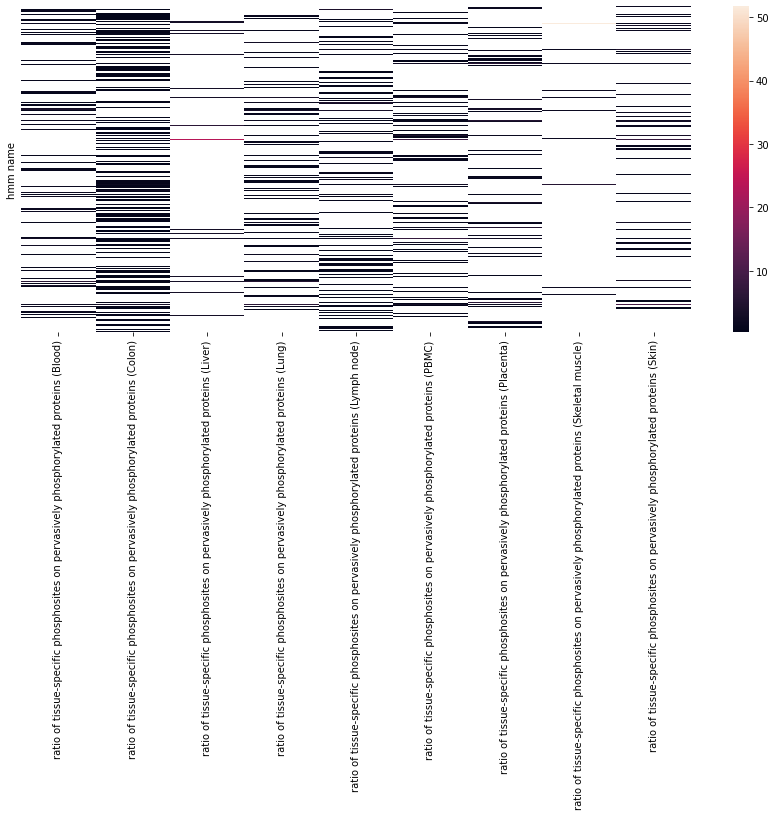

In [325]:
df_hmm_name_gen_all.sort_values(["hmm name"], inplace=True)
plt.figure(figsize=(15,6))
sns.heatmap(df_hmm_name_gen_all, yticklabels=False)
plt.show()

# 9. Comparison of the type of annotation, domain, and clan, for the proteins having tissue-specific phopshosites and pervasive phosphosites with UniProtKB proteins

For this part, we don't take into account whether a phosphosite has been identified insinde the domain or not.

In [326]:
tspec_proteins = pd.read_csv("1.1 tissue-specific proteins.tsv", sep="\t")
tspec_sites = pd.read_csv("1.2 tissue-specific sites.tsv", sep="\t")
tspecsites_tspecproteins = pd.merge(tspec_proteins["ACC_ID"], tspec_sites, on=["ACC_ID"], how="left")
tspecsites_tspecproteins

ACC_ID  UP_POS                                             tissue  \
0     A0A075B6H7      30                                               Lung   
1     A0A075B6S5      52                                    Menstrual fluid   
2     A0A087WXM9     223                                             Testis   
3     A0A0B4J2D5     124                                               PBMC   
4     A0A0B4J2D5     145                                               PBMC   
...          ...     ...                                                ...   
2789      Q9Y6R7    4801  Small intestine,Small intestine,Small intestin...   
2790      Q9Y6R7    5062  Small intestine,Small intestine,Small intestin...   
2791      Q9Y6X8      37  Colon,Colon,Colon,Colon,Colon,Colon,Colon,Colo...   
2792      Q9Y6Y8     737                                              Colon   
2793      Q9Y6Y8     926  Colon,Colon,Colon,Colon,Colon,Colon,Colon,Colo...   

     modres  Adipose tissue  B-cells  Blood  Bone  Brain  Breast  ...  \
0         T               0        0      0     0      0       0  ...   
1         S               0        0      0     0      0       0  ...   
2         S               0        0      0     0      0       0  ...   
3         S               0        0      0     0      0       0  ...   
4         T               0        0      0     0      0       0  ...   
...     ...             ...      ...    ...   ...    ...     ...  ...   
2789      Y               0        0      0     0      0       0  ...   
2790      T               0        0      0     0      0       0  ...   
2791      T               0        0      0     0      0       0  ...   
2792      S               0        0      0     0      0       0  ...   
2793      S               0        0      0     0      0       0  ...   

      Small intestine  Synovial tissue  T-cells  Testis  Tooth  \
0                   0                0        0       0      0   
1                   0                0        0       0      0   
2                   0                0        0       1      0   
3                   0                0        0       0      0   
4                   0                0        0       0      0   
...               ...              ...      ...     ...    ...   
2789                1                0        0       0      0   
2790                1                0        0       0      0   
2791                0                0        0       0      0   
2792                0                0        0       0      0   
2793                0                0        0       0      0   

      Umbilical cord  Ureter  Urinary bladder  Urine  Total  
0                  0       0                0      0      1  
1                  0       0                0      0      1  
2                  0       0                0      0      1  
3                  0       0                0      0      1  
4                  0       0                0      0      1  
...              ...     ...              ...    ...    ...  
2789               0       0                0      0      1  
2790               0       0                0      0      1  
2791               0       0                0      0      1  
2792               0       0                0      0      1  
2793               0       0                0      0      1  

[2794 rows x 46 columns]

In [327]:
nontspec_prot = pd.read_csv("Tissue aspecific and pervasively P proteins tspec sites", sep="\t")
tspecsites_taspecproteins = pd.merge(nontspec_prot[nontspec_prot["Type"]=="tissue aspecific phosphorylated protein"][["ACC_ID", "UP_POS"]], tspec_sites, on=["ACC_ID", "UP_POS"], how="left")
tspecsites_genproteins = pd.merge(nontspec_prot[nontspec_prot["Type"]=="pervasively phosphorylated protein"][["ACC_ID", "UP_POS"]], tspec_sites, on=["ACC_ID", "UP_POS"], how="left")

In [328]:
tspecsites_tspecproteins_pfam = pd.merge(tspecsites_tspecproteins, pfam_sub, how="inner", on="ACC_ID")
tspecsites_taspecproteins_pfam = pd.merge(tspecsites_taspecproteins, pfam_sub, how="inner", on="ACC_ID")
tspecsites_genproteins_pfam = pd.merge(tspecsites_genproteins, pfam_sub, how="inner", on="ACC_ID")

In [329]:
Uniprot = pd.read_csv("UniprotKB_GO_human_mannually annotated.tab", sep="\t")
Uniprot.rename({"Entry": "ACC_ID"}, axis=1,inplace=True)
Uniprot_pfam = pd.merge(Uniprot["ACC_ID"], pfam_sub, how="inner", on="ACC_ID")

In [330]:
df_types_tissue = pd.DataFrame({"Type": list_types})
list_counts_tspec = []
list_counts_taspec = []
list_counts_gen = []
list_total = []
for element in list_types:
    count_tspec = tspecsites_tspecproteins_pfam.loc[(tspecsites_tspecproteins_pfam["type"]==element), :]["ACC_ID"].nunique()
    count_taspec = tspecsites_taspecproteins_pfam.loc[(tspecsites_taspecproteins_pfam["type"]==element), :]["ACC_ID"].nunique()
    count_gen = tspecsites_genproteins_pfam.loc[(tspecsites_genproteins_pfam["type"]==element), :]["ACC_ID"].nunique()
    list_counts_tspec.append(count_tspec)
    list_counts_taspec.append(count_taspec)
    list_counts_gen.append(count_gen)
    count_total = Uniprot_pfam.loc[(Uniprot_pfam["type"]==element), :]["ACC_ID"].nunique()
    list_total.append(count_total)
df_types_tissue["Number of tissue-specific phosphorylated proteins having tissue-specific phosphosites"] = list_counts_tspec
df_types_tissue["Number of tissue aspecific phosphorylated proteins having tissue-specific phosphosites"] = list_counts_taspec
df_types_tissue["Number of pervasively phosphorylated proteins having tissue-specific phosphosites"] = list_counts_gen
df_types_tissue["Number of proteins in UniProtKB"] = list_total
df_types_tissue

Type  \
0       Domain   
1       Family   
2       Repeat   
3  Coiled-coil   
4   Disordered   
5        Motif   

   Number of tissue-specific phosphorylated proteins having tissue-specific phosphosites  \
0                                               1277                                       
1                                                873                                       
2                                                193                                       
3                                                 48                                       
4                                                 15                                       
5                                                 30                                       

   Number of tissue aspecific phosphorylated proteins having tissue-specific phosphosites  \
0                                               1073                                        
1                                                686                                        
2                                                163                                        
3                                                 50                                        
4                                                 30                                        
5                                                 22                                        

   Number of pervasively phosphorylated proteins having tissue-specific phosphosites  \
0                                                925                                   
1                                                571                                   
2                                                174                                   
3                                                 67                                   
4                                                 14                                   
5                                                 30                                   

   Number of proteins in UniProtKB  
0                            11306  
1                             9223  
2                             1702  
3                              396  
4                              110  
5                              259

In [331]:
print(tspecsites_tspecproteins_pfam["ACC_ID"].nunique()*100/Uniprot_pfam["ACC_ID"].nunique())
print(tspecsites_taspecproteins_pfam["ACC_ID"].nunique()*100/Uniprot_pfam["ACC_ID"].nunique())
print(tspecsites_genproteins_pfam["ACC_ID"].nunique()*100/Uniprot_pfam["ACC_ID"].nunique())

10.259294974820529
8.202078645665917
6.991321118611379


<AxesSubplot:title={'center':'Ratio of proteins with a certain kind of domain'}, xlabel='Type'>

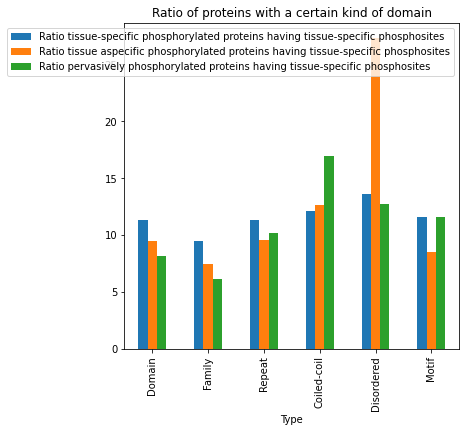

In [332]:
df_types_tissue["Ratio tissue-specific phosphorylated proteins having tissue-specific phosphosites"] = df_types_tissue["Number of tissue-specific phosphorylated proteins having tissue-specific phosphosites"]*100/df_types_tissue["Number of proteins in UniProtKB"]
df_types_tissue["Ratio tissue aspecific phosphorylated proteins having tissue-specific phosphosites"] = df_types_tissue["Number of tissue aspecific phosphorylated proteins having tissue-specific phosphosites"]*100/df_types_tissue["Number of proteins in UniProtKB"]
df_types_tissue["Ratio pervasively phosphorylated proteins having tissue-specific phosphosites"] = df_types_tissue["Number of pervasively phosphorylated proteins having tissue-specific phosphosites"]*100/df_types_tissue["Number of proteins in UniProtKB"]

df_types_tissue[["Type", "Ratio tissue-specific phosphorylated proteins having tissue-specific phosphosites", "Ratio tissue aspecific phosphorylated proteins having tissue-specific phosphosites", "Ratio pervasively phosphorylated proteins having tissue-specific phosphosites"]].plot(kind="bar", x="Type", figsize=(6,6), title="Ratio of proteins with a certain kind of domain")
#plt.savefig("WP2 Pfam_annotation_phosphosites.png", format="png", bbox_inches="tight")

In [333]:
df_gr_clan_tspec = tspecsites_tspecproteins_pfam.groupby(["clan"], as_index=False)["ACC_ID"].nunique()
df_gr_clan_tspec.rename({"ACC_ID": "Number of tissue-specific phosphorylated proteins having tissue-specific phosphosites"}, axis=1, inplace=True)
df_gr_clan_tspec.set_index(["clan"], inplace=True)
df_gr_clan_taspec = tspecsites_taspecproteins_pfam.groupby(["clan"], as_index=False)["ACC_ID"].nunique()
df_gr_clan_taspec.rename({"ACC_ID": "Number of tissue aspecific phosphorylated proteins having tissue-specific phosphosites"}, axis=1, inplace=True)
df_gr_clan_taspec.set_index(["clan"], inplace=True)
df_gr_clan_gen = tspecsites_genproteins_pfam.groupby(["clan"], as_index=False)["ACC_ID"].nunique()
df_gr_clan_gen.rename({"ACC_ID": "Number of pervasively phosphorylated proteins having tissue-specific phosphosites"}, axis=1, inplace=True)
df_gr_clan_gen.set_index(["clan"], inplace=True)
df_gr_clan_uni = Uniprot_pfam.groupby(["clan"], as_index=False)["ACC_ID"].nunique()
df_gr_clan_uni.rename({"ACC_ID": "Number of proteins from Uniprot"}, axis=1, inplace=True)

df_gr_clan_data = pd.concat([df_gr_clan_tspec, df_gr_clan_taspec, df_gr_clan_gen])

df_gr_clan_data.reset_index(inplace=True)
df_gr_clan_data.rename({"index": "clan"}, axis=1, inplace=True)
df_gr_clan_data

clan  \
0     CL0001   
1     CL0003   
2     CL0004   
3     CL0005   
4     CL0006   
..       ...   
806   CL0702   
807   CL0705   
808   CL0718   
809   CL0719   
810  No_clan   

     Number of tissue-specific phosphorylated proteins having tissue-specific phosphosites  \
0                                                 35.0                                       
1                                                 24.0                                       
2                                                 15.0                                       
3                                                  5.0                                       
4                                                 11.0                                       
..                                                 ...                                       
806                                                NaN                                       
807                                                NaN                                       
808                                                NaN                                       
809                                                NaN                                       
810                                                NaN                                       

     Number of tissue aspecific phosphorylated proteins having tissue-specific phosphosites  \
0                                                  NaN                                        
1                                                  NaN                                        
2                                                  NaN                                        
3                                                  NaN                                        
4                                                  NaN                                        
..                                                 ...                                        
806                                                NaN                                        
807                                                NaN                                        
808                                                NaN                                        
809                                                NaN                                        
810                                                NaN                                        

     Number of pervasively phosphorylated proteins having tissue-specific phosphosites  
0                                                  NaN                                  
1                                                  NaN                                  
2                                                  NaN                                  
3                                                  NaN                                  
4                                                  NaN                                  
..                                                 ...                                  
806                                                2.0                                  
807                                                5.0                                  
808                                                1.0                                  
809                                                3.0                                  
810                                              679.0                                  

[811 rows x 4 columns]

In [334]:
df_gr_clan_all = pd.merge(df_gr_clan_data, df_gr_clan_uni, how="inner", on=["clan"])
df_gr_clan_all["Ratio tissue-specific phosphorylated proteins having tissue-specific phosphosites"] = df_gr_clan_all["Number of tissue-specific phosphorylated proteins having tissue-specific phosphosites"]*100/df_gr_clan_all["Number of proteins from Uniprot"]
df_gr_clan_all["Ratio tissue aspecific phosphorylated proteins having tissue-specific phosphosites"] = df_gr_clan_all["Number of tissue aspecific phosphorylated proteins having tissue-specific phosphosites"]*100/df_gr_clan_all["Number of proteins from Uniprot"]
df_gr_clan_all["Ratio pervasively phosphorylated proteins having tissue-specific phosphosites"] = df_gr_clan_all["Number of pervasively phosphorylated proteins having tissue-specific phosphosites"]*100/df_gr_clan_all["Number of proteins from Uniprot"]
df_gr_clan_all = df_gr_clan_all.groupby(["clan"], as_index=False).max()
df_gr_clan_all.sort_values("clan", inplace=True)

df_gr_clan_all

clan  \
0     CL0001   
1     CL0003   
2     CL0004   
3     CL0005   
4     CL0006   
..       ...   
382   CL0718   
383   CL0719   
384   CL0720   
385   CL0721   
386  No_clan   

     Number of tissue-specific phosphorylated proteins having tissue-specific phosphosites  \
0                                                 35.0                                       
1                                                 24.0                                       
2                                                 15.0                                       
3                                                  5.0                                       
4                                                 11.0                                       
..                                                 ...                                       
382                                                2.0                                       
383                                                1.0                                       
384                                                1.0                                       
385                                                NaN                                       
386                                              849.0                                       

     Number of tissue aspecific phosphorylated proteins having tissue-specific phosphosites  \
0                                                 22.0                                        
1                                                 19.0                                        
2                                                 16.0                                        
3                                                  1.0                                        
4                                                 12.0                                        
..                                                 ...                                        
382                                                2.0                                        
383                                                1.0                                        
384                                                NaN                                        
385                                                1.0                                        
386                                              782.0                                        

     Number of pervasively phosphorylated proteins having tissue-specific phosphosites  \
0                                                  9.0                                   
1                                                 11.0                                   
2                                                  7.0                                   
3                                                  1.0                                   
4                                                 14.0                                   
..                                                 ...                                   
382                                                1.0                                   
383                                                3.0                                   
384                                                NaN                                   
385                                                NaN                                   
386                                              679.0                                   

     Number of proteins from Uniprot  \
0                                245   
1                                114   
2                                205   
3                                 45   
4                                 68   
..                               ...   
382                                5   
383                                5   
384                                3   
385                                7   
386                     

In [335]:
print(df_gr_clan_all["Ratio tissue-specific phosphorylated proteins having tissue-specific phosphosites"].describe())
print(df_gr_clan_all["Ratio tissue aspecific phosphorylated proteins having tissue-specific phosphosites"].describe())
print(df_gr_clan_all["Ratio pervasively phosphorylated proteins having tissue-specific phosphosites"].describe())

count    306.000000
mean      18.757898
std       15.432075
min        1.265823
25%       10.000000
50%       14.441277
75%       22.195513
max      100.000000
Name: Ratio tissue-specific phosphorylated proteins having tissue-specific phosphosites, dtype: float64
count    265.000000
mean      15.267901
std       14.292917
min        0.581395
25%        6.250000
50%       11.111111
75%       20.000000
max      100.000000
Name: Ratio tissue aspecific phosphorylated proteins having tissue-specific phosphosites, dtype: float64
count    240.000000
mean      18.785061
std       18.834872
min        0.116144
25%        6.639344
50%       13.778819
75%       23.190045
max      100.000000
Name: Ratio pervasively phosphorylated proteins having tissue-specific phosphosites, dtype: float64


In [336]:
whisker_tspec = 1.5*(22.20-10)
whisker_taspec = 1.5*(20-6.25)
whisker_gen =  1.5*(23.19-6.64)

<AxesSubplot:title={'center':'Ratio of clans in each of the three categories'}, xlabel='clan'>

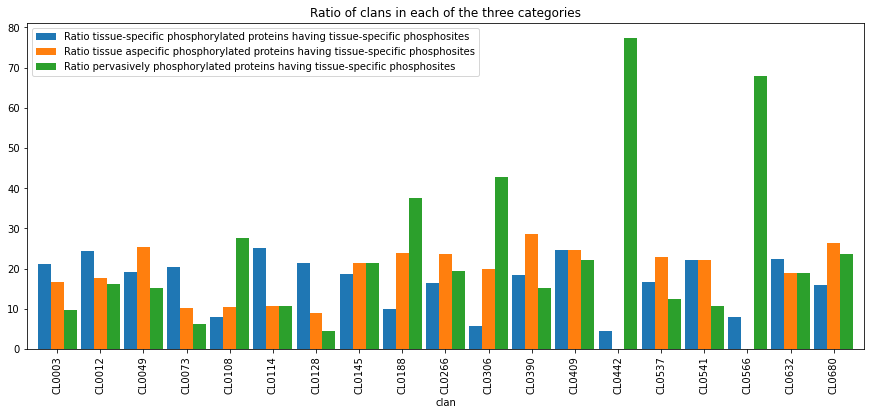

In [337]:
df_gr_clan_all[(((df_gr_clan_all["Ratio tissue-specific phosphorylated proteins having tissue-specific phosphosites"]>whisker_tspec)&(df_gr_clan_all["Number of tissue-specific phosphorylated proteins having tissue-specific phosphosites"]>=10))|
              ((df_gr_clan_all["Ratio tissue aspecific phosphorylated proteins having tissue-specific phosphosites"]>whisker_taspec)&(df_gr_clan_all["Number of tissue aspecific phosphorylated proteins having tissue-specific phosphosites"]>=10))|
               ((df_gr_clan_all["Ratio pervasively phosphorylated proteins having tissue-specific phosphosites"]>whisker_gen)&(df_gr_clan_all["Number of pervasively phosphorylated proteins having tissue-specific phosphosites"]>=10)))][["clan",
   "Ratio tissue-specific phosphorylated proteins having tissue-specific phosphosites", "Ratio tissue aspecific phosphorylated proteins having tissue-specific phosphosites",
    "Ratio pervasively phosphorylated proteins having tissue-specific phosphosites"]].plot(kind="bar", x="clan", figsize=(15,6), width=0.9, title="Ratio of clans in each of the three categories")
#plt.savefig("WP2 Pfam_clan_phosphosites.png", format="png", bbox_inches="tight")

In [338]:
df_gr_clan_all[(df_gr_clan_all["Ratio tissue-specific phosphorylated proteins having tissue-specific phosphosites"]>whisker_tspec)&(df_gr_clan_all["Number of tissue-specific phosphorylated proteins having tissue-specific phosphosites"]>=10)]

clan  \
1    CL0003   
9    CL0012   
38   CL0049   
60   CL0073   
90   CL0114   
101  CL0128   
109  CL0145   
247  CL0390   
256  CL0409   
313  CL0541   
350  CL0632   

     Number of tissue-specific phosphorylated proteins having tissue-specific phosphosites  \
1                                                 24.0                                       
9                                                 18.0                                       
38                                                19.0                                       
60                                                10.0                                       
90                                                14.0                                       
101                                               19.0                                       
109                                               13.0                                       
247                                               22.0                                       
256                                               20.0                                       
313                                               23.0                                       
350                                               13.0                                       

     Number of tissue aspecific phosphorylated proteins having tissue-specific phosphosites  \
1                                                 19.0                                        
9                                                 13.0                                        
38                                                25.0                                        
60                                                 5.0                                        
90                                                 6.0                                        
101                                                8.0                                        
109                                               15.0                                        
247                                               34.0                                        
256                                               20.0                                        
313                                               23.0                                        
350                                               11.0                                        

     Number of pervasively phosphorylated proteins having tissue-specific phosphosites  \
1                                                 11.0                                   
9                                                 12.0                                   
38                                                15.0                                   
60                                                 3.0                                   
90                                                 6.0                                   
101                                                4.0                                   
109                                               15.0                                   
247                                               18.0                                   
256                                               18.0                                   
313                                               11.0                                   
350                                               11.0                                   

     Number of proteins from Uniprot  \
1                                114   
9                                 74   
38                                99   
60                                49   
90                                56   
101                               89   
109                               70   
247                              119   
256                               81   
313                              104   
350                               5

In [339]:
df_gr_clan_all[(df_gr_clan_all["Ratio tissue aspecific phosphorylated proteins having tissue-specific phosphosites"]>whisker_tspec)&(df_gr_clan_all["Number of tissue aspecific phosphorylated proteins having tissue-specific phosphosites"]>=10)]

clan  \
7    CL0010   
13   CL0016   
38   CL0049   
109  CL0145   
135  CL0188   
182  CL0266   
247  CL0390   
256  CL0409   
282  CL0466   
310  CL0537   
313  CL0541   
350  CL0632   
365  CL0671   
369  CL0680   

     Number of tissue-specific phosphorylated proteins having tissue-specific phosphosites  \
7                                                 35.0                                       
13                                                79.0                                       
38                                                19.0                                       
109                                               13.0                                       
135                                                8.0                                       
182                                               63.0                                       
247                                               22.0                                       
256                                               20.0                                       
282                                               22.0                                       
310                                                8.0                                       
313                                               23.0                                       
350                                               13.0                                       
365                                                9.0                                       
369                                                6.0                                       

     Number of tissue aspecific phosphorylated proteins having tissue-specific phosphosites  \
7                                                 49.0                                        
13                                               102.0                                        
38                                                25.0                                        
109                                               15.0                                        
135                                               19.0                                        
182                                               91.0                                        
247                                               34.0                                        
256                                               20.0                                        
282                                               27.0                                        
310                                               11.0                                        
313                                               23.0                                        
350                                               11.0                                        
365                                               11.0                                        
369                                               10.0                                        

     Number of pervasively phosphorylated proteins having tissue-specific phosphosites  \
7                                                 54.0                                   
13                                                76.0                                   
38                                                15.0                                   
109                                               15.0                                   
135                                               30.0                                   
182                                               75.0                                   
247                                               18.0                                   
256                                               18.0                                   
282                                               26.0                                   
310                                         

In [340]:
df_gr_clan_all[(df_gr_clan_all["Ratio pervasively phosphorylated proteins having tissue-specific phosphosites"]>whisker_tspec)&(df_gr_clan_all["Number of pervasively phosphorylated proteins having tissue-specific phosphosites"]>=10)]

clan  \
4    CL0006   
5    CL0007   
7    CL0010   
85   CL0108   
109  CL0145   
135  CL0188   
152  CL0221   
182  CL0266   
207  CL0306   
256  CL0409   
270  CL0442   
282  CL0466   
323  CL0566   
350  CL0632   

     Number of tissue-specific phosphorylated proteins having tissue-specific phosphosites  \
4                                                 11.0                                       
5                                                  5.0                                       
7                                                 35.0                                       
85                                                 6.0                                       
109                                               13.0                                       
135                                                8.0                                       
152                                               25.0                                       
182                                               63.0                                       
207                                                2.0                                       
256                                               20.0                                       
270                                                1.0                                       
282                                               22.0                                       
323                                                2.0                                       
350                                               13.0                                       

     Number of tissue aspecific phosphorylated proteins having tissue-specific phosphosites  \
4                                                 12.0                                        
5                                                  5.0                                        
7                                                 49.0                                        
85                                                 8.0                                        
109                                               15.0                                        
135                                               19.0                                        
152                                               39.0                                        
182                                               91.0                                        
207                                                7.0                                        
256                                               20.0                                        
270                                                NaN                                        
282                                               27.0                                        
323                                                NaN                                        
350                                               11.0                                        

     Number of pervasively phosphorylated proteins having tissue-specific phosphosites  \
4                                                 14.0                                   
5                                                 10.0                                   
7                                                 54.0                                   
85                                                21.0                                   
109                                               15.0                                   
135                                               30.0                                   
152                                               53.0                                   
182                                               75.0                                   
207                                               15.0                                   
256                                         

In [341]:
df_gr_hmm_tspec = tspecsites_tspecproteins_pfam.groupby(["hmm name"], as_index=False)["ACC_ID"].nunique()
df_gr_hmm_tspec.rename({"ACC_ID": "Number of tissue-specific phosphorylated proteins having tissue-specific phosphosites"}, axis=1, inplace=True)
df_gr_hmm_tspec.set_index(["hmm name"], inplace=True)
df_gr_hmm_taspec = tspecsites_taspecproteins_pfam.groupby(["hmm name"], as_index=False)["ACC_ID"].nunique()
df_gr_hmm_taspec.rename({"ACC_ID": "Number of tissue aspecific phosphorylated proteins having tissue-specific phosphosites"}, axis=1, inplace=True)
df_gr_hmm_taspec.set_index(["hmm name"], inplace=True)
df_gr_hmm_gen = tspecsites_genproteins_pfam.groupby(["hmm name"], as_index=False)["ACC_ID"].nunique()
df_gr_hmm_gen.rename({"ACC_ID": "Number of pervasively phosphorylated proteins having tissue-specific phosphosites"}, axis=1, inplace=True)
df_gr_hmm_gen.set_index(["hmm name"], inplace=True)
df_gr_hmm_uni = Uniprot_pfam.groupby(["hmm name"], as_index=False)["ACC_ID"].nunique()
df_gr_hmm_uni.rename({"ACC_ID": "Number of proteins from Uniprot"}, axis=1, inplace=True)

df_gr_hmm_data = pd.concat([df_gr_hmm_tspec, df_gr_hmm_taspec, df_gr_hmm_gen])

df_gr_hmm_data.reset_index(inplace=True)
df_gr_hmm_data.rename({"index": "hmm name"}, axis=1, inplace=True)
df_gr_hmm_data

hmm name  \
0           14-3-3   
1       2-Hacid_dh   
2     2-Hacid_dh_C   
3     2OG-FeII_Oxy   
4      5_nucleotid   
...            ...   
4519        zf-UBP   
4520    zf-UBP_var   
4521        zf-UBR   
4522    zf-piccolo   
4523    zf_C2H2_10   

      Number of tissue-specific phosphorylated proteins having tissue-specific phosphosites  \
0                                                   1.0                                       
1                                                   1.0                                       
2                                                   1.0                                       
3                                                   1.0                                       
4                                                   1.0                                       
...                                                 ...                                       
4519                                                NaN                                       
4520                                                NaN                                       
4521                                                NaN                                       
4522                                                NaN                                       
4523                                                NaN                                       

      Number of tissue aspecific phosphorylated proteins having tissue-specific phosphosites  \
0                                                   NaN                                        
1                                                   NaN                                        
2                                                   NaN                                        
3                                                   NaN                                        
4                                                   NaN                                        
...                                                 ...                                        
4519                                                NaN                                        
4520                                                NaN                                        
4521                                                NaN                                        
4522                                                NaN                                        
4523                                                NaN                                        

      Number of pervasively phosphorylated proteins having tissue-specific phosphosites  
0                                                   NaN                                  
1                                                   NaN                                  
2                                                   NaN                                  
3                                                   NaN                                  
4                                                   NaN                                  
...                                                 ...                                  
4519                                                4.0                                  
4520                                                1.0                                  
4521                                                1.0                                  
4522                                                2.0                                  
4523                                                1.0                                  

[4524 rows x 4 columns]

In [342]:
df_gr_hmm_all = pd.merge(df_gr_hmm_data, df_gr_hmm_uni, how="inner", on=["hmm name"])
df_gr_hmm_all["Ratio tissue-specific phosphorylated proteins having tissue-specific phosphosites"] = df_gr_hmm_all["Number of tissue-specific phosphorylated proteins having tissue-specific phosphosites"]*100/df_gr_hmm_all["Number of proteins from Uniprot"]
df_gr_hmm_all["Ratio tissue aspecific phosphorylated proteins having tissue-specific phosphosites"] = df_gr_hmm_all["Number of tissue aspecific phosphorylated proteins having tissue-specific phosphosites"]*100/df_gr_hmm_all["Number of proteins from Uniprot"]
df_gr_hmm_all["Ratio pervasively phosphorylated proteins having tissue-specific phosphosites"] = df_gr_hmm_all["Number of pervasively phosphorylated proteins having tissue-specific phosphosites"]*100/df_gr_hmm_all["Number of proteins from Uniprot"]
df_gr_hmm_all = df_gr_hmm_all.groupby(["hmm name"], as_index=False).max()
df_gr_hmm_all.sort_values("hmm name", inplace=True)

df_gr_hmm_all

hmm name  \
0         1-cysPrx_C   
1             14-3-3   
2         2-Hacid_dh   
3       2-Hacid_dh_C   
4       2-oxoacid_dh   
...              ...   
3184       zf_CCCH_4   
3185       zf_CCCH_5   
3186        zf_Hakai   
3187  zinc_ribbon_10   
3188   zinc_ribbon_2   

      Number of tissue-specific phosphorylated proteins having tissue-specific phosphosites  \
0                                                   NaN                                       
1                                                   1.0                                       
2                                                   1.0                                       
3                                                   1.0                                       
4                                                   NaN                                       
...                                                 ...                                       
3184                                                1.0                                       
3185                                                NaN                                       
3186                                                1.0                                       
3187                                                NaN                                       
3188                                                NaN                                       

      Number of tissue aspecific phosphorylated proteins having tissue-specific phosphosites  \
0                                                   2.0                                        
1                                                   NaN                                        
2                                                   NaN                                        
3                                                   NaN                                        
4                                                   1.0                                        
...                                                 ...                                        
3184                                                NaN                                        
3185                                                1.0                                        
3186                                                NaN                                        
3187                                                1.0                                        
3188                                                1.0                                        

      Number of pervasively phosphorylated proteins having tissue-specific phosphosites  \
0                                                   2.0                                   
1                                                   6.0                                   
2                                                   NaN                                   
3                                                   NaN                                   
4                                                   1.0                                   
...                                                 ...                                   
3184                                                NaN                                   
3185                                                NaN                                   
3186                                                NaN                                   
3187                                                NaN                                   
3188                                                NaN                                   

      Number of proteins from Uniprot  \
0                                   5   
1                                   7   
2                                   4   
3                                   4   
4                                   4   
...                               ...   
3184                                2   
3185    

In [343]:
print(df_gr_hmm_all["Ratio tissue-specific phosphorylated proteins having tissue-specific phosphosites"].describe())
print(df_gr_hmm_all["Ratio tissue aspecific phosphorylated proteins having tissue-specific phosphosites"].describe())
print(df_gr_hmm_all["Ratio pervasively phosphorylated proteins having tissue-specific phosphosites"].describe())

count    1675.000000
mean       44.169992
std        33.333376
min         0.941176
25%        16.666667
50%        33.333333
75%        60.000000
max       100.000000
Name: Ratio tissue-specific phosphorylated proteins having tissue-specific phosphosites, dtype: float64
count    1533.000000
mean       47.777491
std        34.535483
min         0.554017
25%        18.181818
50%        33.333333
75%       100.000000
max       100.000000
Name: Ratio tissue aspecific phosphorylated proteins having tissue-specific phosphosites, dtype: float64
count    1316.000000
mean       48.933820
std        34.360419
min         0.738916
25%        20.000000
50%        41.123188
75%       100.000000
max       100.000000
Name: Ratio pervasively phosphorylated proteins having tissue-specific phosphosites, dtype: float64


In [344]:
whisker_tspec = df_gr_hmm_all["Ratio tissue-specific phosphorylated proteins having tissue-specific phosphosites"].mean()
whisker_taspec = df_gr_hmm_all["Ratio tissue aspecific phosphorylated proteins having tissue-specific phosphosites"].mean()
whisker_gen = df_gr_hmm_all["Ratio pervasively phosphorylated proteins having tissue-specific phosphosites"].mean()
if whisker_tspec > 100:
    whisker_tspec = 100
if whisker_taspec > 100:
    whisker_taspec = 100
if whisker_gen > 100:
    whisker_gen = 100

<AxesSubplot:title={'center':'Ratio domains in each of the three categories'}, xlabel='hmm name'>

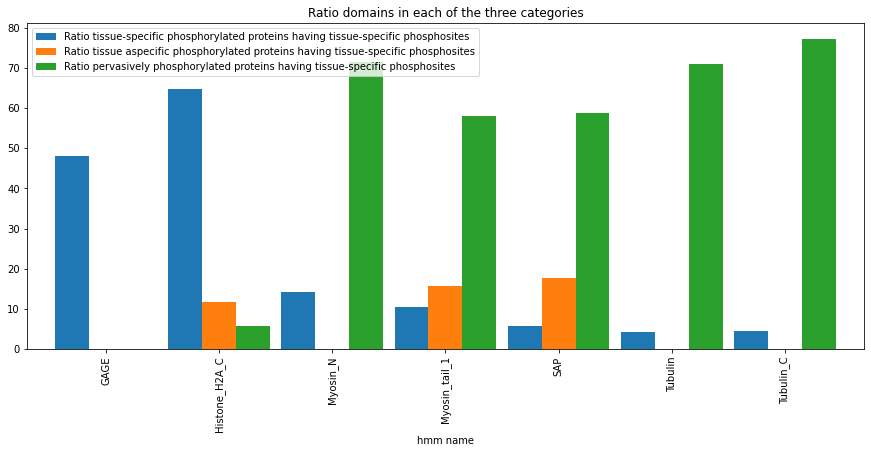

In [345]:
df_gr_hmm_all[(((df_gr_hmm_all["Ratio tissue-specific phosphorylated proteins having tissue-specific phosphosites"]>whisker_tspec)&(df_gr_hmm_all["Number of tissue-specific phosphorylated proteins having tissue-specific phosphosites"]>=10))|
              ((df_gr_hmm_all["Ratio tissue aspecific phosphorylated proteins having tissue-specific phosphosites"]>whisker_taspec)&(df_gr_hmm_all["Number of tissue aspecific phosphorylated proteins having tissue-specific phosphosites"]>=10))|
               ((df_gr_hmm_all["Ratio pervasively phosphorylated proteins having tissue-specific phosphosites"]>whisker_gen)&(df_gr_hmm_all["Number of pervasively phosphorylated proteins having tissue-specific phosphosites"]>=10)))][["hmm name",
   "Ratio tissue-specific phosphorylated proteins having tissue-specific phosphosites",
   "Ratio tissue aspecific phosphorylated proteins having tissue-specific phosphosites",
    "Ratio pervasively phosphorylated proteins having tissue-specific phosphosites"]].plot(kind="bar", x="hmm name", figsize=(15,6), width=0.9, title="Ratio domains in each of the three categories")

In [346]:
print(whisker_tspec)
print(whisker_taspec)
print(whisker_gen)

44.16999242394368
47.777491266430225
48.933819650346166


In [347]:
df_gr_hmm_all[(((df_gr_hmm_all["Ratio tissue-specific phosphorylated proteins having tissue-specific phosphosites"]>whisker_tspec)&(df_gr_hmm_all["Number of tissue-specific phosphorylated proteins having tissue-specific phosphosites"]>=10)))]

hmm name  \
1094           GAGE   
1285  Histone_H2A_C   

      Number of tissue-specific phosphorylated proteins having tissue-specific phosphosites  \
1094                                               13.0                                       
1285                                               11.0                                       

      Number of tissue aspecific phosphorylated proteins having tissue-specific phosphosites  \
1094                                                NaN                                        
1285                                                2.0                                        

      Number of pervasively phosphorylated proteins having tissue-specific phosphosites  \
1094                                                NaN                                   
1285                                                1.0                                   

      Number of proteins from Uniprot  \
1094                               27   
1285                               17   

      Ratio tissue-specific phosphorylated proteins having tissue-specific phosphosites  \
1094                                          48.148148                                   
1285                                          64.705882                                   

      Ratio tissue aspecific phosphorylated proteins having tissue-specific phosphosites  \
1094                                                NaN                                    
1285                                          11.764706                                    

      Ratio pervasively phosphorylated proteins having tissue-specific phosphosites  
1094                                                NaN                              
1285                                           5.882353

In [348]:
df_gr_hmm_all[(((df_gr_hmm_all["Ratio tissue aspecific phosphorylated proteins having tissue-specific phosphosites"]>whisker_tspec)&(df_gr_hmm_all["Number of tissue aspecific phosphorylated proteins having tissue-specific phosphosites"]>=10)))]

Empty DataFrame
Columns: [hmm name, Number of tissue-specific phosphorylated proteins having tissue-specific phosphosites, Number of tissue aspecific phosphorylated proteins having tissue-specific phosphosites, Number of pervasively phosphorylated proteins having tissue-specific phosphosites, Number of proteins from Uniprot, Ratio tissue-specific phosphorylated proteins having tissue-specific phosphosites, Ratio tissue aspecific phosphorylated proteins having tissue-specific phosphosites, Ratio pervasively phosphorylated proteins having tissue-specific phosphosites]
Index: []

In [349]:
df_gr_hmm_all[(((df_gr_hmm_all["Ratio pervasively phosphorylated proteins having tissue-specific phosphosites"]>whisker_tspec)&(df_gr_hmm_all["Number of pervasively phosphorylated proteins having tissue-specific phosphosites"]>=10)))]

hmm name  \
1712       Myosin_N   
1715  Myosin_tail_1   
2461            SAP   
2866        Tubulin   
2869      Tubulin_C   

      Number of tissue-specific phosphorylated proteins having tissue-specific phosphosites  \
1712                                                2.0                                       
1715                                                2.0                                       
2461                                                1.0                                       
2866                                                1.0                                       
2869                                                1.0                                       

      Number of tissue aspecific phosphorylated proteins having tissue-specific phosphosites  \
1712                                                NaN                                        
1715                                                3.0                                        
2461                                                3.0                                        
2866                                                NaN                                        
2869                                                NaN                                        

      Number of pervasively phosphorylated proteins having tissue-specific phosphosites  \
1712                                               10.0                                   
1715                                               11.0                                   
2461                                               10.0                                   
2866                                               17.0                                   
2869                                               17.0                                   

      Number of proteins from Uniprot  \
1712                               14   
1715                               19   
2461                               17   
2866                               24   
2869                               22   

      Ratio tissue-specific phosphorylated proteins having tissue-specific phosphosites  \
1712                                          14.285714                                   
1715                                          10.526316                                   
2461                                           5.882353                                   
2866                                           4.166667                                   
2869                                           4.545455                                   

      Ratio tissue aspecific phosphorylated proteins having tissue-specific phosphosites  \
1712                                                NaN                                    
1715                                          15.789474                                    
2461                                          17.647059                                    
2866                                                NaN                                    
2869                                                NaN                                    

      Ratio pervasively phosphorylated proteins having tissue-specific phosphosites  
1712                                          71.428571                              
1715                                          57.894737                              
2461                                          58.823529                              
2866                                          70.833333                              
2869                                          77.272727